
# L'impatto della funzione di costo utilizzata

Qui sotto abbiamo un' immagine mette in comparazione quello che succede, in due casi:


❌  Utilizzo della MSE con la sigmoide in un problema di classificazione binaria (sinistra)

✅  Utilizzo della BCE con la sigmoide in un problema di classificazione binaria (destra)

In entrambi i grafici, le singole funzioni sono in relazione ai soli due pesi w e b (quindi singola feature) e le linee di intersezione che vedete sono 3 linee su 3 valori di b fissati ( b = 0 il centrale, una linea con b < 0 e una linea con b > 0), in modo da vedere a colpo d'occhio come si comporta la funzione solo su w 


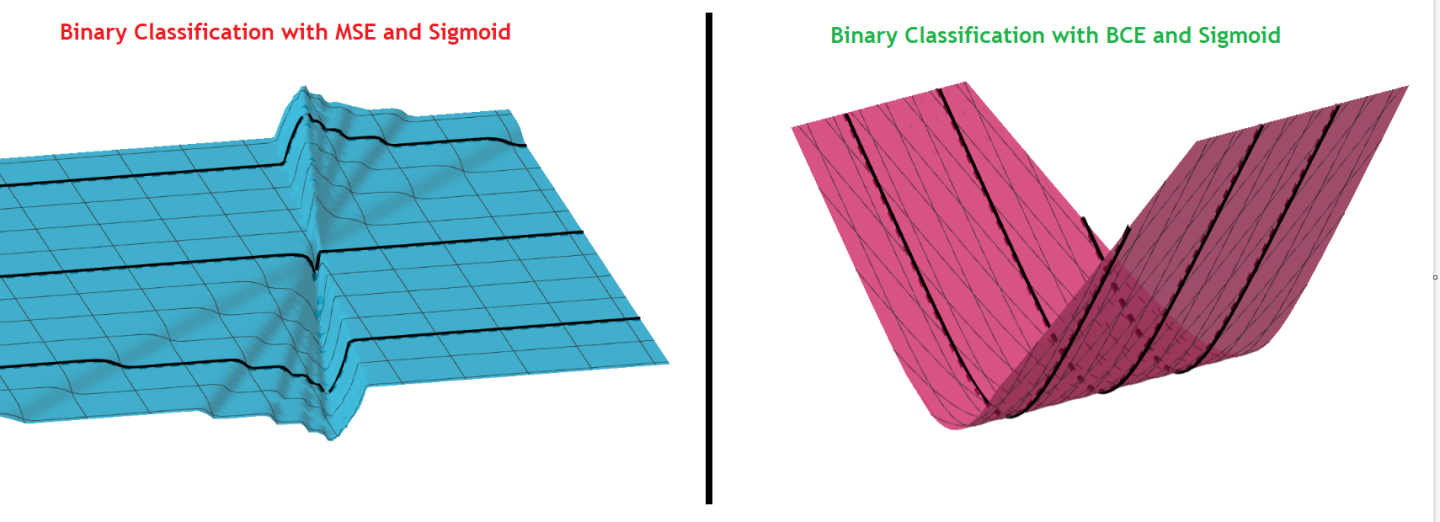

In [7]:
#@title Base64 Image, execute too show
from IPython import display
from base64 import b64decode
base64_data = "iVBORw0KGgoAAAANSUhEUgAABaAAAAIKCAYAAADVgOjOAAAgAElEQVR4nOzdB3xdZf348c8Zd2XvPZu0Tfeig0IHo2WDINvBUlERN6I/UVARFBVBARkCfzZlCAVaWkr3onsmbdo0afbeyZ1n/F/n3jRNOlNomc/79eJFeudZ9znP+Z7v830k0zRNBEEQBEEQBEEQBEEQBEEQBOFjqKurQ9d17HZ773+yLAefkz/rhRMEQRAEQRAEQRAEQRAEQRC+nEQAWhAEQRAEQRAEQRAEQRAEQTglRABaEARBEARBEARBEARBEARBOCVEAFoQBEEQBEEQBEEQBEEQBEE4JUQAWhAEQRAEQRAEQRAEQRAEQTglRABaEARBEARBEARBEARBEARBOCVEAFoQBEEQBEEQBEEQBEEQBEE4JUQAWhAEQRAEQRAEQRAEQRAEQTglRABaEARBEARBEARBEARBEARBOCVEAFoQBEEQBEEQBEEQBEEQBEE4JUQAWhAEQRAEQRAEQRAEQRAEQTgl1M96AQRBEARBEATh01ZRUcHSpUuP+NzkyZMpKCj41JdJEARBEARBEL6MRABaEARBEARB+MrZtGkTN9544xGfe+SRR0QAWhAEQRAEQRBOElGCQxAEQRAEQRAEQRAEQRAEQTglRABaEARBEARBEARBEARBEARBOCVEAFoQBEEQBEEQBEEQBEEQBEE4JUQAWhAEQRAEQRAEQRAEQRAEQTglRABaEARBEARBEARBEARBEARBOCVEAFoQBEEQBEEQBEEQBEEQBEE4JUQAWhAEQRAEQRAEQRAEQRAEQTglRABaEARBEARBEARBEARBEARBOCXUz3oBvjhMTHctemEZqEkog7ORIuyf9UJ9PpkGdDZiNLRg+MNRclKRwmyf9VL18GHU7Mcob4KYPNRhKYe/RO/GKCvHqG3FtP7tciHnDEFJcGK2VKLvrYGwDJShGUh25TNYh6PpRt9TjNGkIWcNQ8mI/KwX6BQYwP47KgN8bozGNszWOkgagZLsOoXLKgyI7sdsb8Sor8N05aBmx4N0sr+jBW3rLjCjkQflI8c5T/IXfFo+7vFvYgbb5HpMIxIlIxPJ9XlquwRBEARBEARBEIQvs69gANqNvqsQvaQUs9WPqfd5KjICOXcEtsGDkaIOiYDofrS376X7L4swXVMIu/8e7DPzkL4qOeSmiVG/F2NzIXp9VygwC0gJichhySgjByEnR4ce9HUReO2veOcVo7mmEfGHW7ENjv0sl76X2bAL3yN34329CGnQ9US++QeUiL6v6EZ750m8zy8ksHFfaD3j47Hd8TgRlybgf/53eJ5cB4kXEP7EPdgK4j6zdTmUsWcBnt8+gH+LD/tVvyPs7q8jf1HjbEdx/P13DHo3+sb5+J5eQmDfJuTvzyHyuryTsFQaxt6taBsrkU8/CzU75vAAaqAS/4urIHs46hljkB2HPO/zYZTsQK/Yi16vETzwXE7kxEyUYaNQUsJD41UCbegbNqAV1/X+Bo/IFokyZjLqqNSTHss9uTSM0nX4nnmFwJaNcOYfibxzNpJtAA1rVxf6pqXoTW0YHT2PxUSjpA5BGVWAHH7wpfqax+n+ybMY+lCcd9yN85qJSJ+Xe2In4GMf//4KfA/9G/+2LZjJ5xL+y5+g5oZ9CkssCIIgCIIgCIIgCF/JAHQH+odv4Hn6PfQ2P/QNQEdYAejh2EbNwv6jK7BlRh18TgugLVqE0Qq0lqFVNmHX874aRUzaqwi88SK+tTvQtxZh9AlAE28FoJOwXfNtnDdegRINps+DtuxdAhuB8RM+22U/hFlRhr6xCNMLZtEGtFb6BXDMbW/hvv8ptNrAwQebY1Cy46C1BX3lOoxOoLOQQJ370wtAmyZmdTnalt2QPhJ1fMZhgUVj0zr0PS3gs6Hv2o7e9SUMQB9n/9HWjrZtFUZ7DrZLR/TfRpoXY/ta/IuWWLnQyNpJWih/M/qCl3E/vBTl5ylEfG8Kktp/75i738f9+38izbyWsIIxyGl9nuysRXv3DXyvf0CgsgSjoScA7XQiJWagFFxG2D9vRI12grcR7Z3ncb/00bED0BHZ2H+cFAxAf775MfZtwP/iomBTrEwe4Nuq1+F74l18yxagN7VjdvY8Hh2FkjoC9bJbcf3ojN7mWf9gPnqj9Vc9WlkFhn8iyhcxAH284/9o7/OXEHhyLtYhL5/1aSypIAiCIAiCIAiCIBz0FQxAW0nQbsxm/+GPd3Vh7FiPb1cJus+P/IfvBQOqQTY7tuuvx7/9ZcwIK0s6FemrsPXaq/Dd9ze88z5Abz9CxK65EcPrwJQikb4A1QykocNRz5lEoGI90ohzsSX1fbYc36P/Q7MyUGOzsH3j+zjOzIAWA3VCCpLkRL3sfOQ9CyBjMvbsT6/Ehf7+3+h+dDWGJxr7938RDEAfSjn7PNSFazHWdKNMPBM1+ogf9YV2rP1nbv0f7kfeRttbh3zmT1EPDUCfKp2t6BWVGL4uzEXrMW6eiKL2bxyM7Vsw0JDbmzCbuyCtJ2qodaEvfxX3P55Da+ju/7leL2ZlCVpcG5JxzHDzV0tnMb5HHsfz2loMv97/ufYOdG8hUpfeb9+r19+Iuuiv6HoWthFDvrA3Zo7dfgmCIAiCIAiCIAjC59NXIYR6TPbfv0HYpaEsQbPkfTy/fRT/vha0NQvwrTibsEvyQy+U7ahn3UnUwtswZSdyVMTJr1P6eaNX4vv3A3he/xAjoENsGrbLr8X1rdnIkaHgq7m3CK24DPmMmdYm+tyTIgfjuP0x7Df7kOyRSH1LIezeiL+4GgwHyrArcP3kclSnCroBipVLmYj9mvtRL/gdqOHI0Z/iEPbaXWjbiyB25FFfIiXPIOxfb+PymkgR0V/IEgPHc6z9Z7ZWou3Yit6ofqo/TbOzHaOhLvT31kUEyr6DMqxP02rWEli0I/inUVGDtqcM26hRwWU0Wxvwv/YMWoMXFDu2n/+R8CvPBMWPWbcT/6sfwOnnIUceOWLqeGI1riMNMpAVpPDIL2ETZaKvXYhvxUfB4LOUPgjnAw/hGBpvDU3B2LEO36vrsF13er91lwu+ReS8SzFNO1JkJNJAyh9btewDGlg3E+TPx1CXY7ZfgiAIwgDpeDU/Oib97u9KIEkKDsmGKsuHjzQzKphT/AxPV5cxIeMX/HnoaNQv34n2qEzrVroRIGDo6L21+CRkZFRJwaaovSOPDG8ZW+pXMa9uP+XxV/N0/tDPcMn7042t3Lnmn2zTc7llyC1cnZrZb0CrYbSzu3Elz+1ZyBpPB5psJz15Oj8ddDmnu6p5bOtjvNEq8bVBt/Hj3MF8fmZU8LO35R3u3/EuzfZp/HHk1YyOjPrS9QWPt/+OyWxmf2MZ71Uvp0i2cVXejzlroKX8jsggYGjB/4IpEf3aEwmbbMMuqcjH2QmGqff8tozgKM0D71eQsckqqtWvD36+jkf3oR0vL0VScFrXFdLnfe8b1Lv3saJhNe/Xb2VY1u+4IzV+QO80TQ2/tc2sUcJmT/uNgr1ne8m9r+tiS8Ob/L1oCd6wC3hozGVkOb8AWXNHoBvFH6P9Men0N7CucRXza1fSEnUT/2/ImE9leQXhSL7yAWii4pGTe9LIkm/Acfk7BB5uxezswKhqwCQfqbsBvbQeUztwSnDBoEzkaFfwRGA2VWNUtUJsKnKSC7OxFrPFEzoH2W1IMUnIqXFIhwYx/H6M5hrM1nZMX+ghyelASs9Bjjok4KS3o2/fH/xMKS4VOTECs64Oo90ae64gRcYiKV7Mji5M60SXNQQ55pAIpN+NUb4Xo8uqd52Ekp189Fqrhh/9w/fwzVuAYVWjSB6C6+/P4ZqZ0P91yUkoZ84c+PbWdcyuNszmeozOQHBeOBQFKS4ROTkByXZIM6ppmE01GPVtmMGrBAUpLBopJRY5Kjx4cu793OY6jPqWnv0kgzMKOSUOOTo8eFIyG8vRqzv6fLgbZVwOkq8Lo6oCfdUmjI5uUBWIljF3FaLZo5Fz05ADjWilTX3eGwHDspCdh25jP2ZrPUZzN6avZ6c6HEgRccgpSUgHgvSBQGjitcbG4HB6i2S3Q3I6cnxU72qhdWKUVqFV99QY0NwYFXvRtoTuf0jJeSiJCkZNJUaLp+dNMlKkgZyf1L/TqQcwG+sxrJIFgVA2ezAYl5jSP5huGpitNRjlzRCdjJwcgdlSh9nUHTqmbdYxnYCckoCkHq/Lp2FWlqE3u0FxIKdlI8f3OekbAcy6CgxfGHJGav+guacNvbIas9vKSM9ACes48v4zfJi11ej76jH9Rug3ae3rLdtCnbioFNScxCMsmx+jrBizzdvzW7Ujxfb8VgfcYTMx25sxaut6VrcY/4JdOIeddvAl+1bi39oV+ru5GaOqDtMYFaof763CKO05ACZ8A9fXZiGn9ZT+Sc7ENeaCY357cHmTB7ioR1x8E7o7MVqstsRDsEaDJCFFxyClpCG7+pwirH3VWINR0wZx6SiJDoz6mhPYfgZ4O4OTDRrt3lD5I0XGaOw+wmuPphuzthGzZzSGfPkfcE0f1vOctS2Gop777YMv97Sil9dgeg6M3rAjpckoyX3KKxkBjKYmzPpmTE0PtSmREUjucvxzVyJNvATHOWOQZL1n/buRMrKQE+wY+8sw2rzBU6kUkYCcmoAUIYO3A6OiGqM7VMpHCo9Fzsk6+PvvK+DDaGzAbG7v/X7JumBMSjl448H6TR6t/TpsM3swamsx2zoxgwN9HGBvPXbJFkEQhK+UQn61/GE26Q3Uefs8LCnERg/n6ykXcEHySAqionH2meylrHYZb1ZtoswDHVXvsTR7NLO+mHGME2PqeP3N7OooZmXNIhZX7WCn3nNetUWSZM/kzJhRXDXyWiY5Qv2GkoaF3L17Hrv8DsZEX/HZLv8hNux6grdaWoIT+77XsI0JCZkM7ul/GkYHH5W/xJ93v8/u3mp8Ckp7M126TFHZm7xaV0qdZuODuhWcmTaYiZ/WzWBTx+1vo84PGZHxHNql8AU6+WD3cyxvt/61mtdap5MfEUX45z0GeYKOtf+s/pJf66LB7yPSEUOUauvfT/Lu4W/bH2WBu5202NO55BN3jur43+6XeaV2LYVuf/8bWs4EZiSdz7fTpjEqPol45QhhF9NPh6eeLR07WVz2Dksaq6jt8/5BajYXZczgkryzyLMukb3r+eXq0PIfk3Myf5v4PS6LTfoc3SA5kjqWFf8//la5nS41hox0YwDvAb+ngo3Vq3izZh6Luzro1Hra78h8zk+YxRW50xgdHhYMdHW6a3h/zxusC5bQ/JCX28/i11/QAPTHa3+62VP/Dg9ueYdiYLAzcLw3CMIpJQLQvayMw91opR3BxDecDuTYnhoGxXPpvPHfGK0HAnwjcD71Z1znj0DSOtHnP0LXXW/BuAtxzEhDX7UAbWNVKPgVG4Mydjr2627CecHIfidB46O38Tz3MoHNhRg9sU0rGC5fdhOOi87H3qfOr+nZiPvS72M1GcolN+I8LR3/a68TKNwDxKFechOOrGI8L72P4Y3Afvt/CP/xxD7fZ2JUfIT7O7fiLwX50v8j6k/XI8UdpdXqqEJbvRK9imCwVb3hd4cHnz8Gs24f/jlP41u0BK24DWuFJJcLeeI01IuuxXnxRJQDwXdrwrUVq/G/8gL+pVvRg8Ptw5AyhmM7fzrO73wDNT0qWMbA2PARvhdfIrB4PVq3Pxh0kZILUGdPw3nTtdhyYtDn3k/HH5f2WZpZRFY+hlpTiPcPv8C7tL73Gf39B+l8/0FIn0X443dhb/wvHTe/2Oe9Uwhb+g+c+Ul91m0/+oer8K2aR2D9fozGnp2amICSNwXHz+7COTV0V9fYvhTfnDn4lq7A6IldynGxSOdcjuPSK3HMHBzad2078P7q93g3lYde1FmK/+Hf4H849E/lRy8QfXMkvod+i+eNwp4lcaGceTsRr3z3YKdDa0d772188xcTWL0ToyMU0Fbyh6Cc8zXsV1yIbXB6KACse9AXP0HXz1/FHHUOzpmDMDZ9SGBNWeiYtursjjkT25XfxnX5hONkVnjR33+Uzr8vwJRTsN92H+G3Tz34nvb9+O6/HW/L6YT/8VfY8g50CPzo6+fi/t1DBMq6UL7/JOFJrxxx/9k8tfifuQ/3k8t7g2y9+88y42fEPHrLYWUXjM1v43llHoEd9aH1iotFGTcTxw3XYj9r/MCyKQxv8Jg2ag4+pC9Zh/6z03q2vQ9t5Rp0z4Er3NZQsNHa/FbzooTBgcnymvaiVzegZkYevLFyqnW3E3jtUbzzFqEVWsH+0A0hZeRYlEu/hfOCM1AzY0KvDbSh/e+fdN83DyZ+Dee0eLRF76Edtv2+g+OsIf2PC+umwN7V+Bcuxb/kQ7TCOkyrOXVmo2SqDKy7SeiU5bT3nrnM8s3orWNRYo9SU6NiBe6fPECgqKHngSzsd95F2I/OCu1fq6b2iuX43l6Af8kGzG536IbY0MEoioKxoxBjURvKsMHYkj09678S5ef34BrTiffvj+HfYbUbkciDpmK/YDaOK0egL3gJ36vvopW3BY9JJXsC9tt+if2C01Bi+m7/egLvzcU/fyn+dUW9368MHY4y+3Icl52HmpuEZAaO2n71uwXWtBv/osX4359PYOseTGvOAhKQR/UtOi4IgiAEuhuoO/RBU6e1bQf/bSvhg8bp3DnyOs6Niu/Nco4MSyHTFc1ObzsJYRmkfb4jOyeJSXf3PubtfZGna7dQcmg1vkAnDYEi/ufrYOSgK3sD0J9niTFDSVOraDTDSHPEEtXb4TNo7Srk3fKVoeCzYxAzE7KJkZxkx0zitKgwvN5ssp2baXSrJDuTSfiUjoFAoImdjZtZ0bCJhR0ZPDn9WxxajE+RbaRHDyKutRSvEk+u3fWlvNA/2v4zTT8VzR+xqG4Hy9rhuuFXcf6nEYD1tVLV7T+8L+ttYnnFS2ys38B1w27g1oxRxPVLtfdT17KBOXtf4vnmStoO/QBvE6W08GZ9NOMzziJPzB0dotXw9q5/8PeqUpr7Pm613x3FvOI2iI7OYWj40ODxb1PDSI/KJLq9Es2WzCDbF3eIcGzkZ9P+CMLJ9GU8L50Qff6TuEsjg4Eis2Iz/mVVILtQpl2M7cxBJzRsydgyH8+WQx5sbUNf+g6e4kaIug/XGX26C3Ur8H1Q2P8z6hsw/vtPjF21yPf9AlvO4WcbY/tiPKu7MYJ3f0FKTEU9axq2yVkEFq3Dv6cVbfHbaNdNxHYg8dPQMHevQCu1/pGMOmU4UuTRb5mZbS3oe3eFAnpx43FeOPwEtsQxdFejrV+JtrPt4Hd5POgrPkDfug+UvxB+5RhQNIyi5Xgf+hu+rfV9PsCNWbUR/5s2bFdciZquY5ZvxPuv+/CtquyT5efDrN9GYK6MOusi1JwYTiWzZie+px7H9+py9C5v/ycbm9A7t2N4+05suBnfonW9Nx4sRksrvP4Mni0VSCkP4Cg4WTWmO9Fe/RfuB54PTlrWl16yB73yMfQtlZi/vRX7+PR+x7y5YzGeHYv7v8mqs7tiPvrOaqS4B3HNyDrGd0egWkG0x1cQaGxG3/oReutU1NiedS5fR2DpPgw1DG3HXtTs0aHa6u5G9PVr0cq6IG4MjvOGwaG/rU9If+OZfnOQ0tKKvvgtPGWVmGH/wDV5AEE7a1RBSZE1QOGgqrVo1behpFvrUYa2eh94D3yTG9MKQHf5IdoqB5GOOmUE/qJCzNJVeB5+ENp+hv3MwUgD2P3aS3/Dvaz/Y+qVP8E+eID1cKwa1DuXEFhfffAxXUfftgl9TxVm2x2Ef/9C5Kj+nTVjw9u4NxzyWb3brx3C7sbZZ/uZez7EffcD+FdX9M/E9Zaj7x3YooY4UUaMQElLQG9uwlj6NO6HbTi/9nXUYXEnXJJC//BJ3H/+H1pVn8xiazRF0W5C19hRqFNHINmt9T9wA7IDbf4LuOfsQas+kL1tjVRYiPfRdWg7R2EsX9nvQkQv34z3vr9g+H6P68bRPTc32vE/8Wc8z7zf//ixtn/RDvSySvRNtbj+eAv2nAGMD63fjvc/D+F9bjWG1vfbmzB2NB3jjYIgCF9d4WFDOD/lNPKcNgzDT0nzMpY01lLRvIJHKkYyefg0YpXQVX5S7BRuKbAxur2Z9OjpjPgClJ77pDS9gteLnuO/ddtDmZm2FGaljmNcRE8Chuajvmsv1fZzuDD6i7FB8tKv5y4tgxoznonxo0g+EMQxfVS2rWdZR1fw5u203Gv5Q94kUmXw6QGCV2RJF/DTYTFs98CIuNPJ/ZSupH2eMt4se4FXmtsg4mtHfI2qhDMj7/uYYYW41UHMikvC8SXLfuYY+8/QPWyqfJH7K2uDGcCfdt69LDsZnXoxs6NDmSWd7p3Mq9xGha+EufsXMSIqm0tjDozAC1DfuZGnil7hf22VWL1QV9gQvp42mjR7T2aKv5uyzmJciVdw2hGCz1GuLM5KO4uhR+r7KmmMcEV86cqvWCrq5vBAVSnWJW1i5BBmp5xGus1qv1spby2hTMplQkxGb36Py5HM+fm3Eh61F81WwAVRUcf5hs+vjM+o/RGEk+krf9jqS15BX9L/MWXWD3H9/HrUjJ5szEGzCf9HJoGX/4z3w8PyJQ6Rgu327+EYmwruZrSXXsX30U7M2o34n16O/Yxv9N6JlcdNwnbecOyzhyBZ8dH2Svyv/Bf/pgaMTcvwvzsT5fZph2VimuWVmElTcNxxJbaC8GB5B2XYEOTYLOynJxLYZ5V22I22tQbbrJ4gkBZAW7owFBTJHo2tIP0YNYINzK4GjJqesgH5I1DiT06n0hpWrp5xNdKELNQRUcFAsbFxAd43FmC07sP/r7dwXDIcNcyDXrgdrSgUfJam3kTYLZOQ8GLs2UigrgA1NTJURmF/IdqGnuDzmK8T9oOzkW0aZsU2AmVJ2HKSkFQbyuwfEmEbju/lFwjsOhhwkpKH4Pjp/Shj3sTz/CKMFpCHXYTzl7ORnUmouXFI6dcS8eAgAq8+im99c/+V8jWgvfcyvteWoHcFkCKG4vjxDah5scHAlLlvJ/4t6TinpvS+RS4YiXrGLdimjkKyEsu7Gwm8+xL+FcWY+z/C//QybH+7BDmqAMdv/oj85l9wv7ILIrKwXX0tjjNyQ8ueOxSiVOy3/B9yxsu9y99vb258A/ejr4eCzxFZqBdci2NmLpKzmcCjj+HbXIO+/l18c0diy7scKZxDJKF+9yacU3KCJQ2019/At3wzZss2fI8txj7jpmNnFyRPxTbRSWB+J0bFLrTiBtQpoQsXbe7/s5KzrWEGBNbtxD5jGEqsDbOxDm3bxuA+ladchH1IDFLikfcfziRsV/+I8LAI3Nb6tyso07+B85s92dnxeUhhNg5PTUjDdscPcRTEY9aXEXj+VQK7KzDLd+J/+h3sw76Pcrw+is8XLN8SPPYS4pE7OzE8ewmsKsVxzSDMvVsJlDVgSgrymOEY23Zg7N2PXt+Mmp4K4QnYLrkB24b78O9ow1i9CE9FA4Fxw7F9/XpsUwqQj5HxoM19kkOTkRyn/WDgAWhXGOoZl+BwJWCblBKsLkTZejxPPYteX482Zz6BcyfgOMKkl323X/D4ffYl/FuKMcvX4X9hNfbJV/W0XaX4/vwIvtUV1qU+8qgzsF93DqpVBsNbijb/HXzzigdcIkIacjbOK9ailc/D6Ogg8NITGGtXok6fgf3KK7ENiT5Ynz99Eq57/oLtrb+Ffj/97MH719fRqrohOh3b5dfhmJIXvEmgLXwa71tFwfaF6AyU6P6Npbl7S3C72+64F0eODWPZW/je/wi9qw1t+RrkzCm4vntF8CaEvuBxvHNLMduK0Ja+h37haOQkMFY9h+ep99GtZjZ6KLbLr8ExJRX8+/E/+Sz+nQ3oK1/D9954bLfOOGr7FdJA4JUX8L7yEYYmISWPx/6ti7ANSwtl3W99H++/V55AprkgCMJXQ5hrEBdkXcZZUWHBmqJlsbG43Y/xQbeHXU17qNWn9AagrZuSIxPOYuQnHxD4hbGj/Fn+U7cd6zZmTPRkbh50MZcl5ZHh6LlLbmh0+hppI474z8l8CceXxHnZVx72qKEHqG4rIThmyp7F7IQckq1RSdZxoh44BuKYlHoRkz7tRR4QhVjnMC7PHTaA136RHXn/fdYU2cmI5Au5NSOU/eX1TyXe8yvurW+n0VNNcVcDvpgoqzAaPn8rH5Q+x//aaoLB55SkK7g7fzqTYzOJVnr68LqfZm8tfls2R7oUiHCmMyvrSi44WflKXwidbK/fFQw+Y09nRta1/DxnPDGKgmm6aXE30mzYSA3vezFrIyV8DFflnmDdY18hb9V1MSN7MnEneS0+vs9z+yMIA/OVD0AfPtTdxFj/Jt4/mfDb27EPkiAmG9vMJMxVDx3349Qf3kP496chR9mDnTJbqob26xq0klaMsgVoJd9A6ZnXkNzLCf+rGqr3rIayCNSYOgI/eB7T3Yq+by9m17RgueF+EifiuvsXOGaNRnb17ezZsM0+E+bsgZoKtMVL0E//JkqEVWJqC/73QllwyphhKBmpx1gLEzSvFRsOknMzkGwn6VCJysN+wy2guJBcSijYPTwBo7oE7/wSzIpN6DU6ar4RrJOMP/Q2ZeLZOGZNBskEK9DkVZCjHMGsRFPz9dbQVkafgePcc5AcVrrCdOwekCJCtaKl7LHYprYRWPBa/2UKi0UZPw2pfTPe10IdTCl+MLbZ5/YJrA7FNkNGX/bMYatklBXhX/geeodVTyQL56OP4JyagWRNYGjl2HpnYbta7l8CIu1swv5wFnJUWGjf6wFsKW604v+gV1hZtVsxWi9Bjo1DmTwVdvZMyGCLQhkxCdvsMf3uaisjJyE1ru1d/oPa0N9fjG5NcudMxHb17YT97AIUa9vJGmpGFvzm2/g2d6Gt2Ij2rXOwh/cvZ6De8mvCfzQbxSrXYh3TGTJ6UxWBwgbM8ncJFN+EcipoWhYAACAASURBVMy5ZaKx33INvvmPoO8rQlu5AWPMRchtC/C+Ut4TePSjvf0hgW/MRImKxdj2AYF17cFOpm3aaCSXAynqKPtPCUMeOha1JhfJWv9OFSlzVHD/9bsU8vV/m/rzvxD+3YmhOscBH7Zsic47H0ev6sCs2IjWwHED0Kbfi1FZFvxbnnAO9ra1eDc2oy9cjX5NEuambcH65TjysX9rFH4rAF1WhdFk1eRNRZJtyGMuIOyhVJQnHsT77laMym34a4oIrFmKMulKXL+5EVtO9JEX4IilOk4g38Eeg3LBzYTNciKF24Kl0+kYAU3b6Xp8E2bDXvTyVswxGYd9ar/tZwSwJXrQ7ngsuP2M0sVoZVdht+6TFK7Gt60itI3Gn4nrd3/EPiY6VO/daEM2mwjMK+6fjX6cZVav+w1RI8+k68470Mo60IvWopduJ/DOy9iu+xOun0wNTfgSkYp6eipS0eG/W+qK0PeHMpjl087BeeMN2AY5g22Smm7DKP4x/iIv2rIN6N+bbs072o9y3Z8J/+4VyA4Jc1wiRkMzxvK9EBWL/e4HcZ4VF6z5bOb60Jb8hYBVF76lGrOuE5L8aG/2BJ8jcrB/5ye4bpmBEmEPZmApqclwz8/xF7YTsALb356KerT2y1K1B/+G7RjuAFJUIo57/41rRgySyx6qwz7OiV8EoAVBEI5JklRiHKnEH7jnqPvwWHMlaE0sKn2WB6r29b42Iew8/jDlcoZY//Dt4K9bX2a5V+e8/Nu4UN7KnP0rWe/pwoNMVMwIrs28hPMSs+jXrdC8VLdu4pXa91nW0oTPAJfiZFjSdM7LOY+prnAO9shaWbHvdZ4o3xwMkF47+iGmBZbzz31LKPG3B0c3zs46F1vjS8zzQGL8hfx+yPkUuPrfkC6ueJx7yrbSRCxnDLqVezJzjr5BvBt4pnR3MPiMayjXDLqGW9LzcfadUU1WiXSlckIxME8jC6pf5+WG7dT2DBrMdCUzNv97XJuYTlLf15oGna2FvFP6CnM7WkKBJ1KYkDGTm7LGMNQZ2/tSX0cp8/Y9yxutjTQGH0lkSNIUvp83hVEu62b5Ju7Z9SarOw5kasQxPfvrfD9vAmbts9y8+yOaPD0luwJF/GvT73lGcTAo+Zv8JS+Bt/a+zKuNB2quuRiWeAl3jDqbzL7Lq/uobd3Ka7VrWdyyH4/uDU5kHxk1nAuSZ/P15EHEqaHAfUvbTt6sncf7zZXBGraKpDA8/jSm517BuZHRocs/U2N/wxv8344F7PL13Hx2f8g3l2wIleAKH8+vhl7FLHM1l257H49xoDeVw43jbuCq2NQ+taJNmtq38EbpUt5sDQ0/i7VFUZAwgysGzWS0I/xgv9m/i4e3v8zCrg5m5P+Cq207mLN/OR91d2D1nMKjh3F15qVclJTLUXqovd/Z0r2F/2x9kmVWPzz6fJ4eeQFZjj5pux0r+VHhXIbm38vtif2vQUrLH+LWfbvBOZSb0wooblp5xP2X6PmIn657ng3uxp6DYRsPbPwtj1ll1WxJzBr0XX6V3m9PBcsEVjcu5O87PmCZtxufpBAXM5rrsi7inPiMEzumj8BpTyXT2XP9bOgHJyq0BsK2L2ZOTSj4TPQ5/KHgUs6Jie/f11bsxIdnf8KlOI5AFyVNa3iu9gPWtXUFr8mibREMS7uQyzLPYJzdcfBa2L+HJwpfZW5rDZMH38UtjkJe2b+EtV3tWJUFHZF5XJ15BZek5BF7hK8y6WRPw0qerVzEJmveGVzEhmdgdzcfeol2DH48B2ZAlSNIcKYEg88E2++w4PbqO4Whu/EVLtuxvM8jQ/jxlFu4JOzAUWvS7Kvk7T3v8npjIbrVU7ZFUBA/mszW7bzd2cS7XSZ/HzGFuN71N7j99LuYHNjIU7vf4sOuUPs7JvUKfpU7mkSnm/21C3lh3wrW+L2ocgQzUy/lutzppB+WH2TS3LGDt8uW8HrznuD3B7d//DQuyz2bca7I0Pb3lvD0QNoffNR2bOW18vksbqnHo8s4bNkk2To4TtVwQfjUfOUD0Pa/LSHimlB2n9GyD+2tF3H/61W0D57Gq4L8px+gJg28VpCUkIgU1tO6yCrS0HzUmGg0WkB39wZKg0GBti60VW8ReO1VArtq+5VjCAYuNS/mEerEy2PGYhsz9JDgc8/3T78B18TXcK9sQ9u5AX3vBSjj4jEXzyXgts6Gg1EnnIacepyiQbLKgTOOUddkjcE7CYeLCT4vxv6tBN56Cf9Hq9B2+g95jRvTY51YYlHPOBfbeZswlpSi/fsmOjZ8HceNl6GOsCbqS+wJvoWhjDwX+5Wr8L63G/2Fn9O57UPs37sO29iM4OSGknIqByC5MfZvRlsfGp6vfPc3OKdlI9kOfKcCzohD6g9bEzF2o+9ehfepR/HvKu9XQ9jazqbu6ZlA7BPSa0PlTvwmUno86rkzUGIOdPpU5Jx87DPOxLd5FZRsQCtuwZ59SOmJuHjk8J73WMd0fi5qQiyadQlkuK3+23HJoy7BPvpJPNsb0DZtRK+ahLH4TbTunsnrbCpm10p8z63D/pvJBBYvxOqzS4OnYBuX2Wd7njxSQtLBSfZsDuTpU7EnzMFT1U7whzeQiGjnHvS9wcrsyLmTsQ934d/6IkbFQgLLh8PmEox2A/nsK7EPU9CsROxANXplW+jmitVU2JzIQ6bg+sdrOO7cifee/8O/phqjqQ5t/iN0NnYQ9c+foGYfHg13ztlD2OmfYCPoPszqUgILX8P/4UK0wo7eSTFDvJhW+ZAjpCf3236yDWn4ENSocHSri9N7/OoElnyA4XZDeBrqOddiPy3uYAdbtoPjKPWbjyU8DnnKZUQtnk1g+Ry8jzyHVtSIUVOB79Efofv+SuTtZyOFDbA4mjWdeN/9bfZZ4WDbd+gGyMJ24dTe9Q9OGujs+Y1YFzuJib0TDkqDhyL31JuzJlI1dattr0DbEqrDLmVmYJs2CSXywBscKAUjsJ02AX/hJihaTmDfD1HjjpYKb6AXbUMvKw29fdJtOM/vOwGpGsx0/zIOwxQEQfikNL2Lmu4qSiQXfr2MN/b+P16xqsQpEYxPHU+eat18b6fL10hp18FyVW7aDwZNTC+Nnjr2djRRvOlH/OvQL+mqZGtdIRuG3MyvcseR0BMwae3ewaO7HmROW/8OX2H7Pt6o2MRvxt3KtxOzsAcbcJ1ufwsVXdVYXcY1FY/zbNXi3gnL7LY8pmQOp8ProqaxhNKuD3gveRQ5rtyDQWyjlKW1xRS2V6O6whgefYzgs3Vvs2EN6/zeYLBjbOxkLkoZjPMkJDlvr7if24r719+ytu3ypp/yYdqNPDzmfHKDGcc6dY0vce1Hr1PZ79XVlO7eyc7Wr/Hncd9kjF2ns/Vdrl/zHEW61v91XdvZ2bKfv0y+jdMND/WeOkq7eoKU+Bnq9wRP/0aglfLuOtxGz63ann3aKNlweN3opp9Wb0OfYyCM6Mgu+u65bncZrxc+xuO1u2nkEB3l7HUbDI78BjOjovEE6nm5+F7+2dg/9La3s4K51Vu4Ydh3+UnWSKIlCGhtVLub6R37ZHRR2dUzSlXKocvqV5gdlHdXh/4OCqdNC/T0Xkz8WiNLS57lgdJV7O83dK6aTa27eKlqJX8a/XOuSE4KHS+Gl2ZPPaUdtRRvvo0nD12frmp21BeyNu8mfps/iRTlaP0tiThHBmNiE3ixZBv+rhV8kHcm3zkQgDZbWFC5hM3NxWyyr+Km+HOJOHCM6Vv5T/E6Sr0eBoeNI8cVyYqj7D9MN7XddTQe2P8H9p/1t92kIXD4RVVN6xbub+1f36+0s4KNdRu4qOBm/i97CiknkNVvWj1gbw0lnd5gubZd9f/j99VtWLUFU6PzGBed2ZvJvKt2Cbv0YB1Nvp4xnXFR8SfcT9N0N3XdlZT0eUyRHSS4kogc4GLXtH7IvbueY2VX//GUW1qLebl0HY+dfhvnRfRcf5h+Wrz17O+qpnjLD3j+0A/rquYPDbtYmXsT9ww5nXT1wIQtGp0d63mq6Dmea6yhq997Di79wKIt8QyNicVeV4ffW8zCipcZ4fo2M6OTCVMOX2lDa+vXblvxhc6emzSG0c7Oqrf4w+732ep193tfaWtx8P+S5CJDb6bVZ93uOLD+FTxV/CpzG+awqPeaqZrSvdtYVzuKaVERrKlZ1a/N2tXxKIvamvnjyIuYGG5HxiSgN7Oy9AUe2LuEvYcMZw1u/+pV/Hr4j/lmeiauAbQ/mq+ShXv+xZ/KDm1/Kjl0DKggfJa+8gHovuS4POy33A1li+h6rh5ty3oCWy5AOW/wx794j4kNBiYOy7Ou34zv3gdwv73tKG90Y3Y1YnYF28p+JKt+VNjRZm9Nwvb16Ugr38Es3U1gezHqiOH4560KBclGj8R25ujjTLCmIEWkIKc7ocILTa0YujGwSdmOxdeGZtXc/vtr/Wuu9lOJXmfAKJDyp+P6pRM55lX8a1ejr5lD95o5SNnDg2ULnDdcgJriQkofjfPHf0SOtEpYrELb8T7uH81HSh2E7aJv4/z2xag50SeUGDpgVkfVdzBiJ6ckHXcCObN1D/5//xP3i6swPUeaiVYDX7WVHGrdUP1kWlsxfd5gB1SyAr1xhxxMVocxIjK4aQY8EXR0dHDiyBNiS0OdNRZp+3qMwiICH81Bf35HMACpTDoLNUsh8Pp89OXzCXwtQGB1dbDzrJ57Jkp20gC+4LNh7l5rzYURzMZRUuOQL74O+8Ov4a1rRHt/ETTUYhKP4+aLUSJ3oxS40HY0o++rCQZ2JXv/DrucNJKwh1/HvuhVvA8/R6CoEnPD83Q/NYWoe2ed9EPY2DQH911P4N99tBrBjeiN7oEF4+PikO2H3tpvw6zzhd4fZkdKjDu566C6sJ1zI+qomfhf/C/eZ95Fb+9E/9+jeEcNxnXhMS6uU4ajjkhCK2zAWL4Y72OJGGdbdf89BD54Br9VgQMn8vgCZMdJnrCkuRkjEOptWr8lKfqQ/CFr1vaw8AH+Lr2YbR309ugzUj55Wy0IgvAV0dq2it9vWNXvMbsaS17qFfx00DiirKCG6SQtehRnx3vZ1l5Bs3ask6JCuCOF4dHpxCkqRqCFrU27adQqeXP/AibFZnJ5fHIwxyPWmcDwuNMYi49Ea/JzyaDbW83OjkrafNt5umQN02NTGGI7vKzWsuoVxIQN5czIeMJlawj/xUy2R1GXdi4TK0tYGShnWWM1tyRk41RDZ4Xutr2s9zQEM1gzwqcz+ZijvAJUdtejWcEaNZLUqCHknKRT4ejESeRU2ckJj8YRHAzZzb72YvZ5vexrWsCc2hH8JDMHF3W8ufuDUCBHiSYnahD5ThcKXmq7O8iLHUNecNM08d7eRZRYwUc5nLSofIa5wlHx0eRuICJuMiOseKcRz7j4CXiN9axo71+vzhmWzznJ3exv384Otzc4h8ng+HxyHJFkxibiUKIYHDuWmd4A69utQPUhK6U3MnfXX/lTbXUwlJYUlsGwyCScsoxhdNHoMRiVPIHh4aHzvUsNZ0zi6Yzwt5FilUOTQPM3sq1tL02BMt6pWM6Z8VnMjIwgwjWIqYnDWNteQqU/AGoa0xNzglXTrMz0tGDfK5Ozk0+jrG1bz/IfZOidbKx8nYcPBJ/VNCbG5RCn6Li9dRR2VNPiKeSBrU8SPf0OLnIdWlRYJsyeTEF0BomqDWviiq0NhdRrtcyvWMBpsVl8Iyn96EEFNYpBMSMYqW5js7aX+XX1fCcmVMfG3V3C2rYqWg1QG+fzdsc0vtmTKNPWsImVug/FlsioxGmMjpKOuv9QEpmUPAGtbWto/ZU4RsXmkmpzIKmxjAo7rL5g8Lca6UxjeFQqMYpKu6eS7W2VuAP1zCtdwsyofC6LH/gkhprWyXtFd/Fe0cHHJGRSYqZydf5VTI8+sAxeyjp7Sno6MxgemdRnIsyBa+jYxr3rf9jvsaSoMdw5/l6+NsAyx2kR2QyOGofPLhFrTSBqBmhxV1DUVU+3Zw0PFk9m0oSzj5DRLOO0JVIQk0Vy8JjoYEdjETV6I0uq5jM+NotbUrOxY+Lx7uHZ3S/waDB710lyeDpDo5JxWUkqWjP72quo8g8gm6nH6OzrmV15H+91eyhrXMU9Hh/Xpp/JGckFDI1MI6bPDlOdg5iVPJby9l3s8fa92aPT3LGd50sXhoLPaizjY4eSqMpoehu72suo8XlQ5XjOyzyXPEf/kbTbKubgtEUzNnEIybKf2vZidnq91HRtZU6X9fvPZUakVYPdS3nrNop9bkrq5/Fe6hCGhY0gwvSwvfp/PFTSE3xWUxgfm0OiauLxNbCro4pGz24e3Po4ibG/52vqcdofOli793F+XLY72P7EOJLJj04NnoNMo4Pargr2dneeQKa5IJw6IgB9BHKilQFaD7VNGLWNmHyCAPQRtaK9+jJeawJCxY48bBy204cjO53BjErfS8swAgMekH748s+4DnvWO/gqSgms2oBjZB2BDd5Q+YbB41GyjnQS7k8Kj0ROtTLDS6BwKf6t30A9+9iZEsdmYFRvwfdET/DZqrl6zmTU9GQItKOtW4W2peKwYItUMAnn3cOwrV0YrBEcWL8EbWsR/kfuxwiEE3nXecF9I+WOxHHnXdjOXUZg7U4CGxcS+KgU/3//geFWCf/9FSjhp2DWWytTMnDwtqXZ0dkTMjraEdOFvuhdvG+tCQafpdwx2M8ag2zVqnJX4J+7HL2p6yjv/RjCwkLBrKM9r1mZ+K0DDz5/XIoN5YxLUV9ZT6BmD/4nqjEa2iEqCfVrt+FM34CxYTXG3mV4H6xCt0p/xw5BHTnEGmH1uWWUlYTKGoQlICXHINnysF2Wj/fBUgIL5ofakayrsY0IQ5IzUEZmwY5i9G27MLrPQ446wgA/mwP1wqtxqV6Mux5Fq/VgLN+AzqyT3GBX43vgcfy7myEsHvX001CHZiNJBkbxGvwfFp2E48KFFKWGSntoVua/+5i/jo9LSsrB8fMfI7WU0/3iOsymNvSdJRgX5hwjGDsE5x9vx7j/cQIbqwm8+SCBNw/53LzTcV1+BrLLZl2Lnzzh4UhHyNTo5fdhdLYPcPvbkFxOOHC92NZxSraxIAjCV4Uqh5GKhwa3l4AzDIcaw+SsbzEkLJaf7HiR1Z3dR31vmCOFi/K+xw+yR5Jls6N59/P05vt4oKkW3HtZ11HPubHJxFinAFs8UzOuYnJWKrmRVsBUp7ltLX8veorXmltoaFrPOu+FRwxAR0VM5gcF13FFYlaopEOPRGc+Y+LiWFnfwq76VWzLHc/MiLBgYktRWwm17lACSEHaFI49uL+bVn8Aw7Qmt3OQFJbA8a8eBihiAr8fOZMJcSlEWF1zrYW1Zf/hO8Xr8fqaKWwupCYthzylg0ZvKNLidOVxVcHt3JKYgI0udjftxmPP66lS2EWTVwv2x+yOVM7P/xG/TEvBQTdlLbuok4eFSp+4hvG94cO4cH87M7av7bdIcQmX8o+YGczdcQd3uGuD81xcMuS7fCcxq/f0eln+d5gSJnHt9nlUHJJQW9vwFk/W1gUvrVMix3LzkKu5KiWfKEVB05soa29FsaWQ1DsRkIshyRdzb3wKBdHR2GXwunfzxM6/86+6elrbitjQ1czpEdGkxs3mtyNi+cuOf4UmIXRO4k8Tb6H/7BzT+PvY0X2W/wCTLm85S6tWUhycvCKbiwddzy9zp5JpD9DWuYdX9jzDf+v20KEVMa+qjLMHF9A3zcRpS2D2oO9yW85oBtkd4K/juU1380croOgpZXNHNRfGp5N41Eitk8yoAsbHJlHY2MC2mg/ZlTeCYUon2xo2sq6jLpjJqWm1rKjZyYUxE4jT6llQtxO3phEVlsL4+FzCXa6j7j8co/jF2CzyD6y/bTDfHvY9Los9egA50pnFZfm3cGvmcNJsNuraNvJk4eM811wP3TtY1t7ErNiBZxMfkSQRrUbi9DfR5E8hPPhTbqOpJxIY5oghyR45wOzfU8CRwaW53+Tbzgwywu1IhpeKxoXcs2sOyzs6qaxfydbA2Zx1yALa1SjOzv0Ot+eOZYg1kjFQzxtb7+PO2lLwVrC9vYKmpGzSZJ2q1pW8UV8VfF967Ax+kH8+F6XmE0UAr7+QZ7Y+y5N1pQMZUNuzzGP56YhrcVV8xLKmXTR2beDR4g3MrZvAOSlTmZ06mXFR0cHfrTP2PB4eU8BzO/7AX2v75AWbXqo6C9nWEbrmzk66lD+PvJwhTgVfoJbX9zzOv/dvptloZGV9CdfFjuhXh1tRwpmUeQ2/GTyLIYqbXZUvcGvhEqoNg9jwoXxz8A18Kz2fCKmdxbvv5Y6SEjqpZ3tbPd2pw1D1apZVLqXQurZQMzkv9xp+Pmga+Q6Dju4SXt/zHE/W7KTZKObtihJmF4w4ZvuDZyMPlYfynK3vvzr3Gq7JLCDT5sDQK1la+jL37VpNxYkfIYJw0okA9GFa0Yt6TtwRLqTIUzB0ubsSbVMppltDShqP49e/x3l6TjBDleq5BF5b+YkC0FLYIGznDsX3TDHG+lX40NC63UjR2SgTTzukHMRRWCfsseNRPihB7yrH/+BzqDl3Yx906At1zMZazA47ct4xMlVNHbN8C1pw8qxo1MtvxnXbxagpcdC9H9+D1cEA9BFFRqLMvhLlrAuxrc3D87en8G+tRXvlQ/S7zjt4EIeHI0+/CMcZs7FtHYrnb/8OTnymvbMC/RcXnpoAtGJHSkpDjg4mBKC/uwT9B5NQ1aN8l7cJfWcxRrDnkYLjzntwnZOPZN18aFyOsWbzsQPQ3R7Mjq6BB5jCklDSwoKVQEwrM3T7bswRBb3vNbtr0Df3DH+Kz0JOCTs1kStrEr7c07BNzSXwRhlGeWgd5fEX4Jg9DMXmxD7lA7TydejrreVxoIwdhzom98QXR9cxGz6FoLr1VSWhk72UlxW8mWItq3ruhSgP/hW9OXSBqlw2FTXMGQzGWjd1JIox91Wie32oR60w50JOz0ROD4NaDzS1nfz1adlGIDihpgtlysU4f30z9sHJwU6Z9lYXgZMSgA5Dzk0Fq95zdwfG7l0Y7tOsst2nQBLqhFR4VQJfALOz+7jLL+XPQEl98bDYsuSMQp12EfZvXY99TConPaU4Ig0lww5l1miYJvQ9pZj5g3qOdQOzuRK9qKc9TMpHOWYZKBtSUjJSbBjUuTF3rkNruxxbzEleZkEQhC+hyIjRXJM5nWEuO4apU9GxjaW1m1hS+SY72+txTPgeF0YO/KQV4UhgctJ4snqabdWRzvSMYfy3qZYWWqj1dOM3CJ1X5ChSInSKm1bxdG0xe90apt5NqfdAYkMX7f4jn8lGpF7KN1OzOLRL73Imc1riBHKaF7HfvZnXG+uZGZEbDBpubS+nMvjReVycknLEzz0SExPNPImzCNgHkxe+kw8r5rHd3U67dRL21aEFy19p+HQPwbizksbpSUm8UNGJ4atgQ/m7pOjTmZ2YQ0HCaX0+MImJiamo7bVogQYKq+byDtM5Nymf3LjTyD15S34UDSyv3Ea9qeNwZDI79yquTC3ozWpVlUQGxyX2f4vkICYsg2arBnjJTna7vfj1AI3uA5ElDx0B7STM3WDSpVWxtyPUJ42PmcoPcsaTGQyE2oiJHMH1mZOY31JJm9dHWfMm9uUUMLLPJ7jsMUxKmsigA/dB7CmclTUqmNHaTBt1nq6e/XX0pYgMy2ZiXAELWxqo7FrD6803cmd0HZtadlLe0wkzDDc7Gj5kZcYwztG3sqitEY+pkBw+homRJzjycgAiXSlMSRxDWs9vNSV6JFfkTGRZ83uU46YjELoBM1CKEsbkzG/w9bhQ377dX8OW2pW827SQRzpLadBu4PuZI0nos50M0wj+93HEhudzadaljO6zaZy2WEacyKZSEsmJMilqmMcbFfupsspgai1U+kNxCNPsCP0+D+mGOtQIJiZPYciBuzO2ZGZmjSaxtpRGOmjwdeDWwLBpFNavJVg4wpbDxbnncWlKfs/NLBtOexLxtogTDkjlJl/GryPHMr1lG4uqFrG4uZKq9k281FXM2o4G7hx6SbDUzVGZBr6AmwO3EvNiRpPtCO0Yhy2VSZGpJKrQ5Ddo7K6nm/4B6Aj7IM7LnM2QYCkZJ8OSR5FUtJxqDOLCsxkXX0BU8ONiGJw0ieySEnZaecoBq5yPgVurZHdb6Fo4LnoS38meSJ4jeFIgKryAqzIn80FLGU3dXsqb17MnMIKxx7gUKKtbS7FpjQCJYXTy2VybNZasA1USlTjinPGc/F+QIHw8IgDdh9FahvbE/XhW9ExAkRiHnBB78uNxPh9m7/C9NrDqS1nB59YyAs+8hu7/hKl2rgiUWVdge/d+Ao2F+JfqwXqscuYQ1Ik5A1sfu1WDeSbqqDXoa6swdvwP988aMG78JY5zc5GC59YGtA+fxvP8Csi6EtdPb0E92szg1gncfaC+kjtYWyyYnat5MdYtQVux+QjBogb8by7HtA1GPX8Uil1FiulzMuk4EGBqJfDhCvTmJGwXT0AJV4KlJqQDH2hlXZ5ID+KE2JFzx6CePojAglLMfW/RfXcCYbdcja0gNA2C0VSM7/E12O66CTU4seKBzmUoqGg6nUidtWhvzEWrPVophB7+SvRNmzAvnABpTvTNiyH7HJT4o70hCXVqPnxQBG1VBF5+En/+HdgnpiJZ2/fRf+HdEPpOedwE1LTYEynGcWKsCRUnTEa2AtA9D9m+das16ilYU9d+yUy8y3ahV3YEM4qVcZNQMj5GpNLwYpYuRd96McrYaIzdqzHCJ6Ce9EoeOwksCtXxldNTkBJ6dkLG2djG/xV9M8EsW9sZedasQqFs4NTU4DWn3l2BUeOHXA1j+xr8i7YgnXsW9mEFwRtRZkclgfff+f/s3QecHPV5+P/PtO27V/e6rqh3oY5AIEB0DBgwtnEcdzuxnTi2CLMevAAAIABJREFUkzj5+feP036O0+3EThw7bnGNwQUXisEgQBIgVJFQL3fS9bZ3t7e9zPxfM3t3aqfKHRLwvF+vlfZ2dndmdmd3Z555vs9Dfu9Iy4irFk38l3U8MdYA0rLi4HZj2SVZ9r9E9sEnJqxhnbb0SnT3U2Rjw+Qf/wGJqiCeD92KUeKB5FHMg/svcIuLkvvmD8m6izBuWoteWXhjzSNPkvrhViz7yL40hDrrbNnPBfmf/A3pdc1YJQvw/NGHcC0vtPKwm0Mq5VUo4WL73MkkqMG4YTqst5sS7iXz3e+hNf0Bxpwypx5e+mvfILOr0GpJvepq9NKznzVUG6ehVdeR23sAq+Upkn/275iffS+uhiIU+jF3bpUGhEIIMQ6Pu4YrK6/h+pDPCbQms8u4OljJP+//MVuiz/EvLau4fcHKi5+BouLz1zqNok4uGpBjYHgH397/M34ZOcpAdphY/tRfwz46U+MnpMwpmX5a8NmhFjGneB5z/M/TMhTnpc6X6W1qQo23sy96GLtjSX3tndxwzmSUIOVuF/ZgHSdgkp+IxiS2IV458iB/3PIig+kBhnJZsietdprh3CBOSVqjiGtnfZLPZe26ynvZ2PkIr0Re4JtuH8tq38nvTLmS6e7Csi6d9lE+n/kq/3J0K1u7n+DgwGa+4wkwp+I2PtB0C3Mvot3E+Rum187AtqDYVcK84pkUnWMHJJU5yIN7fsD/9B1hIBNlOJ8/Jdg5SG86Tf7VDmmy37tEB20jm1FjsJ4S7eQSG0WBehp1H/usITLZQaLnkQPlDtRhj4vtP9/lUIuZVzyVGs9mWuMJXujczA51kOd7Op3s52XVq+nvfpGjyRY29e2lhAO0poZRVDdr6m+hcVL2xU6hqHhcRU65iaMX8XBVcdFUuoq31hVONmTNFLdWXEl4+yf51sBBftK2nmtL67k2VEaV1zm/RMrMkTUvLunM6wqzvOp6brvobolpOvs38u8HH2XjUBuRXJzkKYti0U13ysknOScjOIWpTvG+4/JWH3sHR7YSTz3z/aX4JiKwomgU+6dyi28KK8pXcE/Pc/zdrgc5mI9xoPvX/JsRonb2rczwnD56xKFq+DzFznttD7rd3PwbdlQ1sTJgEE8d4Kd9B2h2vvIUDG/paSVIdCVAmevUUjXj03TPad/V6WQbx0Ze6ynBGsp070kf85C/jkYjwA67LGB2gMH82YpkR9k71I1pn8AziqgNTqVWInziMvam3zwzn72dgc+NfOQtEyuTxjlS9zXguu0+XKvrJ36mJWG0ijK73TFWbzPJ999DyqkxZ4J9xnEkcmpFBrEGBmHKBaayKS7UqcvRl08h+2hrofGhXepj6S3oU873LVdRZtyA91OdmImvk9vVg7n9SRKvPEdSH92rss+SZrDsbO3a5zFuXot2bWNhR8lpPJCDzi5M+6y7GkKpb0L1u8jHM+R++CWGf/KVwtPYDTPsi+ok/2EeaoGb5mHteonM979IZmcU5U9HOyLmsDKFpm/K0tlo9uHCkb1k/+dfSG2MoHxu5H52xnU6U7jfgulO8HpyKCh1czHechu5Xd8k2zFM/qF/J/bwV+09kZFlMZ1fDXPWDehvK0KprnJq/1qZFOlPvJPMp7XCimfNwmvmZCbHsTq7YVahCLQ6bQ6KvgErlyH32FeJPvUNZ1iXUnsd/h+tPUvSgY52/x/hW7+DxKNHMF9+lPgDT5Jwhv9bWOk0WBpK0zV43nc7mp0BnT/z0NJXRStGX7kWY/UzpDd0oVzxUTy3j/6kaygr78a75jHiP9oFVTXoV15h7x+cN7WmATXoI08S8+B6Yvdfg2K/B2Yd3h99b+ID0Ef3OFnvdka/Gq5FLS58LhRfOcbN15Ha9gwsW44xtWqkLLgXtaIWtRLy3UfIrDuAd5FC7pdfI/HNbfBf/01idIXt7yK7YUpOQSlehPdjt457/JF6zyLS4x3kBOpxffT/w/ehlWc+bqlrQivykB9KYT73c2K3PIJiL6i9I2x/pgv9f7COtmFlcygXO4Bg6r243/ldcl/bhxU9QvY/P0vuvz83Uivd3u6zFxCAtmDvc6R+8SMyr/SS+psvHK+5PvrdoPjRF9+A+9YF5zxmy+94DjOWAWUPqS/8GekTy2KUFKGtvgP3e9+Fa17dBJ+INNDe9zm8j99LcusQ+Rd+ROyunxa2VzsD2vlc2k1sb8X74RtQg+d48SuW47p7Bdm9R8h3DpJ7/Kvknv4GCXWkinT+Ql5jIYR4c1JQ8BnFzAzVU+sJsSUZpavtebYtWMmSV/G8qmacFjtIZ7p4eP/X+VpnFzl0QkaIapfh/P6ncjGGchlMsmTOkEDhVs/0u6BQVrKAm8vmsi26mf6BB/l+zxpWp/bwStT+vavljrr551FOQ6MhWIeu7IHMMO2RvRyqn8p09dX8GuY51vYQnzr4G46kM7g0L8XuELr9O26l6UvFyNqNda0c+ZGzpl5vI+9e/JfcUPsCD7b8iseH7cZ4XeyP/isv9d7M/1n0Xq72GRiuSu6a/+esqtrGz5p/wi+Hujg63MvB6NfZ0rOb/7PsD7jJaf41CdJDdJiF31l7VdRz9IKxa3o9t+9L/F1rK1lU/LqPsNuuAW6RzcUZyKbIkyNjmif1RL5odpbtyFWXqjnb+cmLE3WW/0JOVCuawRlCe2dg10Key7JAJTvjLXR0/ZJ/iyfYnMvh8q/hA7PuoiWzk3/sb+eltm9gnzY/kjVxu6/ijurg6zJgYagewr5aFodqYKCD4YEDbE30siw0jWnBeug9BrFj7Ih1cH1pGcXn3G4mkkV0eDff3P9dftoXIa8YlLhKKLZ701g5Ytk4MWffMVMYsXE+1PG2CfOEEyuqHV2YyJVAUwzKvbVcU/92vl9ezWef+RJP5ePs6tnJyw1X0uQ508Gfj/mla7iv4QBfat1HLPlb3v/sc3ZoBssyyZpZpz+53z2XDzcunPjtzzLH2usYin76d0Z2mC4zQ268x57G/s4ceZHt2IBy2idciMuK9CrKJLESicIlaY+IKkNbuBL3pz6N9+O3o2qT8BFWGnF/4j24blpeaOZmN4mzx6m4KlGXvAX3PbNRvGAeO0bu2Ol1kc9rFmWV6FcsYWz/1KjEuHsVF7TfaJdNWPUe/F/8LO6bV6LVldknh4+/Xokk+OxMw0W4brkWfWqhBIHi8jjlOxT7xGDnTrKb9mKm7SDqLXj+/H60hhoUO/iZSGJlPCh1S3Hddj36nCIn6JXbuMFuS4AVT6K4g6gBCys5Ms+86ZS80Jbfhu+v34VqlwBJxbALBatFClZ65H6ZnPMaaEvW4v3zB9CKJmXM/8jr5Ee/+8N4//TDuFYvQLXLLaRO2K7sV6W4EqujHUupwHX/23G/fQ1qWYlT69Wyh9sppahz1+K+bylqkYrVHyG3d+/YzqCy6gG8d81HDYdQ8jmsZOH5Ff08dv+0Gtz/+ve43zofzc6ItIObI++fEipGXXUTnr/4CK4108/VP/HVvlAodVPR585BDVTg+r37OalpthrG9b53oJYFUadfjTHvjGnd45t1PZ63XYvWFHbWcfQ9cDbaSVgx68iBws6DHkIJV6GM1qp2e1GXX4se9KIvXYBaOXoCyW4CWYVS6Sr0yt53BDPZh9mVR6suQ7FLh4xuMxkTNdyItuIWvP/xj7ivOMNrkUqc8HlMnPTZtM5VxkdZiu+LH0Sf3Yhid5t3tikLSmeir70d16oqJ+ic37KZfPr8m4OcPh8N16f+E+9bV6A1VjlB1tHt13K5UUovpPN3inxbP4qvCNWuaZk8/jlzGgZOm4dx27vx/eufopef++dNu/J2tEr7M5Ef+R4+4TVs7yT3428Q/+DfkD0yfPHrfyZ6PZ6v/gOeO+ai1YYKQWLndyiNUhpGW3MH3v/3YVwLa879XIqKfu8n8X3gbejzGlHspomj30H2D0hlleyMCiHEeTFJ59Ok8iONYtXTg8cTYTC5mUc7OslZGuGSq/nrFX/Dszd9iw1r/4m/nrp4nKZf509RKpyauRUeg5yZ4vGWx9jYu5NDFniCV7AmdH7NNSpDM2kwDCfDd8/ARh7rbCc2bjAqSzQ1jHWuaKl5jMc79tCdTmPoFdwy82P8/Pr/YMNN32bD6g8xXxs/zKPpfqbU3MgfX/VvPHT1H/Hh8BTyVpJ9kS38umM3o23NVc1DZeVVfPTKf+XHqz/DH1VNx63kaB1+mZ+0bDklA30CucuZaridg+rhTIzDw21nr2eb38EPW46RtVSKAov4xOLP8tsb/5sNN36Vr8+7lnPmS+TT599MTFHw+mqoG9klGkwPETdPDGvlGEgPkXZuU9D1AL5JyjZW3HO4p3oGpYZGLNvMpkg3phrgurrVXOGbyX3Tb6ZKs2gebOPQYAcWbhqmrGbxxezAmFnS9vHOJKzHhbDsjP7syOgBe19NKYRgG0rmF+qBW6083vo8m4di454AsKw00dQE9gYae+IkzdFtbOzrJ49BTfhWvr76nwufxev/io9VTZuQmu+qEqYhMJIpnOqmOR0lPQlviqJolLgXc2tN4dNjpQbozqXO2kNd9Uzjrsa7uKOoFJfzvZ8ikUuRzGfQFC9TQ7O5d86HuMM38eEyt6+OhpHPWTQTJWaeOPo9z2A6SjKfLXwmtSCBsy5CMY2BYCHGk4vTF++i71Jv+EKcxevxhOKr5ENdugb3+yvG+VEqdhoQ6resQZ95Si0JVUddeTceyy5XUI3eUDpyuxtlztW43x90nk+dV+7Eu058Tv2WO3HPWAHlNegjD2Pqjfj/aTr6Dx4n393rdFtWGpbhunc5qusgauPDmMly9MbCuBrFmILx/vc4SYnqFQvs3hVn5y5BnT4DrQLMdrtG7Z24rr7AgN7oqs+4Hd9/rSC37lmyuzoKWdmj06ZOQ1tyHfr0GpTRGK/Hj37/7+M1Z2MOghLMOBnJ+MIYD3waf+NVZF94GSuZAs809LXXYaz0kF/3CJmNLVDfWChtceWdeP+uEf35DeQPx5xsTHxe1NmLMa5ZiVZW2IFW516H5/OV6BvXkzs4gDOWy+1GmTkfY/VV6NUnZJAX12Lcej/KTPvHfNZJZ2CUuitwv/1dmEP2es07LWCj+IrRr7sXT5m9/o1oxScGtf3o930C/41vJfPjJzHbOo5vX+WlqPVXYFx/VeE5a5bj/Wwt2oJnyO077ATOlKpFGG+5Er1+EG3mD8n3uNEWnBCYc9fh/vyX0B57htyu4ycltNlXj9XTPevyu6/A94Uvkdu0iexL7VjDIzWYZ8xEu+F29Nrg8furBuqMK3G/31XYpu0auCftjBY5j3FXL4SicrQzlV0Zj7cS45a7sSruwFg9zgNn3YLvD7vIz7gbbbwOzmd5/+zlMn7//+Kfs47sU7vGXiOlfCq6PdZNy6EuuBb3+8ucadrsU2uDlaLf+VY8iyMoVU1o5zr6K5qN5/3vAW8Y/eoTG5UaqE2r8XwqBguXoJ4wNE6pmYXr/g+hLo1BZT1KeAHuv/9P9Bc2ktu6H9M+qYMzthFt0Wr01QvQik8YuOUqRrv6ZtyumWdfNncp2oLqc6wAqDd8jEDlSjJPbMJ0GmiWo628EdcdtZivPIP2yFYs71QUjw6a9+JfP/cUPF/4Gvqm9WRf2je2/TG1Ea0ohLV9p7Pjra5sGMkCPhMv2k3vxTf3SrJPv4R5sOX4SZqSevRrrkNbUu9UNTqRMu9GPO+3BwaWoC06ns2s3/+X+IMLyW5vOfn3IJ/G3Lmd7I4DWJ3PkH6+F9e7Kk9Y/xKM2hMO4N3l6GvvwF2zBHxB9JNKPYYx3vEOlGjSef+18PEhe0r4Orx/PwXjha3ktrYXTuppGuqceWjX3Yhe4T/5c3zO7f9v0VZvJPP0Dsy+kUPt8lK0eXOxnt3gvFbKzGWFxpBCCCFOYme+9Sb28VTHBvbEC2Xj1NAUJmEsJNlUhEIBNIOpxXOYFZyCalnEE200D3edf0OuM6gruYKlgY3sS3VwtOdRvqcNOfub88NzqDfOsx5FcCWfqP4N7z2yl1j8ID8+/L+o+bdwX8V0qjyFkY52w66dgzv4bVsb1834IKsCZ0mMyMbpz6edrD6vUcoV4UWUGn7IDXGk/yCRcWrh5q0eNnf3U1nSRI3bQ3FgMe+s2cKXe45BPkMsG3PKihTRz0tdnZQWT6PO4yXkn8Nbq+fzjZ5mp5FdMhN16r1eyC7r+bPrftehD7STTHXxVOtjTPfdwc1F1fg1jbyVpW24jZjiY2qwEm8qQpfzOI2a4FTmFk3DrepkU60cGjxG4lyzS+7h5WiCaSEfaXt4vqlT4gqeYTSkSsCoY1rIy8bBJHu7nuBn5Y383pTZBMgxnNjPD4+9SHs6gaoFaShdygyjMAJuMjSVL2amsYn2bOG0QUlwCbdUzKRMB7P0Bt5X/ix/3z1SxEGfwQfqZl3cjDKt7B3qIVNsJ0elncC7y1V5xs4rkyGRG+BQ92M83DdSXtFTRo3hc7KEw+U38q7STXypt5++yLP8ywEfmcabub60Cp+zi5YmkWrhuf5t7OrXeeus+5lxfhUfzo+VJ5mOUij052JeeDENvjB2zc7I8FGOJQcmpPe2qmhMK55DoGsHsexRnmxdT4M3wLVF5c72l85GGMwlLnBzS7CzYwf5YD1TfRUUaYXvnP74bnbGRkbxukOEdffoYM5x5bJ9bOvexuZ4lLTRyF218ygZCeKEjDBXVV/HktCrORV4Zl59CjNDPp4ZSHCgZx0Pd06jqmE+JYpJLHmQn7Q+T3MyhqK4qCtbwexz5JvVF82mVNlDe36QPb3r+XVpNbeW11OtqZhmlKH04Kv+TRFiorwJj0JD6De+Df3GC3yYZqDf/lH020+93Yu24m68K+4+wwMrMN73kfGzJ4obcX/898eZsADPJxacfJN7Jp6/+YsLWGADfH5GK85rd56tTMN50MrRb7zvPF83HbX2Gjyfvub0SfZQu+tudi6nPer630W//sRbPE4pEffU5eeYnwu1bhGudyw653AwpWIGrvd9atz7KTPW4PnjNWd+cCCMcf8fYtx/lucvqsf9kQ+eYynsnfoaXO961zjLEcL94T8f75lRAg0Y97/3jPM/+/Ir4GlAX2NfzrFsqgv1ijvwXnHHGe5QjvHA+y8yI8iNuuIOu4H3GRRhvO8TZ3zus71/o4/X17zVuYxHW30v3tX3nuGxVRgf+fh5r5ey5G34zjAmVwk34frwR0+/fbzlD5Si33Snczkndxj9zt9FP4+7nhe7NM/CVXgWrjp90vzb8c4/+QvvVb1+ngD6mtucy2nuOdP35/iU2lm4fvf8D0rUK38H35XjTNAs1GmNGIvvQ2884YRSLk3ul/+N+f8OkOulcNJNn3bm9ffWYjzwoTOsex2uP/mTM2yzGkpgJsZN9uXc63Hu7R/U+VfjmX/16RPWXj/e3YUQ4k0tFt/D9w98k3UuHQuTvvgR9kYO0OpELeq4s2EBZ2llddF0Vwg7PeIYSV7peox/yh6iRtOIx4+wNXJ0rDlWX9oO1F1EAolnJm8NN/KLSCcD+SEG7diuPoVVJVMIaud7RBBgReO7eMfQv/Dj/kE6B5/l6/va2Nk1jcqRAHQm28WuoUMciifYZqzgm/OXcnL+gEXWzvCzn033UqwazsFnPNPM/+79Knv9xbjzUZr7t9M2Ugs3kU87F3ufsbvnV/zVrp1OALra5cZFiu7IK4Wn1gx8uhc7LjcUeZq/e2U9gaJGatxePKTpG9rHsJ3Jrmq4Df8kNuHysXDKbVx7dBu/SSQ42L+Of9vVyoZQ1VgAuiPWjhq8kj+Z9RbmuIqcd/QgGVoiG/iP3REecXmw0u1s6903EhSEgYydFVvoWOnWXHh1b6F3EEf5zq6vsiPoI5NNM6XiRh6omX+G7VQh4GlgTc2VrI+tozl7kB/s+w4dAw34nQD0UV6KtBA1IRRcxttrJybz9cwv1QLeXVHLupYoaKUsCy9jWbC0EJDQK7hmynX8IvIQe7NQVrqEZd7zL96tKiohlx1i7nQqET/d/GMy0Q1olonf08g9U9/CnElctbyZ5KXW7/G5SGFLswPQR/u2sM1JgA5xRfk85vqLneNxr1HP7U138VLyQZ6PxTjY9RCfjx1hXXHl8QB0+ijPR5oZtKpIFa/gT+obTtqGhxJH+PGBr/LCeDufRiP3NqxmoS84/nB3RcXtChBwaiDH2HTsx/xN7CWKyDIwfIDNg91Olr1mQSQz7NRZvxiKotMUvoFVx3bwZCLBy52/5h/TR3kqVOZsf873x0CHc9LlvBPdYy/yV7v+h3xwCk3eMKHRAHRsBxsHooWmgBWLWOgtcbarMwWgh5MtPNf9DM12+VXDIm/ZhW8K6SiRTBe/7nyM1tQKbqycPuG/AV6X3Zx2NeuGn+Bg9ggPHvwuXUNNFCkm8WQrmyOHiJh2pvQSfqd+Jucas1JUupY7Q7/ivwZStA6+xNf2RHiheApVTgA6QsvgAXomeB2EuFhvwgD0m4A9lP/QdjKP/5qc03Z2Aa6bplzqpRJCiMuKuevnJD7zHczp1+H+wAdxLalFUfNYh3eR3b6B/EiitloRPtdTCSGEeB1Kpo7xTMex0ye46ri/8b38QWXDpMy31L+ce2rXs7O9mXiihXWJlpEpbmr0Imr0ITpysKd3F/3Tmy4iBO1mVsUimg5tZSBfyH0rCU1jUSCM9wJKGrj8C/nEvI8ROvgDHuo8ymDqML/tOjz+nVXXWLOtkKsIl93szsoxPLSLvZlVLHfVcc+UJfx4oJ3WTIqDvc9zcKxjWTnLvAm2JC36Ej0cTvRwbSjEi60vcjDZxcHkkVNmplMXnMP1lbMJMcyz7S9xINlMOtF8yv0UynzTuaVuEaVMIs98Pr3oA2S3/xdPp+K0Dr3sXE7kShWzp+5qZpTO50NNc3ixea+TMf1iRxcvOvfQKNbKmO7q51AGDkX205Ff5jQNNLxTWFE8nSf6Op2Ggrv7n2G309utmLeErj5rBqmmhVhZfxfvTvfy1ZZX6Evu5uGW3acs/0w+dsUDXBuYvDB9QTGr6ldQ17KXlL+R66pWUD0ajbCb+JWs4NbyF9jbOczK8CzKzlCWZTyK6qEpvIplrQfYkoHO2E4eiu10Pgvzq97KqTlkE8000xzsXXfCNj1C9TGv4lY+PfV6prtH0phVN43hm/nzeQr/ue9h1g1F6I5t5efjVNtwu1U0VT8tySGe7mZ9+6PjL4xnJVdULWWB7wyBY8XLzOKlrAlv4XBvJ9Hhffx6eN/IRD/TXX6y+ThDZp5X+vcwWLOSC+xINbrylIeW8rvTbqF932/Yk03QGtlE6zj1cM4vASjKs0ce5eV0BNIRXjltupuZ5TfwiWnX0eQ+e1qabpcIVF1OsJ/sUR45ekrrSc3Fbzyb2Dj0Pj43c/FFrv/4VNXP4ro7eW+qly83b6c7uY9fH9138p080/nwot/hhvP5TOq1PDDvfRzYYn//ZOgb3sPTw3smcImFmDgSgH6j2fEthj72HaxYHCsRw8q70R54AFftaznoSAghLnfdpP/h38gciMKR/yW/8RGSdvMV+8A8my58f2Z1lNn34r7+4soXCSGEuBxpeA0/p1f60vBqjaysWMLbG69mUTCM94RsYTubz6f7CBkQ1F0njCzU8Dq3+wnontMCKapi4B+Zn0/TnYxEl6ued8z/DKWBx/nPYy/QmYujqdO4vvFePtpYzNajP+K/Wl4hbrXT7uRAKxiqm8DI87jPI4jsCi7h5uAP2dafAqWSayqWMDcYuLCeAIpKZdFKPrl4GrdMeYHvH93C+sFmsiN1hEuMELPLr+Xe6utZWlY1NkKnomIFt1ZspaOjjWxmN8/37GJ23QKqqt7Oz3yz+IuXf8TziS4nM7QydC1/OPdGFhk7+KvN32FrPkXEGiJJLTcv+DRDnp/w457ddI8WPvZVcd+Ud/KOuoU0Gj40TK6a/TH+1vgZ3+7cTPvoWHNPmLXVd/HBqVcxzfCPHfSqqtt5r+xhol5VP+H1UDA078g0D+5T63k5j3UV3kvLwKcZJ2SXuphWfgtfuGYBT7c9zW+ObmDvSHkQOzAfDM3ltqrbWRUsQ0Pj2tl/xveCT/LFw+s4lLFznitZVHMffz57Gh09P+dL+zfQanXTRo55do63WsJ1099L0FfHN/Y/ydZscuT1r2COO4D7rMuv4nVN5YHZf8RV4af54pFdvDjQfPz9q72Te+tXs9pffHyElaLh0b0ER7fpUzYaFQPfyLboH9mmz5e7aBW3l/yGQ6U3cUOJ/4TPkYLbydZezQvmEPeH6wmMU5btjO+fYtBYfgt/uyzI9/Y/ylPRbuf1d6sBFvgrC3XVldHPao6AHdg/6emV4++vvZnZDRvP+WFRMTSP8zqdfhIgzPTANO6dcSe3ldcR1NwnjUbWtABzKt7CP5QsZUv7b/lq624OxNvHptd6wsyvuov31KykIRgobL8nLP9ZOe/Z2RZexe+/gk8t+gx1hx7hW51biZp5vK6F3D3tLfxONfxq37f4n64usmY7dky92M6a1grbhMvwnbZNKOgnbxMj0+0axisbPsRXipbzi+bf8mDf3kIdct1LU+l8pie62BRrJaH78IzzmTtZgJVz/oJvBX7OQ0e3sC/VR//IlDmhq7lj+h1cVVrDFN2Dfry2JC7NN7bNGCNbTCCwgA/P/Cjs+zGPxvpOrqtuFXoB9MePsKH9IZ6uvIJ7vcfX36+7T3h+Zy0L665mnWknthA78fs/MPadoeAx6rlv5h+wPLyOLx9+mfWRZrtDFkVGgDk1t3N3/Rqu8ZdyYuWVM3//QG3JLXzhqlk8fexRvt+xk9ZszJlPqHgmKw0/h3q3YX/q/eokFXkX4jwp1jk7RojXlZe+wsC7/xPL5Uctq0K76d34fu+tJ9UdFUIIAbnH/onUl9eT6+nG6o9i5QpNeDCCqFWlKDPX4vuOiqN5AAAgAElEQVS/H8SYIRnQQrwR/fznP+fee8cvK/SVr3yFj3/846/5MgkxkZ56+X185Gg/7sASPrPgD3lfeHKqIAshxOtOPkZ/ziJoBHCdeLIj08kPt/0jX+g9hOVu5EML/5pPVk3qGAoh3lC6urrI5/O4XK6xizpygkkyoN9ownNw3X8fStNsjBVr0WdU2aNshBBCnEK/7U/xr34/uWefIb9pD/lEwslkIzQdfe0yjKXTUb3yBSqEEOJ1Jp8hkjzIlkSm0OjQ38D8kASfhRDCYSZo6X2Cb3R0M7/qWq4Lz6HKUMHMEc3FSbnzTk6Kpqj4NEnkE2KiSAD6jaZpLf7Pr73USyGEEK8LSrAc4y1vw3jLpV4SIYQQ4lXKDbKtdwO/7WunO76Tx/vjGEaY+WUrmSExFCGEsKPPDMR384Mjj/Lzvm4ei+xnQ/lC6l12ADpLJL6fpyOtJEyNKf75LAlNamtOId5UJAAthBBCCCGEEK93+Si7e9bxtaMHnD9VxcWqhvfxkSkzKbrUyyaEEJcFxakZrquKU5d7MHGYx46d3lzV7b+Oz8y7h4Vy8k6ICSMBaCGEEEIIIYR4A1DsZmqeUpaFb+SD1WtYVF5LWJfGU0IIUaBQ5J/H7y/+O26JbONnR57ipcgBDmM5jQ4rggt5W9OVvCW8iCZfsQTMhJhA8nkSQgghhBBCiNc7dz3vXvTPvPtSL4cQQlzGVMWgyB3miupbnIsQ4rWhXuoFEEIIIYQQQgghhBBCCPHGJAFoIYQQQgghhBBCCCGEEJNCAtBCCCGEEEIIIYQQQgghJoUEoIUQQgghhBBCCCGEEEJMCglACyGEEEIIIYQQQgghhJgUEoAWQgghhBBCCCGEEEIIMSkkAC2EEEIIIYQQQgghhBBiUkgAWgghhBBCCCGEEEIIIcSkkAC0EEIIIYQQQgghhBBCiEkhAWghhBBCCCGEEEIIIYQQk0IC0EIIIYQQQgghhBBCCCEmhQSghRBCCCGEEEIIIYQQQkwKCUALIYQQQgghhBBCCCGEmBQSgBZCCCGEEEIIIYQQQggxKSQALYQQQgghhBBCCCGEEGJSSABaCCGEEEIIIYQQQgghxKSQALQQQgghhBBCCCGEEEKISSEBaCGEEEIIIYQQQgghhBCTQgLQQgghhBBCCCGEEEIIISaFBKCFEEIIIYQQQgghhBBCTAoJQAshhBBCCCGEEEIIIYSYFBKAFkIIIYQQQgghhBBCCDEpJAAthBBCCCGEEEIIIYQQYlJIAFoIIYQQQgghhBBCCCHEpJAAtBBCCCGEEEIIIYQQQohJIQFoIYQQQgghhBBCCCGEEJNCAtBCCCGEEEIIIYQQQgghJoUEoIUQQgghhBBCCCGEEEJMCglACyGEEEIIIYQQQgghhJgUEoAWQgghhBBCCCGEEEIIMSkkAC2EEEIIIYQQQgghhBBiUkgAWgghhBBCCCHEm5dlYSbSl3ophBBCiDcs/VIvgBBCCCGEEEII8VrKdA2Qae/jSD5Kfd5LvjdK2V1XXurFEkIIId6QJAAthBBCCCGEEOJNIfLIS87/ib3HiO9s5sH+nVwVmMLsmgY806rxz2u41IsohBBCvOFIAFoIIYQQQgghxBtS8mAHQ8/tGvt78OkdhSt5EyuXZ96Qi6dyR2iy/PR897dUvvcmfHPrL90CCyGEEG9AEoAWQgghhBBCCPGG0fODdSSbO2mOdHEg1sfiQTdB1eVMs4POJ5pTWsPmvpfZ4+plbjP0/XQDVaW34qoqvURLL4QQQrzxSABaCPG6kchkiWdzuHSdzoEommLx0v7D3LNsAT6f71IvnhBCCCGEeI2YycxY48BcNEH7Pz00Ni03GMfMZPFkksRibRzwF7HIXYGGctrzuF1urtdr6DHTmKZJYvdROr/6CDV/eDdGeeg1XSchhBBiouTSGTKxxNjfz3/lR9z4lx+9ZMsjAWghxOuCZVkMZPI81zVMbzwJ6RSxgQi7t2yi2kyy5ppr0DTtUi+mEEIIIYSYRHaA2Da8aT/RDa841y3TIh9LnnbfkMvDcn8Ne9P9NCuDNLmKxw1CV5WE2TVwiC6jiBoCJPe10vezDVR/5PbXYI2EEEKIidFx4AhDiTglmoeuVw6x79fPjk2bc+eaS7psEoAWQrwu5CzYF03z8LEBegajEItCIorL1Nm8ex8L5s8nXF5+qRdTCCGEEEJMoExnhMSeY2N/23WabWY2h5XJnfWxCgplbj9TzAyHM0OgKEw3ik+7n0vTCCkGvZkYNXoAK28S3bCb4OLpBJbPnIS1EkIIIV49O8u5+bmtzvV8Ps+j//szBocGme0ux8zlnOk2T1GAefesvaTLKgFoIcRlz7Qs9nb383IkS08q5xw8oKmg6WQ0g5b+AXr7I5SXlaEop2e1CCGEEEKIy9+ePXv45S9/yQx/OVWhMkJZhUc2r2dFr5taXyFwbJfeGCeJ+YzsIHS9pwQjZ7A3G0FTFJr0opPuoysaDUaIw6koDZ4SilW3U96j+ztPYubyhFbNmehVFUIIIS5ay4bt9B9pJZdKc/DJF53burLD9EQHmeotJZNLnHT/eW9di+52XaKlLZAAtBDispdIZzE1g/Xd/WCaYOZRBvsweztQQiW0dHSyfvd+ptTXE/R6LvXiCiGEEEKIC2CXz+j62mN0HTjA4JNP8Hg+yW5lEDVnsW+gg0/OWct9jUsLd7bzEFCxsDCxzuv5VUWh2ghgKBrrUsco9nkoUd0nTa/0hNgTG+CIGWWJGnZuz/QM0vuDdSiaSnDFrMlZeSGEEOI8PPaF/+JwMsJUTynJlm4SfQPOr6A9ImjYzNCWHqDa8ONWTy5N6g+X0LBq0SVb7lESgBZCXNbylkXctPjyvh7aDu7H23GIoWSGmAlZt4/yTB7L8PLrbXtYtXQJCxpqLyQpRgghhBBCvIby8RRZyyS2YTfDT+1wbrNyJun2PnxDUeZaRfTETB4eOkrETDkj4Z7t3M+V4anU+kuc+6esHFny+BTjvOerohDWfSx2V/JEvIX7gjPQUcemB9xe6lNBmof7mVocolhx201IyHRH6P/pBoySAJ7pNYWReEIIIcQksDOazbzpXO/YvpedDz0xNm3L3l30ZeP4g3XO6B77N8qWtvL05RNU6D7KdV9h2gh7hPjC+28hUFl2CdbmZBKAFkJctuyv0209w/zznm664mmUfJ7ehoUkDA/Z4UEyvV30dnXiJU1fNMKnv/cLHvzU+yn1ey/1ogshhBBCCDvgPJwk2zM49veBz3+fzYkOSiwX03N+DOV4EDgUCFBaXEwiHud6zxQeih9wbu9ORmmLD1DlK0JT1EIM2II81rhNBc/EvmeDHqJHi/FSqovl7qqx+dsH6dPdpRxKDdOWixEyXE7Q2p5PsrmLvp89T+kD1+Krr5zQ10cIIcSbl13maaClfezvbd/7FZHmwt/5TJZMvNBgN2vlOZToY2mgFsWJOxeCz/bvYGsu6owMqjIChd+tE5ROm0L5zAZU/eSs6EtBAtBCiMvWkWiKx7tjDOQVSMbQNI2KunqsfI60AUPpOEOxIQYTCUrNHMl0modf3s/cmkrKAl6aSkPoqnoecxJCCCGEEBMlsfsouaG4cz15oJ2hZ3eOTdOH08zIedmb6cfSM8wwSk4KAofDYfojEZbnq1iXbKXPTLJ3qItfHtvBrOIqil0+50A7ZaXJWRYh9cJqWroVjdmuMl5J93EwO3DS/P0eL0v1GrZkupmqh45nWJsWse2HSJNn2p+9c+JeKCGEEG9KvQdaiHVHyMaTbP3uL8duzyZTTlD6VM2pAYp0D6XGycl2g2baGVXU5Co+LfisuQwaVy+hpLFmEtfk/EkAWghxWdo/mORbB3vZMZQmmzcxm/dgNs1H1TSwTHxeL67iYvR0gnh8AF8mgz7YyzfXbyNUVMT0mipm14Qx3B6CismdM2oIXOKi+0IIIYQQb0R2Y8DIY5vH/o5u3E22d8i5buXyWJnc2DT78Lhc9zKbUvZnC/Ur57hKxw6cg8EgJSUlRBNxphnF9KWT5Mw8uwc7SOayFLsKzxFQXAyYaQIYpx10n0uZ7mUuZRzIDnBAgTlGYf52ALzeCLE920tzdoh5rvKxx9jrkdveTOTJbZTetGQCXjUhhBBvFvv37+fg1p3U6yHn77Ytuxk42uGU0cgm02d9bNLMcjQ1wIrglJPKa9hlqrqzMabowXFHA5U21VJ7xaxCDOUyIAFoIcRlxc5k2TOY5LG2IbYPJMkqGlakm3Q2h7dkpG6RXetIUdANnZJAALOkjESkk1B/N+mKeg509tKTsdg1lEL1+HCrClu6B3Hb7WpyWcxshkwmwx9cs5iQx0VpwOd0RBdCCCGEEOcntu0Qwy/uda6bmRzDL+0fm2YHa+2s4TNRRuox283/nk22UaZ5qNL8hWmKQiAQwFA1lrgq6MjHaM0NczjayzOd+3hg2krnfnYms1fRSZo5/Or514I+df6vZPopV71Uaj5nmn0Qf5W7mn2ZyGmPs7PSuv53HQOZBNPuWH1B8xRCCPHm0rP3CAeffMG5vrllH+aRHgb1wm9NPpvHMs1zPkcul2NvtJMS3UNI94zdnrRy9GTjVGh+Apr7tMfZ2c+Vc6dR0lQ7oev0akgAWghxWRlI5/nL7e0kciZZnG9msgdexli02jlIwMwXAtDmaBDaoLSklGi4mvixAxTlM+QML9HoEKai4A6aZDw+tvXFIZOCTBorm8bKZPjsL9axtK6CD6xeTHnAf6lXXQghhBDi8mNZWCcEkx/+7L+yxF1JLhIdy3J25E3OHHI+nR0ELtN8XOOt4+fxg3wktHAss6ustJSqykr62+KUqh5aGSZvmfz3/ud4x9QVzj6hPa+g6qIjF8OjaE5t6AsxOv+m1DBPxw/xzvIFY/Ov1PzsIUJXLkaVHjj5gUNJhh/dQnu4mNrl85Hu10II8eZm5vPOb5L9c7Dl2w/Tf7jNuT01NEy0o4dDuUHI5pnqKiGXz17Qc/fFo/RkYiwLNoz93Fh23edslFLNS5nuGfdnKFQdZs6da1Auo5KkEoAWQlw27GOb/7utja54Co+ug6Zj9RwjZ3jwBkIjgeeRs4QjHV9RFQw7E7qugVh8iMwrm/A1ziZQWomSiaOmVJwG5y6f83xoeZR8DkVT6YkleHLPYSoCPt5z9eJCgFsIIYQQ4k0u2xfFShcOkmMvH6H/4efHpj3evJHG0CI8yviHkvaBsXKeUVn7XhWaj+VGJY/Gj3Cjr9HJbHa5XE4WdInuZUVoCvsHBknls3Qlo3z/0Au8Z8ZVIzOzKNU8mE7m8oWz5z+lKEzTQILH4s2s9TU487dvN/IWR7UYVQROe4zWM8zAL17E7w9QNLve2a8UQgjx5pEciDoNAlPRGA9+/su0pgeZ56tEjaXJZwtlp/KmSXc+TiyXYIa77ILPV6azGVpSESq9Iaf+sy2eTHA43ofmdVPsLRr399YuuTFl5QL84dIJWdeJIgFoIcRlY99Qks5kthB8toPB+RzZ3i606kZnOKaT/Wyzg9D2mTw7Bp3POfdVVRW9uh4lmyabzeJqOwS+AFaoDMXrw/QFUQyXUz/a+ZK2H69o5Mwcezq62dfZy8zKcnQ5gBBCCCHEm4yVzTGw87DTzMjOKk78cjPptr7CtEwO84T6lPXDOvs8Ea5wV5z2PBkr7+xnuUYylM/XbFcpvYNRXqaLBb5Kp7RGRThMJBLhrrrZ7Ns9zPqug859f9qyldumLCDsCTr7hx404mYWQ7m4Xh/2PuTC4lo2JTrYlephnifszH+pr5qX0p0MWxmCpzy3ZinkDnbS/dCzeD92N+6K4ouatxBCiNcPu27zqAO/ed4psZE1cxzuPIZHNTDTMecULCPB567EIINWhkZfCd4LLBVlWRaRZIyElaPJW4ThxC7ydKSG0AydRk+JU6pqPN6SIAvedvOrXNuJJwFoIcRlIZYz+XXrIAm7ZqAzTESB+CAZC1wl5YWgszUysMUuou+cVLQKQWjLBEXFEyom6QvhLw2jhEqcmkpmOunUfbYGep35KPb1TBpFVdBKws7jNrd0YGgan7z5asJBKcUhhBBCiDe+1OFOEvsLw4TtAHPrL9azJ9PvHOTOyPvxmOOflF/qr+ZAapiIHnSG/57IdC4muhOGPv9cL6/mYrGvmm1DrbwCThDaretMqasjWBTimsoZvBxpI5pJ0pEY4hdHd/ChWdc4j7Xn41F1Z24XEvQ+df4L3WG2DbXximk687ef06MYbM/1ca1Rc9L97XnppkJubzvR32yl/IHrUPTLo8mTEEKIiTHU1k3H9n1jf+/44SNj17OpDGYuRySXYDCfYrm3fOx3zwkex6N05mI0BMsJae4Lzn7O5nN0JAcJeXyUjNSN7koMEVGzzPSH8WmuMz7nrNuuwfCeXhf6UpMAtBDistCZyHAwmsJSNSdA7Oo6itnfjVpei+7zFwLQdha0naFsX+zMZ92wx5dAPl/IbFZVFJ+fdKQHT1EpituD5gs497NGSnZY2Sz5wT5ibc2YA0OUVVU599t2tIMXDx3j9kWz0VQpxSGEEEKIN6bubz/h/J9q6XaC0A7Lwp3OMzXvYUu6G8PIMtMoQR3n8LY0ECI3GKHPTJ0WgHYpKp35OKrqOWOJjvHYcylz+5njLmfLcCd+3c1sdxlFRUVOlvP11bP5TftutvYdJZFL81zXAW6snUNjoNx5vI560cHn0fkX615m6iXsGujGUmCxt5o61c/64WP0F5dSpnpOe4ySNxl4bAuWplLxrutfxRIIIYS4HOx7dD3R9h7nul2/ufuVQ2PTsqn0afc/lOynxgg6AeFRqUyatsQAZaEiynTvRbUKGEzFnVFJc7zluFSNWCxGbzpGY1EZxWeo+2zzlRUx9frlFzHHyScBaCHEJdcRT/P9Q720JHIwPIgSGyRnB5WnL8TjCxYOfuygsB2AthvMOIX5XKC7wOWClO4Eoe3Bnp6qOhjqL9R7Hi24b1kodta0ZqB4AxheP0FfkIG2FoY7jhGsaySSVvj3p16kuiTEssbLp1OsEEIIIcSrEX+lhcivNh3/++UjhSum5YwWG2XvXhVpHqe0xqZ0F/V6CN84QWS7RnJZTieRTIJRctI0e5+tRHETNTMYqnpBjQE1VaUmVMqiwRzrYq3UGyECauGAvsZXzNqaOewf6iKWTTOQjtOdiI4FoCeCM/9gKWYuz/qhDsJGgArcBLIKB/IDrFKrx31cPpNl8LEtTqA8/MB1E7Y8QgghJl96OM6GL31v7O++g8dIxxKFP+wR1XnzjI8dyqUYyCVZ5K8eCwinUin2RTvRfB5q3UXjnsg9F9MyaY324/V5CbsCDA8P80qqh2p/CRW676wjjObfdxO+ktAFz/O1IAFoIcQllTUtHmsd4LnuYdSuY+R62lGnzseqbEDRdVS7M6E1kv08erFzXOz/7QxozSiU5KAQaFZdbgiVYtmB7OLyQsDa/oJ2GhgWakjb5TcMr5eSimqGO7OkhwfxFJURTWf5u0eeZe38WSysq2JRbTlBt8s5oLCXcyCVYbTVubMoI//7dA2vDLsUQgghxKViWuQGYmN/dn/3t6SaC9nNZjJDbjB+/L7WmXOF7X2bcs3LbK2YxxJHuNM3DZdy8j6OoenUFpezM9dPpRmnWj25fJlX1RnIpUlbeXwXEIAefe6mkkriUYtHYoe5JzjTmb+9L3Z/0zJ+dexl9g52ciwe4fuHX6DCG6QpGL6geZx1/rpOfWkF1w2q/CJ6kA+ULGKGt4ydQ31MLQlRqY1fqi2XTDP41Hb0siDFN1wh5TiEEOIylOgbHLu+8ydP0LJtN23pIcoH8sfvdJbfyJOeK5Vk02AzM4urcauF0KppmnQkBtF9Xmb5wk7m8sXIWiYdVpwr/dOck5xHEv2obp06b/FZg8/FDdVUzZuOql+eod7Lc6mEEG8KmbzJc11RftsTh3SKbNsR1IWrUILFx7/4lZG6zycGn51g8kgjQjsI7ZTiUCFnFm73+CA6gJnLoHoCjH1HjwWhCwFsw2XgCwRJtjWjWRZGSQX7ewfp2bKHRw91sHpaHVdPm4LHMGiPpfjGrqNomlporqPrzsGQS4Wrq0IsrSpx5t0QtLvRFobEGKpSaJ4ohBBCCDHBsn1Rsj2Fg+neoQj933ySoFJocpSPJbGy+XM8w5k1uoroysWcchx2beSAcrx5kr1vU2aX3kjmaMkOEXZ7nRIYY9NRqNUC9JgJfFxY0yWcTGSNeaEq+gYSvBBrY1mgBr9iOGU5bq9b4ASgs2ae1vgAg5nkRa/jGeevadSVhLlmOMdTyWNcaYQxMgpHs1HKNR/aOAf/9i25oTiDT25HLw4QuGIaiksOtYUQ4lLJ5/P0dvcw3BvBrxqoisqz//itsenDsRi7Yp3UKH5wBS7oue3ynq3D/c4o61pXaGx+fbEh+vUs83xVFx18trXaQfFAEUWqm47kAJrPzXxfGfpZTurajQln3nyVE4S+XMmvohDiklnfOcR3D/fTlcpDfxcUl6P4g8cDzKPV/OwgrsXxALRZqPls7+5b9m32GUdFLUy2p7m85L0BrOEoaqCokAVtl/Sw60aPPq/9v6ZhBEIki8pI9PcS9AXwe/wMJNNkjSSPNffweFcC1S734RxrKJCzCo/PjWRDK/DgkT7nQi7LNdVFNJSEKNJgZmkQn0un1FAp9XvP8WoIIYQQQpzb0LqXnf/ju1qIbS/UptwUaSGey7DGO2VC5mGXzljqq2ZnqpfdmX7mGqUE1eP1Ld2Gi2lqEdsS/cwwSik/pT6yvX8UOuH+F0pXNVYVN7Cx9zCvGH3MdZU5859XUsvUYJgjw73OZUtfC7OLq/FqFx7oPhtVVZkTrCSZ7OIIMWpVP5FUjJQr5wQyxmVB+lgP/Q8/j6u6FPeUicvMFkIIcWaZTIbt27c71ytMN7l4ilQ6zbObNtK58wCzvGEMRXXKbdiS2Qwd+WH86JS5fBc8v1gqQXtumKaisFNuyg5IDySGac8OUxEIXVAPhFOlzBwt6QGWBmoZzqfpIcVUb9lJNabHUzq1jsq501C1y3cEjgSghRCXzDcP9dORtQpdy+NR1HBNoamgHRy2A8x2IFodKaEx2hhwNDhtWWSyWYajMbzZLJ6RTGPnXzPvBKatxLDT0PB4UDt/8sWy0HSdUEUV6e48+aEBfFVBcKtkc3n0bBZLTWFo2vFhLKeOyDlxiI6ms74n7lx8KtQGBnFpClP9Bk1lRQQVi0XhIOHg+MM3hRBCCCFOFI/H2bR+I6GuBA3uYue2yGObnf/tDGcrm3Ou1yYN1iW76HGXU6FOzElv+wB6nruc7ckudud7WeKtGivHYWdBT/GWsD85xOFMhFJP9Wl1Lu2s5RzWRTVfstlB5WXF9RxhmL3ZiBOEXlrewAyjhCP0kjNNfn3sZW6smUtTcOJqQY+yh1Qv8FawPxMhpkM2k+NAup/F3qqT7qeMZMPZmRBW3nQaO9pB6KoP3YrqdU/4cgkhhDgum0ix9YeP8NJLhV4H3qSJN22RMLPsHWynRvWTzycZreScymU5muhHcxnUu4vPmlU8HrvMRmdiCF03qHQHnVE/iXzGacBb7AtQ7QqhvopR0C2pCMWaB7/mop2YM48izX3W31J7XaoXzaKk6fLuZSUBaCHEJfHFfX105BQUO8AcHyZpeHEHS9FODPBaI+U2RrOPx4LPpnOWs623n+TgIGVKDpdLcx6bzecwtCyax0vS7SdzZB/++ctRjNFsFftO9vPmIFc4aLOD0N6KarKdR0m9vBFX3VQ8VQ2oioVl5VDszGm7qeFJ3/rWKVdPjkwn8nBwqDAs9NCQgqsnjguLMq8Lt6pwW20Rt82sm6RXVwghhBCvZ30/3UC6tZdMOk10z26297SzLFRHpebDyuROu3+pL0hZ3GBXvp+16sTtX/hUg+lKiGfjxwgbfqYZxWPTvG43V6p1/CLdzGKr8rRa0fmRfSNlnPP358M+qC/2+JhlutiS7uJQdhBP6yBNueMB9sPDvTzdsZf3zrz6goMI58OvupjlKmWz2cXRVAzTNFh8yn2skYC8ObqueZPoxj3O/7WfvGfCl0kIIQTse3Q93bsPOzWS27fuIZjLcizax0+ad1Lq9jvfyUGfn0V1FWOH8XaZjK5ohLRhMcNdhEe98JBoIpOiOzNMZajE+Y0wsei3UphujRp30asqvRG3A9mZGAv8VbTlhp2Tm3aJD0M5+3MW1VUy7foVl3X2MxKAFkK81mLZPA8eHeK33TEU+0AhlyV79ACqL4jqtYe/jJ6bVI43EHT+H2lGaOZJp7N0DkQZzmSczJ/+VAx3wEORppAy7afM43Gr+IpKoOsIDA9AWTXYX9x2wHv0f1J2OkvhEMdw46qdilXdiJlKYLYeJJ+Mo5ZXgz+EEipFCZU4y1sIXI8Ex7NpuxAIln2bqqGWlIPuKmRyj/zSpbMW6UzGuX+/3VHXMjnYO8CvWgdYWVlENJNjUWUJqmUypyyI39CdhG97OI+UkBZCCCHemOx9GHMkmJwfTtL+xZ+PTct2RTCTaSe4OTWvM5jV2THQxqpA3UmlMEa5NJ2ZwQpeHGinrbSIOj04Icto74aEPUEW5cLsiHdREvJQekK5jXLDT2M+xNZUF6u8p2deKaODxS5yf8YOQgdUg6XuSjaH4mT39NOghZjnKnNKg5iWxbcPbuS+pqUUX8Qw6nPPHwKqi2WeKiL5JH1DA+T85kk1r3EaRlkYdgb0yN9WLs/wpv30/mQ95fdcjaJNfHBcCCHe6Mxcnlw6M/b3E3/x5bHrsZ4I6eGEc90aGSG9pe0gm9oPOickKwNF/O78NWMnR+1gbiQ+TF8+QWOwwjnBesHLY5p0JYYwdZVqd5GT6ZyycmQxmekuv6iA9ij79+NoepAyw0tGMenPJFjoqTjt5O6p7NrP1QtmUlRbcdHzfq1IAFoI8Zzt0q8AACAASURBVJqxv1T3R1M82xsjkSsElK1IF+noEHpN0/GGffYPiHJC48GRoxfTDj5nskT+f/beK1iSLD/v+9KX93W9a+/H9PjZcdhd7GJBAlgIDAYVCpIhidIDpCDfFaEnRFBS6JkhMEQSEAkQS4IAF7NYOzt+pmd6pqfttL/d15vyvip9Kv4ny93brq7pnulB/iIqbtk8mVl169T5zne+f0uDLkgIBQLM8azrLZQbTfhCfvgFngnTRquFcCwB/unXgIunYD31Gvhw1BWG6UIDAdq2Zbv50KxqoAyOYjlCYQjSNMnKcCwLRq2C1sItcHS/1gJnGrCVAFvqYoGHLEuQ6LkcD/P2FXCWBS6acEVrWXYPvOPmZsI1oIoiruaruFpusf346/kCbMtixQzDEo9Rv4TnRxMIijxSfpk5px8VqmlhvdaEwAHD4QDkr/lMqoeHh4eHx+OEenuN/a1+eg3V9y+x6zR4Nkv1uz6fnE9PR8ZxRcvjc20dzymjCG8aONNvqFE5jHhLwaxexogQ3DVHsMDzOBAeQrmi4XRtGa9GprtFCenn06vKOE5pq6jbOhNr72AXJtNJdD9Y1fHzNI+JuoSXzTHcMspQHQtFrYF/f/MT/PNj39l5Q/dp/wXfKP5cLeIDfQXfljdmbZNxgPaFChR2zjtNMJR/fQ5SIoLIy0fA+x7dbzkPDw+Px5XqahZ6U4XmWCh/eRtX3ny3+1gjX77n626X1nEpt8T0AZvjcSQ5geloL4u/XKviqppj9yWk7U1YapaJlVYZw/EkwqLMvvcvaTnsFaLw70B8JqqmioqpYlSJYNWo4Qn/MJQHiM9EIBXHk//tD/A4ONc8AdrDw+ORoVk2TuebWGmZ7YJ+BozsKpxgGFIs2RNqO9+dHN8rQOjYsGwHFi3HDIcwJEngTB16UULBbKGey6DQAMZCPigCj3ytDsg+hGIJcEPjwNIN4PBJJjIz9zNzQneKExpuJrQotNeItvOkJQVcQIYcSzFXixvD0R7MdcVxN/HQfYUNp1WHnV2DtXQLEBfBR+LgAiHX3d15LXNHc90s605nwQsizuVrbB9EHvjFchmOaeDZ4RhOjsTg46iwYQgJn8zEYcGxIYpiV7hvmRZzAnVP4KY+KFdXcSVXZueQ2uTFvliSPgoNFe/cXoWPc/D6njFEaMBk27AtE0NBP/YnI/BJAmSeh+Q5er7WmLYDjT7jbchVL3vvmYeHh8cjxchV0Jpd7d7O/JtfsL+2ZsBW9fu8sgct6T3mS+GqVsA5LYMTShpxfmO+MBUGPKAkcL1VQlXRkBB2rwAyFSU8GZnAJ5lZfIJFPBue6LZPA2TBBq7pReYUfliM8kE8E5vElaE5pDIRHNGSOKdn2WNvLp7HP9jzDMYCsQdup4NFpoMtDNhHpTC+E5jGWaOIk9IQYlzv/NOvQVqG3XQMhDm565A2izUUf/IpxGgAoWcObOl4PTw8PP6uoJZrWL/sFtW9+pP3MLs4D9UyMQY/y3i+F6ZpsvGwZhm4nF/GSq3A7o8qAbwyeZj1XYRh6Fgyq0iGo5igjOZtzozWbB2mzGNCicJ0HCyZFSSgIC7trL+lMXzGqLMCuBVHx7gQGkh8JvZ/+3nIwd3r7x8mngDt4eHxyLhRVfF5UXUFUHIMay2YugZx8gAEctk67ZgNriPptsXndiyHJAqQxLYIzPoMCWIwBCmZRN3UoDbr0EwbPllE2HbQqNWYyCqnJiDOngfKBSA1ArBttKM9qD1TB7SW25bsAxszUGa04D6PBF6OXiNIPRG6UySxs89tdzMn+yGMTIIPx2Bll6GXC7BWFyD6/ZCiSQgU4+EL9BVCtIHuMk6nK4CTQbyiu0L9O2sVvLNahp8HjqUiSCsiorKA4coaxsfG4Isn2as/XsygrBrgRMnNf9rUr67VWji3VmCubTomvpOL3XVnY9NfB9e/XAYoA5tmkg0dIyEf2we/wOFIOobjIwnMJKKP4uPj0SabzSIej4MTBCyWG6gZJjhecCNt7njPm7hAy7jbM/IvjMbwyngSIv/1nyH38PDweJypfnwZaraEK9V1RIs6ghd6ArRVv/dg+n6QE/qIksKXep6J0C/5xuDnesM56tvHfVFkzAbmtTIifmVXc5FJBH82MYVT2Vu45Kziuehkt/29UhQrdnPX2rob5C4+ERiGMWzgYusm9phJzJbLTBCoGi2cLywNLEAbZGwARWmwNWwDt/9kYARq3cB7+gpek8Y2xJFIHI+abbP9ifEKiw8BTQSv5FH61VnIY0nIo4ltH7+Hh4fHN4nlz79EadFdEURxGnMffMGu5xoV3GjmcVhKwBDvP2bJ5/NMR1AVDmfWZmE5rm7w3Nh+jATj7DrVjlqo52HIPI76Ul1Rejss6mWMB+OQeZFlNMsQMK6Ety1ooxMNotax1CpDVmRMCX4MicGBXuuPRXDwt17ZdtuPGk+A9vDweCSohonzmQrmW+3COY4Dq16BLfvgZ+7njpDbFmS5vpI1Tt8Xesd5zAoSus5OEqXJFW1wFrufOoCIT4EPHHhDZYKsk56AtjIP0bYhhGOukExuaI5Nibq5zh3xm4nQbZc038mL5u+0FG8Qn202yOi4mjlJhjg8wWI4jGIWVqkAfe46lGgC8swhtk+uCG0DvLNpyYzTO2aud9wtBziTc4sRUCHDYG4dgQ8+BX/kJIRYCqvVJlSK/yBXNn+PjlX24c651M657kWEdONCuhc6FRyy9SaylRpzr3+qiJiOhfCtPWN4Zd8khiODdZQeg3E1V8bnK3no5Cyjz0u7oMXS5QsY8kvgpg+x5xRVHZwgshnzzUuvGrqBXENl8TDEYl3FZNiPfTHvvfLw8PDYTayGiuyfvd293bw0D61Yxez6LLhoAC8Lw7vSDomch6QEPtfWcFHP4QVldMPjPlnBvkAS1+wyTDi7PtgLKn48FR3Hxfo6zknrOBkYgY8Tmdv6ql7EmtRgTuWHBR3/UX8aK4EMc4mNNsOoqQXmlHtr5TIORIZwIPrgc029ZcuxmEg8qMus0z65zC9ot/GOsYjvBqaZ2Aw2sOYR5WVkrRYT5n1oF7AmU8SF28j8yS8x+oe/AzEW2tE58PDw8HhcOfWv/gKGbWFFr0C9uQa50MlwdlgxQcpTXjeqmBTDCInKfbdFwnImk0FTa2FOaGK1XmL3J3whvDR+kOUzs6KDjTIanI0ZJb6jSVmKyCiaLRwLDqNoq6haKvbLO9smYdk25soZ5KQmTohRJMXAwCL5sd//DpTw4zOu8wRoDw+PR0JWM/FurukWALRdUdNevg1+8iAEEoLbBQbZYwLX54KmP21RtF9U7QjQ5F62dCa6yqLQ1k0dFvHsJ9FOdAVkOxQDVufBt2rAgROArgHkEo6lgUDQ3RZzQXdEaKXttO4XoTsRIX0xIR0R2u5crN7FNFinJ8fTLD/aaDRQW56D/8ZF+I+eBEfFCikegWUsb3YsOz0H+CbdmxxOugPowQSKhbPApXPgnvwWeyLFeNyTexp8nLvkVLf/0jF1C0C2b1uucF6sN1GuNXB9LYtstY7/7vkTCPuUxyF+asc4DzBL0TJc5wFVl/75zz5FpqlD9IcgyHIvA70NZXE3DZIP2jno7W1ZiEH6yz9B68Qr4PcedWNXuPss4RbE7l5QBvu//Ogy/uUbJzAcejyWanl4eHh83XAs12FF3/OFNz9lYjNMC62by33PcVhdiWk5ik+KK1iOB3atMGCAF5kz7IyWwYJQxbQY2fD4kC+MOa0xsLN3qyRDURzkHdb+ihLCPjHGCi9NyGHMmzWMyMHdiH2+J0HJh2ei42y58mgsiZVsFQ3bwNXyGtZalYEEaBrct2iFF0eT+ndO4N6PpBTEE04Kv67NYYTz4/nAWLdIlMKJTHzOWy2MCaGuK46KEjbOz2H5//4vmPmjf7LxN62Hh4fHNwjqIzv9z9r567j8X3uTsxSzkdUbmFeLOOhLItIXJVVRG7htVDDsjzAH8IO+lQuFPOr1Gqp6C6dac+0oSuCF8QMYCbmrYSqWhhyvYcIfR3ybuc8dLjez2OdLwOKAukUxGWH4ua0XMtxMtdXAglXDTCSNvXL8gUUHO4SGEhg/eRj8YxSv6AnQHh4eDx3SLW80TJToC7q9LAb1KiyOh5Ie7YnP1GcIQi+fuSOE9sdC0GP9bmnTAFpNKpHLhDq9WoIcCoOzOVecpm1IHHhZgXLgCdgrt+GUcuD9QVdwpmiCaAKg/SBhVVPd7Qu9CA6grxhiZz+4PpG8K4abfQK0zZqWOQfVeg1BnwI5GEJk7yHUKSP68lkEDxwDFx8CJ7aLIjq40wl9DxGaQcfw9Ouw566Bz6yAGxrr5Uxvhpm0rZ5Y3j2nndsb86i7fx3nTmHa6QnttmOjqQF/cfoSdMPAU1OjeGHPBHzS49u96JaNCmVytuNX7jYo/Ww5h5Zlg+dFt7L9pqdcXCvhrdurAC9BUJR7ONJl14VPiwLM+2WAOhv/ChKMZ74LXD8La2gcXDByn9duxHKAHCRcLTc9AdrDw8NjQOymBrPcKxC4+Ed/wf7eqKzjemkNTylDGL7HYDlNAq0aRss2d3Wf0mIAB60YbmhF5kAeEgK9RVPgINscPtXX8RvKxK62C+YH4NkSZFGWMGdUEeJk1v4wH8SCkcGiXcM0vzti+13b5zikglEczUWxFm1CbmTQqFWw0izjw/WbeCG9F8r9JuTbP6uGBD+yVhN+tN3KA0Jut4NiHCtOkRVlTEtBHJQT3fOfEvxYMWvMyRfoEyeo0GTr+jLW/80vMPSPvwPef393n4eHh8fjgqnpaORdB/IXf/omirfdCVlT1aBWe/2n4VhYbZUQ5ERW3LVDS1OxUCuA94ks2uhBkRatVgu5XA6GYeCyUWCTkMR4OIHnRvdDpvGSYyMPDUl/mH1P7yQmI6PX0bB1JMU05vQy0rwfScnvRi3tANu2cb28BsnvwyE5uSFW635Q3ObxP/hNRCcfXt2Fh8HjqxB4eHg8NlQMC79cq6Oit920pg5nbQG+48+72l5brO06jrviZ58AyvdFb6At+Oo67EIG5socLI5DM7uO0s3LGHvxDQRSQ+426HmG2yGBXKaBMJx6xY3ZoHabNTcT2h9ij4PEvI7rl+sN5fodqF049ETZjohL7bUzk+FYbBsBUWAFEgTKsJYkRKb2wmzUYZfzcCpFCJP7wJMTu3t8/UL0phiSzbsQDLNCh3ZhHXwgBM5yB7hUvBCGDsfQYbUnAWzTjRoRTA0iCZ80OCPhs+3UpUxuTpbhmCZsuk050e2BJqf4wVF0yQYhteOQJv2cw4/PXsH7NxbwT7/1NH7r2D4o4tevi6EjvZYro0RZ2ZSbLNw5w5xttPDefIZ17Lwou9nKmzi/XnAFaEFg27kb4haE4a3CTeyFvT4P3LgA7sSLbmb5Zuh9NbT2xErLvcugnEwNP6ku49kffgehwM6cAB4eHh7fVKhooFltIF8sYunqTcz+6pPuYy+1Yy9GdA7rVQNnpEU8H59mIuxmJEGEX1RQVBvQpMiW4h7uBw2k98gxtuLmXH0VJ0NjG9o/7kvjJ+ptlB1tQ7G83YJE4GE5hJpm4LKWA6ekmfAaNSTc1koY9QUGdnH10xfAdl+o6BS1/6owicqojnca59ky5s9yt3GhuITn03sevA0yQnACWo7Zi8sYEDrWJ6NjiDSKOFNfRSzqw3Df+U8JAbZEW3ZEiJsmsmunr0MaSSD2G09CCHuTwR4eHo8npbkVNIsVdr28tN51Omu1Bizj7pOuVVNDxdTwVGi0K95quo7lRgmcJGCPPwnlHmOrDrT6qFQqoVaroeEYuGW4+yDxAp4e3oPhoOt+LtgtBDgRo2KQ9VnbxXRszGslTPIh3K7lEA6GkGaTzjtf61Np1pHlNZwITiAq+QZ4hUti7wRSB6bcuk+PEV8/dcDDw+Mbx7pq4HxZbefgUQ+VB6JJcBRz0S/2dp3PuCN/uOsC7jh5NRVOdhnq6iKcSALq8hxu/+wvoVVK8KWG4U8Ns1xc97W2G7lB+cj+AFAtMCGOOVdJgCURmjmNbVeY3uCa6QyD7pL/DNzpOHb6YiosN1JEFHgITq/AIFVcF2JJtjTJKuZgzl2DMNwAnxp1BdG26O6022Dac6vhitq6Dsc2mR7v1GtwdJXNnHK5VRi5NfChCKD4YZgGbMvNxLapE6ftyj5QQjaoUGIownKqaUMkLrPjaFThGAbsaglWqwFH12C26kyANXUVkuKHPDQGPhzdGJHi9M5RqaniL85cgSJJeHnvRNfULQk8/DsUpA3LRtN0CzPWSkVEotFN7xVwbjmLWzWNOY65u4jDdE6pWONqXWOfD+Euwq1p22hQAUjmgNbuvjO8iIe+2qnfmY6Og703LOeGJ4Ern8O5eQGIJNhngT7XtqnDsmzYHA/Los8KD0FXIUfdQhy0zQtlAz+6uox/9szBh3wQHh4eHo8Htmqg8t6F7u3yexeRv7mAc5cu4nxjDT8r3kDVcfuEP3n1f8DB6DD8soJjkTFcKi3jo9oivh/dh+Cm5bg0iZtQglhqrqNotDAq717+Lwmo++Q4SsUiPnIW8P3o/m77JP4eFGL4yFjH35end63NfkgE3yvHAB24rOdxVE5hzJBxSisgLydYBMVW4Nru7UGiQ2RZxlAyhSFRQMDvwwe3LrKigrdreXycmcXR2BhC0oOF96Tgx5pVh8qZW3JBU0HCECcxF/iUIePz0iKei091RWg6/+Twc13Q4gbnnVltovSLMxDjIURfPT5wmx4eHh5fNZd/+h4atokIL2PhkwtMhCZs04LebN33teRWJiE3KQUQEnru5/VaCVlOxeHgMMt9fpCsq6oqi9+g7V0zStAdty7UaCiO4+kp+CUJBauFVb3GVqfspOggkTXqaKkqBMeAHA6yyV9hFzIn61oLV9U8RsNxTCuxgR3agixh4rljSOzZ/RVODxtPgPbw8HjoXKtqMDtastqEQ6JmaqwXu8HczXwv5qLfCYxe4UFLbUEvZNmgg88uw+Z5SAdOQOR5yBygRGJoZlaROfMRAsNjSBx+8s64Do6DbRgshkNMjbiPkzuU2u+IfSRCk1jK3aPwoHvF/UP7TiIn1yuuuCEHuu0u5jo5yu2K6KxQoSxDHJ2CVS3DLmbgkBDOi0xwJvHYUl3R3iEXLu9uhQRVciYr0Ti4EMWMBJiIyvv8sC59CmfqDXDJUea2sSn7V5TY4LdzcXd7U6xJ+y9HAzXbYgUNpfb+W+SipvNWLsDIrsJcvg3Z54c0MgmOzlM3sqPXsWdqTfx/n13Ge7dXmftaEiVMJ6N4aizFHNUHkhHEfL0fHWCir4PL2RJaps0mIjgSxjf9WJgv1/H5SoEJy9ryHAK01GrmMCD2Bvu382Wst4z2Nvi7upfd901yz4V+99n5exZx3C3YZILWdSaTU9mxTDYBYHUKcZgGeLXJPjecJEGwLff9ty04JLyTQB0Ig5u9CHvqECxfEKYgMfcAp/DsvSenO+WC83SOAkE26UAXauOX2RbeqDSxP+q5oD08PP7uUv3oMlq3VmFrBqofXu7e72gGnLqKgMkh0rDBmzZKplss6U9ufIT/47k/YNfDgSCe4CZxurqEi74cXvKN3dFGXPKz7dzWimzJ7nacwfeCROhj0THUK4v4QlzFa6Ge2LxfiuNSq4AVvo5x8eEUvqP2SYR2DOALbR0vKMOIqBJutgpIBwOsaN+gOF0R+sEuaIrICgaD7LfNSd80nkvtwUeZm7AcG79auYzvTxxjIvQgJHk/E4opv3krkgK5oGOigr2+GG4X1vBFeREnY5MYEdw4llB7efkdooLjwMhVmAitjCXh2zd69wY8PDw8vmLys4uYe/9M9/bf/vSniDgSRuQQKxpIwvOgrFUKKAhNfCsy3XUPN5sNZAQVe4Ip1lcO8h1M8RvVahUlW8OyWWMrgWRBxJHUBKaiKVZgNmPWWSHDoLCzjGYStyneSdM0hEMRzMixHRcdJGh7c/U8Vp0mvuPftyWRPD49iqkXnwQvPl7uZ3gCtIeHx6PgzZV628xsw6mVmKDJdURmEvp4vpez3N/tdIq4cRzLzatdPY+VN/8cgWAAE7//TyBN7INAIly9DCmRxuTr30c1u4b68jwyZz9FaM9hyOR4tgz285/Zr6mtQBDO6oKb+0yQU7gt9HULCZK4SoIscyRjo2jbKdqHzmipX0DviwrpFFXkuN7z+gXx9vELqRHwyWF2jEwg50gsFsDZDovt6Iip7rYFJnozQZHrW/hjWRByK3DW5oCxPRCUAZbw9IvQnf3qxoq4+0j1IKk9MRKDTSI3xZdUijBuXoI4c8jN0mZRIzzZnLsi/3pDxXorA4dlJIs4l6/h14t5JggfGYojEfRtEK0N28HF9SIabQGaieX8nUX5aprZTkQJARc/gFOzwY3O9D2LAy9tFLcfOfR5osmEehlQW1RuE04pz9zJJB5DlOHQBAflj+sauGCIOdY1youm916SIdLqAFGC04k9kRW2YoCyzJ3OEJ3O3/hecDcvuAL19AFIso/9b3UKGm4ubNhPWTPx/1xYwP94ZBRH07FHeII8PDw8vlpu/l9/gVWzjn1SDOpCBmaxzvo+x9g4kA4EAkzkTFcCzM07Z7rLfD/Lz+FsYQEnk9PsezbkD+BZfhJn7Twu6XmckFMbtiOLEmaUGH5lreGwM4TkLgrQBLX/DDeJU41lXJJ77fs4AcfFJM6a2YcmQKMtQu+RokwMOG/lcUJM4KZVhwUHWxn6U49FQjCJCb4BcjAVxXU4Uxv/7NCrTIAmlhpFvL1yBXvDafgGEB86bQnthXqD4uMliDaHWbOMo9ERnMnP42x9Fa9HZpgTvSM831VQdxyoN1ex9v/+HOP/4oeQRxNbaNnDw8Pj4XHuP/6062xuFioozbvXl60aivUSxnxDMEx1S9vUdR3XWnlMp4YRaLufG40GrrSyiARCGJFCAzuAafUvuZ+pT67Zbh0dynk+ObyHjZtm9RLGxBCSgm9HMRnUzkqtgKVmCVF/AHuDKYSFnUdaWZaFTLOCG1oBY8E4IlvYpiCJSB/aw0ToxxFPgPbw8Hio/O8X1rHQMLrZz6jkwUcSrsOY7xQc5DYmXTjt0OK+n+x6PoOVN/8MuY9+CW7PEazNLuJEagphn+QKcYKE6N7DGH3yWSx/8BZKV88j9+UXGH35u65Ya6gAFSa0bQipUUjLszDyaxDiQ+5ww27n5HaEY6vtYCYhl4TCTg50O/N4g2jbLd7Xd2HiKjmOjZ4IDbTd0lzf69nGmLjIHMjkWL7fkp57PUZC+cu/DXz+DrC+AEwdvPdz+7O1+3Kc2Xmw+ooOWrZ7abuhab94yjX2B2FH4zBuXIQ4fQBCKArwjnue6P2g7ZFDV3DFZzpmFTxUzWLV5vMrRTcag83acht2qbsf3N2HgF1nciAETB4AlmaB5CgTaAeiv5hip+H27V7z/UUZ4Z6DzpPpfW1WXYE5s8w+v06jCrtWgVUuoCnIsHkRmi/IJgG4QAhiPAUlPYHgeEcovzNLXKTBdtsrf/cD5/qfvpGZw+CvfQGnnAM/Mn3v930TpuNgrq7jZk3H/oQN+TGqoOzh4eHxIKxqsysoNy7eRuHNXoZzcW4ZH+ZvoJaexj4hes9tCIKA4aEhZDIZPKWkcdMssaJ12VYNP7r9GY7HxyHTRCvHIeoL4rDh4JKWZUuTyXnVP5geiyQxmS/idGsVvx3cu6vHSu3HfEGcwDDO1dYRjkiYkiKsfdqP5VYdC0YV09LDq01Aru4jUgKn1VWUqcxGVcen/BLeCM8M8GoX6odJtKa8TYW7S393H47GRvH3Jp7AT5cvwnYc/Nmt0/i96acxFUo+8LUkeEucMKD3ugc9e9L04T/bczgaTuKl4f34TF/HBS2LF3xjLKYD99kiGQ/U2VVWlJBEaCHirUjy8PB4dGj1JizNFXALt5bx3r/7z8joNUQqJmSj8yyH5euXLQ0lq4FjviEo/NZkRIpAXKzkEAuGsc+XdCcbDR1zrSIiviD2+ONbKhAYj8fZ6pHV2duszxB5AU8MTWMmPsyK4MoOhxiv7DijuWlomK3l4AQkHA6PIDagQ/t+0LlcruZx3ShBkGUcCKS25H4OjaTw5D/6rYe/Wvch4QnQHh4eD426aUPnesKtU8jCoWU6FBuATZnP/d/mjt2X/+xGb+Q++DlKX3zEigU6T74KIRxl+bawe5nJFDmROvEccte+hF7IoPTlFwhO7UNwZBIChfqTyGho4G0LxuheYHUOTjgOjsVttEXwjgOaxPKOqEyTtP1ZwxvEZ7snaroP9o6HnNtOx1Tcl3MNbCy2iD5BunN7O70bOaWn9sO5dRlIjboFFbv73L9vm53PTp/72+4dV+c9sJ1N9wO84oc0fQDG6jycWApCYogVRGTRFixbWuiK0N2JhvZkA0WIOP3npMNWjzk9Dm7xJuwrn4M78iw4miww9I3xJxRrQZ89yo6mTOh2FIujqe77zgpGWsydbLRd6hY9pqvsfp6KMlJkDOVF0zZ9AUAJMMHbSU+Ap2OWZDiUr80JCAluocmNDDKY3cFPpFgKGJoAtzIHJz4Mzjd4QaOSZuAvb6xh2C/h+ZHYjgp0eHh4eHyV0O+L1k3XpdWwDeT/68cQl8vuTxDNgFXrZVNSlflhMYjrWgET/tB9CwMyB3Q6jQPrJvaJMZYrSTEPFwrLOJW5hTdGD7HnUTsjYhCGk8Rtvczu6xehaWXPq8m9+NPWNZRtjQ2OdxMSocd9UTR1FZdKK3BiDqblKKK8gkNiDCWzxQox7Wb8x2YigoxDUgKzRgkhR0TZvnvM1f0gN3LObkJ2hC0VbAyKCn5/5ml8lL2Jit5CzVDxi+Uv8T8ffn2g17PPCcWRcVuRoIFkMIJ96xI+VtbwA980jnNpfNZawy2jjP3SYJmezcsLyL/5CZK/8yLEaHALtfa81wAAIABJREFUrXt4eHhsjczl2e716z//CJkrt9h1Qzcwm1lk1xO+eHdgRi7g1XoRq2jhSGgIvi2Kz0RTbbFVR8ejE2zFDE360WSu5ROxxx+DPMCKl35IdF61m2zVDRH3BfHixEEUHRW8DUxJ0R3HZJBovl4voSpaeCI4wRzau1F0kProjN2EJfGYkaKIioMXHiRmXnkavmh4x/vxVeEJ0B4eHg+NyxUVq03D1VXVJsylWdjhOBQqesffJV+Z2ySKtocA1StnsfRf/i3MVhM48iz4yf0YHhtHJBR0Bce2MGroOiqGDSM9AXt9hQnQRrOO8PQByLEkpEgMUiAIfywBJZqAuHQDVqMGIRJrO5Ox0ZnstIsJknjJ9Ynlm8XnfuGWxE7bZoMYoS20duNGuqK70BPf+b7ojo4ILHDbUGPbJEfA10qw564C+46DYxEZ2FjMsYPTdyxMtO0ch9XNqd7wgk1F8Uh8lWcOwioXYawvMQFYJCGURFlRdl3ZnQKI3XiSznFv4xgp3qNZB0gcpvOsteCQ2L10E4amwo4kYJomOMtwt0yP0fM4HiIVbgyEXDc8JXLTREQg7CYzKhJzn1PkCSsCSQUyaV/bGdr0l4RoQbh3lym0lwBvPLmPCPoMUUFCykW/fRnC0WcHe117F5frGt5aLOBgPISEb2c5aR4eHh6Pmua1JRjrJdhNDfm//ojdt242MFvO4CAfRYK/c3AnCSL2+hL4qL6MFbmOveK9XdA0qZhOpVAqlfCCOYIrRgEVW8Nqs4wP1q/j6eQUorI78UeTeBNyhHVvl7U8gryEFN+bFKQ4iJflUXymreN7/t0vDEguqj2BJJqqii9LK+ASHBvg+k0Ot9QKxuQwhoSH57KlwfmEFIZpmThnLGDFVPFseBxpfvCJUZadzEkoWi02STCoK4767YPREbwxehh/s3CO3XexuIyFegHTA7igO43bW/x1QhMLz4Um8KPGLeSkNCtqeEhOYF6vMAF9Wnyw65wmTypvn4cQ9CH1+9/aQuseHh4e96e2lu+KzMSZP/1x97rRVFmOM1G3dLRsE+NypPu9SyJsuVlHTm8gHQwhwG19nMAE7GaZrRIKtcVW1bGg8Q4mfNFuHMfA23NszJbWcDG7wIRs4unhPWzFUt5oYlIKw7/D3GdCMwzcbhaQjoRZnIewC+IzsaSVAUVCzBZYjvZWJoWVSAjHfvidXdmPrwpPgPbw8HgoWI6DnGahYboCp51fh1otQ6Kicf2Zyf10ojc6oihpjs0aMu+8Ca2QASJxcPuOIzY5g6G0W9DOFUXdzkfxB2CRYzo9AaQWYRUzqN74ErVbV1nkA+XnSqEIInsOYurV70GIp8E1KgAJ0CwHQXLFvI5rl2svxWSRHOZGF3QnuqIr3Pb+MjetrgMiD4EJ7U5vWw6ryue21bnw7WWfHdGbokKEbTqUyImbngB38WOA8oMppqJr57lbhrXTO+f2PYRodHKu+3Iy2DY5cEoQwpAPdqUErZRHY/EWJEODFI2zXGs+lmLFClnBQvZas92ss3Fb9FY2a+DqFdet3I5EsU0DdotmiRXIPvdHC7mX+VCMLZp1i1k6EMpZOOEouDC5eHkW8cJ1cpQFiRVqFER3mXT3fDDxH12n+1ecHL0zKAbl2PMQ3v1r2KlR8EPjGx937nmDFXz8aK0Mv2PiXzx3EJIXxeHh4fE1J/ef3u9eb1yYg76SZ/0KidBEnKKtDAtfIIPfvIfQm/KFkNL8uN0qYiwUvGfmMPUbkUgEsVgMezUVzyWm8ev8DdcFXVzGfD2PJxOT3ecLTISNoOGYeK+5hH8QOrhhe0elBG4aJawYNYxLu+9iUiQZh6IjcIqr+KSyiHjyECKcBL/BQWergXa9yQ2QCD4pRVAWo5gz6jjTWsMPthg5QsJ9wzFQtfUtOcUTShCvjxzEp9lbyLSqLKv7fGFxcAF6m9P/8XAUh1b9OKWt4fcC+1jUCX0OZrUSE+WnxAe/z1a9hcq7F+GbHkbo5P5t7IWHh4eHy+zbp1HP5Nn18lIGq+evdR/T6807nk9BhBWzBQE8wmLvO7faamBJLSPsC2Bc2Z6rmBy/JVPFZDQFiRegOzZzQ0d5GXFx65EWTUPHx0vXsVIrstsUP3U8MY6s2cSkEmcZzbshFWfqJRiKgJOBIQR2QdAmCrYKWxah2BYsnkdc3NqE8NHffQNyYGuO6a8bngDt4eHxUChoFs4WW6garnhr5tZYZIJComjXDXs3Yawt+LZFysLp91D87H1XsB6egv/AcUxMz8BPhWfIEdt15FJhPhFJcikV06gee545Qp1KgRU9RKMKq16DUatAK2SZ83n6iZPwyxocwwBHy4lI9CXnLsun5vsKC/btW/9+222HtG32MqNp0EtZyY4Ny3TA8xy4diYyOaPZptqZ1Ux87rigNxRj7CsFvx0iCXAHnoSTW4VD16OdgVcvc3qDAA27J+R3ROjO8bSPCZ39put8R0x3r3OCD1J6DEJimMWikEBsGQbUXAZCIQtb11lEh0QGcHodnV8mtDvtooVgxQpblu2eKxLkfQFwwTgcir7geUisAJ/cnQRgedkUOUJxFyNT4OavMre3Mr1/Q3HDvzPQ5zKahLPnCIS1eTjxtPtZvpsT27nzPt1ycCpTxe+U6ziUfHgZoR4eHh7bgVzO5V+d7d6une4Npinn2bE31g0g8e+onMTn1WXcFEs4IMXv2CYVBjwkxfGZkUXdMe5b9I6K3SWTSYRDIfxh6DB+/e4Ndj+5a99evYo9oRQics/lS+3TtpeNKj5VV/Gib6z7GA3gn5TTyDotjOPhLKMNKD4cTY5DsSr4ZXMOf+Dbj4DPhwWrirQT3FK0RYet/Cyhc3s0MQ4zb+NMs4Al/xAm+cGLIFJb5CReMmusmJ80YL/eajahZkoIOu572TR1vJe5gTemjiHKPbxpZnK+n4iN46e1W1iSqkyApwuJ8df0IjtxU8ID3msH0NeLyP7ZO+BEAcEn9jy0/fXw8PhmQQX+3v/V26yvpFU/FLOhVursMduyYZv3j0MybBvrRh2H/Omu+5lW8y43itB9PA4EYlvOfUbb/ZxtVSFLIhJygG15yaxCM3XElPCWcp87LFSyuJhbYJPAxJHwMMqCyQTylBjY1jY307BNXHHK2B9KIykFdiV6I2+1sG7WMSKGcKOVx4yPzungfXEgFcPMt57e8X581XgCtIeHx65DuuKFkoqzJZUF7TvNOnRDhzJ10A3Mv5v7ud9R3B7mtFYWsPbTH0EvFVjhO+nwSQwfOYFIOAyO5fu6AilzPXHk7LEQikaxf/9+LIciKJAw6disTZE6OrUKde4q6gu3ULh8Fs2VeYwcfQojw9NM4GTb84mucNeJxmDCsHCnqNktZmf3MpLJJU0REFTMRhTg0Pa6HRYHgzKvLJsVmwO5TFk7fW5wvhNNgZ0p0IIAJz0OJ7sMbn0RILdwx1HdH2/SH7HRHyVi9QnqTvt2JzqDa2dDd1zi9HyOdzOSFZ8bU8ELcAQBNP9M74vZaoGjIoYSRVrIbqyFJLkFCrtwCLX/9ruSO58T7n7ZxIEwyz4Wzn8IZ3TGzWn+ytlaIaNda/XIs3Cun2NRHPy+E+77vsH9vvl672bZAD5eLWF/IsziYzw8PDweKY7jLgd2HCY45v7ju1DnMuwhq9aEkSn3nmrfvVBtP+SCeiY4hvfKc7CiDg7KdxY5GgnGECsWca6+hm+HZ+5bCCiVdOOZKHLhBxPH8fPlL5nAOVvNomnpiGBjzARt6yXfGN5tLOK6QCJ4Lw94WAigZKhs+fBuDJY3Q/vpV3w45MjINFV8bmaxVwzjveYyDioJpLcYw+G0C1o4WxiGU/sn0pNYqxj4Qs9i3Dd4nAbcgCzEOIWJDLRE2RmgTzUMA4G6iReEIRT4BotK+SQ/h79aOY9/OvEsc/c9LBK+IJ5sxFkm6Ti9rxyHMSkEHRYuaTmEfTLiD3Jz2w60pRzW//XPMPq//g4ChycHLizs4eHxd4N+B/OXP34Haxeusz7ok6XrmGpKKIv+jStNHwA990ZuGf6QH6F2HAbdl68U0fDzOBYYRoDfngNYNQ2UtCaGYgnIvMAcwLptYq8SZ7e3Conib81dQp3iGMlzJfqQiicwGopjUo7uSn9K/fKsWYIBG3v8id3JfXZMJrxPChFUzRYb7g9Jg0/K0mrVE//NbyI0PPhqnq8rngDt4eGx65iOgzXVQEV3BUy7mGURDBR/cWf8Rr8rtxenQdELmXd/gtrNy+wxcXQaked/A6n0MEQSag0NNi1fsSw0NQO5QgVaqYADiTBbKns4FEJZNSCGowhGYyyOgQYDdqOG0oXTWH77TZTnbmD+i09gBsKYeP5VSOSqpX2Q2k7brvu5va9OnxOY68+w7ouwaAu3TPjuuLnpuY7NxFnNcsDbNuROBITYduT0i65Op1DgNjs8eikJvQeeAm5egF1YA58eb5/fvnPddT13zr21KVLE6gnWVJSxc046GdkkJDttxzLLSu4VHqTIExL+aaAuUg51pxDhfQZSO+rgR6fdyYgvPwWOvwju76oITQUR40Pg1xaAZtWdfNhY4XPDn343PA3u/+Z2Fi+NJ3EkMfiPIg8PD4+dYOQqrEAgRRCc/lc/YhnL31YmwVdacPStF7HrJyL5cEJM4FJxBU7cwX45vsFNS5mRx6UkztvFB35bi2Jv2PTdsaP4OHMLVaOF09nbuFXNYdgfuaMfCwkKXvCP4VIrw36z7JcTrH1ySFPe5rxZvW/+9E6htp5S0jinZVCQZCTqAk6pq/i94NYiHkjQbjkmRHCQtuCeDsg+vBydwqnmCr7k8zgiJQd2MxMhXoIGa+C+VFYUpKNxjOoV+DgBFXLLq038ZPECDsRH8WJgfEvtbwXKFScR5PPqCuIxH8shJTFkWoqywpVfqOt41T9xV/c5x34x9gwBeqaE7H94G2P/y+9CHn/8BQcPD4+tQ+7hW7duQYYAP0fRFRYUTsT7/+e/7T5Hq9TRUlu4qZcQtDlElOBAE7T9VBt1rFgNfDswwW6T+JwtF3DLqWKfnGaRSNulyZnggwrGlAgTn29rZTzlG9pS7rHTHn9TP3StsIIr+aXu7dGhYYwNjWDKH99S33QvTNhYMeu4Vc/hycDwrhTtNRyb1TSYEiPwWzzOt4p4KjS6pTiT+Mw4ho7sgSA9/vLt438EHh4eXzvWmjo+y9ddcVLTWPFB6eDTPfdzx+XbNeD2uW/dcF405m+idPZjWGoTYiiCyR/+Y8SOHEcg4IdtmcxZXVMNVDUTddWC6fBM9MxWahgJ+yFyHMKKCENtwKasYJ+fXVhMx7Gn4Y9EcfWv/j1qt69h/dTbLDJj9KVvQ/b7XeGV4h64uxRK7IjD3QKCncKE7f232/nFHfdu3ww0uUoDSluoRd/M9GZhtiNEbwXnjitAIMQykY0v3ofyGz8EJF+veKJt9wnPdt9L+8TpzvvROYaOmI52bAfYaM8tqtgRnztRJh1H94YYk4eLM74X3O0v4SzdZAUYsY2Z9d3nEYvQ5EYfmaZ1yLCvXwB35BlwgXss++064dH9Z6SCG5+tFT0B2sPD46FS+/Rq93rlgy/Rml1lfU6g2ISo1bAsrWJygNzcB0ED1MlICnrZxrXKGuS4gD3SRpdUNBCCUc4gZ7cwKgQH2u7J1BSeTU3jnbVraFkG/uOt03g2NQNlU7FaaiUl+DFl+nGjmYEVtnAokIKfF7FPjrE2W04Q/vvEf+wUytg85qQxa5YRkv243Moh52tuyQXNtQfRJosQ2VopppQUxHQgjo+1VXabolHEAZ3I5CL3baE1URDg9/nYQH9GjLIlz+SoXyxl8e76NQxPhbBXig7c/lahYpQjVhQ21+v36WztF6I4ra7gOl/AUV/qjvadtre83+Wt3lpD4W9OYfQPf+eh7KuHh8fXF4rQqOaK+OM//tcI2jwUqqkkCJjxJ1DO5hGU3NUULUPDutNCgBMxTpEWW1wxQUYuWsWzJ5ruCrhVrYkVu4HpYBLpLbh0N0Nu5azewIgSYW7inNXEKB/Ysqirqiqq1Sp8oQDeXbgMox3VGQmGcHh0CkfCI7siFJPzmXKkb7UKmJKjmFB2PjlswcGqWYNqmUgIMi4XlhAOKUhIg/e/JDrPvHIS8ZmxAZ799ccToD08PHYV1bLxt4slfFnWXQfw/BUYpoVgtJ2/yG9yP2OTCEqxDYaG2vWLLIKDiJ54DuOv/xbEYNh1VJMWSnEWkgwOIkLkLLZNqGoT5VoRYUVCVBEhCQIk6o9sA1DbbbSzgwPDYxh/8XXczq5Cq5axeuZj5hIeS6QhUOQENSLyPf2wu4ypX7C7i05Md1v9M8+9GAnmguba5wDoRVz0O8K3u9Sye0r7BE/a1Yl9MNeX4Vu4Dmf/kz3Hc8fl3HVC25uEUqfv/jYsy7rfDd4+FxQnwou9WI4NwvP9Xc+7rkwfexHcwlXY2WXwI3cvPPWNY7O+Te/D0Dj4UhZOKcPia+76HvQXp2y/n5pp4625LE4kIzg5EntEB+Dh4fFNh2IFsmeuYsGsYo8cQ+PHp7uP2arOcpyJMC9jBH4UtQZGhOCuuFXJmToTTqJR0XGusYZ0JIAI38sDliQJE1IYs0Z5YAE6IvlxJDbKBGji48wsLpWWmQi9GapjMBVKQCvpuFheYVnRU1IEcd6H62YZy3YDB4SH54ImsX1YCrLu9qyVwVCRx7uBZfzDwMEBXu1CPQSJ5KtWnTl4tzLYJ0FkRozgej2Ls40lSHEeR5TBXb1bWVJN72U8kUChWMQr5hi+1POsmKGqaVjNZXEusAArMYEjSmrgbW6FgCgjpQSZ0DIkBLoTCzHRj6NKGpfr68z1dvQu7ZPLz2nXEWG3LRvV09cROD6D6GsnHsr+enh4fH2o54qY/9CtdTD34ReoZQo4WJdxo7CKHy9cZJFRF6UAjqYmEIymWeTQXK2ApuzgieDItgoElhs1VHkTx/3uOJ0cwGtOE6FACENKaMuC9objsXQ0bAMzYpwVHYxAwpA8WB/bgVzglUoF8/NzKPoc3Cy4E5m0wnZvYgTPxqcREXYn379pm8iZTYgOh2nf9jKv+6F+k2KgWraJETGIeqOJNaeF1/zjW+rX4nvGMf70YWai+ybwzTgKDw+Prw2q5eDzkur+gK5X0Lp1FcrTr7i3NziG+/KIO1EQ7dxjvVxE+eJpmPUqi9AYev3vQfSHuuKpwFMGo4SE7EOUNmFqsHwiSo6JQrOCUktFOBAD34mQQFs81Vru33bBv+S+Q2g99wpWPnmXxXesfvY+pKl9GNobZpnFgOQup+3EYTh9buCu6teXVdxxd3Pt9tDnZubvEdnB9lHsi+C4FwM4afuF8c5xSwqUo88Cty7BqeTBhaIbXdCO3Yvd6ItAuWPD3cKIfaJy/3vIOZsys/vOSX+MyYbjeQhEE4ASAE/Z1+mJXvb1V8pDdkHfrZhnOIbW+D5IK7MQomlwFH9zR/FJbPosu1czjRY+WcnjeCoMWfw6nD8PD4/HkeLPPoO+UmDXKVKgdHUel5rLWJT8eNq+sygg2mIjT99DVhMzjoEo94DM3AFRZBlHoyOo1JdZUcDvBXpCMf0+2edP4mM7w4r0TQsPLsTqEyW8OLQPP1u+hLlanmVa/rsbH91VgO60vz8+DKNs47yaYQI0xUuEDA5zRgEToYfrgmYitBhkwufPlCK4ahnzUgUz0uDCN00GRHkFBbuFCSHMnF2DEuMVHFaSuGbmcEZdw5AURJL3Dfz6QVui9zIWiyEajWJa13BESuCMnmHi7tX8Ml6OTOGKs4KhkdCW2h8U+s1IzvIrRhnDjopJLtTdrwlfFLqm4WJxFXJaxH5x4ySvBRuaY7Gii53jtRsqcj96n/32jb7xxK7vr4eHx1fL7Dunkbs+z663SlWsnXcnNU3NYFEalmniSm4RVzNLuM4tYygQwbcmDzFhNtMoQ4OJKRbttPXf66ZpYr5VYhOknTxmEowVUWZ1CnYaaXGzVWCTu4v1AqBILBN/q9skkT2Xy6GiNnC2mkXNaLH74/4Qnhnag2E5tCsZzaZjY8GswDANDIlBRIWd9w81W8eKUcM0RW84PK63ijgQSSMqDr5tQZYwfHQfE6G/KXgCtIeHx64yV1NRZ3F9FpzsEqSp/RBiqTuFS6AX69DnfnZsB63VBdTnbrD7w4eeQPT4s21Hbkf85VicB8sYdlivARgtyEEf5EQMpVIZhZaGhI9Ss9qiakcUNnRXlLRtcIofwugMOMrJza8xsbzw+YeIjEywJZO0RJKnKI7+QoPoxVJw/Rp09+9dHL8833N+9xfX65yLjih+T7YZx9EWGSnCxAlG4Ny8CO7YC+3jbwuPdP4tsy/7uX2+OvtMz6MfC5QP7bTzrztZ0EKf2xl9Dm52n9B3XjacoAfs9DaOtx/at5kj4GYvwr55Hth3Apy0OzPjO2OXRejNgvNd2lNSI+DIBb16G9zBJ/vczv3Cs7NxYsVxYFoOzqzk8fJYHE+PetmTHh4eg2OWGyj98gxaN1ehza/DqruFgui7RbZsPIkEvqiu4aJs4YScuuu3fRIK5hoqmoqGqLI7AjQNUP2yD89HJvGL4k1cFHM4Iae77Qd8PhwyEzhlZjAlRB7YC9H2yAH9xughzNcKzLl6vrCEU5lZvDx8Z75yp/1j8XG0aiu4qOfZ8e91Qvi5sYiirWJceLjRR24ecQRPhkZwTs3gplVm+cRb6XFJgC6aKsuD3ooLmo7/gD+FpuCwSJIfN27ivw8ffygFGEnsp4KR5Jr7nn+GFUCk9yevNTDfLOIHoSG8VZrFd+P7kXoIIjQVvxw2/bhtVjAsByC34zaYEzycgqGq+LA8j1jiEFJ8r3AlxY3wcJhjjs5zp2enjHQSoTlRQORbR72ihB4ejxlsdUPf6ti3/+iPu9fLS+tMeG4/kRWr7yffquGT5Rswqb4QgOfHDiAo+rBeK7Gs4slwksUcbedbodSqw+BspH1h9h1dtXUsGzVMCKFtFx3sHpepsn02WypU2cFBKQLfFh3FdN7oe7xcLmHdbCBj1lmsh8QLeCI1haeSU+z6TqH+YcWuQ7Fp/CoiIirbKpDYD0WGfOmUWPY19QnZahGWAEz641sSzMMjKRz+7dfAfy0MVbuDJ0B7eHjsKufKKgpUfFDTWKKdMDoNThT7hMmO7rUpZ7jtjLYNHflTv0ZrZR68rGDotd+Gkkj3HMVEv8OWhFPTADQVgtpAMhyG3zLQtByYnMCWvrLCgOgTXEloo9gI0q39Idh7j0KgoobVEoz5a8j9+seuuEr7LUgwamXmxu6PnZDCMUQPHUdweByiLEMUJTiO7cZbc/2xG+0hBBXp4zZFVTBXdd95uGfn0q9030fE5DoRHH1OZibuc8DwBLhiBnZ2CTwV7KP7SXimc9O5dO6jc8TOMc88Oa7YrLiP9buc2wUHXSFa6Ivb6Ajs9/uk3E+M3azsb5FACM7QOLgb54HkKJAefXiO6y2xAxH6bu72ez+RwUsSe9/x2VtwJva7hRk3OPg7ojP63O/ufU3DQqmlw7Rtt+inh4eHxwAIYT+EcADNywtwjDsLCMYFH14OTOBvly/CHDJxXEnfIWTGfEGk1BDOGll8Rw6yYnK7RUhU8FvJg/hV5iqcFJhDVmaZxhxzfEUNEVfNIo6KiQdui+IWXksfwIerNzBbz7GChP9h9hM8nZyCX7z7xKciyXg2OolfFm7ADJs4GkxiTzGAs/VVDEf2b2sJ9VYgwfeFwBjWjDouNjPYy0dZFvWgUC+2R4ig4KhIcf4BXtGDClnRuabokaNCAu+1lvCKb3xXsjs3k06nkc3lMKJreFkZZfnTJDKsalXEIlEc1TXmRH/NP7Hr7dM5elJO4z+pN3HYirPPVQfKqD6YnkCzYOOt+hx+GD64wfkuczzqto2SrSLWEccdB0a+gvxffQQhEkDw+EyvloqHh8fXkka+xFzMlCu8cP4KZv/m/e6EW3Utd//XNhqQZRmcwOPt+YuoaE12/3Q0zQRozdCxatSQCEWYA3g7MRm6YWC5VUYqEGH9oupYWDQqLCaDBNOdQCLxjUYOEdXGktzAQXloW4I25VOvrCyjZqpYsGpo2O5vioQ/jNenjnZzsHeCYVm4XFuDz+djE3+qZWB4B7nXJJrX1RZuqQWMUg0rJQrD0LHUqmAsFEdwC3EhJDpPPn8c4dGHExn1VeEJ0B4eHrtGw7Sx2DBcEatVZxEciLYdlB1hcnOhO8fpyz/m0Vy+jdwHP4djWfBN7UP4wDFwJHB2nsf1iZtOn4MXrKcCR8sXFQX0s90WBDjklGZ9HgeYuitWk5vXtCDICtLDw2iqx8E5BqrL8yhX6yifegdo1sHR8y0LjnXnIJpY/tVfITA8jsj0PsT2H4UUSyEyPgVRcN3ezNzsWBA6+05OXBKiu6JtR6ju5GA/KC95EPGyT1jsd7cqfji+AOz1RXDxNDjaB7uv+GPHid4fzUFiOQ2GO45owd++X9h0HJ3Cg/yGgna4W5Ef5xFpwSPT4Gwb9voCi6Ng4utXym64n+8mYDv3uekAiSFwE/thnHkH0ovfbzvt+1zQXUHa3nA7U63j1MI6nhyOIxncfYeYh4fHNxMaMAeOT8N/YAzNK4t3fQ4NRJ/2DeNKMQchwePYpqJslO24T4njvHYbWX8TU8LOixH2ExJkvJ7ej8tmEddRwhE5wdpXOBH7pTiuG0Umsj4oEoMGx/EmMGUFMM/xbAnvbC2Hz3JzeH300D1fR4UKT/qGcL6cARcDDipJvG+ssoJ5lBP5sKEl0K/7J/F+fhZFXxPjUnhLIj/P8fBDhOqY8G0xNiQEEZ+ra0x4Pquu45pRxEEpsauTDIQgCBgbHUWlWsUPho/iWqaCgtbA57k5/Gz5S/xPh16F2sziCp/HYSW16+1TTvaTQhKfaKv4YWCjI5727XB8DNXGCr7iZ/aVAAAgAElEQVRoreNZ/2i3fRKo6P+jYeuseKLQ95tQXy2g+NPT4AMK/Pu/GcWoPDy+SWi1BvI33X7v8o/fYe7mrNXAeqOMiZYEn/BgEZaiNQqFPOLxBKowcHp1lt0vC6LrfuYlLNTzCASDmFHibOXEdqhbGsjwm/KF2HcNFcqjqKQRcWe5zywaxKhD0zWYHIcDwWEkxO2NwQqFAvsOz1ktVhywU6T15MgeTER2vkKTCdy1AiyRw4QUwZJWQVIKbPucEi1dw61GDoLfhzGfW/A4S5oIzyGhBLbkfvbFwjj+B7+57X35uuIJ0B4eHrvG6WwNp3INJmA5ahOO4mMxF64zlt/oCt5c4K7tml35mz+HXsoz9+bQaz+Af2xyo/jccVEz97PdczQzRy4PtFT2mEAF/2SlXXSw/VoSn5s15s5mzcFCOBzG9J49qHEmtNgQdMnvbrdWRhgm/JzNMqmNRg1qZhWWpnYFacc00VhZYJfsmY8RGpvC9Pd+iMSBo+7jcKA7PHjLhuKgJ9z2F+rrj+foPxcbGDT7uSPwc33iczs+hOfhjO2Fc/k0HBKhR2faomPnYrWLJ/ZlZpP7GX2Z1lTRkQo3kdjMLn3H0n889zqMR4xD0S9LN4H8KjBx55LoXW7tHvc/5PznDc33x2v09skZnYF06xLs3Ar4ofGN4jM25Zq3J4VorwstHTXdQCLo+6rfSg8Pj8cIZTwF/4FxtG6udIsLbmY6PgyzAlxr5BEX/ZgSN4rMkUAIR+ohnFJXMRW8t5i7XagC/QHOwTWj5Aq/gruEeYQP4DbKmDMrOCrdf4Cr6zpa9QaekdO4pGfZILmkNXAqewvHExNIKvcWk0dDcRi2jS/reSiRIUw0FdzQi49EgCZokH0iNIzTrSwsgcdJ+U4n+r2g3zZhToYBa8s93D45js/Li6j7h5n7/YZRwk2UcEiK77oTOZFIIB6NYmZqBMf0BXywfhMty8DZwgL80ncxo8RwvrbKot+O+tNMNN5N6PNzzshhzaxjVNzoqAtICo4FhnChtoaryOGYv3f+A5wIHSaqtoaYoHQFC1rC37g4z0745P/2j3Z1Xz08PLbH/PkrKCytMWdrPVPArXfcArtavcXyihf1CsubV6TBZLdms4lisQhdN/BebR4ajV0BTEVSOBgfwXq9hJbCYZ8U3naRXnJlN2AiHAgiIvqwaNZQN3Uc86U3THpth6au4nYthwZn4mB4CEk5uO2opfX1NbRsA0tWDU3HPQ8RxY9XJg/vSCQGE59NrNVKqDo69vtSMByL9Q8H/dt3G5OgXdDqcGQR04E4K2KomwZyag0Rf4A5zbfCwe+/DCX0VRuodh9PgPbw8Ng13spQd9Yu1meb4P0hN3+3P5IC/eLzRlczxW6UvvjQfVp8GK3EGEzwbmfYf0FfdrLVdm6SICr7gVYTsAz3OSQUk/OV43rOXRLErXZsB/2s5ziEIxHIM/th8CIaTQM2CauJESSnpzAyPART12CoLajZVdjNBhxdQ3l5HrnZ60AlB6gtWLqGysIsVj96C/5EClI0AVHgIUkCqrrB9lNhxQgFKtO+UZTvHpPTE3w75+pB9D9lc0G5brFDN99Z8AfBRxJwsitAcsSNGOm8znZ6EwKd22hnU28oNtjJtO6L3uDb+d6d/Ov+QpM7+h2zww34g7D2PQHh4kcwBBHSaKc41CMQhLvssK2tvHxDTEdvMoGLxIG9x4H5q3AiCXA0MeP0TVB0BWhscERfz5WxXm9hOhbyMic9PDwGhlzQ4ZeOoH52FtrS3Zcay5KEvdEh1Bs2rqg5xAMKwnxvaSr1zcfDI7hYu4o5uYw90uAxEQPtY7soX93WcVUvIKhIrP0wL2FUCGLFqLNihMH7LBsWRZEt250UIzgiJlGwVtAyDVwurSDTrNxXgBZ4AePBOGAIuGCWcFgO4lazCjyisSbFk42HEhhVVVxqriPFKUwcHvSbngQM4W6rnB4ACSaHrBA+MFbxD5X9OMhx+ELLMNfvXnFredQPgpz0k1NTkAI+vD5yCLdqeaw0SjhfXML5wiKeiI/jkJzAl9UcSy97yj+8q5nUdKzfkkexYNbuEKCpFcptJRH6plHCVaPIMsE77UcFBTXbYEUJ+13mFGvTuDiHwpufIPm7L+3avnp4eAzOmT/5cff62S++gLFeQkz0s0kiU9XY/cVmFSu8ijEpzGKHBnG+knu4XC6jXq9jvpzDhZbrpqait08MTYMXReS5Jg4FhhHeopjZj2abKFkqZnxxJsC2bB1TUnjH4jNzPzerqOgtTMXSmFCiO/pObbaaKNgqVs1Gdzj0/Oh+jATvXsR4UCgmo9SsY1mvYjgch2xxuNBYx/7w0LbPAW0zVysjgyYmgwlE2jEmTctAwzGxx7+1cxFIRLH/2y9sa1++7ngCtIeHx65Q0S3kdNvtILQWnHIeiCTB9ec1o08k7QprrvhKjprch7+AUS2xqAp7cj/sxEhbg+wrcNd15PY5NslVTNvVNVcUZVnFfC/j2B9wiw/a7XiQjgBHjztu675YAmNaE0FfBA4VJ5QVhKMxyH4/Wy7r8AKi+48x4doxdPgzq/CdWEE1u47a2jLs2UtAZhGl2atYeu/n2PO93weCIYg8h7Dfz5YhURwHC+bg2g7i/uPpHt8W8o/7s4DvuL5ZYLTdpsZm4Fz+DFaJlj4P99rqf3+Y05zricndxzbtXteRzm987gYBfdDO9iEInBwPITHEcqBFyoMemnBjQx4Xtqpdc9xGERp9n4vhSaCwDlTybi72Bgd05zOyse2WYWK92oDlpCB6ArSHh8cW8O0dgRANAvcQoNHOQz4aGsGp6gIu8Fm8FBhnBYA7hPwBPFuOs3iK3Rag0Y47IPF4zajhkp7DC74x1v4+McaEPxUmgvj/2XvTH0nS/L7vG3fkfVfWXdXVXX13zz07sweXs1we4mGuAdkvZFgvbNiQBMh+YRj+A/TCgA1ZtmAJMERCoCALtEhqyd0lueTucK/ZOXp6eqZ7+j7rvvK+M27j90RkZmRWVXdWVffsTk9+gazKM564MiLy83yf729/AC1JEpKJBHOrXdTTeE/fgOHYeFDL4VE9j7OJx8ckEISfE5MoaybuiBWYho37ZgUnxNhTX9a9FBYUVoRwo17CB9w6u39QR91huljJHX6l+CkepStYkGIsL/lDbYtFrRzW0befopEIOzdeTE5jTI0wAG3YFv7w7jv4v9/8BwzCm4aBn1U2MC6HMfmUC0HSMl0truEhH8DCQNY2DXMfV6NQJRnXjDyuGwVclFz3HcEq6gyh9Uv7lH+9OKaFwp+/x1Z+6vdHEHqkkZ61tq7fx+3v/aT7ePXD6+w/uXN3WlWkhSAMvtV9nVzM95oFhAMhJNXh4DOp3W4jn8/BNE3c1PJoWjp7fjKcxInMJIqigWk1hYh4tJGJJbPNQKvNARt6za1/IB49bq9l6FjRKggEg2yEyVFHtRxbOI6/vfKAFb0Fy34O483pU0eKCCHROWBbqyERimJCiWKrmIMtOEhJB6tr4Fe91cS6XsVYNIGkGGDbnNhGzdERDYYO7H4+961vIJD8bK4FPmuNKguNNNJIT0X/7lEJyw3dBVntJjhZBZfK9iArU8eRa/eK43nwU9teR+XGFZb9jFga4skXkZqegRLwToh9ztoONIObq0yQm/KaDd0XO+FlQ+tt9z4r8Oew7Ge3KGF3jrpFCZV4EmkRGJuYQCqTgayq3XgMcmNRFjUnSeAlGcnsJBbOXcCZ195A9sxFCGdeASYXYJkmdq5ewsqP/hLtYp61LfE8AooMnuBnBxD2wd3Osg2sqydqAOpjwNHafbqT80zwXWXuZ54KWpALnG6c0+/GZp0GQg8wE+Bnmc+diA3eV2iQ6xUk7MBo8APbnRvi9mzEUQb4+TfAZWdg3/mEdR58LjSY5dyX7e17zvE6YwY7G/zRGnQLRcAlx+FUioBp9mJXbO/7YPtujtVt5//82VWUW9ovYg2MNNJIn2PRsXfiH/+OC6Efo5Ao48vROVTKZbzXXIPu9M7PdN49k56GVNVwSys8k/lUeRGvBSZhWzaDoNR+mJdYDMKaUWO5zo8TxXiFQyGckBN4TR5nz5H76/tr17HRLD+xffohfV5Js+JH9VYDd0oboLJVn4XozDsvxRAMhxGyBPxl40Hf+h9WzmML4+5WUA3gVS6ND7RNlj1KsSOLYvzQ7T9O7NoNwIlolhWH7BR5vFpYwQ83brKigPOJLH4veRrfqfdAx2E1uC6ovQyvMpfhXqLtT7DiNWWcRbCsodmbdyrkDW7PwpRWtYnCn/0chW+/u2exz5FGGungsgwTzUKZ3d75F/8O3/mn/yu7/ez/+CMsvftJ92bpBgxdR6FRgwoBCt8DrW1dw3KzgIgSwIKaGBo+k3u4WCygWq1iw2pg22qwkSZU0PZCdg7hUBgzShxZOXSkX010zH3YKiCDAB5Ud9jIn4QHTI8iKjy406hA4yycDKYPVGxvPxU4HatWnd2n2gNfnjrFYPyR5tO2cae8CSsoYSGYhK0buK+VcCEyeeh1YNoWbjV32PXAlBJldRbAQLfNXNaLocyBphyfHcfEC6cgDBnb8nnTCECPNNJIR1ZJt1A2LDgsl9mEld+EVq+58RvwIGYnYqIDyTriODiOjfL1y6jdv8mmwU0fR/TUBYSj8R505gYgtj8SogOj/VnRgvc5Aqxtr1ea9w7kBNmo55fM2qYFy3LhLMUTCNW8C+iogr0g+qC3B3E788ITlObZ8NupmRnEp2bALV4E0hMwtTY2P/o5Vn/2N6hvrrmZ0Y4PvlsdwOc7HTkDkNHBEDf/e/0FBX3r2P+flhsO+HAUFsVw2F4UiWF4y+Vb16IHlPkOhPYyn7uFBzug2QeuO+5n//3ONvtFivaF9ARQKwL18i8+nBp7bcPBmz+feyCneXCbdztdPKjs2P37At04HhyNBGhU4eitXjZ4Z/qdPHUvrqUTx8KJIpxfhvU10kgjfe4kZxOQ0k928DAIHZtDsVBkBeoMH/QNyAreSp1AC2bf809TAV5iheBsy8JVPceyJiXDwUa7CvMJMFhRFGQyGYRkFVO+mIWfb9/Hp8U1WEPMM/1YfSM4haloCnfEOm6ZxaeyXMOIco/PSymYqgipbeFyY6ObtTmsuEO40Y7Hs1BqBpbNKntMAD/QdvBxawvNI0LgvUQj2b4xcRrHIhn2uKQ38d2Vq6gZbVYUMCUH8SVlHD9prR54+f0aXBfksp9AEOVmHe3HwHWKevl6aBZ3g21U7F6n7+PGkVnNNspvf4zah3eZK3qkkUY6uKrrO9i++YDd7r/9Pv76f/kX7PbonY9RXFpnt0auNHAtDlTMNipWm4HWDrikvN/lWh5NEZgOJhAYouhgR1RTYGtrC5plYsWsom4bbKqZUAyTmTE0LANRTj5yTNCaVkHI5lkucUwNsXigpxE91DDarPjg2fgEG01ymPOCX5pl4O+Wr3fPoZORBC5m56CIh4eyBJ83S3lUBQuTUhSCw2GtXkQqGDkSMF+u5CAGVRxT+4tC0rrOSCHI/AGK/EoiFr/5JuIz44een192PZ9YfaSRRvrMRD2pVwpNXC+33Bp2pgm71YSZnfW5ZL03D5y8OzEPtt5G7c41mBS/IUoQFy8iMTGNQMAbCtN1Pw/AOZqu5QN0nXzizsG/c8AnAExQuePohZsfzXWyp00LimBCUoNwMtPQl+5AOn4OXCjqzbcH6zhnN0vlOITDEUxOTsFot8G/8lUY195FY2MVWx++g2Z+B1Nf+3XET78AISKxATldQMhmr3eCdmwbDkV8eP/ZbBr02GL/qXHb0GG32wzaW60mbIodgQ9OkmNGDUAMhCAFQyxKRFRUH1x0WA4232qwQpEEGF3Xq+1zYaMXVcFgfqd4Ygc+iy7U5bh+CN4HnQd15EDoI4iDEx9j29ZZug1eUsGFo794ML5XVMbj3jP4vO30b3s/mO7medvd17lQBM7aQ6BaBEdAvhuF4/usv01vc/18aRPfOnfsqSzxSCON9MVS8ndew8a//Isnvi8eDOMlfQJX9QruCEWclztRBGD5wCWjjaLdZkOFn4XICX1RHcPV9g4+be3gBBfF/eYOtoIN5hLeT3QdEQqFGMS8IKXxI34VebuFtmXgT5Yu482x44jKTx7WS+1/KTwNs82xglDHhRhC3PDw4ihalBJ4v76GUwG3wNUtqYjTcvKZth+RVJxSUmwYNBWAJAD7RmwWlysruGpv4kJoHOGn3D5Ff7yeOYblegG6beJ6aR3vbt/Hb06fZ69THnSj5WaCn5ZTh15+2mc1KoRNBbE5DtloAkuNdSwbFdbGfkpCQbJSwyfmDl5Vx4dq39ipoPT9ywgcn4SUffoxNSON9DzqwY8usQ6hhm2g9PPrqDxcZ8+TA1qrNZ74edO2UdAaUAWRHbvhjX6otJuoCzamQwlEDgg0KXqj0Wiw88eW1XRz9nkeJ7PTbNRIRgj0Oa0PI8p+3mlXoegWrKCIcSm05wiLw+heMw8jIGJKiR25QCDpVn4d94qb7L7Ei7iQmWXu58O6lKlAYK5Rwbpdx8lIlo08abSbyJstnIyMHzrWo2xraIvAGTXTdT6T2rbJgPxrkekDTS95bArZcycYiH5e9fwu2UgjjfSZqG7YuFNto2K4kMtpt1jBvmAq019gDwMuzm70BIfW2hIaj+66TuFYCtLCWYQiEfCCLz/aD9k6TmSnH7B14yAIbDPA6zl1mdNX68VKeFnL9FcRBbQ0E1pbR1zVwcczQKkAO78FIRhxp7XX/PtBOgckkilInpu7HQ1h7edvo7G1jtLd62iXCxjbXEPy3MsQIjHXSSx62X7NOmytBavVgqW1YbUaDCqbTXfIkVmvMuhs1KoMRBOYpvdR2xZlbRt+p44HoBWVFRyUYwmo6XGEJmcRHBuHmkhDJhespECIJKBvrUKaPublYVu9MTGdZWSOZy9eo3PjhW4sSS8nGr5tupd+8Q5aAu08RcKs3gU2HwHHz3sdFL9oCN0v2v5s+zI53X+UpS6FIwN53F6hyD7wvFf+t3vfUalDQoZV2oETS4FjkTD9sLnbT+Bw3dd+cH9tBKBHGmmkQyn88gmWB91+uPXY9xHInYylYVsqrus5ZIRgFzYrnIgYL6NxBGfqMArxMo7zUbxXX0U8GmBFmd4xNh8LoEnhcBiJeBy1VhNfVifxneYD9vzl3BIu55fwjckzQ7Uf5mW8oU7iQ30bN4wiXpIzkD6DwaqUL3xeD+OhXMVXYtO4bZdZYbxzcvqZtU/RF1k1gp3mNiqqxgB0VFRwRk7hankTlLB6MTTBolCelsiF9p/PvYS3N25hq1XBdquKn27dxavpeaTUMHPCX1AzuKuXcFsvsnk5TPsOM2fYsBy3YyEkKkhBxnKrhGkpsi9YpriNBT6Km3Ah+Fk5/cT2ybDQuruOwl+8h+x/8xvgxKMBqpFGeh5VWlrHyvvXuo+vfefvsGJUmSN2ygqAtw42uqZYr6BkN3E+MNEFopVGDSt6BelQlLleDwpKmfvZNrFu1lG13cgeVuR2bIIVMowPWchwP2mahi2zwaIoDUXEyUDqqcRkkIpOGw+NMr4am38q8LnSauC9tTtoGu5okGwoxgB0UDr8/FJdB4rzSIfjSElB9htnq1VFWAkgesjsZ7omWdUrSMmhbkdER8vtMibl6IEAvyBLmLh4EsmFg0Hrz5tGAHqkkUY6tP7V5Xt4pHNYMnhotgtpndy6mzHM+6IZOvI7M+E6ZgmiFj74EWp3r7MLae7iVxBIZRAMhfojHToxG8yt23nO8rl34YOjQs9lTFEa9F66uGDnAM9N7QE7itEIKzIquommbiCs8uDGpmDurIFPZMDFkr54A2cg3sCLsHAcBsuj8RgMy0bwzAtQkxlsfvgz5K5dRiu3hfUf/zXy1z6EICnd9ULLS7DRNg3YhsYeEwimXnTHy6kmKO8+Nh/jkt1bBC15WYagBCBHYwhPH8P0r/42wuNTcCZmwX/8M2ByzueCtQeKRcJdl92MZ6EH+Nn7BiI49p6LA83zsxQXTcCYPQXu/jVwgQiE6YVe58IzktmoQS/lYZsmjHLR7VAwdbRz23BMHUajBo2ywpkc1vngkFt/YJ5oP+XJyc5xkKNxSJEY5GgCkYXTUDPj7Lle58yAs5k953bIcPEUUC64BTsVfxFMbz107vsyvNerTby/vIU35p7f4WAjjTTSs5EQVJH4e69h819998nvpdxoLoSC2cQtLY9QYIK5YOmHXUYIYdWsIS0E2DDkZyE64qWlEE5ICdxtF/BSMI1WZQf3lSpOCNH9P8dxmJ6extbODl4IjuOOVMedyjZ0r9jdsACa2qcs6Ak+hKv6DuaFCMaekeN7UOfik7hTvo1SQsdpKYV32utI8wFMi5Fn1mZUVBF2RGhUm0F01+NYKIazponLtS2EJRVnlfRTGR7e0an4OF5Us/h+q8IyS9caJeZkJABNrUQFFSeVJO7oRWxYdSyIsUO1T9ChYLcgOTyD7TNyDA+0NWzaTZwQ9u/QiAgE4dO4rRdwQ8/jRXnsiYUZKX6j/OOr4AQe2f/2Nw88ryON9DzqB3/8bbTX8khIATR2isjdXe6+tt0so240MSWS2eng0U4PytuYGMtC5d3OJIK7S40CK3qalQ4XaUEFCAk8UyyR4/0GmBifYEXyEsLR4DOpUKtgpZVHKyThtfA4K4r3NI6sNDLpdpvWcxBj0tGLuNK6vL69jIflbdaRF5QUvD61iPn42JHWQdHRkAiGMS3HmNu5rrVQMVqYiKUOFJHREdVqyFstlqGdloJ9c9a0DNQtDbPqwYoIxqbGsPDW6+Cf847EEYAeaaTnVKbtwLLtfcFgpdXGdlNnYIsV2eP737dZruHbt5ax1LRY8T2KdHAzgTvQkUfDtGFxPBzecaGkacJqNqCMz/gKDHoT7ObZogeBOZ7FSLQ2VmC1W5CnFxD88jeRzWahqoGe+7jj8LTtnkOTQ6+wHosi4HuwlBXRM11ATPNL0JeAW6dIIXzc0XEg8RxiAYVBaE7XEYzGIVQLcAqb4MIxdz4ce6BYWy87l8FhDxJSsrQuKgjPHsdCdgpyMoPtSz+DXq+gsbnWa9tfQNDbRgTtyb1MxQopr5cVPeRciEww2eR4aG3PHRtPu1BYcrOquVIOitEE72U9W22K59AZ+CQIalTLaGysoLZ8H1Nf+SbS51+CogZg5DYhZiZ6rnJyPPdFMXTWF9fb/rwPPMO/LH7e/MsDnrvieIhzJ1kOtLO1DGdirpch3ike5N2oM4Cc5+w/Oc29TgGH1qllMEhM213Lb6G1swm97BbIos+0NlcZaNaKOXf/8PZ7pxPlAnf6rJ2BThmnA473mn30OmTY95bn3X1FlKCkMkiceRGhqTlEF05DDEUg0j4kCu7nOsbo8XnwmytAqwHISv9GG2TxtJ0dB03LxlZT8++qI4000kjDiecQOjeH4IV5ND9deuLbZU7AGSWNm1oOH2vbeEUZZy5QKlR3yy5h3WogIsrP7AxDsPBkZAzV6hruWGW8gDh+oq3iWOAsi1PYTxTDMTM9jQupBKobAdyv5tiP51vlTea4/bUDQOgTUgxL7RI+aG3gG6G5zySKI6QG8CIS7Ef6CSGJs1ISH2nbDIjTD+xnIVmSEA2F8ciuIeNEWGeDKIiYjqWBKocf1tcwIUaQEtSn1uby0jJ+lR/HD3Gf5Xvfqmziz5Y+wj86/XUklFC3E4Dc3z9rrbFh8CfFxIHbEb06Ix1RxuiUFsTt2jYmo0EWK7OXWPuCgvNKBm83l5kr/oz05KJbjm6i/PYn7P7YP/w1cM/x8O2RRvLL1HTYXiHO4qN1fPzvv8e+tz+8+RFOIIyioHjX9e41N+X1FlSbjTAI8Af/nuRLBbSCAis2x3nF9yh+ggupmFcTkA4Zk3Hi9Gm8+9EPUfdG+kTDEXxz4gzmlPiR4TPB7Y1mCboAXAyPI86KDh5dlNe/rFdQ0hv4SmT20DEW8PKZTdPEer2I640t1Kye+/lXZ8+yYoyHEf2sIVBcttqYk2LsGoNUsXUWczGmHByaW3CwZtZYFMu8FO2L3qB9bKVdQlYO73JFP3Y+eQ6p08ee6+znjkZnp5FG+hxKt2xs1JpseB/LMqaiYgRZGVCipxzcKVRwK18Fx4sQpN0Xuo/yRVzJ1V2AxfMMdu6WGxXBpBkefBT6/zN3sQXUKzAL2zAFEXIoMuCMHSiw5oFlipSo3LyC8rVL4FQVk7/++5h7/U1w5PTk+X6I2SmM1smD7jifSZwvA5peo1xjgsK2CdDwHVovtA4sw82CZp/zZw6AQehkKACLLluomYl55pQFxXBkJnvuZ1pWy+xBaG/eTMtiFXoFnmP/244DJRzDwu//14idfgG5m5+gkM/DYDEgfM/dTX9kBXI4gonJKYTTWde1HAyz/GaKjpDCMQYZq4aFjfUNNs/0w43z5p8uTBRZQjqoQKSoBUODlt+GUavAatTR3FxB7uqHaG6vMQj98Ht/jOryfUweX0TIaPeiKDrrVvBtY58TtgehhX4S6S8QCe4XDp8dtg50BozdDG3by9HWWYSJLaowb16BbXEMEBCgJxGkZ3EnlRL7TzEoNB29UvRAdJu912w2mHP/QI70zn7JdzK0wb53aqjjLutMiwMvuy550zCgt5quI5qgN+AVsLTd+7oGG+4FmlEro750z51mOovgxCzCswuILZ5jUFoKht08MYLWoQjMcgFCLNlZYf0uaL94HhY4fLxVwtePTSChPhsQMdJIIz2/ElNRxL5yDq1bq0MVSyMocF7N4EY7j4+0LbysZBmEpXiC+2YFM0L4qecD+6XwIl6JTOPd3ANsyw6sYh1XMztsPh6n2ZkZiKKIr1qL+PHmHVwtrsKwLby9eYtlD1Pu8TBSOREn1AS+V7kHMud9PfLZQOiJUByX69vQlAD7DXcAACAASURBVDEsSHGUzTau6Dt41Vv/T1vkeF4IJLGutVjuaUhwr2soT3smlsaX6hb+rrGE344cf2rt65rGHPRvKBN4R1tH3dBwp7KFpqkzAN0RRYKcEhO4quUxJYQP3D5dl2X5AJbMKo5LcQi8wNzcf95+iG2riWP8451x1P6rVgLfqS5hPBFEgn/yvmPrBio/vwEpm0D8118Cr3w2GeIjjfRZq/BgtXv/9l/9FNvX77P7pmagWShjRSsjZNtQVQGO1TOZ5CslFsNwnMscCj5blomb9W2cyc50oeNWo4yGaONCcOzQ8JlkyBzum2V2X+QFvDl5EucjE4dy5/pFy11oVrHJtzEby7JRPk/jV5rp2Ngy6xAc4Jw6xkaPHEVLS4+Qa1axrOq4nV+HbhhsPXxj/gIiQ9RR2E9VW2OFXWk0T9grCmk4FmowkA3F++DxsKrZOitCOS/GdsHn7XoZDb2FqXhs6I4DBt6FNs6cnzly8cbPg0YAeqSRPmM5HaflPrI8eHy/1ADPC3vC4Upbx48ebaJtc+C0FrgHn8KJxMHNn2HAkiZf0XRU2obnbt57+J6oHuCAPlhAsHN8pGJ2W8vQy0XoogR56hgEWe1FZ3Rk+yAxXFeU1WyicvUS9MI25OwMwqdfcoH3YHZ0J/KiA5g7r9N66biiaRnZZ73ihgTqdNONyNDbAJ28yDFMjy27vw1vuXgWIS2405AD4KYWoBd2WJ4yTw5wvzPY9kC0Y7PCgrxjs15w+uGkCDw08NAo4sOxkXrhSwicehHO6hpaug6R4LEHcenHKgFnymaempqCLO8P+BKmiUg47M6r507txC0w8M12IIMtu0pRCzR/loVmuYCaFETzo3eA3DrMVhM7V95FY+U+5t58C4nxOZYNzLaRP26jm/8s9Due94zc8BcgHAbMPu4EO1js0eljvVaz7uZlt5vMQU9wmMFi02BOZILORr3iAuNaBbZlwtY0BmkZPKb3NqtwhL9kPe5u5AW6MShuYcfB2d29vGxkQCgC3uvgEQnyUqeBIEIMheHwAmq6yUYjMPishgD6btB7OA5KIIiTL73iLaLjNcNBiiXY/kEdFluP7sNs1IFWnS0HzT/rVKEOjnYDqqWjsfbIXX7PuU2ObLqVbl5B7tJPmRs/cuwkkudeQiAzAS6aAlctDMTjoD/Hu7ONycXF8XhUbaGhmyMAPdJIIx1YFA1AOdB0o7zaYUS5z+fUDG7qBVzStvCmMoljYgw3zCLWzRpODeEKPYqouNQrsWm8l3+IuqOx+TgpJZgjdT/R+Zx0MpbFl8eO425lCy3LwJX8MoPRX80uDt3+cSmBi8oYypUKLmENL4cnmTP3WSocDEHUeTxsF3E2kMELgTFcb+dxVdthjuBn0T650eaEKD4xXNDbyZyma5xT4TGUKm1cqq7i5cjUU2k/Fo8jl8/jgpzGdSPPCkhdK67hZnkDE8F4n4NvRo4yJ+VHjU28EMweuH3KQqXIGIIV5CKPBcO4YKbwQCvi2BNyxUnjkQTerGv4aW0FvxqZG6p9q9ZicRxiPITwaydHEHqk50KNXAn5+yvdx5f+zZ9271PRQLOt9x7bJmqmjgk53M0jpmv9cquOVbOK2VACWTmEw2izXAAXUDAmuZ+nDOCWBJwSM/uOahhWP3h0DYZnrJqLZfBG9jiC4tG/v21Dx3qrjGQwijk1/lQymum4mPOK7coOj4wcOlJUEjm0twt5bMWAT4qrqDbc3zQTkQRemzh+6Om2HBNLRoUVuqWRJR0gXDM1tG0Di4HUgadJx3PK0p4Vo4gK/cdk3TRYbYFYMDh0vrau61hvFDH7e1/Di6+/cuD5+TxqBKBHGukpa6fRRk0zXOhL8LcPzAG5RhvXtkpo2C7sIQeyHwQRgL6xU8LtQs2NYKAc3z3dyfBAKMUwROHcuQmHD4GnOAWvwb1dzUdQB0C3W3AaVReE0bzTsJiZEwhF48z923XSAv3Qtit3/oxqEY2lu8ypGpk7jvD4tAfLB3KjO7m2nWxa5tJ1Cw0SNGw7HEwauilJkHgNEsFh+iFoCC6E1XW3oF7HsQ27Nzs814v36Nw8x7aTmoBeKUPZWQc/d6rn5u68j2C2NyHKrhS85eQIDkoCdPBeqUNAjcYweyrMIDXNJ+8D0IIg7AE4B9c9cWCRteMvLOc278+o9sWdeK5xXhQRmF6AagPa/Rtw1h/CblZR397Co/d+gpbtIP3Smwgk0j0A7YfPvOg50n3bpM8ZfYBdiBzIFF9hmuw/TYsykTvgl2ItXAey4UJVBo/b7L6la7DIgdyoMQeyC5MbzN1Mz5FrmcVeDOlM5iQZkhdvQsspiCHmOu9kLRsOB4O6F+gC0HuOAWR6HAgjQK71hRNQg2G2gahIIC+rrms9FGGf3SiUoRlGt2OBtrUg8Ow/FRdJZLO9fbFvmzrg42kEx6fZhTM9b1sWDMPovi9AUMfUmPO5ldtEa3sd9dWHLP7DaLrFLJvb6+yWv/oBClcvITJ/AtGJaYSMFpTZGoRw1Pteed+vrhHbF6/CcSi1Dby/XsDfj342eaQjjTTS8yVldgyBk9NDA2j2GU7AaTmJD9tbeGCUcU5O4UUpjXe0jWcOoElRNYiXY1PIVTXs6HXkAq3HAuiOyAX3pbEF/PXadSzV8yhqTdytbB8IQFPub0iUwYejDLB8zG/hjdA01EO4tYYVOe2mEMRKvYhpNcacwueUNCuId8so4rSURPwZQOh5MYor5g5WrRoWfPnItB5fiU7h48o6m4fTcupI7dP1OHXix2MxzOguQCjrOQZR/t8HH+Br4yehCj3gQznOM1IU69UCrpjreCk6deD26f07VgtRD6pfjE7gXW2TFUCblfbPFYf3/tPhMVQrGq5Uh2zfcaCv5lD47vtQZjJQ5sYONL8jjfTLplapik/+w19h9fL17nPtcm3f9xeMJiSeR0TsfVdahs6KgFK847gSORSEJVC4ZtQwH0uzz1NRO3osgx/qvPA4rVUL+Hj7EbuviBJezM5jPHT06A3Kki4YDRiKgDORLCv0+jT8tZt6DS1YiHAyBJFjo4aONL3NDbQDArZaJeRLRfd3D4DfWHgBinB4CE/RG3TMTAvBPmcxFQ6cVKIH3g9om2+YdcQ5GXFB7euwJGBe0ZrQYOGYGhkKyFuWha16CY3ZGL72+7/Ffhd+ETQC0CONdABt1Vv4cD3PgB0rCtZx6/p0bauItWrTBcuee9n/joZhYrvegmF3slz3LuA2tDuZ2pk6Dm5nDdyDa0Ay60LDo4rgKsUMUG6y5rpMaci/Q/McijBozEUSQCgKLhCC0nEE+wHynlC15zyu3b6G+sPbzDEaOf0ipFh84HNOD6b6n/fiAhythfada2gsXETdsNnFgdSqMbgWNjWEOpEdlhfFQSdIzps/x+pFHNM67FFAX86zAGlsCnh43XUW71VQkd63R7FFgtCyKHS3BXFuyojcFV8x0EGxS/tlAvdB6M48Oz1HuNMrQKfKMubnZxEJB7ERDKEeTcBefwhn4xGa2xtYefu7aOxsYfqt32GxDQzeC96tk/fc+Q8/mNw9WwSAWXG9WtUtsthqMKc7ZXwbjarrWm632PPkSnY8Vy+LvGAF+gw33sKXwcwgtK67/w19d6N7SFADEAJhGJRRTjnZNP/kgqdIFS+qRorGcTwVg0O7w/gcg8dU3I8cyLSNytUqCqUKy3EkWE0QWaSMbnKwizJzUiVTKbcDwQ+9vfuKY2MummCRIII3hI5jES1uhjNPO4Xt2+/6Rhk4UBWFbTv3sd3/ug9WhwhS0zqvV6FTNt32Ggr3byP34A7s/JbrntY1lO9cQ/XBTeQicYQTSYTLFcTPvozQ9DxzbPdGSnA+B7S77WumhbdXcnhxPIkTicM5R0YaaaQvriiPPvrmGTQ+XYK2vD305wLkhJZT+ETbQYSXGDTUi/dxVyripPxsITRdn6XDcXwFc/hbfRUP9DImhTAD40/Sqdg4vj5xEhsPymgYGt7feYhfnzqLmdDw80wu2cuNVbwansCl5iZuywVWlO5ZiQwE48EYbtdKWLJquCimWIYlrWdyC982inhJHhtq+Q8iAr1vShN4W1vDQrDfGRwUZLwQm8INo/BU2g8Gg+zcHcznWIHBa3qOPf9xYQUf7DzE1ydO9b2fIPi50Bg+rW7iE34DL4enED0AbHJYprSMtmOx+ZZ5EYtSAo+sCmbxeAANLw7mYiiLK4UVfMKt4+XI9BPbp8gBbWkbuT/5KSb/ye+CD34xoMZIz59s08KNv/gRHv70MizdeOL72+R+tnRWeLATjUCQL9+uQVQVzAYSh4al240yMw2llRBzAJfsNoufyIohdgw7in649Cmahjv6cjqSwrn0DAPRRxWZniijeTKUZOvkqECbtF0rYVVo4ISchGaZCPHykZa/Xq9jx2qiLBjY2t5xjTYAFuJZnM/MHHq61KGpWybmlRj8JKZqaswlnxYP/luGRl/RaJYxcbfjmyIdtxsVhIPBvs6Px6mut1CEht/+L7+FY8cXDjw/n1eNAPRIz43cWIv9YR69bto+SOQvBOfp//nwNq5ul1mEBLlGean/Iq9lmMg12zC9Qno8z+2ahmZZrB0O+v6uVk7AU71+J2B47nXgzhWgsOVmFjPtjjLozkIpz7KCWUE2vQ1Ha8OplViRNcq8basR6OS+IVgWiSEYTyGQTDP4zAXCDMAxkEfQikU9mP3D97tRHZwbedFtuDcv69/7DzCqJahjkwjPL3rRHQNO207MRLeoYa94H0HUlqggEY2ASkGY5Piscihv1VDe3EBWryJQL0KKJ8FlZ8GF470cYwK2nciBTp41g66SW8yQgWgTUiAIxFJwVu+DmznRD+bo5phePIg3X10A77Bojl52tJcf3c3yegJ4xh7cede27LixrZ4ruwOku+vaLdIoCSLG0mlEQiGsh8PYjqdZEQVncxlGvYady++gubWGyPwiYicvIDS3CIXyqJnzl6bNw2jUGGDWCjvsPsHi9tY6i4jQCtsuWNbarluX4DG5yE3DLd7Xgcfdwnu9bev4C/N11o7XSeF0l7UTu+KdthJjEAJBJOZPQAqEmPtYSWYQXjjlxdaI0AwTj5aX0dR0d3r0WVFiHUdqQEUqkcSYYMJeuwec/xL4RIZtnw6IDZgm0kbvgpdAMzmSOr3o/vv98rY/x0FVlX6Hs/87afuKPHZfc3odCPB1MHSd7b59ygetaZSEEktAiSURnp5HaPECuEcPkN9Yg5nbAm5eAqpF5qJul/LQKiWU1lew9f6PWYxIYGwc8TMvsgKGgew0eEVh+zfHe/sYxXCU6/hks4D5qMoKdY000kgjHUTq4iTkbPxAABrMRaoi66i40dhBOCLjTSeNLbuJRSSeyg/qx4mO87PhJN5oW1i2a6jaOjLCkw0CUTmA07FxBjB122QRHO9tP8D0QnLoOR6XwswJVgw4OM9ncaNZxBgfxKR48KJJwyqqBHACGWyadcwLEeaCpjzi404YH7W2sC2EMStGhpjSwTQlhhHSBOZ0PiP3D4sOCzLOcin8pL2KZbPKolAOI3IDmpyDdCYD6eEDNp1pIYw1q86yuv/g7s+YC9rvaqN7iUAEZy0L79VWcVvM46XgeDcqZBgRCLN9xYYnxBDLenV2/YLYW1EpgHOhLD6urOEjfgNvhKdZx8xjl9WyUf/wLtb/5Xcw/T//fRaDM9JInzdd+5O/wb2/fXco+EyqWxp0x0RSdI/R9Htjs5LHFt/GgpIeOhZhL9VEGxk1yjrlaFRDwWqxfPfDAG06rpNpihyv90qbuF1YY7BYFSUGn6ciw58n9hMdX1asGnPtugUTj36urNXr2NBrWIxnIDgc2nDY8fko2iznsclrqBVK2Gq7znb6/fTW3LlDZz/nrSZ2tDoW5SSEgWP17VYOpwOZAxVM1DQNS60iNJnDpJre092cKxVQsFt4PTg51Lpu6G0saWUsvvICXn39NUh71Ot6XjUC0CN9LkQH0VJL68Eerh/8tlstrG5uokFZPGqIvW8w93it2sC/vnSHQSiCNYKi7gOPZKBFF4q6d3vMXNmDhLAze0c8yLMCe46vyJ3VA3edon+O60hmy8mKrJlwQnHg/e/DPP0ac11yBJZ1jf2ActpNCPSedhsOubLTEyyjFpIMLjUBixfREmSWS0sxD3EWE7HPBSvngVYq8tdJx3Ac1+3bceOy+/Qi7xUJ7J8AgczKtQ/Z8sRf+BKii+cGgP1g5rQfPsPNda6UEH/hKyyjVhEFKLAQ0mtIhBQUUmm07AQCp1+AvbMG++418Ik0izXgKCaBc3rrlmU+K/2FFb0oEbYtp44BP/0OzFYD4rGzPXjceZ/jba8OlOZ8sNzv5u4A4qEvVhzfP59TFj13cw9KevctsxfHYfvXnftDmlzYxxdPIpZMYTkSA796F3h0E1qzwaIa6mtL2PjJ91msxaFEsTKiyGItnA5j7ayHzrqlXn2KupBkhCNRNzeZokjUANufBSUAJTMBMRLHTq2GVlsDF02Co2KMkThbDnIhkCN54fhx5mjaSwSQT2SnuzEnzMEsDqx7Q4OgNeDk1sHF031RI/TeXe/fdzPtUcBvv/c6zsD2RA9M73I4+74Du563+yG2t6/RugwlkjgVi2NiYRHbOztonH8ZrXs3YG48gpPbhKC32AgC1tlUzKG+8gC5yz/vziZBejmeYtvEr/c44MY/+u/wP/0P/xTh8LODICONNNLzJzq+R79yFs1bq7BqzaE/J3AcTgbSaJVa+KC8gpcTE7haeIDrSQUXlMwznWd4BaHOBcbA6wI+1LfwmjKODP/4H8Z0NP7G5Bn8mzs/w8NaDjWjjb9Zv4HXMvM4FhlunulH7nkhiR8ZW/ivQqdQrxu4Vt+CHJli2cLPQjRa57SawVJ7CetmHRHJhfwpJYxTVgpXGhuQw9MsU/Npipb1V9UZvK9vYsGJ73I5k+vsRSmDK9o2cxRnD9k+ZaxaMo+pySmYazZeUrLYajZhwsbt8ha+t3IV/9nci/3zxnHIhON4wwH+prmCjBQaKsO5I86bBrkmaTnpZpgmc5VfkNJP/jy1H4mD0kF/Wl/FdSmP19TxJ36OQeiP7mH9n/8ZJv7J70IIP5t9ZqSRnoUa+TLu//B9FkE0jAqVEu408ziTnuo6couNGjasBubDY0iJwUMj2KLRZCOaMzLF69lYMSuY4yIMRh9GBDR3dnaQnZrAT1duId+ssXmbDCfx+uQJyMLREB0da5aNKi7X1vDV0OxTKWRYqddwu51HOhiFanNY0quYPkSMhV+lehWrZg1Svo579Rx0x/3teT49g1OpqQNPmyB+vlll+dTHAnFExH44TvEsCi8gKg4/KsS0LGw0y9A5G/Nyes8OB3LZPyhtYWJiAsEhIkOowOJyNQ81HsRbv/ObiI8/++uYXyaNAPRIv3ARR9msNbFRb3Vzk/mBA6Vh2/iru2sManWK8nG+g1KtVsOtH/8NSrwC/syrzP24V/6xHI1/Jsu0r2hhvSJxDKCyx5brRLZMlv9MB09yivL0vG0yEEROUwKlAjNPe7m8dKqiAoRUHI/xPR4mx0Mcn4Xz6AaM+XMQElk4BFYlBRxFBwSC+8JxOhgMnWzneODWZ2xm8Mv2pt0pDuh3+3bZnAtDd370PfaID4ThJMdhcgKbB86DpX2gbZf72YKztQIk0iwSpFuQj4rHmQZES0c6GkKrVoXWbkMdn4MUTcAqbMEu5cEHQ8zV7Tgcc8TwHaBPJ6RucT8f7CaYeuIihOXbcDJTbF12c5CpP8ADhAKtECpCwS4cuP7oCn9+NG/3O72ftM/s+j8Q99DJe+5Eh1hWf5416yzwOgI4jhUczI6PQw6FIJ49A/vhCdSrVdhqCK38NvRqGc2tdRbpYDaqzMHc3a50MhelbkdOIBoDL8puhw45hClXOZaEGI6wH1jFWoNlIbOODjXoZiAHQuCCIYSiCRxfXHSLPEoSRIpz8bl0WKRKsciGY0lehwjtHx2YTI8fl5dF8DiReIJTSlKA7Ay4mx+68TXZmSfncXfX/YFfGHiP0/3X74D2d774IDPbLR30dUJ0n+9kc/t4NM8jFoux4catdhvl2XnUK2UYO5uIwoBx8yO0qWCjaTFHO+Voa+Uii+tg7naK79hDKw/us4IhIwA90kgjHVThV05C/eEnaHz66ECfox/QZ8Lj+Li4jPf5DQRECU1ruEimpyHKZKYsybe1FXbO/6o6iQT/+B+xEUnF72XO4P+quTEPVwrL+Ci/gulQkjmjh9F0PI3o9g5uyiVcCI9BL63hWnsbLwXGn9j+YUXLelpM4L5RxjExCpUT2bl3OhhHodbEx9V1vBGbfertE1imbE0qGnVqj3iVCTGCebONG1oesiocqv0gJyJnt5EeH0Mul8PL0iTuoIK7zTzbn767ehVfG19EQukH3AwCh2N4szmJS/U1xGPKgdofdDufD2RY4cUFMY7QE9zMnfaT4Ri+Agcf6gVsSGEWB/Pkhh00ri+h+JeXkPzdL0EIjeI4RvrlV2V1C5f+8D8xCD2MCACuFXMIpEKIS25HS1PXcF8vIhtJsE6jgzhe+6bt2KhYGgKsHg4Y2J3lI0gdIsKho3w+j0KpgPtGCddzK6wNgs6d7OejqmS1WU5zig9g7JAFF/3STAObehWKLGNSjWFpZx12NDB01MReok6/DaOGZqWKUqPKYjhIAVHGy+MLSAYO9huDIDkVmlwzqpgIJRAX1T4nMhVjLOstLKjDx2CxDG2tjjynYT6UYkB7r71oq7CDZlDAQvDJ0zZNE+uNEuqyg7deehlT5xYfU+vr+dQIQI90ZDFg+hjeUtMNfO/OKjSHZ0CEF4Q+dzJ99n6xinvFWhcwD34RiatQ/nLHSbknRJ04DnHtvgt2w8M7Ew6mPSIt/I8tE06r7uYnN2tuhECzBofiCCjXVnYhnUPwsVVnkRAdoG7pOusRpaHvtiDBoXUkBRlAZkXQeMErXudFRTCo6QFpD3RSnxvXmody6QeQYYKbPvaM1oMPiA4+7sZv+F/3QTNwsBp1lD95n71ih6Ioq1HUCRRHY70rdGegjQ6YphcMHfbmEnDsnLu/MGhsA+2mC70tk/WahmQJhqnB1kXYwQhEgvnVEqz8FoPIhqCwyJQQwVTHA7UE7G0f1PWyorlEBs72CpzcGrjsDIsygOfasRy3eKQicN50BA/S+v534bk3XWF3fMtjVvZuh6wfVtq+KA7Ly+J27J5TvrOPwAPfghubkkgk3ddsnQ0XdsamYZkmLENDK7/DYOTKnZtoNuruSdxzLkMJsPuSqmL+3AWo4QhEFssiufsz7aeCBE3XoOZybqwFwWlRgigKbDt04HFwT4jpbncCyGNjbt7lvm78p6HkOLhTL8NZvsP2Ez66D7TeJ86m/yln93HBGdh+nRdt7A2dO++x/TEbdn+zfd+NPebL8X9ngEAgADUQhDmWhXPiFNsOztwxGBtLcE69DLPVhF4uormzgUYhh61HDwYWrjetd5sCci0dT/ZtjTTSSCP1i1clJH/vSwcG0KSQrOBCZIJFIWygiaCmoKJqiD2Dwnh7iaIv5qQYc9F+oG3iV9QZBjT3U6FQwHyT3LpBbFtNlpf5F8sf41fGFzEWeHL+L4kKMJ0LpHG9kcdiNIYX4tN4aFbwQXsTvxJ4fPtH0TExxtohd9qiF3lBrsIL4XF8lFvCpcoqXolNI/0EJ/hBRFEVx/gockaDDUYcFDnhT6sp3NdKuKblWIHEg7ZPvx8IdK9JLcxPzWACFjaqwOqDD9CydOZW/yi/jG9Ond31WboOORZKoVrTmRP/1fjM0O0PDtmmzgwqKHnXKuMlcbizKbVPTuwXLQmXWpv4anC49W+3dFTfuQF1YQKR104O1dZII/2iVN8u4Or/931sXrvbF833OFWrFeyIBl4LprrftR29hmgghGkldmj4TGraBmqmhrlAnBUPpfidtBRix6PDiMw1m5ubyDUruJLPscJ1pEwwytzPwhF/79QdHdtmA7pp4EwwcySHMsm0LWy1KrBlEceDCbLvYtNu4VVlfKhCe3uJIiB3zCaqtRr4ahuPtDI7r5IWElnmYj9wgUBdZ2A3Gg5hTOrPaCbou1ktQFJkBPnhoy6arRa2WlWMR+JIScF9ozUKVhsn4uPd3PHHqWHqyNstnBibxpnXX0Jk4ov3a2oEoEd6rKhg3ka1CcMbYk4FtPzuQNOy8el2CTfyVRcweaCpLx7DNHF5owDT8eAxcy/v9QUmKOaww5J769dejuY+UcYvFTy7+SH4135teBdjR50ienSy6xQ6Y/m1JntsEVizLXD0ervlcVaHDeGn3GSw6qhuzrRIkRe2DU4NwKblElVIogyRnJ8sbkBy+RBBO3JrqyorZKBY1nBD/vcRW2I1BJx8ETz1TpZ2wMUzB18Xh5U/MoD3xaV0QJsnrbiD1uaKC2oTGfDxFIPrXCc/eRC0DsZvbK+5xt5YqrdfkIuctg3ldtNJS3cjW2Sec+NJHNkFoUoAbQeQdjYhTR2DY3Fo6QYCsgneNAE12AW01D/rz27mklk3J9vQ2UmoretQJJHl4VJPrsV5ABq9vOE9C/n5Y633XZe++7azP6jsi9+wfVnQVq9IYseN3nXJ8qwzxAXhIou3QDnvFsiLJSEJAtSJWfa+1vxZ1BoNiOR85lwozHvfYYq+SGQy3j67e2EEJ4yZaJw5lg8TS/NMobNf1CmUnQZW77Jinoh4WeHdbfA42LyHBiGxv8OgbztiV5Zz7zMd97/d6xDxq/Od2NVJw/Wc0p1oEC/vnr5fkij2HPkTc+B3VuFQBvTkHHsuxfNo1GrQb9+Ebpgsygfesbuz3ZuZMdxrczhzpJU+0kgjfVEVujCPwMkptO6uH+hzDB6GIniDm8Wf1+/hgVNFzCrjS3z2mc2rXwRgX5ey+L6+gnEuziDwW4H9iyTRBWdSqwAAIABJREFU6DzZAr6uTuM/Nu6y566V1vDuzn18a+7lodqkZZ4JJnGvXML9YBmvyFmc4BOoaDpu6gW8qjybZadlPSel8MCsdAE0mBNdxMX4FN7PPcSHwga+HplFkHs62ZV0qiK4UzBbKNsag7SDkjkBi0oSjl7ELb2I03LyiXEogwpAhCrKCI+pLEX8dxNB/HDzFh7V8ihpTfxk6y7OJ6cwHthtZulA+GvVDZZXfVpOHbh9ksKJLH/6nlFGhY8M3YlC10UTXBgLVgw3tTzOKOknt+840LfLKP31h5DHE1BmvljDvUf6/EirNXH/7Q+wfuUWbMMc6jMEFynOIJOII+Y5cnN2E7rE4ZgcP1KBPIqyoA4x1eHZsYEXOUyJkUPDZzZvuRwarQaDxBta1athBbwxeRKZ4NEMdBRhkbfazBEe5ZVuFvZhRfOWr1WwaTdcB7Ag43rxEcZiCUSP4H4uW20GoGeiKWzJG9iptdhPlpCk4GJmjsH4g4gMfA9rO3BkAZNytK/oIKnWaqCmtzEXiQ8NthuNBu61C4goQUzKkX1he8syEIxGMKM+2bnedkyscU3MRdJYPH4Cs69f/MK5nzEC0CP93Uoe90p11zlLANnv1KQenWYbV7eKaNmu65gbeJ2OmXXdYKCaAQ6O2xt2UjG7Z70wHMccnOLOGizKcx2b9r3oAM26C5bbTQYQCeg41RKLv3BMExzFDxC0ZOzHAq8QPHZza3lDgy2rUEJhFjcAimAggEfOWTXQ7aFVwEHu5E93gCMveLEi+xUs687+keBzV9Tm2AxbNo4c4aGoO6+flRjs9Lb2nm5ooHbvBoxq2S2emJ5AMD0GtS9rdhC4+fYrrQl76Ra4udPMaesCbpuuQNztQk5z2kaa1oV4nGWAsw0XIksSlMw4ajeuIM6KK6ZRaukwm21WfIcj8CwpPUjH9fKeWQZxKQe0GuDIUc05LL5AEXk2NMtiMSgce56tA+Zcd4dsdeEzBmD64C7hB5uD9/tynz3g3Ac17R509hev6+Y5cx6Y7Myf7MLX1Dicco7tM3wo1hcbMj09w/oPOqCf841A4Dvu831OyvS+w+3TQ+YpP03R8lJ8z83LMNUQxKkFn5N5cF72A9L+xwNuZr+DeTDLeS8A3emlsJ3+jh1fEc5eBnnnu+K56nmu34XNYXc2OW036gCbOAY0KqwjqLO/ByJRnHrpVXYBa1G+vOPGeUje900URPzRvR2EBAe/tjCJkUYaaaSDiJNEpH7/Taz973968M9S3YhgGF/DLL5dvYPrSh4nhTgSn6ELOqG7xWWbto67Rmnfonhj2SzW1tdxWkpiToxg2ayxYnd/u35zaABNisgq5tU4lupFHI/FEBdUnJWTzAV7hy/ilDT8kOKDiJaVAGnObCIj9mothJQAc2K/31jDJ/IOvqxOHboN/6A3Nm0IEFsGclIN8eDe25QiQhaEKHKlZVxTdXw5PPPEonx+2ZyDlBBAES1MCWEsqCq+MXEGf1T/OTTLwIPqDgrt+p4AGl4czPnohOsQN6oIy9KB2u8sN7V9n6Zh1Q/k4if4dUpJ4YFewi2tAEFJI/mkOBDbRvPGMrb+4PuY+h+/BTH59AtJjjTSUVXbzOHeD96DVh++RkCl4rqf3wymmDmoZuvY0GoYF0O7suQPKhrlvdYsY8yWkZc0nFAyh859hgdKt7e3oNkmlswK2l7mMQHXL00tHsmpbTo2lrQSZF6CbTvIyuEjZz+3tDbW22Vko3GWod2oN1jBwK8FZ45U1LBktzErUX60jW1BR8t2OxuyoThenTgO/oCdBrlGBW2Jw4lwGoGBDGbqoCg2awioAYSl4Y6zFP24VC+gIVs4FYjtAtp+FcwmUkqI1Yp4ktbMGitAORFPYv71i4iMf/HczxgB6F9e0Q9+czDiYEAVzUDbsj02xiG3s4Pbn17Fm1/9FYiKgk/zNfz7m2so6xZ4noNMhcEGvj813ULbsryvFbfrdafLMDoQce+hMNwRD3D90MUH3rpmQIs95ux+2OZ0gBwB5VYdDjmgCTi+/R+hR9MuRK4U0BZVmOE4IokEOMqiDceZU1ZcOOdOB25sQsBx16XDILLg/ud64LgPIA9UyQbLAP4lEYHPmUWAMovJ2ZqZevYuaA49cLhXPIf3lNVuobl8H3a7BYQi4KaPIxxPQg0EfDnJ/ZEd3bxkms7yXTjhBCui2MtpdlyYrbWBQNCNQKE4Djqh0cUH7T/0mueOlgNB8LMnkb93E6nFMwhGUihpVIxORyhgMjDL9ukuuHXnxZRUlkcuNWsQ1CAkcrp77bMOBJ6HDh6G7UDqOLdpvjrfD74DAH15vf6T2i7Y6fjWqedqtn15z92YkMFMaKf3fBd08r32OsXrKAaExYWI4GZPQ1i/D5sykBk4d4GlxOI7uG7kyz4b/hnoFwChw3E48TSEWx8C1IHFgKt/Npy+f31yBrbbrqgUDABn+DoM/LEddt9k+hvb4wDdKYY5+J0bPCZzvuKavPdfUeFkJoDCNitWytF3hwok8RwU0dvuna7DgaaLmoEfbdfxxoyFoPS4S7ORRhpppN0KnJ5B5LVTqH1458CfpWuxY8EkftM8hh9Ul/BQKuMleezQw4EPImrjN9RZ/Nv6Dfw9ZQ6P9DJCvIQJIbSr/WAggMnJSbSXdbyhTGLdvMdGS32w8wjfX7uO35o+P1ybPI/jShLNlomGYyAGlRXlW5TiuKOVEOblPdt/GsvKWTaWhRoy6C/2mwpF8bIwhcutbdzlSzghxw/VvuO1Q849cioGJQUZOYRbrRzSamTfjgVVkHAxmMXPmqu4KefxopJ9LCQYFIEpikahAT70uW9OncG3l6+gqDVwp7KFT0vrOB2f2NctRxCKnOHX9Bzer67i9fAUQsIeuSGPEUHrrCbikZXHXDzCtulB5n9RTqCh5XBDz7Ph8E+C4FSUsHlzGcv/7D9g7p/9Q3ABmY1QG2mkXwaVljfw03/+R2jkS0N/huIslppFTEWTCAkKc5jmrSbGxBDS4v6RCcPqTjOHgMWhyVuYD6aZq/iwImZB8JmctZt2kxVHBOtQ4vHW3PkDZx77RVDzfnkT7aCIMBRWaC8pBY60/BQ/8Wl1E9FwGLNqHLwD3KjtYDacROAAMRZ+0fmPjldjTgBxUcFHxQe4X9lhTnNVlPC1mTMHWg8s97lexbrQxvnIOEJ7HEPJ+ZyzWjgTnh7K/Ww7NrZbVRiqgPOhsV1A26+6V4eC2n3cmqblo9gN8oAdl+OIjWdw8je/4iYLfAE1AtC/IOVbOlqm5boJB8Emg8smbhRqXown535hBvbRb9/bxJ1SnQ3/p7wgwTbB3V3Fv771p+BPvtD/ZgIcBOX2FLdnrOhTUyeHluXSduCY5bqGmXOPc2GaacCm9xAANr0oDHqO4xi0pPgLiZysrKCa7UZfmCYcyk6KpeAoQeimCTM1BVUNw9Ha0I6fhxiOIsSyZ/ff3X/pAPLTEBV0C0VhffIO+Dd/C1zkWRdg7DgrhX73sOOHyQSgG9BKOTfaJBiFnBxDOBzxTpLcAKjrTZpJ192CfxOz0HkRagdYe2DVooKGzSr7TjCIqhkuAAa6+5jrGHWQSKVQbs2gvb0BVVKRllW0Ww3YAZW6OiCSI5sVUxS8fdiBwHOwY2kY6w/BkxuaOjP8cQq8DZmgpSR5y+L03KbwdVp0v++Pgc+7ig46Lpv0O2dZ5IbZv764/s6RLnSE58L2O7D9kD8UgaMEYG0sQaCOmS4s97/XfxD6LE6anz2E5hbOM+cvf+cKsHiRRbbsKT9Idp/wv+jLcYavU8X2da75c8Y7z3UKR2Kgc8Jzrndn0r/fDETUYAA2+/e57q33uq3Shd4OhErBHUHAOhw6bXPd5vfSlVwdf3xnHf/g9BQC4nN19BxppJGescRIEJE3Th8KQMP70X4qmIZu6FhulpibdFw4erGlYUSgcLwG1GUTx4QYbjV2YAcymJYiuw6XU5OTLO9z0UpgQYoxxzRlDd8pbw0NoElhNYCAJmK5VUY6HGQAckqKMtfbPa3EqkhTUbqnfWZ+OTiOj/UcA98hX9QG/TYZV6M4aelY1soICdKh26cf5zVHR5JTmeljJpDAzWaZucViVHB4j6lS+4lgBC9zk7jS2kGSD2Beig3dfud9tP7IUX0mPoHfmDqHP354iQ2pJpf6m2PHMRdO7TsN+tycEMFloYGc3UJQeDyE2EsLYgxVS2OxI2H5YJ+nvNELSho/bC7jgVHGOTn1ZOBE9bpXc1j9g7+E/vVTOPXShQPO8UgjPX3VNvP4yf/2b1Hd2DnQ5yqNGlqCg2PBGBzOwapRY5fLY0fIaIYHdKko6UazzGDrfDiOpBg8WpZ0s8nqAugCsK4YsFrudf1sLI2LY3OHzmomh+9WrQidBxblJLa0GoKCdCSnNqkiWuBDCo4HU6xzsFCrsHV9fJ+RIU+SbpnYsOrgLSCjhlj29dXtZZTaLogn9zO5wIcVg8+NGusETgVDe0JxgsmU/RyKhFlR4GFU0pvIcW0WfRUV9/8MnTvKZou1+7iiwrSVi1YbebPJ4lsCgowzv/d1KJHgvp953jUC0M9A5Er+yWqBXRzxnOsmG7wg+HCrjK2mxsCxy6f6DzpVzcD1fI2BMHp9v0D6oOLrieNlOJkpcDcusWxPPHPgiF7hN8PwcpMdt9gegWPDYLCQcqLZ7JkaOFl1h3HDBYIMNMuy61I1Dei2DV4UWRQ0g/OdOAdaFt517NGN5SZTrMTAiaB76KGYjbufQKnkwCVSLlT5AsoZn4NIUPXRDTgnXwKnPuODXQe28j7w5Th9bE7LbaGxdA82weCJeQQmZxEMhXzjMAciO3zF+5xKHqZlQaBCcTzf45MOXNBMkI/2C5q20nYLUlquoxmm7t73QblwJovWjg2zlIOgqAjTZ7U6xLEpFz533b+9mxCJsogNp1YBl8wMzKPTv7xeZ0vfdNwP9P3r067cYN8yDsZsEHwmOO53Q8MDzXanDb7XJudFwnSjYXzbSRDhZCZh37nKHPOUy9373ODMPic9tnuxbUGEMDEP6/ZHQHEHwvjM3svbzYjuwGZ/kUBnN2jelfs8MPKjG63ic1lzTj+E3vW98BXm7LyH822vPtg8AKDh7hsCjUKIxGFur4GPp8EF5aE3L3Wi/nSjhFeycbyYOVhe20gjjfQFF420mE5Dnc+ivbR9qEnIooSLiWlsaSv4eXsD3wzMfmYFCV8JjGPDaGFBHUOlXcYlYxWRxPFducV0zZvJZNBa13BWSmHFrDGX3o82b+O/WHgVk8HhrtVpSHImEMV9q8JcZApFVRAAleNwDA739BI4mcPkU4bw5OyiXOZPzQLekMZ3zRPBCcEQj9w+tdFyTObijahBLDajuN7cwXEpvm+hRfqdMBmIsSH3N6tbkGMCpsTh3XM0/+7ZkGPZ1hcSU/hj77WPC8u4kl/GVDDBRrftp6QQwIvqGO7qJTbcnSD8QRQJBJFoSyxrlDowDppXq3IiywW/1N5EQlBZR8wwKn5wC/er6xibn0YisU/h5ZFG+gxEjudP/vivUFk7+HmgwplIBMOIiArLjadoi1nhaBnN8GDxp/UtNvJ0LJHGOGUAH3GalUoZda2FfFxAId9mzymCiFfGF5AOHi4Sh0D5dq2EJauGxfAYGq0mWjAwoSSP5H6u2BrydhOngxmWu0/GnE2tgqQaZh1tBxXB59VGEZbEY0FJsE7FpcoObhXWGCQm/fqxiwiIw09bty1W3JcymqeVvUfgNFtt7NgtvBTIDjVCh86tNd7CmBpFUlQf+4mq2UbN0llByse9z3Astj7pXEEZ2rOvn8f8V4eP4Hoe9cWkck+QYfvzNHfrR6t5vL9ZZlCY4LI0MHxJs2x8sFnqZqXu5V6u6iZ0Fp/RiXbY3c6hhkWlxsEvvgD7yo/hvPgrrKDYY7Ur+qIHTli8RavhFncjdxwruKfDadaYu5iKUzmyyhyCDgFoWYHB8exG8QVip+BgMMAeM+5BGbuy4g75J+d1J4vW6zlSvPxSyYMke0ZfDCOar8wkkN90lyF8tFD/z61o25y4CLzzXYCKq80+w+rXneJ7tL8LQn9shrdf0T5Tf3QXWm7Tja2YP83iMLqdEs5uYN11YtoWTE2DKZCbXep973zAmhzKrIAgfNEE1MnBeRDa0PqypcVAEKGpuS7Epf3RrpZgba2AT46BJxAbTfTmgzqUqBMkHINdLwMEaf25ut2F8MFi2wPEovT4GJRdUQ97AMvOdG2nF8Phv1luVI0LvHk3soNlPYs99zetN967sftir8MgnoGQGmcRFM6bvzXgqu3b2E/YGZ4moH6GLujB8MnOw1AUTnIc2F6BQ4UuA6E93rRXDrQPPHdjNfzweSCWY79pOf7F7jjbB4sOcgOdGp2n+V5HkL/wZZ+j3Q+jwWI4hLUHMJdvQzz9as+x/8T1x2GzZeIPry3hH1+cxdnMZ9DpOdJIIz03UubGEH5l8dAAmhUaFkS8IGfw49Yqrug7eEvdvyjg01QqEsON6gpqAROnwlk0Kmv4cXMF3wr3O7ho1F46lUKpVMKkHmbu6bZlYq1ZwvdWruK/P/31odukQkgbWpNB7DNe7jMBS3L+EnB5r7aC34gdR4Q7OCDYTxRPMc2H8G59DadilLXd7wgj5xcV+hJMHveMEiK8dKj2CaRuWg3Mi1HWf34imMantSIe6iWcV/Yvmke/sRZDaehtDVfKq+ASM0ND4N7Vhfv3jbHjOBnN4m51G5pl4k8eXcZbk6cRl/c3bxCUouH+TdvEba0AR8HQEBhevMqMHMVaewPOIWOZs1IIZ+0U7rQL4NThOgEE3YZxdwM3P/oEX/nmW4dreKSRnoKWf/4J1i/f7NZTGlb/P3vvFSNZdqf5fdff8D69rSxvurra085wmm64I+0OtKsdaDFYabCQe5F5W0CAFpAg6EGP0sMCIz3sjnY0gsihxDEkOGQ3yWazbXXZLl9Z6TMjM7y/Vvife2/EjcjIzMisqulmZ3yN7IgKc891cc3vfOf7Ny0DhsQhI0VRsXVk9RpmxCiDfE8jgq2b1QLWzCoWwmnMK4mnKmToKRAIopZQcLeyinK1wl6biqZxPj0NeZ+Yh/3EgLbVwGgwhoDN40Epi1Ty6BEZpAaLMWkgxQdYvBSpZrRgijzGA4fvJKP1uVUtYMdu4KSUQZCXUNOa+HjjMYqu+3kmmsblkbmBp0mjZnJ2E4YiYEqK7en2XixsIhWLD1Qwkaa5YdRY7ndKDOwLrMn9XDCaCAsylH2c5jTNVaOKAARkhCCb5qV//G1Igb+fjvLPq44VgCY37ka1xZzHzn03t6s3q2aY+DefrsCyHbhMQKv3Mxu1FrJ1zb2f3/1+Rx4oMPu++7Q9af0nKjAXI5bugdtadhzDBJ5chyTlfBKQs722ySFKzmV6FCXotYoba9GEwQuwKAtXFMGTczQShxqKMkBFzmS2dASwvEB3UWI/VZYZywvtAmX7Ft474N9HXw88rPQksL0O69o7EF77pgO+j6NECfz512CvL8KOpcEd1CnxNGKgdI9iahzHKho3N1dh1CoQAkHELr/OnBeiF1nRZfftkanDatbAKSp4ir7wHKjttjgfuXPl7XsEoT0o68a8eO/xtF94MQZUVDIah91sMBht0v6zsQwEQxAiCdY2m8bYDLjHn8I2dHAEtnmuO97Cg3ztxR8AoPqXZVd+sK/wYJcL2g+h3fcso1Nk0AOWBJtlF9gzZ7fUcXj7ATS5gWZOgaNCj2uLzKHOtUH/YX6gh/rwAHpOENru/w865gmjU8DjIuz8FjgaUdK+4LJ927R3O+21/eyerGff+/suds8+tOuA2eNwhg9Ut0G0916/z8FZt2oI9sQ8pMVbsOfPA8HBb54p7/xeuYVbhQZOJqOQhedebnaooYb6gogTBShzo5BSUei58pGnQ65XKmh0u7HNAOa8+PxNByonIW7wyDdrmAyN4iVuGj+tL+KqtIWXlNH25+gwGwwGEQgEMFkN40wog2J1FQ1Dx6+2HuCbk+dxIrI3YPWLYCtFNvzIWGoDaLgQekaM4UlzC2/LK/j3ggvPdFmTkBHQbDwwinhNHtv1PnNiu+v8g+YmXlPHDg2hKc4ixstYMysYF8IIqQFcqSRxR8vvC6DhRlGcjY2hvvUY75VX8a34iSNB8LQaxj+efwX/0/W/Zv++VVzDO5sP8Aczl/f9HkGFWSnGTtX3tTyo6cM4oSOBEARNwEOj2LVdBxW1f0KOMwj/UX4JryRnDmyfXI2ZGnDnR2/jxNQMxs8+231mqKEG0erHt3HvJ79Gs1I71PcY02mVYXJOdvD9Vp79BiMsBufp7j8ajQaW9DLkoIKZYJIdm56FWmEJi9kq1nPbzLlM830xM40Jur88ynzqLSxT/FEwhGkljo2NddRkGxfk3VFQA8+jbWLNqCAAERmxU1egCgOKoiC2TyTFXio3a9jWahiPxBATmNUQS+Ud3MguMdhLenP+BZb/P6gIAFMBxykpum/2flbU8MaABRNLloa6pbPrif2gMqnSrLP4jYuh0X2nvG7UUNYbmFBTrJP47Pe+hvjM+IHz8kXXbxWArhtmxzXM7b4XX6808LMbd9B8cAv65a9ClJQu+GlaFh6V6nhcqjP4yyIydjm9bDQM60B8Ij7vm2wPNPmLsbmAibmGCaJR1AU5j+sVJze5WWOA2awUobc0CHeuwtpchSUHYFPRNQLJkgJFcIrrMUcm5ZuSK1lMM4eo7Q7Rp+FmVGCNubDbwIJ3wtI5b8Dabn2e0AMvSbBPnIf06UewyP07Oe+DSMdLdmoc9tpj2Pc+AffKNwZ3OB5Wlpv13Zab7+1WIdYrJdRXHsFqtTD1j/4Yc5evdEfQ7IJynYJ95LK3NA08nah73dXOP7qdz17cRBtCa53XaD696ALPIQqn44LjJSf3lxcgpMcZZG6tPkYtuwGZA5T0GPhgGLYkw6xVIHlAX3BBrtsB0zVdryigP5oE/kXtByJ9sQxdj71Q0ytI6HNMu5nV7aKOrEij1HE9ewCa960jb34DYVgT88Dj20A0BsQ+LxV697ArD6J+63lXgb/uL3DhKBBPw7r+a8cFHYr0caQPAJ6B7td7ozbgi9PojdRou559bXn7t9/RzPXE3vB8d0dI3+fdQ284KloqirBu/gbci1/dO/u6j3Rw+H8ebCItC/jd2czz6VwdaqihvpAKvTCPwNkp6O/eOXIhErpJHueDyMlhPGzmYatgIPp5FiWkodNTgQQDpGPBGEYCQXyFn8E7lWUWAzIvxdrty7KMZCLBbuBNPoFbd7ZR1Or4tLiBn63fwezp1MD5n1RYa0xXcdXYxktiB8zSze1L8Sn8sr6Kq8IWXlSeXVHGoKjghJrE/UoOJ+IxpIXd5wdqn9yHddvAXS2Pl5XBhjz7FeYlaKbJ4BJN73RiDHdyd3FD3sYLB0BoVZLxQmoG9fIKftNYx5vB2UMVJYQL0i9HxrEgxvHIKMKwLPzre7/Et6cusniN/UTzS050Gm59s7WNkCoNHAdDNWrOcjFcy6/j1GgC4hG2G+ucCCRRLpfxcWEFSEwzkN8bnuYBH7oHHuWDePBkA+/9b/8XvvNf/ScILkx8YRLWhvp8i1jGzoMl3Pi/f4IyRW8c8tjfsDSsaWVMIYhlq4BxNcxcq08Ln5n7uV4CJwl4KTKBhDj4tfBeoiUrWy2sNArYzO2wugWkiXASV0bnoRzB/Uy5z6vlHOqiiWkpBKul4UmriIXUzJGzn4l+bZk1lgQwIwfb4L1h6SgZTYzI4UO7n0vVCu7Vd5AORxFucXiweA/TMzP42eINVLQG+8zZ9CTOpSYHvncwYeNTPYcJhNpAu5+WmgVMR9JtF/d+ouiNJ3oRZ6QUggesP9p3P82tYi4zsSeopuPsWiWHsmThpJKEyksQZAmTL52HHHr6feq3XX9vAJrAsUFD7tuvdO8uVd3AVq0FnX2GazuUPdF3f/Bgg0VfSKLjru3N5CLAXNcAY6MObuctcCdfYEXCdsvnnLT6u5Of6vDVBSDQPdzaV4TPD+ts99+23oIFHlajwgqucY1q+zNWOQ+eDlr0PYJeVCWUDgTBEDg1BCE5whzLJsFn24K8es9pa+ESQNm/DCDv70g+fL/W51tcOA5cfB32r34EKxCGkBod4FtfQBFsPP0i7Ac3YJM7fubU88vFZqDVn0csOPs7L6C2eBelO9fAKwpGfvcfQJQlt5PFk/+34vVoOC5ein6xttchTZ3oyoXucky3f3NuMUQPCptmB/x5gM/7HP3RcaINwd3/mU5xP06SoMyfhVAto7b8CPrGCkLT8+BCMVj1KqxYCrzXPvXesgKIcgfwei5kBuL7RCbA7npw7xB6sp59j3af73iRHF15wL5l9NYTA5ViJ4bD62Di+O7ohuQo7GoZyK6x4wzLW/9M9Qzdz30vcvu9xgFTp4DVRZiPbkO8+Jrv+9Zux3pX7Iav6GBv213RG/4n9u59o13EkrahL8rJcy774zXaENpfeLLXFb1PDrnAsdEz/JM7QH4LGJ05VEfVtmbiar6OV8YNRJWjD/0baqihjpeEkIroVy+ifncFRq5y5OnMS3GsmBXMCFEsayUKksOsGIX4nKwRrAifEmE3wk/0ElKKiowSxhV9FLfza7ASFoumoPbpniUejyMSiWAyOIsfrF7DtVwdDUPD2xv38LXRUzgbH8wVRYfs31Gm8GfNuzgrUD5y53gbVYO4Yo/hem0TEUiYV+LPZPlp/ufkOMs5XjbKSApqX7jM4kDEKO5oOSzqJcxKh1v/AngGbakgYYJTIEsy3kyexB27OND3w4EgrnCTLA/5trCD80rqUO3ruo7S4zW8pIywfUmzTaxU8/jblRv4h7NXDp5/gvB8GCvVHG5w23hdHWdO40E0GU3ho/U1fKxn8bp0tHuVgKzgUmoKV8tr+LSWRTTlcbiDAAAgAElEQVSiIOzbP+hKQ4PJHOMkKmQ5hzDuPHqE6f/lz3Hpv/vnLJd9qKGetxr5Ej783/8SO/eXHGPdIbXaKsHSdBTRgBRUkOb3j0wYVFW9iazdwGw0gwnp6XOfwYra1Zij+sn2JgpVZ6QPuZ8vj85hMrJ3kdO9xCB5rYgKdCwE06zjbim3Ci4WwIRyxBwfcvVaGkzLxgk51j5u0ZapUPwG7EPDeJOipppFyCEV00oMa5sr2N7exr38Bm6XV9hnCL5/efIMkoHBRozQfND5VjE5pNTAnluc8qG39TrOBQ8eXaTDYue2NNQD4TNpPZeFFZQxJvefZ3K3r1Xz2EQDZ5VRhHmHRZ75/a9i7IXBiyx+kfVMCFRNN7FebbJbbc62+7iKgRs7ZRZbIbgAlOe7d5nlcgPvrudRMyz2Yyfnbd+dihfAatoxuNUnK4gX0JhYQOjGL2FFEhAmT/QBPk8hlrNqdPJWCYyZnUJgFksK0JzieabZhr1UcI0gFWcaDhQ3DebopH8zCOTCJb2Yhy6rsJSgE50QirP8UYJgdjAKVVX3zYamDSq6UWV2IADc/Qj28j3wZ15y2jmGsgm+T50Et7kEi4rXBY5n1VGO4lNGJmGRs5UcnYnMs/1teKJ9nyIvRBcCu/u4beporq9Ay2URv/Qq5IR7kdtOq9gDArpOXyu3BSsQghTwZ9v1g89oO3ttOo4wsGp12tqVt+uCYdGF4f5OKVoW+j1zPCRZQXR6Hq21J9C21qAqCiTbhMVGU/guexh89rmgeX63G9rvaoV/nnoctO1YDcv3Z3biHNoskXMK1rWhut2B8B6s7F1f/kKEgC+qwVkGPpGBdfs9gApjkCP6UPvK0+5Xfhr/DNQ3wWMvEOzrhKBVeOIC8PAa7GqJ/YacjgG098tOJIffnW51g2lvJvpdZPsX0ds3ds0vt9s93+t87sp55jvbvbcoYS949otGw1x4Hda9q7B5ETzFkBxCf720g7hg419cnj/U94YaaqjjLeaCPjmJSv7ekV3Q5NYK2yJWUcMpKYF7eh4yBEyJ4ad2xe0lAn4nBIr+yOOkFEeSVzEViLNCUPcLG+ASTjQCXSFQDAdcmPvHC1/CtZxzA/5pcR3vby9iPpJhrupBRI6uU3wMH7ey+Jo62X6dlnNcjaCuN/GgtAXEgAW34NPTKqwGcKoZw3qjjIaU3NNVRq9TBvJD3YHGfif4IGLbEVL7FBiVVLQaBsq2hugAsRoJJYQL3AgeGyUsCRXMH9IJT589LSVY5wVlWhu2iV9u3seXR08iox4Md6iI1guhMXzU2MRDvoCzSmqg9skFTd/7dT2L89HEkXO8Q4EgLmMC11pZPGwVcFFNd0F4KvJYsFqIUuF6OK71T408FtdXMfrv3sLYn3wHUnpYVHio56vl929g5/4TWEZ/I+B+okKDTxoFJGwJkiJjVk0cOEJhEJm2hY1WBZwiYlR5NvC50WpitVaAxptYy2dR053igyPBGF4ZX9i3wOleqmktLOpFFt2UEIOo12pYNqs4HZ4eeCRNr6qWjodaAQtCDIqv6CsVCFxtldnoisOsD+rMW6/m0VB5XAyOoFWpI5/PsWz9G/V1VpSQdCo5zv4GmW9yKW8ZTlTLgpLc9zvkjk+KAeY83k8UObJp1hCFhHH54Ox8XddYwdjzI7N926fOlEKjii3KI4+kWOcAKZRJYPT8AqTAZ23o+nxooCsdKrq3VdMgCLxbVK97B8w1NVzbLsMg4yNsCCxrtXsai6U6Si2dVRx2TFj9Axxk8el76sOJFOyZ0+DWF2FF4uBjh+hdIscxwTMKRTdNNvzepqgLQ4febLDidpRXS6/zBKxchyUtj61rDEYZnvGTQS2RFeCz3OHvPDkqCYAKThE+BqOZY1ICJ4iQLAsS0BfiH1oEXkdnYd/9GPbYHLjkyNNP87dRBCLnz4O7+gvYj24AF9/4rOfoMxNFcaBagrX2GHw4+vycrW13v+04bi0LRq2K2sojlq8bOX0JYiS+PxT0HyLo9/foNoQXvsxc/M5H7W4I68tapsuZarNJZ36EeRGCB279hdy85557mC5eRMHJTGfzbvnacdzQ1HGmpEZQXV+Clt1EECbEqQWYrOCfe0BlRf+kjqvYD3Y9MLwLPveMlvBzS88N7XZqsXnxg2h/vALvje4wO25mP2judWD3Rjf43bGxJOy588DqI9hqCPyhRg88K8fyM5jOnpPoobz9Rq7Q7Vl6FPZGFNbyPQinr3S+tws0o+e1nsznLucx14mLATrAuKvAoO+z3nZrb6seRzPXE7+BnpiNrk6I/bm+TRE3NHJk4wmLIMEhojhIP3ySw2tTGbyQGjz/cqihhjre4hUJie++jOonD2FrxgDf6K9TSgo/1ZZxUUlhpCXjI2MD6fAJBt2eh+jan+DHp9UCFlsFxANjrCjiQiQDo2DgVn0LEUHBKBUf8l3X/+7EWZyJjeFeaZPdkP/1yg18Y/wMZsKD369ckFL4ZXMNebOBpC8Sg26KZ4NJNJtNXC+vI5qk9g++sR5kWQlC5OrrKJiNPQE03duMiiFnmHRlC3bExkkp0feze32fOtR122Iwmu6l4pzMCjmdHyAfmT4/KUfYuW9RK7FzLUVqDCKCwOPj46g/abIs5lWjwgpy3Sqs4W5xA5mxgwE0raeMEsFZS8fdSpYN0V6QBmt/KpbGWLWGW3oeX+qTtT2IqP1oIIRzfAa/qa8hJEisQ8YTXdnK4LFtNjAmhJiB4pKUxk1tB+dvPkbgretI/5OvHantoYYaRI9+/j6u/bu/ORJ8Zt9v5qFpGuxgABOhOEL7xDAcRlmzjiWzjIVAiv1unlaUJf24noMkiSiUKlgsZtsROK9NnMRo6Gi1CraEJsbCCYzJEVa4caOShxIMICMd7ThfadWxZteR4VREezKed/Q6g/tRYfB8ZnIAZ2sl5OwWpuUEJIvDViGPWq3GYO+WWWefi6shvD55EpngYB1eebOJmm1gSgjv2+FQN3U0TB3jSmQXs/SLzlGbRg0t22AdceIAo1XWSjmowSDS0m4zI8FnyoZeaZUQCQSZY9zr/M6cmcPkS+cGWs7jIHGl0sT//MEDCKxoHAeZgGkfeFzVTSc32Y3H8IviMRqG2b533iviQXzuDlwXHNB8ZqZgbzwBt7kMhGPOvJk6uHIeaNYZaKYdxS7lGWC2Wk0Ghe1IHNV6w4FcoRh4VYUpylACUUANQyY3sqIwpzfHclQduEOQmbOdfGrBd+PPuWDAdjOn91s/eFbgGV7zHDA2Db6YhXnzNxDe+I5TRO0YSiDX7NwZ4OFN2MUdcPHjOcSMbf/MJHD1bSeG43lGK3gRHLbTCWCUCijfuwE5OYLImUsQqPhfr9PTH7/h/52U89CqFUSowGa/z8Ju5/Kauo5CpYZssQKhVsZELIIwdfh4YLAd3+HLSDZdqCsHnE4lveVkRnvRHb6cZSqAGBybQr5WA7+zhUClBC4xAp1YO70PFwLS8aF9LEAHJraLyfkW3h/nsMvV7Y/iMDujLzzI74eScLOobRdEe5EbXjZ1V+6ze6zpjWXwnlKnGDmfN5fBLd9nsRy/VdmAg4Jn+LZP++WeYprpCXDUkTd33uk07Ot0Rp+OhB447dtM7Y4Q+P7tLzrof43zF7nkO8Ca68167ilC6F/AQbcd5UDPX4Bx7xOIj26DO7VXlFV/NWwO/8fNJfznF6dwNv38C4ENNdRQXwwFz80gdGEW1U8eHXka5Oqc5SO4YxbwipzEeqXC4hh+JzD9TOfVr6Ci4mItjl+1srikjrChywFFxZnEOAJ2Dde1LL4dmOv6TkCQ8B+f+gr+5UffZ/++W9rErzYf4I8WEgM72BK8ilNSHDmr2QWgSYoo4WR0BI2SgffKK/iHibPPZFlDSgBiU8CiUWbFn/YSLQMNXy8aBbxfWkY6GUR8wDxkuC5km/3nPJ+RY7it7yAnBJHiD75upfYnJQc+3NMLzPw0LxwMOegeLJVMIpvN4oo5gk+0LFaMCnKtGm4W1vC1sdODzT/lQQcS0Jst3Myvgk9xAxXGVEUZZ0MjuKHvIC80WdTJUUT3f2kljBesEVzLrUJM813tU0Zsy7JQtjTm0JsWI7haXMEdYQPqL25Amc4g8saz2WeGGsqvtY9v4/pf/BjNUvVI3y82a3hcySIhqJgPplhRvGdxa1K3dVytb0KkDiwl+tSjZiijebmyg4JkYJYP4u+2nrQzj1OBCN6YPH0kt/KaWUXTMnBOSbPvV+oVBnRn42MQj+ACr7YaeExu8mC4b+TI42Yel0Jjh3I/l40msmiw2ggpKYRysYitrS023wT4qXggOb/PpadweWRuoPVAHYGUo53hAwgc4GrOG3UWMxTZB5oTJM83KjBlG+Ni6MCigyTq1F03q5gPj/ZdH+QWp/xwSZEwpcbakJzcz6e+9WWI6uDnwC+6xP/mnfvYpuDk9r3rfjvYfm603WD60Ooadmd3N0f5yFoDHIEXXWN8BVrLcSl7N/uGzuIvrGIONsET0wJ/+wMYK4+gK0HmWKbCUjJFWwTDVBUE/Pgccx7ztutMFEXEWJYq7+ajOg5GNsTeB5H3Xgv97/M/M25DYHzuHPitVdg76+AokuQ4irbb6DTsfBb23avApS85RcWOoTjKLD77Mqwb78K+/DXw0cGcGYeWFx3BbiSA6uJdFr8Rmj+D0PxZFivTKeaGXhLtza3zfPk+Qq/9Hiuk2YbG7T/nV0fdP3qrhZ1qAxWiwYKElmkjWyxCTMQQ8LKobT/8c0EdzQc5nxmE9sE2q+lm+5qd4op0mJAVxOZOoVkrwlx/Ajkcg6ySw0no/Nr5nsiDLgjI7YaUXZEOPvBs98RvmB6Idj9DIzYYZOY6jnBRcd3RAjumOfBZ7OQ+8z7Hrd8N3iO2vi++Du7+NZgbS+An5p5tHvPfq3rnuydHe1dkRucpR+7vQAjm8n2IJ877Mrrt7u3Yr83e1drpqd3Nwvu61H0O57arvh947ond2C9q4wDxwRCkkUlgawVo1JyM9AFFq2a5buB+WcOJhAX5eRfsHWqoob4Q4kQByX/05acC0JRBPG4H8F5pBZV4DG9Ep/GTwkPcEYI4KyefSxQH3RfMRzN4oDVxq7WNl9Qx9lqQIitsFcVGC+801/AVdaKr/ddH5vFKeg4f7TyBYZm4X9pkRe+EAY+ZBLqTloylVhGTkTCCPTfl1P5lfgrV8hJ+1VzFV9XJp15+5vhGGB8VN2AFJveNlqAgxVPxMTTyOv6m9hh/FDk7cBQGA9BcZ24pF1riRTwwi0jyYwNNheDzuBRm8/yb5gZiAZlFpBwkijqMxWLI1Ou4LGWYY4+yut/PPsa3Jy8wsD+ICKosREfQyjZxK7+GWFphnQb7zTu9Ny6GsWnV2R9BtqNuMQIks4EEWo0Gru4sAenZNoSmNUtxJlVbZ/fQtK0uWFFsmHVoW0Vk/8+fgxN5hF8+9Xyi+oY6lso/XsXtH76FylbuSN+nWIc75Q0UeRMXQimMSMFnckyn38AjrYiWoeF8cPxAwDmICG6uVvM4Pz6HlUIWd3ZWmfGR5var02cHzjz2i6JzyN3ruHWd80TJ1hAKhpCSQ4deE+QiX67moUs2K27rLzBIURPrepW5eEPC4PcAFJORtZssCigjh8HbwPr6OuqNOgPl5DKnYodROYgvTZ5GWD54lGXTNrCilxHkRNbJvN9y0vqpmhpGpP0LJm4WdrDKN7EgU4b2YA769XoRqqggKfeLcrWx0Sijqtg4G0x17UOhVBzjlwfrvDwuEkb/g3/xrzywehBcPbKYU093QAk5jQkgU8RFvQq06o4juVJkLkdrcwVWbhPmzjrM1cfQN5bQXH0MbXMFje1NWIUdcK2am8vKwW6DHDdyQg3CjiaB9Bi48TnmsuQFHtKlL0FdOA95dApCZhx8PAU+EgdHmZeywqII2CPBaUkGL0ngCUwLTsHD57p+nrckBYasQqBcz1iaZUofS5ELNhiBXdx2ijFGEsfzwop+N8EQ+J0NmOuL4KlT4hk673e3B1Zcc+vtv0H57nWEXngd4Re/DFFRfT2Ivu3QZs8uZNNaMFcfQTx92QGofnjrfY7nYVg2y3wOhIKIBFVEZAEqZ6NZLqHSaECRZchcD/Hz4jL8mc2i61z24HgvAHbbFWUZQjgGLbvOstzJWc8y4Rt1B7lTpxVB9jYsdNskgEzHQ3JZ660OUPaAejtqw4PM9m73s9nz+TaItzudZ5RFTcvS/hO7l9MDmTy3J4B2CjQq7Hhr3fkQ/PRJx9n9eVFvdvOu93oc5d4bvdC5131u9b7OsXglYXvNcUN7+4c/n7vthvbPj+/85LmTvZxm/0d2wWXB9+g+F3yZ4r2f53sjO3A413Ov6HwXioKrV2BS0dLRadZRO6iapoX7uTImgxLmYsf0fDPUb4Xu3r2Lv/iLv+j73ve+9z289tprf+/zdJxFURzlX9+G1dCOPA3ZAssprkkWFuQkJuQwPtxehKmIzCm835Dco4pGeE5JESyaZYzyIRYdARcCUpv3mzlonMUApNc+ZQVT5jM5nw3bwlq9iCupGUyGBo+roGHGS1oJcTmICL8bEoiCiBE5zLKAe9s/qsKSigI0rPENTAv7GzmofXLibtfL2EADE+L+Q6L98n+KvkNlLpbMCoPRIW6w6xCCU+TwpWlRJjIriniA247u+aheUbVaRVGrsyxxygnNtaoYUSO4lJwa2LlI00mqITTrdXzS3GJAOSLu74Kj+SNAs6SX2PYKDODM20t0rRJXgjCaLTwW6mzdeZmk9J7M6pe4+yNEfFrdwlwwBa7aQv3TZSiTKchjyeN5rzTUM5Veb+LOX/0CS7/+5EjRGwRv18t53NXzmAjEcDE0cuS8Y7/IxkgFU7ebFUjgWQ7702Q/03zm6hXcKm1A3y5iLJrEDx5+hK2ak4k/E0vjD8+8jsgA4LU9TYLPZhMbRpXFKXmub9O2kbVqiMkBpOTDwXjdMFhGc50zcCKcRliQ29+nZdjO57GoFXA2MjpwvjbNZ8lsMaA/LUWZC5mcxvfv30fN1HDHyCNrOi7wVydO4s25SwduQ93Q8bC8jZCiYkzcHyqbloWcUUfDMjClxPbkdpVaFfca20iFoqxo4yDbm+o6LDcLGI8kEGcdH77ltm3sFPN4aJZYp19S7BRHVCIhfOu//y+gxo5fLCGdQ2ndUO0678/bJsLcP/1P/9W+3/Y789rDvk1neDrBEILKWgM25SPXKwwq2/UKrMI2rOIOG3ZvFLahb68z96mxucRAM5fbYBEZVFjMLuZYBAYV6qOdpykFYAUi0FIT4NPj4EcmEZicgzI+A2lsCgK9lsgwJycXTXT+QlHwoQjEcBSiGoSoBsAn0gy0wdTAxZ9T0bXfAtF64bQmuJ11IDHiAKnjKEkCZ2iwKZolnnl+Gcifc1FkDMZmYD7+lHW60O/nefw2qEBnY3MFO++9ja2f/3/QTBPNs6+iHEwgFAwg0DUcxWvfcya7f9Wi03lAsSltl6c/0sD5HN2g0JAeyvCTeUBu1RHkbUR4m+WzG6YFVZbQXf/ULT7IstilDpj1XNG9ELjtenW/LUowmg3I0Tgr8EgjM8gpbBWysKolmPUa7GYddqUIM7cFs1KCvrMJI7fF3KX2ziZQK7NON7tehl0usuWlz9NxlHXYse3VKcbYBtG2L6O6s2EdGOnFbAguXBd7iiJ25VP3cd32bpNQFObOBrjiNkCdWIdwxD4XdUFe77W9nNm9n/N9vhc8t/O3e4oIUv43PW6vwZJVZwRNO3PcB629BnZlObtiHT1+6O9b911Ame8pYin4thXf+Z7fZc/5OzqeAj7755V+G0/ugAvHnAKMhzhGNEwbIVnCyVgAQUn8rUpvGer4aAigP1/iJBFiNITKB/eOPA0ahmybJja0CkaUMHNwKSaHh5Vt8JLI/v0sivL1ihzJd1t55tYiF2t7fjgBcUHBql5FkzMYBBTcbGM6U9wurGGzUWZZ0DFZxVdHTw3cpmABhVoFBm8jLYf6Lhc5h2Nu+w1f+0cVAdq0FMZb+hpOiXEoB+RmEpyn/FAqGsYguKgeqf0gJ2HNqrK8TpapPeA2JKhCwJoATsFuIc06IfZun5mbbBvFUgmKZmHNqGLDrLECZU3TwOXkNFLq4DCBbrpDkoqS1YIm4sD2vWWtQkdEkNnzpxFtLyrM2LBNrBhljIrhdgeJH1jRtfOGVkYZOhuKT51A+lYR6qkJiPHjB0+GenbSCD7/6G3c/Ztfsc6Qo6hFxd9qWWdkR5hcyk9/H0Idf1mrzgribWtVnAtmEBcPV/ekV/VWE0vVHIrFAqRSE7d3VvBJaY1lP4dklUHX8+kp1jk1qCgPf8usIcxJLHvYiyja1muomTomlOihizBulHawZtUxHU4i1eMkb7VaeFTJIh6KYFSNDgzki1YTK3oJY0IYQZ9ZaSe/g6V6Hvf1IjSYrPP1P7rwNaQD+3dgkuN9pZJDU+VwQkm0j1t7iSDwilbGXCjFYq76qaFrWKzlkIhEWUzSILnPpO1WhYHt6XBq13yUWw1WA2IqlMQYub596+vk772OhTdfH6iNL5r2A9Aii7FgIFlvu7jsVpMBG9O9iLNMAwK9bhosxoIBHM3NTGaJpy4Y0XXmEiOITDmsnGXCIqeppMCSVAf+JTJsKDPFH/B7QNBnmpBCLsCJeTaE3E5POqDtGIq512bPAnc/crKxZ047YOq4iQ7Q43OwclkIi7dhn3uVQcRjKYK6MyeBzSewU6MMMh1VdGywtBYrhuCRL7NeRfXJPWy+/bfIffgL1sGE6VMQR6YQi0YRCoW6XaDdU2znJbPMbknqhl92l320O9eXnlJH2KObsHkRcjCMkUgIumm5bM6fvWt3ihN67mDL1zNvOzcizBFKFwsW19U2dWBINKKCOriCIQhKAMLYNDtuGtUyWqUCeK3JTkYsZ15SYIsybBqRQEUg2TEUsCsFGgvlHFfp5qfZYENxOfqjURjUsUbFVAkke3De9i0v0AHLbL1xHTjadt76oKY/tsG3ujvq2SC0r1AhTxpFQZnQs2fc6XwO4jh6o5t2PbV3vbU7o9kHja0OdO7qgJUD7PzF07ZKpJ112Qu9/evR9hcZ5Dpwuw2f0Q2KPQjN94vZ6IXL/u139KiNAxVLwbj8dUifvgdLlMH7M9gPEsfhJ8t5RAQO//zCFFTxedeAGGqooX7bxQk85Kk0xHQUxk75aNPgOEyrcezUGljVyoiqaXbTqOk6lis55jqekaLPBUKP8AFoXPd5gVpJiUEQVr6t5yBBwAkpxlyArXwZYwiwG1qCDD9bv4s/OvE6ZgcsRqhKMsbVKD4x85iyEn3zkal9Gl5Nc/VIL+IRijgpHnwzv5+CvIgzXAxX9Sx+R5488PM0PPy8nsKdcpadvs4o6UO3T86300Ic72ubOCnGGUgfVOQiPi0ncV/L46FeZEX59ms/EAggHo+jXC7jO5MXcXXx5+z124V1vL/9mG0f5RD3UBFZxYvCOB4axYHap/cEm8O2WXdc60+5r7JMcC6Oj5ubbB1ckHevfwLVp4Q4Pi5tYiGQRJxT0FzcRO6H7yLzT74OeXLwAplDDeXJNi08fusDfPrDn0Or1o82DdtGvlVDi7NxJpBG5IjZ6H4Rq9pollARTDaPFDNBsQ1Po0ariZV6HvVWA8GqgYZp4mZtE7p7X0ng+eWxE5AOcewg0EzwmY4CVNzVO29plok1rYSkGETgkDyHsow37QbGwnGkpVAXfKZ1XahXoAnAfCA68IgV6nilgn5pPsDc1J7ouDIxO4OfFR6xnG3S5dE5zEQz+07PpE7kSh4FXsN8n+NVryhze7W4jUAmvmfBRALaT6o7QEDCjDr4OZDOzQ3eRioYYfn5Xe3CYh2j4VAIY0q4q3OR3M/n/v3fHaiN4ybRfHTLASwUZiGrMMGhqRsQbdO54WSZqzyDL7akOgX4qHgYfceNpmDgxr15Jmclz3pSJfijPT6z+ApqNz0BrD4Ed+MdWK+8CV7tl91yDETLPTYLrC/CTowc20J8VHiPYBpu/hp2dtUptHZMJUwuwKoUwT25A/v0Fee33Ud6KQ+jUYdBThty9VomtEIOltZEi3K1dR1mq+ECaEdGtYLa8kM0Nlcd+CwIkKcXMPHCSxgdG4PMMqD7ADx/AULLje0ZnemJ6bB7aZ/zQN+jvPitFVhbq+DHZpzOFxpqKHidZegGf5TtTH8K14GKltnpkDMN6JrGXNVOUdEOvKbjohyLA/msk0lPvbmUuy6pkEJRCGMzsAne8p3huO35bbttbRYZ1InXMFhhVI6m12rCKOdR3VqHtL6EwMxJ8NRRwE5wlgMpPdjM8Z1jseADzW1A6YPQ8BXe66vdRfrEzAQsKt66swE7PQ4u8pyyww8tzrfjuOpyJ/te8xd37ILQ6HaUe+9bVgdA07oLRti2pk5aim/qhszeY5912ttZAF8UB+d7bEPoXoe0v2CkNwnfhdOBp9ee38khbmbF1Ag4OoeuPQKoA/kQHXZUoPjt9QK+MpnAxfRgVa6HGmqo4y15NIHIK6dR+PFHR55GgOo0NGSs6RWcVlNQJAnz8RFUKxu42cgiLQTbUQTPUieVJD5sbSJrNRiM9kTQICMGsWCbuKptISMEoBg2atkCZgwVMU7Bjt1AtlHB959cxX978VsDtUf3VuOBGK6XtlmGaUId7QvWvfZJV7UsQpyMGfHp6qCckZL4RWsV20IdGWH/+yq69qFh8wQ+7heyiKVVNkT7sCJnOVcxcJ/L4dXA4B2inLv8BCluljdhhk1WMHLPz3McRjIZ5t4+l4jgR8W7uFVYh2YZ+OHSJ/jW5HmMBQY3bdD0aNj8DKK4p+VZxMZFef97sBEhiPtGESdEC8KALr39RG7qc3KKtX+fL+CCtBsoZ0IxSPUt3DLy+Ko0DtswUf3oARuVMPon337qeQ+Y7+0AACAASURBVBjq+Gnz1kPc/n/fQuuI8BkMthpYN6qIqkEke+IPjqpitYyiVUcyFMWyVsC0HIN0hCJ+fm1WC8xRHaob0OotVjAwbzkjWWNKEJdHZlkBwsPMP+Um7+g1nJFTXfETeaOBOhUjlMOHit5oNBp4UN9GMBhgy9w7GqOpa1htlRANhhEVBwP9VFTwCYsMUti5wO8AZpEkZoNtP7oDiSpBfHXqLBuxvJ92WlVk0cRsMI24cLArvVgsIiebeCOQ6F8g0O1wqHEGzii7Xcz7qWHpqFkapoKZXWs6bzbBiwKmWC539/5z6ltvIDySHLid4ySRJycb3PtRBo85tMtoeVC5x3nF7Tlc+zMstrefyPJ97hXY134FbuUBcPKF4xnFQT/2eAb88n0YT+6Av/D6Zz+U/jOSEE8BF14DPvklbIpyCX1x4Yjtc3La/oxa+jc4GKEEmtd+BSO7hZamw9I1aKU8tMIOWjtb0MoF2IbOeohty2DuXsbmKMqEYK+udwqB+t2mts1GT3idVVJiBNNf/w7GZ+cgEmBr5xijByL6wDIVGW02wHtgnOtxP3ucmuaD6g4KTma0TVE/Y3Pgg0EYa4sQCKLBc6X6IB6BWpqPRh2gHtuQ4oBdsxNzwdk2jFYTkqp2jn3MDe1m/9IID4JyjQb4OOcUBHQ/x/O+SAzsAT7R+5rFoDnrwBUF8LLE3NKN7AaqNz9gcUTixKw7LwSdeQegc/C5nAW3MGFvbvABURv7iY6jlAVczIEr5YBw1IWgz9EFPcik2Tr1FbNkMSXwdTb0ZkD7pu2L2Gj/2x+z0hPDQQCalr9dmI9z3eZ+B75jc/YVy/SrBzR7sBk+CM33FBPsjdbAHpB7T3F7PB9MtA9b06dgvPcTcPevQzr/yqG+n22Z+B8+eIQ/+86LkIRjeN4daqihDiUhrCJ0ZYEVI9S3CkeaBgOIfABPagVYIYudv1RZwdnoGIz6Fu5pObysjj3zeaeoB4rbuGXk8HvyVNd7dH81LUWwaVTxbnMdb4qTCKgq5msxjIkh7GgNBlp+vfUA35u+hLOxweaPXNCX+AR+1trCi0qGRYH0kwehLyKNnzaW8CeRi0+1rHFewYQQwh2jcCCAJpHrby6agV0w8W5xCW+mTiE9QFFAv8gJfNGKYck8/DB+Wv5RKYyqFcK7pRWMy9F92ycX9MTEBDvF/7OFN/AvP/oBe/1+aQs/W7/DXjuMCBKRE50eb2jbDIAQxN9LtK0e60XcNQq4LD29YYjaHZFCDDhdb2VBwVi97ZNTeiGUxvXyDnYSceZmtJoayu/ehjydRuJbLz31fAx1vHTr+z9FdXPnyN+nzppHlNFsN3BFnTh01EQ/lUol3DcKmA4mWAFYEbwbQ/F0yoo6pswINvPbqFs6Fo0SNNtxP8/FMriYmTlUvjQVCaVM4zkptitS4lEzh0k5CvUQHanUAbdSy9PBGLNyfFeeMnOaN6qocAbmAgfn5XvaMKus6B4dsxwbqq9N28K7a/dR0Z1jNkH42dj+7udKq4HlVgnpUBRJKXDgOvOczROpFMJ93M/ECLZrJWzoVVZjIXSI+Bba/zZbVTYfSo/7uWxp2DJqmBR2FwEOJKKYfu0Sqxc11G6JXHD3cIMv5EBZAgfnXgGu/xpIjQHJ0c96jj4bBcOwL74O4f2fwl59BMyf+6zn6LMRHcwoyzaahPX4Nrjzr34uI0lsN4OYXLge5HUAsPNI7+uVEoPABhXzpPibZh1mqwlTa8JqkkN5G1arwaCy2agzwKyXCsyVTO7k7sxat10/gAPQXfjMPRHwAgRRhKAGWIyJEKBHGVI4Cl5SwIXCqOkmdMtCcGYB4y+8itErb7DvtIv5tVkz1w2jPSZX3IbJOyMwOubhbkhN64VVFnbBnr29zratSFnn5Rw4UWQgXWWxCbzPjepOUHDnp1pwHtVA24lM69OpZi/D0DSWH+mSXmg2nNEeVLQ0loRVzLHtxJyxBLb966qzZl2HtT87uCfqwV900DSZ4ZraiIxPQQsE0Vp/wra7lJlw2qJ2FNXlnmKn2KAXKULzAi+aw+64pXftbAfzSTpf2NMLsO98BFuQwI/PDLwvd9rxFe9rO42dR9vrKKFlpzgSmu9Ww901LOYKt72IFIqIoue1MlseW5RgsmKQOWcaggPieVllRTDZpg662VyWyaKhOBoVQutQlp1cdLZ/oAcc2x2GLUqwaP4rRfChmAP/YXegst/pzP6ENo9u73O9zmY/hG53EPR0FnR1HBw2cmOADXuAqGCvdPYl2E/uAuUCQO73AS+iadMWdBtvrebw7dljOupmqKGGGlwch9CFWYQuz6P0d6WukVWHUSoUQ9ws4UNjC18XHBgckVRcCU/gg+YGPm5t4ZKcYYXYnpVouDIV5tvUtrBm1TDJdxdhJQj6ojqKn+Ye4FpoB2OjGQZDXpVHsWyU2Q3to/I2/nr5OhYuZAZy5NE1ylxsBJntHbwnrePrwek9P8sguBjBZTGNv60v4puB2SNHcdD35sQorre2sWXUMSoeDKGpGPTJ1ASaLQm/aa7hu4H5Q7d/IjaCO7m7WFbLmBEPZx4hR/NCcgwoAH9Zvoc/jl2AyvW/9veP3n0tM8+yud/ZesCyoP/1nV/gD2dfQlA8HFzwOgFe5cfw4/oTBkKmhP7D/umzl5QR/JvGHZwTE3t2LByl/df4cXzQ2gTZR85LybZr3ouveVjK475WQFJV2XtGsYbtP38btm4i8U0aLfn5u18a6vMlynr+4E9/gI2bDzr3lEcQOYCv1zawIMeRecqIDFK92cD9xjYC4SArCPqgmUNGCnVlFh9WVMiQRhYQxDa2cixDecWoYMdssitwcj+/MXmaPQ4iWl9b1SJWuBpOB9OI+TrK2Ht6lUVwTCvxga/uaT429SqqMnAqmGaRI73STQNL1R0kohG2LAeJ4Cw5vCnOZJwKzGL3sfxBfgOfbC6ye/VMMIrXJ04hJO0dn0QxJuQkzwTCmOrj0N61XOSwLuRRVGxcoAKqfT5TNzRk9SrGQ3GMyYMVHfTUsgzkjBpeDUx1TbtuG1gzKoiCOp3VbqsPz+P0d7+C1MLM59SZ+9nreJ1BwnFw0yedIeQEpI9rFEc4DsycAb/6APbkCWCP2IUvvMi1SrET19+BvfbYycX++xQ5a2sV5hK2mg12ELVccEwxF2AxFmUGjfVyHpamOfC4WmZ5yxSLwQp31mvONLQmbMtmj95n6XMHibltA0GniJ8owlKD4CWZZcC3DJNFSEANOY5PAp104uB5KPEUpucXEBoZBycKECjahKZF+e6yzIq15at1aJaN9MgIQuGIE+kDv4vZ7hQWtD2w3XnLyO+gFYxDENwiZruuYTiXZdpd7mdufNaBbpICIZ5GfXsTQjEHKZ7sRFDYLpjzYC0B50bVAZ/Mtc21oS1nc5Doqevapn8LooCaYSFEbUeTQC7rwNBIoie/Fw5s5TrTaztqmYuanpvdQNaDspbVVXBQisQgzJ5mRQ71pQcQp+bB0+/ZKzRI0NVfdJATugsNeu1z9pFHgXAU3zMxD+v+J7CTGQeC+zcMAWOab4K+BIIpfoU56A3nY/Rvmge9xWoNsHxvXWfzQ05z6smm/YguaOjYxFsmbCUIURQgU7STG31h8+4tEwP+zjbkqVMm6bjGbNedzVkGOIpxsSzm5uVM3em8oXiVWgnmykO2v7NoHupMoA4VAqz9LpBo/dINJ4PjlguYPajPtffbbgdzb+azb3vwvoKCXeDZ10HSvvh6msKCTwmh6UZ8bIZ1CIGy1c+9cqjzp95q4d/eeIxTAWAyHoU8dAQMNdRQ+4hXZURfP4f6jUVom0dzQVPBG8oM/qGxhivyKCJuMTdVkPByYJzl4d7Wd3BWSiKwB4Q8ilJ8AHHIeNTKY0QN7AKsVLTvd+LzeGvrHhpKCEosjItmGu+3NnHHyjEX9G+yj/HmxBpeTA3WyUvXbm8o4/hBaxlX1FFEDnB4XVIz+FVtBbe0HZyVj778I3wQs2IUdegMRgySq03zel4YAVq5I7VP36dh+E9axUMDaO/7C4kxbFQ0vFNbxVdCUwe2nwlE8ftTl3Att4yq0WLDw9/auIN/MH350O2ToryCV5UxfNBYRzQ4h+ge24tiYsaKNt4TN/F15eCs7cO0f1FKsziYaE8cS1BWsKAkcKuWQ06Kt93tZrmO/PffgUC/za9dBCd9Ie1qQz0DtSo13P/Ju1h+7zoswzjydKrkIm4WoOo2FqKpgfOI9xIB1vVmCYFwGPNqAiulHWi8gUwwdKgYi65p2hY2zRpCEJHiZVzL3kHV0lj8BhVMpenORNN4cXSwuE9iAeV6DetUvyAQRJjrPjZUGjXcaW3hbGhkYIcy3IzmCm9gMhhHeI+Os3y9wjKxzwaSB0JaKqqY1+vYsZssLkjp01naMnW8tXSLPVLRRXKAT0fTe8byUp2GxVIWDYXHGTk00PIx2N8qYTqW7JvLT/O5rJUgBVVMyIO7uj09rOcwrya7vke5zzQ6JcbJGJNCu9ZVdHIEYxdOQlSH9zp76XgBaEmGnRqHfft9gCIXKPv3OEZxkBYuOpjrwTVwZ146VK7nF0rhGLjRGfA767DS40AgPNg+4TmQbcedDNetzF5zHcqUiWxSMblaGbZhOFnC5RKMRtUt2GejtbPJgDM5kmmD6JWiU7wuv+0243fHdhyizC3qQk2CdcypwYAj2CP1vvEuLCYQzAAddTTQdqbPyQ5Enjp9HoKiQo7GIZo6goVNNCdPQp6YQ1kzsFUqO5/leEgMGnHspo4u4BPJJEZGx9r5xm35wNpELMlAoZMl78E6F7x6zlGPOLeTDNzXKQqkUgI/GnOyl5010l1s0F1HtF54Wieby7BDUcedamgOBG3wCEbjaKw9YetMTvtGP3jZvrRebLmTBaxTQUDdXRahU8yP2nK/J3Aiy7G2OSd2wx6bBff4FuxIElzcP6yxXyYwfIDZB5nb7ujufQ2uA4ymRNuLsqX1rRXoT+5BHJthDmwCsQwKcr4YDm9boAd67nWh5TnTPceZu63a+51bsJbWMVfagXXrfdg0osR29nvTJjbbZJCXii8S0CUQTB0lrGQtzzHnMRWihSDBJuAbibfdyJyuQ7Lh7mu+1edVbPdBfc//3km+sCG03co+kG/v9ecsGz8yDbtZg7m9AWNjmTmcOUWFGI5BiCXBUdFc+g2565SLxGBuLIEzDDfCyJev7Hcpe0CZ75Pj7G2DPZ3Pffabz+pU5f1WadknF4DFT4GtFdgjk+11bROQp3geTXN+JnTDYbRgay1YVExJELAOC39a3cR/9o03MDO2d/bmUEMNNRQpcG6a/enbJRYBdhSlwzFc1lt4T9/Et+SOMzjES7ikZPCplsM9OHm4T1OUzy+CJOOGgg+1TeTkJMaE0K7PkPPuSngc1ysbKAZMBEQRX1Mn8cAoMKDxsLyFd7OPcDo2NrDLdjSWxLmSU+TuirL/MZbctASqb9W2cNswcD44guARIDTdlEvgsWFUMSqEBp4GtU+OxlvNbeYcpAKBh2mfOg1+WVlGITDKckcPPd+iiBfD4/iwsoZbXBYXDlh+Ws6X0jN4KT2LX27eZ699klvG18fOMFf9UTQphrGl13Cztc22xV7tvxqcwI9ra7gkppB4BsXXPI2IQcwaUdxuZBEPKW0ITtdZM0ocD1FhLs6kEGgXQdRLNeT+6j3Y6TDiLyw8s3kZ6oulrduPcO/H76BVrh15Gg3XYdrUW5gOJpEQD84B3k9U1G6tWkCe03A2MApTM7DZKmMqnjmy+9l0CwTWTY0VthUpqS8cxt2dHWybDXaJLPE8vjF3EeoAnIXutWqtBtaaRYRklTmc/Q5gipJYqtLIXooTGjzDn84pO2ad/Zap/sFesJ3W9wiNHBrgOEMgfNOoYCwYcx3Au6d5L7eO+/kN9jwdiOKFkVmE5b2nXTGaqAoWptXEwOe9fLOKpgScCvQvLFy2NRgiWCfbYeFz2WixTgRyyPu1ZlTZeY9qEvROk/KgJ148i8zZ41tfbBAdLwANx/3Lk9M1uwIzEAafPKY3wgRAxmfAffIroJw/vpEkdEI4cQHWg+uwl+6BO3mJORxN10VMANlyh+/r5SKLsrB0nfXomrUye04ZySSjVoVZqzCHMsEtk+BLq8WAswOgTeZ4pogMcicPJAJcDB6rncJyouI8lxUk0hkWLUGOY5FAGcViBEIsFsPgBOTKFdRNC6JbPJQiMgRJYu/zlMf30qvsQtxZQA3c0l2EsquwZhYgCxIirZY7DNEpLAo3E9aD0H17MduOUGcYCie4MQSW7gN07mfavZVcx6XpPa2WoOsaFEXdo7eUcyZr2Q7H29lE7eFtqFe+BlNS2IlckGR3mXUWw9Ms7ECKxhygCBcCM7ez6xr25p1lOlcdt65ltYGhwwa5NqhWyb0rOr2+HMHKeAraygNI4Zf65Kv7M4l9xe28Pw9Eu8UPu6Md0Pm3l6k9MQdDlFm8hElFEG3L6WzgBIiJtDM/NNyLd1P9qaCj60YG7Y80Lcoypo4Tgsw8D63VAk/TJxezrDhw37TAmwbI+y0S/BYlBhZ5ytJfvucUWUyPguMtZqzmqVAfOPACz9azTWBcECFKkuNA7rvPOP+TaJ31Hapn735u977vLybYU+TR9q9z3x/NKe0jNG8EnKdOsA4gq7DtRNlsLLOLVoqVkTLjzH1tB0KsSCRbnzZ68r39MRu9hQX7OZ39/4bTGcPDR5sPG7exn/q4oGldkTvcNNr7us06bjR2jKOLXbb89Fs33N8vfefBdaBeZfuHJSnQdMP9NYLltVO2PO1fPOdAe8owN0QJj4UQnrSASfptHtfO36GGGmog8bKI+DevoPrhA5jVxtGmQa4rKYUfNh9hS6gxSOqJsppPynF80tpGnJcxJw5eVO4gjSsRBFpZPG4WkA4G+t74jocTzPH1kb6GRhA4Y6Uw14zigV5kw6vvFjdQ1OoD34jTddnL0Wl8om8ja9QZYNxPBA3muDCuVTahCBLOqSmWhXpYEQBequfREnUExcFvK8nde0ZO4oFewH29gHNSkrnDB1EqFEWsKuGqsY03e7K2B1VMUnFRTeNGeQO3AbwQHN23fcoO/droKdzIr7Lt8s7WQ/z+1At4OT17pPYlTsAZJYE7rRzu63mck1J92x+NJDCa3cS14Da+Iewdr3JYEayZFSPINiu43dzGS4GxdvtBRcUVYRyPjBLLcPUXQWyt7SD/l+/CCslILjy7+Rnqi6FqNo+HP38fte38kaM3CD5T0TqRTC2WiZPh1KFiE3pF81GoV1CgqKBQlHVAPqhkYcsixpXokd3PBCdbtolRMeRkMXM2UpPj2Ny5yxzHpBOJMVxID/Y7IbfuWjWPumTjdCC+K/e5TNDXrOF0ZHzga2iKvqAOwqrZwgk5sef3KLM6Dw2vBUYPXNf1eh2PmzlEgmEkxUAb/NJ6rtOobLovV2W8v/YANa0JkRdwKjmOhcTe06ZtvsW3MBtJIy0FBxpNQ8emba6FRCiCsLi7I7JotVjNhRkxhmif9/dTrVbDAy2P6VD3Otuy6iibLXbu6ndej4ymMfuVFyEqQ/fzfjp+AFoUYU+cALKr4B/dBJJvftZz9NkpGAVH8PXOR7DOvQrhmMB4gsrkOCbI3NxaY6/pKw/RfHwXeuBvYXFCO8bC1BoOLKa4jEqJZSuzonuu85kBOooPoAMvxWCQA9rQB5oPAnHq2DSDwUoyw+COHE9BDIUhReIQw1Fk8wUUK1XHhdwG0DKDOlIojPkXLkMNR5hDmIFe5ogWGIimE1m03mAQl+Cxw7oceEw3ZR5IbovcqnPnwC3dg7h8F+L511gRliOJQUDeiZYwLF9hPK7j+qUTaxvuwpeh6xBos1FjGd1C2L0p7LqOcU4GBMiauo6wIkFbeQgzMwk+HHVct1Q8TdMgEXhv1qHGk6hUS6itLCI0fcJxC9s+9zHNHz2ygn6cA/0t99+m7WOCHiz052RbDgSfPw/hyV1wFFWQmeqGznYvOPU7ce1OW5ZbBNGN3WhnBNvodtES1J2YbReWZPuiQVngTdQ21sAtP4ZcybF9hyChyQksakWm7U8OZOqICMec73NOprIDrHlnJACtN9qXOJ5dMNAfA/rePkPrS2+Bb9WBqZPOS7QbHW2P2WtH6nI4d73eu0/0LSjof20PF7RP1ClDowEQiTHXtk1wtl4F6hXoyw9YBjU/OgWOF6GtPYFy6oXubYTe+A2f67yfE5rjd3/nqaI2ekSdKLQMFA1Doy5omWoV5lgmiG7TdlZU6M0myzSnTixLEFm+tyS4rnMaSaEoTgcMdRDEEuDuX4NVLYI/+zLbH1Tf8tKxxyane7vTppOjucNz+LcPt5EOB3E+9fRZfkMNNdQXW4GTE0+dNxvgRZwREgzMftcHoAk6ULzAjBDBXS2PJB/YMwrhsKLCgBeEJBbNOnPJ9VsCURAxHc9A52x8YC7DarbwpjrLADTpdnEdnxbXMRqIHpiD2W5XEFFptLAjNjCC/QE0ndPHg3E0dA13KllMiGGkjuAyJAChmBwe6gW8LKoDgQO46z8hqjjNJfFBa4MVcDwpDZZpStevp8IZ/LK8jmwyxQpOHlasKJ8awelmE7eL27jBcXg5OLbn/BNsmIukEJcDDEBvNcp4e/PekQE053YCnBLi+KS0Bj1k4OXg+K72JUHA+fAIPqhtISumDuxYOIxCooxLwRF8XFzBdXB4xW2fztkTUhirVhXbZh1TvogOuh7W76wi/6P3kPyvhwB6qI60WgMf/On3sfbxp2yU71FE8QYETClrvao3MSqHEROfzvlfrFWw3CoiFgiz4qOGprMIn5PpCQT7ZCEPIgLPy3oFaU5FTFDYr5aO9Ztahc2/t/TfPfEi5AFrTJVqZZRlGyeCKUREuetIQGaQ1UYRQVnFiDL49XPF0lkkyKQY2VVEz6+HjR2MKpEDQS3FJC5Wd6C4kRb+4xXN48rKKlRVRSFg40Fhg23HpBrGy2Mn9nU/LxlldjzMiKGBzyElo4kmZ2FB3V1QkToAFvUixoUQYqJyqE4GWo7F2g4M0e5y3pcsDRtahY1e6ZfJzwk8UqdnMHJm6H4+SMcPQMPN8bz0JeDux7Cza+BGnl2u1m+VeB52ehwcOTZXH8KKpdyCZZ+hbLtdbM8PnmwXFDGnpum4RG03LoAeya3n/ZugMrmVW4UdlpNMn68tP0J9dZG5Gp16ZlYnxsKdLlihv90HqL6nUDeagbmAXWewoKoOgKEsWvqLxKCJCnQCqHTQJQgcz7AidwRWyU360muvswvpdsSAC6no4q9ULiOQzSIuy+Bdx3GAAKIiQyY4yDlxGHtlKfHM4SH7ZnmAgy/N45e+C+7hDVj5LXCsU+IINMyGA1HhFvnjXUDlQVa4WcAUtWBZHbjKdUCiUa2weealPZCm65Sm4U1cs4F6q4Xg3Dm2rhhMhQ2LvkuguVZilWjjcyehLT+EWS6wwn7M6UzzSZ0IzG0ugFl9vSgKtv5sFwj74DPbXnwHHHrAU5Qhjkyw44odTTnwDuiGqL3OXLb8btFDtm8bDpA2dTemQehyPrM/L1Oathfv5D5zrGNBYDe1KhXl43h2oUDxJ+Q+9jtuuXY8BMfyrL31KbRXrH8977P9Kb7n4XVWnI6bOdXJ134u8sN832vtpz7w7If7/oKats957u13vcUv3Uee9g0qrhmiG69xJ2KnWoJ29xNg9TEEgv/TC+z3zuJE6FjAu/uF95v2u569de61Ba4DwG2uMx9tw7vddsO3t0C7YKW7XfKbDJJbNIqFvlItwapXYDXqaGk6WqEYy8+ORMKQJ+fABSLgpxbAi3In6oay32EjAG7XOvBmqPfYYc9fgPTe36I1MQ/xEFFWhmXjUbmJx5UGFuJBKMKzK/411FBDffFE57Xx//IPsPI//vmRp0E3s1Qsb6NZZUOMJ30wjd4jF3Sx3sCNVhavquMDu3D3nW+KMYik8Tj/CFeFDXwp1N+lS3UNTsZG0eQtfIglnNhK4cuBBRa/sVkv453NB/jyyMmBXdB0U3xeSaFumwNlMtPoloXYCJpVG+/UV/CdyIk9i/LtJWrjhBDFj7RVXFAPF+VBUICgw8vKGP6q9gjjQhDhATsBRtUoRus53DZySMuTA0MLvwReYJmk4UAI7xgbSBlBnNjHCX8+No6vR+ewWSuhaRr4zdYj3JxYw6Xk0e4jafmp2NdZIY6ruQ2kpRBmpW6ow2CwGsN8q4aS3UIGwWfWR83al0O4HBjD+4VlfMxzeFl1IDwD0aaFRZS7ATRdihgm9I8e4d6f/Rgn/8M3IcjHNMZxqLZM3cDVP/sRVt6/eeTCsYZpYLNSgKXwDDqvm0W8GBo/skMZzFVsYaVRABeQMRWIs6ilB8UsuKDMomaOMmXiFE/0EmBaiKud+Im63sI7q3dZ0TsSRU6ccuvS7Ds920axXMJdI4/pcApJcfdvvNysY1uvYT4+AnUfkOxXyWoxCHtKSiLIS3suK4Hcbb2O1yPT+65rMrYtNfJoKBwuBVO7gHa5XMbOzjZ0Hrhm7rB4DOroPJucxNnUZN9p07pcMivs/mZUHhw+k/uZCgtSfEpvPAud+8hBnxICDGgfdv8pNKrImg2cjo4xxmCz9V/DulHBqBJGUujfCahGw7j8T3+fxXAMtb+OJ4AmUcGpkSlYt94D95XvOYWsjqNouV/4MiwqLEWF+Kgo4XOC0MyhqWnsxGQxl7DNoilYsTw3koJiLCjyggrv0Wv0PhXk00o5BgUp1oJylFm2cqXIHMdmvYpWbosBS9se4KRHYMh1C9NwcboA5QgekfsxEABH0RqRJMRQBA3TQouyB+nYRW5BAr4UKUDZtcEITpw5i2DGOblIkQRzM1PEg6AG0Wg0sLm5wYaqEGQmgEyA0IuvkCSRTUvYY8hiPJlif0+jgaBzr9QgskC8oAAAIABJREFUy/hlWa/0eNTfhgfQOBdEwxc1wbtubm/dduVI24AbUyIkRlmxv058gL87gINm6JB4DnapCI5yidXOvPKGk0PM2qIiirUSg7VicgRmYQd2OOo4OhncNZ28aHLR+EE5258cSEcXCA6b4x2o7uVX9+QqE3i2n9xnIwuES290sq/9ERBWDyD1Z0GbVgemEoTmre6YBwKjglu8kVzkXhFFVoDQcb+DRV3wUFS1E8Gx167QL294UBHcz0wCdz52CrtmJg6Xq38ogwTng88euPU7oXvWaVfURk82tL8DoM2f7W5A7M8j90YWxDNQ3/g2rEoB3Id/B+3m+ywnmrKsLbpsog4ByiAnx7AXn8OAPw/OyxZnHTLu9mw22DZjRUSpE4SNojBg0TZjnW0G+GYdUsi9gHIjMlgeKh2zYimY5MaOjzmOfjXA5oU6qEI8XcAPdoo/7NangoTGl/8A4s1fA5Q/ToUwBxSt5f/1+gp0w8Ifnjym0U9DDTXUwAqenYYQCcCsHC2Gg0TZuefkFIqWhhHb6sp7Jmj7YmAUN+pb+KC+zlywQe7pgRrBXXIVr5j7zzcryhcbx0azgsa8gZmdOot5oGJ3P167hX+28AZOxQY7VtLNO910L2lbWDUV5u4+SNT+uegocsUn+Ki+gZeC44fOgx6LJDC5tYH31A38nnI4Vyydf9JCAK/Jo/h5YxnfDM4N1L4iSriQmMA1YxvrfHUXJB1UtPwZMYJvWBL+svoQqf+fvTeLcSzLz/y+u3PfyWDsERm5Vu5ZW1dXd3WrW91SqwUJmtEItmEDHmA88IsBw7D9ZBvz5gfbgIGZB8MjQGNjNII8Gu3q6U2t7uraK6uyKjMrl8gl9pXBfb+r8T+Xl3HJYESQEVFdlRnxAZkMkpd3Oby8y3e+8/sHPAjvwpWubhUQrXOQOR4NC3hc2sTfr93D2XCKYUwOIro/GA0n2CXIW4UFIDqF6a7iil5JQcITxEqtgOGgv2+Tvh9R+w8FwnhRHcKbhTXEYl7G5yZd8iRZccyqpbGEesd6N3TUf3gLi5KEid/5GgTvMS1ofyKmx3//Pp7+/OaBzWca0bqU28SGpOGMkGRF+Mg8DAqH268qlgbNJzHOvcKJKNeqDPtzNTIJ+QChGdXQkbUajItOjGZ38vazrSXM5uyR1V5RxjcnL8LbB/qBMBVzagGjgSiG5eCOa3LdMLBaL0CRZaTkQF+GKpWFXdbLmBTDDDmym8hUpkKPI3JwTxY2fT+b1SLylorTgeQO85neX1lZhqZrWNTLeNrMsPQzpZ6pHXoxsMl83jLqqOoqxsXgQGi+iqEiq9Vw0T/Uyclumc8NU8cpKdLm1/crTdexUi/Ar3hY5xy1dblRw5NalqE+UpJ/13mOv3IZ4dHjQRM4rI6vAU07fmIEwtg0rPs3YZ29Ds53TIcEkzlHaU3CBlAafJeenf2k1+zieoyhSkO9CQdQq0Er5Zm5YhmazVGmaYgfSoZytQq1VXiPZLR4pIbWtLnJZFbT9IxV299JjYxjMpaJeayBYywiZpSR8UOPdBBsMZWj41OIxeLMMCZ2shKOQLj59zBPXQQ/eR7rWxkUyxXbPPZ4IUqKXQSOUqWigKHRsU6MhUuKomB0dMw2LsnsbmEv+O6ifV820fqlJ8HXqzAWZ8FNnbcLxx1EZOAZ5s7vzmrhB8iUcyMJHF+RipnpGmvrbXSty61sPae2FQWesbWJHyywExy3nVrWGjaCgKWIebtQXSAMs5SHXthiqJO2mUzr2K7WbG3zmFsiG534yLyTRGZGsGSzox1DHS2UxcxF8IuPYFKnTnrKNoXdZrOD3WgboV0caLc5ahrb7eMYrqyYpNhpPjvr0JG4RVdxvG4drO+/Q7EhcNPnYWVWYFFRz36OozuM5/24z87z7gKNcJn72E4Um91GdPf+170vdb3es1mcgoIAH0mw4q1Sow6OCroSG546z9QGdMJ0VEswdJ2lz+3OJxuBw9LMir/dYUHHRM7nBxGUiecNQYZAowUEgeFO4BQY9frs4qJOh4lrBeno80WQxtjIoXAcHKX9ifs9wIV807Tww8Us3hiLIe45SU6d6EQn2l2cKCDyrWvI/tW7B54H3TAGOAlLWgkpSkV1XedSOuyCGMM7W09w2+Jw3X80SWjCGDyu5ZELNBHbo1iezIu4pqRwV9vCeCqNsVwCD7IrKKkN/PGT9/EvbvxO38sMCQozbRaNMtK8n5ml+4mW/2p4Ah/kF/GxuYqr/jSCA5icdB38im8E/6G6gOti8kDF8s4oceSqDXxcWcXVQBpBbu/l07kxLfkRtkpsW4nvfZhCkhHegxtyCu831vCaZ6Tn9quqikkugFEhgJKZg2rqeGv9Mb41fAFXYgdjUaPVfiORBM6WNTxuZJHweTqWT9sakBQ0anlmvBylAe3MfziSwEtFA/cq6wiHFdYp4OdlRDgZ72sb+FYXa5uuQsSGjvLP7yCfTiD22kXGbT/R8VP2yRJmf/Q2Q3AcVMVaBZtoYMgTZbeIxCSe8cT6xg/1Us3SsaSVMSGH4W11ai1VcwwRkZYH77DSdR0LlS0UJQNXfOkODAOlnt9cuA+1Nfr3UmoCk+HkvjxlGquyalTg8fsw4gn15ApXmnVsqVWMR5M7uNC9pFoGY0UHISG0T5HWvF5H3dQw6Ynsmj4mc5kY2ltaFRP+KEOOdKtQyKNYLKJhGVg2KqztSZeTk5iK7DRlyXwmpEXJVFlHbWBAFMpSs8CK+YZd5xoyn7NGA2VDRYr3QTlAB0OpWWNtMh0cYklzGkm8Us6B9whIiL5dzWfZ78Xlf/ydgZd3XCVa1RJLbB1LUTGtkRngg58A6wuM3zpQeu95EQ0vGBoH8hmon92EcO6anfjUNZYwZkXKLAvN7GbbYKbn9EjGn1rIstmwAnv0frnYSi9rzGhWC7ntonstQ6hdmIBS0e6CYKywnY2xoOHsBiX+6GBMJjlLeEos5cc4yB4vkkNpxi0VfQHGTKYEMhnQguJF07KwkSugQYX0fAGWTqRiWJIkMSQBmUKjY2MIBoN2StHhmHplcGSiJ5IYSaQxZOgQBNtIklw4CDfbtHez8pDlZxFCz7HksxVLgX94CyBsCCVbDyL23RqdrznsWzJ72z2irUQvRUAMCwbtO5IHnm6Ehau5qWOBcWoNk+0nPDPpXBgPo1VAkDovmGEr2KlmYl8n0tA3lmEWtsBTAU56nz5Dw6bI2OVaiWZze91p3g3dhMxZrDAGm5+D7XAzfukxkgRHCf3lp+BCcSAQanGeDRf+wdxGKrg30mpNx7VSuW1MhJMAdhAMvL0OreRzG9XRZg/zO8zKHd/z4F/ozpeoDeJpYHUeKGwBxJd2/y564TI6XuphNHdzn91JZlg7E85W9+stg78jFd29yV2J+o517l6nnYUFrdEZ4O77rJOMD8ehRBI2PqO1SGKIEQ6GdzA5bbSFC93SmhcN8HJobwcatfBF6ex1mI9vAxt+cMNTA330camBP/psGf/djalDFZc50YlO9HyLDOjgaxdQeu8BtI38gedDfOegIMPY7X3Fiyv+NO6Xt/BU9OCCJ3HgZTkK+4MYUv14T1/Hb8l7s4JT4SheNQMw6ysQAh4IBYGdR366eg//+emv4HSov2QV3SBPCSFmGlJSb5jrL1TiF2Rc8ibxcX4Jty3gSmAwEzoZimJ6bR3ve9fxm97BzgdgRfl4XPEk8UFmHrexzr6L/ZZP5tRpMYJZNc+KWEn7mNb76awcQ6Oh4YGaxXk5vmP5FCzxSwp+zTuB+5qNvnpU2sC7m0/Y99MvKqXnthDrOTiEh7UM7tY3ccmb6lg+mfoRSIwvS9gO6QAFI/db/mQoiWLVwCe1dbzqH2XLPyPH8NfNOWTNBuJ8Z8cCM2OyFRR/9BFjwgZfPLtdD+NEx0LFlU18+qc/RH5+ZZci4vuLDNYFrYjhUAxx3osn1S34JAmhQ7CfK6aGNaOCJO9FvMVNJ2OWitbN+BM9jd69RCbsVrWIktnEsBhh5jMZ0nSMpuPCnc0FzBU32bR0Lrk2NIWIsv+xl9aTznHjYoAVJt2xXMvCWiUPThGZab5f+lkjjIlahiYAw2Jgz1QxYSzWtTJjJO9lAFcbdczXsvD5/YhK3h1GNbXD+vo6Q6jQcYKOUWQGU/r56+PnIfUwgjXLZEisMCczQ3sQhBJ1TqyrFbwSHOu4f6C2JEwGjYahDsVB0RvkJaxVC5AUO2muazqWKlnURAsz3sSebTTzrVfgT/Y/GvS4SzQ/fRvCV7/3Ra/HFydKbr3wsp3iymfARZPPnQlNDGQnlaw5SeNahWEu7OcWSxibi4/QXHwMa+I9ZqpQWlmvFFmxPhYorVfZkHAymVlAVG3auIxGnz2edAAinAMlRilRy3HwRqLwkGHs8bKEsRyMgJcUiIEAS91mcjmUmhoz2HgqzEcpV0ogUwE1xYNTFy5CpLQzvU6PriHnlFTwlsswTYOhLxjyguNdBfh4NlR9h0ZPw7z3AayFWXjP3ziy7+GZU3IMHPFl1+YBfxCc72DDG3fISQHzTgLaMXy3C8YROkPx+SAozvfThUdgXFpApHnoTbaPW17/dgrZSS+brfRvs95hPvIeH6T0BLT1RfCaBnFkyt4vGetZ22YsO8noVsEeSqE2TAs+y+5gaCeQHS60O4GcGAY2V2EVtsARvqUDt2G40s5OQrwruWw52+oqRgj3e+7CiC7ucAdv2DX9DvN1oC9t77d9QfCnLgLzD6ATVoZM/V5p5V3nY+3803IxmjsM5i6eM7pSzjsMaVcC33IbzVxnqhzYbjfOnbbuKg7oFBwkjBMdP6jQXzDcnsbpmOK7v89u1InrPDM4365Hj8wXIcKuUAd2ZoUl4QfB9dBF9dvrRXx7q4LrySM6tpzoRCd6LqWMxBF67QKyf/nOgedBxQi9ENmwZEojdxcRouP2UCjGeMwP6zmEJQ9GhMONjKTrhNOeOP6y+Bhr8SSG+d0NCTIAg4KAl/gRPB57AaulHPL5PIpqHX/y5AP8z9d/u+/lUno1rMtsWHdS8fRttsS8QVwxRvAQRVYM8bKc6DtVTNt6JZjGjyuLWJMSzPwYVJTcvuhP4XZpFR9pGl4MjbGU215KCT6sCVU8VnO45hk6EAvaESXeLigJNkT/gZbDC3K8Az0Ri8WwsbmJc3qUsaKf6kVopoG/XbqN745exHTwcJ0WlG6cUiK4VVjGp8YargdH2ssn5MhMMIVf6GuYsqKIckePvKBlnPMlcbu6jrv1DK74Umz4/hkhzFAn35Z34lUEoos93UD2z9+B/8op8MrJqKbjospGFnf//KdYvz3LuOAHEd2rz1ezMCQeaSmIXLWEXLOCC76RnoZsP3LMTRrFQkVSHZOSjFmvrDBzcRDZ5nMJK1oFKX8IQ630dLVaZZhNfzyC91Zm0WS1e4CZaBoX4qPg9zl2Eh5kU68hwe/OvicjdwN1jPvi+6afKdBHJnlZ0DGpROHdA71B02YbFTai4pQntmtbU1K5zOmQPB6MeiI9zWRKPxP/WTNNxsZ20s9XU1OYCCd7znfTrEOxeFb4dtBj9qP6FtJyoKNgIn0XT6wihj1h1ll3kPNAtVnHmlbGmdAIPLyEzXIOi2YFl0IjbFm73at5wkGceuMlNur1RP1JJLSAuToPbnjyuTNe+xKZNnTjvL4IbC4DoagrlfklUFdauOM1yy6iR4X2yGBu5jI22oKK7i09tV9nqAuTmcTMPK7X2CwIdUHDxR3z2GqZYZRaxuz99mtOYT+mtgmzbaiQscu3hoUrsRQEXwDeZJqZyVSUr2LyKDeasEJRu1iX3GLSivbQ8qGZM0iPjIGnQnuSbKMKmNHHsYKAvnwBTU1jSWKCurPluVAWXt/uF/P0GbpYdNR3spDWY2wG3PITWIcpxPesS5JhDU+BW/kZkF23O2uOSg5bmRnRVmfzErJEU+0Cj7ywq2lJFwSMq2saECll6vGxDgYmSjqzeZoAmYS0HzspfNj7MvGipdQotMwqVLUJaeKMvY/qemfxOucjlgVFFNEwgYZhwmvaaBV2vGj/JpyUsslwL8LoFKzshm1G04nJQW1YDu9Z3zajLctlQruS3OZ20cu2wS3wXct0JaI78Bu7sZ93M4K7Odt9ihdgpUZhrcyBv/Mu8Mbvbi+3O+G93yp0cJpNF17DlQY3e5jPrpEUHfNyc6I51/pw1u4mdPdFY/vYx2+/L/A287pWbr3nTqBjp3H9PIr2/ekXwN3/EMa9m+AuvgxujyrX3SppBv7V7UX8VxdG8JWR6Oe6qic60YmeXfFeBYHrM6jcfITmcuZA86CbR+JM/kBdwJQVRqLHDTddS1ARqFrZwOPKFvxBaVcecL+K+gK4hjQ+1jL4LWVyz9MBvRcTvPjN2Bnciy/gzVKJJeze3XyMT7NLuBrvj69MN99XpAT+qv4El6wEQn0mgwWeZzxnj+nDm41lxAUPJsX+R8kmfSGcrweRMxtIIzB4fQGOQ8ofxkXa5uoKHnvzuCIO7cnxZEaDYWLdqvVVeHHP5bdM8HNcDO831vFUKzIT2lk+Dd1PJBLM7PiOdwr/d/k2M2jmyhn8dOUe/um5rw2crOxWSPLiom8In5RX8BG/hq/4R1lnCbVNQvIhbigsff1VefhQy9lNQcnD0u/3mlncbmZwQxnCOPz4h+Ic1qLRnh0Llm6g8WQNG3/4Q6T/6++DOykw/NxLqzUw+6N3sPDWLai1g6E3iG1MiVOdszDtibH7LEqc+n1exKSDF9usWCrrcCQsj/N7bJo6NrUqkrIfngF57cR9XmkU4PH5MKTYmAxK/VLBvWw2h0x2AXOFTebNhBUfrg9NI0Ijt/eaJ6Eq1BIki0dQknfdVsJBmLKAMSW8b1glU8xhwSpj0hNn+Jy9pqZtWihm4An4dhTxc6tgNpHhmzgdSMC3yzwLhQKazSayZp3hN+iOKurx45WR04yF7RYdLx+VNmEoAqalSN8FFR2V9AZLP78Rnmq3R1NV8bC5BZ/iRUr0HfgcsFjMQPQqjMNdr9ewbFVxJphCXPLu3vYccPa7ryEy+fkcj59XifWpi1A+/DEM7tcgDE8cT6ONbpjPXAUe34a5uQyehhIfhRnfMojtR6P1kskMYieRZ5ApZhgtZrLOfppGo8GSxYyRXKsy9IXRrKO6+JR9Rs1vobYyj2Zu055XP3KKpPEu3i7HMZYxmXyUJqb0MLGT2ZRkjCk+xurUGfNWAEcmGuEvghGbRxqM4PprX4cUiUOOxHYskg7Ea2trEDKbzEykISqEsFBaqVafzw+v19uBtehWfOhwRaoONJydpVdHwOU2YHz0c3Cv/DobYn8sRabu1ddhPfwYZigOPrzzez6QHGOwI63rFOgzgGYNVpwqH1vbxqHjjbJd2GoNK+KYYcxY0f7g9jzod0HsZ2YOC3YSuoWTaS+f9mFfAMLwFCoLj9G4/T580+cg+vw7DcnWc+I/+xQJKqW2eW7bBGUXM13oCM6CkRwFv/wEjY9+Ds8rv75tnhot85mtk75d9NBtINO86LfBfuMt7rSb9yw47GlhOx3dYT6jtU6DGKAHGz5ntxMP7sYb4O59AHPhAbiJM725wO1Uc9cyO567cRrO9N3FBeEy9LGz06AnN9xl2DvfXXebcV0mtLOf8a7OgRbqRQ0lIC7cB08mdCC8E6/xuZjPX7JztOyBNTwN8eldmKUcEB/u+/xJP8vNuobZUh2XkkEEpJP0wIlOdKIeIjramVEEXjoDdT3HDK+DiPjI8YqFD601fM833XMaWRBxLpjCnfIaPqys4KXAKCKHMKEJEzHjjWO9sYw5rYhTUnjP6enoOSWF8Y+GLuPR2hKWq3ks1wr4i4VbOB9J913sjtY5VeVwC+v4hn+i7/Wl62ZKkJGB/Wlzk2EYYnx/HYuSIGIiGMet8gaiYQUjBygMyHjI4Ti+ynP4qJnDpD+OmLn3Np9T4iipOsNw7MeO3k/U/pRGfNmTxruNVZawHmoxw6ltRoaHsbm5iVNqCFflJD5RN9mInvvFNRSaNSQ8h0zNcxyS/hCuGjreqq3irqQwExitTpRX5TT+38YDXJeSba7tUYq2n9AHV/kU7qpbeL+5hht8AglLZsY38dN7mex0v1v65V127zf0X/w6hPDB6gmd6NnQ1qMFPPyPvzyw+Uy4g5VSFhtWDdOBJEM7bBbzyELFS77hA6Wf6ao+Z9SxrldZx5nD8afXyXymfTMlBQYyKFlRunIWot+L0954e+RMvV5nHkdBq+FmIYOyVmfHB+I+vzQ8s6dZbFCq2agxRvGoGNy104qK+N2rbeKsN7Gj6F+3SrUKFtQixsMJVihvvy3MVAooQMWLnuFdl9+0DCzoJZyRonsWMqTwl8kB99Uc+wwlv6+npzEdSXUgMlihwkoOm6jjRXkMngGPX/VmA7eLSxj3h9rp7qbaxJNyBobIY9obO7D5TG09b5Rwwz8FrdHE49oW86iGpL2LPoaGUxi5fh6S9+C4mOMo0RNNwDpzDXx+E1Ykbg8VP4YyabuJe3v/JkAszz7SnpQiJtOYmcVGq2BekwrmVZihRIX3CG1haSrjI9sF9RpQSwUYjRq7+9aIl9xs2AgMSinDspPMLY7yvqKh3qJk/yMTuVVQTSQeriBANS2ougmQQecU4SO1nsdGxxFJpJjpRoX4pFAEPCVKl2ZhJkex6Y2houvMcKb0scB4pnbVaDKO/eO7X9TSgT6dTmNk5ID84C9Y1thp8GRi0vBy2h+kZ5HnfHhZwShjcJu33gRPuJ5e2JJBtMMkdadQWwYtcbtpaL/lmmbnmtn/02+pVrH3fZaqdiVkCfUitBAMNDSKvs92oTrTLvamKAjMXEA1l0F9eQ5yIAQ5lrALvjmud7twpD1f2Ul3WC6MhsOwbqMmLAhkwJ69Bt/d92ASBkQQXAnoluns8KAdBrWD9HBMWFqPlmHeNqAd9EfbsO4y9Xs11a/It7RS4zDvvs86bRjSqKdcHQ5w4TPaM3GhNnqZz+1pXK+7U9FtXIbLBG6b062GcDiFbjSIe5SHg9rofq2dcOYh08iOWArGo0+A8y+CD0Rc8+lXXR0GXzaDuR8lR+3z4Nx9cNRZN0DR0opm4G+ebmLUK+Eb4wmIJ/zIE53oRD3EySIzoCsfP0ZzcfPA87kiJ/Fn9TnkleFdi+WRCX3WG8fN7AI+NJfwcmj8UCY08acpOUo3uKNiYN8Ch2Rav5Y4hcvRUazVitBNAw8Ka3hcyuBitP9r6htKCre0HPJGY+DCgONSCAWjgbvNDK4oqb62n5nXSgBJrg71EB3afCuJfb5m4Z5YwqVGYM/lUxFJQlK8q63ju3L/Zvteou/svBjF25UlfCs41V4+3f+Mjo6iWC7hJWUIs1oeNUvD2xuP8bPV+/iDUy8fetks7RyM4Nt+H/629pQV6UoLdqKStvWqEMcvGyv4rndvrvhhRAbPJSWJX9aXMcsVWUG4+7UcCnKTIV56iTAMpXfvQ/ApSPz+1yGETkzo51GFxTW886/+BM1K7cDz0CwDW1YDSV+YpZ1Nw8TTyhbiweCeidy9RB1QG3qVFc70uQxTSj9TAb2Y5IVvgPQzjT5ZLWSQl3SckhMdx+2VlWWouoZ1vcbMbeqEorTv18cv7Ej9dosKBFZNjXVGdqOg3FpTy+yOYL+CiQ1dxeNmHuFgiKEp9ivcSNs1V8kiEQ4hustvmYzkx3oBcSh7ms+ksbExPMivYqNs7w9JX5AVH/RL2+ccWma2VmKFJs/7UgN3npGntF4rogkTo4rdiUvnxY1mGaYk4Iwvuq9Jv5dW1BJC/gDb91YaOSiygglPZM8RLTQyf/zVy0icGbzmwXGXyHADI9MwP/sAXGYNGD99LFEcjOc6eY714hgPb8E8fRV6o84MY71StjnKtTJLH5NpjFbRPTKJCWtBPGQyofVaFWoxx9LLjEtLyWZKOJOZbFkwDZ0ZzpR47gvWTwlO4mqS2RRopSbIPKbUtscPJRjCyMQUM5/JRKYEM22DFAqDF2VsForI5gvMZBNlmZlqVHzPQ9OKIuLJIYSi0Y6kMG0HPDJQyGJkZBim4mt5hnx7OpuhvPcFNM8/40OwiG86NgPz9jsMocBFdjPTnn9ZM5dhNFUIT+4AM5dt9u1BtYOX7CykZTqW8zArBZbOt6d370fulHHLRG7UYEnSNq7DstiJrs6JMA0NJjHEVQ1+TmDpHGbyOjNg6yJCgIFAPAXN60Mzswa1lId/ZAK8z9Uh55iPbi4xGaCGaZvcgsNoNjsxEdS5lRwBvzoHc2yms1BeB8sY2+ltN4KDRBczomAXSHQMaM4pfugyRtvr+gUcw51NCMZgheOwFmdtdnjbjNwF79Gz4CB64zU6ihF24z1cyWlnUW5D3o3acCfvua60ezdLm+t+3mlKW8kRcJvLsNYWYM2EOjj0g+sZPfdSe8TS4KgNNpbZcXMQbTV0/Ggpj0vJMIZ8x7Oj70QnOtH+8s4MQ0qGD2VAJ4MRnF/34c3mCn7Xt/uxKiB7cTkwjE9LK3hfWMEbgYkDJ04J4TAhhPDAyLIiVklhf2OOCtp9MzSNX67NMk7nZqOMT7ILmAjEGCahH5GJyWU28diTx8vCYEOE6cb7BU8CD5s5fKZu4YIc7ysJ7RVEZlCS6T0s+Pc123cTdeBP+2LIZVZw0yzgRnh0z+VTAcGP67PYEutI8AczsLo1KgVZB8An1TVWFNFZfiqZxOLiIoaMKtKCj7Ggy1oDH2cXjsSARmv7I7wXryjDuFlfx1d929t/XU7h31UfImPU+tqXDira3ykJ/tPqAq6JcSR0D1aaRYS9yq5scKupsYKhUjqGyK9dBe89Oac/T8o+WcLtP/0hyutbh5rPhlmD3+tjaAka0bpZKSLLq/iqb3xfA7WXSo0a1nm7o41+E07ylq7wC3odDVPHWSkxUM2VbLPKihZO+5JABBPGAAAgAElEQVSIuDrwarUqMpkMK4a3bJTRaDGPpyIpXE7t3QFG3GfCalBxz73MZ0J0LDQLjM+8lwmq6xorUijJEjNM+2m7rXIBRVHHJUoM97hf1GGyY4ticRjqg+VfMVU8NUrQYELkBZyNjeCUK/1M5nGxXsVCo4CIP9jRlv2qrjax1ixhyB9iBXMdLjel3ScCcVZI8aCiDor5Rh5nfElUoaEucxiXwvt2VgSHkxh78SJEz8kxblDZV1LeAKzhSVjZNTbEnnvWcQNk9GqqbQLrOksVs0eWVrbNJzKJyQhu5reYyUwGslYqorG6AGNtHlY0BUNVmYHM+MmWaSeVq+U2R9mydpogliuhx/E2k9VizNbWRSu9JnttU4rjEEgNQw4EIflDjJ9Mr3mIoSx7IATDWN/KotJUwZPpRDgEnmOGDhnJxNo8+8JFRMIRV9rPlsPClRsNJJvNdtE9mpCMY0ovO8WyujEVLEk6cQ5ofgrp6V1wVKTRc0x7sUMxcKMzwNIjWGRID8A3fZ7Eef0QiJE8+zGQGgPi6YPPzMFo8LwLH7FtGHLFHEBMeriMQ2BnSpY+oGvg1Aas2FD7pYaqIlNTUdMtm27RMMGVq4hCQ8qrMMZhuygdpaUlgZm4PFUyDoQYi7y2+BTN5TkoI5PgCe3RNiF7bEs7wWttG9QskWu1+c4mtdmj20BtyO5Aanuo5nYC2j0/h09suQxVxh12ozf4TiYxz3+hxrPzhJMk8GOnwc3fg7W1Di497jLu4eI7u0zj9ltWb7PZNDufd3TeWV3r4Cr6Z6HTdO6YzDGSXRdrfOu505a8q307ChG6TGh/GFxqHNzWKkPHYABe5nYDPqPGs1tUBPSFl8G/9TegS3FhEBOa4/DxVgX/8sNZ/C9fe2F7hMGJTnSiE7nESSLCb1xG/dEKjNLB0nd0PXwjNIo/qTzEipRiJmPPZXEcYoEQrnLAbeRxq7mJr3oOPqKPeMpxwYtFrcS40nuZD6RsNotY2cQpIYzbRgaZRhnvbD7F19Jn+zagycQc5/xYqVeBA1y+KpyIs0oM99Qs7jS38Ionva8JTwYPcazvawWkLD9Gub1ZqHuJCl6RCX6/voUHahbn9zDBPZyA000P3hc28H3laBJpZPxcDabxcX4Jt4wVXA/ZJjDdRxEL2p+IYrMoorT6KbYaFXyQmcfDwhrORY6OBzoth5nBc7+ZxQXF3n4aun5DSmLVqH6uBjSJ9lXiYD/VSghyPNa1Kk57jD2LU+qFCgo/vQXepyD8+kVw0sE6IU705dPTf/gQq7ceHGoeWbOBuqljVA6y/Yh4yo+rW0gHIoiIgx+oGo0GHlcykP1epORoBzOeksmLzSKSkn+g9DMlgFesKlKBKKKir8OoXV5ehmboyJh1htJwbkG+O311T0QS/Y5X9ArD+uzXMbfWLLPjT0La/fipMzxIDmT9TiuJvpAWmqbhYTWDsXAM4R5tTXgQKoxIBjghlOReKMUu3Vx7gtniOmvrmMfPGNhBebsTUDV1rOkV+D1ejLQY2oOIvLVMvQyVt1iRQfp8uVHFRqOEqN/POh0GL+a+LUo/U3qa0s+rRoVhN/YqOohW+jl1bhqpC71RXifaW/aeKggwhybAry+ytKdAw+yFLyuL0WIpYzKF9VKBJYkZ6qJSglYu2Elk02AYC/qbpZct036f/pG5xYYJaW1MhtUaDs+K9KlN27CYe7z/qnh8zCj2hCM2Q1kQITEDS2JcZEFWUKirKNfr9s05/eAoOUomptcP2evDyMxpxJMp8ILIkBkkSjHTtBbPQ8rnWIVYG33BsfQy/U1DwFgRPu/evfz0/n7T9BQN+x8aA57eAypFO4V9DJPx9DswJ86Cf+cHMO68D/HFb3zRa/SFSYwmgNFTMNfm2f7LH7YoYUfBtpZRSIUx1xchvPqdnVzeLqOTPaeOpmIO/OT59mv0+/B6PBBodroO6oJqVgSUamUEJREBduLbLujJzF86wVp28ULqnAmMT8EoZtkxRSIuOkPWuE1flyHdLijYMoi7E85UFocXoAoSJOrkS41vm8rdJ7c2p9iVuHW2142JcJv33e2Iz8HT7DlYo0dxwdaffCwJ5OOwntyBFQiDo9EbHQnnrsSyG7nhmPlmd5FBN/PZ6tpGd2eFC7Xhbr8dfGiH7dxV0LEj8ezw87un6Zr/yDTrCDGWnoA/e9WFbBmkgZ+D46svCGvyPIT1BYblYJ0tfcqwLNwqNHEvV8W15BEWPD3RiU70XCn4yllk/vQXBzagSZTCulIKY9OqYxS7H2/oOjseCOOyITMW7pxexLS4N8N513mBQ5CTsGZWWVJMxt439qqm0RhjjAtB3EaGMSo/y69gvV7EZKD/oNBYIIbHjWVWHGpMGByzSKbGWSmGO2oGi3oJ56T9a4FEBAVRXcG8XkRK9kLCwTsVyci4LA0zHvEDNYcXlaFdzRtKFf5d8SmWY3GMHYA/3UteQcYFbxIf5xZxC6t4KTTKTNn00BAUKrae5fGLrcfMgM42K/j3cx/hf7r+20eybBKxcMl4fqTmcV/N4pKcYMuflsK42VjHKlfGyC6dKEch2m9PSRGopoGF2hYaFMzyG0DXsHyOVW1pXWcR/nF5C9m/eAfBG6chSMc0xPQc6cmTJ7j3k7fRvPmEMXIPqi3GaK6w46hPsJOjW5UicpyKr/nGB2b4MhO2mmeG4IQU3lGwdDG/gQrfxBX/0EAmZdFsIi77GTrJbT6XSiXkcjlm0M7rJWZUkyj1ey6+ewdlVW1gVS3Br3hYB91eokTuhlZGWgowTnQvkSmbq5WwopUxEozDL/SXAM5UiijwGl70Jnq2NaFBCGNCBXu9+6A3SBvVAu5sLrDtY/UOokM4Gx9phxtZB0A5C1XmWGem850PoialvOuUnvYz05w6HB6VM1C8Hox7IpAPgd6gZPyGWsGEEsacUULIEpGQvPvuh95IEOe//3UI8mAFLU9kq/2NSXSjePV1cB/9DObqPLixU11D3/tVd0Epu+Jl+2ViJROaosVMJjPBpKRx6zkljmvrK4yRTEPhSY2tDWiFHBqbK+w5M511G2VBnyfDmebBzGN3UT7O7Tl0OSgtVjINlyZTl4p9CR4vxECYJSA9soRwJIKc6EOVl2DQD8kbtJPAlIT1BcCJEiLxOM6cv8DMZ0o802cZL9njYbvuVjaLUqnIDnperw+CKECW5RZPmYckyXsW4UskvkDsQywNnoz+ezchvPLtY5uCpo4EvPRtSLMfsSKVXHLkgL+NZ1z0O6HCgAsPGS8dZPoeBLPiYCYY07iVQmZRZYOljqXLr9nLsqzt4pmOAelmI9NjMQtDbdjc2NaPXaJkStDPTF86nphqCY10AstzJeQrVfhCfvtiwjE26TjEihW2I7PsOxeSI6yqb73RgJd+0zQNnTjZo2AXHnSK/7FEtT0Eq4Nn3Uo4cwxH7WWYBoTi9ufduAeHM222Pkvbw4vbj1zLBHUbrbzQSuy6jdbPo+hd+4vb/v52e88Rrc/4afCVIqytle0OOHdavO1Bd/Odne+l2+B2856712EX9rXTPu6UtNuwdyednX2tXYCwmyPdq8hj62+P10ZxfPBTYHzG/n0cV52+Asx+AuPBR+Bp9MwA7PyaCfxvHz7Cv/jKGZyJnZjQJzrRiXaKUtCj/+3vYe5//MODz4PjcCEyjLcLi4hGFVb0b69p46IX580YnjTz8HEiS7AdJHGVFgPMgCbTws/tfePqURR2v/CqksaiUcIddYthOP5m8VOcDw8jLPcXLgl4fRiqK7ipbiDt9UM8wHoHeAlnxAg+bmxAgYBJKbTn9tN716Qk/rz5BOfNKOKHQGJQ+/s4m0f8i/oSHml5lsjtZRDEPQHMVPz4RM0w/MdBhvL3UtQXxDVjDO9Xl3Fb2sCrvlH4/XYy8VJ0DOciaTwub0IzDbyz+QQfZObwSvLoknFkBFGhReJN31IzeFFJsY6BACehaKn4vCvteHmRJdE5y8JPSk/xS20N3xe7t8+yIXQ0kpHwZKYJdWULy//7n2Hsv//9Ex70M6xatYo3f/RT3PqzH+OSL7Xv6I3dVLU0rOhljAlBhlFAyyOijq0xfwyhAdEMmq5hobSFPK/iTCDFUqsdy6vXcK+WweXkODx9mKnO+qwbNRT1BjsvdCf9qfAg3RvS6AP6Z7WKr37/9A14xN7LoEJ5zCT3KuwcsCdSwzCwUM2y0bpJefcCeNSJWZGBETmGUSXEMCb7yYSFOa2A6UCi3f5u1QwNm2aNHTvtVPHeok7RTzbm8Ti/ztohIHvwzcmL8LfQi2SSbxSyyKCOq56xfVnSvcTSz9UiqryBsz4bRzJfzaPh4fGCPwHPIcxnWmdCClHKu8oZaOoqUp5wX50gIzcuIH76aOoNHEd1fmtkkEych3HvQwhUkJCKj7nUNokJbdEawm6pavs5Yx3TcHjTYCllEqWQDcZSbrL3tVIeeqWIRnYTBhXe0zTUVhZYMlmvVfpba8e04QVm+rJ0sCBC9Ms2qoLnIXrJIG4V4VO1DtOIhohzgQg4xYPo5CkMjY4z81mm1LLihXd4DCBEx933EPTHsMp5WRqZTqiOcSxTKpLnEY1G4QnvfuFKBvIXaiIfRozrOcS4v4xxSim/XQ6uz738QVhDEzBnP2HJXy5wsATMM69gBNal14AndwFfCByl5A8iVnCvZdi2RltY5QKaugGJ8DT0G3fMyA58Q5caVWDqfM+3mFdoGuB1FX5dw3A0jOxWBqVGA2HJHlFgm5mGvS7OMcJlhlK6RQeHZqUMLxuZ0MLpOIa1G82AFpO6XdzOchVENMGHo7AyKzDymxCoOB+Z8NT5RNMbrXnQfFknWssUZcczd9FB3mVad/OxP0/zuZesXZ463GoFCMaA3CaQnmoV8exKPMPsSjrvUnCwPV8nBd4jle3wnjmu83MOZsNd3M6ZrgOxwW9P2202uxPPu13kxdOwrn0d+OQtWFe+Cj4YOUB7PgcpaNpf6byx/BhWKQdEUwN1VOUNDrfzNaT9HgSVY3q+OdGJTrSnPKfSECMBNtT/oArKHgxbXnbTjX0ONXRDSqYr3XDPqnlYMtpF4QYRmRkBS8L76jq+59kbExEKhTA0NIRKrYpRIYA7sJmrP1m5h9+bvIEXE/0VoOM5HpPeGObLC5iXSzgtHOz6lYpVjcCLR7UteALivttPZsN5PoIPGuv4nu/wZiwZ/5elBD5VN5k5MtojzU2mzUwggZvVNWzINVa87yjk4Fhe4kbxD40VzMmBdhI8ICn43tglfJiZw3q9hJVann1Hl6KjjON9VKLU91kpig8aaywJTgUQU/Bgs1GFKkUObAoOsnxKgmfKBXxY38DXPaMIcdvbZzFsgc5+K5Ir3V97sIS1/+vvkP5nvwnxpGP5mRMZgMsPnuDOz95hIzgGxSc4osQw48KLgY6CqAW9AU3iMOMN9+QR77VeJbWOAlSM+KMIdeEkiBFM5rTHq2BE7i8UQvtwyVSR02tI8r6e6WNJEmFwFusM0i2befzi0ClMhHrzpSmhvVjaQlUGTom+fduv3KxhvVbAeCTFOn5204pRhSlwGBd3muS7qaDVYcoCxr07708amop71XWk/GEkRd+enXf1ep2Nrqf0MxnQTcO+n7+UHMdMZKg9Xb5WwVOrhFP+xIHMZ7Q6tMiQj4dCjB1NnRgFxcJV3/ChzGewIugNbOk1iC0fguoISH0cRyWvgmv/6W8datnHXe1vjqWKqTieNwCNGv/T92Ckxliy2DaVTRiEvmCGco2lDklabgt6y0imtCH9TaxlGrpOomkJg0Gv91N0jxnKvgBLG1JRPV03oNGwHjoIkIFBBZ6oZ4VO6h4vvIEgUulh+zOyDJGSyYTCCEbY80yhiGKpBE7xQiKGMiUbPV7wPMcwFiMjoz0RFWYgDGNoAv61BUyfvgY5MdRCYIg7mMnPtbx+mOdehHDnbXYwF3Yx+557UW9+OME40MbqHGuH48qD5uNDwOYizKVZcIkhOwl8EJHxa/EtA1iDvrUBJRBkxTFtI9dJP7s/1JlmVdeWYF0chuiiLrRFrxFqh16uVxAURVgeBZqqwRB4OzXtmJU0Hdcyz3hh25i2LPg8ClStwRA+ouwB5+HbIyjaniHnWqjZVWDQbCE6BBEWjZTIbwKhqP0+MekZSsMxUAnTI9p/O6Zz+5+bme0yaNtm9MG+hkOro4hgl2lM/OetFZhbq+DTE53Gc7fJ7KSeeyWie5nrblxJBw6E6+wUcKbdgdrguhAmbs4z1zmt+3EP8cQuX5yFtfQIOHe9T5TVc3Y+oXZKDMOqlmE9+hS4+MqOzuy9VNdN/Nv7q/BYJr5/+ug4mic60YmeL0V/40WG4jio6AY7ICrIqTXUFX1ftjHdmE7LEXAah4+bG/imd5wlcwfVKSWCN/OL2JLTSOxRVI/CNWRCk8FxUYrjveYaCmaTFbv74yfvYSKaQnKfodyOYrKP8Tzn1QLGPP6+WKE71ofjcMaXgF7Scau4ghfD40jts/zLcgL/rvYQGTJ0xMMnYMm8KhkNzDZzkD0Ckl3Jaro/o9TgeDOIdbXMmNsHLYLYLQodJf1hvMwbuFVZRyzkbbf/q8lTuBobx+bqPZaCfj/zFHfzK0eagkbLBL7hGcIvywtYEHwI8DLuWVmsmjVMCZ+/ucuW70tjrVrHW+oqfquLtU3McCqySei79u/JtFC9O4/sX7+H2PdfYUVET/TsyFA1/MMf/wWK61s4FRoZGJHB5gETa0YVTUNDUtpOmFKH3rpaQVj07jCQ91O5XsVqs4SYL8SYvd3rVa7XGHboXHi4b9O8bmntwp507OhlKI+NjeOTzCK2SnX2fDgQwdfGzyOk9D4WrteKKPEGpr1JBPfBZBimifVqAbwkIiX5d00/b5kNVA0VZ+Ro3+YzmeWrahkJ2Y9A13oQF3quloVHVtgxdi/zmQz1hYV5nD57Fg+zq3ha2GCvU+r56+MvsDQ4m6dlYk0vI64EkZIP3hFYszSUBQOXvFGoMLGqEaPZf2BDu70dhoHlchYlQUVCkpEW/fDx/XUYTr/xEuP/n+jgEp/8m/+Tmc+s2F6zwcxjPbMCq16DrvhY0T4yoFlhP5qO4TMMlnImkWndxmnsJ7oxJYwDDRujwl6SDFHxIH3mPHgyiENRhrAQ/bYBLXj9yOfzWM9moZkW4y3LPh8ESYJMzGVJRiKZQmpoqIXAEGzzymUUSLUaUrreYR7b/+xCffRaL9Hy+bEZiNUC5PIW+KHhLzEX+/MVn0gDZ6+DJ2NlaJwVpDuWos4NKib32QdAIAKMHE2Rk2dR1sQ5mJ++DWP2NqQLLx58RpQ8FjhYG0vsGCQS+ocMSDY0yKSKmNsF+rrxG1oTddOC3+fv5P7Cxemlz3J2Mpk3mwgpEpq83aNqe5VOctmwCRqCtV3sr2Ug03FCDsehN2rQVuZYZ5g4NAYhNbptYDuGNXoUJsS2UcyHIjBzmzCbdZv13kYGcZ0mNB2XHMxHOwXdndLt3OTd1Ssu3IcO8JGO4or0KMrgIgmYd94Dhsa7Cgx2FRZ0ZtDzfa5VK5DrbKv2JvI9XnOZyu6kM99lMnO9GNBdyecB0uXWhZdgPvwE1vJTCBNnjy07n4pPcsUMsLVuI0n6KGTiqKAa+PFKES+kIpgOHXzo9olOdKLnV8HXLqD41l2oK9kDfZ4M3uFQDJv6FismNdGHgUcpU2Lvli0NnzQzBypKSObvCw0/3tRX8Y/kU3tOGwwGEQ6HkdbquCYn8fPGMnv9F+sPcSHzGf6zoav7ojzQGiJ+LpDEe+o6G14+NXCxXFtUqOmsL4FaZgEfWYu4ERnH0B5F8GhbX5aGGFvzKAxoMsFPKzGIahGfNbdwQY7vWL4sSohKPpZUn/JEj8yARsuEpjR5zdTwWTODC0qCLd8ryvhPZl7FL9Zn0TA0LFSyeGvjEcO89Fswsl/R9/2CGMcH5WW84huF1+Aw38xj2Lt/YbOjUNQfwhvcBH6urWNdqDLjxi1KP1OKVOA5tj4MRldXUXrrMwh+D6LfewlC4OS8/qzo9l//DO+98y6G/eGe2Ib9ZDGesoq6oSEt+Dp4vWVDRdloYlKJQBxg3yXDdLGSheDzMDOy22A2DIONRPAqCoYGMD8X9DJEE4grvh0saUdNmHhqlFixPlkQ8UJiHFORFBtp0q1CvYJFs4xTgTgikmdf876uNrCmljEZG9q1YCKxqZe0IqaE0EC/95LeQM1UccoT62gvqjO2VM2hLpq44EnsmwAuFArMm5tdmMPbqw+gttLPV1KTmAzbI/71VoeDz+PDsLS3ob2f5ht5jARirK3XjAobCZM8AqZ8pVnH03oOYsjHRsoE+jSfPSE/zv7m64de/nGXuPyDP93mqzJZbFiDfd/NtbyblgHUHgIutG8mhUAYsqIw49jGWMQgUGG+oVH2fr6hoazqABXn83gZwoGxVOlREOEPBDB19TorwEeGMucYCeBgmAbkegPBWs1eBsNtOCgMOx1J/GRB2P3H4vMdYielxPToDKwHH8NKT4IL719443kUmftUfI7bXIG1/BiYuTSQmfC8iDo4hPQErOw6sDYHK5Y6tlxszheEMHkO1qdvw5q5ePA0OBmG9TLqlQpLVss0yoGOAU4C2mHwupm/zp/NOvRgFMJuHUNWC39BJ1M65jRqbHiXRxRgmJ3HObYgw2gljwX7M2y+us21I157MAxD8aJWqaCwtgrv/EMordQ05w8xtA+tuxCM2J1ctC2yq5eZceQDgLEKrlGzR3I4hfcc87Sdam6lsQVh+7jLdZmozgl9X3LDr8h83oHHaCExRk5B/OwDaPMPIY6f3jacW2gS+6NWl1HuqiXgGLjteWLnctwFBd3iuhAbHcgNV1K6I/G8fQ46SDiZ9gU+HAO3tQpQIvqYjpSgWgna1EXwt99inZYsAd+vOA7381X8+ewK/unFccS8/RVXOdGJTnR8REnK8BuXkfmTnx94HmHJg5jlxZJRYWna/VLQaCWhKdn7Zm2JFcajonCD6lpkDP8ufw+LsQQmpN3NYEJKjI+Ps3oyF+UE7mpZVsSrrmv4qycfYSqcwHe8+4ch6JqEkm8py48FrcQYnwc1K32ywvASH+UWcVNcwTdDU3ua4MSO/mFuFku8D+N7bGu/ok6AU3IElgY80HLs1J3it6/FaVujvAKxakDz6cDRUTCYRJ7HeX8KT7QCHqhZEIWCmOA34hMs8fzm+ixLQT8tZVha/agNaNKoN4zTeg13Smts2Q+bJRQ8CQxxn/89Cd1/j/ujuKoZ+Jm6jF/nxtk6OKL9irc4ZkLHGUfWDmroxSoKP78N36VJ+C6csFOfBS2+9yl+/G/+PzSgs2JvB+Her5dzyMoG++2HeLk9Byo8vaVVWYI3JnkHmvNyowhVEXDOG+1Z1I7MxU29islIsu8CddQJyZkWGymym/lMuptZxFLV7vRMeEO4mpqEr0etk0ajjtVaASOBCFI9Etq9tFLMwlJEjCi9GftUO4AS2kO8D5EBEuOUNN/UqoyDHXZ9jvy9TK2IDeqU9Cf35WST8Z/JZJhp/e78PczXM+z1sOLDa6NnobTux/NmE3m9zjprD4PJqBgqM+RfDY2z8x4VQh0W/UeCG1osZlAUDVyRgogJ+3cOODr97a8gPJo69PKPu0QyN0RJBq8oEH1BlsqTwhGGwvDwHNR6HTklBJOMFDJk6UemeG2zmOeRmJzB1MxpiIEQM+joBp99hbwA0zTg3dpCo9lkbGaFUsutJDLfYjeTQbxbCplO8v6AbVJ/IdgLNpR4BHoyA+nWL2C98h1WfPBYigq6TZ2HNX+fMV25ePp4JvtECcapS+DvfwisLYCbPv/8DaHvR2SwEhM8uwbrw5/BvPwaeMbFbhmLgCsVzNk+IY2k0FX2yNFoCvJaK0VoZMbGhyFTB49lbCMwHMSFOyHr+tvIbrBRET33Q6vFY3ZMScZsRivRzEHku6blXJ9hRQCtbdYz8SHJABc4CP4gAqEo/KLI2NBW02bcW806w3ywbauWW/gOkx0zGU/f6ajwhxkb2KxXbY64U/iQdehwbR+1u61t9EaPBG/HBhxQuxVqbb/co+Cf1fV6uxPTXUiwhSORZJjXvg5x5SkwOrVdtNFdcNDq3gZu22xu+8uu97vXyXnfMZnbr/fAbLTNe8e0Rmd7HsJ8ZhIE8IToeXwbxv2b4M69CM5zPNM+Ev2mx2aArVVY8fRABQk1C7hdaGC2UMfLHrmvAisnOtGJjo94RULg+gyKHzxA48nagYaG003+KTGMH2lLbFjzeA+ucC/RDfBFJYGP6+sI8jLGxeBAyw/5/LhcCOMDbQOj0t6GB2E4kokE1C0Tlz0p/KK2yEZxrecy+OXSA4xMBVgSeL/l0/uXpATuaBnULf0QaVkOIV8A161xvFddwUeNDbzuHd11Gxj32hSQpfbF0RTopQTfKSkCVTXwWWMLPu8wK8jnKOTxIar58cDII2p5j5yPLPECZuQoNNXEZ2oWPo/ECjX+8/PfwDvrj1kC8JPcEv564RP8l2dfh+egqLpdRInC874Umo0G1rQyTEvFp9V1fDs4vee+dJTLp9/Nh/U1/FB9it8ITCMl+u3sBMchwissAek19e2h8pYFbbOAjT/6CUb+m9+BMv6M1kc6BrIMEwvvfYr3/5+/xO31OZyNDbNCmAPNgxjNlTIeN/OYkOMI8UrHnlk3NWxqFZz2xvvi7jqqmBrW+QYu+5I9E9mUfibjlwq4puT9j8u0nlR4j1jA01IEvj22M9eo4IPVx6ioDTaqhJjHp6JDO8ziWr2Gx9UtCLKEUVqHPq5fa/U669S6GB7r2dZkPi/oRdbZNyTsjufoJTJyyRA+09XWVGhxk2tiLBBrIT/2FiWfi8UCw3l8Ul9nyBC6p742NMVS4PQ3MZpLRpMZxf4+U8W9RMUgH9W3MMYKLPIwTYudZw/LfdOCbgsAACAASURBVEbr+5nTizgfS2GmT+4zKZCMYezli5C8xzRYdIQSPb/3z/DCV74GUZRYOpmSfjy7SeTAlXKoffouPKEU9NQ4M40VRWmZyBIbGkY/cPrXS5wlYmh4pI29OIi+cN4ybevpi+DqJVhznwHnXzyeKA76HsJxWJTgfHLH7ow4poX4xGAY1swlWPc/gpUYBjdwsbEvo6wu/7HrOTGSyVSloTYMG2HB0lRYvhCM1QXGerUiCXBkLJIBS51KmsrMWCoGyvjHxMcS7WML7wswHrKVHIOh6/DEErav6nCbnWOKY9DuWF0TmqZC8vp6HyNoZppmm8fUeabKtjHpFD7ste1unAZtJz2nlDLPu/AaVsvL5CDTtvhbQ3apTczWP8Nky7XqVRiZFaiztyGEYxAIX0Pt4gsCleK28dw2RoXOR7cZ7RQ/7MUjHvQYuZfhbO3yunt6d6dAN0KjA7Gx/R6XHIG1Ng8rvwU+HHd91nQZ0HAZv24z2L2dbkfa2n69XVTQVVywPQ9++72OtPMurOejkKzASo0Dd94FaMQE4Xq+6HPZFyH6HqZfAHfzZ1A/+SXkl781UGfJYrmJ//Xd+/jD37iOpP/kgu9EJzpRp8SRGLbORpF/OIuxfZJru4kMslNcELebmwxj0C8vNCX4cV6I4kFpA2bAxIQcHmj556LDWCnNYVEqsaTYbqIU9OjoKAvt/EFwGPP3qpgjNKAFKJqFJ/UcGz7cz/aTSeqDiE8bG/iG73Ap1LAvgGv8MD5qbmBWyLECTr2WTwbQKHzI1KpQZePIzGAytqe5APLNMuaEAjPhne+O2mpKCuNv9SWct+KfSzKYlk/b3GhmMKcVcEGKI815cV6O4q6aRa5Zxe38MktDH7UBTfKIEl4IplEtLqGkmbjdzOBF3zBj1/4qRB0vX1dG8W5uDu8ai/haZAqJ1rKpbciEzpkNVkitbQJaFhpP17Dyf/wHjP0P/wTyaPxXsq4nGkzZp0u4/ze/wJ17d5HwhTGuDHafS6ZuuVHDfCOHEX8EI1Jox5FhRS0ypE98ADQPmbBZo4ZznvgOjrGjqtZERqtgNJLcFWPhXs/NWhE5KmToCfU0fsnQpuMJpYjvbi5irrDBOgBTngC+wlK/nZ/RDB3r9SIavInT3v7QIpREnituQvF5MKrsPBeYsNhvSTNMRCXPQEgL+uyqWmK/w5irravNBuarWYT8AVakcb/zXrPZRDa7xR4faXnWEUBK+kK4kT4Fv+RBw9IxrxUR5RTEBd+hgiM5rc7wLKOeFB5reUwKoT07B/oVfZ9Pi5sIBQK46E2xfbAf8QKP6W+8hPiZ/or/nmhvielXvwnP8AhDWXTLkGUEp87An9sAPzo8sOF4GOP5yySGDDl9BfjgJzDjw4MNJX6OROk1YfoF4O67sFae2CiOI6zw/CyJuLZ8NAHt4S0IV18fKNn3KxeZqY6p6ph+xHHXVVi8yJjuxHfnmIGqMwwO47yrDdbpxNHJlaalzzcbTp6ZGbxqIQtN9oJbeAStUoEYT8PyRyD4Ayz1K4eiu45wcNQ+8jhmJNdKQPNdxw63qWkY0BsN8GOjXdO4PcqWacuY0qLNU9aN/pO+ZCqL5jYCw5mx6So0aBquIoKu1DclrYlnn54AH4pBX3wEa/ER+FgKvOKDlc8wbj4nS61t5l2s51bRQTopOugI9EgBt188iNyJ8j3e7/VSh/lsdiWiXclndLGcaeRMpWAXYNxusN7tz7n/6E478zuNaTdmo+NvbKed23+jy4TumPnRDWhIDMOk9O/iLOuAOK4ddmw01NQFcDd/Diu7AS6a3EY40THF6dhCiwlvmXZNCZ6HqevIGjp+fPNT/M5XbiCoHP1N/IlOdKJnV1ToqOQBPuNLkA0BaWH/FFcvXZBiuKtnsWnUGA+yH9HN9ZgcQrlawf3CGrgIh0m599DpXgrLXpwTo8ioFcbR3Qv/EfD7kU6nMR0K4MWNWSxX8wzDcSezhBdiY1iUS2y6CTG47/LTvA+bZr2vddxLrOCfJ4izpoanlRw8AQFTcnjH8mm6oVAM841VzJllnBOOLrRBpscZTxy36pus/WbkbUxA1BvAFS2JD/VN/Lb8+dRsoRT5KTHEUtBLXBkrT55iWghjgS+jbKq4uTWPJ6UMrsXHP5flBzw+XDNHUKgugqsXcN+Xxdd8Y5/LsrpFpnJaCiCthFgy9KP6Gn49MAXBHlbGcAtkGFI7kFntTqI2l7ew9q9/gOF//luQR05M6C+TGqUKnv7iJtZmnyLH6zjvT/bdKeeorjYxV82C98gY9YQhdeHxSo0alpslXPMP922m0rF+SS+xUj2Upu4lxpu2VIZEHJL3PhaS+VyolbGhVZD0hREWlJ5TU+o3kUggV6/gdmYRZdU+dl5PT2M81LnvWi2udVUwMeVLMkxGP2cDKpi4ZJZxyT++o61pnlm9xorxjUkBeAcMQRJ7e0Ot4Eog3U5ikwnLGNqyiPE+zGeWZi+VUCwWUTU1PNYL7HUqkHs+PsrYzzRvKhAoWRySkv9Q5jMlrKmDIip5mfEegoyQcPgQCkOOlPNYQhXXfON9m8+k4EgKw1fPQvKcIAGPQuLk5O5OvkDDxs9cgfDuj4CnnwFXvvorXbkvlagA3fhpWEuPYAYj4P1HM4zsmRMhSEammanC0r/x4S96jb4YUXp35jK4d34AzN+DNX3JTrf+qkVGTaNqGzda0zZvqDBosw5DbcIS5RYj3WKGMTPKWx1DlNDVJYVVtLWIq25Z7FGQFds/NC1IxFynz3vCLcSOwJAKjNmueCDRNISfWHjA3ueog6KDe7zjj93lIDCoHZ1ifG3T2WVQcq2igpoGsReDmzGjdZbAtlpmJEfpa0ozq809TNfu9bHsNLbQYkjDXezONvHBG52JYsdEN1vmtGEwrJE8dQ7N9SU0luYgB4Js3cRGHYI/vL3OfGs5bQNa2GYWO+uzHx7CvWl9nft34S73SsS72wW9k847E9Bm22fmwnGYuQ1mzHL0Xewwlt1JZDcD2uVV81yn4ez+rBuv0UaVuDjiHYbzbgb0oNpnyPPwFEtAW+sL4KgT87iIvnf6rdEIhIZ9sW4EIuA/+CkwfhoGMTEFwea3k/msq4wjz+oN0OgKVYUlyezYRJWq/+ijHEanT+GbEydDdk90ohNti0Zlnn7lGrY+nsXNe7P4nm96YLMELSPxhpRiw3L7NaDZ50QRpwNJ6IU13CwvIxydQZTv70aZhnCnPSHcaWyi4GnuaSxQSCgSDrNQAJmZP1n9DEW1jtVqHkZTZeiQea3ETIDxfYopJkQfBC2LNbOKYf5wRcXJPJryRqEbOubUAjMkaJh0t4KSgkhdwlw9hwl/oC/Wdj+ia9mUJ4gZU8VsaQNyRMBEq8AitdULchx36zms8RUMD/C9DqKoQKnnGB6qOWyhwZjgD/U8M14rWhP/9sm7n5sBzXjXviBe5sfYcPpZo4DTegTpz2lbuxUSFEwFEyx9P2eUcV/NtZnodHUU5mXULJ2Zh55WQUJHjdlV5P72AyT+8esQ48f0nvpLJkPV8Pin7+Lx37+P1UqeMfJ7MZb3nIdhINuswpIFjHtjO0w+uq67n1/BSDiMqNhfWp9SvHmzwZAPQ+LuRe10y2Ds5zQrmLh3YKHWbGClXoDH60FU7M0AJubx+vo6orEYHufX8CS3xtLPIcWHr46dZ8e7jm0n1jIaSPhCiEu+vrFM61oFPo+XsaK7la2VsIgKJuUIgswk7/+mhdr6UWWTGeER18iIlXKO8Y/Pe+N9jUihdnDSz/N6ifHdSVFPgDGwg7IXG0YVNUPFWSXORkAcRgW9jq1GBQHFizDnbRUyPHw6qNCs4X4zC6/iQWqA4pS8KCB9cQapC3sXDT5R/9r/CoAYq1e+Cu7JbZilPDiWXjuGogvD4WkIq/Pglh/BPPfiF71GX5wo1VkpQp/9FMJrx9SAhl2kkj93g5nxxDBGbOjol1ErAfUarFIOHBmqWpNxk81ijiVKa5qOpiAzXrpJhrAvyHjtliBB8QQgUuFPMoRbeAmnUB4zekyD3aixU4+Lk8sM5xY7eb9RDGxSr591RvC334YueyBMne9K6nZ9fq+TiMN+bhfY6zJHW/Nj3qauQlJ26Ymk1CUvoGGy8avworlNdujHf+b57SKGLAktAbzUuSlkMJPpL4gusxzbn3NM6FYxPimRhibIKK4uwlPNQ4q1ihiweQu28e4koB0Mh9BVLK9XMryjbV3Nted2djGWe75vbm9Tx0RdnQLtFLTVOb2TfHamoRoAxAEn/AjDcOxi/rq3lXMt040jcRcUbH+G72FQu5+7GmigC5mDX/RQR6U+eQHi7bdgxIchRJ8TA5W47cQ8p8dygaUj6LhkNWswcxkgFEPTMFC3OIjUH+TxQ/KHYGhN8KUijHQEit/POmes1v7CEGAt/JfNaufZ6AgRHHSBx9/OZXA+HkT6BMVxohOdqCVWEG16EsE/+F38+3/5r/FRcQOvKge7Lj0rRvBzvYwFrYjJPZAYneLg93hxPjKMRmkFf19bwO8HzvW9zKAgw6sBTU0FhN3NYPe1GJmZr6dO4wfLdxjm4WZmHq8Pnca0FGI85rBXYenT3eTwez/RMhhWDmdAo8VDJhPeb1TwUXMdYX7n8slspzZ9q7mCdW8N08LRGY60PTO+ONRGg3GXudhE2wSnjoWXpRTe0tbwT8QzR7ZMt8j0J1OfuNqrQwHwhoqxZhCzWp69//bGY9zJreBybHTfeR1EtF8QPuD18CT+rvAIy3LlV2ZAE3JFAo+KwuG6kMbHtP8JCusEsVoFO32ttHT3paapaih/+BBC2Ivod1+CGD2mNZa+RJr9yTt48IO3UCmVWYfGkBwYqEOPrgUzlQI2rSrG/DGExZ2p4myliBpv4YY33hcbmfabnNFA3mgwIzLgKmTYrYLeQMVUcUFJ7WvUzteygCxhzBPZNQmbzWZRKhXxYO4RPi7MsU4/0kvDMxgO7BzJMW+UIIFjRnK/OKamqSPHq5jyxNmx1K1arYbVegFDoQhignfgOgeZcgEraglvBGfabd0gjAnXxLQvjpDYX5qXkJe5XI6xnZf0MksoExrqdHQIZ2LDKENjbT8qBg+NWGpoKuYKmyjoNQx5Q+xYNggjfDfVtSZjSm9wDbzumxoIY+JPRDHza69CVL7Eo92fMfXXBU03zekpWJ/8Enj1O3aa8DiKhlBfehXWylNYW2vHuBCfDGt4EtLKE5jVIuALHc92INNkaAwo54H5BwCl4l3JTsJYMKwFpWhZKtaCxVjKlDjm2XRmqQCzWWdmDiWITTKbiR1M/2QPQ1gIPj8bki6QwS1K4CfOsQOnYRrwcTz8wjZHmAqDWrydAOXd5nGPJDJ3KGvNJVoOoTfOXAP/9DNYQ2PgfEGniQgG726y9mc6jNXuhC3n+ntHwTkOXCUPIRhhJlVPc1TX2I2p1yshKgDF8hYs4jXTxQMlM/uQ1Uo7c46JKQrb6+I8smJ62jZSwOpel22+MRVi9ccSEBQF9Ye3UZu9DZ8/DM4fBOf1b/Of2fcpdBqpvCvJu2NFrd7PncJ+hg6rlcbmGNsaNuKA9sU2MsOw901merdSA8xg12yGdzuVzDE0iNORwUxz5/vrSEN3f3+E4PCxf2alBCEUc1cXtPeRjj4GbtvUR1eRQXA72wa93ne/1t12/SSfj+DXQSMKhsZgEQf5/oewXvq23SH0eWq3opHO3/RdG639gUYKWGjtI6a9D1DHE5nJpgmzXIBh6Hb/VaXERlboqgpDlKEpvv+fvfcKkuzOzvy+69P7LO+6qr2BBwYYzHCGZjkMcjlBrpbrFBt622CE9LJPemWEHqQHPWlftLGKVUirWIpSLM3ukuJwMBzuzGCAGWAAdDfaV3d1eZfe57WKc25m1q2srKrMMhigqw6i0FVprsub/8z7ne//+xBNJPicFcJxiMOTkFQfRDrHyN1MvSl4XieadbG+CKw9gxqLQ4oPdb0Me3/zvgIrdROL5SaGAlpfFy3ndV7ndTaKMF/JN67i3fHL+MvtDzAv+jGn7EVBHLocQcQVJcHhadPoH5lE37NIhH5NnMR7lef4mbyOt3wjfa1fU1RE/EEsWWUMOWEE+nAGz4RSeDU5xQI0ufHe33yC3xy/jm+NXkVVMfBpcwvf9I8fKFYQr/p2LYNnVgmzJyAGk3AyIUZQccx91z/kDyPd9OFRdRuj4QB8J+SCRvu1i46gtlXHz8rLCEfnmEFMdUGO4o6ewXO9yIiQ0yja10klAjM1g/eKRQybcaSNbWxbdZSNBv7d/E/xP735D0/ts4uuCS4GUvgtx8aK3cSiWW7hWE6/RuQAFvQSZqQoXlaH8KiRBXzAhOSunwWpfQwRZqGKwnufwTczgvBbV87oteSXo2zTwoP/+HeobOWwbVRZ9IvKgzX8y/Uq1vQy0uEoErJ/zxhITtpn9Rzmoum+RUULNpbMEoYFP8Jib0wGWlcU8/UsJrXooazg1WIGednCy8H0vg5vcvtubW1BN3R8svQE9/UNFtiT/jC+PnFlj4BJnxtls8ks+kGyAAiPQeNXSg3sela1WsWjegZBzYcxZbCQWypd1/l4jIdjHV42NckWjCJGgzEMyYG+PyMpAJBeu2WrwmGydKxDig9fG7/MYZKb9RLG1Qg7rY9TdHwztRLPpkmFIsweP4nMAHKCr1cL2EYTE74oI0L6LUEUkL4ywz/ndXLV96c/ORyl3IYbJDVxkd1KZ67oAjo1BuS3gOXHAIXPnVUxPpqC/ebfA37yl7Bf/RbEodPp7P/SqhMoZ7kiI70HyO1qt3i9JCySG9k0YNeqEAvbcD77CSxfALZlwxLdqWYkOiqWwaF7LBDTcy1XsCSh2FIDsOhLeDjJSAtyiZLITBclhM44yH38pYrCJOF06jLE9eewH30K59Y7O2PEHj3MI5C2+ckeB3ZHOHR6PKclrpOLVk0OdeEjPMeqddzoeBeePUBzZQFKehQii6t9CNC8bSIapgVFsiA72AkM5BBGe/d+tIW8Dsfa6+S1O9tEN/kjMQg3Xof1yY9QXVng80Cl4CNC+0TiEKiRoWpuo88W3POlJeKycEiYlbbJWXfPQZEQBnQfidcUAkmO1DpNgdP4nK2ZNguDAi3H72fcCrGwbFHm80wlAZiEeVlmFALvFmFdCK+iajCaDbc5wi+LAJGE52YdMjneE2l2rgq+oCtMd08jbrui6TnkcK2WWBBnpEtbnO4Om2zjNnaFCQq7f9rnQscJLXSJz17h+SioDU8w4jGKmkKYuwWnlAXm7zLWCkdlxrdd9e2xCS4P3WnfTvtcK7ufVY0qv8Z0vtjNJgeEWnqDv0hypKbjQJNEt5HTmu3gkKNZ9XFAKM3wsAjRIykQ/QE4WoCbOj5ZPnBs6iUed2riApx6GQ4hnPwht/HSZ23WDfyr24v4725N4u2xMzoT67zO67x6FgWoT377Dbz7dBWfVzd5yja5fAfFcSQFHx5U1qGr6YEufGk8DGg+vCtM4ielRTwUFFzSEpBx8PppLL0UHsL7+hpf2Pul0KGfOCRifmfyJv6X+z9gcZOmu//l8h3cSkzgohZD1qxzMOCr6tC++09ixktqGh81NzDhD57IRT4t85ISQ9aosRP7VW33+mVJZjzDX5nLLMz2QnUcp1RZwUvJKTSKy/igvopfC0yzA5r27R1tlPne487JuOl6Fe3/tBbDDXLDizam6knkSquwHAcfZxbx440n+Nbo5VNZN1rnxWwwhXuVefyNWcR3/DOYlEMDN2IGLRIFg1UTv7A28BuBGYiigGfNAmzV2QnGFPaZcOc4MPMVbP2fP4CoKQi+PHsuQv8Sql4o46P/7T+gvJFFwzJQsZqMxxjkvULhe4/rWUQp1E7bO/aSuLhZLUJSFKS1/tzuzH2m5pzgx7B8MN9/S6+w8HxQYCJ9J85VStgya3gpPsps8l5F20rIiXK5BN22cL+RQc1qsuj8zvhljIcSO8uEg6LdRMlq4JIah28ArjCJt9tmlQVRbwBi0zSw3CjAlICJQHxg8Zm2f6NSQE2y8bI/2ZrT6vAYKNgOEsre5sBBFQgEEJkcwfKj5zAcvoLAzfQUxgIxLNeLSAUjiEm+Y481umniaXkbvoAPVwJDCA2If+lVzLsubGFRrEElZJQWhyb2f16rwQBe++e/y98xzuvkqv93iS/AwjO7oOnidPJ0pjJ9JYoE+Gf3YK8+gzh745e9Nb+8IhzLyDSkzUU48VTL/ftlKC8GwHubsyMg0nRHcgKS4EJlGizYWLZD0iJsw3ARFbbJ00zIDUv4AIcwGHT+k7iq+dl9ovuCkElAXn0G88ZbEGNpvqiQVZVFNrHtFKVldHGiT+dr8C+vnJtvQ3j4C9hbqxDGDuoWOjuCrijudrO2xejWa+i0hF5B3AnkYxxQanRnWZ1/hd2vNT12cwXKxCysQoaDEYUWjuSwEviCSYJJ7nNCAnCYoepuA7k828FpbeSGJ+Bxxy3calZ0BFZX2NYiMTQn5/iCTCLhns4xvQFre52ZwfQhLkQTLm6kXoYFkY+DrTchmAZf0JDAbzIzmhoWCmS/HwJNd0sEIBCznhnV7rEMtIRZwSvYtv6l/3ZcOd73zo57mdZJAY6Os8O2pveCUczBKmQh1UoQ6f1P26NqrsPZH2zhX1rubXq9Q1FYy/MQqmUIHRd0+3B5Xhdxt3N2N8PZy3tu3y7uCM8dvvOgqI0DztXjXsBJIsTZm3Ce3oWT34JAjcz2sjuIE8F16NPxbdTd856cyTRWmQYzNh3Tgk0YE2om6E2okVgnyI/Z73T8aVHhKCxyKisqHF8QdiAOlcYjOHyR7rrsRW6QMfqixRvvHo/o7xMd1Sm0dvISpNs/gbXyFMLFWwO9Rqs1Az/eKOJKIoS47ww2wc/rvM5r34p88ybG/vpjNBd0PK5uw/bZmNPiA/EoiTNJ3wHnjQLzgwetuBLAy4ERzFezzAedkaOHrp8Ei3ExhDtmBqNS4FDRmiqlhfAHF17Hv338Pv9N4uZ3p9bwzZHLLILcb2bxTCyy+3e/9ScdDXapjidKATeUkwmCkwUJl9UE7usZPDP3rj8ZjOBlYxhPjcKJC9BUxPa8FRnFR40N3G9mcFNL8/qJy00uynWziinl9HjD9J3xamQEy5UcRuJJROpZ5A3imZbxvdXP8VpqCmHl9DBSJLDc8qXxd40V3NG3GYUS2yew7STrspLAnzWfI+9zp+HT15CnRpEFzNFWMOhB37r1zTw2/s1fY+QPfxvBWxdOfXvPa6fqhRI++/d/haUPb7NAWzIbsEAiZY+MnQOKePSyT8WUP96z8dU0KAyvjOFgFFofQXq0DYtmia+vRtTYgc1EQkIsNQu4Fhjad7yj79T5SglP9RyGArEDMUWNRgPZbI6ds2tWFdut0NbRcBy3hqZ3bX/Z0bFilDEuu3iQfsuBw8060hFIgG6Lt8S53myW0VRFXPSRQ3vw77oNXceKXmKBmFjYdCyzVp2XPaGEB2Y0k/koiyYyrePgl1W8MTTDzc+EP4hRcmifwPVWplpERbLwUnCcGw6DCu+9isZf4nKLooS4pPB5PYhQPv3OywgNnwelnnQNZqIMxyFMXoJQ2IYdH3KdemexU+kPAbE0hHs/dwP5egWhnZW6+jqcx58ylkSYurIzHf60ipm8Zutf1xnqtARlm5yhdPFAgk0LN8D+SZoibhks0ICZoztCoVmrcFAfOTJJAKTwPYfEGJ8bWif5onBCEW66iPvwz/njpl6BqMiwyQkbje8O4jtLRWNCLAXx+QMOm9v3OLT5wW08xy5Ha0s4JuemabHwyzJpW2wk5y67MOXdy/NiO1wLrXtemAY3EZg+YLvcKlck3qc8oX+K5DYQhDYLWmoJ521xti1Ee0VodimbOziI9oZRV1xoCbqSBP/kHKxn9yD4A67bmcRoGk/IGV/KA3S+smU6CEf1wxFlOP4A77ckChxKJOxyinfhQTwle+/v9Tp4j1uPQEG3idK6hLDJyeywW1+m94YzzcfALudhZTfhFHOMayA3NKFYyOUqEr6InNWBsHtpXaswJxit18U9RM5uoXmX2LyfEN3jb+9r2HFP7/9y91eHidCOGwTKMyP0VqAmoS7c84O+YBK+wikXId7/CBifg6P5ubHB6At6HJ1XhOORFTjEVxYlmIII2zQhOjYs02RB3yLB2BeEGBaBoTE+vr1mJH2pZkh4SghF4Vx+BaCZEkPjHE45SP1oNY+ZkIrvzg5Dk1+0Ft55ndd5HbWkkB+J33oD1X+9gaKh4JGxCR+zhyN9X3CS+Dsq+LFQzfLzgsJgF/90ET7hj0GSJTw2Cuy+dVEIB69/Vonis0YGaySQ9inM/u7UK/je6j2sVguomE38ybOP8PbQHFJSABdlE48rGdh+C5d8vaeEk1twRonwlPgZKYLgIdPW+ymhFXJ4GQkOdKSaU2Kd9VOznaaof9Bcw7p5OsGAMS2Iq04Sz4wiFqQirz8gyrwuHfaJr6+7CKlCgmxGqeF+NIZCtsEC2b38Gh4W1vFm+vQEVjrPRqUQ40Do+D40cnhDHT5SMOcglQxFcXkzgPeba/j9wEV2PlcdE7ebW0j4J/vCrZAIvfV/vIeRP/wd+C+OHfr48zp+6dU6nv3wIyx9eAdm02D+bsas8Xt4kHMmbzfRVARc1lI866C72FHcKPP1XUI7XFgk4ZfcujpMzCiHz2TZ0MsciHkQeoP2bdOoIKj6MeLbf4yl68RCocDuZ+Izz5sFDhckjj25fsfDic4MQAM2s6lDgryvm3q/Imf1llFFQg50RGY6TrlaCRmzyi7rWA+MyWHFHO56CbpgY9Qf4es32kYKZ6TmELmKB11mvlHFRxtPeRyjupZw359V2caEGjp26CAYedLAYj2PsVAcE+rgs5d6le5YWEUViUAEObPecpr3f3WkhgK49rvfPvZ2rzZOSgAAIABJREFUnNfeGuwalaYNT12G/eAXwPpzgNy/fXSxXsgamoBE4tad92Hf+BqHTZ3Join38TSE7CZQLwPBY/LVGlXmzrIQY+qMASCXslMpAL5QZ2o9T+GnKeOygqbuCs4sOpGzT3LD4mjQlVSVp/uwSOM3WwFvYis4TnBTVRmHIbE7WRDcqejioEK6PwSbAgk//qGLZhk7wx388VmIzQash78ALr/CruOexbgKrxu5LTA77mQhQplYFhTBTaDlsm0IdG4QY7o99uzKKfQwg+kfEvJI/CTRlwymlRI08hMf5NZv4TfaIiyJvS4PWXdvp3GwI3buMJTRwh24zQ2b+/csOotCC90iuE54x0WJONEkO5XtUg7S6HTrsa7YKlFAYcuVSs87cJQVuo8Bdv/R6zbvnwcIz71v84YTtkoUIRIHmEI5bBN2tczvW+I9N3MZbgD5RyYhJIZYPCWxWkiPQaAvbHtCFYXdTnhR3O2S94rMXvG5PcfzNJqi5ABv1N1zgMYj2nnaRxqfCM1DAjC9xorizqpQNNiyAt20WGSmU1pSZDiJESjLj2ERM/7SyxDDUXeTSYRu77PSClgRJcgkRrecyupRxqUvayWGWXh2Fu5DePkbA71mFcPCD1cL+NpoHFPhM4rAOq/zOq+eFX7zMsLfH8eFJxbqJRsP6xkOMfL1OZWcGtTjviieVopYtCu4Lg2O+6EL5zElAl1w8MQoYFgKHrp+EqrfkIfwE30N/0zuL8Qw0ATe0kbxZ9UC//3h9jN8ll3C14Zm2T1Wtkq4U15njmsvoZfcujO+OMr1LZQcHUGczKwS+l490pouT+IN2CG7cxxJoJqWI1gwS6ciQFMTgF5D2ZTYhdtev+KIWLMq7MgdtLEwSJE5YCKSxFwxh1fCoxyKtp3LYr1ewI83n+BiZBhx7fSMSyFRwZgU5On9xOOdFzVcVRJ9PPPoRd9NXgmP4f+uPMKKWmYBmnAsJILf1rf7DgZtrmSQ+08fIv1PfxXqyDlq67SruLyBJ+99iEahzH9vFLPQfUByAPdz1TGwYpSQkn27MBLeIrRCplFBJBBEUD5YqKXrvo1qHtuCjulAYt9ltqvSqGGrUcKFUGpfFy7hJ7JOg6D7mPHH4DtgmcROJvwGMY9XrQoyluv6HQpEcSs9hUBr+0mMXTVK/P11VA7z7I9BipAddCkxqu40KOt6E0vNIuKBEDcBjuIApkBbcibT9tLYT9cr61YFSdHPAaGDis9koLmfWeFgQKqw6sfV+BgMn4xpfwzBE0DyUsNhuZxFQTZx0588sYZZzm4gLGl8/UTjIYVqDrL/F3/tawiPpE5kW85rdw2uHqs+CJNzwNpzZuCeWQFaUWFPXQKefQ5pfREOTSU+i0Ui2cg0u+KN2x9AfPWbEPfjepo6kN9mAYcYvuRcdkp52Pkt6LUKdNmHJvFHZQUKsZBDUWjhGPypIYgcwCd3RCjq8LWnjWst3AL/J+6IVG3HbAc70Crv0HOicg6J3JduwdleA4Ynz+57gwTG4UkIdz+AkN+EM7qPGO9137ZZyYYBx3bQFEQoxEYWBRe9QfeRaMznTA5S3OUO73X1tgLtWq+yUy5ASg5D0HVI1Giol2HbFsRYHw71jsBMgqu0I0Kj1ehor6+tANvWDu8ZHjZ059xrubIVuRU2KANTV/h8sZOjEANaCyshnoBl1yM+d0TkHo/p3OYRlXl/vbd5AxftLjHas6z2JhN2hkT/YIRxNKKho17MobY0D+n2TxlNI5IY3TlWHgxL57h3oTbENmajdSxFj7N81+P7OTZdk0HJfVwpAoS2yG27grLe5HHJrpbQsGyYjgCdps0qKvO6aTaEGUkiOTbuBjy2WdV0jpFjn44B/UDo7JbYYo45gRDU5/dhU5PBM6ui16a/IHLz3pJkCNSc+tFfwFp4AGn2ev/PFQQ8KTXw3//wLv74u2+d5lae13md11es5FgIsd94FY3FTdyIjOCT2gY+bKzh2/7JvpdBDtrRRpBd0FPhEEJHECtJhCXnXsFs4IPGGn61j/VfUKL4ub7BeApy7R5WG0srmLWDGJEC2LBqzG69X1hjAVqVZMyGh1ArGPib6nP8N9GbPZeR8oWQ1Mt4XN1CNDRxaHhXv0Ws1BElhFqthg+qS0gl/EiIO+iJKTmCJbN8IuvqVSRg0LRw2o57epb/HZb8eKxn2eEZVE4njBAtHng8FsPrwmWMm2Mo12t4D1lUDR0PCxso6rVTFaDpewcFS5IDfVQJYbnpojDm5NPbZypi/14vhfGBvoE/kMNuU0Ubxn+pLeOp2N85TZix6u1nkCIBJH/3bShDhz/nvI5W9XwJn/3xX6G4ssnX1CS8Pm3k8Hpsdk/A3n5FIiyhHcKCgqQc2PcreBMmDFnAmD96oKhK21GoV7Bt1JAOx9jVfNDXenIrr1TzPBvuIF4whe+VBJNnpwQPWSaFD5IDmgTL52YJOrmfRQlXkmO4EBvquJ+XitvIqzau+pLQKJz9gGV2Fx3r580CLvmT8Lfcz3Tbk9IWBJ/MDO1BggzbxQ7qRhW6aONyIM7v+0dGHpojYlg9GtJivZLHewu3YdjuzOHxUByI+jEXSR/Jod2rNhol3DVzeCU6jrB8MjPIN1qhkONKGA+aW7joSx7YeOguXyyMqbdfgqyd4/5OowZXyOiNlxyFsLUC/Yd/DuU3/4lHjDljRYLCm7/OLi4ns+5h0n4Fq+3i3CU2OR2hhv9PIWUswDkdFEabS2sLEsTMGqyfvweDRGRFY6cqiUwiuZp9Idjk7IskWKBhgcrnR3PkAnNKNVVDRFU6Ik2nBPSUZry3fJlkXofE+JWnMD/6W0hv/bp7jpzFoobBjbdgby5DCMeB0D5fItkZbO0wmwkvoKrwkXBLrlO0w+RaIXmqykgNly3czXLuCo0j4zEffwpM0yGQA9UfQmN9CT5yVifSO4Kmtzqs6R0Uhxvw1nJCUyMFStfqhJ396SAt7NZGtJZJNljRE6ZI4yY7uRU4zRpAOAtB3M03Hri8G+XsbFvHHe7sel939q99v+14RHeP+Nz9OwdzOl3Hv7XNzk4TgDAcNAshFAzBGZlAo1xC9dkDqAuPgFwGUnoMUiDE4wG5wdlJTONEp2lkuUGM2I3bcEntrdfObiF5CFHBzHDbZbpbJjspKKjR5rGrCbFec5uH1ASzTEjVkisCEx7EH2KEjxhJQqAwyPA3mAWvOA5CmrY3dK8ddNn1CnjhH72+wguXX4ZFDbbFhxCuvek21s5iaX44szegLN6DGU24TcY+z3nTdrABCZ9ul3EjEYR6Hg5yXud1XjS+yhJ8F0YgB/3wCwJelcbw/fw8PsMmbvjSfU0VJmfwFS2J79UXsWZWcEmJH+kSmwSEG74UflhZZB7vNSV54Prp8d/WJvCZsc0C7WHbGgwGMVEO4RV1GN+vP2fO558tforL0WG8O3wJPk3Dy4lJlMqLeK+6iG8FJvcsk3IoyK36uZFlPMVJyqIcyhdIoJKv468qz/APw1c6TnDa16Zl4KGZx1X5dJyutH5yv5OY9uP6Kt7xjyHSFHDP2kZaDiLQBxbiqEWZC8PpNFJWAt+p5PD+9lPULQN3csscsjUVSp4IM3W/iogapiV32vl1LYWHzRx/H7qoDR5o1m/Rd6SXEhP4z8XHeKYUMKvEOJjsHd8YfrI9DyNl4yKxfA9prVuVBop/dxfqaBLxv/caBOWMXkedYumVGn7wP/xrZJ4s8t90LU8O11gowuGD/ZQJG8tmmXGJU8r+rHmnxR+O+4MIHhIqVzd1PNPzSAcj7Aw+TAgvNWosMk6Hh/YNTGw6FjP9R4QAC9qHlc/nQzKVwqO1xxyWStufCkTw9fHLzD4m0TtbLvCskcu+YQQHRG/QsX6a34AaVFjARTvIUDAg+hVc8qcGCjL0Fi2nIlpIE2dbkLBiVZiYOKFGBnrfkwgPjm1R8P2FO1gp5/jvkKJhOJXG9dgYo0NOonL1Cu7WtxDW/JjyxY4taNPVZ8FuYMuoMHKkYNahCTK7wfstMr5d/s7Xkbw4dTZRw19AHfnT15m+BrVWgf38Prv4XDfiGSziQZMzc20BIJbll/E4tLmk5PCzXTHNIXGPBGTbJomHRT2aYi4YTWYiC6bO0y5E24JEQVaiyG9I4igLNP2EwqskiW83alUI1M2//CqcJ7dhX3oFILanrED0ByAfcExeROnFufgS5Kd3Ya8uAKMze4IHz0TRgB2OQVieB8gRTkLrfmI8iYdii5FMHx2WsYO0IJcwh/9J7qeKablYA9t2J4vucvV2iba2Db1e40WrJFhTaBsxdCMxNAo5SOTQ9fX4otVGcHQaax5BmQVze4ch7Vg79+8RKNtuXQ9OQuhiNGt+mMEohM1ViITkoPdR305e7HYgH1RC98PabuceoYN7XM5dgrWXNb2Hve1doedvQttIIvzxJPyvvgMjHIblCHBotoTgwCYHcr3K4xR9ljATWZJgGSZsfh1aKeqE1aFxp1lnPrJMgYeEAWpvN41NhAOh88bQYRHOR5JhByJ8/gnDKgQSm2kmj6y4QaEHfLnQTqm5SvgRLD0G8ptAevxU1vFVKGHmGojwLi4/cceI/WbP7FP/86fP8S9fnsIbw6fr7Dqv8zqvr075ZoYR+83XkP3zn/J06W9Ep/HTzAIQc3DVn+4LxxHzh3ChEcLjWgbTkUhPrmlf2yLIeNs/hrvNDB4hh4tK/MD1JyU//IaERbPIjz2oJsbHkcvlMGdG8YnuZ2bqajWPJ8UtFqDRwkG8GZ7Efykt4J6w1XP/mQlaM/lCPaoe7A4ctGj91+JjyFaW8VFtDW8Gxjrrv6al8MAk/nS4L0bwUSsl+TlQ8hfNTdySI3hgrmHTquGCfProRPq+8s7kFbybeYT31h6gZDTwl8u38VpyCnFtsM+7Qeu6ksD3mgsQVAGXpSgeFjcRiCvsij6Ku7KfCqk+3JKS7Pw3ZZud6Gk5gBtaCvO5dShxATNa7ND12/Umsn/xAaSAisg3bnJj6bxOpprlKocOtsVnqmqjjlWzjDcTs30vp2wbKNtNTEoHh9o1bJMdzS8HRw5cHmEYFksZ+AMBjPmih4rPFjGU6yVomrZvYCKJ5CtmGUFHRlLpT1in5lF4OIVC9hEaNYu346WhaUxF0yweZ0oFPDbzuBhKD8x9pqrUaywMfyNwqXNbwW7ybZcDqWPNQqnbJociXlXTeF7NoikDs1oC6gDjK+1jqVRkrE5ONHB3yz1P6FopReLz8BSGlJMZuwzHxrbQZFbzS/5RN2/oGEVXnVXbYOb1sByCZot43Cjg1dBgTPnIWBojNy9D8Z/RPK8voI7+iR8IwXnpXeCHf+pyf0emTnTDvjJF4uL0FYhPPoP19C6EuVsnLMZ7psUDu8WijjO54YZ60b/kAaxXmE1KYXwkj5FAQ50vp1bm7RVo+nMLC0CPsyDAFCQ4kgSJ3JgUcCVHYZOLWZYhtt2mUksgJCFRcAVpEnt8hMOg+1nUJiyLAMSSpx9I+GUtYptOzAGPP3NdrfGhX/YW/XKKxNS5mxDufwRTViFNXuz9uLbIabeRDC3xWXCD3Ph84wBABYJeb52Lyl5NtFtIpCYKvSfo3A4GuWFCzmKV3PfNBsz8FlRiL/fannYgXhuj0nb8WtaO2EkflCyUt8ToNq/YaiEZ2vsliDvs8fZP68s3bRMhQuzcJkAc9YnZLrREe3u6ROlewnNHAHZ6C827OM/YKzK377Pt3WK0d3leXVnw/MG/ehzpvUT0Dk5Dgpoeg51dh3DhSudYUTOsvW6bwkHZ5yzCavHaaYHEQhZltylBU5xJgBY6ArV7/Nk9LbmXN1p7bNq9IXtf8y+6qHF54y3gwcewRDoHDv5i/sIWvbapMQiVAhxyWFBDaIAvoNmGiZ9uFHExFkRMO4ONvvM6r/PaU6JfReDmNMofPoC+kWdx4oY/jXulbUZxXfMlD3Vh0sX3FV8K29YGc2xnjoFsIJfbNSQxb+TxFHnMHSBCq4KIOSmKnFHHYUhmcupFIhEkGgVMSWHk7QaHZr2/NY/fmXoJ6VbQFrnWXg2M4G5xjf/uFqFpOUNGGJ83tjGhRE48sE5TVBafPq2s4aGw3Vk/CcOyKWLeKuKmPFgY7SBFjjpiThN6Y0NpYryu4aP6Oi6Ev5jsnogWwCvJKXyw9QxVs4kfb8zj8/wavjlyqY9nH71I1B9qSHgi5vCONopNQcPd2iYCYWUXDuUkSxYlpIIRPpeKWhRJwc/fwabDKeh5A8/LGcYVjCmhw4PosiVs/fHf8SsY/fZLp7K9Z7Ge/+RTPH//087fLsYixy7fwxzK7SoT15xC7aQQotLB59JKs8iCpXaAq5fwE9Q8s2QBF30JxrccVjW9ibxRw4XwSM8xiwICN8wqNzvG1HDf45rlOFiq5rBSL/B1SFQLsvuZMBylZh3rVhUxXxApbXB+PR3rpUoWI8FYh21NDm1yiCcEjcNSj1OrzSI3Mcv1KoeATtJnzYDLNIghnc3CEsDjZEl3GdhhfwAvD03jUnBoYN51ryK39qZVdZ3Kvih/Th/36syCzbxrmt0SFzQ8KqwiHvAPdAwoc2r0lStIX5055tac10F1vDOdhNbZGy7zltyOZzKIT2DnFoVLYeGBy/4dRHAk0Zam9Bst3IDRYCHGMQxYJPKSC5mmm9NU8fbgSY+nxwgCbEF0Q/hMEyKJRZqfA78sEo/JLUhIA7qo9wcgxNMckkUOQIEe1wLHH3cY6Qg8tDxyP3/8tzyAS5dfOeaSv6JFxyOWhjA8CSe7wSxcnuJ/1oqOA4nxsRTEhXvAyKQ7W6BXsbsYO2Ju24UstoRNPsdsRinIpDPy8ewK2eugMFrNGXpPkaM2EG4hHST+kWQZvngKjXsfM4dX1Dxd8W7RtyNuWjuubKsllLZFZnLrwtnBZwitwEH6wOP9EXYc1XQbB2VKrUaOBCkYhjQ84fKyIwnGP+xsQ/dxwm7Ree+dPbjPBwQMeh3P7XW2GdAdJ7S943R2sCOG77mtjeDoQqF472sdIycUg/PoUzgXmhCD4Q7Dvf0YKRxthS8KntfVy3s+8MzzvJy9Huj88kVo2i5CTpCDm2YR0eyZEwjy+EpWOAYnNQbn+UMI5FQP9S/0NC0b7y3nMBP24buzZ7TRd17ndV57KnB1Ev5rUyxA0+fARDgBQ3QwbxSRkP0Y7yP8LuoP4rqVxpJVPpYATZ82ydZU68+NjMvjVXq7QOlzUIOEvFHnKd4RYX9BiNy1iXgcE5UyrpslduWVbOIMr+NHG4/xX8283ln/sBZGXY3jSTHDx+O6B0dCYvuUFsWjegkrdgUz0slfy5G4cFVL4kF5s7N+EqHpdSDOKq3zKKztfosEiCtqAo/1HDscN2vbWPaVMKl8AS5oQcS7wxfxvZV7uJtfYRH6383/9NQFaKqrgRR+2lhD3WfjYmQIjcYWlvQiwpraF47mKBVV/Yg4fhbA2m0FakLMxYZRLW/gbmMLcdnXVxCkmS1j+09+BDkZRvDWGQ53P6Hauv8UT977AI3iDn+90qizY/RSZLQvLAwJpk/1PEakIOKS/8DnEEc5a9Txenj/mX4cOljJY9Wp4GpwpO/ZEJvlPGRN3TcwkcIDc2YNl9T+BO12FZs1fLb5HCVCIwJ4beQCxsNJNEwdK3oRmt/HqIijNOpIGC44TdwIpPlvOpYkaPsgYYgF2KNfm9RsgxuXMwhiy6piOBhDTPYNtERyP5fLFeTzeazoJXzeWIdpW5CpIRsfw9upWUTlk5klQzN2ilaDw2FHtDB8J5CbRaGRdA06JAdRqVb4WL/qG8zgExpKYvqdV6D4zt3Pp1nHfrWF8QvA7ffhLD6GcP2Nk9mqr2IRasE0YC88gBiIQCDGJwnFxBotFztMUofC99jFSfgKGbYooF6rQiRByx+ESNxSzQ+RnHuKCkXT3Oni5CYlMZkEZHqTkhtUcBlnrj7TdiRLHbFLaAXwHTTF/MSL+M+TF+EsPATGZl0H8FksEjVpav3nP2MBVkgNNv3jhaqLt9i5aj38FMLV13rPEPC6/Ntlt1zGbT40NV3oPzr3u6fjdcL7doRbYv8Khg6JBC0Sguk1abhfKIghrUzOQp+/B9+NHuNWx/3bQmjsEnFtlzvseMIF2wGEJCwLLeay5MF4cOigsluEFt3H8pe30Wk42XVg8RFw8y0eHzrMZvQQow8ibuxBZ3SFBnZmU9hdbuduS3n389q6rbNbXG4/rhMA2rWBwo47ufN7IAQ5PQpjc5nPj46o7OE877ioBxOd+6svgQhNdf1NCAsPYJH4OnO10xQ8U0XnRWIY4tYKnK1lgBsS/X+xLxkWvr+cw/VkGBej/U2xPK/zOq8Xu0SfCv/cKCofP4ZVrkOVFcyF06jrAu7rGcQlDYFDBDASZmfECJbpova42wOBRejJRgAfN9cxFAkgJva+wPWTLaRpYLtRQcSf2HeZJEDHYjGEMhnM1qK8PyXoyOs1FqC/PnQRowFXOCdn6mQ4CUVWcMcsIGr5MeNBUIS0AN6QxvAjY/1UBGj6njPqi6LRaOBhfguxlA/TahTjYggLKPH089NiQcPTBJg1I/jUWIWvZuKzcOYLEaBp3RPBOL4+PMcCNNXPtxfwSWYRr6V6zMI7wYoFwrDrDpbtMm5oSdwUh/BZZQP3BAGvaKfTtCUXLQlAxE9Piq7QTNehftWHq5Fh3KltYTFi43qfGZRGpojsn38AORqENnXeaD5qFVc3cfdPf4DcsxUOe0fLkbteLzJ/N9IHI5fYwIt2mVnKxFE/TLBeaOQxoR3Ms6/odeScJsYDccT7xGSQY3qpWcArsQs9UR01x0DV1lkkH8T9SjzrZ4VNPMyuMoY07gvi6xNX+BpnvZyHIduY8yWOhMkgoX21XkTCF0JI1tgBvG3VULV0DqA9yCHeTz2t55CGhuV6HsFQCAnFPzDv3SasydYmKs06njfzKBoNvj2sBvD26EUM+cInwpCvOgaWjRKSgg+O5DYRjiO+E75luZZHXrFwRUtAtB0+DkP+aCfksZ8iVGTq0jSGrvWPojmvo5U084//xR8dawkkigYjrnuPfqepxV8JYLfHHdiDf+q0WMmCZe1Msyc2bYedbAE0bX5rBXj+AM72Khzi3c7fgXH7fVQWHqIyfw+FlUV2L5MAZ5OQHE9BmpiDmBqDmBrhH2V4EurYFNShcSgjE1DTo1DSY1CTQ5BjaYiRGMRIHGIo5ro5/SHXwcw/Poj0o2oQFRUicZclmb84f+Hic6sodI7Wbz/+1A2sVM9oF8nnh0COX2JBR1Nnl5NODRNy5D+9A4Fcn77AgGPEjnhpWjZMx4Hsc6f1dd7DLHB6QMeCAKteQ7NWhRJLckOHH0NhdK1wQ9EfglXIuKxyX6uDLoge13NLUCXkQzsIsb18p+WEBna7iG1nBz0jtp5Lrzv90HEggVFqu6DlDpKCfheiCQj5bUbgCP6uY9SFVN7rjvaKzfCgMzwCMrxjnL07SLBbsO6sw9m9DXtoFsLu39vHjF8vqfW7tCPMizt/O8lRaJ/8EPbM9ZYgL3pc5F7H9EmLz94d+iUXjQ+mAXF7BYil3CbJWSx6f6THIHz0A5iiBDHR/0UmvYqZhonHuTJeToURPU+sPq8B6uHDh/iTP/mTnvf99m//Nt56660vfJvO62RKSUVQu7/EAhZYBBURE33YMCrI2A2MkoByyOcA3b/QzKMpOkiJxxuf6QI7LCo8dfyBmcecFuu5fnJIV5o1dgYP+8IH8qdJhK43GjArNXbAPTULLGxkmxXMhFO4HB3pXAdQuCK5U2nK/OcxHVNNrSPe0GMiksrORtrStHTyn0V0XRBRfVB1Gz9vrLMQk5R8yNcqWG4WMaZGBnIqDlp0/Ek4khsmnlpFZNDkIK3kKexrd6miDFWU8HlhFdlmlWeJZpoVfGfi5qGs2+MUva7EU15uFDEbSMIvqQhLKu5kl9FUBaTlwUWqQ9cJgV2sn1s5Pt7UaBFa26JJCpKyDw/Lm6jYOlJ9rt8qVGDkK1DHU5Bjp8vOfhGrmsnj4//9z7H22QNYutm5vUxIiUYBI6EEosrBAnSj2cBCJQNdsHHBF2ckxUFVtprYNqqY8cX3dQsT+3fVqiKo+jA5gKt4IbsB269gLpjac/ZQKOGSUWyJ5IGB3l+Em/iLxx9huZRhcf1bUzfw+sgc8o0qVu0qpvyJvkMau6vYqGKjWcZEOMkCdMU2GBEyrUQROgJLeteyzQY29DIk3eIA3ll/Ar4BhNfOcopFLC4u8mfkQyOPmmPycXhleAa/ceElKCfgUqaw3DWrjLQY4CBaQpGkjsGUJmPaVrWIbbuOC4EkwpLGnylbRhVT4SQCfWJlqALJKN75b/8JAonzXJmTqEqlwq56iRG/7k/7+8jxBWj6cNP8LORgZZ4FJuHLgBswDc+PzsxXh3iwzbobyEeBV4S1KOXgUJhiKQe7lGUWq1Eu8v7oG0uw1xYhkrie2YC98hTO+gLstQXYNPgRZxkCGrKGZigOa3wO5sx1iKYB5bVfQeTNbyN86Sa06UuQ0mOQSAgjHAMFZVFwFgn2JH61/mU2M/OZJXYzC17HoPfny14tockp5V0nNu3zWeRBk2DqD0N8/gBWdgMi8YZP8Yvml7qo+eILwll6DIcaVr4B0nOFlpuY3hOVIk9bJayM0BZbBaErMLDV2S9kmYMu+wIQA0FXfG4HcjouJkMKRmFXS9wccMMivQGEbVduSzT1Crvt4uV4mMptEbzzPLHleG6Lz5JHbBV2lk2/0zFq1NC88wHkqcuefep+zzt7G2heIRm2x7Xs7BWe+Xn2jhO6m/ncLW7vEZm7ROE9wrOwayZGR4xu/952SksyB546a89cZA2Ni+11DYTa2O9BwiE/X4JqucEp/NXObDCK40y6oOHOEnBUH+TsOhw6DgM0Lp1WavVESMN0xMd88PM6r35QN8MLAAAgAElEQVTqXIB+cYtc0DQ41D5/Dsd08V4kcBB7eNOsYNtuIC75DkURREUNC2YRw1Lw2HxkYlCnlSBWqnnknAY7v7rXTxdoKkTc13Pwqypv737uMBJ1SSColMvsNPzE2ELF1NGk2ZSOjVeTU4io/l3LJrHD1A18Wt/AuLwTIEbroH39QN/AZfloU8z72X9iIjcNHQtCBRNyGGFTxKJR5AC7mDTYlPFBi44VHY+YLbNYT87v6S8gjJCKjvtqMYv7xQ1uEpSNBqaDScxFTtfVG5JVPK5mYPlkDIsBFmQijoK7hVXomshu5ZMWoamJotsWFu0Sh9TJnXMM7PSMOxru5FdgqhIL1Iedaw6ZT7aLkPwaz2wQlPPMh36LDHWrnzzA53/6HqymsXM7gJxZhykCU/74gW5mk9y71TwaosPnbIBmoh5wztDjF+o5pNRQCwOx97HsALbrsAQbE2qEz5l+isa1B80sXo6Oc1PHWw29iYXKNhRVxXifPPt6vc5OcFmW8f89+wQfrj7hdYyFE/jti69y0+ZZPYN0MIoRNdQXpmTPNts2VqsF5gtPBOLMp6ZMgGEhwEio4xQ5tZ/UtrlBAL+GK4H0QK7fznJsG8+ePUW2XMRjI481q8rnCDUH/tG1r2MkFDvWdqIVOkjjrmK7n0MbRhWzvsSRm3COYyPXrGKZmgOBODcUOcyykoFf82HMHx3o9br5D34DM+++eqRtOa+9dboCdOsLDXE8xWadg+4EYiCf5gUgCUi1kisgU1hVMQsUMhxqZea2YeS30dxeh729xr+TaAX6qZXgFHNw6lU4jRr/UNgVDZSm3mR3pct2lV23ajAKkUTj9BhAbmVyLk9dhjh5CdLYBUipUQ4QU1Mj0GJJqKEI5FAUCg0y+U0I9LwT6BZ9FctRNP7Qc54/gEBigv9sdqzZiR5PQyhs8xcoIRL7ajQRTrpon0lY21hiDIZADsdDuucd/EJH2BRhV8v8nmJuM7uasYOzoD/sHVaESWOCZaFJIamO6/5hXjM1olqsaWr22DQeNOsui7i9rWIrOLAthHYM0F5XcBvT4WEft8VwoUuIbTurJXlvIGH7g7clRhqZDSgUJErnjbdxI3T9ImC3a3kXLqOX8Oz9u70LHqxIxym9D3+6vY1eobl9LneEZ3HX69UR2L37672PnN7U2JNVCJHEznK8+3jgCSJ0/f4lE5j7qda5Kyw95OBOIXxGxwg6CsQ/p6bw1gqEkcGmJtdMC0/yVXx7IomQcnouuvN6sepcgH6xSxmKoXr7GbNk20WiRULyY90sI0+cZVE90HlL7tVVs4K8oGNMPP53WcJhDKshPMqtoSJZiCn+Pesnp2ijXse8XcKsFj9QJFcUhV3QM+OTkH0qPtx+xrdvN8q4FhvFbCS95yKcBMh1o4yyY7BTsL1++jdr1VgoGJIGMAoMUPS9OKkGYTgWNu0a0moIzUYDG6hjWoueuBjaa/1RLQDdMpl5Tcf3NJ3X7SoXithcXce8nkfZ0Vmg1R0Tb6RnEJRPb6Yoif4kzM3DZZnTuRSkWYm6iSd6Hn5F40bMSRc1M24b24gJ2h7cDAlk5Lhds6vsskxIvkNfd7qG0teyEBQJvpnhvSi+8+pZq7+4j4//7Z+hUdyNEjJsi52u9F6MHHD+kcOUxpJNq8YoGcJkHCQ+M9ajnEPJbLIAuB9aIms3OMhwTAoiMIADeF0v87XRuLa7cURYjuVKFlAkTPsTB84c6ewbzUTIZFjIrMPCv7/3Y1T0Bru735m4glvDM8hBR0DRMK5F+xbJu6vpmMjYdUZY0PUVnfcJwccNyKMI2ru2v1nGYjEDWxZwIzKK4BHd1MR9Xl5ZZufwfSOHhuNeJxMD+9dmjj9Tw+KGQw01U8eYEsaqXkJU0jgf4ChF+078ckJv+FQNo62gSXKab7HTPIGg1P+4GkzF8bV/8QdQg2d0Juop1KkL0FyKO8XGvv8RxKlL+wcqtQUQuz0NnNAWFhxiqhLugljJJChn1uDkt+Bk1uGsL7qu45WnsDPr7FK281uwMhsc2KeXC/zlyzIMODQskvu2FbRHPEmJ8BXxNMRoCiLxeGmqO4V9RZMQ40OQYilIiTSURBpychhKPAU5EocSjnJAGGEu2CF5mGDWDr0iN1+lyA5MRi9IZ+9DkvnTFLBVKUKgxgSJ0GfwOHDReUjn+/wdCOOzZ7YpQWOCFYzA3liG4Ngtoe2ADzRR2CXeOqIIs1FnpzLhZlgs7RYs22KsacLYWodJt0cTkAhTY1sQjSZADHarNQVNEJjNTjMeKNjQdV0KHkZzF3rDbqMr2jc5O8Ir2m5teQc74f1X9PzdFqk7wm3L7Uvjpi8Aaf2ZG+zqbdw4Xb84Xb/vh9roDhyER6gWnN3L6fU9yCs0d3jOXie0uFt4PuxHaLug3eNMrm8SHYXUqLv/bXf1sdzPX7EiR384zmOETTMEAoOna78QRa89oaTIBU2fuYHwQGJ8xbB5avOr6TBk8QU5N87rVOtcgH6xS1RlCKqC8s8e7rqdBEeaqktToAuOzniN/WZOcESuIHDIHwnQ/QgbhxWJMgFHwlI5A10CCxHe9bNTGTIHtoVlDSl5/4t0ElTJvRcOhTAaiuEnG09Q0OssMJFo8I3hy1C7vnfS7eQ2pqCuvN1k/AYdE7qdLuKXzDJjOE5iX3sVifBBUcEWHX8YGHJUFsNm/cljCTL9Fh0zcmZWjAbKMFkIOW0RulQqobqdZyGKwrJMx2YWaiwcw1wodWrrZ0e9IOJ5NQfJp2BIDLjIFcXPBqxl1BiL4e8z/K3fovOIgqQ/0bdwQ03uuT8gqyzoPTUKvO7oPkx0b9lNA83FLeZB+2ZHT3R7X8TafriAn/+b/4Diyuae+/JmHQWrgWlf7MD3XK1ex0qjiGQwgmElyCijg6rebOBpYRPxYARDvlBPsZrEzVWzzAgeQlr0y/8lZMdio8AhgF62M/GVV4oZbIhNzAZSCPUpPBLTem1tlV3QH2Se4V52lQV3cj//+swtOAGFhXTiPh/1/clOc6POiCSazUKsZmowjvXp0D6oGoaOB6UNVAQTl8JDGFJ7H+9+itAb+VIRj4xcx/1Ms1J+/+rbGA0ej89PQYabjRLqsDEqh6A3mhy+eDmQPvKMxVqzgaV6DpKqsIOfkCPU/FimoF1NZlzKIJ8lN37v1zHxxvXdxq/zOlZ9MQI0XI4jicMChQmRmNOsuRgGEpTLBTjVoutA3lqFTeFTpTys9edobq7AWFuESY7lzAYaxQKsWhmGYcCkL0TROCQSjUmQicQhRJLssiZOpJAc4X+l1BgUYigTU5lcyfEUs18VEp9pijMJS/IO9sLFXUjuTwt3cWLMZPqiR5zojSUIseRguIEXqHgqOXFNn9yGbZkQif97RouQERa5d6kpQefwWZxmz00JwkxUIJTzLg/6oOPQ7Z51bMblSP6g28xg5IUHlQHsOKAJsdMSNQORGFRNgyAKEEg8Jgc0oXlaLl8Ss5v1Bpq5bcj+AETC43REaHG3gGt7mmdecbrtam5vU4f17P2RPPsj9RDW3P2QfAE4pg5nfQkgFzRPpep2J3dxm7tDBp0efGrvv91O7h6v1Y6w7/TGbXBjoL0vnv1qIzdEr1O6i+3cdo3T/RS6Wi7ApuYAce4H/vB/AYRGOhaUn0C5AjRDIDlydnE9lG1AOQwPf+EiSfz9i/F0GBdKdWa+v5w+owG45zVQnQvQL34RMzb3Hz/cc7smyMyqpbA0Eloj+zjHhJZgTYFRNZgYlU5mRl9A1qBYDhYbeZiyiLi82wWqyQrsSgPzYgXXtL0CnrdUReGLO7+sommb+HDLdUGXjAYuRtK4EE7veQ6J4BQQt2SWWBAiMYgQZyRWlm2DxZF+RMGjFjtxRRUZq4ayYKJo1KFqKhLiF4Nx1Gg2nSDio+YGqrAwIgVOBTvSLt0wUC6W4LdF3NUzaDgmu6BtRUQ6Emdx77TWTy7+qtHgc52cgnS+06zAiOJjEZKY6NRwOOn1k/P5jpFBRFC44eEtEsqoCVG3TT4HyXHfj8hHIrS+loMSD0ObSJ3o9r5IVVrdwp3/53vYuv+URaDuWmmWWLAMHcDIrdWqmK9nEdL8fTGaaT0bxSw39WZjQz0DABuw8MwoIC36WZAdxFnL7mdB4O32Cpf5Whnrdg3jwTjzhPvRcmhb8/kc1tfXsVrK4oP8IiqWzpzjN0bncGNsBhXHxLAUYG76UYsQGU8bWUY4FetVdvBParE9+JBBi7Z/q1bEol7EZCSJaWZtH32ZhK54mlnFp/o2C/1UxL/+lalrexqYg25nplzAul3FmBbhDIDbuWXMRYcQ7SP4cr9aLGyhIFtuw4Fm0ULgpuvzRh6z4TRjYvqt2OQIXvpH30EgeXzMyHntVP8CdHeYVtuh3BZdSEDLb7nBezS9nXiuq89gPLuPxvJTNNYWUS5X4FtfQDOziQZNl2nUIZLwQz0lGv+Is0qCrD/MDmS6wLQTI8xIVoYnWETWSEimH7otOeyKz6GoK0C33GEk6vIPMZQVFZLcDt77EogRzHPVgFIW5saii2A4q0F8ssLhlNb6EqTUiMu/PotFvFtFg/jkNkDsrPjei4GzUCwuBiNwMmswttchjU4d/ASP01YwdIiNGgdy8mwJtMYTufXB6BWKSejfWoU4fQkiHW9JYoqGQDx4dkE3djATgsiiNn3RMnLbUKPxlggq7GBCaBxsi72tgNL2czshiG3RucU37vzNjS95tyDrCVbcI6AKreZNKefOLCEXaC/B2Rs42OY6t3nOncdgtzhte8Z372O6ecvdIYCd+4XdTmYvZsTbLBC8CI72j+BxP3uEac3HfG7n4ScQUiNHxPV8Ccb9EygnmuLPVbvZOLsNOzovSIQ2dAjEbSdn+ACzZ6i90rAczEX9SPrVF+TMOK/TqnMB+sUv4sVSun3t3uLu20kEbgkk5PoiDMB+LlASXsixumyUWTjpJawMWnTNElJ8MCwLj60C80UDws5FM13PxGQ/Pq9sMNM0dUBYHs86pFwLQWRn6d3cCofc1SydmaNvD83tfU5bhBZVfNrcQkL0IyyqLGLosJjRSqGNpzWGclidKPM6n5pF2E2dt/kSB4ud/shN6yAResmp4Elpi4/fKDFeT2nd5FKn2bpCTUfWrmPRLLFjLwiZMSiOT8aocjTG7GHFAZCyD8+sEnyygmQrUJNEMGq8kBM94zRYbDvJ9dOy4qLGju8Jea87k451RNSwaVSQdRoYkYJ9rd+qNKBv5KFNDXHY6HntLpod/vhv3sfTv/0Z8967q2DWYTnAiLa/Y5ZMgM9KWyjJFi6HhvZFaex6jmnicWYV8XgCY75ozwQbOu/pcTOE2xlAfKbGGiNDlADPXmkXIRcWmgUMB2MYVSN9O2pp/xYXl1CplHFPz2DZLPOYNxSM4t0LN/j9mBR9SMqBY2lLObPGwaMUEFgUTUwH4geK/v2WbhqYL20hGAjiaqC32D9I+QMB/O3qAyzV8/x3zBfE37/0GsbDyWPtf61Zx8NmFiP+KIaUIJa2N1CUbVyPjh5pnCdBs1wpY0ms41IwzZ+R7eXQsW4KNqb9sb6XTft27Xe/jcm3bjKj+7xOrg4UoKe/8/t/5OhNWKUcrO01OAsPYa89h706D/P+xzAf/IKDw6ylJ7CKWVjETDZNOBQoFooAM9dhkPt4Yhb+qUsIzl2FNHcDUm4D6twNaNOXIVEwYSwFMZqAGI5BDEX5hwRk0ReA7PO5U+Q5CMwTxtdyJ38leZi0H74gxCd3XKE8mvpq7scJlOAPQ9pahv78MaTJS2f2OIjkriXxNLcBh84JQnO86MfCyxhuNbXa4q74yQ+BmauumExcdxKFDZ3Z7BwW2qwB+Qyw+AjO/F2YS4+B1Kgb5NkWRdnN2xI/200zEqGKWdjlPOTJi65bmppTbf4zLZuELQ9KQ5QkKMEwGoUspHqFETyuy9kr4Nq798fxcKrRwoFwwKjamW3REaE7rmcvK7kt9O46YJ1licSvr5XdWQRtd3VPt7M3eLBrW72uB6fb9ewNF2z/60VtHIDW2CU+e0TptrO7+/cOz1twX6+OwN1aVyQOmx6fWWsFEh7li9RX/73EqCeaLbLwOYSxCx4O+RkralqqPphPP3e/B9D7cYDjsF3XsV1v4mYyjLB6RpFH59VXnQvQL37R7Ccp5GcMh93cLca4LkwV2/USVgg7oYR6ujCFVojcMxJKAQyRKHECnzkSoSBUPwuBK1aFWbze9Suy7IYWglip/YmTxC/drJdwv7DOYVok6v7e9Ks9XWy0NHKhio6Az5pbGFdcdyw5AReMIm+P74TRDN3rp+WT+P8LY5vDCQW/ihHxi5k5Si5sEkG36iVs6xX4Vd+psa/p4pvFk3KZ3d4U9EVR9jWjiZf9wxAdIK/aGFNORwQnsd0SgXWzghE52OGKk3AVF30s7m05dSRP2AkdFGR8ll2GqCq87O6i7aDbN8zB1m+VarAbOoI3ZiBqZ3BW6T5lNnXMv/chhw42S9U999OYQO7nSV90X/cxYSg2akVm1F8KpRkD1E+tZjeRlUzcjI/teQ15LLLr0G0Tk0qEXfn9Fl2xUJOCwwHVSGccJAzDQiWLUCCACS060HmbyWxjdXUVW1YND4wcqjTrQ5Tw2ugspkfGOKyT3ifHYR/T9t6tbiJtU5OnhpFgrG+H9mG1lN3AplPH1cgwN5eOW4ulbfzV4m00LYM/Q94ev4S3x65ww+qoValV8biyjVAwiBlfDLVqFQ+r27iWHEf4iNtcqlXwsJnDWCDKsznaR5KO9Zpewqw/MRCrO315Bte/+22EhhJH2p7z2r8OFKCnbrz8R1a5iGapgKZpwfYFYUQScNLjsCYvw7nyKtQrr0CeuwlpYg7S6DTk4UmXmxxJQJRlKJoPkqJ0UBbEarUpjLBcYOH5TOIGqGgqvaIB68/dqcRnFMXBAlQwCmH1qetupLC3Mzm93BXdqMFD4ZlCso8gvi9z2S6znX9I2NV1OPWKi7+ggFASeqsVgETUYsa9ncJACbfQbKApyhCffo5mrQKbGmDZLf7XJM57fssNbiQNNTUG6fqbkOZutsRn7CAy2gKxIO4Ir7RdxI5XNYiEMmgJoeR+diglmIRo2ra2i7lVNDCS8GysL/GUKRrbmPu+S3xuV5uh7BFT26Kr3AobZNezvCPUel2/Xlex41lee9n04Unvk41FHk+FYNjjeHb2EZ27uc9eEboLtyG0ghW7AxTb1RGIha7t9wjNUluMbt/nFZw9bGsIu4/TPpxpako6z+7xsulzY/B6MYRaYkFzgOvKvJshcEZnzxAKh7ntpTzsQNht2PVZhPAQLRNDEiWZ+1nEOa/z6lXnAvTZKNGvcpO69vnzPfeRYy4hB7BWymHdqXEoUi/2MYkb1VqNhTIKwDpqINWe9ZM7VfIhZ9axZlUYe+FdP7EtKSyOhPJwHwFTJB7QR++9/CpyzSqHPqV9YdxKTOz7HGIg5+oVrBpl3v+YpGG9WuDP8EEYrUctvyjDJyp4qGexKem4KicYBfJFFB3TFaGGKS3GTnhilJIofxpFjudiqQS/AWxaVeagUhijKiv4dvIis7dJqD0tEZzOrZzdAM0J9OJVqAFCzQZiom9TWJoUODKbtVfVK1U0VYHDx3oVr1/0YdOs8PZF+mFyOw6MTAmObkCbHoLoO6MzbD1lmxYWP7iNT/+v/4x6rrjnfssykTVqkEWZGej7VcU2sIU6Rn0RxLnZdniRo3g+u47Z9DgHq+7aLsfGZrPMzv8R2cV+DDKmNEydx8eo7O+4n6lZtVLLQ5fhMoAHELSJGT0//xTlehXPjCK/7+jqKO4L4euXbrL7d0I5/hhPyJCyXudryqFQDKNa+ESaOzXHwJ3SGi5E0xjVIseetVA3mvjrp5/hcW6dmw+zsWH81tyr7Co/qlhOOAwKCJR8KmZ9CebBrxWyjByaCqeOdBwIDUJNqqDswzi73XeWsW1U+DOEHNH9li8SwtXf+SYmXr/BRrTzOtk6UICe/Zf/4x9Jw5NQRybhGxqDmhqGRuzkUASqP8DpyoOefCRCi74gsL0C0JR3Cvw7o1BvJxCCWK8yC/tscz012LYDce2pG0h4VsV4asZQyNbGIgzbgfRlRXGQO5icyK2AOFQKcEo5OJvLsDcWYW+vo7G1jgaHgm4xusKslNAsF5nf7lTLLB6x2GsZcEzT3XcSU1WN3a5OJAGpXuapYuL0FeY1M9d9ZBry6BSksQuMIRBDrel1nfeOuCM8K63QOq8bmARxYtGPXWD2Nlpsdwq7o33gx5MD2rL27DajfCJx1LPbPOND0jSI1ETycpK7Xc9il/DawVF4Qwi9POR9EvY6yAx7hyVdLgDbq25AnyB5hGd7txMazm7h2XZ23+bd+F2oDXG30AzsbJ8o7N6vDse62xHtwYnsEqm9YnuPdXeXKMGmcWFlHrbqd5sNnTTCfn5ekGq9RwhTQ00MIRQ7my5oOocoqHT9OQcRi5MX3dvbYxM1k/KbAGVL5LY4c4HzJfLbHGBc2N7C02fP8Nr0OFLR3he953Ve5wL02ShBlmDXmqjefQ6nuXdKOglgxKtdKmxhS9IxqvQWCvy2hC2jirDiOxYXtLtI7CPRN281sGnV2G3ddh7TJ3jWqsMW0ZcwKbZwHJ9kl7BUybmuW6OBd4cuMvJjv/WnlABWCtvsqkuqQdi6gXtOARfUWMcte5pFjOCmY+JRbRsxLYCxE2JtH1b0OkuChHm7iCtSHPNGnkMfT8P5LSsKdF1Hs1Jj9vJ9I8u3b+tVvDk0i2uBNO6ZOcYMhPpoNgy8fkFE0W4ybuCCEt11HwdzigoLcjrsExXBdUPHhl1HWus9wwCt92A7GJSCMVN9iOCOYUFfycAxTA4lPOtO6O1Hz1l8Jv5zr8qViyxADwf2F1fJlU+8+4CoICUH+3bjr2U2YWgyLkTSewTRYq2MDb2CpC/Ezb5BHP4k3q7mt6H6NEY4tJed16u8nYQYIjF9EEE7m81idXWFx9t75H523M+Eq+MzuDA0xg7t4DHffySWPixuwLAMJEJRdmifRNNSd2x83thGFSZeCY8di/uMVlPs3sYi/nbpHoeykuP5nYkreHPsIuQjandESlitFZAXdcz5k8xjLtdqPNNkPJZm9vygTU0LDtatCo9NE2pkFxKmbDWRNess8A/iWB+6PotX/+u/DyXwxeQOnLU6SIA+JVuQAIQiEIYm4Cw/ARJDPK36LJao+oDJS5Bu/xjmxhKLameyaJrb1EXANoD1RTdw6yw6++jCgBoRhW0IT+8B05dPxwVt213c4B3+L/9HDuBGHUKzDoecyXQbCce6DruQgRWKQQmGWqKvAIF+p8AW4rGaBkzTgkT8dWIrt4VWEm/pMXQbOVpluSMaO7QMcYcrTAOP5DiwaRn3P2LsBTPCe1VbKHbkFhZDcMVQw3Dvo6ABErq9Tl9yAHULd/Rccmh3gvJ65O85DgcRBqfmYGU3Ya4twknUIdMY1p6+KrSea9u7URVe52+7BE+YIrrE617ldSzTw8ZnYRYzELMbkIYmPM5mdInLXne0F32CnfvhRWx4nNftbWZHt5cJLe7eP6HbydwVKChg99+d5ey/u7uKHkpC+9oChLsfAL/6D9z1nsUKRmCPXmD8FQnQR3OEf0nL6cEht233dKRzhYTlNoaHxyYB4vOHMGpVNAURtqTAECXIhLqxLT4+WjgMNZrgZpbgGY82HAd/sVrBHw6biJyjOM7rvM50aTPDCFybQvnDBz3vj/mDuBUawUe1TdxTMnhd28vhj5AxpyniuVliXu9Jll9UcEVN4r6exQM9i9e0YXZCkwhHIvAjI4+C1GSh/LAa9Ud5Xz4WFlB3TDwtbeP7a/fxzy++s+9zgpKKl8Kj+CS/gjvCOuZUmjK9hee+Eq4ppz89mUTu1/wjKJRLWKhkMBeN9rWvJ1EzcgSfGlssXlAI4iM9i6tq8sRDGMntnkomOfjsqpJg5vGGVUXd1PH/Ln6Mf/XOP0O54U7b94fGTyUEklAum3at533khL+kxPgcpFDCkxChSXBIBCN4Ui5xYNoNbf/vM8SDviCF8VF1jdnUl5T4ocu3qg3k3/sMYjiA5HffZt77Wa3P//QHyD9f63mfaRrYbJSZ9avt01yhb2LUADBtG0NyiENJ+608DExG03uaBuVKBc+bBcT9IQxJ/Qva7apUK8g0Krge33HN0pi2JTQxGUywoD2omLm5ucEoEJpxQiI0laqquDwyyc7n8DHfd+QGX68XUGvUEA6GMcXi88mclyvNAjaqBRafT0LQrjQb+GzrOfINF9eSDkQ4fFA5ojZBgnauVkbepEZHlBsZ5DinoEhV1RBTj4avorBSw7E5zLGbR77aLHHzahAxXgsHMfdrX+N/z+uLr9O7IqMTlxyIm8tw5u/AufUuBO2MdhgodG3qKsSHv4BDSJLA2XRjCSTGp8eB+btwChkI6bGz6ewjIXP2BoTtdTgUSnjxZZdT3G9xkJ6x869jw6FgPdOE3azDFEQ4hg6VBF9iK7eD8ghBQZgM24Iua9AdsIjjUIinzw8rEIGk+CBO2ZBUDZLPtyM6tli0zGinD2rHGWhmRG/qggAxOQRxdApObhPO8IR7jvQqEnvJ2cwfiI4rOJPATSKW7FkBqVimwR1zicMEXDGUtVWrhQyxmzticq8iEVrzQR6dhBUKw9peh9FsQBmbaWE/2kgKy12v5Anh4/ulHcG2vWF7jpWz65+eIYP04wtAIiGdmjY8g0LYuc8bOLhruc5ucb0jejse1Ea3+u4VkduP9zibveL6LoSIJ5ywLbZ7X/EB3948BerSy8Avfgh74R6E6atnE+EkipCo6bE6zzgZYmR/JXA9NN5YNC6Z7u/U8NLrzHU3IfAXU1tvMiKDZiTQa0vjEQnO1BkXeTzSGJ9DzxUJuzEyDSuShHP3A8BVT4oAACAASURBVAi33oWWSMFPidftc5OaXjQukVu8xya9t17CjaVt/M7F0V/CATmv8zqvL0spiTBCr11E/eEyzEJlz/30nWQ4EseNio3P6zkOZJuQw3seMy4EcLu0DfjHTnwbCf1wWY3jZ411PDHyuKm6Yh0LkYLALt03xKFDl1MplTFb97GISNPLyQH9o43H+NbIFUyF9heTE4EwbhrD+KSygeWogmt2BO83174QAZqKRIS3w5N4v7aCD/R1/Io2jqBw+t8BSBz6ujqGp2YBr2tDeKzn8EDP4ZaWOvH1h0IhJBIJ+CMh/F5Swf/69Md8+6e5ZXatv56ewWelVdwur+P1yMnvPznt0XAwbxZxUd7tgiZhaEwOsZuQmiBBn3Ii6w8qvv+fvfeKkSxPr/zO9Te8Te/LZNmuqu7qnp7u6fEzHHG0WGEWXHCX+7YSCD3oSY8iAepBL4KeCAlaChAELCHsanY51M6IXHKGM+wx7aq7qst0eV/pM8P7uF74vhuRGZmVJtJUl8k8QHZ1ZEbENXHjRtzzP//fQVrU8aSex6gaRURYP11Kn+GUfB4Vw7hTzyIdCTCaYyu59SYKf38R+lgvv8f3o774yS8xd+UW3HVmd5LIYKRvYkN6aMNkedk1UXVNDMnhrkoH28paNejhEGJrZlhQ2v9RLQszIKF3m+nUtqZzi0gm45yibeuRU4IMkWcK7ISXHovF8Dgzj/tWCa34A8Z6BnA2NuSnrHc5q7JYr2KqnocSCOBwKL01TqZLEa96waxgSIkyC3tX61gsQg8Fcbu6gIfNAqOAyHQ+0zuGocjWAz/ridKuZDRPmyUedKKSSwqkVW0TS2YVY6l+numwXdGAw4xdRo8YRFRaXS5espvMf/ZT8N1L1BWMv3tu2+tyoL3Rs40EkckzeQ64dRFYmuYk8L4UnejJvHp8C7h+Ad6Zd/cvgiKW4iI5j/ZFMAwhHOviQa+QKP1HXw4o8Td5DsL1T+CFYowloTSfCwFetcj3kYirzEgJA16zCZfNHQsIRuBJMsx6DZaiQSHzWPDNG9HxIKgyxHjUL8Oj9yAVm9G0hw5zl974fARulcjdQHtRoMDPQ3iLsWMQr38ClwYmaJ+sZziy4ep0lA+2krtiu4iwtT7ksZYLXJLKBq0kLd/fc91lg9pPiK8XgcZKypimZRLnPhiBPfcY5uPbUIYOQQgEfTOQ1r0zkd3+6cRuLBcwumuKBJcX1oHeWFsy6BvMYv8Y3DuXObXOr+G6jOflPbraEIa32iz21tledKSZRanDTBbwVOoZnWznjsei02Tfmfm8rFCEjwMaqCJ8Ew9a7UMxL5/eD5/+CiYNgJx669ku0PXPS8v/tt5zHg/8iHCpfJgSyXQeooJQ+juVhhImhspF1YCPxJFk/hJKGBEuVdQCsD0BJiGYCOkViPgDDXxO0iDQRY6qQSYDuXNAo0MSrYNlQKVpkpE4P2+3siDgrx9mcSodwXh8bxOLBzrQgV4iiQIiX5lE9bM7qFy8t+7noSRKGA+nUas5uF5bhBaW2BDrPCNR6u52I4tL1hLOK1ubwdsVmc0nlRSumUvM5aXEKiWhR6Qwbtl55MQmUluYcvVGA0HDw9vqACM9DM/B5dw0fj1/B3905O0N+ZuiKKI/lsR5ScDvGvM4Fe6BWsrjkrK4biJ8r0WfAb2hGE7KDn7RfMIs4LeVfqw/vLi3GpbDuJh7jCdxHSe0NG6beXxUnsK7kdE9ZULTNk6Mj/PXwGCzBx8XHuNqfhq26+Df3Po1/m3vv8aZYB8+L87gojSH1wP9vB/2bPkQcE7rxa+tOYzJEShYfSyQWXZSS+NSYQoXzBm8FRnqij2+mSj5Pa4ncL/xhAdETirJDVOQsiThRLgP1cosPq/N4yuh7pZv58pY+r//EZ7jIvLW5K7W92WSbVh4+OtPcfM//Qp201z3Phaln+slRELhDQvrCBnx2CxiUk1yarVbOZ6HObPChminwey4LuZqRXgBFSdDaQSk7b+H8qUCMpqLd8NJPloIw0DYDdURMEJlhDs8LwwMDOJXC3dQqhl8m8oB/+nYOfSr4V3z7sl0n6nlYWsSTkR7maG/W9G+zFs17iggfvvhUGpX3GdKJD989BCB4V58vPgAi5UC/57Y19+bOAtxh2lturLOixa0YABD+gpypCE4EEM6Utr208Z0XBIySHKBmKKten2apoEnlQzi4UjXxxddn+TKRZRHVfyhug8DTi+Inv2cVDJwBifg3L3CTNZNk4evsiQZwhvfgHf7c2BpBhg+sj+nl5PBlRqAPHUX1v0vIJ155+VI9gHrm35k1pC52brNZg2ZL7bJU8E53ceGs9PC99ps3riVMhw2lB14H/89nHCCT9y2KMEIJ5gTF6TpRpEEG55U0Lb8QbvMz/FWp2zR/vNLlionQ33ilD9AU8wCjOJYZxvYNLZbBq/s3142olaSwE6tjKaiI9xZ9Oe22MlkfFkrr9uGarOWiR8tyVCGJmBn5mDcuQL10AmINGDQMvdXWM/K07zn9hd7Pm7WbJPnrjGg1zvGPLiKCsdoQsotQugffRq14XUmm70Os3ntRgkrpjhW7rpiULfWVVwHtfHU3zvYy8KaZWAX5jNamJr0oM8cX5rzC1w3Ssa/6or3wD1xHtKti/AmTvim9Hrv77XHjbcy8OG17u8R99xrzR6A/36i8xWfswifwzMqTL8glX5P9zUaXAjqaiHUbRuWFoJEpnKAkvkxIJSAN3QEwUDQR2K0DWQPqwYm6F2qbHPWxCrRbId0P9zPf8uzGxRKyW/juR5WDfxPH93C//Z7b0CXX5LPmwMd6EB7LikcQPS906jfmYFTXh9DQNzLY8E0mkUDl8tzeCM6hLS0YiJQN85pLY2/a8zjhJxE8BmwgvvlEApOBPeNAjRdQloMMBP5vl3EtFNhNMVm0+PDoRAi4TDedPrxkTGHWaeKum3g1wu38V7/ERyKbIxFJBO6L5zA2bqD23YBh8QoLjcXGRnxrMr51i7/kJ7AKaOE21IVI26NE7FfhvqEALOZA4LM2/uRVcc9u4hz6t5iJDXNN5TH5TS+PXAMd0oLaDoWnlSz+DTzCF/vO4rzyVHcd0r4uDKNb8cm9ixFSUrKAUQtBdftPF6Xn0ZiUCnkqUAvLhWncEmYxfnIMCK7TELH9BDGmxHcrWcxFo0ivMnzqZKMs+EBfJZ7jEveHM5HBjdMTXfKmMmg+ItL0Mf7oPTsj4DT/JVbuPnT99Es1za8T9locLHgcb1vXeOSTL6HdglJQd+W+YxW+pmQHp1MfJrtNlctICeZOBpKc+ngdkUm6YNaDiPxFB/7lFResmsougZGlMi2EtprVXdMXC5M8//LooTX+yf4nLhb85m+NxebNeTcJiZCA+jZAXLkqeektLJZx5xdhSN4SCoBBHfZP7CwMI+CVcft3BTuL80wMoT0zbGTzN/fqei1MUQPh9XU8vmKBijmzSpGQ8ltJ+CJR/7ILkH1RAyqsVUDp7Sv880qo1S65YrTY0qNGmYiLv7gX/6zHWzhgfZKX4ob7PUOQSlm4Dz4Ah5Nqd5Gm/0rpUDY5/8WlgDCTwT2ZxpLiCbgvv4NiBd+wWVxSO/9NMZtq11eR8ak4fOgPDJqCFtBBXrtwQIyPU1/xJTtUDKaydwkI5lSgsQk9QDJMSEHw8vP3TamCakALQRX1mDJGhuK4qObcIMRyMfegK4HEO1yYOIls5k3V4uLTcx45t1uhF1ooycEZ7UB1eYZw4NN3YShyCochECPISxA20h115+itmo5LHfZ0JV6BuCJEpqLM1DIEI7EIFKJpKyuFPS1E9fLCIuOhPAqXvPatPNGv3N9pnbfEOyZBxD7hjtS2x34jVX7orMwcc1R8lQJYmf6uQOz0Wmgt59D7DSc1zzPXh+MxAbvGYL34LqPoBgY27cFrsLIUS7h8259Bhw6zQMifrGnxTgLLvR0HL8L0rb478R550EXswlPkOCJAoxmA6Lrp5r9WQYeXLo//WgByOEIp5g9LQiRzl2EtaDfEybD8xClNH63g6brHA+7GxgTACokHZuEkJmF1zPknye6fU5BQElQcXGxhPeGvpyp5Ac60IFeTIVfPwy1L4HGBgY0SZcUnAj14lZ1ETfNLE5pPatSx4PRFJJL87gayOIdZYP+il2ILrSPqkncbWRxpTyH16NDvPzDcgxXzQwOSTFm5G64jeEwEskkavU6vq4P4/+p3ebfX83N4GL2Mae4N2N8sgkcTKFSNZELNCFUDUwFyjihpvZ8W9cTJb6psO5BeR4fYwqh6KEtU997IUpV3mgWUAmYnLp9KziID6tTvOwRee/xiZok42t9R/GP87dxLT8D03VwKfsYJ+ODSOthnHAVFN0m7nbgWPZKx+Q4PqjP4kg4um7CmJnoVj+ulefxmTSHd4PD0HdhgtMxdVRP4k79EWasMjO2N1NYVnE2MoCL+Se4gnmcCfdvzcR2PdRvTiHzH36L9B+8x+/zV1n1fAlPPr6G0tySP8tzHbmei7lyHtFIZN0kfdO1mUMegoT+bXLtybguOU1EZQ1qyxBmDEOziiW7iqFwkrE6O1G2WoKlCFwsR6q5FhucNBi324GwX0/dQNls8P9T+vm1njFGu+1WhIJYaJQQiUTQp4S3LNHsRs1mE4/reYSCQdiOg5gc2BHKpC3DMDCXXUIxIOBBbg61hr8f0sEo3hk6tuPnpSLHRbvKXPtAx+AAITJo8CC5gyR4xmnA9lwuTF07AGc5NjL1MuKRyCo8y6braDSxKDTxlX/2X+Ctt57xrNIDbaovJ46sBeEcPgPvo7/1k2zjJ76Uxb5woi97fSMQamXYj29DPHJmW1OJXylFkxDoOFiYBmLpjiTrMxIxkmn6uNn6lz6Uq0VmJTuNOixRpmwtREnx08vhKLSgn/Zj1jKd+Cg5J8rwZB+1QMV6hHpoh/6ojI+K+ci8o/+n6eU8zXyd1D+dRnmL2WR0IN/+HF5+wZ8lsB8lirztwtUP4M7ch7jROaKdTKY08fIXkBX8BqU7nUYV8sCobwa3vpB5XgstIIqrkplbpqDbqWJulZchpQc4kWw16qhPP4K8MAs1HIHUO+Sb0W0Eh7DmeVjOahbzqiLB9Qsjl/+e6IX08AYXI0rx1GojGJsYzss7Zo1xLKzZD08VDK7lPa/BtXSmy7fUDr6A0UPiaTjpQcj3r/EAjfgqFfF1is5NNP2tUfd57o0a41bo3EQ7ggY9HNuBM/MALjUKpwYYqeMIAqeKRepWoPONosCjL2F6wD9el49//zUls4HTHe1zkuiz3emiUODje+PXaau/fymidR47xuxob3EKQiS+8UDVOioYNn4xnceRRBj9wX36uXugAx0IYlBD/PtvoHFvdtP7RbQAzshDeOiU8XlzEV8LDC2nnQkZdC7Yj6tWBXkxjqS09+aoLso4rMRRKBZxyZ3Ga6F+DKsRXDLn8FAs4Jy+MRKDzus96TSy2SzOWT34TXMa81R255i4lpvBD4ZOI6ZubgjQZ8bpUD/um3ksKlU8sstsBOjPIPG9nnrkIMbcGMK2iEvFabwRH2bz6VkqFYpBKhdx0y7gbaWPTf4jUhyfV+cQiI4+k+UfjfXind7DuF9eQsO28MHCfbzbd4QNaDJyzgcG8Glznk3iMXl33NdOJaBBq9u4oxfxpvo0SoY+83sicZyGh09rC7guZ/HmLjEsUT2Ec04vPjMWtzSgeR0DYZwJDzAP+6ooMI5jKxPcNSxUPvaLRnNn+1ARbVy7dg1vvvkm/7wqMqp1fPEff4GpT64ydmQj0SBUDgbeCAw8lX42bQtTRhGeLGJUiW27eK5iG2wQEmZCaJnPlWYdM0YJYT24o4JAtEv8jDJ6g1HoosJGN5UjUgo+ycva+fdRKvD7dO4+/z8l7U+mhzESTe3Jd1wyTKuyi5OhfoR2gBxZq0ajgQf1HFRVQVhUUXUNLgrdzZou5DPIqjZq5RoWCVnZuu785shJxHaYfq64JuadKpeWJqTV58iHzTwOB7aXfuYiQ6eJvNvAmBJdd/ZHtlRATXRxRO8OxWLYJuaMEo7+4F18/7/8/eVZKAd6PvryeBiBEITT7wC5eaBW5mK+falAGG6yD8qV38GlVF98b6d1vVSaOAnhym9h37sK6eQmI1GdRpzbNuvcZa4vpf+8egUCmcuVfKuwzmeTerUyPBrVpOJHPcTJQJGmsWsBVPUIxJACKSFAVFUEVZWNZv4MkhVIxCsldIrXkTLt4NyKnFIRWn/a4ccBPa5vlEu4QOxnMqP26wwBQnEMjEO+9iGsaMovYdtI3prXowOBItkmZHqNOxARkiyz/bsKe7OZ+dy5nDa7mTxvWYFKeAjXgWJbsAwDdaMJ59qn0B0LyuQZXm8hEvOT152GblvLafq2md6J4XDXLybUdAh0rijlgFiyw3duIw+8ddLN3ur7dKaWV6WcO1LQy+vaebvzsW11c7zv8sscDegMH4ZXykKYvuvz45+3CbpWbTa52379OpA8QmsgoVoGCovwDAMeJZfpnGQ0YRPDXVZhkTGsBRHUVMh0zMsyJBqMWTb+fYOY2Njq/GM46XOQYkl4gsgXE6K4MljAjxCFVa9Xe4+9CuAJRpCMHgMeXGfWu7DZOWKNaBrgxaUy/ubhIv7FsQGElX2KAzvQgQ6E6NdOYv5///82vQ+ddykVd0RKoGAYuGQscJq4rZFoGvOWzZiKd6VnU3IaVDS8FhvApcI0rggL+KY6geN2GHNWDdjC826X3dUafgr6P9Tu8O+v5KfY7DyfHtty+bok46ieAmXYHrgl5N0mM6m/DPXJIUSsEoKaAq9o4nJpFm/EKAn+7L4ja7LCJXw3a3kci8URFzSMBxIo2g1mMp+PD+/58ik5Sgb030xfQ90uYKZewO3iPN7uOcR/JxN8TIrijpFDWFT2bPnETJ3Q4nhUy3EZYXyddDHjWCIJvCa4uNrIcTHnbpLg9HzHQj243ijivlnAEXXzhDIzwakYFC4uNpZwV83jTBc4FLdpYuGXF/F//Ow6F0revHkTv//7v48/+7M/w8TEqxH0uf23v8W9X34Cu2lser/pWoH3YWQNtoFMvly1DFu0MawnecBrO7I8FwW7gZikL+Mw6JtwGRZjJJkBvEPEJqEVLHjo0SP8VXbersF0LIxQkeEury0+nr2LbL3M/58KRLh0L6Tu3oysezauNzMYC0YRk7Vd4zxs28Z0JYeiYuK41ufva1lfTprvRGRoz1oVTr3PlbKMIiENRZI42ze+o2R1m9EcEmTuLOhMfVPxIJUOxjfgjq8nOi6ztRKm3CoGArF1kTDE2X5cyqC3v68rHAnhXBaqRdQjMs5/6z2ke/e+u+FA29OXdwUm+FNoQdNnn9yBQCVT20gvvUoi7IL3+tfh3b0CnH4HQvAVRnGsZZJ2/I5SqW5qANLUHXgLfWyoCGwq28wrZQ4pfZzRBxhxlC3CXTic4HMsixnKbqUIOxCBp+psIvO08XAEsh6ATknRthG0NvEJAbGOROdODOQ9s8LofUDJ56sfwluYgjA6+eIZbV+GKGU5dhyOY0Mk5u35b/mFf517etV+aTu1wrLZajsuXEqwSGKrILCDl0yPlVuc5q0Y0J3LaJfzeX6CWaCyNFGFKIa5OZ3RK6OH0axUYFZLUGcfQqByNtf1158N5CCns11KtsoqpEAAYigKgYxlGnBoH5/Lgx1YbUSLIjwy22YfwhscXylq3OgwETv408v7roNNvYzbENcYlmtKBZ8ytbdz4Hu7fpfwDJFjbwAf/g28ZB+EocO7er5V6uAkr9xeKaDkY4QGsuq11vHiwms2eMDLpddSFOFQMV+zDskyIAeCECyD19kzTT5mPHqdAiF4ogJDEYBYDzBwCJ6iQ1FkhDUNQse5SRDFDlb3iugrvHj8dT4GJUr/0rGwB1+YXz4J8KIJeOEYvDuXIX3lu9vqlWg4Hq7m6nin3MSJZGhXJS4HOtCBXl6JmoK+f/0DLP5fP9/yvoSDOKWk8ElzDvesAqeSabiPDJtxKYrrZhZZp7GKE71Xou+miVAUr2MEV5tLeGgVcTjai4fFB/hCyeA1fWMzjhOs6TQWFxdxQkliXI7isV3Go2qOywi7MaDR2n5ajmcCt2oZRIIKIvKz//whM2QCYfyNPY0/TBzGbSuPW2Yeb2h9z4S7Df7qJGBYi+F+pcC8bSqZJBPtVLAXl/PTuFSawfnoMFJ7/FqfTAziB0On8Jf3PkLVauJ3C/fw9f7JZS7tuBqD5Tm4aeRwQkuxCb3bTy8qBpzQE1is1rDo1BAT1XVNMzKNR8NJVGs2btYWEQjLvP07XT7tz+/qo7hp5TDuxTYsxOxc/kA0hdM14FajwNtOgwRbLX9pZg75e7fwSfU+87V/9rOf4e2338Yf//EfQ5Je7iH5qU+u4ebP3t/SfKaB94xs4quBgVWvLYUk5gpZzAkNRu1EdpCqXShkUFYdjOnx5cdmvQaKooVDWmrbLOnldYOHquggFgzxc0zZZTQdG2NqbNsmOVrbSsZrIBhg0/La0hMYjg2FOOfpERxJ9O/aLKZyxBvVBU6Uj4USe8KSzjUqqKkejoX6uBSw7lmYUJI7fmbar/ONIoqVMsx8GY+tMl+l0Xn23eFj6Attn5lOz1lyTU6m98nBVQY29bVMUeI4kNrW/qhbBpbMGlKhEHqVpxnatG+Wshk0wjJG9cSWz0zrka9XOFH9je//Exw5fQKCePDd/3nry40AUXnRyBEIU3fhLE5DpATwy1JAt5ci06p3FMLUPWDhMUAFbC/rhbDR6OAnu1yyx1PHKZncxgg4ls9VbnN36b6ODbNUYA6yaNqQP/45zL4xiDRIIcvwFBWBkM7mDKEsPDIZyKBkxIXMqAuh9QVbb6cAt6kXao/rQQiHTkGYuQ8nnvZL7vajCAdABvzSLJCdA8hwFIWnzdC1SV/i2RL/ObsAJ5riY2Q5FczMaAECpU/pw5GmRXHhwiYG9FqmstiB/BDEFdQGrS8ldUURIUpn9g+xwc388HZBpeUf73zcWyZs04BZK0PIPYDdrEPVAxB0KnWLQgxGIOg6oLQv7lZSsISt8TJz8Jo1CJHEyrphza5YNeCy1lDuQGsslw2KT+M1nkpM7/QF3b0JzUgJMqEf34YX74UQ6iJ9QyYy7XeaUUCDV/Q1ic5VrguXDGRBgGua8MwGRCrdU1SIZB4Lgn8/VWf0BQ9Y0GsnybAVjRMJnqoxqkelwQN6rRljIfFgAvG6BVrfdbZ5t8OtPFAxeAjenUtwl2a43Hc/FtnSZ4Bw5DRw8VdsQuPY6+tijjbS9XwV/8uFO/ifv3kKfaF9Wm55oAMdiFnQmaAGt765iUOiac9USveIErmCggHZvzAekEIoySZzehOivifMz7Wiz6VUKIqTInCtkUEgKCEkqVhyNmZYt0Up6J6eHuSmqzzFftFroEFm3NQV/NfH3kNc7W7KNZnQXIIoFDDjVnEM6q7LtbpRvx5FdMHGnd4KXlP7cdVYYkPqqJLYdRJyI4VVnVEjdys5TMSjbHhSEv5kuA+fladxU87gK+Eh3id7tkxZw5nkMH+XpCDFlfw0Pl56sMzqpinoR7QkHpgFXDeyOKf1rptY3q6iWhCDzQge13IYjIbXZUGjVdQ2GfKLOb+oLeC1cP+ucCQ9UhA1YxH3zAIb6luJ9stYKIm64fJjaN9vNeBjmCbeFHvwIaYwDwuFQgE//elP8d3vfheTk5M7XvfnrepSHtd/8ksYm5QOtvW4WcBIIPFUYV+lXsOsU0EiHENcCW77nUTfhR9WczjWPwql9T6gJCwV5VGR507NZ1LNMWHAxYAaxnw5j6xm46SWRmCHz0nrOjs7i0hvCr+Zuok5milNRZyBML46NMmzHnYqMkOpKO+JXca8WcHpUB+0XfpabfOZymaHQwlEoOCeUcCAGt1ysGbD56RUudPETKMIlBvMlDY835OZiPeyEa9u43s0WuYzIUdydh2j62AyaH8Qczy0jcLEpmngUT2HQCjAA4HKOudYxpIYBUymRjhdvZWK1TKeGEWMT4zj9bffQii29yz/A21fX64BTRf38R4ImTngzmV4xAEmjuN+FBkHr70DXL8ANxiF2D/65a9DOwXK/2I5Deh5HVgAMl+YReqtGM2O46ePIcBu1CDS48m8oZQmmTumAcnzOK3M3FYyc8i/Y9azxgVXZCqLhoGALEFq1iHcvwYtnoY3fMRPMa/5Er/2w3GdfOfLLfpQ6R0GZh7Au/oh8LUfbivZ90qJzFeaIUFp30gcQqJ3Jbm7ykCVVpLC1LfmOBAKi1Bfe9c3md0V5rLQ4dUuG6ybBaCX+c9YWQAPgpD53Fq23OY9C1hJYbtM1WBDjL7U0NOwmey/f0TPg9xiPnuuB6NWgZtbhJWZh1jIcCpDofdHLMVmNHS99Xh/vwjBKAQySMmAbhvyywWM7TfGWsNZXG3gr8JudPwNa4z3PbuQ3oEJzQZ+Bx870QvhzmW41z8BTr8Nl4pB6T60L2gQgEzm1nmIjx8+V5mMu6C/URLZKmS4UtK1/duOosFVNChkHAcjUENhyLTf6XV9qlxR4A/LlUPoOQ1fpfsh1I8CmRlOxAvBffpFStHgjZ+EeONTOJSM7xvZ1vE6YwIfL5bx+2MKtJc8CXWgAx1oZ5IiAUTePo7S+1e3vC+ZrcNKhM0GSiHTd9phKcwXyMSkpTRZnxTiJNizEKeZ9QhG3CYeVLOIQ8FCo45y0ER0k2XSd4pYLIZkNozvJU8gm7NxsziPTLOCv3p0Cf/Nsa93vQ7E90yrIXxmLbLBtJc84o1E4ZK3tAH8uraI45E4DskxXDGWEBDkZ7Z8WuaYFsdDo4pZu4oEzbAUBMQCIZzzBnGxsYCHKhmne9tLcVxLsalLxmDdNvHL2Vt4r+8oxsK+QUum62E1gbJh4kYjg6+Fhrd8zq3kb2sM+WYTFcdgl8T7VQAAIABJREFUzuxGn6TE4j0e7MVjt4LbZh7ntT5+HXaqqCejLthd35+M+EktxeiOW2YOp7Q0kpsUU6qKwiiE9/Qh/MfaXf7dhx9+iA8++ADj4+NQ1ZevC6I8u4Qr//4/I/dgasv7NlyLCwKPB1bPkmhYBqaNItKROJt8OzE1ZwsZqJEgehR/AKvp2cyY7xUC6JFD236+tihIVLSbEFw/tUylg4eUnZvPJBp4WFhawI3CDG5UZ2A6/jF3rm8Mo7HdvYcpSU3FeyW3ySnyIXX35yTCOi7USwjqGuJSAHPZRVhBASl5Z3xmtAYHpio51DNFlJs0+OAPXmiSgtM9oxgMb7+sk14bMrUJUxQQVl4fMtBrZhN5o8YIjW6PL8JkTFfzsGWahRJf13wmLVTz8EIqBtStr38suJizKkhHE3j9/HkMnz2+jS080LPUc3G4yGQkTiuVjeHo2X2L4iAeNMhge3LbZ0Hrezili06wxEQm85iSn2TIcFrZbXk6Hoxm0+cb2wbA7a8eG8hii63MU8rJ+CP0BZVHCm0eLvjvPHGdUplkANFrqGoQJAWiojJzV+Qyvo1PPGqgtb00zX7sGLz7X0Agwzqxf9k87uQ5KHcvw5m+BwwfWUEt7CeRkRT2pwIJi9NANAFQwY/gJ45XmdF0ULbQLrJjw4YHGW3sSsd0MzIoyZikX5lS94boqiQ0VsznToRF+35tY5cHddzVfOrOQZ2WqUp/1UNhIBiCNjjmD+qUC0CzBq9SgF3KcbqaEr8i7QMtCC8QhFsuQiRDlt43ywY0Vq8Hr5e4GruxqlRwbSnhBib0nqnDhKZzktn0zeJ2QpyQJXSbyj0pre46PoYH8I1+04AVikPOzMK++iGsWA+n2elzhPA7hFyRaYZNG+9D20zHEBn1NKBFfxs9DknVoEoSX5Q/V+zOTkXHXnqA3xfO3CNIR8487zV6bhIGxuFRev3xLUZyCOHupw86HvBvb87iaFTHqfQ+7aM40IH2uaSgjujbx1G7+hB2vrLl/emCeEyJsRlNOIx4UENYUNgApuSzs+mo9u4liyIOB1MwCgam7TIqgoMrdhbfUAY3fVwiHkdfTy/GeuL4sDnLBjTpb6ev4QfDpzhl241o+49LCU7gUhKZEm+UAH/WGo6lkFhaxBd6Fl9VBxh78tAoPNPlR/QgXpP7mG1KrFsyf+l6Jh2M4pTg4rPaPOJyYE+XX1rI4j11ED+2fFb31fw0Pss8xlAwzglktHEoWg/ezz3AXbWASWX7xtFa0baqpownNIiihDdNllMx56Sn4pFTxjUjw+uyUxwKmcmEVaEp/LENktdrRQiGo1oCD8wibpo5HFeTGyaxiX++lMngdbsXv23OYNGpo1qt4qOPPsKPfvSjl86AruWKuPHTf8TUhWtwrK2Ne0qgUjlgJ7aCyv0eV3LwNAUjenzdcretZBgGHplFnI6PMXKBSghn7AoED+hRwjtO6ZJs18WiUUXCkTFjl9ETivHsk52KtndhYZ4N0ZvVDPJ2lX8fUQN4d/j4jhnVJIfWtVlGWbSZW0w4m24SuZuJEsBLdg2CIvHrY9ebeGKVcEYb3/HsGkZv2FWIroeIK+GaWUbdtRjrcTjRj3N941C2GXgrNqp4Itb5/Ec4nk6cHe3zqcISxIDKCehuRObzfLWArGjiWKBnw6JR03UwJzQxGk51dZzRe97SJBztH8bR985DDe3Tjq0XUM8nYklMzJFJ4MIvAEr+7mPDEeMnID6+BffOJeDY+db07S1E5hYB9C0LXiFDVEzmkHqNKmzLgmlabMBIgRBkSh5TSo5M4WDIT3G2DGgqdPJNGP/vZHbR1HSpZRqTWbM8xbuFvEAbhUFJzr1MAkYSnJYmBjJoRHIfTi0nkYniTpyA8MUnAJnx+7WkknADh09BuPkZnAc3IB49Az6Y+dj1jVTb9SB5DpcRiC0DGj2DkMSWKS10/NusQ9Y02JSSFcXuTNa1pvJyqV/77+s5kt7q+6NdVNdmoK82odsP4TI5MpSTPYCXZowNoSDox62W4OaX/MEgPcgcaZFmItD927zgjqTuuogNscOwX2U8d/z/rlAbHSpm/aJZMpmJ414tw7Ut2OUiTMJYEIKIEsWeCycc841jVYOm6T6Xj7aH+ILEzabbrXOO2DsCzCehLE5BSvfBC8f9fUImPQ+CyT5PeQO9MsTkYJSxE/JHfwc7koBE6d/9Kvr+UCkApfzyoFW3KpoO/tOjLI4kwtCk/fl5c6AD7WuJAvQjgwidmUDp19e6eojaMqEXq0V86szgO9EJRgFEbJXNyqj6bNEUNJX+WKQPZtbAXWcBjbqAU5EkUpskQRVFQV9vL0KRMBfbfZp5hIJZx3Qtzyb0f3v8W10vnzAch5UYLNvGbTMHqHjmJjRNDT9JDOZaDsflJA5pCcimiFsGGWn+Ou216NqGppWTgfHQXEk7kwk9HIyj5lm4WpkDIoN7tv2mYeA1NY0PmrOYdarMLf6rxxfxvaETq1ApIUHB2WAf7tTziITVXS+fiwbFAG7UsvACA5t+P/axhzKOCDFcdpY4Cf2GtrNr+LikQbIF3HWKeEvs/jk0Wr6a4GWTCf5VfXBdE5zwM4lEAtV6He9pQ/hJ/R7//sKFC/jVr36FP/iDP9jRej8PWfUmHv3mIp58fBV209zy/lXHZG7ykBZdNgfJJJ1vlFATbEzqqR2Zz2QUThWXEAwEkVR8v4KKSR3PxbAc3TC12q0WrSpkT+BjPxwIoE+L7KqrI5/Po1wp8zrO2hW4rcDS+YFDXLy3GxWqZSw5NaTIY/GAFKNMdnfur7oWmrKHQT0BHRLuFGYRoeNY2ZlxSmbwbLMEUxWZJ38jVsZSpsmDpWFFw7vDkxiKbA/52Ww2cbeWQX88hbQUXGWMU9ix3KihbDcxrie7NviLjRojpUbDCR7Y20hLVhWKpqKvi/RzxbNQcwyMaHH0HR7D4LmD9POLpOc3xz8UhXj6q/CogC7ol3G9OlpjVK263UpH0r+Oz99x6cJ57hG8xSfwkv0+g7Regcj/VjkRiGKG2aWcZCaTJRSD4bqw6HexNE/N9+L9UCmFLAgIBoP+1PRlg0pYLrhqnyqWKbMd/FevS1N5z6egU3HX4dMQ3/8Jc7uUs+/u7fO/TIqmIFAinFA1oWgHD3gfiVPQcXg9Q5DmH8EbPQooup8AbQ2iSJ4Nwbah8g2J8SXS8GG/nM1rMVo8IBTU0CxmGGUhSjKXx/H9nc0SBG1DtiM93MbUdKaZ2+bt8u22vJZR3mZ/tM1ndyUh3S7IhLDaGKb/0vuYZh2QwZjsg2fbsOcewbr9uW9UKxobj1xiSPfrxIE8ZTi3TXR0LKO1ri5Wihbb56XlgkavheRp/Uvc5GYdyGcgkMFMT1krc0mfZzZ9HrKsQkj28RddKmAUWwgVU1J51oRO6J0W4oJ3G52jWvuYee/LKezO18E/HtgipFJHYi5TOlpvGdT7TXT8xtJwho9CfXQdTnpg/+J6iJneNwr39iXGqoh925iSLAj49UwOnlHHn3zt9Etbw3CgAx1o55JjQYTfnET9xhNYmVJ3jxFEnA324/3KY1w2lnBO68GEHMXfWE9w1EtsmN7aKwVVDacTwzBsFT83p3HDzuPr6uCG1gd9rkYiEf7324PH8Yu5G7iw9BAN28RvF+7iuwMncDTW19WyKfH4jjqAnzj3MVRV8Jkyg29FJxDtMsG6E9F6DwfiWCpVUXCbSEoBTGhxuAZwl01wD4PS3pe5yxBxRInjhpXDiY7f0z44FuqB0BBwm01wDwPS1qV4WymeSKBYreDr+hB+XLvLycUbhTm8P3cbPxp/Y9V9hwJxNpGuVebghQcw0EUp32Ya1uN4ZJdx2y7gtLK1IcVpeDWFz5oLXMx5RNm6DGytyAAdlCO4ZeeRlw0khe6vdeixR9UESk2DTei39aeL5MhYHxocxNLSEk6qKXxqLDBX99atW/jtb3/7QhvQbqscuz2LuLKQxZ2/+wDNUnXLx9Jxk7frnMYNt/i79HxLtRIW7BqGQglGrexElWqFOc8n4iM80FZy/cQulULuhvvcXu+H9RzingI3oOJQILkr9AaFk5aWFmHaNh7YJdQ9/5ovGYjga8PHVxXmbVfFUgn37AL6AjG+RqL9HNrlObDimZhFHeNKDFFJZXTIktjEufD4jgY1aX9O1wsowMAJuZ+vwR41Cyg7fufBRLwPZ3rHeWZNt6o36rhfz0FRVAzLkafWy3EdTNXyUEJBpNTu2OKlZh1P7BKn3fuVjQccDNfmAYoeNYyAtPlxUXFNPk4J0dMbiuLMP/89yNrLNePhVdfzu2olHjQltx58AffK7yC9+e0X/yJ6mZfs+uZxe7o3pfxaBo3XKhoTyIBxrGWEBSWUKUXstZEBrguzXPTNMjajBLgf/B2bCpwE1oMIEAKDSrcUhc36tTiLXZdadfm7L02SDOfcN6DevQK3sASB0r/70RUgDEGqH97l3/k+6uHX9m0iHOPH+T3m3roE8Y1v+Qeo65vA9B4jA5IxJa4LRwv4JqUgrkoiN8yVBLLn2i2TVloxjteVt2LMitLT6WAPK6Zzu8RvFWJjvadsDUS5Hfdjk9pDhzu8er1EnzlN5wDl0EkIA2Mwbl2CnVuCWC5yAZ4QDPHsBTkY4lkPgh7qSEW3jhvCetD203wJ2h7ad4SvcD24lgFXUiA7FkRF4bQ4b5ai+PuYzmuWCZNS54IETw1ADMXhBcKQhwK832VV5QTzRgNTezbpiZLxiR6AWNBURpjs7qL5lRMZ8mfegXPzUx9dRCiO/WjG0/GW6oPcOwgvOws3muCZPd3KhoiHhohLSyWcTUegHCShD3Sg/SVBQOjMOIInR1H+4AY8x+3qYSE9gPMYxGfVOUREhU2DQSOAz+0lvKsMPPPVDgUCeNMdxBzquN5cwlEptmkStv3Z3BeI4p+MnMWt4jxKZgN3igv45dwtjEfSXafVqEBuQorBlB0ELeBScwFfCwztKFHZrYKKhiE9hgeVLJIxnU3oQ2oMluUyDzioKXtSyrdWtK2elUPTc1YNLJB5NRlIQ7XKuGvmW0nw3ZnAI8PDWFxcxDE7iaNKHHetAidL/8+7H+D7Q6c4sdgWmTS0Pwr1Kq4UZ+DEBjGkPG0IdStNVfFmbBh/ZT7AUTneVcFiWFRwWI7ivllcVcy5HQ1JITy0S1zuGVd7tvV44k+fUJO42FzEA6uEQy08TqcojEUlnNnpKhtmC26Ng1t//dd/jT/90z/lhDTNEHiRRGYxJbRpvb71rW+hupjDh//rv2MTeiuRGZqpllAVTQxq0WWTlYpHs1YN/aEY+tTwjlLFlKadqRURC4QRVwM8C4DQDlSSFxP1XR37xHumIj+xbqEWFHFU3Z2hzUV+uSwqlQpquoAlQv9Z/vv27cEju0o/15sNPGzkEAwHEFN0TuUOabFdJbWpW2DKKvv7UtLYPJ+uF5EOxhCVtx/QpO1fqhWRQROT4R4ERBm3CrO4npmC5Tp8rv/e+GuIqN0/t2VbmK0X0RAcHA+t/17N1ypYEpp4I9zXVRresEzM1AsQFRk9SmhDzAhdEWesGlzPQ68S3vQ80S7DpHMYfU4Mnj2G3hOHut7OA305ksb/8I//x+e6BtEUpGqReZ/MQ36eRhuzSRtAowpUivBqFU4ee4tT8Oh2KQevlGVz1MsvwS5mYeWWYGXmYOUWYBVysKtlmI0amzu8LZLioy74JwyBCsaoeJG2NdUHKT0AibABfcNQHAvq8AT0Y+egpfshUiFWKOIn/faJEdsu1fIe3GCcAnNu96MozRcMQczNc7KP98s+OQZWibaZtv/JXb+QkAxIGgRqzR7wmeQeBMuA5zn+e4y4bm0TulWqKTg2PNtZMXrpfEODResuEyup5BbiAW00hCCs/reTSd2J6ViX+9zZhOg9bWq3t7dzHQR0YDRETj9rrgNJVaEcfwNS3xBEQlEEw34ymjA6ZCDT/jDpx2cr06wK2zBhWhYshvYAtqzCJtOejrNgGBKdb2IpgMrt6PxD77++YS5IFQfGoPSPQusfhtYzADXVBy2WgBIKQ9V0yOsUhz4z6UF/W5/cgZvo4bT4vhUNFCxO+Zx0fecFJS+1aMCOBitnHzD2RUj2butcWTZsTlGdSIYQ016sC9EDPXvdvn0bP/7xj9f92w9/+EN85Stf+dLX6UBfrujiV5BE1G5OwW0YXT8uKKlQPRGP6nn+vt9vqfjAnMOkmmBMwLMWJbFjgsqFUmT+9knBrkyQwWCcMRxz9SLzWwnrcS41ugrzsJVoWVTGOKElsGTV4IhAUtafGX6Evl9IjoecUUNUCyEiqbytUVHDvFVFwWmiVw7uKtW4kcj4KMHibe4ULT8iqqh7FuNXeqTArkx4QpDZjoNGqQITDh7aRe41aTgmTsUHcCi6GslH20qMVTbE7CISagihXZh2xAqmUrECTC7Y3EqUOG4vjxjAxKmObFJiuJ5oG+r1Ou4beQxqsW2XGtL7jJCQT5oFqJLCx8Pa5RMupl6pQoGIea+OotNkY5JYxoODgxgYePYDRttRJpPBX/zFX7ABPTk0hqv//u8we+lmV481LRMPc/PQQkEMqv6sB4qeTLsVDrOMagkoO3yPVOo1zBolDMfTUFyByyipdLVfDkPZhXdDhvtiIYdbtSUEFBUTkR42I3dj6BImYnZ2FkWrgQdKA9PEvfY8DEYS+P7EWfSH4ju6ZqECw5l6EdAVjGpxRmbQ9RSZ+jvFbxBjftGpMXpkSPEHDYq1CuatCkbjPQjLTx/Tm4n2JzGal8waBoJxRoPQbJffTd/C9cw0m7gn0sP44ZE3ltnyWz6n5yLbrKIMCyPhJOJK4KntJTzLzfwsgqEgDgdSW75+XDjpGTAFD0N6FCFJ3XAfUvp5yigiJuvo3WRf03MSNok+10aUCAc53/3v/gih9O5Z+Qfavoi5T+87qdW91Nm/9Pwjx7EET7P3ntzhqdp8Ib0TUVKPjCl3ZYo8F4859soUemKS0m0qvQIl/yy4Rh2e0YQjq3x/l8wdKsDywMxYmppAbGWoAd+E0kPwVAUIafBkGS4lAvUgZC7dk/jfVSe1Dd6Awko20ZcegHv8TQhXfwdHDUAaHN/ZfngVlOqHkJ0HsnPwBicgvOjJ+GchUYJHzNvMHLzpe34afL8abZEEhFNvwbvyAdzX3oGYaqdeCWPj7yu3UYOgBlZKGxkp0WE2awF4dhkClW16PvphFYqiU+1Ec2ciuW00d4Kfl8sGndb7vNNcdtdJQ3cYzsKaZYtrygQ7AtEr69BKbRP39uqHXCoqUwI4LKys29pCwQ60hwwBWmc54ybnphdaZDiOHAUe3YIwdRc4/sZKGeR+U7oPQr0M995V4Pj5bRXxvVKic+PgBMSlGbjVsj/I26Uo7/iwauLiUgU9QQ0BeR8myQ90oH2u4OlxyNEg7Fy568eQUTCsx1Br1HG3uIDDkR70F0Vc1BfxHX30ma4vWgbgoBLBe8IQYwgIg3GMUQibf4rH1AD+5eG38Vn2Md+mBNq1/Ayno/Utpja3RUYjpRXrCQ+TQhL3a3lOnB1W47vmoG4kXVZ4GVm7jl4lyIgMuj0pxXGpMY9Hks7m/14v/5iawufWEoqS8VTKmsy8o0oCS3adC/Xe0Pp2ZcITq3thYQHH3CSuyhk/Be26uJR7grd7D69KQaOFY6GEY60yh8/qc/hB+NCuSuDOKj34R2Max6R4V4nydjEn7fMvjAzCOqVht3etQqztm0YWU2YJcb1nW68fJSbH1BhqtRquF+cgxYcYB9GpZCKBvnQPdMRwI1PD44Ui/54GHglNMz4+zoWFL4LIPLx27Rp+8YtfcCp4qOChdPl+14/Pl0qoSC4OKSsp57JrounanJDfqflMqgo2dF1HyJMxQ5iFsI5+ObRr7jOZxU/MEjxVwkA0yWbubgeSyPgqNmuYD3t4kM2wOUqp31M9IxiOpHZkPnNRXq2AgmBiMtCDWrGMvOZgIpDc8XveYcO0hpprYkSOMjbF8TzkvSZCgSBicmDbz1xtNvCEXh9VRVzW+f00Vyng6uJj7kEKKiq+PnICWpfnelKxXmVDvD+UYEN7ve0t1MrIiE28Exzq6vWruRYKroGUGkJU0jd839PlcNFuouHaOELG9iZ7pOgaqDgGzwaiwcDRt19DYvTFGmA6kK/nn4CmA4nSbK2yLSGaXN9wJBOYmMiVIhdcURoZ+UU4809gURI5Ow8zuwAnMwezkOX7Mae0lOUks1evwKMUpNFs4TJEWJ7HxjNoCkIgBCkchxhNQE6kIVIyOdXvJwzpwrZ3iH9HeAxOJkdikEMRKMEwc5cpAbjs7D9lAnUnT9UhUPFYZgZi7/CLjyR5VqLBADp53f8C0ILbMhNeNXlU2FnIMAJBTOzTQkL46AWhmGEmOg9UdeIGaLCJzg2UdG7jJ1rJaB6MMhutgLIHgYxeo7lckLc+LmNNurnNjOYyvBZfuW1erzKNvdXm9PLP8h06uM9YbUYLnbxprC4T7DSfaV1UHVJ+kYv9xN7BjhR2OyktrTCgxc7nbd/e/rnpqf3z3CVwQae4NAuXSgj3q/EqtGbZZGb9z55ocv+a8cTLp897GsymAYptqG67eFio4KsDCST0gxT0ftJBAvpAJIEGnhwHtS8etwavuxMlyCgFajSauOUWGcVBSIZhNbqrNGq38lPAfgHi5eYiUnIQiU0KCdsaCsbxweI9ZJpV1GyDjec30+MIyt3POmxWaihLDhcE0gyru7UsVE1DQno2nT6SKEGUJTz0ymx8tTERxAOVPAH3KktcUNXN9m9HZArlnAbjTsakp8uvyPCNCArumHmooryr5dN1JBldZrnGHNMpuwLLc1B3LJxLjfAgQafoc1+TFcQFDQ+MAkzJYx70TkWmTdFtIuc2MSJvXfSF1kBMRNSQq5fx2CqzgbidJLgqK3AaBh54FUxqyW0nX9tJ8HKlwiiPsBbgAZK2CF8pKwqGevqYf/tFYYYL+sj4lAwbXzl1FgMTY9ta5rMSGel//ud/jvfffx8PHjzASENFFAobh3XL5ELOjUSIjDvZWcSSCcazkKFHhtyCXWVGOqEddjpTkY7BrNNgDE3FbMAUPRwOpneN3SHDfaGU5zT1oXgvJqi4bg9QPmWzgYdGATcqC8gQrtDzMBBO4HvjZxi/sd39QI8nvAQxiNOBCGJQcSc7h2g0gn5Kmu/wuogS1LRf+yR/Vgc9D5nRM2T2BmKtpHH3ImTPVCMPRxYRtUQ/PS0K+IdH13AjM81c6Nd6R/HtsdMIdHmub5oGc5/DepBLLTcyl7/IzyIcCuNwMLXl/mh4NqbsMtJiAAkpsCF6g2TQ8o08FzFutq8LLR75AO9LDVokhHN/9EPERwe+vBm6B1qlzRLQL8aVKpVPEZ305qfM9vRuXYL78c9h/+qvYP3qr2D+5mewb16CeecyrOn7sEt5uI6Nsu3CUIOwtSAbwzKZxv2jkAfGeMq4MDQBcfwEpLFJiMNHIA6MQxw+DHH4EKSBMWjDh6CPHIY2Ngl9aIKnl+s9A1CSvVCjcUhUeNXl9IS9EH1ICkde4+nw9s2LfqJ7P4oKyVL9EAfHIZYyvmG4X0V4hdQAxOsfP+81eQby1vnZQJRyPnIWVrMBZ+quP7sBWOGx08wGr5Uk7nz+lgHrGgYgynAdlz+AedBrww/I1np0GsBtQ3jZfG4HnVvLbxf3tbEbT8WZO2+2b69ZfttgJrObivroi2anudzxr3fsHNRytmVMS6swHf76tm6jo0Rxzz5/u784f6aKJeGFIhAfdTc18ZVVOAZh8hw8Sv8uzWzCNX/FRe+F0eP8BcdbeLLth2dNF//m+iyMLhmwBzrQgV4txb5zDoKy/e/8IS2AY4kBjDg6vhCKmDADyLqNZ7KO64kM0ENyjJmpF5vzXAy2lch8GBZ8ZjQxQT/PTaFk1re13FQkxoYeIRso/T3s6LiSn8YTp/sU+XZEF679WoSxC/ftlWWQITIRSGBCjOBydopZsnspukIlfnDObmz4uqblIM5oPWyU7Gb76TowlUohSkZOtBdRNcDfuChx+tHi+klY2i/xYBjvhobxyCjuavspITsux9gUI9N9O497Te9Fo9nANTOzrWXS+h8N98Bpmrhj5Hew1pQE13EqPohoE7hQmUHVW0Hs0fPHolEuwf724DHer2glWu/cu4e//Xc/wfydhzta7l7r5s2b+OlPf4qYEoBsuvjbmxfwi4dX8dn8gy2N+cVyAQXdxXgrkUvc8kdmkRPpMVnbFdKCGNJlqwnXtLHk1NEXjHXFCd9KhEGZaRYR1AMYVWN7wpE3bAs5wUBRdZCvlLkYj9LPk8kBTFCv1g72Q6VZR0ZoIqoHMaBGsVQuoBLwMKxFd5x+JlbxjF1mjFKcBgfg41KyVp2v2dJqaNvPPFvJoyS7GNHjsEpV3r9UPnlx/gGb02FVx/mBw4huA7f0qJKBo0rMud5odgUNkBVkG0eD6a72xyO7BNElbNPm5jNprpTjz5lhLbax+dyo4F4jy6WD0daxPvbOWaSOjB6Yzy+otk5Atw2Vdvke/WvbbLpwopgK9symnyxu1DlZSIljl1LK9RpAPOTcAjz6efAFvKVZeE9uw717Bc2rH6F69wvUp+6jalqcXjSnH6CZGkBj5Bhw6CT0ybOQxo+xGUlYCjKYxWQvxFgSerIHKv3EkpDDfiJZCkUgB0IQqRCLTCaakk98UkJjkPNOP6LPcyVmGx2Y7Z8XQrxuEsSZB37SU9P3JfuXXidQGePUPbjlPMRU/74s4uNjM5aCoOnwHlzn0rVlzMQ+E5XiSZQEL+cgEKqH9gN9M3dMZsBx+RhNxeekcovJ7LYxGd6yoczvfzKNjZr/t+UFdKApVqWGpTUpY6wYugLWcJ07/xVWKB8Cnk4ed94WOvnSUofZ3DKXJXH53OCnoAMQmnW4lRIfHyud1kLaAAAgAElEQVSpZwGd2I29M52FNT8vgigFnYLQqMLLzPH5QtivRXyKCqFSgFivwiMu9n6dPUOf+ak+CB/9Z7g0m6qbZDzNoCDsluNgtlzDXCaLN3ujPnN0Px5P+0wHCegDtUUpaCtTQvPh/PYeJwic4uzTwlhqVpAVTJStBjOVw+KX02NChXA12FyEd9FYwGElsSmK4d79+zALFTaT8m6T1zekqHgzPdH19Hfa5ky9zFPSiYea1sIw6w1ct/Po2SWPeCORAZEQNfyDNY3X5NTyupLhkNRCMCs13DZykLUVU2cvpLjAfK2IomixGb3WZKHlxCQduiDjnlGAK4ATpzsxpygxRkly4v96soDrhVk2AJuOhZOJQfToTyeT6RiktGNUUHHPLMATfT72TpZPHGYywqgYLb7J1Pi1oiQ2JfCnGgWUBQu92yglVAiv0nQwI9YxpsR3ZJZqioqkGsRSvYxpsY5RObpsbrWv8aNKgNPEn+eeMFe2Tl0plQbOunH0T04whud5iRLMf/I//AkeXrnBaeCZSh5T5SzmqgW8NXAYw9HUho9tGE1cLs9gLN6LAS3CaIdpu8znn8EtStu2EhmlV2sLCEKCJTgYDCfQq0Z2ZWijnX6ulVATHUxG+xAn3MQun5MY6tOlDBacGp5kFjBDs+LgoTcUwz+dfIvZz9sVGbcZtwFJltmEdU0TF8szOJoc5EK8najSqONeLYOEEkQvl++1yiJdG3frGU6Cx7ZZPpivlHDPKuJkuJ+P6bnZWRSKBXyYf4Q7hXl+vc71T+CbI6cQ6gLpSfuNEvQFz8DRYA9CGyA76H53G1mEFZ0/BzZ7Dem4pM8cep0InbNV2r3eaOBSZZaPD+KCP7Vsz0OtWcdjo8jnxQHF50MHU3Gc+q++g/SRZ4/COtDG2pwBTVPR26YyvZiWwWV8DlrGLJvOLuMv6KKW8BWg+7guDMdphf4ciK6fQCSTyLEdLv2iKS+SqsOjJDEVJA0f9Uv4NJ0NYt31oBCXp9VAa9s2pIv/CM+1IKZ7vtT08QulZD+ckaMQb3wKnHyL0937UsRBHj4MYfYR3EIWYrr/ea/Rc5PVPw758S24M/chHTr9CpjxW6Q06ZxE7GZONnvwCJdBA150PmnU4F2/AKd/DCIZbcRxD4Sh9AUgsKG8ltEsMNbFf14/nUwmtMfnlzVFhJ1pZ6HDcG6v8qoP1o7CwDZqQ+hIT6+52/Lv23/zgFWw5050j9hOL69FdLSeUBDh9Y/Bu/wbeDQgx3gWYfXyuvoe96KYyTsU4XrSA/DoXEkDNQPj+3LAjgddjpwBrl+Ae/cqpFP72DQjpNbk6xCpLDiWhEszHwjxRd0PnssXD/SdxWk2uKCUBtHNUgF2vcaD6h/oAoRPgvj2N76B995773lvzYEOdKAvUYkfnEflk9twKttLA5NURcXb0RG8X32CBbuOMkz04+mL5mchKhKMeDJKMBG1JVxpLuKc3rdhSpEuBGna94Acwn3bZ+L+v48v459PvIWRUHc8XEoVEmrkcj2DRT2BQTWE48lB1KtzuGIu4T19GMFnUMZIic5JIYoL1gK+rg6t2qbjqSHYpTncqi0iGlHRK+2NoUi81FEpgmu1HDJKAv3S+q8rGSCWY+NONQMxDOYjb9f8U1UVPek0dwqdrY8wAoTM57ulRXywcA+HI73QNhhkHlAjcATgieWnoEflCLOyt7V8QUJKCuCBWUBaCnbFgm6LeK7H3BRu1DKIQMG4Fu96+WPxHlzP38W8XmWTfyei2QhnIgO4ZCzijpTDcS311PK/P3QKP526gsu5Kb84LTONyxcuYmJkDH0/eg9KOrrh8z9LXbhwAe//wy/R7+lYKOW4OI40Gk3hWGpww8eRwUMmtatIGNXjPHhA2A3TtTBIZv4uv+fPGWWUmzXIchCpYBR9amTL1Go3qnkWnngV9IUiuy4dRMvQprTvomAwEmmmmGHzWKR0fs8oxqI7w1guunUu3zuqJKFCxL1KHoKmYETbGfqPEtr3mzkENR39SnjVQCHta3q/p5XtnbdokGBaamA4mEDIFfE4l2OGOLHpr1n+gGpMC+FM7xhiXRaWlzwT01YZY4Ekwpvwoku2z10+ukXxIB2XtD7FFt6HPrM2E72eU5UsZF1j9Md6qhsNPKnnIWsK+uQQm88ULh16/Tj6Th/pajsP9Hwkl65fhCIIvg2iatyOKTgWpwtVLQBR01amc9OFHbnXcpINF9GyISkKF3oJgj91XOAiPoXNa7GVMN5IoujfZ3llaNr5ifMQvvgIzsxDSKPb4zi+KqI3j9Q7DIFK+BamGMPAU/L3m+jY6RkC8ktwP/8NxN/7w+e9Rs9NCiWgT30Vwsx9uNl5n/37spqHZC43a0C16CeRbds3lS3D57NTspleexrgMg2IxMF2bUiBEJtHth7msjHLBb9PCK0hhmK+ybyMmmgZwu1ZG5yWphEyF15rBsdTA1z8d7EjldyRhga2xoSgw0/2OjEea8zm9vOtKiTEao7zMlKj0xDv/H/AiyYgRpNwCUGR/NbTBvR+UaIX3vhJeAvTzIsXIvu07ZgGZ4YPA1c+AOizcx/sB9c0YOSWYFXLPEBlN+qwaxU4xRysx7fgxT6CI0iwKkU2oSnlTEaza5n8Oxqgot85NHPLtvj888h18RFc1MrlAwP6QAfaZ1L7E4h+7SQKf39xR48nZudXQ8P4qDmLRbuGcSm6J9PKu9GklsLPm49xXItjplHEfeRwVE+tu3xCEpA5fVxJ4rKxxMiCnFHDf3x0Ef/96d/ranl0fdenRRAw83hsUgItgICm47Q4gKtWhpnIp9T1l79bvan248eNuzgtpVYxp3Vdw3H0o1afxy0ji0hgkBO9uxVtK3F171QKXJiW1gPrJszJ7CNzOmMXcbO+hFhE52nh2xFdF7evjc+lRxkZQWYppaB/vXAH3xw4hmOx9QM5tPx2Cd8Dq8iG2ZAc3nYSPCUGMOOVYFK4bBsGNO2nQT2KumXgQTkDxAQcUrszQSkFHRMUzBrlHRvQtPyUHsakZ3ExJiXS1y4/oQXxLw69xfuUlC0X8auZG3jzN2NQgzp6/9V3drTs3ahSqeAv//IvESib0DwVc2aJf0+onK0K4+pGE7NWGaORJFRBRs5pouKYSItB6FuYfFvJcB3cqy4hYAtQAwp6qPxzj3pGiBfeEF0+h+zWfCaV6lXMWWUEJRk380vIU3cYDcqE43hn+Nim/OyNVPdsRu/0iQE+X1JyedYu41AsvSNWNQUt56sFCIqMscDqWSqUyJ82ijgd6t/WPqaZCpQqJv78oBpBrVxFPp9ntBKhLqq2wQnrQ4k+TCYHu5rhQoZ23m4gDIVn12wkKkxcNCsISyqiWyS2uXTQaaJHCmyYpu4UlSnO2BUcSfSvu69pJsNcowxP9gde1NY1fTAVw/Bbp6GFn99shgNtLVmi9JyswFM0Ti8Lqs63JVmC3PlmFfCUs7G9ntsuRRfN6UHGdWBglJy3Z7GUF15CKAKMHYN37yqnuMT+sX2Z7OOE6/hxCNl5eFN3gMHDjFPZd6LZCPEUs029xWkg2eubql+2XGdlxkQLz8PpZDJyuNxTgEh/p1Qy4XdEP6FMIjPZFUSYZPi4LiTbhCdIEGiQy/O4TE5TdEh0m7ZN9adPClRAKMkQQlFI8CB6HuzFWQTuXYbQOwiRSirpvSG1P1Tbjq+7YhhTErqN0WA0j+yvm+eteV9566eX20gP2ubNPrzbpnXbcF5+fm9V2HkF8bE2/dyJ4ujgT3eyp8UOw3riJIRHN/mYEHqHdjBrxHv5HWs6NtIDwPwjILfoD9jtw3Mlq3cY1pFzEK9fAF57F0L4+SR5uhEZv2QguzTwRLdpIIp+HJsLNuk8Y1UrMPJLcJpN/r1dKcIxmrArZbi2yalmq5SHTQNY9HxGA3ajAddswiEcyarpC50L77jNg+fyCuZGEGCJMhYbJmqmjZC6Dz9vDnSgfSpRUxB55wSql+4xjmPbjycDUg3jvNOLG80sZqQqxpWdc0K3I0JejElRTAsNTCoJ3K1k+Hx2XE9DWrP8eDyOSCiMMdfEMSWJS+Yi//7nMzfwo7E3MBHpbuZlQNVwWI7h80YOk2qSS6Viio5JJHHfKrAJSr9fu/y92NbjUhJ37AK+Kg0s/56+M1IJ3WmhD1fMDO5ZBZxSn97+HS1T1XFUimHGqMPQnA1NIkJRHAv3otSY52Pgq4FBZiTvRFFFx786/PayWXqrOI8LSw8xHk5vmIKm9SITmsyzK0aG08zbNeFVwtU5lKStMVZjO/tPFiTmEBN/9m5xAbGkhh65OzPoqJbEF0YehUBzx2WOZLCRIUXLv1NcgJAQcFhZjV74zuAJTMb6OFVOKWhioN/MziD92y8QmBxG5K3JHS17p/rkk0/w6IPPcVyM46KxCMvz8YAn0sM4khzY9LFkFBK7nvjo2UYZi5LJpYOJXSJoaL9MGQWUzAbG9AQbpqE9QgrNO1Xcr2dxVE9yYdxuVTUamLLKnNDOl0u4nZvl9DPpexNnMBLZGF+y4XN6FubtKnrFIFJygBO58/UiREVG/waJ3M3E5nOtgIpnYUJP8eBIp54YRTZyU12+V9BCWmScBhvGo0oUsicgk8mg2fR59fNOje9DLPnX+8aR1LeekUPH3oJT52LXTjzIeqo6BvOZKQ2+kSFPCf1So4aF/5+9N/uRJD3P/Z5YMiJy3zNr7aqurqX3ZTgLZ0hRFCVS1LHOEeBzABk+ODjwhe98Ydi+8I0P4CsD/g98YeAAlq0j0TqiJZEixVUkZ+vp6enp6X2rpWuv3PfYjfeNzOqsPau6ZnqpehqNzMqMjIiMjPgi4vme7/cKTeYzJyT/nvslbeuFRhE+ReH9ejutNMooigYXwwzL6nr6mbjPA5dP7/k9j/ViJYdGv9pGdk9Rga0TU3Bzy2y+0lDao8q8pWSfEEvBWZn3ksBHdTsEwjAnLkOmQnxKAELf8IteoxcjWYE9OA73wWfA9F2IZD4ephlPuAu96T0Sw51eo2HqZBCRmaz6YVPi0LIgmiZE4qOqKvPfGYXgOBAVBT5/gFm8hLgg3I6g+SH4Qx6nmSp2kxfbZrB7xrG8zjeWpN1HTQh0G0fI2zQZjo+B5RkgcqWNrNiEt+j8p3mToUWoH7qoJl6uFoBDKeztltXtyXYbVW7bUEYX5mP985vm0zGM3c1Ijk2YDVHc/vUtKJAuPAiedQi68SzsahkSdVRpAW4vjqLEQBAOISgefMZFaeX+o8v9UgZGIJRWgNIqEAzt3mHyJYmTxvUqjFKeURd0HBjFHBvL9Dp1WlFbYpaLMCsFPkzIRHZaTU4x25RcoU4py4JD9SXaRT4pucwdXe20cg9rglA0Bsunwke8cBpdpPohBYIwXQFlwwQoiaH5vc5u+k/Hn+rHrcQ4buUqeGegt+HoxzrWsV4DCQK0kQxCb06g+I8HS0GTWUep03mzit/pC9BEiQ2hr0JUjPCL0j2cC8dwQg/jYWkFiZQf/fLG5ROuYmhoCNX7NU4pP7SKqDgGVpoV/OeZT/E/XvjjnpZH12vD/jhuV/J42CogERhgs52GQ5PIAKZpKGl92JpS4viotcjDujNdpg0tL6EEcU4E7ht5PBSKh7J8mu9IIIGlWgMP9Dyu+LdPIdN0YS2Ay2I/flebwwO5wCb4QfWN7AQuxAfxRZGK5Fr44exnjJHoD+yMACATmkzXRauK6/oKvqEN7jjtTkpDxe3qGiaUOPz75HlrPgXj4Qzs4hI+rjzF78VGGZ2ylzLBGGKGgdt2Ed8UdzdedxPhYU6FUpCaEqfzaXuMyM9Mw6Cs4t+Nv4v/5dMf8t/5Sgk/XL6Nt0JDWPvLX/NrX5UJXSqV8NHf/wyJlRZWHYPTrCQqGPfOwDiCuwTxyCwsQkfKH4Go21jWK8hE4kjI2nN3ehUbVdxvrSLmD2E0mGIm8WEw1UuujnvNNb6GG1Xjz72ehmFgpp6H5QObt79c+gzFlpd+HommcSkzAnmf4RzarpQqVyAh6fOzCVvVG1gxq+gLxxHYpxFPJmyhUcG8XkF/mJAWG3/TpmNiXi/jcqh/X2nwmmOg4ujM/qd1qlWryOXW+PVpq4KaY3rtVjSF8+kTjCPZdT2Z+9zikQ/9UhDaLsc9ERNyZp23TcIX2PFX1A0ds7UcAuEQUtLeRQfR7lBYsWoYjqS2RXXU63Us2DUMB+KI+54Z2r6Ahqk/+T1+PNbLrZcy2kPFxKSpyxCe3ObihZTqOpKJNkpqjp6BfP1XsOYeQho7+6LX6IVJyQ7CrZ2GszQDl4qNkWFw1CQIkCkF3TcM4eHnXuI1kniWtO38Z+7xMway2+Eg1ytsMLv82OK0slNY4cKhZrMBU/LBlBSEUxmyNhllIJFpo6aZ6U6JYX69bYyKnBiU101kr/exU9BzM49YWP9zx9Nfd2p4m+/+bCKBO6WssQsQPvwJbAdQzr/NCCDPvMWztDJ9d06JmBtMYzLA2Xiix46RtaH44A7GcneiefN7wqY/unEgGzjP4kaTWexa5vqyO6ZzF66j+8Khsz0lAdLgKFxLBworXtG1fXdUvQYpaOpYSPRxp534+W+BzJ+3f/ejJ6qvYA+Nw7l3HSJ16gyc3DrRpmPM7S6k2a7rQCYyG79tQ5mOJ36kC/5KCWapgNrMA/6bjGQym41yHkalyKx1NpmpneHPuG0j2fHSzTx6wrvY9dbF66xxu9aBDw3JK8LJIyBoFIgkQ1SooLDX4WS4VOkpAVAB0kDY24uJh+5TERs8geFTEwjk5mH7Q5BOTHrtE81L9qFeb2B2YYFfUxSVa1HQMgLBIPx+PzR/AP84X8JwNIiB4NEciXWsYx1FSSE/wm9Oov75NIzF/IHmQQXRLopZfN56gN+0FvBfBsa/EhRHEDIGDRV37CK+FemDUHLxfmkG34yPoW8TDzmZSCARi+NswcRNOYfPjVU2Hn638gj/YvgizsR6MwD9qor3wifwO2sJumtz2pZMFOKbkhF428wzR5iShIcx1L6jqKDgpBxB3mkijY0GSGf5ZDzS8um9Cd/zm13EbU01NMxbdVzZZTpGQahBfB2D+Cg3AzElHDgJHvZp+PcT38D/fO1veNj5/coKfr54hw3U3USp67e1fvy6Pod7UoG//36W369Fcbu0hC+MHM9nvwpqfpxNDMIuLzCT+fe0oT2T4IRJoOJk181VrEpNZMSD3+vRMTghZxCya5wqDgo+NsA6ShVtnJJjeGyVmJd7fWUaN4ZX8fZTCav/1y94mtDXxr2wzJckuva6+9GnWP7NZ/AZNm9rYuXS/nM+Nczp590SqEWryeZl1JLwwMoh7g+hj5ErzyfTMjHTKMAQHbwZ6kPKF3zuedJ3XTNqWHWaqOk6zgcznPh9Hlm2hcV6EUu5FZzJnsDT0ho+W5lmc5S223dGLiCi7g/FQFeiOUoAQ+QCjp2RDsREllQF/Wpk3wzspqljzawjHYpu+TwVn7xXXULMp3Ih015FIxwIUZEW/QiLCv8+S0uLaOk6J5hnrQrjOVTRh98fPotoD9uBUtPUoXfSF0Vgj06nuq1j1axxwcSdzm2O6+BRIw/Rr3KBwr24z2gn7ylprvh8Hp5l055XqVXxQM8hGYygzxfe8G56ahQDl16yYO2xttXLeYdO5hZhOFoNuIvTPKSakRRHUIQdcE6/CeHmBwAV4SNEyVE04ylNmx2GsPIB7Nl7kCcuvQaF+NrqmMYdwxSdv922eQwvwUu/u2nw8eAGo2wwYXjCG3ruWHBbXnpZbtY45UufcY0WnHIBCEa4Q8NUg2iZJnzhKOAPwR6ahM+ncBomREVDpd1vkLYayO6mp7swkvd6f9dt1O2RevOQYym4ExchPrkNnJziInQegsIzs5hn79gQqNCqqvG24e3iCs9MeTIpHaM9W9crItjNYN52XdxnietdJWw0s4Wu17oRG+tmtPjMtO5mPgNbudHdS1E0COkB2Dfe5/1CyA7te/O+DiIjEWfe5N/dfXgTwvj5Z8Unj5AoNYx2sV93YRqmP8T7ORu/9L5pwNF12HR+ZQayxUYx4TBc0yvQ11pdgl7MsclMaiw9ZbxFK7fiIXd6kNCuCUGGLyOE6L/PB5lGRQgijyMwPZfZ62xFu9OVETk+qJofiaFRaJEo/APDPB85EIKWGYCaSENUVHzyydV1Xman7gTXkoCASCSMSF8f3GgM8s33IZ2+suE6IhaKIJbdvbDtL+ZyGA2p+K+n+qFIr8n55ljHOtae8k8Owj8xeGADmhSTNLwhp/BRYwHvi4t4V+vfMuz6sEWG72Qog6u1JeTjSZyK9yFfsXCTkoyBoQ3Lp2J3/X19zJ99Q8ngiVXiFHTJaOB+eZkxHFoPrE5SVgtjUK/hlr6Gt9pmJV2ukOF3Fgl83FjEeTnBaIbDEhlDEceHh3qBmcHhTalEWj6hH84LAu6bBQQEH6MpnhfHQWn2J/USGiGT57mTaCk0VP+SP4ubuUU4CYcRE/vtiCAz/Y3kCbyXOYXfLD9gI+9m4SnKxiVEld1NpZCo4B1/P75orrKxs5/lkwF0LpDGj/VlnFfTByooqakqLsQGcd3O4bqxgitKZs/lk6FG+I0ndhlJUWUj8KCibUe/+Sm7hU9aS/h24AR3kJDp1ypVOf0/b1e54yRfyOOn1Sc470sCi3nkf/gBRL+CwNkTX5oJXVrL44uf/AaNuVXMWlWUHJ1fJ1TClb6Tu5qGpmtj1ahBcQRUzBYcn4gBLXooRnGxWcOa28SoP46UvHO6db/znDfLjLDQJBmj2vO1BYRpKBgNLLUqcIp1zFem8YmbQ930tiEVbqT/vTCPO7IdGwW7hZLb4uNcbe/zhmNzR1dKCyMk7y+QYJgmHtdyzBc/ocU37P+0XQibUjAbuBga6nldbTg8wkaD3EZaeMrl8l5xR6vC+zRpMtGPc+m9R4USxmPBrCEjaHuaz7Tt7+cW4Qsq3Dmx/TQ2ntaKqMkOLgYzPZnPpIZloGYbGImkENjUQdEyDTzVywipQQwrG/d1SfHhyr/9L77UDqNjHZ5eTgMa7ZQiJZlW54GVOeYA759v+npISA/C7j/JqVece4fxAUdSlO4cmYKwOA23sAohmX01zHhD97jJnUfHK67HaUAyiMlvJh4y+ZqWAV/bJCFkBRtC1JiS8az62QSi6ZlzO/+YTwKIJJmX7Kp+TvVKqX4PeaFqbNJ0HzV0SjncvUd4ZirzU2GTKd2L4bzbNF3JZ7f9d5cRLQxPwGlUgbmHEKbCXhtBw/ltB7ZhQhYESO0UJ2971/ES2pLcnt0OJ6qO99udvO5M63YXLOziQ287j26DGRsTz+sFBjcloNe/4ybMx267Ou0PqQFg5i4cLQAxuteF3Stw3BxQ0tApOFSIL5H1Rgm8RiLmMSEsuKCeY/PfhLgg85gK6ZHINCZz2Srl4eYWYX/6ERzqfCp7ZjKZzXazDqtW8dog0+DCfHazwe1RLxJ9Khcotlx0mceq19HTHlmgRmKIJpJQwlFOHAuyBCWahOwPMjqo3tKxWq54xYu1ACQyj0MRZr5TijsSiSKbzUJVd77Yn5iYgESp6LYBTeZzJ8m8rlQfXEo/P7kF59QFiIHeh8LLkoQPVyoYi/jxraFjFMexjnVURIkt/8QAatcfwq42Dzyfy740rkurKBh13HZWcSaQOZCR16uo7cuoIWR1P+aNCtL+LC5FBnCnuYq7rRymtNT68mnaSDSKaDSKt1QZt+UqPinPoajX8fOFOzgfH8R4JNPzssm4+8RYQcuxNhQ/IwYxFeabdxvIuJFD/f7EKtYtgzmkmw3o7uWfdKN4ZJY4gUvr8jyKBUJIGwF8bK7gD5S9O/xpGHnDaGGmvAYxLh4oCZ3SQvjDvtO4tvKEk48frj7Bh6uP8f2hC3t/Vgpg1A3iHmG5YtiXCT0YTaFvdRXXAqv4lm9gX+vckaaomLTiuKXn8EQoc7pS3WX59BudEENcyLIg6ly07HlEozNP+mLI203cNfI4r6Q48RzSArxen0trbNgRyuH67ANcD43gm9ogWk+WkPvBb5H9b74HbTT7XOuwnegeZemT21i7epfxDoSrIV4vmZDj8X7uPNrNkKxaOvJGHXEoEFQZE/5Yzx1Gu4mK1y2aNSS1MMb9qX0ZuDupaehYaJbh1xSU7BZG1dhzjwhpwkbJNSDUdfh0G9PmKu4ZS/weFW98o28MSf/+0EfLtRIK0DEQiCHchYyhdW7YxG7e/yiKpWYZhuRifJP5TDIsE4utMuJakBEnvYhSzcRmp7aPMBndLPpgKIgHjTUs23X+W6MilifOQNtjZGzNbGHVbXLnT6YHBnWpVsGKU8fbWnZbFj51dq01ysi5LUwGU3sa2h3RLUUdFhS/tiX9TCMDcmgBfh+Gaf/ZZGgPvXkO8ZGDtVHH+ur18hrQdAEYjDL7WLj3KaxQDNJrZibsR+LJMxBufwR34Qkwdu7VMF4PW2QuZoYgFNeAhcdAJM7G6wsVmZo05Jx6XKkQFhnCjSqnkZmdTB0pts1JdpdMZlGGrQVhuC7D9V3DaBfdUzyEhOsH2LCRveQgJXg7jTuZOK7LDCe6cSAUifj4Juxz70COxPZa0y9Re5jQG+RueNhb7iav1N34WZ8CkVLgZLwuz0E8Mc6nKcG22YySbLOdcm5jNohT7VPgKgpsn+9Zin7z8bTF7O76rt1J7PW09KYvtAWrscvf3UnpzaiNbddhG9HFxckzwGe/gUvJ+He+28OHXk+5gTCcRJZrCHAHzCvExdbzK9Dzq7DqNU4sE9qCTGFKJHuGswGrVoVNBjSNfDD1Zwa07pkkjmF4+AzC5tgmXNvxSnKaRm8rQftfKMKs5EAqw0x32o7+7CCUeKqNwVAhqRruPnj4rA1WFEANQJAVaH4/4skkhoZH4NO0dd47fU5sJ6LpZi9aq3qLFEQefUHHrNBOS9NzeQ/Gfdz1MdYAACAASURBVCwW3/v7EPN97Czc93/snUPOvd3bdmjrQamBv7i/dGxAH+tYR0yR986i/NtbaN6fP/A8qFje19U+zLSKyNcquEeFxQKZfReF24+IvzusRPBIL6Gumoj7NIy7SdzRc3hkFD2mb3v5fk1DMplERkzjT1sKPruxwBiOB5UVLDZK+zKgKW1r2BazOU+Jz65JyUQ4rSWZEX2/leOiiIf1/SOiigRUrJg1TjtvZ2rRJVRWCjAX9YlZZhTDTmZ1L6Lz0pSaxI+sReTlFpJ7FMujjsyxWBZuI49po4S4pO3bBKfzeJ8uY8wXwy0jh4Jex7XcbE8GNJ1PB/0xNFstPK6sQo3JGFNiPRlp9F2/5u/Hz6oLOB+Nc9ryIKLPTSkJTFtl/kHG5diORRxJtH2owOScVUFC0p47tR4QZS62+dAosgk+GgghHosh0azghBzGol1j7u/TlSW8PzSLc74k4tD42C/8/cdI/etvQBnYfyG73TT7wQ08/Mn7EGwHT6UmCo4XAIioflzKjrApuZuoTbF0A01Vwog/xsU/nzupTDxsu4mCYGDSn0JYUp57noZpYK5egOUT4KdrMBvoU55/VPtTu4pWswGh1IBl21zwtGl717mjsQwXcNwP+7ncamDOrjLnPS7513FBNKpyQS8jLmtb2M17qeoYWJMMjCqJLW0ep8JbdVQdE5NaCr4eEsKU3F92G7yvnFFTW9q7wZET+MHCjfUilpQAn0zsbso2TQNP6nlomophNcJFRHcTFVN8VFtjnEhiG7OavlepWeM2mToAovsoJmrRSASrwebz5vaB2m8q4EijSgKbOlpC6QTO/Om3OF1/rFdDL/cvRQd/3wjcWgnCwxuciBZ8R29INUmk1DMlHJ8+ghNPQ0wcfm/sqyCRUr6nzgN3P4G7PAvhxMTB05xc+crwzMn2sHIeXk6mMnFLKaFKBfbIzCFuMg1XF8BJQZreomHrko+HmbiyAhpULkcSUImbTI0jGc8dQ5GSge3h5pwepGJYssdNJs7pM/9z43fZ/M02/D0wCqzNQ5y5A5x96+UsUrlbOng7E3q7aXdEFLdfJPYrXXjll4DsICcxJRp65LSRJrT96Xckg8xx+ILahQrHp8KVfRtRLutp481M5q4U8mazumMod6+ksAm1IYrbFBfsfo6uIoo9JJ63kUTJ+cu/B+nar+DmliAQsuc1TjrvJDZIh04Baws8SoA7qr7s0TPtAnmUPHbavOSOEezwyAeHE8qtlUUY1RJcy+Iks1UtwWo1YFZKPBubksg0jzYKg1AZZCRbjVoXp7n72NnmeKFzpCByQVBKGxNiR4EDM+SZtTTCQg6GIQVCKDR1TmCAzi/huJc+pvZI0RAIhTF0cgzhaIxxGvwZKijadVFYH57itkyhZagKp5HRvmn1+WSojNvYfh+k4d+JxOHe0O0oRYN75k1YTx/BR6NnaHTVPjpx5+oG/tODJfzZWAZ++WiOxDrWsY6apEgAsT+6An1uFU6zxw68bXRWSWLOrCAkypir5jmVRgbm85pqO4lT0L4gD1WmIlFRSUXM58dpMcUp4AdmEWd8XgqWpg0GAtxmvxs9hUuJIXySm8Fys4yra9O4nDyBiK93A2FICqHo6lteD4oKBsUgPq8s4o7r4oJ/bxRDL1JlHwbVCD601jDsxpAWtjdIKcVJmI61VoNxHBeV9HMtPxEM44wVx2d2Dn8k7p2C5hSwnEXLzOGuUUBUU/dlwuuEzcpXcdaXxLRZ5mH2H60+waPKak+dBIrsw1g0A6Pi4rP6EjJyEJEeTXgqupZdXcaNQA7fkQ5WBF5s75O0v9E+SMverTAnpaDPyAn8Rl/AaSXBnQbPI7rXSstBvmKipLHjc5GIxxFeWWZj+o5RQN5toqW3cHthGivx09xR4Fo2qlfvc1uQ/fd/9Fzr0K3cwznc/ME/obywgppoYxktNg1pO7F5mhzatWAcIQpmq3mkRQ0JNcjr+rx8c7AB6GDaLEGR5Tb3+fnnuVYroy7a6FejninpC/SciN1JZMBahJOstFBpNLlw44rT4N834FNxIX0C2eDORTo3S9dbWKgXkQlFkFVCG1j1NLqCWNsT4aF9bWNCYKzYdT7WtjNqiedOrOMAdQLuUsSvIxrxvFYvoySZ6NPC27ZfT1ul9fRzkItYTnAxy51EZjK19TRCcUCJwNdDm1ioV1CXHFwJpLdlYVMnwIJRQUgN7JuXTal+QsvQ9ugWbcslq87cf9rXN++XJ967hMTY8I73G8d6+fRyG9AkSldNvQHx138LYeEJXEJxHEXRQTUwBoHMi4c34V58j4s1HknREOrkANzZ+xD6R73kMDqF5/CskB0NJ6fUH5k3lAakIlr1KieTqdG1eQiUwSllmUxnfxCOKCEQCLBBRIahK3pmjEtMVVGG6w/CJnNHkvjmQaMUbVealZJ+68zTHVZfPKwDT/bBnbwC5+YHEBYeM47ixWFqtktBo50S7jahN023ZTbCM8QFf2ZTUcJuNEXnkbY3oVke3oB57wbkqUvediBjzTQ8Fq5ltDuvXO/CQmqnyPm3kjz+9uZ0cod4vSW9vB06Y1Pxwu7Xxc1p502s58532YDfOKBCEWB4HJi7DzcS5333yImStsQDP/0GI0mokK1AnXc7XZgQ6qa7iCe/5Kz/zelhvQm9kGOMBb1H5rHdaLAxTM9p5IPVqMIs5WETXqdtMNNzq17x2hOal215oyTafHe3zX53uwth4tl+JHTYxu2OV1HzM7+dWMiyP4RCucSpY+qEgdbmwBHvXZIRy/ZjYGiYERba3F2445cg9A17BUMFkYvMCPPzXtqYOPCErhBFNqxFUYCmaQgEgoy02EkjI6PrieWX+sKP1i3ZB3d1Ee7sPSAYZrO9V+m2g3+YyeF8IoTzqaNZj+JYxzqKin7zPHJ/9c/PZUCT0XhOSaEu6jjdVPFpbQlZOchoiC9LflVDQFcxZ1Ux4nrD3ZOyn43Yj/QlxmBQUTpSMOgZg0FZxuXkMCdrLcfBT+dv4buDZ3Ep0bvpeFKJ4cPWIhakGga7DEY6OySVICehb5ZX4Agu3vQPPLe9ReudVsNQS8u478sj6R/c0STyiz6cUZK4refwBXK4omYObNpRxyuleH/deopFocac4b3WkwrsnRGS+Li5iNtGDm+o2Z6XT/ccQX8A2VaAzdu6bWKhUcQPZz/D/3D+e3sWd6Tl0z5xJtqHcn0eHzYX8N3gaE/L90kSzoay+Li2glU5wYbaQUT3TDS8n9b1ur4Cn1/ascOA1C8HETVV3NfzeEPbvV5DT8sXBGR9QX4kHIgZ9CEaieJUycSAHETeaLLJN5Nbxm8Kj5FKa4wvcZo6Kr+7BXUwiegfXGoXQT64HMvGrf/8M5SfLqNh6ridX8BKo8LvUefUu4OTiO6C2tQNA3dbK7AFF/FgBMNab8Xd9hJd694xclhqVvB2eGgDRuegWq2VMC80MR5MoU4F712bOyKeB+uRs5tYtmroczQ8Xp1mNMasXUXDsfj9/lAMb/WP97yMZqvJCWD4JIwosQ2fo23yoJnDkBpBcB/pZ+IpP7WqzNzvU4LbHp/lZp3T5mcDQ3v+frRfrlZLWLTq6Nc8LveWaVwX//j4M8a40NJOJwYwsUsRS8JkLFYLKIgtnNTS3Em4lyiBPd0sYCySRlTeeuzajoO5WgGOKmHAH93Xfknb+kmrgHF/csM60/chI5+6WKimwOY2KzKYwfBb55mxfaxXRy+/AY22wfTmHwAz9+CW8hBiX1Fq6mUTcX4HxyDd/QQoLMMdOLkzw/Zl17qp2I1k6BhAAp2hvfRqO02IrnQyNcSuFoBQL8P+8CfMvCUzwSEEhqFDoCJ8gTBcMqaZ/yRwAlmKpSEMZ7nX1LJML51HRiUhLUQvnUyGpLjHsO+X6aAhtIdEnTKrT+HGMxAiL+sw8e7I8x4XvN3GLJuAXQUanc5EHRO7PZ2qwk1mIS5Mwx0cZQa2V9zR9vYbKkhIRp8reBiTjlHfMYId95n5J25GYnQlmbsN4k66fXPaebNZvQWzIW410g/Tuxseh1vJA9N3gfELXofI66p1w9jtaku8jig32Q+QITz7EJBVOLZ3cUpoCzKE+dE0YdYrMIp56AUPfUEmcXNpnpPIRikPR2+x6Uy85U4Bvo6RzI92mzG+hd3toSWE9n4kdEY/KDIzkcGFTVyP8d7+jQQyzomlHE1A0fzIjowh0jeA4NBJD8vT7uCieTkQcPPmjTZfWYYk+6AQGoNuVINBLsIXDke85Wf6IF79GYxgCDKlw+m06ro4NRVe5ycfxEDeq2jpyyTCf6ijk8DjL+CszEMYGttXh91Sw2ATejwehHZckPBYxzoSEnwSIr93Hvm//eDA86Ab5j45iEeuidFoEtW6g9/Vn+J74bEvDcVB7TqhBa7WF1DzG+1CVQKnx95Us/hx/QljDghFQaNROvrjoQv4xeI9PKmuYaFRwt/N3sBEJItAjwV9ybSipOktu8DYC7mrgBxx/gdDCTimjd+VFxGXAxj3PT8+jorlXZHT+FFrARfUNKLi9kYRneESsh9nrBg+zM9wUcA3tOyBi9xRGm9EjuCuVUCGvmsP92OEZPmaluWikF+IOZyWE7vykDuS2+f1E9Uw3lL78LPmLJq2hd+tPMQfDpzBleTeRcbQTmK/LQ7hl+VpfC6t4qya2nP5dG0wFEqi3nKRd1pIuv4DG4h0LNC2ogT6zVAL79bkHQs50rTfUPtxtbmIpmsdyrHCy5eDOFWr47f6IiZTIURqVXxNyTIHmopwUsLz48VH+Hb8FBvQJKtYw9pf/TMnosmEFtWDJXjNRgs3f/BTzF+7Dcd1sFAt4MbKNHTbu7YkZMKF9MiOyWO61l2o5vHYLuBMNIuTWvJQjGLiPq+4DTwoLiGtRZ4bkUHrWanXMN0qIhYMQ3UE3KvmkYzGEJYObhQShmHBrGBADqO6uIxGs8nmJKV+CTanSj68OziFVKC39TctC0v1EqqChUl/csMxzAUCzQaqdguXQ/0936bReqw6DW5Vsju0C+RjTFfWEAoGkfHtzammjoo1q87YC2L8b3f8fbL0CDPEeSc8nRbE1/pP7YpxyTUqbOYPBuM8Smav70fbY406SmQJGTW87fQ110RDdhnf4t9Hyp3u3taMGuM/Yl3GNm3LGbPMy6a21td1zU6fkTUFo9+4gtTk6NFE077CenWciXCC06h4cgu4+N7LiRv4CiQQ23TyCtz5xxBoSPWexcZegNppY9hkHNpeK0Es0jYSwekYN2QKkmFMSIQO9sLUIVJqk9LLlBJs1fkzbNhQwT69Bb3VgkOmSySDUGmZi1lJkyfgDE1y2tXvD+xqjKjt/6+FyDxKZICVWTiL0x6O4oUdG5tT0Jvf2o0Nje2NafZuJc5OQHTbRRyfpVM9xEZ7tplhSLP3YD25C2niQvt9mq71jKdNqXaaB6U95a70ekdiO/W8nlQWu0xjsct0xsb3xB2MaGCjsb0Bv9H1JQ/zvEkJ1v6TwKObcCgF3XfileyoWjd4uVinN6SX2caWyWYy4y2oKCcNTTV1bhtIZs1LHDMbuVqAMX0fTuSf0SrkvPerZU4lUxE+mrYXeeaxh2sRqe0RFU4l65btjcCg35MqY9M5SvPz7ylTIb1UBoFonKeRFA1KIgVfKAo5FIbruJgrVmBIPoiEt2AUjwhZ9h6DwQCy2T4ekbGdaEjuhTff4YTynkYwFbKdvAKpsAKk+hm50eEsHylRIdtIAtYXH0IORSEmeuebUlPyuNLCjbUKrqQjUI9N6GMd60iIMBzlX92EVaodeB6U/mxYOlaFFi6E+lCpzOF6bRGXQv0IPSdeYCcl/WEMunF8auXw3S50QloK4LKSwfvNBXwzMLRh+aOhJN5Jj7EBTfrJwi3865Nfw9lYb8WdyOAblINYMGpYsOsYkTYaQWSMD0aTeKfi4KP6POIRbU+Gci8iTMRQbhUft5bwvcDortMmlCAb1Vcrq7zsMaWHWgLbiLEeUphNnDWngf5dkBLdikoaLmpZ3DJzuOfkOUkdlHY3+Ok8H4vFEMnnMWpFuABZ0wVma3n8euk+pqJ9PXcSBGQV70VO4FplHrccB2f86T0LQyqihD41jAdGESVJf+70PiXGl6o5fNJcwtuBgR3NZepMsOo67ssFXFZ7P1/vufxgHOfNJp6IJfhDPpyzk7jhFvB5Y5nvUR/mF3GnvISTmRh87Q4KMqGpI0rUFES+cRbCPnmzRq2Bx7/+BE9+fQ1Wy4BuWbi5OoulWpHfJ5zMt4bP7lowrqG38EQvIeLXmBvsPwTzmbjtc3oJTcGBKsmYCqQYgXJQ0b09cYWXzCpiapB59MvlAgzRRZ8vvC8kw4b1bCMtaCQHdSQt12rcMUHM+U76uS8Uw9sDEz3NjxLDxFInnMTJQHJLEcB6q4mHrTWM+LcWD9xJNGaS2oOKZWBYDu+ItGgYOlbRxJuBvj07rnRDx2KjCF9Aw4AaWf9taDvTvkrX/4VmDf88d5tHrhC6hQpY7pZ+puWTsZsNRZH2bW9ob5ZB/Gm9imwwsm2y2fstqryOoX0w9t02+mVOL7Nx3S3aljVbx4SSYJ73ZgchNT6CqT/5Jnz+18bVOTJ6de4+ybw5MQmRio3N3ufnR5UHjWgKwtIMsDr/1RvQZC6TOUxJQKPlmcrEK6Vh50YLlitAIqNPIxNZ9wxSn+oZf2QeUdEsiNxIUkPiTRuAIwpeWtCBl06l3kuFeuQyXvE9KiTlD3J6VaMGtp3aw/IcIk9uA/EkED2iyXgaSj48CZEMx+U5CINjL7AncCcUxw785J7m1xYZymTuul1GND2up6RduGMX4D6+Dbs8wLxaNq9NBwj64FgWm4jE6OX9h0w7akM6RQq7DWRR2mQ8d5LRbbMZ3WlmYVPRQXHj44bvvl/O8z6S4+sfETxefHEVwuw9uKEohPDBbrC+TNlN4h23uHgepY3p92Pz2DTbnGSTp+GUMr1ORjS1H8RJbjYYb0GmMz+yAe2Z1Iy8sG2e5zraYjfR70SoJ9oPaNgj/faSBF8kjnAyDUXT2GwmZjIX3wt4iQI5EMaD2Vnm0hO+ggxmSVG4PZN9PkQTSWSHTsAf8RjKW76/bUOqVvkCktoyz4AW1gvxcRHN3TrS1H1ccNH+PjQO5/51YG3RayPEI2ig0m98YhJycQ1iB1Ozjw67R+UG/uLeEjJ+BWPRvSuFH+tYx3r15UtGEP32ReR/ePAUNKU8U1Cx0CojEw7yEPcP1x7jJpZwIdj3XEXxdhKdP04H0/hB67GXXO0yes+oSVQbOu7peUypCYQFb/ma5MN3Bk7j54t3sNaqoqg38FdPPsH/+saf9bzcmKAi5vp4OHVfILAlYUvnttFIGqt1g034r4eGnvv7d4rl/aOzxKZFaheDlK7/hqIpNCo2HtRznMhMH9BQpW1Ky1qw6kiK/p6NKkocnkYCd1o53LfyuBDI7mr60TVBLBpFJBLBiNli47vs5KG3U9D0m+0HlZLwBXBWTXKhykdykXEseyWMY6KGiKTCRA/XVT3olBPCNb2EO1jF2V0Kc/bDj6JeP9TkEBn6ZNo7VQEPIzqG5CT+q0Acd2/9iLdpoVbBr1Ye4O3YCQx0pYHNfAWFH38CORVB8PzuHR2blX/8FPd+9Bs0CmX+e7VRwvXlJ5w+Jp1JDrJpuJPoWnG5UYYlA1OHZD7TdehKvYSaYMAVPZxN2vd8eE/bdVC0WxA0BQO+MEQbmG+WkKYOFPlgP6JumVhBk7fVIJnY1NE1PIxHdUKGeOln0rdHziHcI3qw2qwzq5hY0Sk2YZ/dY9G2piKsJiz07yMNTkZ4wW5yuxDcJQG8REZ6MLItSqNb9PssVPKoKw5GfaENbQS9V61WEYyE8f78PcyW19gAj6oBXMqO7ph+pgLgM408wv4Am8W9jmYomU04IpBQQ1uQIg3XZEZzQtD2/E7dctvbumDWueAldcR17nhpNAKlvkd80W3T1GTIn3j7PIKpl+/+9lh769UxoMl8iSTgJvsgPrkNl5JL8cPrDX2lRKbZ+EWIn/wCuiTDN3b20GYtVApsEqNWZkMZxEim55YBh9KCWgBNx4VDlXEdC2J6ALYoc/JYpkJwkgyZjGMydMgUJFNF9tKmguuxVanhktpGnLChQNveQ8E7Rs26klmgnANKOSAUe8aDPkoiwyzZD3dlHtKjm3D7R9aH9L8Y7cF5PvBshWcFCTtGdDdfmva3UAyCzwd9ZRGBIeKDC+0UvusVk5Qk2JbJNyBeatUHUGqEOlbYMJae7Y/dhQM7RnTXvrqF/byebBY3pZ2xFc+wr21zgI1IydahcaBRBQqrABXj+AoNR0os67kVZiTrhTUuqkdMZKOwBqNc4KJ7NI2HwTBgE6vddWET7sK2vEKfhEyh36zNTka7/eDfkdAqvZjL1FyGo1CjCfTHIyj6ghD9QajJLPx9Q3iyvMrVs9FJw1Pb2v59lUQSmdExxOJxr2Boh+0uSTAMEz5Vha9c9tLRlIxu//f6IyQ2iHdLGNO0lGj6yuQPQuw7AXdlDm408RLjer5kKRqEM28CN98HimtAurdkX0ePKk38aqGIvqCKwHFBwmMd67UXtfnhr59G9aN7MJYLB5oHmRt0c37fLvLwbMJjUBL6ZmURtyDgQjC7r9RYr6Ib90tyEh+ay/hT9ZlhRkbpBS2Dh0YB940CTvsSvHy6Pj8d68O3+ibxNzOf8rS/XLyLf3vq65iM9lb8nAyNAVvDh/oi8lpz22JzdG48H8jiRn0Jt5trOB/IPHcSPBOO4bJpYc6q7GpAd5Y/Fk6j1Vxjo9zvTx9o+1N6cVgKc2HHlmvvq7BhQtIwrsbxUKqj4LOQtXZfvt/vRzKRYNPp2/5h3Dbz/Prjyio+WHm8L1QKqT8Qh2pruGMVMI0yppT4rjgSMr9kV8CK3WCz/XlSsiQys89oKdyuLuOuIOCcP7MtDmTYH8O8sYSc00RKPDxuul9RMR5OI2c3YMRlfDM8gPMLN/BpbpZNsWtLj3Fz8ByyidCGgqH67Ary/9+HkEIatNHe2NTNYgUPf/ERCnNL7VsYEVcXH2G57hWgDvo0Rkf4d/n9GraBJbuG4UAcw2rvBfZ2El1bl/Q6Vq0GEv4QZvQSzgUzPaFkdpwnXJRdAw3JRp8UZkNxPr+Khs/FZS1+IOY6JZXn6gU4moyMFITaxjAQ83dVNlFvp5+Hwkm8kR3reb5PmgUuAJjdZD6T6noLy2YN/WHqmOmtXWq5FnOfE6LGIwR24rK3HBNPzTJjPXYzf6lW1WKtiLxg4JQ/wyMnNqxjvY58Po+iYODz1Vk0TZOXORJJ42xyaNt5k/lM27IpuzivJXtur2zXRQ0mImoAoU2jNah45rxZ5f2GzOde95+O0VxoVlGwGoxnovWnY6/hmMi5TUQFFeEdkEqJ0UGM/+HXe1rWsV4+vUIGdNuAouHkpg6XUlxUbOmIFtmihLAzNAH18U04xPQkw7fNSCbTuMPMJeMYHbOGTLh6hU0fp15lU5iGsJMBRGlmi3ikLmAFI/CrKiR/AGIiC3FwjBPMou0NN6e6uG4bQ0DJZHoutIePC23u6Y6r3n48tNt24qVmhuDeueYZC2S+HkWR8TV5mTewO/cQwsjUS5Bw7CpE+LxyNz3h/Y/ZLs8S0JyGtiHEM3AWZmEl05ApHU6IF7uD7nA8FrCrePspm9AyYEpd6WfxWQqa/3djNbqM6A2Ijg5mA+3ChZuKEXZvjy/TeO4WJZ/7R+A+/NxrN3stukZGMCWPKUVMoxu4HTHZMOZUsqEzM9lu1NhMJmOZ2hQuwKfraC49hetYHjOZ2h56ZBO5g8/wGMy9iJLH1KFA7GRKF9P2FhUFEo2GkH1cjEWnYXPU/lFxUjKQyUyOpYFABCNjY+gbGPQKAD26gTR1UIye4eKMkqKiMTPNF3l0M0qJGJ5OUZmJSegLem19tEWXNNX1ih9lDn7++cqL9tE+G01y8td+fBs4/zaPTjmKEkJRuCfPwn180ztO9lHQV7dd/M29BZyN0g3jER11c6xjHSVRGZHBJMLvnkH+b98/8GwSSgChpognehF9/gAygSguUuEvt4THVhnnfMnnMn920qQvjtuNPBakKgblZ2k+MgAnlQRu1pZx01zBlWA/p1DjSpAN6A9WH2GpUUbJaOI/PfkY/+HKv+p5mYRrCDd9eNjIIx0KbGtWhn0azvnTuFFewE3XxpXgziiGXkTnavquH+mLWLJq6N+jMKDmUzAlpHCnsYpbrTVc8mcPtHxOQNs1LigWFn078ns3i6ajYpQNUeAkekBI7poEp2uGZDKJ1bU1TJpxnJJjeGyVYDg2fvT0Jv546Byb6r2KmNwpMYAJwcXH+jKjWfZKghO/+Z5VgAF7HU1xUJHZ1KeFGat4p7TGCdwr2tbCjNFgCNGWjHutPCNjDlOUlr0UHcRn5XnM2BX8u4l32YAmlWoV/P3ybXwjOoJwVwE613bQ+GIGhX+4ioH/bu9jwjYtXPuPP8Ts+zdQKZdQLBYRSMXx0cIDLtpGOp0axHi8b0fTkgqxLdp1GD4B/VoUyiGkn2vNBmYaRe7YaDkWG4uJfaRXt5PlumzCpgRKyyswDROPmjkMJ1KccD2IVqpFRhedk7PcZnWOr/lqAXdLi2x6R5QAvjd2CaEePaFVuwFdBia12JY2lwzQlWaFA0xZNbxngU9Sq9XCjFBjszylBHY12udaZfQrEcS3KeLXrXKrzp1po5EU4j7/lnZlZWUFa8U8ZitzzAWn7aBJCt4eGN8x/UwmMpnPJ7RoT+z5jpqOiYZrYdQf37I9Ck6Tl01FQ3s5f3U7AlTUkM4xml9DQPR5nSKNKhatGrPDqWDlTtv/wr/5LtTI86X1j/Xi9GoZ0CRZgZsahHDjtx5yIdv7kKOXWluQAi6nMjek/Aj+bltwGnU2tVxintKkP/9r6Jp1iwAAIABJREFUmIk+/ogpiPDLIqMGJOJd0knK9ViqvO18KhwtBCcQhRAIwlH9bORIlKQWRb4g2QuT8NJlvsJxiAOjwNoCnHCMzYUjKSpSOTwBfPILgEYIfKVIks2YiC/RfO4UrFw3d71jhTtgCLMRikATAXPpKeTBUc94I8NT4BK9XETEIfSL1DaYOQXtW0/sdxAMHoaDnncwG11YDnGbBPSGxDO2Fi080Bc/QFqgyzR2/REIahA2ddAMT3I7YNarsOs1mNWSx0m2TFiVMmyjCaNU4M+blSIbyB0jmlAXFg1zM3RONfekdsE8kYrmtTnJhEWRfdF1JEWLzOMO+oI6Auh3IPxOOIaAP4D+kVEEY3FIVEQ0EPJGQPiD8BF6SJYxPT2NZrPJRjGJjGOZi/F5F7o0XNVPDGXX66xQqZAtLbuN0Rgf740Vt1lfuXl8WApG4F78Bo+ecZ8+BE6eO7qFOyj5vDgD996nEKiuxD5GjTQFCX/9JI+JWBCp4BHsBD/WsY6YRL8KbayP+a9OyzjQPBTZh/NyCj9pPcWUmkS/FER/OAG/E8Svm0+Zd0uFlg67RdYECZd8aXxqriIrPTMJhI4JLUbxfnUOdyQfrvizjCkbNBRMCFGsoMJD6t9feYwbhae43CPmQfUpuKykcccu8vBsSrJtltDmMb8RGcQDu4Tr+goX2NtPinizCEswIkdRcFrox95M5qCsYlxJ4FppDldtE2+HhvZtQpPZJFoOHrtFTrbvh3FLnx22NSzU1nBdWsLbwcFdl09mYTab5YKE//3JDP6nz/6GkRHE7P7p/G38t1PfgryP8AmZWsRjHreiuNpawh8EhncsCkgi/m7QkvGZsYZvqvsbPbSdJFHCiUgKouPig9IyIkkNE5sKUxL7dUxL4IPaAha0GAbF3ljbvYg7AdQwLvn7cK0wj1AoiPf6xvHB8iM2w27lnuKD4QX8cXhjspbuI2hExFoqguSfvcvtw3aydBM3//onePzLq2y2ra3lsLi0iPvLd5FvetfScS2Ed/onENV2Nn9LdgvTehGDSnhLEvYgshwb880iAn4/0koQD5o5nPI/XweYBQeLdg1xQUGWMB4uMF/JQ1dEjPtTPXfMdERGcKle5STy2VgWsa7vTcb9z6Y/R7nVYIPya/1juJI9uadZTEYpoR3yVgNng9lt2et1o4UlvYIsYfh6QIa0CGlRy8P1+3Byj5R31dbZzJ0M7L49qMMhL5oYCicwoES2TFur1bC6uoIlvYrr+hKnqkmEcLnSd3Lbe5Syo2MFLfT7o3wc9yraZgWzAb/k27A96K6q5LSQsxoYksPbJsU338VudgSKeo3X/YSW4cQ2oVaeNkuQAioXC92JoZ2eHMHwW+d7/g7Hevn06hnQaCf7znyNk32OFoT4ogvxsbnRNo07R5fbZRyTicxJZMdLb9PbppdW5uHn9DcNPTcNCM2ah6ggA4UYy7rupQfJmKF0nxaARcaQGoATTUMMRBFYeAAh1cfFxjQyfNoJToHM5x4M5Vdesg/uyBSET38F9/5nEC5/8wUjKF6gwjGIU2/AfXwL7tQVb5TAoahXI7nbiD4s89nd+rx73q6zIQVNx4upaLCLa3AyA17xONvw9hPXgcDTewYxJ/hNn2c4O+2UKJvPcjv9vAN2YwNiQ9wZs7Hfr9vpcGo/up3OKGoDqOCEacAxWmwcU4qYpieTmFLdZBJT4ri5NA/baDHugt43iznYi9MwlQDMatFLIjvO+iPP27HXi/6tI01o+4jPEtydxDiztemw8wdhkfe/vp3aZj5dRAsCRC2AWP8QYn0DkEMRiJQyjiSgpfv5b9Lnt77g0RX0eYmZxzIkSj3LMieQU319XFR0221FVZFHRjdgezrPt1x80d/JPg8nRMU6KQWtHlHjkAx+GjWzMA23bwRCj9XCXzcJsgJh/Dzw4U/hzD2EeGJyXwinG7kq/veP7uN/+87FAxfVOdaxjvXqKHD2BMJvT6H8my8OPI9MKIrh/BquNZbwL8Pj/FpMVHHWl8AtfQ1RUUH8EIrydUvgwoAhLhC1bNfZLOhWMhDGG3YffttcZmZruOWilivirBjHbXENeaeJuqXjbnERk/vAPBBbdbpYwu3WGt7bIblK52oy4M45Cj5sLeGOQcXmek/xbhaZP7Q9Zy2di5b1YmZHFT8Xg/yssoDr8jLe0ga4yN9+1O9omKmuoaIZiO/TIKR1vBzsw9XcDD7DEi4F+xDcxQTOpNOM4sgINr7dN4WfLtzm1++UFpnb3R/YfwhnUk2g3Gjhlp7DOTW16/JPKXH8QH+Ey276UApo0gi0oVgab1VcfFR/ilRE23IMJLUQYi0Fj4wSMlrgudPXm0X76gW9hc9rq5gYOIHruTm0LAOlUgl/O/85vnF6eMt3pY6o4k8/5ZBK4vtvQQpvNfXmPvwcj37xMV+vEjqlVCoibzdwt77E75PpNpUcwFg8uyOOoe6ajKoh5u9gMPLc1xs0H9pXG6qAM/44FvUKAqKyweDd9zzhYs70OqtG5Sgbh41WEzNGCWPR1L7StujgQepVPNILPFJk8zH1qLiEO7l5fp7yR3ApM4JADyP6qo7J60mdLhFp6/SO62CtUYEge0U390KGGJaJhVoBLdnFSTXCJu1OonT0ilFj/rq6SycT8azX7AZcSmD7QlvWgYz5paVFtEyDR16UHK/+jSLJ+P0TZ7fFuFBbuGrVuXOLfuf9dAbUbRO6a2/BvlQdAwW7xZ2am/FF7g7Pu0UjWFfrFYSDIR5hQKNR51pFYuNgzL8zHkRSfLj059/vef2P9XLq1XTpKP2bGoAwfQegokpv/L5nfHwZIoOGTRmv2B6Lksn0GhnBtC7txKFgmR7biYZyd6Zxvd4jnge926qzmWy2zSPB0D2Gsk+BTUnkcBJyIAAploRIxsA2J5oN35QMNU2BMP+EDZYjm/6l6qhj5yHP3IWdX4GQGXzRa/RiJIhw6bvP3IU7ew/C1Bs9mPGHYBR/2fN0u4xnt/uxzVzGM4Oabmi0SBwG4WaoQ4cMTEpAk0HqehgOPiY7SWe6aFFM7/juGKmSvNF4Xn/sNp43JZ872vC86ysQfsI04RBPvY2gcJqN9eJ6ZCJTMplxFhWPC8cJZV1vF+rzivVZtSqnlxmJYVswykUvmVzz8Do7qWPM0kWQ2C4Manf2DdoGnQSy0DbhFT+C8QQnkLkoXigC2R/gBDJJiSWRL5dRNmxu80RFg0jmdNhjJtNNxcDAIBKJnTsIx85dXE8v02Pnfy+idep12vXvGM9AuPURXDZhx9op9SMoMuBp/5m5C5x9+0WvzYsTsdFPnYOwNg83loIQS+2rw/apJeKjpRLezESgHvOgj3Ws11pyNIjgpTHUv5iGVexxJNAmUQ2Ti1oG/2/rMXKBBlKS18F60hdD1TZwV8/jrJpiE/UwRWiHMTm2XqBP6zJAaJ2In3qpYeNqfQHvKFnuAJ6oxXDSF0FRb6FitvDLpXu4nDyBM7GdC6V1i64BTghB3NIrwB4j+8nAeFPN4p8aM8jKAU6HH1RkTuqOzYUXe5kPhXZSgQguWCZuu3U8sco47dtfYaukP4xU3Y+PzRV8X9o/CjAia7gU7senpae46QLnQ9n1wpCbtX6t5Dr4/tAFXM1Nc7HIa7lZvL/yEP/m5Jv7Xj4ZhJe1LO7oOd4Hp5TEjjgQev2cGMdH5jL+SDmcUci0r5yMZJCrW/ikvoh3gxsLU6qyDyfVOG40clhT4hgQD3foPRemjKVhV4CSBvQlkphZXeLU8qP8Iq6Zq/i2svW+0q42UfrJp5A0FbHvXuEREh0VZxbx4J/eR7NYZnONeL2EvZi1quvcYko9X0yPILZD+plGDyyYVRSbNUwE04g8Z/qZzMu1aomPjRElyYZryWqiTwlDEQ9+DUOF9+qOiTFfDL72fFb1GgSfjEFt/74EmavLehWqoiCrhb0AjuNwW0UdA799ehcty+R0/OnkIEZjmT3Tz8Qqps60ACREdmhfddPk9R6Jp/dMP9M6UQK7KTkYCiT2nL5m6zBdGxl5axG/9XlS8tluMgO5Tw5C2wa1UqlUUCgUUHUNRnTY7fvtqcQAJhNbRyXQPAk5QiIs0X5S7jTnJ608BpXohnUxXAczZpmZ7HHJv6FTpNe7/1yliIpr4JyW5Xv85UoBJamF0UCScRw7aeDSFFKT+ysAeqyXT6+mAd2We+7rkB7egD17H8Loaa9I1H7VrHvpZMJZkJFMBlW9zAllShsKxNERBbiO6yUnFQ0mpQ0dF6JlwJYUSKIAm9ikcCFSsT3Jx0xJwfYq23qpSrmdrhK8Qn3US7ZetErwUssHERmO0RSEpVlgdZ4TsF+aGf+yK5FlwxH3rgGp/peAgfyCREbbmTchzj+CuzzncbH5guDLMJoPUe6Of7Rfcp89dkYdABuKBdq2w4gYOv7UYJg7fNYT0o7b5kB7JjUXlBNluGS8Kl0XDuJmHrS0Q7HBZ8YzpZHNRpXbDb2Y8zjKZBYT6oKM8FbHQG56ZjK1N3RBVC6uF91jNns7xUzTgYv5Ge1CfZ5x3ZM4hRzkQqBaLM43Kmo8BcV14IMDOz0EmUaRyDKeLK88+wyx01Q/fIrKhUT94QiyA4OIJpJsVhMGg5jMYte28lcqSDYbjL2gNkySPOwIPVJiuoPC2EmpVKq373RYIpNx4hKwNAsnGGbG/ZEUnY8o/XznqleIL37wxNkrLdrvhych1CtAbhGIxPc1ema1aeDvHq9gJKxhaJv007GOdazXS6GvjXMC+qAGNCkViuJMPYxHZmndgCZGMiVP7+t53DMLmPLFDzUJTUXUiE88b1U5BahtaufI2JkKplGtGLjTyqEvHkKkHMApPYYvjBwbuo8qq5ir5Xs2oElU3MxqFLDiNJAVd3ehKeV4QUnhZmsVmr//wN+fzGwy2SntTfPQekhf0vVLNpyAD0Hc1NcQFnycGu9VtP1OB9P4Qe0RVpUMMgcolkcm+Dk9g1vVNdyWJLzhz+6a4KbE7MXEEN5Jj+En87dQNhq4ujZ9IAOaRAzg02oSD8wCF1UknvZOJvQlJY3/mL+Ji/Ekc6EPQ2RCUzHOT2uLuNNcw9lAet2Ep2t2MjIfVAqYbhWR9j9/EcTtlj8STcOyFHyaGsRiKc9F2/LFAn5TeILz6cS2xS2tch2ln19n8zn6nUsQJBGl2SXc+MsfY+3+DPsHVDCuUMgz+oH4toSroN/vZDTDCejt0s9UCG/GrfDtS8inYlSLP1f6mQzcfKPCyx8Ixvh4I3SEIAlI+gL7RmR0RCYiYRjoeOkYh2S0FgQdg8HYrmbidiKPZalVpl4HnPTHoIk+mIbB2zAej+NBYQn38os8LbGOL2ZHEFZ2P94s18GKXYfgEKs4vKMJW7V0ihKjv4f0c5lYxWYFsUAYCZ9/1+kp+FO0WlBFeddipzXHxKJZ41Eq4S7edUe6rjP7mR5nrQrKjndfSOnvd4emtk2BFx0DNdtgRvN+kuiM2LCasBwHsS5kBy17XmggIMhIywE20/frLlCHzEK1gFg6zvNZrZWwTMV5g0kktsWDeEvwBfwY+/03oYaP2c+vul5pA5qKTrnpAQiPb0PoGwGCm4YS602gWgL0BtxywUsukxlE/4s5tAQZTeIhkxGsaMwVpQSfL5lFIBiERGZVJwnJ8kwpbkrJvKKh62Q8k0HdNqM4ZdgZkv7sU1t0qKdN6jk98ybw2T/DEiXINKz4KCb76MScPQGxtAZn5h6EsbMveo1ejGg7UBG2/DIE6pRI9nn7yMuozXznDe+5G5930Bnr5nPbVEabtyxKMFwakWAjQMlYwjzQsUgdQWzAe4U56bilE6ZF24mKZxKaw7bRorRDvbo955kuBudnvFENENBcXWQWcmtlgR895rI3qoEQGbzKxE4m85hHQ3ThLtoFQnkaZr530Bt7n8LJAFaTWciBIALDY6g0GmjarvcbU+eTT2knmGVOJQ+MjbPJS6axaLQgLjyGSyMlsie4YdJnZhAMBOFTFKiUXm53ilGbJooSm9fSLliCcDiMUCi0AYHxUkuS4VJBxsUZSEszcI+qAU2KJSGcOg/3o5/AfuePIRE3/iiKinMOTQBLM941wz6QJNT83Cw28ZulMv48pB2jOI51rNdcUsgP/8QgmveewtF3HnG0m+gc+0ZkAFfdAqcbB31em0MJs0k2AIuYMSvwK76ezNNeRRxmzQIM0QS2MdKosNnFYB+u5WfwwKoiJIML3U3IMdwy88i1avh47QneTp9EXO3NAKDri8FWANeby/iT4Nie0xPeoelYuGsUcFZJHigJTu1wRg7gfXMJGTeIQaG3daVrnQT86BODuKvnEBR9+1p+PBDGqbIfV61V/Kmy/xQ0XT/1R5OwBBc3GnlM+/zcEbGbMv4wF4y8lpvh34ce75WWcHofnQTdItNrUkjgpp7jDpLzSmpbo5cS9CMtBdfNVXxfOrw0IjG5aR/kjhijgHNKig0qtItGXgj24XfWEs66JuLbcMWfV7IkY0SM4nupSTxcmsOssQrDNPHp3AN8HhvBH0ontv2csVRA/u8+hK8vDmEwjtt/9yvMX7sN2zDZ+J2ff4pqs4EFu86GLcnvU/C1/lOIbVMwjpLXc/U8j3Cm5OyQGkOkBx7xbqIEcNE1EAmEmHtdbzWw0ChiPNHPJu9+RQngumVg0a1Ba6eKO1dARTIuBRcZpbcift3zXKuVUXR1LqjpmbBAvV5DsViCEgrg2tJjlPUGm/an4n2YTPTvugyX+ccGp4r7pRBjMnaaesGp8XL3SgnT7zNby0MJBZGmQnl7mNWlVh1Fo4axUHrXdaVEM3VyxGVt23kWiwUvSW8beGJVGNeBdvp5YpvtUHRaWLY6hnbvRSA7d6OzrSKGtNi6yWzoOqbreTRVAecC2QMyw10slwsoqy7O+hNo6jpWzTqSwQhSSnBTZ8zG++KBy1PInBmDKB1Bj+s104szoNfZps7GvztD6xl5YXroCjZ9XDZ44FhecSwajkEcVKMJsdWE9Ku/gZPsB3kxPkmE26xDoCJs/iCbw0IoBkELQKDh+D6N082aKCHUSeh1uKFtw2k3I2W7y8EXettJ66oF4PaPQlpbBCg96T+ivUPE9B07D+HXfwub/MXRM68/A3s7kWk4Mgk8uQNnYRri6Ol2Av8Fp6A3cJy7X99pvTa/7npGMpu47XbCcdbRGqosotK0IbkAXaq51bKHpfGH1tsbOo1a9QoWfvdz5D+/ymnj+tPH0HOru26fbpOYEg3rZnIXM5kbgs7Jk0Y2kMEtSl7HlCQxP5kQFlKnl9ofQLVW49Q6s5CpKCgZYJRGDkWQyWSQPTUFf7oPMhXY7MyfO7pEzM/Po1QuQ/bJ3AqRiawoXhE+Mo/D4cgGTIVA+A/CFgUjENIDODV5+rnM4215yy+7qDPi7Ftw71+HszwLsW//N4qvhWj0TDzLSWg5vwiX0r9HcfRMmw9OGA7rw59A+ta/8kaR9KiW7eD//HwaUdHFn5zq9yg9xzrWsV5bxb5zCZUP78BYyB94HtFgGNFWFStuE4N41ulFRfSmlDjuGnncMfJswh6WCU0GN3Fsp60ykkpw2/kGZQUXQv24tjaNhYCFtBnEhBlnA5r4rr9YvIfvDJzBN7LjPSUm6fqA0AHz5iJm7CpGpd07+CihRwiSB0aBcRD0PNplbPUq+kzSVdlEzdDIrh5jP5QUH1NiMHV738unjoXLsUH8qPQEM/E4Rn37r8EiS15RvmbdxcNmDnFRRVoK7Lh8MmtGQ0kMBGLI63Xk9Dr+nycf4z9c/peMJ9ivuDClqOIUQvi0ugTbZ+ByZGBbo+lidAC/rj7Folxjpu5hiJYf9/lxTsrgnpHnNPoVNcP7Be1LQ/4o+lpV3DNyeFf7clCLZK6fc6N4202hIJaYdbuQW8H7a49xrj/JaITNonsCY7mA5f/7Fyj2BzD74WdsPqNtqubyeRTtJo9AMNu+x3uDU7iYGdliGlq2jYVmCQ3RQUb0YUEv4WK078AJZbQLBC67DciqgiFfmI+H2fIaFE1j/MZB5ty0DDyu5xAJBNHve4Z2MBwby0YNUVljA3k/qugNPLUrGAom2qxij1m9uLiEaq2Ce5Vl3Fmb4yKKlH5+b3Byz/QzmbCLVhUnfdFd08dFs8neUlrZfV9u6S0eDYKAipP++J7mPf2e8+U1qKHAttxptLnP02YZPlfAgBLa8bem9LFhGnhoFnm/JA2GE/jWibNbOgXrroUZo8zm807L3U5ue59dapYhuQJisjcShdCxC/UidNHBiJo84AgEl/89aOUwEs9weztnVxEKBjGkRtshju3vw9VIiAsPhtL7wyMd6+XUl2NAkyFj6lwQjNmrtLt1zGTH5tSQbXjvC60GXMJQOC5zUAVKKDoWF7DitJptesWCKIlMjEVB4uHr1Ei4hLkIRiCSmfLopleccOw8pEBwV1OEDhlZe/2GywrDE2y827c+hvTWd1706rw4aUG4F96DkF+GWylCIGPlVTPJDkNqwBta//n7AKUbX4ph9l0YjW2N6J2m7/zZhdJwusxnamscB6JjIyyLPGSIGMaM1rGsZ0a14MBxbBRv3sCTv/w/OMm8RbSv+LyLFEoBi21HiTjtUqdwXbsYn2FasNqJY97e9EjJa34/gPTQCcT6+nlaMqJlfwhSIARJ9S4GaBTGzNwcI0AohUzGMQ0DZOayLCORSHLCeCcNnhjBgOvytD1t/cwQxGYVbm4BbigK8ah2VAVCQDIL8fbHzIXmFOxRFO3PExfhPPwcWJmHMDB6NNtKSneMnoWPri3mHgAjp3lkRK9yZAW/Xq7iVDyEqUT4SG7CYx3rqMiXiSH2B5ex+he/eK75EPeZeMObi+WRATbui+NGa4UNqzFfdM+EXa/qFwO413iKvBrfFjHBRQEDIVxJDuOqKqKi1HHWSOOnzRk0XIuL3P346Re4EB/i4n29KKwFMCUlccvKY0AM7FkYkEz4SSXBJgttgze1foT2mdCkrXXKDuIfzBmclmNcKKtXcScAJdHJBDdyOKv0zuSmgoonq0HcNtYwIAd7KoK4WZTEHg+lUK2ZjEO57M/uuvxTkQy+P3geT2sFFI0GPlmb4ST01zOn9r3sjjJKCKeMGO5aBQzaMWbHblbKH8ZEK8LFzcgkP0wkBqE/zihJfNRawkOzhAkpClWS2Zj7mpLFNX2ZmcPBAyR3e5Fiuhhy/Jy+rsJAS9fxYPkpFlKnOaG6bfLTBfJ3p/H48/+fvfdqjiTNssSOaw+tEdBAAkgtS1dXi+mZ6RHdY9MztkthRrMxmvGRT/wZfOBP4ANpRrFmuw/cHZLT08uerqnuri6ZmSVSZ0IlNEJr17R7PQIZAAJAQFRVVgKnLCqBQIRr/9z93HPPKcKkP3dVoyWNiOQXgXEhRcNfT93if7tBVg2b9TI27QYGgzGsWTWMawk+Jo8Dst0p2y2MyRE+Jiv1GquxXwtNHOkYdRwbC9UcRF3GsByB1lXsqDgtGK6NcS1+qK4w8jJeQwtRPYQsk7Dt6VXKbF9Ssw3cLW2gaPl+xlfTYz09jzsgErXlWFhyq0gI6r7kMxXXZo0CZgKpfUdaUrOvNysoKy5uhdJ9Kcc3CjkUYOKdPYJYqTiw6TQheMCYEt230DAwkMVsfg0L1K1LXJYosYc4+WBL7c57Wm/a/msunZcBpHpaWmzHttBAz0OtWcdKo4jRaBqyIDGJvlItoAADE8H0Fil9FOStBhxdwkQgzqS/AQdjyv7jhyAKGLw2g9E3rp7OZ5RXEL1HtI7Sr6Psc7tUyux3agIUdtWs+wcttZdT2zl5mVIbOrVuC4DXJpQ53MrxSSIK7LNdDwaldMoyEzyeHoSkUggfqfZ8Aobax9EZ0LoUf/Sv4nlsg7FFMpMaOhSB/Pwp0KxCCJ5SUoUuzsPnIN79gO0XmHQ8jVYcVNDIjgLFDXgrsxBCN0+nso8wMAbp+rvwntxlz3SBbWq+RRV0l0q4Y0Gx7Wd0/e5/YWvxtjoSOFhQ9ItQnm+h4SuenR0EtP+75HmQaPwRRX/eFA7qtUlr0YVVqyF392OYlaKvjJ64yB0Evqtze4wL+sqVVCaNaCzGf6ExSU2kOwvHPz9fXUPdk3hsEmWZw/foPKQxTCdlwfAwwtEoL3/7i9s2j2QYuD4w+GJ9d/x7kDf8fvYYPaFq8KhQdecD3zOe1v20YnQGgtmC++Az4OLr7Bt+KkF+4ZEEUNr0rxmndTsEQnDJyup3/whEk0DmEOoqz8Xna0UMqx7OxWbOAgnPcIZXHPE/vYHiP30KK1858jTCgoqmY2PWqeCSvF3VRQTchBDBl40NBEPyiSlM41oI2aqCz831PT2OOZQvHMd7uo5PBwoo1wy82RjEB60l/vtvVx/i7yZusfdwPyBChcIA5+wKFpwqW3ocBCLczqsJ/K5QxF1hHT8K9CZv9kNSD2GspuITeQ1/Gz4cGduZ/1OriNvGOt7TR/pSohMJNB1O45PGCta0Osblw6ug0bZDuRbM4olZ3FLC70VCRxQdN1Nj7BNMBPRqo4zfrDzAtcQIwsrRiCK6t5wKp+E1BXxWX8GPIxO75q9KMoYDMTxs5FFUIifmBd0BEYava1l80lqBY5q4GfZtRaJtj++HVh5vaIMnOs9u0PkxIoWZHCTica6wht/lnmFyOI5UDwubpmViobiBFgnwdAVCUN2ytYsOZ7FYeLAVGPejsctIBHaff6QA3nQaGAzFIHGYpo2R4NGOoQ5IKZt3GuwBTEpYWpfZygZioTAGlMOPK2Q/sVovwqFjXU9uI5/Ja5kIRlJVH8YyhL5HQXkUYDikxpj0RFv9vLq6CtuxOUCVfN1JLRyQVfx47DKHU/YCrWO5VceKUUEsGMLgAarmnNWAJsgHKoXJZ70oWjgfyCC0D6HdAW2ruWoOw9kBBHqQ1bQuObuJstvCqBTp+ZluSKo0x87kAAAgAElEQVSCddlCHb66PhuK4WZ2AnrXdmgYLSwbZbZvSSvhnsVLr+tpdCcjQP7MRDZTZy15P7MFitlE3mshHYxxh8LR1Pge7+cFo4SJYJIDNmuwMKbHDtyWWoTUz9cRSBzvXDjDywMZ5XybPHbgkH+pB4ieA5FVzKavAnJ9b1OPVMuy4iuYiXRu1eBpIa5MUCifhHZKqSb7fqQEaiVXFN/+on2C0LByHCejXepm+j2Rhbe64IfxMfF6Sh8AYym4F96A+PVH8K69CzH1zV2cX2qQgpW8Xpdn4W6uQiRC+jSGEhIJOzwFb/4hvLUF3xf7hKqHnm3BbjY4bK8DCtPjUD2yx2E/ZANOs87dDWal3P6eDadRg0sdEUQ+03TqNd8PGf7VkEI8ZOpwoEIVPCihCPSBIVYgK8Ewk8F6Mg2ZlKtd5DPD79lihw5qV1JaDSg0HrXJ7/rzWRTv3eZOCmXmOtS/+QdoyTR0VYHYJrPNduvc4OAgkslk1zYTtq7adJEeG5rksVBgZweJb9o76mV6HUQQa9rJe9gdCDUAYfwihI3ncBIDEKOntJ2Jip/DUxDufACvsAYMnzudBTu6Lo9fBO59zPYs4o33XhR/TxtU3R8jN5bgBSPcYcXFdkqst+2tbgqP32sX3ilQ2PbHi89yc/g4IuMnl4+uPDvDGc7w8kOKhRD/i9ex+e/eP/I0iLgZUIJ47tQwLkW2vG47oCCsgt3AV+UVyPHREyH46J7kcnAA/6HxjAnSwT2UwUSaJdUgLpoW/ikk4M2haTxZq3Jbdtls4v989nHfBDTahDopgsnjdJR8WIWDFZ30mRtaBr9tLmNOjnAL/WHX9WZgEP+h+Qzreh3ZHtYJ+4HC084rSZSNNTyyChy8dxDo/i+jhTHiRLHi1Hif6X2say+QHcpFMcVKcLJkuaQm9wxmHEQAY1IESyjBdG18tDmLn5VWDrWPdoIUxzPBFMrVFu5UltmKo3v+tK5k5RI1KyhYDSZlpRM2pExKOmbkOJ5ZZWScGoYln0ikDoGPjFX29T1syF0/kBUFUTWAd7VhDgUl9X+5UccXmwv4s/R5JALbPXoblsGkXZ14EnqIaVk+yRfUmGR82shtBcaRcpysI3aCnldm6zkEAkGklRCHLRKRexApuR+ou2LeKiMl6kjS/hFEFGplVuReC40d2sOXFcDVIp57VVyKDO7a9uRNTPtkKpA6VNdGzm2x6ps6H7rV3qVSiV+G52DJqaFO92IArmfGcS6xd25J0zKw0ChC0VQMKmEo+3BCFJi4adV5W+/nz0zbsiTaiGvBPYLydmOjmIcXUDARSO76GymNS2YdJcHgcycoHbyfKbjvSXUdlusyWU/K53PxF1k2xOOtNEuwJGBcDm8rDmCn0nmPeVSNJvJ2E+OxLH+/0WzgeauESCCEYS3SMzCzNzpzeGGrQcUJi+1Tgli360gIOpLtIMM9QV05k8MYf+d6n/M9w/cBcn15Ho4gQRI85me4xZwCq0jJR366isqt5+z1SSpmUpdSRa89sHiywr97HZ/TPlR73wSIkPKmr0F4+DnMuQdQp69968vwskBIZSGkhyAU1pmQPpXqXxogiXwvbMC79xGQ/NvT22ZPuPwWhCdfwCELCGqz308F7XkcrGfXqrCqJf6Z3qOQPvJOt6pluOQlbJpw6lU/uK8N+g4TyhTMx8F7Tjucz+Hvon3Rpc94XR0WFNa3zQeaxhEag9oXOjq/ydJClGS2syALnfDkeQy++6cID4/5QYNMYHtbZLEoiHAFCUbLgEx2P54Lp9lk3+f6ygLPL5zOYOL1N6CpGreKCW0C2nV8MlzuLEOPayM93MRih3sg2l53/o5A4/PQBLzcCnD7t8BP/813uzzfJagwOnUV3voi3GAU4kthU/MdQNWAsfMQqVOiUoAQPyXbgcaFesXv6qKOLiqKkS3Yw8/hPn8KK57hscCUVC5OybICJZaAHAj6XQ1UfKMiO/0sy3hu2fjfHq2eEdBnOMMpQOTdS6j8/msYS7kjfZ+eo0hh+dytYcWtY0bafj9BBMPl0ABazSZul5fweuxkSOhkKIqr1TA+MJbxXwV3E2HdGJXDmFZiqI3LuIESVue+4Pc/WHuCe8UVXE3s3QLfDVpXItkX7SrWnAbO9akMHgjG8IZg405tBaGYggHxcOufCkdxpR7GglM5NAGNthL6ljaA31cWEBXUvkhwVVYwHUrjsV1k4vKoBDS27EgSrIL+2szjLW2wpxK7VijhHWEAnwpLsDwPC7UCfr/2FFfiw6yQPir8YMohfJqbwxfCKm5FhrcpoSkYMKTqWLVqGNNiCAkn/7w5ocZgwcX9Vh7BgB8MScWalm1iVa5jWjxYUX9YRCMRfl0wDUwpcXxt5ph8fbCxhLvDy7igp7b2q+nYWK+XUGzV2d+W4bVJaFFAzmvik9WnW4Fx74ycx0Bo+zKToGWpmoegSmx3UjIbfM4Mq9FjhRsvOzUu5AzIfrgbCWYWGgWMhJNIK4cfS6qtBnJuE1lWwu7+/qJRwpAaPZQdCylhq04LGTHA2Vwd0DbZ2PBDIFecOpbtGm9D8nz+4dglKHvYktA6kh+6oCkYCyb4GN4PRIrSWLufXzX5dtO4Rc+VWTnYF3FPBYV1o4qZdHYXEUwo1io8LmVCMS4OHETYG46FrzYXsVot8nEWVgN4b/QidyJ0sN4oIy+auBAcQIgJbeFQPc+O67DPsxBQkVbDcGwHi9U8EJRZRb4fke+j19z892gbrls1DhrddJtcFKFOhoNCKqmz+NLPfwwtckq7M19RyIHz1317i8477bZ3YUvpJ+xSTL6s7itCOMoep8pH/wycu3xqVVwikQnjF+He/xSerEKiALpT6JlDlg3CzHUIRCguz0I4d3Lq3+8U3vYa5otfO/YVnk/uei9sdMjmhkmSh5/BDITR2lhhBXD16T3+u1HIwchvoLW5Cqtc8C0xqOuBCOTONDqKZfdF8J5vr9GevdBl0+N5O7jW7eOJKHSNK/R7u8iFTsygbcOlghccfoOCR+1GHS+mJqAy9wjrH/4GemoAIz/+S6Sv3ISkauyjhbZnFBFGhmNzQAjZATlGg9eRFNqE8PA4YonkC4uOjpK6s+32Lcoe5Vh6SY4/DuJ7G/KXv4ezPHd6vX9JBR3PQFh45Bfs4qnTqYImUBCfcAvup7+B997fQAztHxb17cDbcT+74+bW63rY61JZ8DhF71RL8Jo1gG7YqVBGY0GlCM9owq0U2AedA0CZaLYhpYdhhBKwb/wEIfJJz4xCHxpHYMsOzLcCYzswHoW87WMbgDlPwP90ZwH/w81xyGeJhGc4wysL8oKO/skNbP7v/3LkaVDgW1YIYtEsY1gL7lIUaqKM67FhfJybw215FT8Kjx/aD3knSCT0WnwU9yr3Ma+UMbkPqUoeo28PnMOKbOJpKofQehD1RoO9Vf9p6Stcjg8dSCB0QMRhVgpi0SpjWApxsFw/yzoVTKFmm7hdfI7X42P7hvL1+j6F5X1QfY5FMYTxIwQD0va+oCRYBUiewwfNn5XBcgARt8G2ARRieBxlMBGdF5QkPjVWWQl9S8vsaoEn0m1KjuKyksKX5iaHtP1q+Wv8xcgV3Ege3r6kGxxMGRnCneJz3MEyXo+M8Dp11jUtBLDYKKKpWwgpJ09AE+lFfulkR9EJhqRjaVqJs6cyXe2PE9DXC2Shl0qnUalW8Rf6BBcAiPysNur4zepD/GXyAhNydAdQatVRaNRYfboNdB/SNPGHtfvYbPhWPcPhBG4OTG6zTOiQzwXRwsVgFpLjYb5aQjqaQKAPVWwv0HKtO3U0bAMzWnKLMC02amgKDs4HYn2ftx3UzRaPU7FwhAPjdn5/uZxHU7AwEOqfKGx6NhPLFI6akUPb9iMpn8vlEitmqfhCRDX99ebABM7Fe6ufqUiwVi1gA01MhFJMKu+3ltQtQN7YFJjYiyRGe1vSeVxyWnzM6X36ca/UipACGlLabvsP8hSfbxQQiUR4POlnfFipFvHlxgKHPxJey05iMuZvB/ZtbtRZJT7Z9mg+yjlRazWxZtdwKTYCkY/DHGqKh8uBFIJSL5uM/untot1Ay7UgyyqivL+Dfank4+ODGH/nxiHX5AwvO2RROdjD5vsDAcL4BRjLs1Bu/yuEK29DCJ6Mb9r3DrTeySz7enq1QQjh+OkkmGQF3sx1eP/6H+EGI5DIluMlhue07W7a6mHfosJmopcUxGxv0WyyYphsLNjmwjLZBoNepEq2KiXY9YqvYK75Nz0+4dyEWcjBc//HPpZEIDM7n4xre6/778mQNYU927lMJYqQKQRUlttBeyIcUUK9ZcIh32YihIm0IZsHChMNRxEIhTE4NAidui3aPtByKAIl7D8Y2EYLD3/3Wzj1CtCswSU7D6MF1zYA04DUrLPy0K7760evxyuLWD93AeM//WvEz13YuqTJmoZmqei30JOKe3PNVz+3oVGnAK1bF1nf8Z3eRmjttY38vdbjve8BFBXu+dfgff4vHEZHXROnEmT1QrYT9z5mTzuRC3ankISmIL5oyrdtIguKsZlDBfEdGu2CFncvwNvyc+fxj8Y9GgPJv71td8F2QmQL1vGBp4eFWskvIjSqPNbT2WdQoYrGR+qykFXYWpCLslIwBiGehhSOQQtRYnvvc3VrjWUR0toihOzIoe4jqEH090t5XAgr+JuZoWOpl85whjO8vBBVGYGpQUjhAJxa80jToNHhghLHr+wy1t0GJsXYrruIkBZgwvh2fRWPpE3cCA4eO/AtHAzhjUoSj8wC+0vvF0QWD0cR8lz8LHMRz0fz+P3cPRiWiffXHuGngxfxZmayz3UVcEVO4Ut3ExXXYOKlHxB5diWUgZlv4W5pCddjI6xC7LfFPxoIYaisIu80j0RA03JPBpNwGh6+rq2xKp3U1PvNn76jeAKWnSomZFKxHk8QRST4JSWJu8YmFiWdw+S65x+Px5EvFPCX+gTbhZBlASkZf7X0Nc7HskcmMjugYMobzjA+b67ia2UTbwaGtgoIKT2EATuCB04B7yknb8NBINLvPAVzFpdwx1hmJfaoEsVnrVWsSHXuJDhJ0HPBQCaD3OYmJi0Dt9QMbpsbfG/yxdIzvD82h/86fQ2lVoOJQatjIbgDy7UCPl59yt+jYs4bQ1MYj6W3faYJB02VlN5phCUVz6s52KKHjNJ/oaUbFGRYdFvI2b7FjtpWahNRn4eBoXBiDzJxb9D5TiGXZLE6rMV2KWGbRguPaxu4NTDR93lJlhbkr03lmVQPVXGz2WBynoJaaX0I6WAUbw3PINRD1U/kc6FRxZpVx1A0gUTbv3gvkK/0cmETSkBBch81OBHfG06diyD9hl5SqGFVdpDR4rzft83XdfCkkYMWCmBST7D6ei/U6zW2ZCGinMjn5xW/24ZU4D+feZ2PU9rflXoVT40Cd7dklaMqhT3MlTcQCAaQ1SKo2yYMVcCUnkFo1/FyuCwp2terZg0Vz8KQEGA/8n6OE+qEfv0ffgnxLFfllcPxYlVfUkhkN3DvY2Djue9teRq9fyUZLnma3vsI7v3PIL3+J74v8mmEosGeug6BQiqJhP6OPG+JUGFrCiJHqM3bIY/kFpxWCw6FoRktJo7pd5t8k/kzDhOsRDibxRz/7pJ6j3yUqf27bV9B36FpdWwu9gOHfGo6PFGGqKqQAkG+Xaa2cplIYFlBoVRir2C2byH1NHkZ03kUCCM+OIzBiUlIpDAXBEjkySxJPE1SADQtG8VKFeSMTFYZPL/2OUgBLaFwmKu+Mk1zm1K7E0jo4MIv/g2vIxFSlmnCrFdht4noMFy45TwqT+6htjyP+vIi7FYDxcdf8za59F/+dwim21VhWn4ip4jk8lyY1TKMYn5rW0Qv3mg/ArYV2VvX1G7y+aCL5PeYYAqGIIyeh0eBhKEIhB6hKKcB5PeL9BC85TnfO/6Ubge6RggXbsG98wFcz4U0dfVo0yHSmFQaZjuwmB59yOKi02EgiH6mBI0BpFCm4pQsMbFM57llO34xy/N8f3V6MAlF4NJDPfuriz4BTWR5O0WercK0ACTPV71p7fCfIyM7DokKe0RCU0eV1P/tUsMF/rBexcVUBBeSke/zCHGGM5xhH+jTQ4i+dxnFX98+8jSCgoIJhLBgljm0rheBFw9GcBku+9EuWhVMqrFjE33TsSxyzRWsqjVMHGAtQYT31UAGvxy5jqcbS1gobWKzWcXjynrfBDTaRCq9iPjOBPq3ANAkBZciA/i6tIIvqit4OzrG/sD9gIgOIriWqANOc/oKE9wJsi8Y1+OoVpq4V1kDooNslbAfxpQoNo0myp6BAeH41ilkvzIhR7BglTkwbbCLwE+lUljf2MCw0cQtdQAfG6v8/h83nuHvJ17DhVh2nykfDLoGp8MxvCGL+NBex4JdYVU4QZZkXIwM4F+MJVYkp/bwqT4uiDQ9ryW5CPCJuIwfh8cxJIawZlaR0QP7FlGOAkVRkM1mUapU8J42gkdWEXXPgmma+E/LX+KnoQn2U27ZvZ+7iJT+OD/PwZAEIn6vZSb4WN76jOci57UQ04JIy0GYlomNVgXZeIq7Hw4LIrrzRg1rXpP95RPSCxKW/JkdCUiqoUOpn4m4zpl11EQH01piV+cCzZPUvpFAEFG5/32/7NTZvuScGuu57zKZDFaLOTypPuHf6fnxSnoU47FMz+UndfqzZgEZImHVyIE2GY1Wi9Xr5+Ijex47Lc/Bc6vK9iDRPkIHOyjYTaiKioS6nQSnToVl6hZQPFwLpvYln4lQz+XyGB7RsF4v4/b6HG8vstz4xfRrSAUivO3rRhPLRgURLYgR9aghfR57Ya96DdwKTcCEizWvgYweQYLDJA9HOG+fMpBr1rBsVVmZPSgH+y6gDl6fQeZi/9eXM3x/8EoS0DIRjBMX2dfTSw766stTCJlUWzM34X31IbzCBoTs8dqwvrcgBe7wJISVZ+ztibf+7EgKR1Ii86W4rdBji4q2Yo9+ZqLYaMKuVdjigQhUIpTJPoLIY98/ucQqZbtR9cnkVpOtJYg4ZYuJzvQ8d8tGg3+HrwjcWh8Ku2v7rtO6sC+7pjOZTJSNowbgsZ97+2aAwrSIQAmGEaDKugyoF28xGS+Fwn5wXigCNZ6EK8q4/+ABFFXheUhM+ChMMquaxgRyPJH0A/a67UCIPLJtBEUBiXYrWsfKp7sVaOvGgdfP3UY+o004xSKRrb+xDUgi3t7Ojl81dSykr76GVm4NuTsfY/WT99Eq5FBdWsDiv/4Tzv3sl9BiCb8QY7R8Zbljwyhswqr5ntW0DfXRCZ945nVxX/g9bxHj7vZ1fNVAxN/ACLwv/+CHrk1cPJ2dEoTxixCpmPPoLqTrP/CPiVMITw8DA2MQcivwMsMQAiEyhvO9DTv2NBS+R+dGteSfM6Q2NltsbUGqY5PGNTpXXZfPd5qGTT/TQ50kQiTbC6mdMyEnIJACnzopFBWi40ChMGMqHgm+nz8fkaR0budM7Gd/c2Jl1mAYHhHcX37oFyXC/fu9W66HzzYquJkOYyoehnJmxXGGM7ySIPVz6NY0aneewdosH3k6U4jgE2MVa0oNI8pu+yMa87LBKJwW8NyqQRZFVtYeBzE9iPNiBmXPZCLsIFKAiKcfxCbwdnICq5UCGraJjzdn8VejV3u2me+FrBjE80YJOEQsC61/VA/hcnQQd+qr+KS5gr8O9xewR99NRKKYq60yWTmpHc0zWJcUXAhm8FVxCZ9Wl/Cz+Myu4MhukFpyQAzgU2sDf6Mdn0QhEnxajUMwgcdmAZIqICP5G5HI0qGhIRRLRbypZvHAyqPimpiv5fDh+tNjE9Bo25lkAlHctDx8ZeSQkHQm5sCFBRXnpCg+sdfxc3Xi2PPqBbb7CMdw1fPwaWMFd9VNTHthPGxssF/thHTytmHpdBorq6uYhI0faOfw/+Ue8/vzuTXcjjxjwrVb4UrPbYZtsTf280YRX5dX+F5IJT/32CAmwi/C6OiuKu822Xc3rviK/ly1DEsRMaQf7dxukIVCq4JoKIwUWTu0z2maV8lu8TkcPqT6mUjYsmhjMBBFrEfRhwjQTbvOthj9BNQRCUukfE002IpnL/JX1wPYUG1UPZ/gT+kR3BiY4HDInbAsiwlOUu+OBOJ9eTQvlXMIhkN7kuZkD7Jm19kuYuAQ/vE0lpKtB23nbrsOWu+Nehl5tDAdSB4Ynlmr1VCulJEZzOLO+jyHXBKm4lm8PuSPfaZtYalRgqOKGA/0bw/SC0RiR4MhJJUANpwmd3DERPXY9jZUVHlUWoUUUriAEZf6swcJJKK49IufQA1+MwWtM3y3eCUJaFZqprJAYQ3e2oLfPnsqg/gEIDkAd3ga4sJDeIkMWyKcRih6AN75G3AffA53ZR7C4AQTkB24psGeyE6z4QfiuQ7sZqOtVm6yP6iZ3/C9iCm0ynHgNOusaGbFcqPKn+PPE+FpWUycOm3ysxPk1w+kcBREs/IxS/uQ9hkd07qvdgjEEohnh6DFU7wOFBxKNhhyOMI/E9HzfG0DNgRuPaebRlEPsm0GTSsieMisPoZ+5XUII7tv4OkG6uKNW/y9Tqho5yUdQMpxaB88X3nY9qN+UTjt9mvt/Nz2kN6hgu604zMh3Salt/7n+eQ2rU8oOwL1R38OUZGx/Pv/jFYxj9zXd6BH4xj+wZ9CCUUgKQq3cgUUFWaluPV9fWAYnhZqK5/by8PrJ7wgnx3v1SagCUSsTV6GsLEMNxKHSNY9p5GEJkX/4ATE2x/Aq+Qh7JOw/b0FnVfUJUGWNEQiu57vi2wa8Cxfkcw2PrYDqVaF+Nn7cAfH4DguW194psldBSpZ8KgadyQIFORI9jt0nSWLDLLpIbKZCmS0TelF45Cqb40h+ymTpfarF771o5LOhYlLwKM7cC+/CfEQVhyuIOJXz0tIazL+dCID5TR2Yp3hDKcAoeuTrIQ+DgFNZHCyKmHOKvckoNEmIIf1KDeVzJolJlmOYz1A06OgKlL4VWUTSeHgB30iVW4mxvDrpXsom018WVjCxxuz+MVY/x6dFDwF28GKW8Ow2P/y03UjEYzgFoDfuWt4YBVwWUn28U1wEB8piFesKgbU8L7E8X4Iqzouh7P4rLaMT6pLuKUPIK7urW6eVOP4tLmJVbeBoUMGKPYCKZ+n1QSc+iYHU74WG9kKpkwlk4hGohi1DVxV0vijscIZKB9uPMMPszNsxXFc0DMB2Zg0XIv9mC9raSbZwVYyCdxt5rAuN7jI8E2ASfBIHG+JAv6lsYxEQEEQMuaNEgYDwb58xQ8DeqYZGx1FopGEKKbxZW0VG60qrmkZ1MsVOJqJZCS2RbwSmby4uYpYJIovyktYb1X5EYeOkbdjY1ANF5BctjjccBqsSiY7FwqbJAHPXLOI6fRgH2Fvu0HPOXPNAoKqhmFluwK45dqoOC1WyPZDEm99jxTAdpVJybQU3KU8dhyb1c8BRUOsj1BDWkdS8645dUxG06zQ3gu5RhVfF5dhuS4X3GaSg5hJDPZUPxMB3pKBS4FUX8cAbatVNPBWpPf0bM9lb2p6/kwr4b4I7Q7qjslexyNadItopefqUrOGDauOZCjMJOxOdD9pcpBiIY9KpYKnywv4ZOUJFzICsoo3h6YR18M8zYrVQkv2MBZItEMHjwKP/dUXjTLOB1NsVWS5NoaU0IEBjv1gs1pCQybFdwZpDsPs705+9I2rGLh0rp25coZXDa8mAU3QQ8DwFMT7n8DVQxDHpk+nryddsMdn4FbywPMnkKavfdeL862DlLPkgWzXamjkCxA//M+wwgk4lu+X7KuS2wR0wyed2S6jVWcy2m36VhhuJ4Sv7VnqtUP6iMTx9vD/2gVVh5IaRGggywSqEopBiSYgR6JQo74qw1E0PF1cbBdNxC0CmlSErHIYG8fQyAh7IwFdoVhE+JBPqudBr9W4fYctMtqET4c8poutE9IgfvE7mKIMZWi7LzZ9Jxw+4KGgX07Ww3ZieYt4xrbQRCbCepDPW/+2/bD5d9dp/+t/jkh2efw8ML4I1D7jFv6VTz6A6zgY/dHPuPhgVStwVB3NzfWtRbNjGVTKJWQCQ6yo5mVpb1N/+sQikSL6FSehSYk6NAlvcwWYvQckMiQP/66X6rtBOAZ7+hrkO7+DffNHkFPHf2D7NiE0a6xCRqsONOp+10CtBNcyYJcKMBUdMhHHigbJsSDFkkwei1qgfa6J8OgciCQgahrE3Cq8QIS9k5lQZiGy5I89nW4B7sDwLXo6t5WvjNkTdX5MXQE++E/+uXHtnUN9/Xmthf84t4l3R1JQ1NN5/3GGM7zqEAMaAjPDqH85B7dhHG0aFLanJfBRcx3Yh8dhKwjFJzYeGnlAw7FI6IioIiQorPbrF7dSY/jhwAz+36WvsNmq4l/XHuOtzDlu1+4HvA5CCJ82VvF34fOHWl7aTqlQFD90ZPy+ucRt8f2svyLJmIim8KG1xl7bpNY9Cuj+OB6K4C1hFL+pzeOBJOMH+xDQRIa9qWTxob2Gf6v2p9g+CKQYJSXheimPz+UV/Elkkgl1uscnsrRULuOqmsJDK4+ia+BOfhH3SisnQkCjvf8uainAyOOBkYegpliJTet6S0njI2sdf6edO5F59QIdAwPhOF6vWVholJAUVDwyyijraQwIh5DV9wmyN0kmkwhbDT7Oi80a/m7oOjQbKDdqKEs1xMmKUBBRrFexXi5grpbHl1wAsPiZ61psCBPBJJkp8+NEIyRzGCf5WofbQXnrFIysShg8go0CEbsLlRzKmotzgYFt3QwclGi3eMyIHcIiA2yTUWVF90Ag3tOzl0Lrcs0qxtODfVmGVI0mFswShiMJJNmjeW8y8u7GHJYqee6+i6hBvD441VP9TLYoddHFiB5FoE+P5qeFNQzEEojIu0V5RKqvGVXYisde64exdiHv57zVQETSoXctC2eHdBkAACAASURBVBG8q3YNIT2A4R5FgJ1PmI1GHYVCgZXdv5u7h/VWid8nlfnF1Ahbd9A019Fs22Tsvy23o9te0v95yayweprGyZzd4FyAIKufj4dGo4HH9Rwmk2mMKpG+baOIeL748x9Bj70MYehn+Cbw6hLQ1KZLoVrnrkBYmQXSg+z/exrBvpgz1yD+8VcwgxHI1E78sigcidDdYXWwZTnh+u9zGFVbfef/3WH/ZM+1fW/kUgFGfgOt9WUmlElxXJ1/wgrl1uYqWzD0AyZxBXFLEet1tlEngK9j1UAKP0WFrChtKwwiYGT+c3D0HPSRSayWK2xlIUQSHPBG/rJC2zM5Hk9gamoKgUD3hfTF5YduJIT1dSabKYm58+9+befb1kMQ2GN5P8jnLsE1G5CXngCZocN1CGy7Ugpd5PJeC0Qf6fJU3iKb0WW94b5QQfckoN0XpDP/7GzZAdCFPJoeQOjqmzD1CNzb78OsVbH66e+Z1B+6dgs6eWkTCdcOZSRYo+cRDAbZq5aPuXboIh8Hdnv6XHntEOD9b6LvG0Ta/1ffBu5+AHf9OcShU+q5JYhQBsfgrc5Dnr8PxJIn1z3TUfvvPPY7v7eV+V7n+KYTp21lw0UvepVz8KwWBLK+oO9S8Gi1BI+6MihEkG7OMyOoN5vs5y0kMrCy56CFImyjoysKjyc9V739r9gO4nM5DNWG8+g2tB//7ekN9KUCzQ//BuKDT+HlViHQvcQhbsvvlw38L/eX8d/fGId8ZsVxhjO8koj9yQ1UP36E5pPlI08jHokCxXX2mr2o7G0dSPc85AHtwMUXxgZ0TUJqHyXhfiDrBLJRoKCvmKghLBx8vRsPJDAj+CQZBWD9bu0JhxH+1ei1vr1lL4QHcGfzKzwOlHBBOpwlBgfEySG8pmXx2CjAVj2MyuEDyQ2yDxh2Qryug2IQgSOqoDsk9HviOL4yc7hv5nFRTe45/2k5hq/qG3gsFLd8k48LUpy+kRjHR/VlfKas4T19mFWa8USCldAzFRczTh63m2toOiZ+u/oQPx+9Du0QWQb7QW6T0LJZwn0zh0tqipXY03IcTxpFzIolTClHszrpB7QPZkJpvg+at8owDQN35BX8LDJ14iGInY4tHSp+NnqVfA+YyPVUD4IocPYNkX90z0Tq55Zj4UErjyWzxLd2RHL+fOiaTzp6gGWYeIYipgKxLQUw2RQ8aRVwIzN+KH9m8DnoYr1RRlMTWJ2/MzCOvH2XjTKuBAf6Jil9e5AWrxuF7/Uin0mlm6uV+VwY0PbPuqDn/KbZ4g6EbCSBUS2+77KQ3cTt1VnULYO3x5X0GK6mx3Y9B1ddk5XKSUljhXY/a1eqlrEuGfhxcHzXMtA6LZXzyEkWprRU36GDHayaVRTsBm6FX4S60zGw6TbhaTKvN5HH+z1OEgeQy+XYgoPCFx8beR5nKXjwjaFpZEMxVmivunU+DgeUfgL9es3Rf48U2xtmDUktxCT5OSXG14XjgPZ3i47p2ia0oI6ZwN7j405IiozBGxeQuXBKn0NPCV5dArqDoUmIK3NwZu9DJILlZSFev21EU3AuvA5x7j68cBRCOP6NbwtWCFumb0VBgVNt9TB5IdOLbSyIQCHlseGH6BGscgmuY7EnMr1nV8tsfWHk1vy/16twGnX2XCaSuS/QDYSsssKVbiYCqsoKWYEsB0jNJ4qQSWEciXPrdLlahS36ZDOplukz3EIeTXAb9uj4BOKDQ1Ao1LAT3tcGXTzcudkt+wqpbeugqkqbTA5wC/t2vCBoqeVrZGTkhPbC3hAuvg73j//Mynj2/t0nDGELO+00gO3k866fO2Sbu52o7hBu3SGE3aSz2+UNvYt8dn0Su0sFHdB1ZIeG+Fgrkvf7/EMOJqwsPEP68k1ItTIsy0GrmNtaPDEc9cm4/Dqrpu1YigMVlY6inEI7XWc7Sf4qg5T22XE4d//A9hOC/s20UL70IF/sK2/Be3wH3vIsxNGZg/2g3TZBTF0SHbW+bfvFMtfxj34KFYXAymMm/Om4ouKa43+eLDBISdwZD2l/UIGNhmmXwkvJ1508zfUgtMQgZFYvB32v/x04CaMlfugam4GUX4O3Mgtv4hJ7NJ9GkCrc0UIQ5+7xNQPa4cief3y2hh8NxvD64Df3QH6GM5zhu4OcCCP2J9fRmluDZ/fZEbcDdK84LUYwV1rHRDp6YFjeuBJD0TOYBH1XH4J+REJ1UA7hK7PAyuCQFDuQJnj+/DmGGhKrp4kAKpkN/HrlHocR9quC1jQNl5UEvmxtYDwYOVIwICnB6S7xuVXhZR7pg4Q+r8TxpLXA9gfH9dDO6lEYgos5q8LBiiNyb4UfvXfODOCet8nzPCmbiFgwjBvCIL40NjFHhK+WYLKOgvNGxkZR3wxi/skHrFL/qrCEP248xU+HLp3IvNEmoSlArmFamLVKrEan/XheTeCRU+LtcdKWGN2gULqJcAr1son1VhGfqht4wxn2LV5OGETIPm+VkHObGJH9e2N6xguSvSPdv8HDRrmAutFi7+0luwYHHns/v5eeQkrzPYQtwcO8UIduuEixoIlSkwUObyTf5sMqlDmorlnFptfEaDjJSthu0PPomlNDRNJ2EdN7gRXTjoGC00RWCu75PQrEq9kGxhNDvJ77wbBMPK8V4KoiBtXelhYuW7eJbDVxP7+EufImvx9UNPxw9CL0HWIQImHpPCadLvmR90Pcs81JLY+RcKKnYptsP/JeCyOBJKLi4e6kaXlmWwVM6ynIXcd9xTV4/05qvee5E6QazufzbJ9z3yyg5voq+olYBpdSI/x8umRVufAwokT3sGvpTzFFxzXZgtB2r8PGpBw9NvkM3t8W5mo5zKOG9yKT/Qdqks/7+Qmc//N3j70MZ3i58eoT0JLM3r/iVx/B2ViGdJqD+MhqobgOrC4A50I+wXYM2HXf95hIZPJOJsLZYrLYhFnK+37I5KlMVhe1MpMsvs1FHXazzrYX9KLP+aS0xdMlUtn3Tzb6Iv1IhSwH/QA9CuIj7qdGilu6IBJRILb9lIlQ04MIhMMYCgehr89DfOcvmMih7SOpGqRACPVmC/LmBpXhfN9kWYGiqpBI+SxL/G8ikehBIvugh4iJiclt3skvLcYvMAHtxtIQk23P214kczd6qp07Ks4dPs87FZ5bfs/ubuuNbWrnzu+d97wehPWL9+jinE4loWsqakvzMNcW4TVraOY3YNYq3NHq+3G3HwwVFVoiDamwjvoXf2B/W7IjkK//AEIs1Z52m0jsqN9fddAN4cg0vNVFCA8+g3f1nVPrGQ89wDYUHgXxUfcC7X8il6ngRQ8bZtPvyLAMJpX5OCH7G/JTpvBRVYfr0nEJfk+g8YeKb51gvaDE1jHQZAhEUnvYKnrQscy/s3+77HdZtItZ/XZBnBioa+jqW8Dn78PTQxBGp7/d+b8koMKAPDYDYc6AM3sPwtQ1Dk7sF64k4/94tAIJLm4O9udZeoYznOH7hegPr6D4689hLG4eeRojwQQe5nN47JRwQ07t+1lqs5+R47htrOOpVcJFJXlgkGAvUNv6tBTDA7vAQW4y9p+GZduICSre1Ybwn5sL/N6H68/wVWEZPx262LeCczqaxVxlFrNaGVfkw4+LpCgdU3wSmdafWuWzB6ggg4LCius75saxCWhazxEtBtfySXACtezvVFXS58b0GBZrFSzr1RNTBnMwZSCKi+Tf2iwzCTgmR1kBTeKK6xjDxY1BFIw6ckYdv16+j9dSE4j1sDE4KmibX1CTXEggEvqymmJLFApvW3fqGD/mNj4IZBtwPphmBfEGcrhrbuBngZMPQWzaJh5W1jn0TZFfnB+dUORKo47VYo5JyCWnirLrW/FMhTP4yYBvM2PCxYZgMME65gWBlgVPFOGoEjadBkaDcbbx6BdEfNfMJlaMChLBMJLy7mM/VypgWW7gtWh/oiavrSouuS0kRR0RUdvzfKp5FsLRKKLK/vdCtJxrzTIM0cNoIL6nTUapVEI8HsdSNY/ba3No2X7XMymfpxODuz6/6TZgew4mlFjfntll6oyWPVaf70TdbGHBKiMbiiKjhA7llU1K8SWzzN8hj/mtaXo2Vuwad5n0Q+wSCV8o5JmEXnXq7JVNJHFY0XEjO4FkMMKkO1l9kE3G7vU+XKtuw7FQMOuwBBcZQWUi/7igZcsZNczbFaT0MOIHHB/dkDUV5378BqLDr2AGzxm24dUnoOlGKJEFUkOQqYWW7Ab6UXq+iiACYewCvPn78IqbQGIAbsdPt+Nt7HlwScFrGUwiE8FMthakxGPVcbXENgZEPlNIn08it7bIYgrbI0KZPHfZRqOLKPS6wua8LcsNAYIs8QO+0N4vgiz7pE5A9skaIpGJPI76N+PkhZwZHUd0YAhyKMzfk/QAlHAUoqpygNbD+QXez6RqllWVVcWKpjHJQyEdyXAI2r0/wkskIJIvdtcNs2SZCGWHd4XudW40Oj/vBfrbXuT0/hAOffE4LsT0IITVWWBlDl48/WI7eNixLHuR0T1+8dwdxPOOgMGdlht7/X2LnHa3f6ajgt5BXNOtQjAQQDAzBJPI9OUaTEqUpgDIgI5WcZNV0Qw9iFA4DOPrj2GPzCCUTENefAQsPgauvOWTsbw6HfuVjhf0K66CJgL0wi3g/ifA5jIwfO57Tr53jhf4wXtbhRDXt/ihVSMi2Wz65DJ1ZpDiuFqGVytD3FyCsTQHK56BrQU4XI8Ux2o8wb7JFMjHZy2NXYrqk8geBWQG2HJHpLFN8McRHjPadj7Utrll99PD0OGlKllFU6x+JjW4lxrk8fdUIhThYgTufcrXTgyO9/ElH3SofVls4l9XSrgyED8LJDzDGV5BSJEg4n/5Btb/518deRpBVceYHsdsM4+pcPRAS4yopLGPLIUXzgtlTO/RLn8QiMj+upXHslVlQmc/ZDIZbG5u4k01y0RuzmmiarXw7+c+5bC7fm0eyM+VCMpnjTwmwpFDt7ujTcITCd2Ajc+NNfxVYPLAwDCyN7lrbTAxRCTOcaBskeAC5q0KqybjPZSTCTWEUSmMhVYJg1IIwSOsay8Q4TUaTMBqenhQWYMYo+XxVejT0QH8KDuD2/kFNGwTn+cW2A+aigQnCfIQp+Puq8YGRIi4oCaQ9jRe14FQ8MjK/H5BwZA3kmPQ7TA+ba5iQ81sBTOeBOg59llpAyt1UpnHe6rci/UK6kaTydsFu8rq54Ck4O3UJNJamInpFa+GhuBhBAGEaJvQjUHTYssGSRIQlfRDnbk0j3X6riIz6blzuUzTZOI3lYxv8yPef5oUvlflYEcKHtyvo2DeLOFiIH0gUVtoVrHmNXAulObwvV7jE4cTrq+h2qzj4/IinhX9jmfatz8cuwR1x5hSdk22u5hSEoc6viqSjXQwipC0/RylbTXfLCISCGJYO1xQIy9Po4ZZM88WKJ3xh7ypqRATFzSk5f6OR7IA2djYYGJ4ya6yNz8VtIYjSdwYmEAVFnJWHRNqjIsvx+EMiNim8MZNq86FtKwcPoSPdG/QuVJsVPG0lefC24XAdjX4QYgMpjD1kzePtQxn+H7g1Seg0SahZ66zotF7+pXvC/0KtxJ3lMi+ArmjJm4xmUx+oe7D2zAfPYATjvmKZbLBINVereJbXeTXWbXXsclwqQrpehzCx2plCumz+wwsoe2saD6BTPuBFICKhmg6Az0cYXWfGkuy9YUU8m+alEQaa5ubqNouk8uiokIicqetQlYDQYxOTCISizNZvRNUQbycHWPLCyJ/fPWg0P4ZHKbFxPLVd4DPfgM3MQAx9aK6qigq9rBJffWg6sDMDWD+IbylZxCIcNxlN+D1+NHb9acXiuY2SbtLrdyLfH7h/f0ipLDLtmNL/dxtg9FNWm8HXfAC4RBK0QSwIrD6ub62jNj4ZLug0vYDjyQRcQw0HRmxC9e5UIFEGuKXf4C7MscBpttCE4Ed5PyrCzmZgTd9Fe7yPMRwHELsJVZsWiZ7ePO/9KLDolndsvpx6PAxW3xESlR8oAA+Osep4GW1eCxir3e+HrQJ4mAELS0McWAM6tAk1AefQBqZhJcZ8VXIRCxruu/p/l2v/7cB2ibDk/BW5uA++QLSjfe+6yX67pAZgTu45gf6RhIQQv3nStgecDdXx2crBbw9nOT24TOc4QyvFsK3prHex+f2AtsKBJKYry1gIVDF1QOUwUTmDMu+/+oTq8S/Tx9BYcthefIAfm+tHkhAx6JR7gLMGE0moX/VnOf3P9qYxd38It4Z6C9sT5YknNMTWKwvYilQw0XxaP7IRAKTtzK1pd81N/Gmtn/YHq3rD9QhzNnlYxPQ/vwltgOh+887xjre1AbZnqQbqixjTIvhnplj5WgQJ/eQQfcz54JJNJtN3C0+h5gcZxUyE6CZc9z+3oCJlUYJv1t7jJupMST2CU48Csh/95KaxIfVJUTjKgZcFXmrhoZrQz8h3+m9wFYYsoqrUgZL5Rw+Mlbxy+DJdWttNir4bHMeii4xmdiNhtFiVXSLguxdF/N2mclRsPo5jUvRLCRBQN6ooyZbGEIYUbwId7MdCyW7hkgk3L9NQRtEdtsyMCr3JphzlRIEVeGCVj+gwDuyGZFUEWl5f/J53azx8oZ7hPh1g45J8ugeCiaQJq/iPQQt5XIJ5XIZT3Mr+MxcYXsPwrXMOKbi29WwZGdBXsVDUgjRA+a/bR62b49C52F3kYrI54VaHobi4oqe6Kmm7vXY15GMEWm82ChAVSSkFP+8sjyXi3n0lEDv9UtoE39B24yKeh31syxKeGt4BmE9iFWH/K51LvocF9VWA7ONPKJ6CJN64kSKYk2jheV6CbYEDCpRJHqo8vfDlV/+KbToKRW5nDKcDgIavuLRG7sA4d5HQCLDD5IvK9iKwvMDoNAOoGI/Zdf3CyVFMllamIUcE8xEtBjFPP9sFDZZvUxqZSaRzRYr/VipbBk8bbfV9KfbDtvbHooFX50stC0sfMb2BTlDBIwWhBJRoSUzUEIRKJEY5EiMyWI9leV244VyjefBredE7nA7uU/eRJNpDI1PIp5M+gF+XcpAgmGaCJE/NCmy2+Sx2FZHE3Hcee2lQqb50M3xgSAP1bHzwMYSvFjKX9bvHN+yCpra/WNpIJ6GuPQUHp0b4VjXYuwgmrdZa/QipHeSzx2yGdsVy24PMnrbvLoCCbGDmN65LFvHsb/vxyfPIa7KWG1VUJp7gvLiPAanzsPIrXPxhFc7HIGyuQT1F/8N5I7NRDQJe+IyxI9+Bfv6e5AnL+0mvr8Dlfq3DrpRSg5CyK8Dm0sA+Zt/Ew8QW2GT7lbYHtiO4oU3skeqZMeCUC36XRFkeUGK9mYN0IL+HtFD7L9H4xURgl4oCsNqQBAViIoCMRLncUYkwlhW4JHKm/zcxRdjjv/Pi9DRzu0PvUMJ4Bp1CIxMnVr1r6iHIF58Dd6ju/DWlyAMjHzPlfFHBBUfxi8Cdz7g6wbOXe77q+xV2jDxwVoFM6koMoFXtwh+hjOcVpAXdOrvf4D8//XHI08joQUxgzSWrArGxNCBXqREcJEXqGc5+Dy/BCfp4by6f8hXL0wpMbyff4rHcoFtFfYC3WdNTkywCvq6mmEP6mWnBsO18b8uf4ZILMoBdf2ETlGL9qgZwXyzgDEpfGQShKwgKIjvt40FtgeZUnsrVTuYUeJYtCuYNUv82eOCCK0JJYqqZ+L95nP8PHhulxKb/LETVhUPG5uIhkdOVBlMpNmV+BCszQUm/IKCjLio40JsED8buYJ/P/cZt8b/ZuUB/mz4Et7Lzhxb7dgNIhaH9Shu2Bnczi3gSnQIIVPG/cYG3gmP9G2RcBxQIeLdyDh+7S7xMXlVS0M85u162Wjgy40FrKCBd+TRLfUuEYVPVhc5aM2msGbXZa/fZ1aZ70fDioY3kxNIqSHkmzXMKg2MCxEkve2WFmXP5P2SNEQIikNVmf6WyzPx3K6yBzdZO+zcky2jhTW7hoFooq8CQMswMFvdhKEAl5TsnjYZaAePPmsVcCs0tG+3BftmuzUEVB3janTP440I4I2NTV6Ge60N5K0qv5/Uw/jByAUE2iQzBxl6NtvdpMQABpVQ38cwE8Jmhc/JaJfPtu04WGuU0BAcTOhJaD3Oyb0Ooc77pPglwvhSdJjVvrT/806Tl2xYiRzKFomsc9Kjw/jDk0+5UEUYjaZwc3CSyWcdErJyiMf844C25XxxA3JAwtVAhq1Wjgvibp5UN1FXPIQlje1WDrPu8bFBnPvh68dejjN8P3B6CGj4BBPOXQMozI5ItsDxK9/bQNYSbf9at00eE7HitQkWJpHZ79hiMpgJlrYvMhEvHcVx/fksk8mtjRX+XquwCbtSglkusIqzHxDRy6RM5+TvtHvTS9Wg6EEoiszet7wdSBXcbiEndV/dsmEHIr79RSTmh2aRhUc4BiWewoVbb7BXUy9QK4294PvCkRUFDag020AgyMEj9NoPeuDkAyR6gkht8kD++Ndwaf3JeuA0kCq7rqYCMHbBP0ZXFyCQJcl+6jyvm5zuLmDsUD2ji0DuVixvkdjuDgIa2EV4cwLbTrXzTm/p7YsXCAQQmL4Ar/RDVJcXUVtdhCnKaK0u+pMURYRTA3BVDWo0/mI+dEiMTMG78DrUhYdwB0b94/80HBM7QOF24sAo3Iefww1GIA5Nbt8Ou1TsL97jMRACPLK84OBIxz/G6O9UVKLfqfBEtj1mo00o1/3zsVHhED6TvLsDYfZSdpQA1EAAUiIDN5GENJlEMBjaZo+zE8ctJXXvcW3mOrx6GViZBSavHBxI+CpCELhTxIkmocx+zSS/EP5mvR1fVlBBw7twi0MqkR2D0CMEci+QCvr/WcjjWjqKv55IHfsh4gxnOMPLBVFTEHn7EsrvfwW7VDvSNOjadiGQxvPWIlacOqtpDyJamOzQoiigjK+qqwjHFQxLh3vGoXm8KabxyCywonc/gjQYDGJgYADNVQs31AzWWw22Gbi9Pof/O3kP+sgt9lg+iIQmFfT18CC+svKsbCTi66ijItmRvKFmcbe4BDfuYkpN7EmA0LqelxNM0k3hhDyZIeCCksSaVWcC9Jqa3jZ/sgJMSgGsW0UmxPQTHv4VWcG15BiWxQbuO0VcldKIQ8E/zPwA/7z0NSpWCxutKv5p6WtcS4yeqBc02us/HUyh0WzgSW2DSee67bJVxLcl70lSMKOZwX2hjJgYwoij91UI6QXLsbFWLeJJbRPZSBSRLtXp+sY6SuUyWp7/rE/r+NQuo+HZTMZPhzOsfiYl7wJqCIo6UuJ2iw0bLn8+LejQSXdWa0EI6weS0BZcJmFjUHYp7dEmFzeaFZ5OUjvYVoHIdAqqLEk2roQH9yWfCUtGGUk5gKC09+doexApKykKRtiXvfcy0LKS8pkU0Dm7gUW7yo8TpBi+PjDOwXt+LoqHWqvBha6YFkBW3nuavVB1DFZA07jaKQx57YDAvGhhWI8joQS23u8Xlm1huVVCRA9wsQFthXbRaXJ3Rf9FpvZcBaARENlHHO3uhndHzqMleZA9ga08DrIYOnBOnofNchFrbgPXA2OInQD5TMWGEkwIugINLvvRJw4RqEk2Mtf/i7+CrJ8JM04LThcBTaQaEU5LT3wV1/j5Q/lB+ypiE65p8r9oB/GRMplIE1JX+h7INnslgwP1fJ9kIpQ7Nhj0s0V2F6bJ37UqRf6Zv+v0YW0hKxyYJ+sBtqBgmwpV558lLcC2Fq4WQKVWJwbYJ5/bVhgCKQK1AIZnLiBFCqyVeQg3f8gqQvI2FWkasQRWVlZRr9e2SB6fRPa9TOkmKrAPSUx/n57+noRVaUH2gJbya3CKGxDimf3J128F37DKttfkRQlePAPn7u8gZYb9IL5+prFL3dwhnrtI5u6gQaCLsN6pru7yV/Z6zWvHHzxsV07vQCCdRSA9gNrKc5RXnsM0/WoyFVgSkSDCV96Apuu79rdw8RZc14b37CsI52/65063PcirDlpX6pwgEjoUhfP4LltYkG1RpxvD9zr2fNuLTmHLcyFQ8Y3GOEmGRX+jAD7X5TBPTgp3XIiO5Re7QlE+/0APQZkRCHoAYjDK01ZsatuUXo4AT1oG8s6nDIFwHGJ27Lteou8EZIUknr/B54W3vghBv+hbKp1CeMkBiIkM7HufQLr5HgT1EDfaooj3l4sYDCp4Y2D/VvcznOEM3z9oo2kEf3wFhX/86MBAv70QEGRMyTGs23X+V+1DQcrEdWIQ9eoKvmpuIBpU+wq+6sa56AAWK3NY1moHWnkMDw2hUCjgipPC11aOFZlGq4Vmrc4KQJ1DAUMHEoARRUfc0/HUKvrqvmMoc4eUCMpSDLOlDSAGTGl7k9BxQcWTVhMN3WbF8EmA9tM1LY37zU3MetKu+ROBpLQKKDqtnuThcaFrGkY9GQ1ZxLxXxyU3golwCr8Yu4F/N/sJf+ZfVh7il+O32J7jpEF2AecjWdjFZTy1ymjKLgqR1olYnfQDUuRmpCBko4gnTg6Q4xiVw4f2RbdcB6u1ItYaZXiajGl5+7WaQuLoHDU9h8k32p/Ldo1/jsg6rseH+bhedKoIagFMCGEoO8YCUjHTE0WiY+thOfDqBoSQticJTfNbcxoIQ2Z1bS+QKpssP5KR2IHqZw69a1SRRwvnwinE9gmho3v4lmOhaDfZsmHPabYVwEzCUleDtPdxTurnfD7P/tmzNhH6flB8Khhhz+NI+96KLE4W6wU4moxxKXAoj2ZanlWzgpCkIibrW72sVDDLeS3E9RCSyuEI7c72IIV8yTFwLjIATZSQN2ooizYfg+EDid3dz5OFVg2/Xfx6azuMhpMIajoXOihgVDuBToJyq445o8TK6u7AxOOAgythcpfHs0aOj4/D7KPMxXMYvDrtP1ue4VTgdBHQBCI4pq9DeHIXNhG5oz5RSiSxTwobMPIbfqBeswG7WoZZKcEhDzQFsAAAIABJREFUn2TyUCYy2Wj6qmW6XlRKTBoT0bzlm8yey34CLime/fet/shlQYCWysIiDq/jm0z/UoqoppM8mP1qB0fGEEmnIcoqE86SHmSCSA6G4Aki8qUyxEqF1XqqpkOSFfZOFhWZyZ9UKo0Ahap99UcgngAGt6cGZ7NZeN5Au00dWxYYYscy41WBJMEbmYbXqEN4/gQIxfzt/J3jhEnonVYZu/7uAdEEhIFRSOSD/OO/3WF1sdN+o9uXGTu8mbE9LHCnKrpz+e9Md2tVhR3TON4m0ONJhAdH0dhYxfqXn8EOxSAUcxxYKWsB6LH4dmV1h9CmCyApG+fuA9WiHziGrmUUvO83D200ARq/WjV4puGrkps1eFRcM1rwVA0N04ZIPRSOB7lSgvzkSxjZCch0/kOAEgpx4cujApis8nlEXRdsmROy2KpA6Nx8sPWF7BfCyMKgPYbsNY4I7YLXywQhnoKQHWXVq6/+PaXEYSAEYWAM3sIDIDsKhE9GOfZ9AxV8cfF1iJ/9Flh4BG/qqn/894nPNirQRJwR0Gc4wysIMahhIyHikZHDJTV1ZNJgWo4zuUFheZMH+DJ3ENB0XMEgPm+t4oGRxw194FDzD6oaxoUwcmYdY3JkX+KbhCjhcBgXZRFvB0xsbj6A6dpYKKzDNSzMemQFofQM5duJASnAnqfeFj10NFCBbyqShl2y8bi6wQQcqbl7kUtcHHAcLBtlnNcPEF30CYHXJYi6EMazyiaT4DNacotUD+kBZI0QHtY3MB7/ZrqIaH+POwHcMTYwKzjsj/3zkWv45/kvUHQNlMwGfrX09TdCQBNCmm/90Sg7+AQ5fFFfw3Bs5huZVy+Qe3EGOvlMYtEq85anY7lf2K6DzXoZeSJmPYMD2oI76BLq7jVMg7c1kW/PnSrbr9B97VgwgUvhLNbdJpPMk1YYQW3794kknhdrmBF3dAmYtn8G9CChnTaxa7k2E/pKDwEdh8A1a7BFIKPtT7zTZ8kHeNWoIBwIcHFkvzPPJBK4UURIV5nM3QtEnhacJhKijrC02x6ke/61WhWlUpHVzyvt85+LGIkhTMWzEAWRLT+WmyVWAY9pEQQO6ZVddyxsmnXcCA9tkaK0jdecGv9ERP5RVMVku0IFCjoW0moYtVYTTxs5TETSSDBJ3r3m/T003l2fw7OCH8BIY+9oLA1JUzEiR06EfG5aBp4087A0ETOh9LHV1ASyCqECDI17K0aZ7Tficv/dFaR6PveTNxBMnt0Pnya8GgQ0qe5s27e4YJLX85V6/PLbwMkj2a6XYVUrsKsleAuP0PztP8ONpdjqwvdLbpPHRCbTf2yVYcIhNSCF7rVJNA/b7QS8DrlG5As9hBJpK8lcWQQNGDRYktqYiC1S/AVCSI1PQY/FIEoK9IEhJsWUWAqiSmF7GhaeP0e1ZfjBebLCL/IzVYMh6LqO7Ng43/h1+5aiTerQ8ihZA9m2opTIY3q/2ze5oywUzl2B99WHcCBAGhzf2qQ0oJ4a0D6j8L3FR/DKeQiZ4ZfEdmHnMhyS9dyLdN6pJO6AlPTkaUoV/+VZCIOTL/yVtwUEdhHSOy02PG/7MbmlknZf/NtNru+1nYVudbPQ5fPc6/O9twt1COjJDBdpWrk1DP/9fws1EoNXykHPDkOioMIOqczEs+BPnuaVyEAopuHc/wzC9XchRLqr/W0Seu9Zf3Po+CWTjUVHWc5WPu7WGCTUSlwo82oVf9WoC8NoMOlsWjYcLQg1HIHsuazi5P2ezPr2O0RGk5c72oUmUiGPn4fw/DG05AAkImLpPx5L8GLfYPu+lNqvVwak9B2ahLC6AG/xMbzzN1/pINs9Qfs4PQhpbR7OvU8gvPXnXIg4laCuIwo3XngIUMdTPH2or1Mg4W+XCvjJSOLMiuMMZ3jF4GajWE6JkAslXFQTR1JCE+FA6s15q9I3AU0ga4XLyODr2hoeQmSPz37nTwRNQg/jnllAWTeRkfYmEuiZIpVKIeEm8Laj419Ls8i1LDwur2M2v4rLw5N4YOY5lO8gL1AibKjFnFrsJ6TjEbO6qmEmloVRWcOn9VUMxEKsVt0JClEbFENYapUxpEURPoFgL7S3IQW/kUr2cXENYlLEedW/h2T/bA5efI5lt4YR8ZtRBkegYEqIYtYq8b5XSy3cVDN4v7XEf//D+lM8KK3gcnz4xOdN947RQAi3MILNho0HzRxuRoYwLH47GRpEeg7KIeTdFhTDxZf1ZYiJUQ5mPAgdAne9Xsam3WBv4PEey51MJFGr1fgcXfZMrNp1tlWhY+pGbAiCIqEgNDEqhGDWm2iKGgJd94zzrSKUoLLN1mMLlg2vQSS0ThUVfsttW1qQZQd1CfQKHUSbFN00akiGo/taZKCt8qZjX1FVDHMw3973crxdGjWUWnXMhGN7EpekB1+2qwgIEtJSYF8CnEIPqduarDXIeqPu+l2qMS2IW9lJRDU/0C9H+wIGZsJpJA9pvWHZNuZaebbXiHVZQhQ9AzXHZCK/n+6SXqgZTWxadZyLZJl/mjOKSAUiyMjBI5HPpKb+8Pkj3i+ERCiCeDKByXCq5/h1WFBxkAoINMa+Fhw5dOhlLxhwsGJVoULkQsqaWcOb4ZFD3dMOXJrC4PXzLJA8w+nBS7G3PXe7etLrIrRo0LPbymSbAvdIoec4sBtVJoWNUs63r6iUWZlsVcv8vtPybS7ou0wou50gv07olU9QkyrPDyZrK/IE3y+ZSeVugoVeitZ+qUzgEBGsMcElQyafVE2DEkmwzUVL1rC6suKrl+lBlQjmcITJYPJEGp2eQZQUmExaSzxPbj1oE8iTg+M8OMuk0pYk9k32VYP+Mu0Xwkfv07L1te3JauH/Z+/NYiQ7zyyxc/eIuLFvue9VmVWVtZFiURJFSpQ06m1aMw1Pe2zMjAEDhg34yQ9+8av9bPvVwADTnoGNebBltN2YtrubTTUlUaK4VLGKte+5b5EZ+3pX4/tuRGTkvrPIyjxEsjJjufv9773nO9856X7ImTm4pPT8Rqh/XwEoqCwch3PnYwg/+jP2yX71OA52s1O9vPe0yYrFmXgLuPMxnEAYIpO07sbpuC2LjU3q5jbBDG6Ea5O5rRsV18ZG5XPH7xtI6R18qjeQ0JuUy9uAbGoiQ2PI3P0CjVIRsqoi/cM/hp3LwC0VINGx3jqFhI5puk1Lkq4hSEQ4ZuaBQMjz/j3KLtmsJO/cnmiSy6xItjxfZAJ5xVNXBXVosJuJF0aqWgYXrXjb0nalAhyNZ6Q01iM8dlikPKDQvGg3XFlhVbEqCtwB0epoECRpfR8J67d12ublLmchPv0Swjt/vL4/TxtI7Xv5ewB1SuQzQPKbUqj6mkH5AoMTkG99BPP5fUhEwp7G7cDK+BRAY8TLB3Av3YCg7V/1UbFs/MWDeVyM6ejWvwnXmzOc4QzHhYnJS5D+9I9x6//6WzysZnFZSR5K19svh/DCKjIBtV8bAXoG6NZCMBsG7uSX+O/LvtS+vk+fjWoB+GpryDUqSAb8O36LnkNi0Si30V9XdbzfPYG/nP4SuUYVHy8+xZvJIawIDTwUs7isJnadP5EXZPnxoTGPf+UPHdgyYfM6kNL4itCDXGUWn9YW8cNA/5Zpklq6xx/B0+oMWyVclOPHFsunyQrGI11A1sXnhVnEEj4kRe/6EPIFcE3uxa/MBfyn2vkjretOoGn2q6TsFHC/sYpSKYPLagr3zTVk7Brmqzl8uTaDiUg3q0yPGy0S+n1pCL8sTeHX9Xn888DJrOtm0DzI+mXNaSClBGCVa/h9cRY/jYyy3+1uS9Cy3qDw6UWXrC6ULdYZaHqg00+jUsKKXWVCkxATNSSkANYUGzH40eXqqPok5KslIBCEX9FQMeqYl+r4nrjDOUGPBIYNV2hACGhMQlcdi/3Ke0Qd+jahg+3lJ19p2cWEL7IrUUs8w2xpjT97IRDdm6w2TSblA6HAhhC/jYvtYtGuoGYZGCDV/x7HlW1bnvrZqfP3yBObVN03es7hYrKPbyvL1QqmrRKG9QSSe9hkbJYo0d/LxRwW3SJ+EB1pb2tSkS9ZFfao303JvTtcFF0D4YCOmKthurIGRxIw7IvyObffh0W3oxP488VnmC9l+U9FljHc3YfLiX6kjskmo+gYeGkUuNiXVo9eDKKCC3XnSK6AtKzjWX0NKUXf8fjYDv5YGKM/eguR3vSRl+cM3y6cAAG9sT2dPZMtUhfX2/6hrQA+9k02DdQzi2xpYRZyrEQmEpmsL8xqiS0uWM1nNe0tyNLCcb1pOA77Ke+O5nBExAyRLqR2lSkYT4USCCAcCKBar0OkcKVwjEkpJdmFlZUVNOi7FNAXCEKi1uOmCpm8MFPdPejp6YUWDHnKQSIsW60drotqtQK9UGyTx5IkNv2UBa6Ak8J4J39TunBHIl9TazNVZM9fg/voJtypB2xPcip9PYn47x2BVKvAfXwL7sSbrEQ/fux1UTrGm7Ntr4Gdyt0drCSImI2l4S5O8bHPFXgXW8nmtsezs+m1JjndGXyJFhHdJKg3BA9iB4JZWFdCbya42n9vUl1v+gwR0LHxy1j6/Dcw5l5CsBocklmv1yCJmzRBLesPspSgAD1SS3/nfeD3fwtH8UHs38nXvEnIU7cFbQ+z4U2HilxU3LJM7jBwacwyGhCNOkTHbobulTyCmTosiFDWAryF6rUaBD3EdhiupELVNbiCBJk9q2WIsuT5zpKdBRXFNm2fY9Wk0rQHJyCSDdGzu8DIJR4LTx1oO1CXyvIskFlgz3ScRhU0gQIh3/ljSB/+Ai51CyR7XvUSvRrQ/h+aAB58Dsw9B6iD5ACK8OWaiX/7aBH/xaVepPyn9Fg6wxleQ1CH4uWfvQvh3jz++pOPEBJUDMsHV/YSaSLZLp5YeVyQd/Zd3e57A8E4zEYD99aWgJSISTWxL3/loKyhWyHldR5pN4SosPO9MIld6Hkmpij4fnoMfzVzB7Zr4ebqFL5ancWP+i7goZnFAw7oi+6qNuxTQgiZMh5YOVyW4/te151AdiQ/EAfwYeElHoirGNfiW+ZPgWY9NR0vqlkMhkLHpoIG+zH7cCHRCyPv4peVafw8eI6VjGzTQCGP1RU8tvK4eID9ehDQMUD2AkTa/a67AN1u4JKZxMe1Odiui7+evYuJSA++kxzax9QODlrPpBbETzGM/5B/isdqHuekyJ5q+OMABVLGbA3TYg1XEr1oFBbwWXkeN4J9TBJvB7LeeJlfQdU0kHUbbP0QZcJ64zlDz/i0bvF4gm1epqwi+wlzEUWLoQgTvTbQJ+msFA75dU9BXCrA0T1VepcWhL6bqpWeRxr07ACURAvLQgNJxYe47Nv1DJ4mb189Bt8e6tbVUh5rooFxPYWQtPuzLi37aqWIimBjIhDddv9RgYw8sCu2gRE1uqNCuxOqqmHg3CgeztxFserlasX9Qfxs5CoCsoZSpYIntVWEdB09yvYk7HbSqtYTZL1Rx7P6KvrCsTbRXHZMVmh3Szor5Q8HF7brYNEu47w/jrVKEZboYNiXONCxTds1n89zAc/VVfx+7ikfgxS62BdN4bvdYxjxx4/NJoMsjkAkuX/v42MvkB3Msl3l/T2mRlGzTKyZVbwd6t83i0HPsb3XJjDw9pUz7+dTCHlbcqcJ11m3sXCbJBMTwU1bCwKpjNkDuV7j99muoh3U14CRz7IKuZHNsBLZNhsw82uwazVui9+XL7LYVOmxQtgjtTgsjzyP9aDngUzhe7LCbff0fsN2UDMtJlPJo5QCr8SADpBCKaCjf2AIyZHz8BtVCLll4NLbbV9PqvRhZhp1IqbZr1RkrzMikYlMJlVyKBTkf7cDV9/1IP98K0AP0fEuiGtLcCpFCJH48RKh3xbICtyJN4C/+d/5JkEauXQIZd9RVcsn4fu8E4R1Ern1Bdcj2oR4GsLKPNxqyQuL26J07vSB3kxON6cntEjoJhFNFhd2c54te472gm5SQneS5+3Pit4025/rfH/rytZqNZSKRaiXvgPMz6FRq8IsFmDUarApab3pWbxhe/E4Z3mFKioYBULsi61k5mGQzzp9vhnCJ9ie6phJZupIaBbWyDfaESRvLCSv5VoZDUGGS+pyzQ+VHthiKe6YkOl42wbfOCpK88PtPwfh8w/hkk96z9DpVL3SGDF6CXh0C87cc8+y5rSCirOD5yGuLsANx78hXSNfM+gciCYhpnvhzD6BSwGu4f0TJ6bj4sOZNSQ0Cf/5pX4o4ik8p85whtcUckTH0PtvYfLmPXxWnUc0qO3LD3kzLmgJPLCyGJRCBwrLo+eXoWgaTh54ZpUQFBUONNzP93p9ETw2Sli0qwjL6o7KVRLWtMLKb6SG0ROIYLq8hqJZ57A7IqUntSTuVpYh2A4m/Ild7UDeVrvxW2sRo1L4WIIBg4oP3wv140E9w+s1qkTg65iuJEo4p8Xwoj7NreTn1eNTQaNpZzgZ7UW2Mosva8t409/Vnv8bagpfWqsYlkLH0mK/E8iO4oKexqeRMrrqUYSMDPJ2Hc+KK3hcWDoxArqFuKbjO6E+/N5YhC3bmFDiXwsJTd0DX1SWMBaI4HK4B7fqS3hu5Dgk0rdpexu2haVyji0miFzLuw3ogsJWEptBlhH0LOAoIh7YObb6IJDlRDqRBHwKfGUTSnhdRxP0+Zlo5Hn4LFyW9lF0oObDcglPxRISkRi65OCuZGTVNlG06hjz7+5n3nBtzDkV9ATCiO4SOtiCZduYrma5qLadt69t2yi6Jh9TVGTbi9Bugc7HmgpM1/O8zQk/6L/IJDR5FZM3O1mZ9KvbF+52esR1m+Qu+TObsoCBZmAiBTiuWBXERR8ScmBfy7jTXBeNEnRRQbVWQ1Gw0BeIISIfbGwnMdTi4iJZleNloYKlSp6nHvYF8IOBCUyEuo6FfKb1prGtbDYQV/xIqvqBAxc3I+PUOIxyRI1weObLcgZdmg7/Hkr6TgRiEVz9j/8QvvC3hCs7w7FCbsw+h90MzyESmUhii9q/iUymsL16DValCIc8iWyLyWR6n1TJBFItO7YJu1plH1Kbg/rqcBpeWN9eIP9IWQ8xeUwt5awm1nxwJRmVesMjR4k0pmWkB1wifUUR4XQPEqk0fPEkB1xRMB95vUqBABNehXIVa6USqwSJlKYwvZavMQ16qVSaSWXUK8DaAtylaVb2tUKyBge9CzLdWO2kVH5tQANczzBc2s/3P4P03Z952/u04uq7kMiSJJ+B0Aqg+7akzu2XdN7utU4SlwL7zJdAdtkjmlqEs9Ph57xBTb3Z6xmeT7LQQUQDXhHJQQfJvI16eUs4YcfnW59tf2/nVqdSqYTnz5/DoMW5eAPV7AJKmWXYkgKJC1ey58/eobYmiwueqm1BqJZgkFUHWejU5mHd/Aju8EX+rMzBnjIX6WAabLXj+kMcAMrqccnruBCadhe6IECWv+XnFPlgj1+HkFthwlEInkyAzjcePh1IdEF4cofDKrlL4LRi7CrcR18ACy+B4QuvemleGag4I5INzsIUXH9w//7gXLSycH96HvdDIi73d0OWTqmn9hnO8BoidGMcFy5dxNLNIu5Ul/GW3sPE1kEQl3ywqyYeyFm8JR+sVZmst0ZiXRCcEh411lj9SeFgey635sdFMYkndn7fBGnSF8I/G/4O/ud7f8d/f7E6xTYPf9R/GX22hpnSGocCDqmRHUloIvFiloonVg7XldSB1nUnpLUQHAGYskt4IRQwKkfh6yAWY/4gRmpB3KmtYFSJHgvp0wnypL7uduOr6jKeiTkOJaT5d0kB6KaEZ2YeV9SDZQgcBESWDvmiWFLCWAjlka6GUK4YqFoGPsu85P1DJPGJzR/e/L+qZvF5Y5nJ32ElfChf9IOACMK+moIv5BX8qW8El4U07jUyeCZIXNRpzZ9UpyvkM0wdia6Limui5toYErd6GLPHcjGPaqOGmk/Ck0aW1c8+ScGFeC/SqTR6LA1+w+XPik0PZyp0kCL/ZbUI2RKh0gG5x+qbto0lt8ahfL2CvudxOVXPcmDibuR+3bWwZFeZ5O3eQVW8GavlAvKSyernzd6+RD6vVosoiBZ6fUEOoNsv6raJO8vTWKnk+e9kIIR3+sfbfteGLGDEn0BAUg/8BF4zGlhoFNGjR6BLihfg6NSYp0rI+i6dIHvPiQjdeaPI+ySLGrr1CBO7ByV16Rk1m81yUOUXxjJbl5BtyflYN64nhw5E5u6Elk0GP467LltkHGW6JNDMOw1kUENK9PO1bKa2yutOvvcHsdgZ/N5VRAdPaffkGSA/+Tf/I5zmgEI2GPxTq3pqZ7bMsJu2F04z7M9kFbTbNEnfE/RwrvoBIiuoVZxImEAIqd5+RAeG2c5CbtlbENHTtLOoNBp4+uIFh+6R0tkXCLDSWabffX5E4wmEIhEmgraDapqIWaYX4tcM52sH73X8zqGA429wkr2zPAexZ3BDRf/UgIP4RiGvLcLJzEPoPtmK+Dca6V64qwvA7DMmE78V2ClwEJs9h3d6fZMnsapBTHTDLqwBtQoEOs+2DRzsnO92YYfO+u9Ch596ywJkO2sNp+mHvC1RLnTMa7vPrIO6FShco1Gr85hjJHpQKBRhaz4kYxSm5zZ9nb3pEHlMikSFhNqri3CWZyF0DcCJd8PWw1AffAGHxrFkjxfsSd0VO6iAX8vRg4p/6X7g3qde14geOp0qaELPCB8Dzp3fANfeg3BaSWh/wDsmqChRLrS7iE4dfDpbOOHWRzxmkEUJF6ZqZc/XvZz3MijqVbi5DAzKqRBELob5g0HcFkV84QfOd6fOCOgznOE1gqT70P3zd3Dl4UvcLi/iAVYwqXcdTMlMnraOhvuVNYyHowgLB+uRIj/RASeENauGR0YW17T0nvNntbAaxYN6DrNWEePK/jo7/rB/En85fQsvS6uoWA385dQt/LB7HIPBBMySjSm3jKgURMLeniQji4whIYS71RWMhiIIi0fvB6O7lC41CNES8cDMQhEkjMmRNllC63rBn8RzexazVgkjBwh83O/8E6qOCTuOR6UVFjpc9KWY1B+Uw2zhMOKEETyGdd0JPlnFqBpDRiliJZ7GbKPAhNdX2Vl8uvICfzxw5cTmjSYZfFGN404jg7tGBgFRRu8+QgGPiiv+NH5ReYYVrZsLEaOOhRe1HFRRxrjiKWNLjRpWyfLTtpj8JPuNgCBta5FRqdeQJzuKeh2/yi2g1gzOS4eiGOzpw6gUQUSQ4Yg2E8cttIhtSxERtSQIjrNl2p0g1fGCXUZFdnAOYWg1i0JbAHX783bFLKPmWDin7FxIIKJ8qRmWOKiE+DzYC6TSfV7JoDsc3aJ+pnUq1quYrecR1UN7+mtvxmIph9vLL2E1t8V7A5cQ9emouRZKgsXdFBH54MQuLVemVuR8rX5/jL8/U8nCUSRWke9sP7E/mpuIbb8pYMEtIkZ8lhI8cJA0qeHn5+fRsAzMmHksG0Vebp+i4v3BScTUwyq0N8Lz1nbhg8TTTyvBQ/uwO46DtWqR/fJ7g3H2V6826lipFZGOxBCU9z9++aMhXPnzPzjUcpzh24MPPvgAU1NTTTcJAe+99x7efvttfk/O3r/V/qDrbiKjaPAkorYZksfHLJHIqh8ytY8rCoKD5yH5/dCS3UwQa7Ek5GAYa7UGVqt1TwUoed7LRAbTgEDETfrcOYRjcU+V3D5xvX9pwAtQEMb5yTZRvJk8bq3MTqCqP/3sCZoGKfsUhZV9SPWeXl9P9rz9CfDLX8C58Y8gnlZfTyIWSc334gHc+RcQeoY9+4hvCnYjm9svbyaH231Jzd87/Zpbv7csKJofIb/hJzNANOEFrrW8ndtBhB03UJ3nsIBt/KXdjarlti801r/XOS27FVq4W5+Vu3GdNoEIaPopVyrs6Wx3DaFGxTBK66V9bBmAEPR4bMeBRVZCtg1VEiDkMhAjCUhdAxCo2EaKaFrfe5+yBYUQ3b3F7bUFqTtHLsGde+apoCOndDuQFUfXIIRnX3mBhGTvdBpti+geoXeUzxfn3u+B6+9B8B3PjfMrhdvh6U7nf9vT3WIFjUvlq0oRID93ase1vJwKkCXZX/9bHmuEQAiuX0fDMGBS+HAoCpeCX4ZS3A0hSjL81J3VDAL9q5KMC5kS3umLswfgGc5whtcDwWsjiKoBXPQlcLu4gPuigGv+rl39kDtBzzr9vgieFLJ4FijgzUMogzVRxoQWx8PGKh4bWfaD3mv+RFB9R0njo8bcvgnoLn8Y/9Hwm/if7noq6Jtr0/g88xL/qO8SxkJpmCjiXj2Dt+X0tqpqGvlSrgbUTUwFirgqHo8ymEiXlBzAmGvjiZFja4V+KdR+PxII4h2rD3fNtWMnoAlEUPVoYTi2jRdWmRXek0oC/VKQCeg5u4ILJ0hA0zUnEY5gMBvAjBpBPBbDfGYZK/USfr30hO1TSMF+UqDtT/Yvs3YJqiviK2MVfp+C2C7+4seBeDCMiyUdvzUW8M985zDkj8K2TNxbm4OSlNDt+tj6gIhAQr5exapSxyUxtoX4tB0b2XKBSbdlq4Kpeo5fp207kOjCkC+GuECZTwJc4j46ruOssrYqbMUx6Aa5ILATyHt6zaoiJxrogg6d4rpMG26l4T06KRvPm4Zj4WU9hx41xCF+O6HkGqyA7pNDPB7sB5lyHjnRxLVAcst9CQU2zjUK7APfrYUP3DnwycITZKpF/r03GMMbXSN8qzVnFdkuiGwyDkOW1snDu1FBFxWwZA3L5Tz7Pk/6utkLeusU96+vpm2ds+qoOwYCmg+96sHJZ0Imk0Eul2NP6jmrxKpqwoVEH8bjvcdyD0g2GSWrzh0nD+orTJQHDu17DZTMOlsyRTWdQwdJVb1WLkKRZPZ6P0ih4OI/+TEC8VMqWDlFIPL5z//8zxGJRPD5559jeXm5/Z4cHr8CvyJDILI21sU2GFIgCBMilrI5fphK09xjAAAgAElEQVQU6OGaFMqkXqZ0YlVF3+g4egcGtlUKE5GtV6tIVMo8AJNXskcaC9A0n/fwtYuthdK0ytgXgXwcUFQ4Y1eB+5/Bffwl5Es3POL91EHw7E5GJiEsz8ANRSFoW/2eXn8IcEMxOESwPb4FkEI/3vXqbTi2EMut13dzwur4dUtQ4CYPZ2zycQ4nIKX7YOfIiiTlkU1MxGy22ugMCuwkkjf/0qGAbi2TsOl9YON0yFO5raLuUDy3yGxhhyDF5k0hpVRTyIMNkdvhKpaL7p4UdN27eHZuQ8cyoDY5cdEfgEs2C9w+R/MQ4ca7IPQMQsgueerf01ioorBO8rldmoLzxT9AeP/PTq9dDynCr70L9+kduJICsav/VS/Rq4EkwR2+AOnFfbhk2cP+4K/4+tkmj512sYy7uehvOoYbdbiOBbFR926aXRsuBcEQqcwEujc4UFAyKVWoU8shItrwwo9dRWVPd+ro8ukRSM3xQLz6DsRP/w4CBYXe+AmPmfsdJUoO8N/9+gF+8U/fRrd+Cv20z3CG1xRiwIeuf/ljuP/bh5hsmPgqu4Tf+Ct4P3FuX6GAhJDq54CzZ+VVDIVDSOzDu7UTNJeY5MNlLYX7xiruGBlcU1N7ktCk0A2bKh421nBR27vgTMrSH3WN429n7uJeYZFJKrJ5eLf7PFtRjFsR/K40g1vqIm4Eeredf0T1Y1iNsGpxOBw+FhU0miTooOIRZV82Mkj4/W0SnJ5ViXh+bGWZoJ9Qjx6CuBnU3TIUSiJk67hnrmFOLKNX0jEghzBvljAgBVkpfFKg++GkP4TJlSKMwCD+PZaZ7CQC+kc9E/iDvskTLX6SQnZQCiNjV6G5Ij6rL+FHvv4NdijHDdqv12MD+D/zj/A0kcN5JYZRPUmMMJ7V17BWF2DVPfKZfIfJpqZXi23bIVCu17BWKsBwbHxlZFgtTdPvDsfxVqgPg0KwfT5vFshVYaMuAyMKBV3ufu4WXQPzch1dYgDdQocNiGXDLTcgkN6hqYQm4cxMdY2PabJX2GnvlRyDjzEK3wvt83yi9ZtxyhgObw0qJDXsVDEDU5Nw0Z+Cfx+ENtk30PdIGDRTXMMnc0/4+JNFEe8OXERCD2PeKUN1JXTLh1PqEv+0Vi/BloBuNYzVeokVuxPBNKK8Dod/jqftQYUBgQRpqoIJPX2oML9qtcrez6ZjYd4uI2PXeKn8soqfj7/F2+MocOGi4BhYMsrolgIoWw3UHRMDWuTQMhkK5pyp5RDw+zHii3Fxks6HxUYRY8medsjjfhAd6MbY+zcOuSRn+Lahq6sL8Xgc0WiUCy8tyBf/m/8BUjkHN7MAYfgiRArUURTUDRPy4gKTwC3FsaKoTDjTa6Rc3olE9kL4dP75tkCkh87eYeDBZ8DQuKeKPq0g9e/t38B58QDSxe+86qV5JaBjWBo8z6SDszgNkVSvbPfyDfCC3mJ9sfXX9gsbPupgi9VGy9d5M/nc/J3VvotTTNgIFPC5EwmODhK7bbOx6XNt8rkZSii467YeQpP5bZPPwjrB7TRViI67Tih1rvAOIYQ0PrXCQ+3mOvlgIx0JQdU0uLbjrWtz3rZlQ5ZFj6wq5SH0jW3cHlSM6R2B++BzQA97rfanFO74m5AkGfaLBxBGL3l+2qcRPC4EICy88GwXTmMQHyEch9szDOfhF2zdg2MpXO5QXCKlEuVLkMWF64UlMzFs1tnTnUtTlsFhyIJtw3ZdWEQuc0ByA46swaHikShxa7pG3QyK5o3x9HsrnFRSeCRSycKLCu2i97O5K2sLrrwD6fldDqkU+kYPVKBR/AH8m/tz+K8m+5DSD0YwneEMZ/hmggrZwbfGof3dLfQ4Dt9X/q6+gCmrgDE5uq9pcDaNFsXTcp4tMWKSdiiCJixpuKQm8dBcw20jgze0NJQ9zGh/oPbioZnFkGOxdcJuIAJIq9m4hCieCCus7PvN8lMmoMmKIyCr+I7ei8+yU/hKWMYl/1Y7EFrXES2GUn0FWauKoKocum18O/TKQazZNd4H3/f1bpg/kfIvzAIGXevEggHjkh9XhCRu1pdhqDZG5TCKZg1Zu4aAqJxYLxWroBMJDugeSQzj/1u6j1yjipxRxQfz9zmMMHWCKmjCeSWKp1Yel6U48k6dgwHf9HWfKAlNquOLxQjuNVa5oKJJEkYjaZQL82ypIUNgInSlWoTlE9nbdzPIEiNb8tTP81YZq83gQSINr4R7MKxEeDrbgYjLJdS4ABPdQ/FNvshzbgW6rCGFrR7UTEKzEloAFAnFRg1L1SIGI8kdVc019n2uwA9pX6GDLeStGhqSi4vaRj6EOkVXynnUYOPcPshn77HRZc9jGvsEOY7fzD5ExaxDFESMxboxnuzDslNlmxDaR7spuXcDeT1XRBuJQAh1sgcx84j7gkhuE554ENC4tmqUmcT3yQrG/clDkc+EtbU1PgcrjoUZqwgyfqH1/enIFfQFj1b4ouXMmTUsOVUkJR8XDu6UFzHii0M95DY1TBOzjTwLVQfYY9ybzmIxC1n3cXfPfiEpMsb/6F34Iyc7zpzhm4Pbt29zgOmLFy8QCq3vd9nX1QcnGIKTWYBYynGaOz1k+f0yRkfHXulCf53gwbx3BDa12j+8CeHK9yH4vz0E+nGCghtpW0jLs+xXyW32p1ERTsr9rgHYtz6Cm+xpEo47h959fdhhGTYTs+5mcnqz8rmTcO543+kIGYymgKUZVgYKLXKtNVlB2EQCb16OTnGz4B1DbR9ocf0D1HrU/k7zfaowu031MTkqkxKal8veqL52dyah6SGGWsOoA8Og79K53fSwZ0hSW4XtOG6T+xa8edH6EuFu2+vz4SjrKNxoCkJmHm4wAkE/pUF8FBQ7OAF88jfsic3k62kEEZnj14FnX8GdecxFXFZGn0ZEk5CiSc+eZWB8fbzoBJHFlrleeLIpT6I5BrUGC7PhEczwzju7pTqmc5eKHvT9ehUiEcpagElkEZ6/MpHGHAAaisFVfEBYhy1KsKndVfVx8ZyK6PsNBG2Wyw4GPQyXfLGnH3nnxQGL2R8v5HAtoeNPRrvOrDjOcIbXBEo6iuiPr8H8P36NvkgS3xUFPKqtIRRQkZb29wAf1vwYqYWQqZdQV+MH8pHuRIRIaCHBBCzZUZAdx24gwlQzJW6NH99DGUzk1NrSCkYRYnuJF1YB89Ucbq1O463kMBPQ5G96Te/Brdw831pdCqS2BDOSF2yirmGqnkevEtq3Xcl+Qf6/a7UqnhhZnFdj7fnHRT8euzkO7hpT9lccOAwoCJIU1/cbq4j5+xBsAC/sLK/rflXxh0EkHIZvbIxVqH829Ab+1ye/5dd/u/wc93Lz+FH3xIled2g7j8tRVn1OygncLM3hibvqEXonREIzyRlMYa4yjSmtiAklhoplwGmYbdKYQutmUcWwkoC6zVXfsExWP5Pn80urwIUV2k7DgTi+FxncVVVMgYYUJnhZiu1IUrcwZ5fhqiIGoW+7HAwioat12D4FS9UCRFlCQtG3LdKQ3/O0WeBiSreyd5BhCyTamW8UkVR0DvFrgRTMZMvx0ixgLJRCWNyZUO98IjMtC2vZNTg2+VBXcXdlml+PaAF8v28CPr8fWaeGESV6aKKU5lhzDJRdE4OuDwv1IoI+H/rUoz+nNSwTLwsZVPwihuQYYvLhBQJExNM4SdYba7ZXyBiIJPF27zlIR+RaSO08X8sj6A/wWLZUKyIkqehWD0f4UgfgXCWHsmRh2B/jAhmaViQUxDgZGzyQ9Up8tB89V85DUk/pc9Ipw/Xr1/Hs2bN2tt65c+fa7/Hdi+gPQhw4xw9Mtk+H1D96esOlUgMQZp4AK3PA0MSrXppXA1HkQCW3WmJiBZNvs5/lqQT5eI5MQnz5AJbqg/x1EG0H5beJkGnUN6qTSYHYIog3ENGdAYLuRjuN9sxbJLVD0c1MsgnFLECFiA1+7ZsWtOWT7W56j4lncZ14Frax4mgRzILjKQ0hbByDWuviuBuXdUf7EQ/UckjeQ4rtQu9KI9bTA10PNNdNaRJfIvvO082k2LyQui1/6/YiNOdFrfcjk8DtXwNPbkN444f73k2vHQJBOIMTEKcewZVViKFT6udF3TPxLrgLLyHQmBk+/tbdbwXo3CAC/uP/ALdS8vIUWHVswKbQPTQ7EUwDIhHPmh+Sa0Ohawv9TecejRWixEplUtWT4oIJZEHyfNtlrwvLy5QQ4Ko+Di0WNW1H24+vPdKPxqpYGmIxC3thCsKw70BWVmR/9uF8Hr0BFW/2nNJj6QxneM0gagp8Yz2QozqQr2AonEShauNuI4O3fN1sT7DnNEQR5/wJ5GuLmDUKmNiHJcZOIOLokpLAzeoikpIfXbuQ4ERsDSlhLNvVPadL4zKRSdTqf1GJc5Baw7Hx25VnbPFwKdbLn0vrEUwYdTwp5/BUkTGpJjcosWld+5QQFo1l7mI5bk6W1KJXfWk8M/J4auZZmUvkKBGEadGPOuzjneE26JdDyFhVtjfpdmTMNcpwg9uEcx8jqPjaKsD+6cA1fDD/gAkmUmD/4uUXeCd9DtoJd7RdUOL4h+oL1GQTF7QEHpZWeP9e8CWPvdDQQkwLoKem42U9i4glYbWUh2l7+5hI1eVGCaImo0vc/lpNFn5Vo85KYiLPSdUcEFW8GRtArxbeVaFPNhZhQdlT/VwULZRlhz2i/XttB9NGxahjxSyhP5beQBK3l5lU226dl61HDh5o2+atOqqOiXO+BKSOe6uCUcOiVfEKROpWkd5OT2TVasVT/poGHq2VkKuX+XlrOJLCYKILBbeBHjnE2/Rw8OY81yjydqbpQ5PR64/Cf8TjmVXF1TLWnBom1F4kZN+ROjLomfTl6iIX50ixrUkKrncNI+k/GlFer9fx0shyPhuNndVqDXPVHK7E+qAcwhaPjp/FUhaLQg3jvjSiHaT7TCMPPRREXN67eNo6Joh07r9xGZG+rgMvyxm+nbhx44aXraWq7Z8WvLOSHvpI3ZlbgfD4JtAzeGpVXJLPB3fkEvDgcxiiDHXg9KjAO0FBkeg/B4HIpVKefZBfua/nq4AkQewdARanIFLI1ns/P/l5kn9pfpVVfqTEpYufW1jzWsjpp1zgE9rQdLiiwGoJldS6eghuIQuByBz6TjEL0a9DJLsIOsdJ0U3+veRVSyp3t8MCo6UoXjd1bqp+RbjRJKyVBagDnYrjlgfzJkV020Kj8zakQ/XM1d2mwrlFRjvN79hNdTMplIn4dt0O2w1sXK62B/T29hstkMpjaGgItqRApYBUnXzFvM+Tj2srWNG1LX6dF7+YY/9zRsueBOvzEX1+CBe+46leyaojdHIqmW80yI6gbwTCF78Eph4AV77/qpfolcFN9cHJr8F68AVU8v593SxJ6Ngnf+TiGlAqeCWqfMbzUqZxStE8X2R/gH+Xph9zYI+Q7EGdOhlkqonpnrJK8KJKXFlhtQedTzReeXbwwnq3jSBycLHKzRUCExu7BQ9/o0DrFO+GcOsfvA6i7sF9f5XIlrtrFXwWLZ8R0Gc4w2sEbbgLgYuDKH7ykAtp44EkK2DJc5j8lUPC3uRLyBdAuqJh1igeiYAmEEncCz/uVZcRCPbtOH8adTVIyNt15JwGYruQ5UQcJxMJzt7oM0MICArqro2ZchafZl60CWi2FIkkIdUVPLJKTMCPyBuL2GG6ZhgCZuwiJsTjHwvJE3tYDOFucQFmwMQVfxercBOSH0/NHAqygcg+9slhQYQgeU0TAb0kN9Bo2BzSt3k7nBSGggn8Sf9V/OvHv+K/f7fyHHeys3g7NXKi89VoG9clzPhKuOHrhmkYeEz3FoKAy77UsdqttKDKCkZ9MXxVWsQzYRmKtf7cULIbWBBrGFBiUHcsWbusfp6zyqi6XhclkZvXov0bCNrNoM/OuxXckFK7KtuJfF4QauwjHd3PMecCC5UcXL/IljKbA+DIb3mhVkBdcTGoxQ5EPpMNxopZhi6qCMnr5zqF+1HoIFkbUuAirfd+9FJE8K+srDBBumyV8cxYhmlb0FUfLncPw1ElhFyBx4Cdt1BHl+yGv9dRtU0YjgXVkWCoAgYDsW2J+YOCgqRJVRwLhHhbSwfvi9sA8sR9/vxz5J0G/90fjmMyOQDtCLwbWXq8rGVhK8CwGoJgOZgpryLmCxzIn7kTZOWRQQN9/ggSqhcISVudzoOZRgHfCfZuCGDc61iIj/Rh4K3LZ+rnMzDWn5LpwL/0NuxiDph5DJFI2NNIONLwlu6HuzwL+cVdgMm60+nrKVCwUigK6/ZvIL/7c+/vUwgO33zzRxAffg57+jGE3hGP0N1Ahjbby5tWD20PZQ6+suGaJlzXgVvMw7VNCJUSXFbcChCo3dyoc+AVqwhllb1IuTVdFOHoYZjJPpjBOBRFbrbouHzy+jSfR8ygSd44doe62VPxNhoGzMwCHNOAubwE9d7nUMJRiLE0pFiKQ0Wh+CDIUluB2AZNOxiG+OKBNz0OHe0gq4UdyObWBVroeK3TfqPz3xbnLTXzBnkbttQnrRCxJjkNrJPm+wCrcXw+DgvzkqNduLbN/Lkgy6x0th2XeWa5RZ6Tl2wg2Fw/bFx2x/FIsGiSjwPr0w8g/fDnnm3NKYQYDAOkAp9+DHdlDgKpXk/hdUOgfIS+UcjkBV3I8vHxtdoWdfi2e3+v/87/p6JU04KGQ/hojKKD3jY5rV2k86te80IE4Z1/LhHNloF6w4AtyTDJ0kL1QSIv/GAYUqKPld+6HlwPI25O23h8G3KtBDHZC72p/t2YSbrxMWO3x01hj/e/mRDYmkakkMqFl3CpCHiAQhWNfn89k0XCp+CfjKahyV+7jvsMZzjDMUOJhxH87gSqT+ZgrZWYGJj0pZiAfmCs4aKS2DNwj+4/KLhuSfC8Q+UjkCHU6j6pd+FuZQl3Kku4Gujecf7Ueq3bEhMxUT29hfDqXD7ye6QMoKFKGNfVFH7TmEfJrOOjpcccdjca8joJFVlhErRhiHjcyDIBFRfX76VIqUtk7P38EsZS0SOt67bLCgFx2Y9zYhg3ixn4JAWTWpKXg8IAyZM5TJ03J3QFoqmSJ+8lLYEHWEO9auLL/BwGk6Ejk1z7Admh/KT3Aj5aeoQnhWU0bAv/+tGv8EZi8NAevPvFZLQHH5anUIolOOTOyTl4QAHfCQGXteSJkNBRxY+04EeNMiKa25e6sshuRVRkpET/jnPVqBM0FMB8tcwhb/Ts9uOu84hr26iAXRfFSgmZYh4LQQdGowbbH4SjK9vam9QFB7NCFVFHRhgK+0wTObtbwZ2UxFNuGRNCGv46PSs2O1ZZrW1juVrAolXCkJaA74D7kgj5ot3AqC/e9vul+0iytiAf6z4tfCD/40qlwgR0yTbwzMyjYDd4en3hJIeTUedDlxLcxcphh9yjDpCH9/P6GnQDWEIFI8Ek+90fFTQ3Us3XVAHXAmn4j0ho07HxopjBtFFgFT15iF9LD6MvFD/0EU/2MGRzlBdNXA70sB0M+TNTF8cFPbZrgWQn1Mk33K0hFYygX11X+NOxP1XP8bgZ6fDV3uuJXAvpGPvx22zBcYYzYAMBDU8JLY5dhvDiHtxEj6fcOY2QFbhjV2Dd/wzK7FMIQxc8Auu0gQatnmEIy7PeMXH+uueL+zqCLSCsdX9SIotJiUvksW17vCh95vbHAKle9QjgmEwsi6TeE73QKh6GjbpHSDYHfcsyYdcqniepLMPRdEj+MBzND9nnh6KHOPhz+1sEj+z1bfNa+98W4cyEadPXmMP1PKJa8/uhDYx4nxs+D8cyYZSLsFYW4SxMcTI3kePk2Sr4dLZSEILRNhHtBsKQAkFYVJShoE4mjrGJhEYHVSQ0ieoOG41OInr9hY7XOlXN6AgfbAYFtn+aX7Wdg+1fp0ViezcA1OLfIugF14EiuB6xT3x4Pgu7exByS3XtNrtEXHF9+WgRuwagzD6BO/OE/ZC39bx97SF4AXRkVUOha+R3e1q98yNxCN/9GZzP/h7O5e9BOq6QShqT7ObYxH+Tb7LFVhZkT8FHJfkjN2pNfYLAv3OYJgXwCQJM0+JpiLYJqH4ItglblPlvsodQSbms+viY5nGgaW1B7/lte51g3s92ECVog+cgTD+Gs7bE6t9TGVJJZHz3EDD/Au70IwiTbx+oOFM2LPzdzComEyFcTAS/hST8Gc5whg0QgOC1UZR+/wjl3BMugBPRSSrYJ2YWXxkZvKWRCnf38ZII3oBRxT1zDdeVo9nCBWWNrQ/u5OfxpbOAN4O92/rZkmq1W9Y5vLDbaSAp7lx0J699IpbSxSLOWzF80liECQcPc4v4zdITDOjxNsFJ5C55IResOh4aa7iqpjbMfyAQxYxbxl1rDW/Ix2+BR/e/5MltFoHfV5bQLQeRkvxISzqe2XlWSe9lnXAUtEjoCSmKVTODu0IW56wsrsrJE5tnJ86F0/hJzwVMldZYPUo+0J+sPOfAyJNEwOdHqCBhziwi7kuzFQNyDm4VlxCOKOiTQ8dKghNBWTYbLOzpLGQ0YLPtRY8YbHtQ8zMCk8zrnyPylLyUa03187CeYPXzdtflhtHA8soKFuwKFmUgmbcxVVpEX9JBKhTdQEJbcLEi1KG7EtKuD7ZpIkfF/6DLxfvtCGtavikjx+3sfQgADROuLELwqXAFF3mjihWnil49hpS6VR29G4iQXzY89XOsSTDSXWXBaSDj1tCrhuAX90/Ckvp5cXEBDdPAil1hj2uynSCyeSiehiJJSEmBbSwiDuZFuWiU2P0xgzr6AlGk9mENsZ9lX3VqeOoUcV3vRvgIvs9o7rdCuYRfvbiLklHj/ULE89WuIaiHvEd2XM8+pig5GAskOXSQfJszjTISwQiChyDhyd+cgjYDkoIe8qRvWVPSeWA1ULQaOO9fH5/22lN07umDXRh5541vTxfjGU4cW454KdUHkN/rky/hXHkHou/oJ/G3EUIwAmXkIoSlabjlPCtSv406rCODSDUinm/+PSyfDvn81Ve9RDtjWyuGJrFJBDAROLWK93Kjxuo+t9FgtZmkeBdUt1Zh2wq3eWNMpLRZr3s+pJIG2R+CNf0U4rkrnqItKEOlhG72JVXWVY/UUUDqYUkGTVl2XW457Fys9bDAXZZ9t5daRPOGYMFO9aOz8TPNHw7nC0dZ3e4QAUUhX/WqZ+9RKcOafc5EiRiJQ0z1QCQyPdkDd+Yph1O2SRShc4E6FM3iNn7P/L67aZXcju+JzfebpHNLTd761+1URW8fOrg7OtShgtjhM00XR4FV0HJzteylGVR6z0FjEr+5PrQc9GFSIgpNexCfCHvoIoS7n8CVFAgjFw+wPK8RmgGuQo2OnaeQz109naGldJQRAd89xNcNxNNsR7FeMOr8YFNdT8c2WVsY9aZK2W6PVVwAUzXU6zXuXpDoNdXPgXu2C0hmA44vwPY7dI5SpwUXQRSNwzGZSHZdkH6LWyVpPBJFCJLX6cDKZ1Ha09riIOQzg6YVTsCNpeE+/tIL842fYs+3iTchPb0Na/4lpP4DWHoJAmarFn7xeB7/7Y0x6MopJPHPcIbXDFIogPA7k6g+mIFd9DyViYQeV+L4vLGEu8Yqbmjdu05DVVRcEpP4ZWMOY3JkX9YduyGqBjAZ7MKdwgJuigv4vj7AhPOWz4kaGraJWauImKrtaClA1wwKuwv4/RipR5jQnbFKHJD10eITvNs1jrHwOplM9gCXtCQrwR+aWfYIbimxaV0vh7rxgTmH81IUQeH427dlScZwiDy5LXxWmcd7wUH2xb7dWMGcUEJYVU9EkduJmOLHtWAP5hoNfFlfwZge2RLMeBIgFfR73eP4aOkJHuUXUbNN/MPiY1yN9/NxcZIgD+zpeglVLY6AomA41oVawcXt0gLcQA9G/AcL8N0JRCZnayUslnOwHLvjdSDnGnxfROrn1j4mRSkpjEP+AN87ESl7MzeDu4UFfp/8w99NneNttx1sy+bQupouwW9YbPdRsWvIlHIciqerHrFLEphVsRWap7MS2JYk9gQuVsp8X6ZTl+umY4+6CaZRwWW5C2rreaRm8D1eXbCxWCsi7A+iRwsfKCCOkK9XUbYNXAik2sRj2TGwbFXgh8xj1UFQKhWxtpZlRe20VULD9bY/kaND6R4MquGmQvug4UfrII/5jFlhBXjEp7NCWzmilziHqVZL+NLMQBMl9KjBI02PULdMPM4v4UUpA8tx4JMVXEkPoSd4uOOcCO1so4o1q4auQBhJ8uR2XV7uBhyM+EIHDhTlYoNrcDGKikBqhwKe7OFWzAq61CAiTWuWvfYa+5AbFXRfGYA/dvQwyDO8Ptj6REPEAZFMqwtsxYGxq0014+kCWywkuiHkluGQsi8YObW+2HIsCffqDyA+fwC3q99TOX5dVSy6sHK7uBdexS+R+o9UyazwcyA4DreQewrAJq1pGh6JQ58RJdQbDc/7l6bBnqPg7xIxTOFXku61l4OUzcEwE8dERNP5oDgO1JbNRXcv7AdfQAgEIPYM7Gs7CM22xH2s7Da/bkNetV/fFCjobvfj7BA26IFJcbrBIeKK3ksATjkPe2kWdn4VdrkAMRzj7SEXVpmgZyuWNqksdIiZm9Yb4jZk9J4bqSUrdtfVynaLgLY7wgd32h57bdqWl3SHrUbzaBGFzvkDBgRo/uaNNx1rLf9nUjRSlZqOhea0xO5B9tpGZg5uspftSk5jgKsQCEJIdMG59Su45Autn5JAQqPRtNzxCidsbUHFmqdfwX5yByLZOVH7Za3qXUdpTCKi2TDgUOcBF1IcqNRFQdcXIoRpWmJH8cYfhKCLHMBH4aJ0ropk+aFqUJvJwruhwxDn6wMtd6oPQm4FWJ7zLCgOEMT3WiEYgRtJwH1yB0gfzNKrYTv4cC6LPz3XgzfTZzfvZzjD64Dg9VH4z/WifOtZ+zUidt7Q0vi76hQrjQek3S3vSIlRH3gAACAASURBVDVLpBkpg99Reo60PHR/mgyEMWla+Ky8iPvCCia0OHR541hFhBsRZU/qWZxTorsS3xQAHY1GUSqX8a7Wh39vPeLXv8rN4YvVlxgIxqB2tPEHJZUD6R4Za3hkZjGhxNrBjHEKSTT9eGjncENOH2lddwLZfVzWu1AuzuF+bRmX/Gn0GgoeOWsYU6Lw76FKPyo4dDGSwE8LNr60cphVGrhgfT3PnBejPbge7sXzwjITY5+uvsSvsy/w066JEyXB08EIpktlLDQKHHZHyvnz4S5Uay5m3TJiToCLHkdFsVHDXHGNCcBOGLCx4tYQEzQEOvYvkWbVmlccCvsDKJg1fLL6ggsohNFgEpORnc852pemn2zLHOhFl7U1pFQt16oo1CrwUU6GICIrGijAQMJREWgSfZIkI6qHkK+UUKpWIIkS/MrG82zJrfI0usWOAoHtoFEoY0auQlFlDGiRXYPnNjsqE0zLwrP8ErrjybZvMKlhp8wC74e0rB/YziGTWYVhNji4ccnxBGB0rl0YGMGYnkDw0KGDHihAfqaaRV4wWMU+qBydfGalcq2C5+UMMijhB7HhoxPajsOBgLdK8yiQzSMd/4EI3uweObTSv1irYs4qIqz5kVaCXBAk4ni2nEUsFj3Uts3ZdeTtGucDkAq+83G7bDdguTYT0Ps9DnJGFZUuHT0XTmee2hl2xvZXVEqlH5yA+PgW3EgSQrrvVPp6shVH3yhw9/dwlmch0u+nFcleuIszEOZfAOPXjy9ki1rFyQ6B/I+pPYrD8/Lsw0uqUjruqBrNrzfqbBHhdhCe1E6lBah9vBkoRyQHkTfUDk9+vfQ9UYTWDLTi92jZJU/JKjatIkRxZ9Jwg3I50cPHBG0HIhWE8FEq9MK6z/BOpOoGi43Nyml3nVzejoDGJiJ6s09saxk2rboYjEI8F4XdqMEp5pmEruez8JkWxIc3WcVH600qyw3FqRap20medSqgmcR1OtYJG5d1fYU7SGh7o8rbOaD1Rud2bPlz263tYDM1xxYG4vqyGpUygprqqaTJI9ryAgobDqCiRT473nYjMmngHFwKcCX/37HLp7ZQ5aYHPMsBGi+vfJ/DL7+1oOODxiUKAaXCFo0jtbJHHJsNWOQbDgGWbUOjdkJN4/0uNMcVsipyV2bhCAKcQAiW68KRFEiqDw4pjwUBktzsnGj+yzYVREDL8gYf9m+toQl1T527CvfWr5iEFQbOveolenXoPwepVoX78HO4E29A9O1/r1Kx4X+5N4f/+kIX3uw9pbZoZzjDawQxoCH2Jzc2ENAEIlyvKkncq2cQ8MtIiLsX7c4rMfzOWEBO2j0YcD8gErorHMN1OPiiusyqv8lNZC/dC5Mv7INKDi+NAq5qO1ti0GdTqRQyq6v4o+RVfD6Xw9PiMvvv/j8zt/F+zwV0+TfeI7TsSMgPm5TQb6hpVmITsTKuRHHLzKAgRtrE9HGDlKdvhHpwr7yEr+xFjKoR3KtmMaUWOCTypEFK7NFwGrapYNopIWGLbE9w0jCrdUw6EXwoakwULtTy+L8X7kJTVbwXGUbgkCFme0FXNPTIOhbNMrq1MKvbfaqKy1IX7lMhwsjimpY6EvlPx9tCKbuFfCbkXYNDAsfF6AaFO62339RQIhUyBNwszmKumuf3yAP4rfgQ+0nvBLLDqOoSfHUBYUtiNarbDAbMlouI+kMQNAUzQhUDth9xYaPCnqw1ovBIaPp8dyTezP7xSPNVycSoGIHc8R1Sds8bBawKFi6LXdt2MOzVZ7tWLqAmOehV18/LRbvStN/ZzaN5Z1BRgZ7anpg5mM0cn4FYCu+kRpE4ok0G8QK5SglPS8sIx6LoUw5mD7LTNEv1KubrBRRdEz1aCN3q0fKvSIG/VCvi09UpPF2dZzsSwo3eMXQHDxdiTzYb1IkiixL7Z7eKDeTfXVZdTPoi+1Y/t44BCkVcsipIiBrbjawfky7vuzWryhYfu4carh9R5UYdKwEHf/gv/ikmJycPtZ5neH2x/ahOBy0pdSoFYG3RC1Q6jeol2g6hOCu5pNu/ghWMQoqcwlR6Jg5FiEMX4Dz5EsLiNMTeVkqyu5UUbapFWwQOtZe7uQyTxW69And1EQ3TBNF6pqxxi3YoEmH1qCBrkHoGeRpC08bBG+o8d1M028cFJpQ9wpDIQ6FNpHaSnmh+8xgVgKQ4HJoAqiVgeZZtLPateD1Uh1EHkdxpI9Hma53tiehOonZbhXSnhYawTkS3bSoE9n2W/EG4yW5IRP6netB4eR+luSmgcJPVl1owCKl3GEJ6AAIRTmw7TaSxsL7PWi3+bd/qzmXctOyb17llydE6pg5svdGE0LGtWi14HcS30Lx4C9UiGooPUSIAbS/QsW4YrDJVlaZzHBPsUlOdb7MVizQ6CXfqEdxqCUL4FI4R8Ap24uXvA5/+rVeoOn/tZNXgux4Hm46pViho622y3yEv98y8d3zRGFUuwiErGgrgo+sd+d2rPtQqVZihGBSfD1YgDFmPwefzQ1NkVkVIorBOHjMBLcAhZfxXv4O7NAPxOz+Gr62MXx+bToMXmkDq7fNX4ZIlSfcgh6yeSlCgUP8Y3NsfQ8gsAmTFcYD9/7JYxyeZMq52xyHvUiw9wxnO8O2AfmUEgiLDNa0Nr4+qUZTNOr7Mz+ONSB+rf3c64+Oihi4xgIdWFt9Xe45sEsEq3HActaqDabOEiBpAn7TRf173+XG1EsVv6wt7hsVREGEykUB3bw/+la+B//7Lv2I/0LvZeXy0+Bj/yeiNLd8h1R6R0F81MrhXXeaQRgoHJLV3FCqeWHm8pXadmCEGES8X/SkOA3wZKGLM0fHb+jwrwk/ahgMczChjWIxipjqPT9wlvK/17xlMeVTk83nE6wKuKCl8ZM/CME0s5jK4m1hCnx7DRSm5o93KUUDq3l5/BM9r85i1S7gge0Fs5Fs7rsbxsLGKh0YWk2piW0J1LxCZuFwuoERCp83v0XXVLrGKOLCJ4KblCpEVo+1gtpDBx5mnbMNBGAumcCHcvaNqleZJRF5FdJAwJWiuC4Odnl3u2i1XK8jXSjB8fnS5GpLQtt2yRELHhDBWywXkqmUk9BDfMy45Nb7vTAnrfsS0LstODVnFxogbRKghwFUsCKq84TO7wTANPK1kMJ7oZaKZPr9iV1G26jinxQ9FPtNcu7rTeJCbx3LTbiik+vBe7wSG9PihwvE6Qern+XIWjibjnBpjxe5RQR0AS9UCLEWET/ZjyBdly5XDolAssADlTm0Bt5deoFAq8TGSCoTwTt/EobYB7xunioYMXNBiXCBq7d8XjRwGgvE9SOL16bRAhZiXRh59chBJObBhrKPlzRRyKMsm+gKpXcbB9SlS4WfWLOKtf/5z/ODHP4LPdzT/7DO8ftj5rKIHRVKz3fs9kF32fj8FD8xbIAgQx6/zhUN6fhe48v3X4yHa6VCBdhCC3EIutsi1ZggfV44F9kzmz9z9BEalBJcU4qYB2TIhOpZHZZJfaXEN0MP8PqnpXUFC1ZUhhSNwU/3AxA1uwfGRT5y2t5Jhf7cdh/ePOijYroL8fu98DCeWgpg8bPuju+nf7d7fJI/uVERvq4DeTuW8zum2p9V5KjO56256sfk7kf2iCpm8bAUBvmoB/oHzQCTBvslitQSnsAb7zm/54cUL4vOW2bI8m5QWAU1EHTtpBIIQydKDrrvBGIQmIUzBZwJdpPhi32HJ0UmyHxat7dYisVvK7U6bEjrGqxWge6CtGK/XPbWrrCkcytaeWGc4Ik0v2QNpeQbG4y8hXXv3lAYSAiKRtlffAZ7chptfhRA7RGhQa9s2QyO9f13PTocdK7yxSSDSmEtPLgS2wWjapNA0qPhVLsClxHJZgV1Yg+N4XRTk5+7ICgzN80+mQoua6ocSTUDeJvNgt9F+p7FJJDKeQufu/g7ILbOtD044Vf4bCeooiHUDzx8Av/1/ob7381Np6cWgwtSlt7iTCNGEZ2W1T5D33gdzOfQFNfzjkTSUU+qxfoYzvC4QJBHp/+ynWP6Lv93wOpFLZEXxZWUWt4sLuBruQVIKbE9SCRKG5DB7Fa9IVXQdg1qWFHUUZkVd4s8aWWiaxH7I642HAs6Fu3B7bRW3fCscmrjjOgoCent7oWka3kmP4a3kMD7LvGQy7y+efIw/HbjKKtjNIIXziBjCzdoi4koAQ1KEgxkH5TCro7NSDQnp5ERR5H38ZqQfT+0Cyn4XdrmOO74MW6R8HQiICkblKP66/Byy7eLdwMCJktB+vx9+zYcf2/24aSyh4BjIV8uQSg18GVzkQLcu6WR6sUKyD93w4WU9hwE91Pb4pvDHSS2FB8Yqh21OKol2SOB+QJYHK5UC1qpFLnpsRsatowYLA4K+5dyizra6ZSCg63icf4mleslbVsWHN+ODSPl29gM2XRtzZgkJfxBdNRuVegmaK7XDCy04eIYyugwZw/Lu6ldSDydDUeSrJWQrJfgCfpRhYkDUN2yLIilXpTp6hSC6QSHTDlBteE81VOTag7qh57S5XAaCoiCtBVmvTccAeT/3dvgAb4/tzDzWt/eqUcXNygJPkxS5F5P9uJIc2GC/c1is1ctYERoYD6b5GD0qQ0XWK9OlVdQ1EUFJgWsLSCn6oQtPtF0XVpax7HewUs4iXygwmUudFj8anETMf3BfadqOy1YVRcH2SPcm0UxbfNWscFjmNX1rMXK3p2cin+esEo/z3nbcuC/Jj3yqtIrhrt4OMn7nKdYaDbZFiV4dww//4Cdsx3SGM2zG7iOAHoZIZNPSNGyfDvEwZMJrAmFwHLj9KyC/CqR6X/Xi7A662FLFl4gbIo+JuKF/jToc0/QImKY/ssSEswiZQviI+KE2cy2w7pNr29w2xHYkRAJFUlCKWTiPbsG+8CZ7vbqaj9utqXWcQivFbR6OXwPKfiPIpqZnBLj/GZwbP4EY2KVFp5P43fLeJnsNt4OU3tHfufW+s+n1Ts/nFmnbqQxHU5m8rnLegg0K4+Z3WiGBFGpGRYVGFYKUhqxIgM8HMZGGPDbZ4avsVUzpWHObSmyhpVSvluFQkYKOM8uAQIpTKmxYJpPTRB9KZPlDftwbvJk3bYcDo3ObdKi+N4OsNIgoZAW0w6Q5VexFRVlfFqe1D4T18ERFg3P+OtzPfgnMPIE7cslTw55GkF9+OAaXvPPpvNA6Kt80JlH7GYfuNYllGqtoPGoHPjreuEX+yrIKu16BTdvaMuBw6IvgFQStBntyS4rKSdotWx0O2KOH2kQPkBK9UD76T/OxssVH49TXQeAR4Th8Cc70YwixNITI6bRPICUPLt8APv8Q7twzgCyMTqNNDR3f5I1erwJLM9415ABWVvmGhQ+mV3ElEcJY9FtrzHKGM5yhidCNceT+5gsYC2sbXg/IGi7qadwrLuJLcRHfC+1MQKZFP6uGZ6wiEqLvkErFjSB1J3nyCkYOT82cV2PvsAOhMf17Sjf+vraIC0psV6/RlvIt5Q/hj/ov435uARWrgdlKFr/PvMBPe7cPb04rOquOH9ZXmWRJSwH0SjqeCXnM2mX2wD4JVS6a96tRn46LjoqbjSXoroTbtWWMK7EDh7AdFoNSkC0Fpgur0B0Jb4Z6jxw2uRNoH7FavdHA22o3PqjPoGDU8DA7j3+c6MZX1RW8qXfvaQlzGFB34QW9CwvmHJadKnQp0t6rEUnDJTWJh6bnC07bf7NaeTuQ3/JqM3TQ7AgdbIFJYLuAMTEM6mskslrquCesGnXMZBYhR3Q8b2RhUdYQBAwGYrgQ7tr1HMsaVRQkC2+oCfhCFhrVGvyOzeF7jizCiQRgCSTeMYB9uNSRIj7iDyJXLXEQoCKLSAjrwYQmEYSijS4EkIZv/YywbI+E1gVA2f1ZpFKrYsUoYzjRxdMl394M6nzOR+StIYjrcHf43QNt+88WnmK26I1vES2Aq+khRLWj37/QPnlu5hELhTGoRY9FTc0FC6eOEV+S92OPGmLLlcOAAwJLRayigeVcAc8zs54gC8CV9CDbbxwGJcfAml1j65qI5I2tbnN7zDTyGPGRt/76/t61T9R1Wam87Na5oNEjB7eQz7TML0urEHUfj8l7CcGIL5orrcFOBfH+H/0Mqa5THEB+hl2x+0guyZ4H8uIUxCe3gO/+4de2YN84kDJu6CLc6UdwZRViLHly89pCsK2TjqT4Y3LZqAHVskfUWJbnT0q2ELLKoXtUyXQty3vAlRXUTZOrwJLrMDkjKOq63yiRfT6/9xpZX4jSBpUo3/JQS47oEZFiMg156iGQSENIfsPJ+JMCESgjFyFMPYLw4j4w+b1N3szbYScSuvXvNqRza99veL3lo9xUirb8lTt9kh1nnajeELq3yWqDPZs77DFa6PRubtoGuL4ArHACYqPuKT/5OMEma4GmLQodN5K0iTB2mZhEKAzYybbCnv51qchBntOFNViLMxCjCYidtgU7keYHIaNbdh4d4YlEkDtNohl8EXehJrvb02Zis7PlfTc/7UAQuHAdeHyLFdFsXfS6wd10w7l589dKTLCRjYUw+wROMQuXyOhSAYaiwXa9bSzTPpcVyAGdLQXkZtGLxi7uMKEfDt3zsWKe/OCJNKb9Qep5lwsa3ngkNF/DN1EVmuoD1pbgzL+AdEoJaEYoDvfcNbhExpNtUfx03pSS3ZQwPA7hwecwRdkr3O33u4KA5yUD/+7uNP7Lq0MYiJyR0Gc4w7cZclRH7GdvYvnffbDhdTrXY4EQLjkOblaXcEtZwvuBwW2nQerEETnMQWGksjwuktIvyhhTY3hu5fHEyEFUBcTF9WLyYDSFvmIRM1YJl9S9r22keLyRHMHVeD8+WXnOr9G/l2N9W7ygW58f9cdRKhu4W1rEG+E+nv+oHOHgLSL09kNGHgVBUWEP4hl/DjUK/AqU2B7k6wApvq+rKfxGKaPRaOCRRsGM8RNRQpMCOpFIoFgs4ru+HnxhLCPnNHA7P4c/qF9BXFfxeWUB7+gno8QOKRrGEcMDK4shKQS5wzSRSOiLQqLtC35FSULdNVzP5dDB5XIehm1teZ/IaQrxs+GiR/CjVq/DFVwEm91vRLhlS3msGhUslYtYrBd5muQtfM6fYEJ2J9iOjSmriLgvwMGGQkDlbWta5v/P3nv8SJKmaX7PZ9pci9A6I3VmaV3VqranZ3o5sxjuLAbLJcgDiQUX4H/AAw972isPPJA8EDwQIDHAEgMMlsMRPaKnu1pVV1VWZmelqBShlYe7h2t3k8T7mruHuYeHzMiqrIp4gEBEuDDt5mbP97y/F4ZQ0UjqiGSSGLU1NMtVtCI29CMMxmuqCjMSwbaoY1REoLa3D6Vhc1ILdc/h5qBK+P7Ib5vQDYvKSwkwPniZXRe5RpmRI0N6DI1WA6utEpKRKA/ySN2JidCEjyZq/Pi73DInyskgvpAawZXMeI/Zf1LR+S4PCx8YozCeMU1N+5xQJ4tOmZEzjAuFj6FnSD/XW00s1PKoWA3sbBewUQsY4nHNxDsTl5A1j8+VbvoOck4dWdngCgGE9kbOrsEUKpvmR91DTavFDQthapg2kgMHVkq1Kta8Gt6MzR048BIUq7pYr+2gqnj4zvfex+s/+ACq/q2LH57rlHT4p1aS4V9/G/KXt+CuL0JQefpZbEhIJ8zMKKTlh/Cp2RgZaSdJOHITNKedTHZ5BIqTfpQG5PJxAUEN+MiQI5NZVuBSYrTVgtdqwGWDOTCDKb3sGRFougElkYGg5CGZyrSslEj22ygVWYFG06YmWNTsinAIx1j2PadfMtdqFXgPbr1ABvRBnfyek2QF4pUPIFYfw8uvQ5CpsidVPGCZ/L4/+g3osMm8p5HgoMSz6J1Wl+McmqfnDwj9hpLAzG6Wdt8n2sc8PSF1GgtKzOl2n3wBkR2DlG0btWGzWoRmHF6OcHI7vNKe3+Z9B8eqPDQGl4zKwhbcUhEKDXKwkT2A/Sz65rOf6PPWMcM9J/istUei/e72CqbltlrQshrg2sHrwqZ9d/t2EBH+7u+2VDIcc2vwH9+B//L7jBX5xogHs2xOGnMy2Q22FWF2PBqA8lx4jRqjL2id6TxDA190PpFoYIvWldICbaNfGp1hTrpNHHH6bKgGlxRSl++g+Z4GSde5MZ+k77+dvtE5ck2HRw3obv0T3PQI5PHZr3uJvh7RgAFxsQmFsrUKmfAT3waU1XFF5yxqZEufDTpHzFwOBn6PqJbn49NCA18UaxiPR8550Oc61zdYVB5vzI9BycThFCo9z9GAazaWxBtC4O+bK3ik7uCSOrhkf0KOYa1RwpIo4bpxMJf5OCIT+pKaxiO7iM9aW3jfmOiavoTReys+yUzmotvsGiIHaSaWwffGLuNucRVlu4mPNh/hu6OXBxrQaJvQL0VH8cn2Am6VV/FqYhIzSpyb5C2JHVwznv8gf0oy8G50En/nPMEDp4gxOcqm6FehOSWB22YMGRHjy9S7dh5vtBsznqbofjCRSCCZTCJjNxnrUrRyqNot/H8rd/Afxi6j2rRwu7qOV2Ljz8WEvqgkcbu5zSiAOSXZ81xC0vnYp8aEC6KEC2qya8L2i9LMG9UdTnYOEq3TAsqYVgKju+46sDwHpqZzhVy5UQuSsKaP+808qlaTP02TkSReSk4c+MnKW3XkZRvvy8NBOl8SSKVSqNVqiEdNSGkTk2oCQ7KGouXzsh5FdIfRVHy+DyJju6OcZKECG1lfgzHIl6E3Wm0TPqoT3HrPS2pWkz+/U6kheJaNhXoBqqFzGrbH0D7m/XXLtXF7a5EHAsjMjWoGXhu9gMwJsBNhUcKWTNjPGuuY0xJIK8+eyq86LWx5DaSNKIa0KJ42CxjRdhv7HVdkaBMeZLtWgluqYalR5AEPTVbw6ugs5lOjkI45bUrtb3tNPq7SktGGDwaquxY2rQqm9aPzqmk7kvlsyT5mtRif6/v3MQ1OkImeisTYjB+k8DvoOKJlvHLpEt77vR8gkny25o3n+nbrSEcqJZa8iQsQlOwjDMcATuaZkBGBf+Md4MldeKuPIU1e7E3dUZqzUQ0SyZVi4Ls1apxMtlstOJLCLEdK78nUBEszIWkahKTA0NR2CboMnziqlOiLpbhs3PMFl6ArssR8NolSy+0mfGRES6HmV/vpVC8XyIwamYSytRQMSrwwpsrXYEJnR+FTedHig6C82hjwZRg2mHtSo31s5wOxG+0Lla7xGcJt+P0z29tQcPeqKdyAMKyOyRxq4Nj5u401oONNSWVh6SacjRWoyWFO2ve8fpAGmebhJDEZvW6H+etBjifhCaCx/BRycRvm+DQkShfv4WH7RzOhuRypg89wd5sQcoIAPC+5/ZxM1WrEJW9zh7HH4Glvv07KvK/JHW9DQgz87lfwCEEx/3V1/h1wXJTyAJ2PyGQmPApjUGy4hATQzQAzQoaz1YJEKVXPg9A0eFYLlh802nPJPFYNrgKRNR1+dgwKvbeTFO9sazIc28enSuWL89chqPLiDPYRkFNDEFffhPzoNnw6p8eTR3jXt1DERR+dhnh6D365wINYZ1L03X75Vbj5LcgL9+BffDkYND6iGh7wm80K3hvPIKk/3wTguc51rucrbWoI0VfnUfqHz/c8Ryb0cCyJd+ouPq2sIZ7UBnKeySjJ2DKW/Aqu6llmrZ6WqDT7sprmsm9iTX9g7IZOyPyJe3Vsk3lzBAOa0B4fjl/D365+gc/yS9hslHG7sIIPx6/u+x4qgX8lOcns6M+xitcSk8haMpZF+SsxoMGNIdPYjo6z2Z5Xm1+ZAU3p9rf1MTx1SnhNy+Lj5gYjUV7STn+9CcGRTqexld/Gy9oQ1pwqm3K/3V7AncIK3hyaxSeFJdzGBl6Lj3dZzaclXldlFD+31vcY0HQ0E/P7mprB3WYOcagYVwcbmYTdKLXqQbirT2T4rrpVztWMCJOvR3VNQ63aRNO2ENVNLBU2kdNcLLlVbJYLnGpWhIz3hi5iLjF84GdrGTVernSoCiFiRiCbOipZAyNKFCO+ztPIxpNHvh6utOpYUxuYFrEudqYhXCyLOubdCFJC2x+TwSE3J9iIkX4T2kcNNiRNQUxoWClvw9EF5rX4gSnzg0QpehrMoP1wN7fMLG1az5nEEF4anj628RoWGaJbtR3cr26hKbdwJTEP+RnPdYSuoONcMw3M6Sls2VVYvouscnKfiypRVpo78Is0mFFmrAdpJJrE+5NXGO9zHJGBv27X0PJsTKjxPfzsbbsOTSiIH+O8tNEqoyI5mIsOIa7sbYRJnx7iwFeEg2vR8e5xv18WnipSVvwaJpIZ3Lz5EqZfvnasdTzX2dPR716GpyBqZXiEXqAbpm9ceinMzu081M/f9Xab77Wf99t/04gWmclUXi6qJUjLX8JZXwxKzFvNwJTRDTYXKC1IyUcpkYFEiUjNhNtq8E1mTDfhSyL4sugYfmQqH3AD+iK2MyO2q/fmDyH9+f8G5+0fQZ7d/wLyW6X+axr6Ipi8CEGDDttrEBNzB1cIhI3mfn6Wj1BDwT7Ew0ADN9ygD71GsD/AhA7+CM2vbbB2TOYOdiWcZhZSb8JZj0CZugjpi98AUxeAzEjvOoTnIdC7nK7bazx3t4EfWMGM4wgqAdRIHPLll1BdeYrqg88RmbsKJZnp65PYZ3zvZ0J32MKdFHb49WSOdtaPmmkmMxBm5OBUd7gB4aCBg2QWYv4GpM9/AS+WgkRM6wMVwqyE/+9+1XfSyLvnpc4ycEM+MntbdaCYg18rB8tNDfiI+d5swKLrT89Hy0wwwoKQFnI8AT+aZuM5Ho1BIU5veF/ToFY7BU9pKplT6ie40LvyOiRqxFcqQJy4Wec3W2wujk0zvgkPP4X/0nsQ+vNroPTCivBNI1MANS59eIsb+nLVzlmUokJ75T3gzi8haJvQue2IqUUa1vnZRgmXF7bxb66eURP/XOf6log4s4n3rqFxbwnWgeMEuwAAIABJREFURnHP8/S9OxfJoOa28GlhCS+nJjGhxvaknKeMJB5XS2jF3FPhQIdFidtXtWH8orHKBuhFNcXzJ9NwTImywUIJv6MwmediWXw4egUPShuoOxb+aeMhfjR5HTdS+1dTJowI3khN4ZPKKm7JG7giR/FlvQQr5p3YKDuOaHu+FRlHzNKx6JaZAz2yT2PI09asmsCyW8GGXcV1MmCtbaQkHRPK3mPgWUTHWSaTYSTEdW0ID/0yCo0N5vj+r/d/iv/zB/+WMSi3Kmv4lAYCYhOnnoSeV5P41Npk3EY/1oXWlY61Emq409jkwYyhUCNKQmuslAtsfA4yn0llt4ktv4FZJdVt4qcpKkxVZ2RCrdng53OqjdXcFlpWkKJ+OzuLd7OzB6IjSr5F3EFcEakeM7jh2thJq5BUBaPC7O6zo/YhIXTm03oeIhlBtp1+Ju7zY6mGGS+CzFEcAu4L5QS3FGRCcwd4n41WWm5K/W6Qca+4uB4d6za2O67IJ1lYWMCFyxdxa3MBS+VtnmVU0fHh7M1jG69h0eABpanX3TpsRcLN6OiBOJQjTZOMXbcGVwJmlCTqlRqWsINXQobrcUVGLDXgK6/nUK5V8NAucGNKajxI/Ov59NiRpt05gmm9l+0yLLjcENIMMeg9z0W+WeNBhAk90cN+3m+qdDzlamWseDXcSIwMHEzz20zspXqRkSTZdvq5r365q0a7iSEls6/MzuO1P/0DyOp5OOJcB+voRwgZF3Sj9Nt/4FJrMXf9xWFudkzjsMnVabxH5o2Q4NlWwCVtpyzpy5aapMEOGlnRCUHyHH4NsZWpSRKbPsRZ5jIVGz6Zx5oBNTPBnaqdeg3Ou/8Zl5VrhnGgQROJPlvZyQspWYH36nehFrfgEYojGjvyTfTz03NOQQ+aPH2pxlNw7n4MmdKg/Uab6PNmwwnorg8dajDYZTu3H/P83Tf1eNbe7nv2PDlo2UOIje5jImQ6SqHGeh0zEiFmcmDISmMzXPzDCV9C0Sj7XKyE161j2nb51F5vo8TwOrUT3pSqjU/Po6obaGwsQ7eakGMJyGZ0t1niUS8S+PXebpK8bUhbrge9w0aji81mLVhmt71sUmiDdZnawTbyfBfC94Nn+y54/fQoxNRFKMVNeJR4FdLudqCUcRu/w+/2XAjHhiDsB6UjvcCM53ORJPFFnV2rQKqVg0Ug9AUlmO0Wn8MkMwKN5kHnp3iam8VS2liOJfmCmS5XnpUWe+LkcjzFpqN3+yN47/444HqfRRGu5+X34D/4DNheA8bn2mnxMyYh4IzMQNlchvf0C4ib75zN7UCbIpGBR4NTVFlGgxIHNbLtk+35+F9uL+DD6QzGIt+0MMC5znWusMyr0zCvz8DOleC7e8vy6f7kcmSYDbEv69sQMYFxuZdPahomYg2Nm/aRWXraiks6rqgZLDZ3YELmJB7NX/EFdpwmduQWN0E8TJZlIWPJSENHHRYWqtv4x/UHuBgfZpNmP6WicbyCcfza2sCGriLiKPiilcNrxlfTT4DM9hHZxJ1GjlmslEweeg5N+QbpipLC3eY23otMMorivpXn1PuofLp9AIhXPDo6CqlYwB/PvIXNRx/x/nlU3sLfrd3DH02/ghvOCO43cvhM2cT75uSpDwC8o4/hl611NqONAYzvWTONZt3Fr+ur+EFslpPY3HSwXkauVtrXfHbIwKQmfrLC+y1sBJu6ju3yDtZbZTQUH6V8kTnSYPNUw++NXmUTdT8Ri3nNr2NCRBENJcPJeFwUNU7XXhBxPoaOq3yzgpYicEME187UwHBVakBzBUaOE0/rJKEpAU0GswAqTgtNzwHlquuSh9lIFpETms+kXC6HUrmMTx7exeflxS6D+/2pK7g+NHXi6ZKIpVxwm9B1HSOaiovms7PYd7wWdtwmNzfVfQl3qzmMZ9JIHLCvDxKZz6tOFc16E6LcwIpdQcFr8n3bcCSO10cvQD9C4+nOEWy7DtZrJRQUC1eNoT0NUKm319NyDulksi/93F/mHEyR+eatGta8KmbM1L7mM4mODRpQGTJiBxrmlCDPuQ1okDETzeC9f/unyM5PH7qO5zrX8YYoIglIV17jpKdf3NqHefsc1GoGTFZijzo2Nw6jhmV+rQJbVneZxsxs9YPGekBg9Pg+4ysc1+MyBqlttNFryOeS2l9WVE4OLRGMXFJqWdUYdUFGDilKEP0wN3l7HdqdXwK+DezDLzsLEnPX4D34DP7KI4hLLwcG2pmTDwxNQJDxR3xwSgWzqdKfuu9HbAzAUxzEfA7Pj/9tu9l7amf83tRuWB1juft/yHzuGM+dVDSk3pRxyJD2h8YD9vXaAiRKv4f5zuHU9iCUiB9KO/uhhomdebhud57UEDM2MgHHMGFvrsCplqElUpAzw0GzzB4T+rDBhw7vWuqa8cRXlxOJYDnIBGa0TRuxIaR+kDb/T2eSmuXAsRwkFECm9DGdm2iQi6okKA1Pf9N5ZvUJYy8sIfNAF51X/PaAGZnPMiWPITH6gzjKgtjtjDWh/eAHv8kgp4aGmVHGYJDRTANklKylc9JxeO5fh/ypS5CIX//oc/jX3zqb6V+SGYNIDcFfecwDBWRAnkUpNFB57U1In/0jvNwapNEzfLE6dgGiVID/9AuuFjgOF1tSVPzvd1fwby4O42LmnLV3rnN9UyXHDE5B128/hZ0vD3wNGRc3kuNYcit4aBVg6DKyIQOUjLTLWhof1zZQomZpp9SMsLuMQmBaS6DWqONeeRNICkwpcSRkHQlXw5ZbR1LSehrIDVK+UEC84uKmmsGqU+EU9M83vmQMx0EpaMaRRJO4KblY9KtIx5NYKOcwr6eROOV13U9p2cQFaoLYKuE3zip+GJsbaJI+j/mWm3XsmE3MqElUXIsbQ2q6zKnD09TY2BjzYcdGhjGx9js2oCkF/eeLn+H90YsYiSVhGDo+c/N4YBdwUUogsl8I5QQiU52S1Q/tIl7Rhvc8b8gqrkaGUKw0cae+iZvmCGA7jDpwQni9ftVcCzmviXEtsad5pSIrcFQJeRlo5JtYrRWZuUt6Mz2DCfPgSi1KEZO/kGQUxq52/BZaso8LiCOG4yNLqHnfglvBqJFgo92Gh5ywOKQz5Zvd2xNKyfJt3GGDAXTv0bSDYI2hYqm5g4gvI48mhswYstrJU/00sLSxsQHLsXF3awNrdoEfp9Tz96avw3yGY6TZajFHmRs6+i5/HuInNIk7qvk2VuwyD+TR+SNX3kFLAyb1k/k5ZMQuO2VIvsC4HsdTxcd6vcbYVWrA+PLILKYTe5u1DsymtXEjG7USdmAxGqTffKZX04BLVTi4okZDKJLBOWW67yw1ali1SojoAQ5m0HJ01qXkt5AxYgem4elemAx2Gmgg9Mzcmy9h/JUrh2+sc53r2AZ0JwWd34DYWuZScxzawbWv+VjIiAvSfw5QLrJ5I4hPSinkeg1+ZYdLyH3qGq+bqNTqkCUBX49w4ypikapU8KVozGwVWvtkRKXjtExkylDDvbbJJ7eNNyHC6AuJDSccIeG3x+QhM+jV78D/+Cdw3/wh5PTeL8ozIdrWxPVcXwQqRSD1ImyHg/blEdPRh6WK/b7nqIHepVcgPfkd802RHNprMmMf4xkDjOZuc7sw8iG8aqF0cg/reT8chdibdu4xl0P4hX7shujDUIBBycDoDOQvP4c/0/nCCaMkBpnv3i4+wnV3TWg6B3SS0J35hrYZ8c3VVAayYcKtluEXNmE/uQdldProidquYR+kB7cbNhqWQLNUQ0Y1MaRJkDmVjHb53ABjv91s0PWBQq0BY+ELOFsLqOomVzgIPRJwpFPBeZEaNrJJXsxBmpiHT+x8Ok9JSptuIkFmnntgtAe/pWDwQuwW8UnHPlG/YCJ2/sWXIf3iLyHyG/AnLnzdS/T1iPY1mfHb63Af3QkQFN84lNUpicz36SsQZLwOT5zZFDSfv+jz8OAT+OmRoJ+CkPYimkJNXHkAi1A7jo2fPf0d0ptT+K9/8A4S8XMT+lzn+qYqcnMW5rUp2L+819PYuCO6R4moOuYVBQ3LxRdWAd8zevFeI5Ekkq0CPrNz+FA7DP11fBGK42IkC6tk4U5pDWpqmpnUw3IEnzk5/jtziCFK1zVkplxVM/ibxiI/dr+0gV9tPcF8fJgNxv1EJjQlYHVHw0LEQinfxB0nj++oXw3ei9afG/Q1qmg06viNuoHvG8+W7DyK6Bow5snYaFYwHo0x5/uxVWRUxTUte6Tk+VFFJt/IyAhikSRey87gVmGZBwkImfLT9Qf4V3NvIi1H8aan4KPaMjzJxavK6aXQKVF9SUnhgV3EvJJEbADmg46Rt2ITuFVdx+etFQx7OupUzbzPNOk7M2dXoSoqxqTIHnRJDQ5KJqCVfWzXS9xMjZTWIng7O3dgapUwDgW/hbhQYYRaZteEi4rkYRpRJE5gPpNyVhWOIjCsRNgUpJR1jabpmzDbJjqlWiv1GgeHEmb0cLwDVYfXLWx4dZSoZ5ViwtB1vg86KdKFzFJKP1erVVQ9Cwt2iQctSO9OXMZo9OSotWazicV6Ab4qcTK5YDeQUk6+rKSqb2PdriIJjdni9WYTC40CxpPpIzfx6xdx8G3fY355Xa1jQ7FQclv8XMqI4L3Jy9yEEPu4CuHHaJ9yot+pYTKWGcDX9xmRsVjLYzidRoKfP9jbILzMcr0I2dDYZCdPbPBy+CjYddQ9G3NGOvDO9hGZz2W3xcdnMhbH1X/+XUbNnOtcR9HxjxQyHGevQizcg7O9ATk9FBhJthV4TPSbUsqUWKbX0v+uA7eyw9dUXLpPieZ6FTY13JNVeKoOjTAWsRiEZkLE0pAmLwTTpZOBoiJGphWZM1TKTEa4pHCJPl2UHcZSei63tlQGTwnwWApybiVgOJ7Fm2g6OWXHIQpbcO/8CuKNH0BEX5RE+DOgOML85H0b3PU+LpJpYHQK7ue/gPT+j3lwpLdZYL9BOyDlHOYA70kPhxxoEXRE3tNwEJ2UM3bfL/Yxn7tJ4L7n+03nsLEd3kBknBBr+N5vAy48p3kHmc8hw93rM547RjT9tJsdBgZMJyndaYIoQ6KLK92AH43DK27DKW5B8VxIhAERB6effZqWqsN1PWw2HOQlF1Acbqa32nBBX8XDVCUhRHtZBl3cBOvTcFxEb/8TVMLx3Hybl0nm85LKF4HEf+++e2QK4tbPIK8/hfzej/ddvm+9KPV89Q2unPETmTPK/hVsxnszVyA/vgO/VnpBBuy+BtHnfO46xMojePc+gUQojrMgOgcSGozOMVQ1Qf/TdZIRg79wP8Du0GA3XTe1K774usJqwLcdWIT9kmS4isZNQ2u+j3/ciOPV7TLejx1cKnmuc53rxZVkaEj/+C1UPn4I33L2fR2V8d/QhvDLxip+Z+XxUoiVS0GZi1oaP6muIJ/OIitONx1Liqo6bibHcSu3hF9Wl/H7iXkMyyZkR8KiV2U+8UHmEDUoMwwDF1spTMtx5hs3XRt/uXwHvzdxHbOxvSnBsKgR+7gaR6NZwkNZ4HMrh+tKBhnx1XTLGVWiyBoxOEJjRupjOcZM7Ocp2p4X9BQe2xXGBtA2vqJncKu8hs+bQWPGw4z/o4qOIWpGSPfVvz95g9EbZD7vWHX8/foDfGf0MkbNBJK0DFoGC06ZsQOTyulgJil6MQwD9ywHi2oFN6XBx0NM0XHdHMLPl+6h4gKJSIyPjUGi42vdr+OqNtyDyCC1PAerqEHRVIz4Bv7KKrGpTHolNYmZSHr/Bn+EKvBt5vOOYtcUtYWPddGA5FEqWj3QKiXMAiWYjb4wAuMX/DpG1SgPfBStOoqqhUk/ihiUXsCC66LaaPI9SjIS27O84eySz1xqhxv5SZYLR/UxbaRgnNB4JdVqNWxubrIpuhUHSvWAnT0cSeCNsQuMPTmJaHpr1SJycgtXjWGUnRZXXEQPGKQ6TJSgJqYyGfhTapxvpTcbJVgqMKzv3XZHUcmzUHAamFTi0IWEB9UCHlVy3ePojbF5jMczR3IkaLCk3KhhubHD/Xkyitm3TMFUtspFVFUfr5tpLlo+cJqUlvYa8DQZ02aSMSv7vYUGOqjCI6NGuAHsfiLzedupY0iYSMga5t59Bdn5qTPZaP5cJ5PC7OROyTsnAENcVrsFWC1ubMU8ZM+DV6vAb9bh5DegPvwc5cnLUDUNBjXgM6IB/oKMZcdiNiwnvKhBn2rAJS4plZfLKuMtDCFBaScAA59LhAy23oP4dPvtnqKY63kL/soTSDOXv+6l+XpEZvzMZUYReFsrwMzV4Cb6uWrQqXzvSfq5zNff/38/Ow75wS04S19CuXAtZB5jgKHcbz57fYve16yQk8HhWh1/l0ncr06SefeBNlpD6sVt9JvTg8zn/b6qFA0+7euPf8J4AdDx37OeHZ5zJ/nsd/nG8EPGc/d5G/CVYDndzuq139MefOJksGFCHp2ESKRgP74LxWpBJuyJLB8wWCDgKyqjM4qWi2xGge9aiA1nsVyzkLdcJKwWNM3sf1vob5nf41RKkMsFRH/wLyAls5DILPLcwfMmTvqV16D+7ldwN5chiPn6FTTNeeFEx1F2DFhfYNORcQMvSg+Br1iC+M9CwP/it8CbH55dJAkZr9ffhrJ4H25hEyI98tUgvZ5F3m6Pie652e1cNyFAhdEAO107NRtBgUqzFjDbqURYj6BpOzxgRa8VdN6k85YRg7H8AFIkBp/6KdDjhGyhShNF4cE3GhxTXRcaD7rL3XNTDsDPt5t4acJFUj9Pn5zrXN9URa5PQ46ZcAqVA19HhtRr+gjuuHksx1xMVqWu+TUSSWB8W8VtJ48fqBOn2qgOnSS2ZuC1zDR+sbOIj/xFvBkZx+vqMP7KWsRVObUHcdCzjpEIhoeG2LT6cWQO/0fld2zU3NtZx9+s3sV/e+W7hzZRpHLzS0oSrdQMfmat4Qs7jw+08VNf10GiZSOT/z9hAd/zxzm97SX9bmPG5yHa5mORJFZ2ylht7iAZGeGBiGtahhtTPhCbeDk+gdieMv2TqRPqupIcZRN6oZpHy7Xx6fYifrbxkFPQNNg5p6U4IUkoA10KkDCnsQXikoYxX8eTWh4ziTj/3y9qpkapTjLocvUdZjxn231P+lWCBVMzMCx6l4+QHVt2DUIVnFT+mbXMBj9pxIjjjfQ04ur+xj4lXot+izEsTr2JqmxzP6gVqQnhAWMwByJpuP+L7+PRxgovAxnQ09kRNtFpu9L/680yPAk8uFNq1vBUqWNMRDHk6z3rQPsqHovDq/ooVMp8WUK89P2ADNzU0CvxMaX5Apk6EE2pJzJe0TaJ8/k8Gq0mqlkdC/VtNjxpP1D6eSqRPdGUaXlzdg07ioOL5hAUIaPm2ZgxUideVkJGbLp1aJB4wIQ+y5VWHRutCsYSaUQHMJEPEu2nQqOCbb+JjB5FVNI4if/Ryn3sUD+htgn/3enrByaJw6o065zGjkYimDaSUCVpj5/RarXwsL6N+cxwH/t5V+H9TklsSxGYN4b2fX1H23YdDc/GuBYfuJ3p+Ml7DeScBsaVCFKyidTUKK786AOYyRclfHiub4IU+/HvgMoOG8USmc2NanCzRDfFhhmUT3seaooJxTThjmUhKxrkazLcpYdI2E2Ia29AovLycPl+n7T2z7dO1IAuloTIrwNkLtF2e9Fvop+HzBiX2fu//hv4sSSk4dMo/zuuiRymKX0F2pNYbpfZX7gOaWsV/tg0J/oHJ5n7TNpuw0Gvd7y6awT7uw93v8gG8aHb2pNwRshcDnOeQ80HO+/rMZ+xuxz9xjspGucGWv7GElDegYinQklnL7SO3u57+s3o8Lakga42gmJ3Hb1QQro9sOE7bMqoF67DWX3K5yjmQu+DBOKpEU9aBS6YKndRXixWsaGlYFOiWfJheT5kw2jfRPQZ716QTHTpNctfQrv0EuQOz4vMJF7+wfw5EU/De/kD4Jd/Bf+tHzIr/EzKMCGoh8CTu/DJiOZGfGfQhCbzOTMK6ek9xln5Y7NnczsgqBDwyKy9/wn8V77zfJPxHZMYoXNm+7zjd85ZfggPRGoPvPtWiz/nDqEvaMCJGhXTbZbrwquVIWhQ3vOgZkYg6JxILHlqlqqbkEemINFgne/xTQhfB3VwYFQG2T7XiakLwKM7fA4Vyb2pL9FmVQ7S36+VMBrbwr++PIqIcgYrsc51rm+DhMDIf/XPsPY//8WhL03JBq6JDB5UtuG4BqaVOJtdKrOiJ/C5U8SGVMOE/HwaoEdME2/4k/hVfRVP7BJeVUcRrTj4XMrhff1gJAY1utvK5XDRTuGamsFdO8+m1Z89+Rh/PPMaJ2wPE5kj1/QsX8suuhWsuzVuJnZSc+o4opLzMTuCguJi3k2xUWpGFUyosedmQhN2YspI4rFbwZgXNHyMGxG8FB/H3foWbisbeD0y3kUznIZoW/7J7Bv4f5dv42llm1PQ/7D+AO+NzGMqmmEDb1pNcKr0y1YB0DKMNHjWLdBJ8j+pLzIn/KqW2bNfyfjbqpWgKCqSZhQ7xNslBF7ftRQNbiyLBq7J6d6OLr6P1VYZOdXBPOKoNur4bGcFbvt7+npiDBdjB1+rrzV2UNOBi1ISFurYqVZgqQ7qEnDRj8Lcp+lgrV5DqVTCejEwa8FmuIOx9DAboWT2k1Ga0qJwHRdLqPF2HfWNgfYCba9kLMFT2qlVuKLcVPU9aVROwtpVfClKyOgxXHITcBstWNUG9NjJvItGo4FCaQeNqIJ71jZyhXzQNDUzjrcmLp6Y/dzwHORhMb4j5Wt4apUwrEahnqCRI9qDDdTEkBAhxK6n6RDqYrNegqdIGNXjIY7y0UTHICWVs5E4hpQIv//L4jq+oKp45vareHfyMkaOiCAhlvKiXYJhGowaMgcMKNEyr1YKMEwTF4x0z215/206Ge47boubb06r8YE4m7CoGoC44DP6YBRJ0OyzgjU0GONBLG7V1HHhg9eRvTT9lVkv5/p2SLGIRzo0CSWWgBxPQdIGj44MOmytyBuQfv4X8Is5YHL+bBqvssIpUP/+pxAPPoO49iaEfvplb98I0SDE5EWI9SV40SSnufbX80oon8K0j/32vqTy8CTE4gO4S19CpjJzSRpsPiOM4wilhbsLEW6u1/fV0k0r9y3wHpaztE/CuWM+h5LS/c0J+9U/pN5+0I8m4FktiPUFyOaNYHqet8uuDv8dNsv3cK87aBF/d706hhE3BXQDs5cNape3l0Rp6JFJtFaeQiEDaHicET27swgu7wix4XkuGpCwXHdQ9iqQqRu7KlBzBXzPh1vchpXOQmE6/QAjnsrh62U2n6T59n7t8KpleXc5B8mIQJq4EDRwpRK5M5l6FYzfoAE7LD0MGiu+MLier1i6Cf/V7wCf/ZRb3UhnlYtNn5/UMKSdbXiFzeA75NC+EgNEpjGbxe2KLvrcO04b92Mzskt4DjzHgUcGchvZQ68RVNlFZbB0nUMoHWpGSp9lSeqet/xqGV4kgZZoY8CSw5DMSNBU1IhyJZcmBRVd+5Ugir7f/Y/z98bCPXgPPwde/96xtgMNnv3HLzdwMxPFW6PJ8/uAc53rG6rY65dgzI6gubh16GsJOzFlG1hzq/w/m9BCwpiRwLLVYDzCsBSB+pyqrlJmDK+Kcdy38nhs7eBVeQg/qW9wg8GEtH/STtd1bna3UynjLX0MT5wSGr6DtfoO/mLxFv67a98/0vxpXa+oaeT9Fj61tpDUp08tBXyYyGT/j9UH+JPoZbTKDu6XN4DEGCbV+HM5/1LSdUSP426tgCWnjJSms+GViSVwVfj4VXMDT5Qd3NCzp2rCj0eS+Jezr+N/+t3f8v+fbC/gs/wyxswkIy86JnTLcrkx4lVdnAqTmprXzTZjuNfYxpya7Gn22LAtbFSD1DN935p0H6AoAxEcW36DjeB4H3qj6DSwJbeQkSKIQMFvdh5z6pi+kcfNBF5PTx/YXJEQGdQg8Jo0AhMyNCOCErGFnSquIg3zgCrgRr3BvGRDyHzck8r1Gt+7pKMxlKkFoiwQ8xWs+jVomoYpEePkbj9OoyMyoVPUU8IHG+F+1OdKhfD1CBmcdE5wdOCCH0VGNlCnovSWC19xIAzl2D4ONR0sw8aGaGK5sMWJ6Lhm4s2xeUzE0seaVkeULM+5dcQUDUNSBIsba2gmFTagTyJq5rheLaIsOXzcRtrnCKudgB+OJhA7Yvq5s83rVgvLToW528NajActWo6Nny/dR8MJECRXshN4e+IS1AMrwoMp2p6D5VqRzfBZIwOzzwDuzHenVsVKq4yrQxPQ9nlNR2XPwppTxZgSPdR8pv220CogJmsY0/d6N50mhjmnjmGzjQaRBEavX8SVP/gOtMhZvKc917NIvvLf/4//Xk1lIZMpckxOD53w2EjZWoZP7OYDDcdvseiGVJGDFDQ1TYzEz6YZL0nw4mlg8T43XhMTc+0nnqfZfEoalO4d9IJ9nwonkSWuKBDEu42nIQg7s6ehoNdnQqPPiO2bgQiZwt2Abj9OQw7+7zayC7GeOz/8mhCKo58HLcRuOlqEcRyDtkXwm84bkudCLD2EIBQGlY2HGw52UBues1vCHmZC90xXBGZuJ5Xt93nvXbRI+72ux/OnqTS3VqHQRblp9iS6aTa0SmRC5TwZeU+GKlFjDx9DmTTKlsMju/HtZeipIaixeF9aPNiWlHa0i9twbQv62FRgQNFrZGmXwz2geVBwSMhBRcnCvWCxzmoKmhSJQ7Ia8ApbENSA7iyeK0k02EtJWjJeqZ/ASYzXb4PU9oX/k7vB+YNM6H5R8phKGne2uWKLWeJby/A2lmGvPkUzt47m9jp8OqasBtCoAVSdRY2J6tXAjPZ9NqDpQpsHjiUZnqwGDYypAiyagJxIQ9APNQRMD0ManoAYnuQBAnl4AvrwOPTsKLR0FmosATUS5ZtDMp7ldk+KZxE1IpQ3YQt/AAAgAElEQVTKeV5mQc1Mj2EcUZK62LRxIxNFQjtHcRxV9+/fx5/92Z8NfO4P//AP8c47Z4RPfq4XQnwvocqo/vbLQ19LSUMyFuiqY7FRZFOM2J1kCtJzlEwmk+l5mbJ0votSdYfn8fwpiVqrVrGj+ZhTDh5cpmZ3+e1tyI6PDa+GLbfOj+eaFXw4fvVA9EFYZPxQ6vgTa5Ov86i0/qtIQZMh+iS/ATuq4LqS5uQpsWVjunmo2XNS0X5tNZt47JUxo6UYxdJpTqlCwpJV4uvRzJ6mZc+miUgKf79+D2W7ySlJy3PwweilrkFLaVIacKj5FtbcGjeZfNYkNhnuUV/G7eYWMmq024iNTL6VSh7lViN0WyC4Oqj/+9eGhyd+GXMizmZvRzXPwkOpgiE5gkkRxXazir/bfICNZhmqJOPDkSt4Jzu7L1OatFQvwDJkXJKTfPw1ZR/bmouo5cOwfCiyvO/7ycyr1moQno+W73bXg5AOsqYir7nQFSVo86NImJbiPQ0OD9pmmqLyNU691YQkBxURgu+DfEZaPEUVM0ocF0QwWEXLyclfx+ve/4nDoMJtcSK2WcVyo4jHhQ3k6mVe5gvpEfzBhVeQ0Adcyx02TRDioYm6a3NT02a9jgf1bVxOjiGunIzzvtkoY8OqYsiIsYnd6ZVBaIqi18R8JHsg77j/rq7p2FioF6DqGsaFycx+TdfxRW4Zf/v0NjdgJFb+Dy+8hBtD0238Rn+Fdu9UyQjfdhvc5PWg8/VKvQhPljDTrkDYT3XfwYZT48GRUeXg/iCcqi4XeP5XosMwBsyfBkjWWhUkjAjG9ODY0WNRvPwnP8L4y1f2nfa5zrZooI3OPXR/1PnpnKeffVicuJ62BbH88AD+6rdbtDFFdhzS1EW49z+F16x/3Yv0tUnWDUjX3oBMLEwyVl5U89kP//h9D4Qe7yaU+4xmP2Qko4OaQNdo9swYHNuGoEZjHdPZdXsTwfslg7tRuZAJ3FkeEXpRx5SmixwaPOoYt/y787e0azj3mM9to3kQauNI26/PNCeTZnQa/vpiyGT2dvEZzJpv/9DosO+FzOT2OnTQG+F14vR4Z7t7NEy7i+NopxiF8KFTcjkzAnvlyS7Tvr06TUo9kgnte5xS9BwXLo3SJ+LItVyUbBeeR12F3faFVx9L3HPb8xFQPBuRRBIymcmibSwHf7TX4YBmiITqmb4MqVLk5o1nVoR1orTn0oMgVX6WNX+TU+Dew1sB5uHbqDCGx/N208qOw8aw36jB59Qx4H/6U/h3fgnvV38N5x//HPZf/9+w/+7/gf3gM7Qefo6dx/dR3FxHqd5AUehoJYfhDk9Cm7wAY/oi1JlLkMZnIQh/NDoDMTYDafoS5PFZPj8pE3PQZy5Bm5iFNj4DY2IW6tgMNHp8ZAJyMgOJEBg0kKwZX3ljYRrE94cnIK0+CZoQHkOO5+OTXAVrtW/pcXSuc50BCVlC5PoMIjdmj/R6MgKopDxjy/iktMIl16RRSnZKKqdlXX+fyqxTEJkrs0aaTa0Vr4qsFsVCPY+82zjwfaqqYnJiAhPRFP7ZxDWktcCsWm+U8LONw833sAi9Qdvg4wo1Ztx+pvU5jl42hvGkug1bEbgWG8WIZOKT5iaq/vO5riGDcd7MQhISltxKz+NzkQynwW9V1xnfcJoyHOD7kenu/7/JPcWn+cWe11Bik5oSSg0Lt8qr3KTsWUUJ++t+grEEJEJTbFSL2GnWGaFxmHZ8CwloexoPUkM21ROYElFIPnCvvIHlepGNkmEjxuazcYAhWWs12Mi9pKQgQ6AmHKxLTSShYk5PQaHB4FqZl3eQiINOCBsyfsPJbjKOV+s7KPhNKL5ASXYx0k5oH1U0GJ6Ixrmaq1Sr8KAU2mY8NUZMKAbmRYIHLBDiffO1Wb1F0V747tHOF5TG3UaTj//1WpHPMzRfSj8PRU5W3UgmaMlpYEyJgICIC7U8IrEohtTjm9kk4mfTZ2U8nmLMBhmxnSNn1SpjNpLpMbb73YD+o8y2bR58qEsuM9Cb1TpWVlawmNvAz5eD9DMNPNwYnsa17BSUPfeEe6dKSWU6Vkf1GOJ95m/41cRmdohXHs/sST/3LCM8Pv9SO9gxNXYoWqTabGChWeQmjJEBx32tXufnJVXBkBbtGt+p6THMvv/qgdM+17n2kzz3X/y7f/9MUyDmbTzNySNqWMgM2LPIs6QPOCW5tlaZQ8vb4Ywm+3w9Ast2IJ7eBShJ9iLgBvw9f/Q9v9/FTKjJ4B6ERl+DQW/XjBbEACWTsdWAIOxAFykRSgb3IyjQlzbeg87Abvy5Y9J2zFsh7RrQ/YlnhFEcUq/x24OaOO42DX010rzSQ1AW7gWYBUpzEhO5w1N1Q00HO4Z0d/S2bUZ3ypQ6JnrHSO82XOzfV7sJa8JhqNEYSvkcVKvBRlJH1MSBB4kkCbaiYYeYZ66HWmIYTUhsTEeaZZiVAqJkQjFCpw9hQvN0LIjyDmM/iOvcw9juaSK5z7FEr6X35daCZp1DY8euOvnWiJAktC3u/hpeauTsYoukAN0idrYhCEfS6aXwoqg70BRqJNo2k336HNvUdK8GNKpBSpl+l7aBUh4e8Q1psKWwxWl3f+kh/7bWnsJafgR38Us0Fh7AKmwyR9DWTGi5FbgQkF/9DuSZy5Bmr0CiQZuxGcij09AnZmGMTHAK2UwPQU2moSZSUKJxyGaUe1FQ4z6uQKFrEzn0I8kQ3R8pOEe3WcwvVOduMr9p+24uA4lM0Mj5iKK9dSdfxYWEgYnoGf1MHVPnCehzvWiSoya8Rgu1z58c6fVkqsQlHQ2rhTvYwVU9SMfFhMpIgFHl5OzUIy2vkNhApgH+VdS5wSCXpjMPeP9zK6UG6fkbsxdxr7SB5WqejUXHd3EzPYG0frSSe1r/pKThs9YWqq0GUlqE/3/eSWhKTa5ViqgZAheNDEbMBKeAV5wqM7r157DNNUVBUjbwkbOOl5Vd3AZtAzIXKfjyoLaFuG5yU7TT2AJPHj2GU6njkb2Dim/B8T2s1ov4V3Nv9CQr6ZiLOAKr1QK2JAuj2rMdd/S9nBYGHja2GU9hNVrYoma+3uB+K2FVfBsFv4VRYXbTz/T9mJcsRmUYO01kzRinnn+ycZ8HPmhb/njsJl5NT+577BDO4VE9D8nQcFFJoOk5eOpXeTuMw2R2LqWOW5bNmAbiMfdzqWm9aABmp1zmudic+w2utbZiPi8vJbqJ+zwkdDa5jyO5nYSma0n6TSbzhtTEstTAVSmFrDAGT5EbKbev82TpwCR0uVJh7je9ZmF7A49Lm/z22eQw/uXVtxE5ZlqZ3rvtNbBNiAcpiqSio1Ct4JFVwM3UJOM4jqsGVQu0ikgbUUzpST5Pde7O1ltlFOwGrkSGutz2w4Y0LNvmcxQhR2aI0exJWF5aQm47h0+Ly7hTWoXlumy+/9GlN3CB7m0O2XWEYCHOOVUMjKlxHlwaJDL3Cb1BExzXE/uayg4NNNhVTtOPq3EYBxjVaKfulyt5NISHi/HhPexny7bwuLQFS5NwKUpJ8eCcIqsK3vt3/xqZudPo93Wub6sOSkA/uwFNp2ndhKC0zsqjF8dw/DpEJ/yhCYhbP4UDAYnKic+g6ODihGizAZ+OC0p+HshA+qrUl9rdb4xzIGYjZB6HcRv9SA0/MGvoA+dS+XejDonXXw0lqUPL0Uk3A3uN4D0c57ahLNrJ5m5yOITZEP0GdOdvsfu6/kaEAzEb+22+AQ0VOylwEpWyby7DTw7tpp+9sAndMbLaj4WxIp3Uc5uzyp+nTgq6Z8eE9oW/a+TzRV00AbewCUk3IWlGezMKuK7HF2GSovBn05QExkeGMRw1MaIKpJw6pGYdWnYEMhs+HZM/hNeg/Vktccm+INZaN53u9aJFenAsfaLXmzFI1WJAF4mfjJH2jRdth1gqYEHXSgGK46wOXJox/v50F+4F6AftKzIO6ZilBDr9tBrB8V2vBCYyISzqFfjlIpvIQZPRAtzcGuy1p7A3ltBaXYS1tYZGfgtuIQe7UmbeMn1+Apy7HwywEN6L1pGwM1QxRd+RExegzF6CNncV5swlmBMz0MdnIEanoNJ8CV3E+CIt+KEy0u5P20CWpBfPPD4N0XmQBrEX7wenRzqXHmMdq7aL1WoT35lIw5DP4GfqmDo3oM/1wkkIeJaN5uM1uOWjpVlVRcGoGuUmUjvUvEuJIiFp2PFa2HLqmFCeLyKRTWDZYN70Y6eEmm9jSIkyjmE/kVEWjUSQNmNctn6rsIy6Y8F2XVxOjmIuPtQuXz9chL2oCJvTm/lqGYqmISFrz60pIDjcIDN+5FGriBFOL2oYkSOcQF5xKrzNj7r8R5XgwQYNy3aFt/G4HO15LqtGUG82sSG1OHxB2/9ZjfhyuYxWucbm1pfODtulW40KG4MX4kM9rzU0HQmhYaNRQl5YyKrmM5nQZOC2qg2sijq8WouPk8NEy7fh13m9hyWDf9M1CTGAN9CA0fRQzG2jUCvj18VF3C6vs6k+FUnjT2deR0QebHbSNIqtKhZFDVf0DKeoCTniELcX0S4mg+41dFpu22JedUTb2xCQDOhmqwnbsnnQhUzopi5QismceKb9OKskuLHoSUTLYNC1kwAntD+W8sh6Oi5K8cMNba9jQgfBnX6Rsf64vAlbV7BdKOAXK/fRch1O/v7nV9/GlczEsZeXmgNS0p2rORQTtu3gYWULEcPAhUj2QITEINWbDSzWqDGmjItGtsd8Jsb0vfoWrkWGBuImBslxHWxWS9jyapiKpjktXMwXsLyyjJxdx+3aBiM9aBu8OT6P781cP4T9DMavrDo1ZnvT+Vo7oOKu4raw0iphQk8gvs/xSefNNa8G23cwrkQPxIqgjYIpN2rMPp+KZ5DRIt1zBT1HA5qL1Tyaio9LsWFOivOtuiLjnf/mT3D599470rY719nVczag24rE4VcK8HfyzE08Drvw2yTi/VIyTNpYDG60if97FlsC0Ref78F9eCswEmJH6wL7tagn4dz/RH/auf9/rxfX0TZE6XJHeC4nXaVYIkh4DuJM95u/wu/FYoiwcSztTTj3/ITYzqLPfO6mngfM88jbqA8T0o8kIXOZDKfcasA7pooAry8B7buhbR1a1zBOhJKLnfQimdAdnAgtf9fU7jWfOyLzy7Jd2Fur0Mjwal88MQMNPlRVhxaJIKqrSKbTMFQVGjxoW8to1WtQhye4mUkvA1sE69ZqApTopOOZk6p96eeBqfYBag/YOXd/DenC9bNpvHZEjN1ijvnafI74tpmJRxGts6JCXl+gAxhIpA8/JnqwFu2BHaoqoERyx1gmRiLhoKgSo1HhhLK/sw2HforbcPKbsHLr8AobcDZX4Jbywb7YCX48Mp8JkeE68OWg0smlRnypUcjD45CGJxGZnGMeujY2DW1kEnJmBCKZCTjKyWzwOxJntARhLajJsdxmJkuSvFv+2ZEZhU+M5+Uvgx4CZ/WzQc2D6PNAXGu6eTWjx/psNNxgEPRSMgL93IQ+UOcG9LleRCkxE9ZWCa3Fzf17S/S/R1GQlgw8qm/DkwQSss5m5VOnzGboQczQ0xKZI2RaLdgljGgxDMn7B5IYa6YEibtRM4FP80tYre3A9l2+JLyWGkf6GBxZmte230TClrBpVfhaLi7rz82EpuWnfOpycweOIjAmB+XpUU6e12DBQ1LST92EJg1LJn5qreKKkoIWMniDNLoJV/hYd2vB8jyjCW0YBvK5HGQP3HiNBjV4XpKMt4fnenAV3BRQ1RD1FXzZKnIlY1Yxn2kfkEFHjO2joCHYaHZbKNAgjGR2WdQBJqOBuCvD2amiWCkzSuGX1RXUPZsHE35/9BpuJsd7zE7i/crtailq4vfY3oGuapiUYli3KygpLqakKAhqERbzmOXAhDY1o2eanU+zrMjMTKfvakt4yKVlGJqGrK9j2NOR6GsieFyRsZ23ariHEiqehbekoaOzuTsmNA30h64hiFi90txh7Aat80+e3OaGkKT59Cj+xaU3YRyzn0lgxFaZ8z2sRPn6Nl8vMyJjPj7Myf7jbIWmbXFDU0sGpsx0z/FJSeLlVonRJxP60XwJHnho1rBhVzASTfFgk2fbWHi6wINdD50iD0TQwAc1z/zjK29hNJoaOJ2OaMBjg4JPdO5To3uSx2HRdIm/THiMUW0wz5maQTIfWhKYUOP7DqKERWn+J8VNyLqKuVi25/uB8DE0vabkYTaWRUrZPY+PXJvHG//lH0GNnFfZnetgHWRAn179N6UGR2eAz38Of/oSJ7nOqsTcNTjVEqQnd4ErrwVNjs6i0sNwhiahrj6GR43H4idjQh1Lz4Kc7uca78E+DDChvQGPd4xR3YCs6WyoEOe1hyfaw10OGc79xmU3Fd2fhm4/3k00i77Xoc/IfpbtEtoW/du33wijdYyn4G+tQMxeDa1Ee1t53u50OAE+qDFDH2aky7d2gvWltCYZbJ63u+6hZaQGYW6tBKeYg5weClKYHWPfdxGRBJs6bH61sRl+q8mpfaEqe9fPa+9X5tbagbneTbKHWdZu78DCASa0PzIJf2sV+PJz+HM3IIwzWjWim/DpeCHcAKV/z2ojW0qDv/Y9+J9/FCAYqHqmg7igigoawKHGjbYNT8jwyBR2XcbH8OtkmY1iybYgE2O7M102pm2Ayxd9eK4H27GZeU5msGfGIdGgKX1/U/UCGcbK/pcFdAbr/zY79Vv78TnI9TI8SsdPXToWguJbIxowS2bh00A2fTZSQ8F58Iiq2C4+Wt/BG8MJvDoUP5PjOuc61zdZUkRH/J2rqN16DGu9cOT3EYP5hjOEh+UckPBxSc/wDeCaW8UF5fkHQWRIuKymsWKV2awkNvRRTK+MHsWPJm7gt9sLaLo2vthZYxOpP2F7kFKSjqwSgRuxMdp0ca+8CS2lPNfGhFFNx7ySxP1GEZe1NCMjkrKOG1oWX1h5NnUuqalTN8HJrJuUorhjb+M9fbznOUPRMOsnie2ABbuMiFB525xUZECPjo6ittzETS3LxxKZhrfyS7hbXMN3Ri/1vJ6urUeiSdyQXDxtlWFIMi6pJ6v2owRxvlXjZpVHERlxq60SNNNAvM1+psTuhulA8yVEW0CuWoHnuXhoF9mYJc1E0ng5NblnsKBYqyAVicJUdcaPVGQXF6QYinYDednGlBRHEnuvUfz2gFAyGmdMxaClN3QDsVgMTqkEz1DRTCi4pGUxZ5nwbYfxCNIJB5CpQeCO08SaaGCrWcb1yAgn0/fqACylFdyz+REdot3YmNa7LlxugvfrxftYovMMXRcqKt6bvIL4MSr46LzUdCyuGKDbsSFG9oCN/q1mhc3ctBrZ95PTf/eItsG80SijAgeTkTQS7dRuZ355q45tu4ar5tEbwbd8B0XJQjaawJgW5yqPpY0N7JR2uInhilvlBDvppeEZzCVHDrUiNtw6LN/FlBo/FNVTdqgpo8W4kEGDiFQVsNYsoyZczKspZv8fRdv1MopeC1cimZ4qBTK8C24TLQWYMjJIKbv7VNE1XP7hezCSZ/Re7VynptMzoIWANDQBXLwJ6dbP4Lz7Y0hn1UyQFUhjsxDLXwaJSSo7PosiFufFl4Bb/wRQw7Gb73z1TQnJrKQfQoFQaXn7S4hLzK1m8LfffoxSywiOZcbI6HqAvCBDqF0WzYzWHgPaC3Gi/Z5UMGE3RDQOl/innIYPpZoRThFj9/EepyBsKIexGSHTuduMD3uN536T+yQKp5x3HwilvvtRGB4bJ9hag7u9CTmZDl7cSXJ7Yvf/jtHMDGv0Tjds6ksh453+JjMtnPzs25aqrkOemOUEp9uoscmmyhLvXU7aeg4ElS12OhP7AX3NNCOQ2OTp21ad5SDzuVGFaJt5gXnd3uadwQHfOdp21SMQ19+C/9F/gk8pB2pGdxZFJawjU/BLBXiP7kC++vq3nwfN56Q60GzybzomuRFfKc9oC4W+M6YutT8bIkByEHpC1eA2G3xPILX5fnQs+pTOIRO5fX5gRAzaTPXO56aNsqHzmNwe5NmTPn5RFEvCH78AfPEbxpNgbObrXqKvR7TPZ69BPPgU1tN7UC+9fOS30ilprWbh/7q7hMzrc5hJHo2leq5znevFkXllEpEbM7BzJfjO4egBtFEYU0YSrVYLC+U8REIgI3Qsk5mb+GoqEaOyhpeULO7aBTxRSrimZo7EsX1/9CKuJsfwu+Iq1uolfJZfwmvZaUSPwZMlM/g3jRVcNzOo1WzcrW7AjE8xT/d5iL5HZ8007lWKWGjtIGmOstk8LBNCwcaSXeaE8pxy+gGcl7QhfNRawzW3hZTcu43I1JpTkxCOYCP8VX14TzO+o4oN5ZERbG9v42V3CLetHJacCvKtKn619RiXEyPMv+5/z5yZhtKUcLe8CSkp8b45jsiIXK8WUWxWj/yefLOCgmThVZHumv5LfhWVuo0rcgrlagm1VpNT3ItOmZ/XZQWvpacZq9AvxQeK1Qr0tIYdYSOm6FBcH+uiiREliiFh8Hz8vhhNR+oBA8eUBkzEE6i0GqinPAzpBq5KaZiqgC0FSIuTqkENG706LQAino4L0qDjb+/9OKWmqclivHOva7vcnNAXAg3Fx9PSFkaMOITj4xcrDxj7QJpPjeDG0NS+DONBahLioVZgc3vKTHVN0Lprw5J8zEUz0PfZBgNJmZR092xujDgdTSGtRHoGnggpsVTNI25GBjbb228Oq3aVmyuOt6tIqGfJ5uYWGpQ6dqo8T1JMM/DB1NUD9zmJGnQWnTou65lDzWdijD9pFLjR66CUtOu62CTcjd/EnJk5svlM+rK8hUwyhSFt97intSaUCHGuR404m8/hbTh6fR5jNy8xzvJc53oWne4RRDe8czfgbW9AkOF49Y0zWlItQcqOQRTWYX3+EaQ3P4RMptwZlBaJQtx4C/jiY/iVEkQ8eQQTuj9pjFBytt2qgXil5SKEY3GTqyDd6sEv5uC1GvB28nDjGdSJnCCr0HWNzS47lgqaQtCAiZARHRlnRrPfMSKp9LwRMPesQh7N7S0uJ/SKW1DsFszMMJS5axCZ4cAo6xipe9KufvBUagj+vU8AQi2oancddg3YMNZCDEDXSAPYzX2NBPtN5+5nLvTZ808aVezr3hvGjYSZ2p10M/1IQQNBQUZaNBrgNySl1yxHyIQPM62B3n3PxnbnfaH5dhoseoO6TAtIVMpvWdRhAWXLgaEqiMouhK+EmM3BtH2rxRw/SiGLHgZ3+3cbrUGv8Vw3aCjSWWfJb6+bCLAhlJL2nCMNtCg0QPf69yGIr1urANH4SXbQN16SGYM/OgV89tMAu9CX5nmh1F8B0X7M76B4yBTObwTnJzr+HTswl2kwhJrxxdOoegK2okPXFDixNLR4Ag4165kehjR3A9K9j4FqGepr3+kZZOJGm77PN0RC9H3u0Z73Id+334hvY1qHoQn4F15iZIhMKJ2z2FeCOekJ+NkxqL/5CTB/o7eK5hA1XQ+fFhtYaziYTpzNS7FzneubLElXkfrRG6j85iHcytFY0GibXvOJYbhFF7fLa3grNYPlehFbXgMj0vM/l5IJPqHFkW828KvGatBoUM0c+r7paBpvDc2yAW15Dv5m9S5+NHGdURxHFfFztaaLasTHy4kJXv87Zh0fWs9vvWO6iTfcMTz1qmzgSXx/ITCrJrjE/olV5HuOafl0r/GyksEojvtuEe/Je4NOZHxT6p1Svnda23jPOPm1VSQSwfDwMLN1r6tZTnCSAfeLrcf4/tiVPQY0iQzUaTPFjcw+q6whmlAxKh8dqVJsVPnH9Q5Hb4AZuA6WrQqGkgnE22nfHdmBo8tIFy0U7AKK1TLzfO/ZBWYBkwjTQOgNbYBxGDejyFV2ODlbkC2khYZtxUZGjmAckZ5k+0niVdSI004ZcA0LLyHF6BIhBwb+SfEblKxdRwOypkL1gWtaBlr3frM/+dQrz/OwXS5x80K9g9IgrGG9gTWlgfJWHjOjUXxWeILVSlCZQciV18fmkTGOFzpcaZbQlH3MGQlGRgRL5oPyxFHDREYd3MR07912IGrot0xNV80khtRo777xPWw3KsyYv6AOh5LE/TfHvVMnjE3TtXDV2EVUbJH53GjwIMayW+HEMOn7M9cxmzy4YoMS05t2DaNylDEgB8lxHDyqbvEtMG2LftG+ylVL2HSrGIrEufLiqEdMzbVQVVy8Ecn0pKorXgsbTg1DismDduFtaKbimP/+W0iMHz09fq5z7afTH8KQFfivfhfOx38PJbEAMT53Nu98qBHThZuQy6WghDaaDAyqb7s6Deb8wJDkPU9l9kYEzm9+AuWd34PnBJxS0WoEDQ54lNWCT2YyNQqg52wLrm3BqVXpGxqiXoErKRCtOpgOpxlwNRNqNAYtkQ0Yo1RCfvPdLlOOZIaXa7+/28xm/j02E7R88Dwovo9IKI3rWhYauU20ciuQFh9AiSWYOUxpaYkQG0YkQCl0+VeBgaAPjcIubEKOdi7Q2kau6DOf+1Eb6Bi0fcZzT8I53ESw73PW/506qF7pqPu0Ow1vbzPC7nb0ArOZZpEeZo6rn8hAKDJ9kwbHP60DXUzSY74cvIcNdiW0fr37hl/TMa89fzf53Nk2+6AuiFvmVUqIqjoWah4SpoaU8BBxbC6J84SEcrWGaj6HqBZBirBBPdvMD0UaPKCwwcec7IXNx3Z6m4/jdtKUDOgjXon6iSycpUeQvvwc8kvvho6dMyQyTsdm4b3+Ifwnd4OBgNheftozq3tu8nbROZQ+bjcN5R1pt5hdzyllOuba2BVqpuorenBOajUgtZpccEcJFtdq8etpkqoZgZwdCfZ/IsvmOp3/5Giczys0n+whRjGPtzy8xQ0BRWq4h4Msvikm8rOKBrOHxuHf/gV83eAk8NnkQQtg7jpatgvtk58CL70b8KCPKPqu/A+/fYL/4ed2/bYAACAASURBVLUZfDB1NgfBz3Wub7LMyxNIfHAdxb/+5FjvIwPpcmoUqm3ioV2AI4DfWpv4sTF7pDTys4oaoF2Sslhs1PBZfhFS2sclLX0gh5rwB38weRO3CyvMg35U3sJfrtzhZoTGoYnFQDT9MWFyqjQSz+AtMY1fN4r4lb2Ot/TR58LBpu/zi9Eh5FsO7ll5vKwPd9dnTksxluRueQN21MWMmji1ZaD05LyaxO1WDjm5geEBKW+a16vaMP6pvoI71jan0dUTzJ/uq4aGhlAoFPBdbwJ33UKAWakV8derdzEVzWA8sjfhTNvgUmIUdl3gQSsPV/eYlX0QkoSuk3aIuVvdOVLTQbSNS2JxV0zgNSnB/1MTxBwszPpRaNEIlvMbqDTr2HRrjIchRRQNb2SmMWGm9iwRXcbpuo5oy8DjRh4tQ0aD7h0UCWMwT+VzVFc8FKIC81IKUyIa6kF/smk7hGNwKigoFqNBaDtPSOFrhuDmhPEXts19cMLzor81IaHUqGI4luL/beFh2a0hX9iBXKjhQesp/m7ncXuwRcLVzAReGpoeaOAPEuFB1itFFBUH181h5tR31PJc5OwaLptD3eaR2Cdd3rPe8DjRTgENwlr0ykfDbmGtsYNMLBZCSgzAbXaWkRpZunWUnCam1Xj3M0uvNCIm39c+rBdR9x0ebLqYHsP3Zm7sm34m3jIZ4OteHeNGHEPKwQMxtH/+f/be9LeRNM/z+8YdvE+JOjNTmUpVnpV1dlXX0XNsT88sZj3GLnYW2BfrFwb8Dxj+I/zGgF8YGBiG3xjYARYw1uO5dnd24Ome7uruqqmqrKq870Opk6J4k8E4jd8vglSQIiVKedQh/QBBIkXG8UTwYcT3+T6f71plGxWnhcu5uV1CPP1/o7KNdaeByUQG01pi7H6F9u1OawtnkwXEQ6xoGpChmQ0UYDg4Y4SCB2ffOI/5dy/3McGP67gOWy9FEaUpwNLsKWDjKU/HF2KvgP37XaxIHM7Jc5AefAOP+KYTB0+G/U4VC8UdX2Ts/ibxxmjDI1GZTcguhACP4BptuJLsC84kzrRqsH/11+hMzMGlaUyCBzWehMjCbRRw1MDFJ7IQR19sEq2ThGVJgqj43F6Bp4+HRJzBgLw+QXLgi6UvcHBYyOAAWiIktJLYFC9MA4Vp3idyNqJVY5yHU9likYrF6HgKIjneGSUgwJ06BaEWMPzCzGKhi+wIozS67OPB0MBhrOeBsMJw7Xo86piOPNj97x0M/evyj9kd7IZC+PwfYix7sgqhUQZoRJiD0QKhtrs8Qll0ReQu57mLEemKhME5xs4/3iR3J9hwnxL0GDtPVbMNTYqhZAGGJGLSBiTLQaNaR7FShVStIh2Tg6DIgQYJBQs65RI6E/NQu+eEMCgHhgYQGB0ysJxh26iokOfPwLt/De7KAwjEvD0A6/UHVdkCvKd34a09hXT2gAJ0t2+idjaa/seW+h0Sjh2fkcxOZdvysSyOy7xvt9NhgdnlQRGFkRaqrvF5xwgpwiCQ+1aW4dLtRiQGScjzAAa9lvjJdLzoh/qHvbAWwrg3FfkZHniTbn4G99KPIabHZ2D+kIran9E0z+7BiWc4+PColnxiEdha5lBCzJ050KB+3XTwn5e3caWQRkw5/JTe4zqu4/p2KvOH76D2yU04jfaB3qcqKpaUPBRbxW/1LZTLZayoOZwQX81sq4wUYR70VaGJe5V1eGlgSdsbx7GULOC0nsWXeMqP/+rp1/iTE29gMTlerhCJQcTdXTFLKNotTGkxXDKT+Mxex0OpyigMdZ9p74etRTmNr8xNnpIfC02Fn1Xi2LJKuLm9Aifl4Ewk+8KY0AUxCh0SnlhVZCV9aNvSvdRFLYe7VgWPhCqjMA4jghOvOJv1meL/TfYK/uzBL9GwDEalPKwXMaHHh2Ij6JgQv/ahWeFwSqpRIjQJx3WzzeiNtm2OvW302kdo4JSaYdm17BhYEQ1MQkdMIIQZENOiLGg/tKvMsKZ7ydlIGhdTM1AHtrsPoxHRUDIdxG3KjwHmEeV1PG8RN/ip1IYICXOIQ37OZbKwa9SwqVko0CCMayItDhfKO6aJ7WYN6VgCEcrECa4p6HciGmPnuaFbPGN4WWyj3TEglltwbBs3tp5i0/SPIzlvCTtBv8cpcrNvt2rYslpYjOX7xGeqTbOBiKgwxmePO/m+IvH5mV2H6HqYVwb1Jo/P1+1WA5YEzOgpno2wpwscHrORKzbNGIkiLut9r87lcqhuPMRq2UfDZCNx/OTEBWZWD91nEp9bNaybDWQiceSU6NAgwd4Wex7q7RY7m08mckjIWp9Pm+5XqkYTK1Yd6Vj8QOIzVdFs8rJO6DtcdoODIOuIedJQXFF6fhqX/uVP2QV9XMf1IurlKB2Ubj85B6wvw31yBzh75WgGCdEX19Qc0K7DW3kAL53/dtsh5EzuCauu0+MgCywSWr4TuWPwTa5LeAJyAbbqsOkLwexw1JpoGhAVlR1/NEZJIW5MUJZleOTQkhS4cRWuosEhgZnEncIclAfXIc0tQCAuNk8x2hFWh3XHQy8TvdAffeLzqDCFgQfhALldLt4hYYLhx0GRIM7IhGjMD2lgjmsDDrGPi2twShv8fymRZgFJWH0E12gxGmKH1RxyOKMrOks74rMoYrjbOSQ6h0XQwyI2uudDT0DeOVd8dyjYFSqE3cbhv3s4gu455UFQdA5edFtNbgPeONcJ8Z8DkZkcv2IgPjOnVtpBZCBwVNvkdrb7RZeuAL2XA1qWeTCMBgfShQTqjoe6J8ByRAhNE512mcPcNDiQh45G92MWnPImvJMXQudTaACkK0h3BWhZDF8t9J9nfRspcGArOcade99AILH+yAmO/rlHnyl34Ty8G/8EW9UhT87utCuF7nVnSZBoTH0TcZQ7Biibhvh0ju1fLIvB54z6NYHeZ/shfJ6ssJvWkVU4ER2SRn1TnNcr048s+wxwoSsUC31906sa86dZIVJhFiB+J+GF4qmj6YwXRXgTM37fee03kH7nv/X7iSNYFGbrnnmdB2hoEETMH0CMFwR8VmzgP95Zwb+7dER52sd1XN/jUmeySH544cAu6G6dlBNYs1v4tbuJm9Y2ptToSxNhB4tCsT6PbiLZUvCwscXC7KySGClC1ys1TLUl5hU3PQsb7Rr+4slV/E+X/3Cs9dF3NwUaxo0K1jo1FlMyahSXhQkWaalelghNAjAJao+sKi5pO9dxJACfTUzCqK7hYbuEhKJjUo6+EBGaXNDTtorbzjbOUAjikLBBWgs5LukK9LFZxbIn4ISaOrCDl5nFySQSiQROxjT8P6vfYL1dxdPGNn6xfgcX0tPIaMNFOOL7khscLELXeKtmpN2vpdDB1fo2GpTbM2aRE5fEOJpZSW7fut1hBEVSUjHh+Yxmvj1VZJREP/SOREZy1VPw4LS+I1oOu5vYlEzmFAuWgAw0pAXtuUMtiW+9oZhYcZuM3oiPEdQ5uvytJnbvhmQgI0YhegI73VMBfGOwFFlm9nWj3WIxlERoBJ+fiKazAEos6KrqounZ0KodVJot1FyTuce25zKO8GxmChfy82PxqumavNpqYNWsIxmJ8gBVWFhtOCZKdhuvRce/ByLxectpMw5mlgJPhxh4jE6HmfJz6SxS8t4ZM7Q9DdfiAQzqO9KSvqv9SkYDX9dWYQZtsJSdwbn8LJQRbUBBlptuC9loAlN6oi/wb+g+OTaeNrchqgom9MSufqJqtPCkVUEyFsdcNH0g8ZmY0s86VZzQ0z2+NqFLCLshusDMLve4734+/dFbyJ2eG3s9x3Vc+9XLs9pFEgCxch/dgFdcObooDuoYpuYhrD+B8/QuJArlexlFIguJM4Q6ICcgiYc0Ndyx4ZoGHIgs0AgBJkEI3HoSiZ0kOpPQR06/YNo5ic7kSrZI3BEVCFoMHjmQkxk/ZFGU/LCrSIQdzGMVibVGC8LGUwjJLPAiQiqHDWT2BGaEBEQMPB4Iuhv8wYAI3Z2y7w1xspJARcxjcj4TT9rswC4XYdarcMsPmfElEf+axCQSlihUrCcwY4fjHMZviF1xORw4GHotwqL0iLahbbVMX6w1WkGQnu3jBOh5wuV0HcaCfx6Q+EUXCVajzqIdMbZJ4BMcCzKhVOg15PYknrVj9URydn4nQtPvaJtI9DOqO/iNvkMSauNuuCB9GbIAHYjKgrfjFneckFgetNMYLmgpnYe9uYqIUYemZ2B4HtquAIHDEB0IjuMzwVMDCd3CoP7swbRtKMkRDHNvZ0CnJ6YLws42uuLOgMdgkbi4cAFevQJv7TGQSP+wXNBD+yYDntGCDf98oxkFQjCwJdPsiau/gEt9parD6zrjRYn7MNt2eCDP5RA+LQjjU1ikE1TVD+jTdP4tKLtvxr4PUq5A6I65M3DvfQ2kcxCyhW97k76V4oG+c29CuvUFPBrMPrHEA0tHrqgvoe9e6p+pj6AZNgcYzO44Lrugfzyfx2JqfAbncR3XcX37RVOekx9fQv3ze7BLtQO/nwSMc0hhVUvjkVnBppzDnPRqQuJJkL2o5rCJJuY7Cq43N6Al5JEs4K1iEdNeBOfVLD7vbPBzf7v8Df7Nwjs4ER8PI0TsWnI63u2UUNfSyMoRTMn+/j4NgucO6wLer87IadyySjA8u4/xGtOjuIBp3Gps4JaxhVRsFpHnEh13ilyfNzpbeGpWkNYnh4qj3WDEltDB/UYRXsIfHDhoEQtaURSoqop/vfA2/reb/x+adgdflZ7iRnkFHxTOjnR3aoEILVhVPDDLkDWBHabhIuxGjZFme3PsOrbVYxS37A5WvRbm5STPwF1xGhBUCZOeDjm0LaYErKLNAiNVTonhrYwvno5aG1mu7npVJBUdE5YA3XThSZ5/j3bIclwHa2Yd99wmRMdGnmf57rW8vTnFVIzJkNrISjGQB/yJ18CEoI8MuaPBBJopUGs30egYkCUZSjDAT4aMmK6j6LbR9lwULBXLlSoMx2ImMrGPaQumIim8P7uE6BjXIuzqNVpY6VQR03RMDYj+JjnTjW0U1Dg7oMcpcsvXnA4L11NKDPHe+/rb5yndjyvE+vbdz3u1ZsuzUHRaSAqqP6NgoI+g8+6T5TtYCWY1p7UYLk+eQGpETkmj08aq3UA2luR9Gwd/Q+f/tt3CQqKwK4SR+pU1u4FoROfw02HBhKOKBg1WOzUkJA1p2d9ewm6QgE9xRpNKbOjyotkUlv7gg7HXc1zHNU69vDs56simTkDYWoO4+hDexOyBbph+UEViwtIbkD77e7ipPMT87rCI/Uqolnz3X7PmC8bkOG7VWewklzKJnx61r21DJGcuufwodA9+gICoSBBoigxrd5LvSCYhWdd9pyB92XeFHgQ3vKIEtesADL7ED8ul4iLhgFyNd4vwqiWfZXmQ5R0k4UEQ+h3Mu9zSwxzPwet6jN8dR28PM9HFdPScy9gRgYMLJmLYKsSSzluwm3WI5Iyul+Hevwbr0R0OZpSTaUgUvBZLMb+6z90shtEbwu7wvu6fxKltNRgzQA51+jL2qtu+AF6voqPosAWRHes0gYdQOOxOV3VEFEIGyHwe7Bx3gYMS6VwQknn/HCFMSsB+5l0kZ3wXgUEDHHROEhf3yV0+7+TZhQCzIXI7OKV1uO0mRHJBC0HDDWU9Y8cd3WX9dYXxXtCjs8N/BoaLuYOngazAzk3DfXADkdd/wgK0HyhI0+8kiK4DTfAdhv3nRm8JfnsbLRiShpwa6sOELkZlhyfMxa5uKQgkDM4ZZl+Hz8OB0iIQKKjy7tcQ6JgmXgID+WUUHY9G1T8X6By0TT/UcbsIj8RmLcrnFOFYGM0iK7AEiX94GhyJ/9QPReJ8ky2KGXa92td+C6lWBs6/vTNrQBT5IkkOzgmP+rEX1Td914oFxyx/d3jPHvgDdkfRBU0VTfgojqu/ALKTR3CGgF8iDQAuvQnh9udwHlyHuHjZ77/HrKLp4v/45gn++/MzeC2/m9V5XMd1XN/REgRoc3kk33sN23/7T4daBHFPP4rN4+f1x3hEQk80sq8T70XVJTWPv3CqyMVyqLXLuGEUkYrODg3hIsRDanMDl5U87lpldlxuGQ3834++wP94+WdjrY+uBSbVGB63SnhqVtn1SNcbJELT/x5YFb4Me03JjLG0g1VUlFkQKzptzMs7bkJab5JF6AKuGhvMbX7vOUIBw5XQozjXTGPdbMLRPcgjXCkkDM/rKTRaLVwrr0DNyQceiCABult/NHcJf738DR7Xt3C3uolfbdzHe5NnOOB9VJEguqCkWSS/ZW4DKnoi9Farju12fV/xmYrCBFOxOCKKhm2YEGUZWVfFsluHKQOnhTiioe0g8e1xs4THRrkXGvdO9gQK+t6I0GW3iW1iFQtRZCgmxLL80PpDFrGAN+wGHrt1uG0Ls46GptWEQvdPfWKjv45irQKT3L107bPHejcFkxnMs24Um67BzuCcsNu9Gy5yQSciUdTaLWY+p6MJdvSyIKwIKNs2koYMo1lnN3TF6eCxXeOQQ6r38wtYiu8OpBsWN0QC84pZY1cvCdf6gMi8ZtbYnZtXRg2Qh/fdXzL3DU4bk1IESUkbOqOg3TbwzK3jXHKO+7u95ksbhoFlqYW4oPCg1bAZAk9rW/hm8wlMx2JxeiEziaXcDM9yGCzTNPG0XUEkGsG0Gt8lZg8rOj+e1EqI61FMqPG+wSQ6h9fsJhRN5UGng4jPVDW7g227jQU9w0K4YZnYEjq8zmkWn4dfT577o48RyRxRlO5xvbR6uVYi6kzPvcV8U3ZBzyy81NV9axUWL/sed7G1DhBNwktkIF3/NZxLH/jMYy9wc9odX8Qhcdlo+1gMEiyNFjtROx5gJHLsOiXRlsQIMZqEk5lBfmIywFSEnbD+HzSguhOHN+RrKOAg7fUF9cIlHdp2EphufcGiJAnnY9Whvu8H7dFh/MYQwbkPT4KQqOz1L6e3WG/n8a5VCyxqsrCZycGLJWAv34d8+hJ39uQANW5+DqFR5Wn/YirLAwQ0KOCRaEwCKYm4Yld89eCV1lncM4nFRSI2iZQUbimJEOhvLQr5/GkWJVzDgE4j2mooEDHkoN57+pgHLSwKe6FzOmr7wqoTiMGO/1jKTsJee4rOF/8I+cRZdsqTYCJrWuBsFoM2FQLBW9pBjgwKh1LoOc/cQXe4Yfby3viNcMUmp7Hx7BGi5XXU07P8Je5jZxzGLkTzk77I2T1HBk8h+GK/N3PKZ/x2wwl7p0XAq+6K50Lg+u3uSzd4kUVqb+TJLOWmIcw14Fz/FOI7v/cCBuwGznfsHMfeFjhOP16GB6NcH7tDLmwSw4mp3KwD7QY75nkwpbgGQ5ThSArMSIJxPMTsJSd5Ij8N+eyV/kYMHWIl/GDEuai/9RPg4Q0/yFTvH6j6AcnMe5eicoaA/MlfoWO0ob37+0dzFhEd81QWztRJ4Mkdnw2t7j2N8gdZNNgST8KbnIP49A4wc8ofpBizLNfDw4aFBw0LCxkX6nGQzHEd1/empHgEsdcXUPv1TdiV5oHfT+JMQY7hx8IEftFZhyTLeF+bfmEs4r0qKsi4KGdxy6vj/cQ0ft1YxnWxiDcihV3c23wuh0wqjdfKFpaUDL7obPI129+v3sTP5i7iUmZ2rHXqqoZTegY/t9ax4GaQEjUWoaflOIcC/qazgrSocXDfi2wD2p8ZKc4u0VnE+5bNInQkhivSFD6tPMWdTBqL7eHc5oMULXcpMYn12mMO+ruo7RYFe9snSDiXmoJY8fBl6QnszByLWeNuQ3igfzaawb8+9Q7+1+t/B9O18cnGfXxYWMTHU0t7LoPEr0U1Dct08VWniB9pUzBJKKyVYI/ISxksyQU26xVMZfLYFi0UEEXTMrGhWLgkZREP7n67t3Jls4XPth+jbvloj6lIEr8ztbQni3fLbOKOWMZpMY4TXgyu6vBM4HFwE8OKrrwrroGiaKLpdHBWz6Ngyqi1GyjDQyaaZPcxoQ/rzSa26hXeR7pnVGQFsiwhQ/eJfcsEtkUTVc/EKS/KouITj1jnKehDBgLC7l+PRWgFqWgM1VYT5VaNRWhCeawIBhKCCr1hYb1SQse18dCuoOS0A/dzEh/kFiC1bXiiBUH1732GTkgmbIXbZlF7Uc8hOiB0thyTHeGEhZCHDl70L5Xap03iLvzAPMJkDHsHtffDygbyHNKXHCkj0P1gs93Co/Y21FgEM3p/G7daLR54aVkdXF1/jPWmP4CV0qN4f/YsUtpu0ZyY2U8bZVgqsKilxxKfwe7nFhqSjTcSM9BDAjMNKGy4Te4LCWGkH1B8btkmi/wZWUdK0nj7HjS3oEZ1zCjJXQMC4An8Ai788e/i/B//zoHWdVzHNU69/Lmsqg4hVwCuf8ohUxgX1/BdqO6UevpC5CC9gJnMzkaHNSf+8nIsRhpw+B6JTfRaEmosk/UmgvbTpA9BjUKobEK4+gvYmQK/VyJediwOELM0moRA7GxJYTcpOQNpOeRCTh+Sfbn/JcXeMP4XXuRcLJyAQjxdYnsuXNifiz2Iz+j7X1hcw2iReSRiI+RwHsRu7Gz07lWHcRhdQTK8mWJ/eKATTzO+QjKaiEzN8/PKjI+lcY0mvFbDdxdH4xzc2G63+dygm4SuC9g5/y5Pm1JEkafA7RV4Fokf0i3phdsSQ9oytJNdwT54npi9hOJoP77D26nOLHAzEBubMAI7bScGmIoAuRHmXSNgJgcO/N7/McAv77Kix3FBCwLiC+fQ3NqAHMvDpNkBhKHxRGQUAWowHW+vcrc3IO0KUw2dQ13nehehIocE3zD7ei/RnM6FqZOQVh/Bvv0FpPPv7O165T6p2zdhp2+in277EE6HZkgE6yXUBYWDOp7fhg79j9ztXbQKnXN02UbHjGZu0LQyCpSki96JOTiiCIteo+nQhf3Pw6G7Oc5rCDeQnYS38hBeLOnPljiCpaRz8N7/Q2hf/9qfNULohaMoQtM5VpgHvvoV3LtfQ7rwjn+OH8WaPsU8etz+EvKPfnqgtxbbFv79nTUUoirenEg+zyzi4zqu43rFpS/Osghd/cfrh3o/fdxnYhmctDr4RXsZ02KUxcfnDT/br0iEnUUUt+sbqGUyeCc2g68ba7juCTgXmegTysgUMDMzg0ajgSvKBO5bFRZz19pV/M3yNxxGqEvjXd9OR1LIVIv4xi7hY9UPgac2KMhRvOFN4ppZxGtqFvPSiwvWIqwHCUQ3zRJKroEJcUiglxrFO/FZfF7egIs4zmiZ52ZS65qGBSGBh2Ydp9XMnngPcr6+lp6GXfZwq7wKN+3hhHrw84AYwu9OnMLp5ATuVjfwoF7Ebzcf4s3cScSH4M/CRcaDRSWNtmPh6/IzRA0PzjDE4YhKJ5Koltax3KmiI9vMUC6qFs5KKaS9/ntKclTfrq7jXr3Ij2VRxEf5RaSU4dgEKhJcnzo1RAQJ571U4J05/DEiMZSFXbHNCISIq+OEkoTix44wCqPs1ZCJJ+BYNorFIrbadUYu0P8fb64iEYux4zsS3DPTZX9NtFGFhUlPheqJuGdUIOgiCqHzbpgoHC7Cb/gidAMbrRoqioOEqmFa0tG2mtgSRP4MPrXr/F5qvw/zZ/z2c1x4zY6/oECEHlwPYS3os3BSz+wSny3bxnKjBFUU2XU8LJYyXBzA16xj2WkiGY0iPxCYFxbY2fGr2LgcLYwmVZL4bLTxqLUNQZO5Pwy/lta3vr6OUwun8KiyiZtby7DoHgvAh3Pn8Fpu94BY2zCw0iqjI3uY19NjYTeo6Py/b27jVHICSXnn80PnDjGaKdx0Tk7sasP9igYw7m2vA1EFM2oShtnBk8Y2sYpYfI5LwzWY1GwBZ3/6PovUx3VcL7peCUzRI2ff6YvwvvkE7sX3IO4Scr6lIuGGMAbUmRAjNxDLvC4nV1ZhEiuXtCNyQOoR/tKkDomm7pO4HEn4uAsSfsRg6r3QTYNlrqkAmVAGdLM8cxLC9gbE8iaEM5cgJjIs3uw1dVz+IfIuIzG4F34E/Po/89+YOxv65whxbhCfEf5HT3ge+HvwuZ5YGhai4TtYhzKfu99kXRZxWHAO8Ze7ouKwYMFAmCR+sp2fhlBa851rofBF4kajG9RHgxICkOoFCw5Bb7ys6onOwR89N7jbL9R7YfHZ3UFyuA6keALa6fPorD5B/el9xDWV5iHxwIqg6TsIDhpckeWQyBwKJnSwg+kQxX5kR8+tK+w4i8dwQuvxBBqlTaiOiTZ9fuFBFSi9WPOnsYt7M6UtcqBOzA9ps+CCmW8eQiI0t0sI29K9LNpHhCauuvfaW5A++zuf80rnBfdBHg9SMM/dceAKImzbvzAl8ZhEYhawXQcRUpVIOA7amfoz5rSLElxNgUMj54LIUxaJkSwEDHNmu5OTWR1940B7+UpASnR+TMzCozDPtccQTp07soKjkJtmHjQe3QIuv8ffN0evBEiZSeDs6wAF+m5v+kG2R1CMZ975iSXg83+AS4izfQIJLcoisExYxJi3bdw0O/jzx1/jRlzEH/3BTzE5OfnKtv24juu4Dl9yOobo+RNoXH0Ap94+1DJo0PhNqYAv7E18Un6M9zIncfYloCgGi9yUE56K+50yPozM4oKax/XmJt/jnFHSPcGUrkdSqRT/nLMNnDSTqJlb6Dg2Pt18iJuzq3grd3KsddK+/jgxj7+xl3FFyTPXtVunlBSHb33V2kAqpiEpvrjvVWLRpkUVRbuFtKpBGSLs5qIJvNaycN8osbB5Uk6O5PWOW6dSE3i0/QAPtSpzt/cqavelVAHW9gru1DYgpUTMK7sDz/arnBZjV/pys4y2beJXG/fwQWGRndD7FYnuJxDFP22voG47SEbiUMe452URVFEQ1SK4a1ahexrqism8cQodHKyG3cGvSw+ZYUw1H83iSmZ0oBotn9AEjiLhgphCUjiooWcQF+GxO3sVnTsKTAAAIABJREFUTQiywKgJRigEgfSxqB8Q2TBaqDQaUDnvxObzgXAXDly0SIMQPBaqiX1NBjYSn4vkVHZlDkdsmG2sigbekAq9c25cexmJ0DEtghWrAklWMSfEoJGRKC5hCg7+vvoALc8XXueimf72C0RoPnO0/rZqeBZW7Dqygs6zEPpayfNQaTdQNw3Mp3IB73jQo93/ehLJn7Yq0ONRTMv9A0dh3xSZbIh3nIkkEBshsFKRY5wGtyxJwOlIGtGB19brdWxtlaAmY/hk+TY2GhV+vhBL4ycnLyAycD3uuC6L+C04mI1mmbU8bmDlhtmAKXiY1vr3q+qaqDgGCmKUQ1wPWpVmHSWnhYvKHCzTwrN2GZ4qYSGWG7k8JaLhzO/+CMnp0bMpjuu4nqdejbopK/DmFnlKtbj6CFi8vMMaPmz1xK+QyOO68Fw3cACKHHjlEa+J3HyuP+WeeLTEK6VpPo4gQaGAuO40cFX1w7+6gWjEyJUUePRcIgMhEoUgqyzSkFNQZsyC2n8T3GPWjmhccvMRs/fRLQgX3g1EuW+7XrELGj7zlsQEsbQGNzsViPYh12iv9hKkQw96QnP3fMCAMD0gnvaEQaF/vT2XbWju0LDvDs8LBQV2ReiwM1oMsZsFxmSI+RkID76BWytDzEz0i9ThYMH9wgVfdO0S94WQIzz0OXPdfhE67ILu/sCDQgFws6fYcdza3oRWK0GcP8NMaBYWSQCVg6A+cQiCo7ve8PYg1Nbd49N1mPcGCEafw5TiK0VikFp1qLE0UhEFqYiOqCTCJTeBh9GfA8divpemhz6rYUTLoEAebjcO4LN8cZvY7eRApos1mjFBg1/1MjvB/X6qBdfqQCJB3PUg3vocbrYAIZFhsb6LZ7HJsU3T5xnZIvmhbMSQpv2g2RORSDCoNXB+BsZ8+fvCS6aByokZCPe/gUuDdRMz3/YWfXs1vwjvxmfAymMI84uhANMjVLTPFGZMqKrNZz5+Yo/Bkh9C0cA2XdO4wUA4TT31ODTYBbLT8H7x/6Jz4X047RYsahcKkK2WYTXr/JvKbpAAbcFqVHl5rmniXrsJ1Wrjf/+zP8Of/umfftu7eVzHdVxjVvydJdQ+uYnm9ceHXgaJrR9pM7jWeIYb7SKHbeWGOHVfZOmyggUtiy/bmyhqbUxHUxAUCU/cBjOZwyI0Bdzl83nUajW8p00zC5rE4keNLfxq/R5eS00hJo/X9+e1OM52UvjSLuJ3lX634ik5iWKrhuutDXZJJl6QCE3CahYavjKLyMtRTI5o2/lImk1Iz2wfqbIgp8Z2Sw4rEtypHR8ZVWY701T7vUpXVLyWLMBqrONucxORhMxBhQe5OszrcfzJiTdwr7rBXGkSoj8tPuRjRP/bqxxGKXQQE1VsWzVU3Doy8WQvDG+wdk1EjemoGduQoSAjKJhDrCeg20EmCyEtblRX+dyhSig6fpQ7hbw2eladIThYFQykBA0TGF9AHL6VHjtml60qDF1E3tOw5Rk4Ie60DZ0D8WiUERuVZgOWIHB4ve3YfD50neEd0/TZ15EYRFXGstBC1lWQ8VQWZx9bVSQ0HXlRP/AdPW3jOtqQVAWnpAQ07AQSLlt1dj9TEXf47cyJ3e3XdULTbUeAfjQ8B8tmlQefJoewnbldaluIxKPIqbFQOw8IzyGn8prZgKgrmNVTLNSP2s+aY6DjOYz1GIW/sF0Hq60K2qKHE9EMkgMoDzL7bG4WeUbyp3dv4FrtKSzXgS6r+NnpK8jou8+hmmeiqQETUhIZObIn4iVcTcfESqeGBT3bx+Yn5zkxw4mTnpUP3kd3OiaetsqYT+SguQJWjSo8WcKJWGak+Ez3y4ULizjx7mUoke+CRnVcP8R6dfZaElWufAisPoK3tQ6BXDujPpgk4nRavpDMQWc2h4ah3eSbL4dupsjtZ9uIqApPIWcxKxDSPLoRiyZ5nTQaZZETmQQaWYWbjvndKnXwAaNXIBdyIIYJLCjvdFYvvIEUlRmO0vXfwKNptFMnXvQaDlnfggg9swBvaw3e3a8gvPGx/9ww8XlQIN0lPgN9QnN3OYPBgrtCCYPnejzfLvs5JGb2vg/34j2LQwYhxP7fFKBG/E5iNpMLOpX1nYyD4vOrFJ4xrG0HzoGu85kHdpyQID0QpuehD4lBImpsYhqmqsOqbcO9+SWUU69BTOe5HUAX+l33cxibEm7v3rb5x4oGjeSwCC0GjuOwk32ECC2KEqLxOOziBqYKM0hENKiKhE6rBY3CIMMol8GyTEixBEQaLAqfB7vWFTqvWk24m0/hdjoQLBOiKEAQZRaJKMTElXx/gkD9Gl3EaDF4ehyKLEEkvu0kCa/XINHAzMnXWKQmtzJdzIjERQ6F7x20vgfSs1+0ryQ4EoP64Q146Ry3wZEsPQaBviue3IEbT0LMHTzI9gdR9P05exq48xXc4irE2e9vrgS5ka2G7062mw1+jtzKjtH0H1Of16zD6Rgwy1u+EM0BsxXf1UyD6dUSnH/4rz5aJ8CE0WtomfR7ryLJg6aWHtdxHdf3p+RMHIkPLsB4tA6naRx6OVfUSazHG3w/db21yViM2IGdnuMXXa/M6EncMUt4ZJQxGY1iSktAdhTGVchCjZ3YxCImQS6dTiORSOCC1cHF1DQ+ryyzC/of1u7g92fOj82CpqJAw780HqEktfuEduKoXtQncbW5httSCVf0yedGYXQrI2iwOiaeyBXk9OGcZxLGZrUUJEfCY6vGF2eLcvq5mNTT8Qweb1ewrjf3FaAZTxeJ4qIwhXtmGTc7W3hDLzAbe9xSRRmLaoYDHe8I64yuIBf0h5OL+wrQ640yNps1HnBIewmUmzXUOy1ko7uRKMOuzlekNovuFLo4Ieh92JF6u8lu2WQigU+KDzgEj+pccgpvZuahjGDoNqwOnmgdFgSXhMQB+dzD7yE2PANNxcOUoKPsdjjkLjqASKFzPhIY0ojHrOga5E4HEc9lFzQFJ9Ls63qribrRQkfTEPEkdnzT/pfNJsqSjfNS/sAoFddzsWm1sC1bLIzHQsoHu8eLD1jMReB+vpCaHt5+NDDe6MCLC+goAtadBhRPxKQSYzTNoLuZjk9ddHAymgr+P7pFSYzfaNcAVcYJPYXoHhgeOtbkJqbgVeJDjzqCW+RUllzM6Glkld0s+HK5jFKphLpj4qvWKtqOyc8vZadxeXK3dkNO5Q2nibwaQ+4A4jMVubUTsoaCuvOZIfGZ0BsZQUdOjvrB7QcoEtAf14pwNAl5MYKNTp2dz/NaijEwoyo+kcX5P/4J0vOFA63vuI7rIPWC9dWgc3HDSAPsOAKjCV9IfniNnX4CTYdpNX3ncttn4JI7FPEUBGLheh4MiwSaCN94umoEiqRCkDUOOKNpSzRlncWZYEq/0GWfBsKfiCCIb9AR+G26AGkq8Rs/gffFP8DToyzKHYnaNXwtAqfOQXp4E+7GU59/ved7h4SqhRfqDorLA07aPhe0uxM+2IdHgI/agDeA0ggLjoPTq4QdjnEfMkPYeU4IsAjk6Hz2wA9363GRDyo6Dx8lPnCFxWdv4HcYWRKeaeC6O1z07v95P+nbLjSIQbMDZBn6RAFu/CNYX/wjv99ZewKrVoZEOJLcJCRmnncv+IXQMepHfXiOBavd5s+4HIRn+sF/4g72oosCGSFCa9E4dGED0co61MIU90VWp80cu15oIIYotO0GX0gwpqLrmu9zuw9Az6hfW3/CLkX+bFOfRC5lCi9xHMjd4E9ehuf7koNzpLckN8CMFFd4JgciO2FjB2Uuf6+L+vdT5yF88jdwn96FcPrSkcQu8LkxdRJCrQz33tfwKIgvcrD0+h9KCfE0MDUH795VgHj60isaRw/1K17ou8QLZmR43RlYHOLpwKyU4LQaMIrrcDptHoxqrT7xnzda3P84Rhue7bDITOV2WiwcO51APO4FprrB6v1+z+vO8qGut1Hfwf/w16rIfZUcXEO5NOhJnyPiqtNNG/1NN/iKCvPkeX7NQW6Ujuu4juvbrfTvvY7yf/n8uQRomt6/qGexJtbJCshO6EuRCURfoggdUTWckzP4lbGO83oeOSnCDFdiAd+xtln8XZCT7ISMRCLI5XKIx+P4HyJzuPrbP2cn6L3aBn65fg9nkpOIjMmCJqffkpTCVauIf6bN95yW9DurR3FZKOBGaxM3hS1c0ideCBOb9vW8kMZvjS2c03LsAh1WO8GIAj7rbLDrdvKALuRwkat5MT6BZ24bk46BzJCAtnDRfXBCj+KKHmGn+deRJj7qqAcSXpu1Oi5YCXwi6lhzmlhpVvDz9Ts4mchhKrI7aJ6+urbbdayQOYWCrwUBEV3n0DNCMtSMJm+TwOlJw4ucphtih52z6ZoDWfQgBJoacYW36lWsl4vYqq3gUbPEz6fVCN7MzLF7d9jedRwL9+0yVoQOFoUUEqJygHuz4VvaIje10sFpL8UCsgGH8RbD2pfbQdN5hjWH1Vs2nLrNnwsjwF+07Q4e2TWknBTOCH54JDl5yaE8qyXY/XyQ6orPG5LB4ZmEygjvEfG5HzW3+TGx11/PzHIA4chmcVzYzTZKusPMvjk1wXznwXYiN/fjyiZm8zkWf4dVz1rkuYzJaCvAqUiakRp7HZa604HhWiy0Dru2oWuqYrOGVaeFhXgOaUnb5XI3DIMH6Mn9/MiqYt3xMa1xVce7M4u7ggfDYvGEEj3QIFLRaqLlWjgTybIQT+dv0aijItvISVGeRXFQ8Zlqu1nHE6uKy8l5bLbrcEl81tM842DU0mRNxakP3sDcWxcgPgfz/LiOa7/afefWFY/DInIg7HlecOMTEqH8cCs3wF84fBMk1Ms8pZxENs+14ZKwTK5ky4ZFz9kmjCdPIM+eRHT+NCQ9BjGR8qfID2zO806I+k7eVlEQXyINMTsJbDyFRwzgvcLGXt2GvXoXdCoPTM7C+/oTuG/9LiR29u21DSHRuC8wbzBocMDtjJCrti94MCQEeoGg2RUWw27X3uhtVzTEDmZDDKEzBp3PAnZEanLBEguZ3GmVIgTi+/Yd9/2E6Jd0Ng+6xtHdVaG/Pd0gUC8I4WRHtOvu7CNzlL2d33RhKcqQUjk4+SmfeU7sUlpMuwnr8S04D25CTGUhJLPwKLBUUSA4QWgfu5vhYyaI2SyJMM0OZJql0MWEdI+bGMyysDFShJY1DfrkNIztIpR6BYasIpLODhsZCTM2+CLQf1oMXNbhQxEaoGBXNuBtrfLsDGnhXAhN4pfYE8sGOeQD4j/jBk5CWH8M56tfQnzvZ/4AxlEs2u83fwLh0U14jYqPJDmKJStwyQVNYSKrj3nw7pWJr9+los/G/BLkB9dhX/0lxCsf8ODO2OX5QjELu3STBwSDXHYg7HqMqWBchWWymMxu5ACRQ68lxIW5XYTdaqK9vsyL7WxtoL22jE65OFY4Kg8qcAaE2BuE8y/4hSBPQmDWO3cTirrzvRJgwogFrUZjOLF0HhocOIUTLCzrhVnIsQTUdB7rlSrW1lZ7g+20LhrA4hkZgoi/qAh4f62CD2eO6GfquI7re1iCImPy3/4elv/n//BcyzmlJFFy28hJGjaaFVx1bLwZn36pIvR8LItMpYTbRgkfxub40mlWjvPvXxkryEQ1ZESd+6yJiQlmFc/Bw0+mzrL7mQTLa+VnKLbrOBHPjrFGPwTxtJLi5a/aDcyG2LEkPBW0BFzbwdXKCgWwsDj+vDxmqoVEDte2t3DNLOEDbTSrn7ZvSo7jsufgulnEeTWHgjRcpNyvSHCbiqVRNkvYcttIStq+y6G2JhftBTWHX1tb+KqziYtqvi8ccr+almJ4Ryvgb1uPULcM5nV/XDiLCT2xC4FQM1p4VivxsQyXrmrU/KiSIY3EPi06VEAk1vRNocxBeWfsBCC1e7k9tMxSo4Ktehk1p4MvKmvMfqblnE0UcCE5PRSpQct8YtdYQE+IOiY9GVW3gbhGxrfwddZuPAQCEX2wLMHDM7GNWS+KlKfgrldFAkofi3ywaDmaqrL2YSfiaLdbiFmu70Cma4KEjiYs5BsWEPcNQNudFtqCg9PSwYRPBIzmEjoscuaFfhdwqdPAp6XHvfY7FcvhcnqWMRxDt53j4j0UvQ46hoMZJQFdGj6Y87SyiaYu4HU9PfR49MRn18VWo4qq28F8Mo/4Ppgc4ms/MSrMUR7Ffq61W1i2aziRyA0doKF8nY2NTVQqVXasP7KrHAQoiSIu5OdwNjfNf3e3k8Rj6lcyooZJefjgxqiiEM61Tg0pWWf+NM3YX69uY81tYSqRObT43DLaeNzYQjISY0He02Sc0NL7MqRnXl/CuX/+k2Px+bheesmEQOiJx+HwLOIUyzKnsbrU+bgeHLpBoyAr14Fo23DFAGNBJ6rrc03pPR45lGgaeSoHV1bhCMRZ1aCoKnT6olt9iPijm8CFtyBkjijgnG4sz/8I+OqXcJ/chnjm8re9RUG9ehHaI9G5cAJiZdN3BfOXvbd7M4ZREtywGD0gQocHUXpvDHfkIadzbx1e/7/DJQ6gNhASncUBF3QYyxF23xP7OJ2H8PAGO9NEcgAfaoT9BYjR4UPdayNvhHDvM9R3hGenX4SWpH73Nzl+PbfnAvfyM3AqWxCzBWati9EYtMlpf1Cr3YRbr8Iqb/nuYXIDdgV96lMkGSoNUCVS0CSR+6quCbor+nJwoSywq4+xPd6QQEHPQyQ7ATUSZVex7QIqbU94X8P70C3TgEsY711c6h39udeOloXOw1sQzr7OQR6wzZAgPuSc3qfcxSuQH16Ds/40YP8e0YuCVM4f97n7FfD6h/5xPoIl0OyZhQvwlu/7YaZH1AVN5Vz5GNKN38J59hDiyaXeZ8MhVJfjwDE7AUPZdxo7rSb3NzQgzs5jq8NCMn026THNzCAnMr3ebtT5dSQwk+hMgnVnuwinWfdRF/sVzb7iYFARLonJ3e8GJUAP0XOShPhEAdF4kgVjKpnwKorCg/GEDKu022i0O/DosSRz5oTI/EcNUjSOaCyG2cIEcONTuJQvsfSmPyssqBwFC8ViLOLQjS1dq9Hf9ENCNLXHn99dx2I6hkL0aH6mjuu4vo8Vf+cs5FQMdrV56GWQyDopxVhcuaBP4KvaKr4RNnA5VnhpOA5CJryhTOCaVUbNNXvhfzNyHGfkFL4w1vHjyCyvX9P8vkzwPPzpwrv4YusJapaBG+VV/HztNv67sx+Mvd6koGFKiuGBXeV9HmQtFyJJXLItXCtvAGkPr0XyfUiHw+2rireVSfzX9jpeV/OMXtirFpQUoxbummU4iod5eTeKYpyi41qQY8wEJjf1YPjbXnXRiuOWW8Jtq4QlJbsLFTGsyK1Ox+p9Zxq/MdZY+F5p+S7opQEWtOnY2GxVYQx8j3YvjUl8TXgxNAjD6QFxPcIZLL3XUbicWceGbuAtN4+8oMPQ0HsNCXgblW0Ol1t1miwgegEL/K3MPDOgB4sAF0WvDVuhew7wYIVmSaiaTRZAScQbxaWm9XVsiwP8wmK5LXjYFA2IjocCNJRsAw1Y7MQfHBAYvDvtPqbvbl3XWRDVJRlWXIWaS6Hg6RAaHRiayaJ9U3QwLcYPPHBkw8OWbCEqaJgWojwIQdhSEldptsGN6hqetcrcPyTlCD6cOI1pPTl6ea6Dmuig49mYdDVopAvBhBBR/dyabpt5Lh7bdUZZqEPuacK3SVvNGp7ZdWbG74eGsS0bK2aFBe0JZTjjm4T8TRhI6lHmnQ99TaeDYrGIutnmz0HDM/nYziVyeH9uCekQ/5r2dcNt+QGYB5y5wAzqRhmyLGJKjbPetl4rY9NpIR9LMI7jMOIztXqx0+TzIqMnyDaF+THEZz0Zx5V/80dIFPYOMD2u43oRJXt0A8bDVg48ctUQYxG+kCOoOjzF5ZOX0BYijfJx0JXENzMUzkesV9+tM3yUS+oiMMI1cwoiTcd/cA24/GPmMx/JohvFqRMQ1x6zAEvoke9GvQARepDTPPI1HjscxekTfrAU8V6jwRdcn2g3KDIPIDXCrwujI8IO3p4beQTFYrCj9wZ13rCzOSwuBwK02HU6iyGsQvd96KmVHk2FJtf/td8AP32eAKgDHKdB1vPgP/t42d1ZEN4uFEbvp8eDDl5D7K9eoGCA5aDRZ24eid3+3toTv0lJnBb8NhIkkd3PhKqQZk7xIBYJ0iQOsRDd8YUjp1yEYHXYLd0TtrvVE6Ftn6tNAxjdfRgsuiCSVVhGG3o2CZn6np6wLOwOM6Q/LQNCNDV8wKKrQHfbqFaC2agiStspBm5FFuntEa5Ir+/XYJFL3p0/C+HrTxjfgiFsvCNRdG4tvQHhyS24j2+z+1c4iiI0nZ+5KYhba3DXnkA4ffHb3qJXWr5QXGGRmcRjz7Bg/eN/gpn6DHaArbAbNRaJ6bW+g9lmpjK9r4vHoP+T0Mz9DQ2C2TYc0+DfYxWde1oUsh5BfMoPx1QSaUh6BGomzxx3+rtUqaLSNnaCjam/kWUo0TgkRcH0whnk8hO9c5lDjam/VHzROlGvoxPgOYhjTwKyRIG29BrRdzODXrv4OsSbn8FdfwJh/myvf4xGo/wzqug67kmjg39/ZxX/dmkK07HjwJnjOq7vSyV/5zK2//K3h36/BBEpQcWK08DJSBYXrQlcq27gG1HA25GpF8ZDHiziFD8slXHPKuNtbYczeknL49PWKu50trGkZnpuRxJ/LmZm8GHhLP7Ts2s8Pf23xYf46ewFzETTY62TBOcTchJfdDZQdFuMGwgX9aUkMBmmiYfVEr9+KZKH8pw4jrlkDhObm7ga28LHymgXdLdOKSnGLdw2SywcJw8ZjJglHIbY7In84wbpURDbkprFfauCB24NS1Ia2j5tQAI08bpN08T72jT+uv2QXdBflZZxp7qGjHaGXdAkPq81yqgYzV3u524xfkXVWPjt2CYcV4MYEi8bxNkVfFfxlOdrByrpFcF33najhlq7iYZr8XlNgiOt++3sPC6ldgdZE96BBPOSbCEDDWktiikxAlEVWISl4Ltau4F0NNFzvYaLOLuNdguqrEALZrSSsFsSTBZapzydRd1HnTJjRcLu52Eeq3BJkoxUKoVWuwUtEoOci2FGSyEHFW2nBU1SUPcsmDIwLx7cMb8ldnhbTwjR3nlOIYdRTWdn9LXKCjOg6ZiciudwJe3PWCDBXZXkPtc3BQpuEoda9zDjRBCjgQvO87J9TYlFaP/1RbMBVdcwrSV7+z3slpyO3YrbRCYS5wGE/Wq9WsKq18Ab2fmhTGkLLjuV6Xwi7M2oopyeWqPBWBMaxCBBNybr+NHMIpayM5CD84Dd3k4LogdMydGRHOtRReL6ulHFYmYaBL1Zq21hw24iG09iNpIa6TTfrwziZVOgZFRnTBEN7u0nPsu6hsXf+xHyi9+VXLLj+qGXLMwu8DTQnQoLdAJPA/FeNC9ZVuEVTkB4dAuobAGF+Re37O9bzZ5mYc259U8QLr4H4TsjMD0HZ3iY2DlySnLwfHYSwvYGzOufQXn7d/2b9bDgHOY/82O33/08LHwwLEK7XeHQCwnIA2zn7nNDGc+hny5zuPueMG6Dnw+/HgMCNP2SgIXzENs1OMv3QZ/BgztbvZ1tG/sY7ffaEH+ZHc5DeMz8d+B6pt/hY+JhJxSQsRiCzxyVJCipLLzNZTjFFciEDuiFM3ZF3wC14Sk+810OuMmqyiKPq8iw159C9lxGedgeDaiHLqm7Ajm5KjjcMGBCDxZhg7QIbNdDhN2IYkhMD/OcQziMRhXIFHZ414NN2l0/LaNRQSc7jYSs7gxG0I89xL4/7mFL5SHMnoH35A68xctHN4gvkYaXnYLw7D5AwZHKeNNvf3Clx+AtvQnxF38BW1Igkfv3+1Ce20NauDRYRB8ZwhEx6sJ3Q5nbm73QPXptV3Burz8LBONAWLZNdihTKLHbqMGm38EyvMEByR6zOYRO4hkbIg+GEaueHcWRKES6kaUZF+ksP6bcibrR4f6Czj8aNKbvaMJfUChpPJnC0qXXebGUS9F1LzNqRwD0rS3Eq1XICrmOFf4hByBNb+TQoUiEA5hGVTKZhOeFpouPug6jmRzZKUibz+CRM14eX7RoWg6+LNbxwXQahah2zIM+ruP6nlTqJ5dR/+1tWJuVQy+DMAst08C20MZ0Msuiyl27gbudbZxR0mNzlg9SNAPjnJ7HNbeBLbvF08zBzl0ZV/QCbrY3cd3axOX4jhM7q8Xw05nz+Kz4iNEA5Ib+vPgYf3LyjbHXOyFG2Km4bNUxIUZ3uaCpTz6VnoRYF7FutrGs1HFCTjwXE5r29e3oFP6usYpL6SyHE+5VJCKeklOoWx3cNIq4HJk8lBudXNCKJ7DgNsWO7/H6dXoVBbctIo1bbgUPvSqW5PSe4iZ9j2WzWVSrVbyrFfCpuYai08aD2ibzut/MnWQxbbNZ5dBB23VHLgvB91xU16G7KvOQu0WC7lM0EVF1LIqpnmgazkXZqG5zWCWJz1tOm927aTWKH+dOI8oCcSjLgXAfTgdraEPzJGx5Bk7LKf94C/BdzRBY0KbAvBQNHA+I0ITnIIG71TH4b9r2umihBpNdwORKXjer6Egezgci8UHuqmOxOCRdg5eLYDKSwAT8QEspGoNHzGy3xZ/hyAEHi4qiiQpMTDl6D7VCIvLKdpEFWmrnRw0fk5JRo/jJxCL3BTUKDjTbLMjHA/Mgc6TNJlaFNuaR5EGtXtG1U8fyTyxdgSV6zDw+Fc32ff4G24TEZ2IqR1UNM1oSyj77R8GMD40ypjM5JIagN6hf23JaPAhC4vNe/RpdoyGm4lm7zg5nutOcSWTw5tQC9GCQgRjR5B4nhAYtb7/tGyxytd+tbSCbTDMGZKtVx7rbYvF5LpIe6gwfp+h4rZt1VGFhWk3wtsXGGMSafeMcXvvDj47RG8f1ykoWxmAPv5TbEerYr3wI7/aXcGQlYP/DNBuiAAAgAElEQVQewZJkePlZiLVtgAIYI7EdcfOV1aDV9wUiOHYJzyMcn6LEgxLyjc/gzC9BIoEJbr+43Cc4u7vF5l2MjkFxeuD5YRdkXUF5sLqic59wGhKbB0Xq3rJCSIfw6igg6uL7EH75V36g2KHO/wOI0L2XhF7bOzbCTpu43o4gGxahwxeMPjR14LlBZ3AINxFMPecQteo23FYdImF6hIH3euH2729LUY9AnpyBXdrkWRVSItsvxvTc74HoLAxxMwcv5EH4WBIdNYKoIAbrFXfE8/4G8zePP5eD+JXwvvpt4a4+hjyzxGEqfVgPFsTdIdszRlEfQaL9r/7af/+Fdw++jB9KUYhnq87YBWEx1ocbOFIVicE99xaUjSdwaQBXfxWziHYjZLzQwKBNeAqzw+IxsZQpdM9q1hhtQeIwicVmdRtOuwWbQlg9F1a1AqtRg1X3BRRyINN72YkcBPxxjgSJy4OfndDnkaapupLIzhUa7CIhmUL4TNeDSf2ZHvUHw6Ix372sRtg5nJ9fQH5yEkos4buX0zme0SUwskJEvdXCZnGTXU6SqkFWFMiKyqI13aRomo5oZjQ/OTcxiUwuz31V+OcgNdbr6TVnLsO7/zXcJ3chnrl0oHVstC38h3vrmI5qOJk8ojPSjuu4vmelTmWQ/OgiSv/xk0MvgxjBaUHDilVHXolhPpWH4kTwZXudXYwL0svhw08mMyhYLpadRk+A7m7PWTmDLyvLuC4Al2NTjIEgke/N/Em8M3EK/+XZdXbY/uP6XVzKzOJ0cjyUIzkUT7kx3Heq6KjOLgEa7KZVsJAuQHea7AImAZJE6IOydcNFLNfCxga+iZfwO8puF+5gRUUF59Usvq6v4So28KPI9KHc6Hkxgtt2mRETB3Fy076SKHbKjfNAhOwBZ5XR5wEJwDRYmk6l0DY7+LE6jb9sP2Rx7vOtJ/hy6wleSxaw0awydmCsbaC8ggF+cMXroCyYWBLTiO+eW83VNFqMTKBj1w3uezt7AjNDwhBbdgfLbgOKIkF0fXRBLoR5oMFYcgMT/m2bcqxo0GdAhKZrAU1RWQAlwbqjAptCBxOOxrxnChMk7MvZeJ6DKA96B0BiejWtIKXqmEakNxBAbV70DFQ8E6+JqbEd7lQ10WaBedGJIRka3CjVqywwr9lNfGFtomb7s6/eyZ3ExfRM7xa7bRgwbRvxCf9aoeqZ2JRNZMQIJoTI7sEKuo80fINAUWgjIqmYUkeb7UwSn50mHM/hIMH9nMB0ffaoVoQc0Xgmx2DRdeqG00TDMTElx9ggtGdrKRLKEQ/brsG7TI7nd6cXkQ9mZ5P4/KC5BSkeYX59fARreq/aqJXRkFy8oad5cGPFrCEdS2A+khnaL41bZbuN28YWO8ZPqimeRbLfmTF5bgGX/9UfIDU7eTRD3o/rW6lvL8GIEB6ZSXhaBAKhCD76F9+RIL5voZIZCDMLsO99w3xHIfUi+Tvjft3t4k28hAoJwX2M4eDfFC527m3mYnu//6/YEduH3xgqPLtDRGj0B8kJoTbodq5eSIQWBgIHu+JnF6mBkDAqCv0YjiFi6Y4TegjWI1yU8kz7u/EMXiwFYSwRadTyxnVCDwTfDTrLuyKp2x822uMYd8Va/nFDQn53f8Nts7MKflCYh9hp+fza8+/0QgZ3sB/CjhjdE/XFnotY1KOQsxOwtzb4LRLxwmmUuMuftu0dNnX3uAxrE8dGNJlCyfHQ3t6GxrPDZBaYdp2TjoNWu8Mss17v1MeJFnrhJ7Te5uoz6BfeHxCyBd+RSFiRwwjQCHA9b3wM8ek9uFtr/oDFUbxQUDR4+WlIX/wcHiFJJva/mfuhlnDqPAu+7vXfQLzy0T5c7EHx2AtlXnosDpPDmB3KwWefGcr8vP+3sbEKp9XwQ/boInxzFValhE5pkxfdczczMsLz/yaHs+kzlHc2vP+8DQusIrn76bNOA1ai6Oee0tIjgn99QNkSsaQvKEdjzE+eWzqPRCwKud2AM30KUrbgf3dIMlZWV1EsbUGkGw6aiRGJsuOYeJWEs5icLOyJqMgkU0hN+oODIgcGHuwz18NkvIrSI/CmTkC6+gt4c6cZETJukcP7y2ID17YbmI3rkMUj2Lcc13F9z0rUVSTfO4fml/dhPN443DIoAE+K4ovGKspqClNKHJNCDK9pOTxy64g52oHZpuMU9aULcgo3rRJsuD2XMa0np8VwJT6Nb+pr+Mpz+W9yAU9FkvjZ7AV8XVrGeruKTzbv46Ops2ML0GDWdAzL7TJuSUW8Gx1+/UAC45yY4Fl21xmFoXIw4mFLFiW8kZrFF04Z61ILU+LefTO1QUqJ4Eq0gF81SYgv4rI+eWBhalqJ+2Ks7buYDyJik6A5qyQgCwI+3XoMJ+thUU2PdIMTrziXz6NcLuNNvYDrbhkPO2XcrKzii63HzL8m9+lhimYw1QUb98QGMo6KHLTRd0KiiMd2DWXXF08LegIf5xd3zeyxPReP0IQkS5j0dDxAHSeFOGNp+pZHInQkwiJmpdng66Z0zBehe6xmPcIO6O1OA01NQdZVkYHq86o7VYiazIzlA+0zi88Wnjo1qLEIZgTfPU24D3IqxyJR3PeqmBFjY7PK2fEtWiyQz9han1OZ0DPr5RIPGtwySyg5rb72Y7yEACSiPv94o7aNUrPGKI1lNJFUdJxEfLRT3vVQJyc54VPimZEOX3K5P7MbzH2fkRPQ9xGfqY23W3WUHAPnUtNQBpZL148kqJP4TCiKYe7ocBEu5VrxKX678cAPfgTw1tQCfjS7yHvWbLfwqFWCo0g4LScPPEOEtrfWbOBOYxOvT87B6Bh4ZtaQjSYwp6cOjPHo21fPw+1WEbqkYEnL8myP/UpLRLH4+++jcP70odd7XMd1mPr2BOhuXXwP9q3PoTy+DYFcfkdRhCYxPpXnKbxCcQVeJH5AZ9+Lciy/ChF6YHXoF46FpSsQl+/DWXsKeeZk8LqwwOyG6AhDWNB9OA0MdwgLO9iH3ob08BuBcNpFJyAspoo7yIgeDzosNuNg7UfHfXIW3vI9uA8BicTolypWDBGeMege77rMw7xnO3BFB47oPqe3sIO76AryNP2cmdhSKJTRf51Abs2VR/AaFQipvD84MIhP2WmgXjt1BWUxEoeccWGX1vl5KZPfEXjpQqDTDsRyd+AYh8pxIBpNTCQUFBtVqIk4JFn3Vzc4M7BchKVHEB01pV1AT4AW6hUYsoIU9WHsiA4c1aIUcKrFIfs4bglAegJeuQjv8S0W4diVfRQrPcFiPG5/AU/VIaSOKIoDfoCrWN6EW1qHl8z1HMkcnEe5DoGbmHEVjs3uYwQsZf4x2/w6q1pmV7JRXINrmnA6bRjrz2BWtvnvcYrQFQKLx0qvXyBMBQUR9z7D9L1G/UPwPS/pUWTyE4zAIOexPjHNTmQtP8nPNToWis02BxkLxIkP0BVC0OdmsxnMnDzlf6au/gKu50AszPBnjlwxM9EEps8ssehMU6EPWrSe79OMRCE/A+/8u/C++hVw6X0IsdGBQYNFN+j/y9WnSCkSPp49up+p4zqu71OpszkOJOysluCZhxP4MkqUBTMSgym8i0QQcs/VDRP3zDIUTXwuAXZUiYHItuG0MBtiMpPoNxFN4rxt4XptE1dFAe9FZ1mAfTM1h6VYHpvtGlq2iaulp/jZ7MXR12gDpagq5qU4bphVNHSzx5keVtNSHGXRwLXOFl7XJvYNQRtVtD+FaApTVgcPnSryoj4W1iOlx/CuMIdvmmu4AQHn9Bz0AwYjzskJfNFaw33XwwUtf+BtL8hxnFOzuFdeh5dycUbLjBSyiVdcKBQQNRL451Dxfz74NSKiglkthTYFih+iCO9QsQ3c9apoCQ5ek/N74kBSmTQeVm7y33Qev5s92ReC2C1CdFDo4KKXQNFtM9giI44WtqM0wEtCuNFmIV0PnTd0TaJoKu6LDUyZceQl/9q8arax4rZwVj64qYxE5lW7CUMBzgiJnshMwnfLtPHIKKOjEE5iPGGb7jpags3YjZQrYyKEgiHRdateQcto82eR3McI2u+dgfajfSURmhAS5ApvSipURcYMIhxiOKpICK44HTb8xGhsQHJ81GKofKZyGx3XZhb6fuIzVbtjcJBfIZpEXo31bQGts+x00HKtsZ3KpXYdnyzfQbnd4McpPYp/tnAZMUVjHvhKfRttxcPZaPZQeCJmzNc2oUcjSKkRrLhVZKNxzOjJ5xKfSbgn9zPdA7wZm2aMzn4lKTLm37mE+bcvHHq9x3Vch61vX4CmG08K4Fu5D68xxTeZr1QE/a6UHoVz7h1IX/4cLvGdFi8H/3iBOIyx6jnWN6YBd+Q/uvrnmUsQK0V4+SkIXWbXMJG5t8CwEB16vo+YIPS7UoWwSO2FhGZxt7jaE5q7z4v9TumeeD146o5xHpOjb+EChNXH8DafQZicPQQPetwShrRXGGuC3W5zEp4dZ8cJTWK0EITCMb4iEJ7pOHVFVlJsus7k7k9XiI6lICZScIurjCFh12Z3W8K4jwABQnxYwQtckrw+F2I8yVOijNImZNuGOj3vv57PFR0wWjuO6mGDDz1khoAJXd7ZH74h6FegnWqJmdMsmvXeP4j+CP6sV2DPnIFMIlsXU9JtUxG+QA74Tu3DFIn6k7OQyOm5sQzML7LodxSLhFcOZHx6x3fT/0AHLkkMdjt+mJ7dbvLnhARhu17rOZSdZ4/gXP8KTioHz/VYdDbLJX49O5htC3a75f+m0GE6BVsN/ukK0vsWfT6oryIRt+u01iJQKYQvm2PnskzsY1WFQiGrosAu5rbtYqtSgado/Ji4hRTQJzDGQkEsk8XC2dcg61F+72DF2m3E2XXkBeKz1BOheRO04CaKPpcnz0FavsucebqmoNcRm/LI1eQcc9Ip9JWyBnDAPuL/ur2G17JxTEaOYMjncR3X96zIBR174wwan987tAuaBucWIln8decJLumTmBQjLDKSi+5+p4w75jbOqzkOxXuRRZximhK/SRxoMcKPu0V9/FQ8w7NnPm8UcVfScVbLwq23MW/r/Nq2a+Pzrcf4ensZP548M/Z6yYH5uFRhcZ3cunvVaSUN29zG1c4G3tWm9hSs9yoSz+ekOL6xSyi5Bgr7uKC7NanFcc7K4lp1k12hFIw4ruOVigTgE24Udzo1zCvJsVyRg3U6NQmnCizXtiAkgdMjRGhCYc3Nz8N1HKhmHg+aJeTECCa1w2cbEQv7iVdH1TYwpSUYFzO8PBiOhZvtLTQ9H/cwHUnh9fQslAFjT0OwsS3ZOIME31+UvQ6jI/YKW/S51BEfwxUalWZR2u6gpgOe4UJsW0DcF3XJeUvO4MwBPzcs1gom2pKLWTHexwDXKaBRFHDb2kSuQ2YfEnL3Fy5twUNJtKC6InKe1oeUIVf1ZmWb3c+EC7GC+6BR7UefTXKFP0EDNbOF+XYEbtSGp0ojZ4lRWCL9sJPbcoCmSZDtvm2vuh0OmZxXEoiMIT47roO1ehmm5OF0LNPHYaYAyW3HYCc89THjfG4N28Ivl2/hYdnvRylo8eP585hP5tn5vNKsoCW5OBHNMCroMLVl1FETHZyKT3LgYFzRMCnHnivwlQT7p1aN2+58dJLxOeNUcmYSV/70DxGffJGz7o/ruMarb129oM5KyhXg1rbhPriB/5+993qSJEuv/I7r0DoidWWWFt3VuqcHo4ABsMACC8Bsl6Aw0mg04zP5QDO+kjTjEx/JPwIkF4aHJWwXwIIAAYzNYGZ6pmVVd2mVlToztHR5ad/n7pEekZFZkVk13dVT+VlHR2UI1+5x/dxzf0e99h6k+LPTTn8dS0ll2AGsbDwCiJGZeMm3gzj0j+ClSJCbGHtt5HlUEBW5EkR1C7LV98VLFhPHec+HzHpofJYizt6xZWJFU46IyZEfzCHjWR51744gNSKu6GGPpXSyfhOaB7mCif/99B5A+JVDna3P2zkQEZonMbTFYfiNKIIjfF+MurVlf8i7j8xQfEEwKkSzwOtvN0GC7uPbPj6B3KvDaUZwH27wTAKb6/ltlIj4KyfSnDzcf/oQkutAoyA2+i6JvNPgLogpaw2oxby/r0UoPgcitW3B2l6HPH8+CGqNHifjnRrga1hudt4/JNgRHmFLM6rD2f/7GSEsk0sCUjk+P6QbP4NUnPGxNa9qXX0X8pe/hPPkDpRjMm9fliKsBfGPrUaV/yahmV4b7G7AIx4yhesRZoPD97r+qWKZPm+ZHEXESCYh2jbhhdciIfzvhCz3ZxSjKTJ5qPEEjPKcLxQbMRjFGfQcFw3TZgcy4U/4HNeCmyHdQLJUxsrFK9AMw8dcBPgMOlRdIdAfmMiaJmQK+pOVIZKCTh1KeCeOsh47vLFMN7T0mAp9UajwCAH5858A/+IVTvKm/XT5HUhPbsPbWYM8u3wsXM9618Kf3VzFf/vGGWSNUxH6tE7rZa/Y2Vkkrq88lwu6GE9juWPgF/Y2/pWxwq+RaEMiNAnQt6waO2FP6gKeVMR1LikJ7Fk1NDwTM8qoKEvC+Hy2hLdawJ1+A/FUkgCsmPPiWFLTuGvXsd6t4x837+C1/AKLfdMUhcGeV7P4fNDCGS2DonJ4RyW5MC/qBbT6m7hr1XFJz59YhK7ICSTQxJrbQXFKFzTVXCIH23Fxr13jvy/HS8dyQs/EM7hZ3cYXRhXfNuae+fnxRCBVUXE+U4bUAlZbe0AGuGAUJjo2+fcawBlNxn965h0MbOsAFmHaIgTCptTn9kNMqDijpMfcz6Nt/DvtHfys+pD/Tcv2enaORdQoH3kgediRTZQ8A0lP4UBKVZFRlIzh5ybdUooA72GM7XsS/7a9LjzqxJEz6HbaLEATP5mE7rNa/tghlqbkoaG6KHkJFMZwIxTguI0Bu33zHcGhgRQGSK7k2CEYtr5jYVdzoHhAScQOOJWJX90Z9Dn0b8fzTQlJ1cA7+TMHth8vn2Njx+vDTWjINzwOha67LWi5AvQJI80sEkhFhzuNmDlNG9N2AJoVdXRrCovP5HQnTEZKns5QYnkuO7Zn0jle3rA8z0N90EFDslHUE0d2utBnQ4PDneoGfrp2l0dlUC1minhn9hy3s5+2quhrfucVbfuThDWTKE7hlIRPGcgedyxU1MRzic+0DR7163hsN3EhVkBBm950cfF3vo3c0rOvB6d1Wr+K+toFaCrCTciVeeDJbYjGXjC0/NVzQfNNNt0stupwb/4cyru/GbiXvmoX9IR6ltgMHCL4RcTlEexD+OyNiaMCkhGDperwdjehLV0YxW94k1jP4T/HQueGjaPovKXRR+hwHk5q3PU85oge4jhe3PFJApB05iLw6BYL79LCuRfL9x3ZJtKo+D/iOI6G5EVFaTfyXkSoHp8eu501/5jlh4KR8MYQX5LOw1u+AvnhF8DV932Xexh6GHKcXV/wph95ieYv5H2kRrAPjGwesn4NnbXHMG7+AlppBmpx1ue/0nzdCWEntKw0P1oWamSQo1uOTjtyaJkDDJI5xHL5wIEdbsP9TTQs4t9aFmLJJLtU/DflfRQJ4A83k47oSJmmgmuE1GlCkIh/9T1MEyT7a1mxJES+DIWcnnT+aF9tIKEvDFvwHNs/LRyLOcouMZAFWCQ297aZkUxIDEJemNVt2K0G7FaTjxH6LIvMwfBUaggTLsOfRuRcDN4bVuT849A8RYEiC0iKBqGoUFNZ/7qiqBiQaB0LwvcyOf97yRwLyLHKHF5/6x0+hngaut8hw0KybqDV7kCv1ThIJ8RYkICs6wYSyQQ/HyYQK0JAS6SQPYL5/Kw6FnOZrjFnLkHuteDe+xwSuX9fxXND8juqyLGu8Eii+WfwwUer73q40Rxgq2efCtCndVrfgJINDZnvvobOL+7C2qqfaBokwNDQ7T9v38eONsMuaASBeFf0InNh79g1XNGKzER+UZWlEETZYLcoOUXHxRharjOZEryBwiJLWjIZD3LNKbAATQLMT7bv4Xfnr+H98srU8y2ncjCqdTyNt48UoMEuYhWvx8q4Y9Z4nrQ9EsdEYSBwQV9QsvjQ2cEFNTfC4D2qFFnBUrrIbc+77Rr/Ll6NladmQuuqhmU9hxs92n/H60QIf4ENVfNZ2y0wQkDKSswJx4S7IeIrd8yBvy9PgCmgNo/jelhHBx3Vv+8raIlgewkWDdv9HgxdH4quXcfCT/ceomX77Oe8GsdyLD8SYEfC7pY8gOFJqEgxdGyLXagXtOLQVT7eKj+qlU6C4o7ow9ZkLEoJpGIKFMu/7yAfMWFhjnuuEIZik5dRRgnGgfDLhtnFumjhjcQMGuYeNmo7HNi4UKyglM0hrsfGBGsXa3YbpiJjBSnoE44Z2p4td4D7TgN2wD0+myzi/eIy4hPaUE1Y2FZMnFOyQGzAWAlyCx/WWtsetFHVB3hXLu+vD21Yy4HruKjqDqqqg7xiIDmF8zmsrmdDixuYjWWG02UmdLeFTbuDmWSO3cBHBTSapgnLsmBpEn789BZapi/AZ4w4Bw8WjCR3cnU1D2dSpROLz1RN18RA8TvA6HgjZ/bzYDco8JP40ff6e6jEUljQ01OHUV74rW/h8u9/98TzPq3Tet56KQRoKilfhnjtA0i3P4araFAIRfAqViAwkRDPSAZyx35VIUaH1YjwgbGf5MPE6PHvjwUFiqgbN0QiiADHLLG4yK5gEnd4/SdhOCIBg5N+EKJhdlG8tTQBtzEeLogJovO4C3p8Xs9RIp6EyJXhff7PUEuzLK69kJokWkX/Hnc6C29UYB5+NsBxDLnKocgqje7L0D0eup6jLnJE3OUL5yBtPITzyY+gvvtbEQSHCARoOxCQhb9pHRu2ADR5H3tCIpmeKzIHelDfQ3ftEZTNVRipLLSZRUiHMV+ZU635Yjc5oTVjf3WGnwHcVo1HYyip7P6LB7Zv8D/bhFQoA3o8Em4Z+U6UMc4OaOlkAjSVqsE+dx3KT/4DpKd3gZVrr2YgIW35pYuMqJA/+RHwGjFvpxvqyXxk12HB2O9TCXnJ/jFH6AuztgOn0/YxF9YATrvJwrDdbvI07EYNdrfNwXw0TNjptvzvUUifCEXjyLkUXOsEIp0P5ApWSPBVhtcfEoLVRIqfPUWFw65+zR8ZQfuZRGI6ZhNp6IkE5lbOI5nJIubZkDsNOIsXYMwssouZGNmPHj+CZdk8H3Ih0xBSuqnXNJ15mKm5wx0Q+XgS+crkIcrPEofp/eOG9j130fDUi29B+ue/4mvqC+/M+6YU3ZSfvw58+Qu4dz+FcuWdY6E4HndM/O+fPMZ/d30Rr5WzU3zjtE7rtL7Oip+fQ/qDK6j9+59DuCcZYQUU0lm81k7jp/YW/shYGbpNSYC9rObwYXMVNwwH7yRnkZBeTOcehyCqSfyDuYaKl8C8crDtS79XS/E8rH4Nd2IO9LiMa3YJN9Uqi2aP2lX83caXuJydQUafzgFI+KbX0jP4rLuHLSXJy3BUEVP1qlHEZ60NfGZZeCM5i+SUTs1oscPTqeGOU8e3tKPxH9Ei7MMZEqFdD4/MLm6pMq5pxanctfQ7fCZVwIN6A7ftGj4wZqcWqqJFIvTFbAWi6uJWbQNySWZEybj02LNMbHUbxwgdjBqKBAvYm14XDdlCTmh4JDr4rjIzsqbEIO45JrLxFIvQN5sbuNfe4SA2Ep1fT88iC53dugnd8BEUksmYMnIBK0LCmtlEzNBRCLAex2mRk9C5a3exq1o4r2SRERovfjGTQ084MBWBipyEdgz3M6E3tmV/GWe8OJSxtguty5bXw4yRwqDWRLNWh+QJWMLGVn0PbbOHK/PL3GGBwHlMDu+m6uIaMoees9lkCruajS3CtgUBmG8Xltg5P+43b8k26oaHBSeNkhSHnVAR02zEDIPDNseLlvm+18RFpYT02PxJ+N4ze3jS7zLDuZyOT31ckvj/1GriYqKEZMB2pn1SbTfxxG4iH08jp8UPCPjj86/Vani6s43bXg239tb4+CGB+WppEW9VlrHdazEO5Wymwp0gJ21NDjwHT8wGBpKLZSX9XOIzrefAMnGnsYUNu41MLI6r8Qrjdp5VkiyhfHEF7/7XfwI98Qoi6k7rpamXRoCmK7c6dwaiugk8uQXQ8PJXlG+KTB7KmYsQX3wIT1KgzC69HC5oLjH2PMEdfaALeYJz1osI0QcQG2Bxxd54AmVvE0pp7uB8xkWFSY7cMCiQRb/w7/ALoTt1zKE7zoJGxBk9FKRPvPEOLRZraD8P3oK4+XPujJFHUBwn2P/juJPw3xMf+9xlhEP3veh2jDzCMD1g3907FPrHHOgRYS26KjT8Hm//JtSf/y3E3gakwuz+8g3DD91Ix4Twb6rkEPOhBp0PAoqqIzG3BI/QLTRMansDUr8DLZ0b3RxBSjAhO0jEk1wbkhEP1kHwjzpx26jxp1EjuNdhdyeJdPvt44hFWtrftqLf5YaTNL49RvZFZNs8VyChH6SDt78PPPoCHmEHCpUTTecbWcG25Cdy65YXeeQA9tYB/RzvR3Ifs4uYOOJ2gLEgIZkC9QRg1ffYnWx3WiwwW606vMEAg9r2EG3hmRTkZ/tcZZoO8ZRJuHbsYEGk4D9ptHML+85kRU/Aod3MeJqAlS4HHGUSgfNlzCwuQcvkOHyPWMpGscKBtEahjFqjge3dXR52SR0qdN6Qq1nRNHYtl8oVDv2hG3RaT3z6I7idGrQ3PvBxN0Lg3MXLwSIF+BpGYEhDjvJR9ZULyC+i6Jy+9j6k2jZEtghp7DrwypQRh5g9A+X2R9zhh9z0AVR0bt1rDfDhbgdn8ykk1G9QEuNpndarWJKE3O+9g/rf/PLEAjTV6/l5/JO3jSduy3c4BkXixmWtgJu9PdyUd/FmfGaE2fw8RS7FrAl8iT3MJBITQ+Z0WcGFeIH5vg/yXRSdFC5Zeay5bQyEi79d/wK/v/ga3i6emVrEysdTyJoN7Ho9lGwPscMAACAASURBVET8mYIQcV8v6QV81lrHZwDeTs0di8eMoFX4rlbBX1qPcV0tHuv7JCwupotIiTTuug3cQZ2d1NPsB0IUnDVyuN9voq7nUZBOFipJOI4LuRmImsCd2gZQlLCiZIbO2q5tYrVVZZ7udDVqaCIRds/pYUcaMBe85g2wICVGHOfUdsmnM2j0OoyPqFldfFxbZV40bd+ZWBrfqpxD2pXR6ndhaBq2FQsD4WFexKBDwe6gjW3JxHva8REE7LI1e1hT+5iREiySI7i/EBKw6fXYY5Kf0uGOgNG8K1vouBaWRfLAPiXBddNqM+94RU2h1llnBzyhWBxhsRuWtnk910Y+keEDbUv00VJdLEuHi8+0zDXP5GUm9jOdA2/mFvBWfnGi+EzbLOOp7CCnV1UefadMbE9SgOSm2UJCM7AoJQ/Md8/pY0saoCDHMOsYUIgLnSKD0NHnIeHdngwafD7mAuQEYzc6LTy0GyglMlg0snzNOKo6nS7W1jdwr7mFz6wdDITN60zs+W8vXoJnKOh6HpbjRRS16Zjtk4pMJ0/NJovFJJjPqIkTi8+0nl1zgNVeDTt2h/OQLqcqyKjPHtVApq3sQgXX/uSHiOenD6g+rdP6VdTLpfDSxeLim/A++kdIW08hLZz9upfo6ykSIwszEIVZSFtPIHJFSLGvs6dKOlwAHWE7R9Aa0Q+Er0VF5xC9IcZfCzAc5M7TNIhWDciXIy7wSaFy0WURBwXiEcczRgXVA5znaLDguPj8omtsmooK+fxrwN/dhPv4NuTLbz2n+12KMGAnBA2GnQJesG/CkMFo6OAQeUHbydv/NzOOIwKzEjzC7YmIa1yW91c1emiQULR0CdhZh0hmeZ/7nwlFaGekY0EnESQ8ZkKXteS74wl7oVAgWSaPtKbB2XzK7lE5wlHnsBDLYa6cqsSQIP4s4z8EBqYF27KYN22oCjTJg0dCYTq7LzCO7K4xcZmEa8IYhJ0Y0fc9sd8xEnXDjiNjjlskKCkqvDufQH7/t38tcAPkJCZcBYm//De5lB0HnhcIv57HKAu702RRmT7v9rrw6jtw73wJL5XjBtpgZwN2s84CstPrcmifM+jBbtamWo6QZUxirxviL8h1rEeOOwrOUzVkiiWoRswXnONxyIoGNZWGQh1IsSR2Gk2Y1ECn44O+Y8TZqa3EEojHY7hw9fAEaqU0i9TCMjupQ/QFJ65r2oEGv0xs5gtvQCURmkI+AxyNPiHc79e6aLvkyhAbjyC2nviu+F9ZsOtLXnMrkIQH7/4N4Pq3/Q63KcsVwF89qWI5E8MP5gtQ5W9gZ8RpndYrVPpMHrHzc+h9uXriaWTjSVywsrhnNzAvpxALhLAwFJBalD8fbCOnxpmH/KLqqpzHXw/WUI9VWHicVBQydiVegldxcdd6jAtWEfedOu7aDWz3W/j3q5/hen5xauYwYQPOpkt46LU5rKysPFtkKsfTuGqV8WVrBzdkGdcSFaSO6QYvKDHMOzo+cfbwHW32WN+l3/4yNCiugi/tKu6IOq7qhWc6bRVZxrKRw8Nuk12xOf0g3mHaojbFxcIsRFNisZjaYctqhtu6jxu7Q4zBeNmOg741QNyIQTsEL0lBaluKiaIUhy5k9ITL2JLxouOxbw6Yp/tZ9TEetHdZpCXR8Z3CEpbTRdgDE7VeG1VhogkHSyKOGBTGUjywGygnUkjjePuOhFPiOz+Vuny8zGL/mCFUWRc2ttHHJSU7NfuZRXfJRFc4mBXxiR0KPdfChtdFJZZGkkTnTAb9fp+Ff0Kd0H0NtX3Xa3s80s02FNQkC3NyklEeh1XbGeBn1UfY6Psj+8j9/Bvlc/wcrb7kYk+yEPNklMlBHt6Lk5nhwGEkfGHb7KIuLFzQcsPXw3sjYj6vix6yagzzUsIPgCR+fWfghxOGBrEJVbV72LY6eDfjj5R3XRf1bhtrxIlPxLBkZJ95DaDvrK6uYq/TxFO3PQyuJBf365UzKGZzfmhiIoui+nz6y4AwKGYTC3oGS2pmJCzxOOWL7G1sWS20hcPb+FymgpIxXV5YqlLAtT/+IZbefQ2K9nLJf6f16tXLdwQacSjE/d14CJHJv9rupeVLEHc+hVLbBuaOFyR04jpKDyNnoDUYFZm7reB7wh8aHjYqSKTRIz3shwXeHWAOB++pGmRCUrRqEOaAudBRd+EBrnEoEgox0Y2473SWDj4Q8p5DRII0QXSe1vn8/PtIvPk94PEdeLsbkAlFc5L9PtIREBX/J7hxEXKenSD8z/HVBy8QoqN4Ekj7bOehEKzuhw2G/46G9o2EPI4FUtL6VTchtp9CovM+ul8EAuwHRqcTHiOKsT9KItzvQRiinExDEBqBRMRA2CYhmRrcDcuB0+4hnslC75qQ3Ra6AwuSJFBKJZGM6RDtOlS7D8kIGm7j3O9oP0jgGudOIhbko8sb6WAZLr/3wkY0iJVrUB7ehHj0JbB8hXn6L2v5YnGHGcjsRKYhgvUqPNfh1yl0j9zHTqfFnwkZyd6gz88uDQ8kMY1D+Do+ezkQpD3XZnaymMT9nlRGgkBsfJwkkikousGCsUzDCJMZFnPpmTAWW7Uq+v2B32GiaJCNGBTiHhtxJFNpLJ49h2Q64zuTyVmvKr74HAwTjdWqsG2buW9000Ru5ejzkYtpGPyYughldf07ALleX//2sVyvv1ZFIj9x5p/chrv+CDI5gL9ulNXXVKI4D2ntAcTuJrB47ljf3e1b+NvVGt4pZ5EzXr7m4mmd1mmNVulPv4/V//XPTvx9aiMtqCmsmm2su22cV/fvwej3ai6Zw2t9F/c7O4hnVSwp02GvnlUzqRyWdnfwS3sH/9JYPvRzFAD4WnoWO7FdtLN9lKw0C9BUf7P2Bf6Lc9/Cpex0oi6N8CnoSezZFnbcHnJy7JlcZdoG85kCN2U/b27jpgS8E5+byNY9qt5AHn/ZXcVr2cLULOhokYh9QeRYhH7qaDijpp8peKaNOJb7aTwY1HBeyzESYbwlOu3dBonQl/Kz2IWJO4M9KK6AYrpoBW27aLH5o9PhYLi9VgPlbB4LhTKL4uO1LfpIqjpmRByrXhtlOTaRt00Igs1GFQVZ4EG/hmbAfl5K5PG98gXosgo1JkMSFu45DVyQ8kgF09kZdODqCgdRHrf6ro0Nr8fYD3Jmj2xzz8NDuw5D15CXpmu3kfhck2304aLsGQcwFQgctDtWF44qoaIk+RzNZLKMjxC2zZx21xOwhYd2r4vtQQu2EUdZjqOEwxnIJGA+7dVxo7GOQRC893puHivJ4oFlpE4BzZMwMwwxFEfexdD0Vp0Wknoc2THmeM+zsSr755svPiv790RWYDzSVSCmY1zdJjzLttXGjJ5i4Z2E5FqnhfVBC1rMwEqiMFUHVKPRwE51D0+dFtbdDq8jFZ3b52cW0IPLrPS8Mj0WZFL1rAE2vT47qC/GSowzOkmR+NzsdrDeb0AyVFhdC7lkGsuJyWGg46WnErj0u7+Bc99/F3ryFL1xWl9/vXR3FOQ8Y9dOYxe49Qt4b37fFx9fwZJzJUjzy/A2VyGV54OQrV8BioNE5XYD6Hcguh0W1EiAI+GXHpZpwpZkdiN6kODEkyy8aKoKYQ04+IqGg5NDkT7vteswLYs5SprV50YGIQKUM5cgZfJAPDWCVjiIiAj+mS0ArSokatDQMUAiqjxJhB5zLYd1JOc56tSVRsXqKD7h2L874rlFaClfgby9Bmn9AVCeo5TCo2d39AuT2dtehPUcIi+8QIh2vSF/mT/jRNAXIXub3LbhtgqF5/AhR53QYl+oHt/PND8STIuz8NYeArmijx2JutNdsY8CiXY0uBYgDB9lEArl4edIgE5n4Vom3NqOz9QmdIEEJHUFeQHsuA7a/QGE2oVnunwzMZ9LIx0PEqclGSp1fo07BnmVxvYvzdcy/c9GXfSIiOUSRsX14fSezwVNHXSCOPH3PuPjBqWvL9GYcBZ2o4rO43s+E7ndhFnfY9cxIS5IHObQPhKMg+GZ7sB3zxA72ecxC9/1HLADRXBcCn48W1zO5XIwXQ9yvgItnYWSzaPZbMJJZv1jLZnxOd3kFibnSDqLK9evs3jsO54VFpgZiaOo6PX7cPZ2WTxWNB3xeAISsZQp4E+S+HXCtJCYPKkotK9UKvMNWCg2/6qxFoJQNMU5SMSipuvtq+j+pW1dnIHYXYf04AZQWfR/Q17FouP+yruQPvoH2BDQFs9P/VU6Vj/b6+B/+ec7+D9++NqvdDFP67RO6/mLHNCpdy6g8/H9E0+DBKOKksBTp40FJcXD/MOi37oLiSLZPfFhex3x9DJKzwjxm6Zouu8k5vAXnYfY1Sosnh1WxF5+L38G1Uadf/MNa4fDxBpWD//3ww/xP7/9J1PPlwTnshLHPauOvmpDm0I4pGWdyxZgwcUXnRruyzouGsWpQwGpyokMKlvAp8k9/KY2P/X3olVRE4xNeGQ3WZRcUtMT8SUI7gyoDXI+XsADu8euz2tq4bnuVnRVxyxU9HQbnX4PTt+cIEsKtFotbO3uoOH2GRMxsC3mMpcyowazXdlkm8iiSKDlmtzUJpF3fJ0c18FabRcds4fHW008HOwNBcTvFM4ip/uu5BZsNOOA3nWRonaXBp73U6+DRSODOI7XNjI9B5uiB1VTsSgnDwj+feGgJTlY6qtwZddHDT5rmpKHtuQg52nIQJu4P0xaX6+DGSM7FNHpGMzl8tjd3eHjjsRYEmdpmxFHuujomFFiB/jc0SKR+NP6GvbMDv+dUg18p3RuTMAVHDhIYZ9LXsi0Pkp8FgFeo4eOQs54f/8xnkQIWPDwxOtAVRUs4uD0eGlt/z6U8HdSwhgRoffsHrvc542037Ex6LHzWY/HsJwsDHnQRxU5xzc2NlGz+9w5YQbBiyk9hneWLyGeSLA4TmigcQ73caprDXCnswM5puNqvDQSiHncsoSLp3aLhflsLImObeJiujLVNGVVwWt//ENc/cMfwEidHCVyWqf1IuulE6C5dAPi7DWIu58CO2s+v/AVdC+RGIKZM1A3HsK+8xmUq+8cFBhtcx+bQO8GrkAWemQFggQey4Q86EM4FqMKRL8DiabTbUNKZviHgcUzI8Eij1KcgRnPwNZjUDWdxZaUYexTFHjIjey7Wb2IGzTkCLsudBKgCGngWKwhDjotSI9u8/LEyHFI7vZsiV2j7FBVtYgoHKwj3ThLMofBKSQGRkXMo8RmjInJQ+E5cDrzsTSO4wAOuJ5P/LvznCI0OSXPXALufATv0S1Iy5dZ4N+f/CTRfl9kFiF6g46FUOjlTaCMus8REXdHpuONdhDwZ9z9EEaxL/SSi5TFaUXZRxOwC3hsmyMUWzE6fdoX+QrU9YcAcXznz0YYy/40PM/xU4dpvhwsGKxfr+PPi0Rri5bT2l836vRIZ+F1W+wQkIKGIDUm4ooMzfV4uBwdq4rwUEglUUwl/PCOcNrU760bo/komLBrrT6fU8gWIoffmNtcCpziirIf6HjAiX6CIqG0vMDnlbu7DjmdmzzMnhqmIwiQgKEcIFpIECZnMTuTSex1Xd99bNt+x1KAtSB2stXY4+/0N9fYfWzubcFzLG4sMnOZrkfBtEPhmIXkcOONucmlgEkcBvCR65g6HeVgPUyahvCD1Xg/JtL+6IpckdEXi+cuILtwhoP7jEEX4u4nkL73R5DiSfRNk4fZUUo33Qwoqgo9FmNhmJzFNJw1NTNz6PmaTqSQzBeHgXonEY+nYS2/0CIsS2UR4sZP+TqtrFx6ISMzvnFF59zFNxmrI6/ehXz+9VeyHcEXpVSWkV7K41v+qBN9ejF+4Hq427bwuNXHmXTsxAnwp3Vap/WrLyVhIP8H76P72aPpRwSNFYmZ5A790WAdO26f3bXRomHql7IzaLcdfN7dwuvJGcYRPO+VoZjO4tJmHD+1NvHHsbNHOg9n8kW8sVVBIT+Dqu7i07UHLEL/3cYt/Ccr7+K1/PRB9iSgbypdFnKvG+Wp0BQkAJ7JloGWhNvtKv/GXjDyLAROU/T9N5Nz+HF7G7u5/JGC+2FFy7mopljCuxe4wGlfHbX86VgCH6hz7Bq/ouZPjOHYXwYZJU9Hd9CcEDrotzf3qntwHQdyQPWzyR27t8X7m9pUPl/YQRUW5kQMnutiy+6gYCSRjDiCw9ZytdPCTrOGvufglrmDutPnY+VsqohlPYcOGaNUmZEVCUXDrJxBs9OGnJKZm0uBzJVjbm+ad1dy4aoSFqQkEmPyCb2/oZq4oOah9vvMI86nMox5OaxqVg97houCqyMH/dA90fIsbquekVMj+yuTSaPVamJgmiCp2VUBq5Dg81Nu9uEVvQM8Zdt1/HahLDNH+NP602Hw3ruFM1hKFiLrJLCpmGgKC4tuPOhgOVp85u3kWVh3u5gxksgEwXjdfh8de4Au6cmGirNIDcXn8e3IKgDdTwws/77F0CBUGY1BF1W3i7lYFjFZY1F2VwygJ0h8LiI1hfhMtbW1jVq9jodOAy3Px/3RcbhSmcdiqYJZLcni80mdzyJAm9zqbqMOE+/pxROLzzwtYeGJ02SRPS8bqLsDnM9SKOKzj2Far/k3LuPNP/09KPo3H9N4Wr8+9XIK0FTpPFBZgiBhisXK4hRf+oYVCYSOFThPBQvJIuDweiS8EfJi0APiGeDOxxD9Nrx4EhIN9ydBkl2dsu9CJpGVHNLC4/fMdosdX0IzIFQDSi4BocfZxSdkBRqJwGpk94+xmw/+tEb+GeU9y6GIRn/L/j8VDwoxeXVjKGLGszmIuUU4JIS36/BI4Nvb8LcBXSSJR5bKQWLedSJAYfjiokQie4gwiDpLD+A0EGE6Bz+64y7oqMNZHhOrX4YKOxNoPdJ5iNsf+8IlsW1JqOMQPZvxEhJjKFTfLWpbEORAIBFRj/mHk/B8QZUC8oghS6FnIY6C9g0N7Xcc7oSQ4pFe0UmIFN7eItJBEL4n7fOYh8LzGPJkUhhfOA8KV4sl4Jy/DunpfSiEXqDlCgVLSeI+Ds+jsAtp330N/3xBrw1Q+Brty5BdHYiqtI6SqcPe3YA2szjEU6R0BQVZxTbpzxBIxQwU00kWJf1l9PicEjSMf9ggiqrPUda5xMKt7Qlm+spR/nN4Xg87QULHuBosq/dCBjRQh5CtxeDe/BAyBVEUZnxB2HH5mcqq7XGoottrc8PObjchbItD93hRzQGcTofZyhy0Z1vsaCaHsjsYTCWUs4uYOMfsItaHuBbb9fbRLCQq0/6L+QgM+k52dhHFuXkWkInjrSTT7EbWUhne76vbO+jbDuREEhohmhTZD+OTwO7j2dm5EUxFT5JgPPoS8vVvI57J4eI1P2zjJCxkarwd5m5+aYuc2bkiI5zQ2IZoliBlCi/PNe6rLDoe55eBj/8Jgq4BmcIUX/o1LOqMvvIunDufQL3/OaQLbx4L10OjCv63Xz7C//D2GVzOT8cbPK3TOq2voSQJsZUZZL57Dc0f3TjxZPJyDHNqEqt2C3NK8oC7l0SsN5JzLGDdcDfwWnqOHbnPI2jS7+0b2Xn8h/ZDrGodLB+B96DPXl45jytxHXLCwE67gUc7G2hYffxfDz/E//TWH8OYMsg+dA9/au4wHoAwH9MUBbAtZ0qQ2hK+7OwyFuKt9PzUnXRzqRwq1SpjNL5nLBzqXo6WNNYak1iETvPzbbvGbc4VLTv8bFj7OdoSlrQM79e7TgMXlSyUqZ3b0blLLDcScmO1uYeebR76rWQiAcuyYEgyyOPsEEe530W100AxnR+G2824OlJQ8XhQg616KMkR41PwbNoWdpt1FlIfOU1suF1ejrKRxh/Ov4ZiLM1O5R3PRlzVsYgE5JhAV1JgEcdYdTAjp44doNmVHEZlzHpxXsZokUhKgX+0jPNKCk5KZyZxs9tGhtBulNsRORbp8xQ2+MRrI+slfOfzIbueHO5rch/X1OIBFAmNwCsWSyzw0yjCWKUAI2Vg2Y2jb/fQ6nZYBCex2b9199DothHXDaiahn/aucfnCx2vF1MVfL98Yeh+Jtd1Q7FZ4D3rJgM0yLPFZ3o0hc3rvKjsY2E8SWCbgg49BeedBHRV4nvKSdMT0X8MbB5t0Zc9POjtIptOI6sajBvZcLqQdRUrSnYq53NY/UEfq1aTg1bDeeUyWVxZWMainkXhOUZ0ECqj7Zq43d7BttvFtdQMClOw5ScV3Z9W3T523R6PSskqOgdREsaDkB7PEsipoyW/PI83//M/OBWfT+ulq5dXgCa3WWUBUn0bYvOxP3T6ZQrZmhS6F3GlsijY7w6ZyYJ+nMmVHARqEWNUIgGKBSEPEv3t+i5Tb9CDo2igPFaPXXsGxIU3Yazdg3nxbaj5Egsu7JBWtH0nacDeJadrjKZ5mGNv3D07+uaEz09a7wlYh2HAXUS8jIiZtCRaLAYYs74Dk8Rn24QgUbrThEvOShLEjAS7sNnNSQFS1S67KCWoEWEZ+89RrAakSPCdtP83sC8CRp3O4wLpc2k0UddrZNsFycgsOJo9SJbvWudPEac4EE4pxM4iPAE51inEg5mycYibH3K4mpvMQKeQs1jS36YksBoJ7nBgJzl1TJgmo1EohELIwa0Azcu24FoWHVE+G5lcB4Rcqe8B0gaL/3Kh7HdsDLdJVHBGRFQOt/NwBfeFaGrUHWBoi0iYobSPsPACEZlc97E4L69o7EIqzXLwHBuZA7d9n88NAVUEQYjc2SJ8Ljmxy+yAXb1/UPiLnEhBajdgrd6DTk5yzR/ilonpqJsCNqVpJ+OIheJkuJ9olEB5IVhMAUWWJh8cxCTutrgxpKr6WNjiBLd+OHIgPGZD13okoFMMzyVfSHc6bRaDmXHsuXD7PXYmh2IxvU4uZOfJHXgf/xxuPM0CMzGT6TM8JXIyM9rCd177LmUffbG/jFLwtH9ucAOHwh/pmRnIqj8yQfHPRTmZQq5Qgp7JQo0lfH5yLAY96wuetqJhc3cPA9WATseoqnLDl4RpRdWQiCeQK5VRLlf4vfEihvJyZYE7B+haFsVYhI9xgdiYX4F086d8LVHnVgLX/CtW5IJevADUd4B7n0N587s+ruYVLIWyBC6/A3z5C3jXvgU58+KCs75JJesGNML1rD+ARNkNWmnqTgm6HK33LHy008aZdBxx9RvWKXNap/UKlZpPIXF9Be2f34Zn2ieezlW1gE+9HTQOCeijofBXUhXc7uzgfr8KKSExuuN5mtHZWAor3SRumXuYSySgH4FJSCT8Zfpu+gw+zJ/BenWHXbgf7T3BJ9VVfLsyPfO+IMeYq0wojrdjM1N/j9ofS6kCul0HD902Frw+ZqYUnAxFw7l4AZ93q9jVCpiVp/vepO1L3G6qG61NZHMxFMa4u+PfuawX8IVTY+ftrJqcar6jUxLsNN5o19AN+MvR8oL7IGrD5/N5tNptCFdAFwrcAJixVt2FmkygIbvIeCrS0DFwLHbdz8Wz7OpF5BaU2sYkoBJ2oe/ZuG3X2QVLDNw38guMJFAlBdtuG54CzEpxaGSMUmg0W5Id0dRupX19nI4SCuDblS0kXQVJoY56akiEt/vYFB0s6xnuRJB1HXk5g+6gj1q7ydiJhVyJnclgh7CNJ64vBC9JiSMDJNe9Li9rbgIahtq/dA4YgwTqMfKqJbEgJ5HVNPShcthiqAFYtsXbjRjc6XgSD50mvmhu8nvEQf9+5QIWEjleNRKfN9wOupLAHGLDkM2jbCjhe4QhoU6BtCVBVj2EGY92nBzaBoqWDLPXQ1O1kUmkpuqsITNNzWxhoLg4rybgCl/MpvWb01KM5DlOiXQM90RziN4wNA1X5s7genbhucXnvV4La1YLu90mljNFnDFyJxo1RgpBze2j6ZooywkepbFutTDwbCwa03Uakfj8xp/+PiqXDmfqn9ZpfV31ct+Zk0tuZgnyl7+AmytBnv2KTiJyUZKwFbhzwUPQXV/sCQQiiUTkYLg6Cb/sSg34pSQKE6PKIecpTUcz/CR6umDwD4IMNRaHkspAkJhIoh+xRWnouR5n/Y52zMggWYeEOhuaawI0JPwZYvzxh31P5jAfeD8qMg8/e0TAIDdCvFGBOigW0OU4JBoOnM5Drthwd9Z5qL/UbUPPBkJBvQp1wQqQHIeIyMOHchC5gTGX9AEBesoKhOPQZSsc/98s6rGr1WEkAcw+BDk0yUlKn7cGcNXAESpc6CyiysyhZTFaUfzPeQaEosCLpyCRgEeC39wy5EdfQsyfR2zx7L5Ld+IuFNBTYx0joSBOjbQAOQHCmbhB6GB5Hu7uBry9LbidBuR0HmqhEnGJ0zEbCKWSPIrZCMMGo9t1yH8e7uXRZQw/G+IfmPHr+kiYRBKC2Nf5ss8RIyxEMFSM9A6TXMahSErzpnNAD4RoOlepw4cdv5GDl5wHc2fQ/eKXkHY3oM8u8r4yqGc4ocGMx5BJxEfPF9p/zRrkeAK24wY/9JHljhYtY6MKEU+zw3wkDHMSiSUU4oPOEOqM6q4+QO/pI3gWBe4N4PQ7LAw73TZ/hQL57FYdDuF0CI1BAXy2BatZnTjENmxwimhHCImPIQaE1jUIDJVSMvRkCrFUFko8wfgLNZHkTiz6W9Zj2Ot0MbAdSIm0P6qBrlOE5lFVxPJlnL14CYlC6YAQTI0xdr20mrBtB4ah83Ym14aPDleHN5CHFR3v6fTxQo6UdBZi/iy8h1/ytUX+GrnYX2fxaJczl4G7n8Lb24BMYvyrWNSxVVmC9PALeA9uQH7jO/vhpa9S0UlHPPxOA+79GzxCwB9tNF11bBf/7uEOFpIGfnPxFXWSn9ZpfUMqtlyBsTyD/t21E08jLessPD+wmxMFaGprZIwEXpPn2M35wPazHmb1kwcTqsQpTpTws94GNoweVqYIOaSwsN+tXMKPn97CZq/Jj7/fuIXX8vNIa9Pjhihw8UNzEw13gJwy/feonXIhVYbmGLhtVQEdU4nQWrgQOAAAIABJREFUPDzeyLDo/cRqokR4sGcECR5VJEI3kMDN/g5ei5VRPGIdSmoCZddnQZPj23d9Tz8kj7nErSqaZJYZK2p79ga+IzgZi/Pos0w6jXqjzs5jShOyhYuW1ccDq44iUijKcW7fb5htGHEDs0rywNKYjo1ap8lu6wdOk4VcqnIsjevZeQ4eJPGvrtk4jyziYr9NSmLjnhggJ+kTQw0Pq57kYksecABfGcaBwDfLdfHUakPTlGGAIO1XQ9N5BCqhP1q9Fhr9LkrJDEzPxbrUg6ypOCOnoR3RwdIXLhrCxIp8xEgAVYGTJ6FdxZycQEby96Oh6zCCDgAqwnRs12to9jpY7zbw48Eaeo7F9zeX0hVczsyw+5m6BkjcbcoOZqUEivDF+qMjB/dr0+shK2lIui565gC6qqEne9iDhZIax6xkoOv1WJwngwsdH+ozRhkSN3zb7WFRSyFmCmx5LdgKMK+lOIDxOEVc5tudbVQdPyyT7i8vFOfxvZmLjN44aecZ3e9Uey08HTRQNbvIxZI4myhyJ91xK3Q+k5O6pMSQVWJoOyZazoCvrQnl2eucKhdw5Q9/gDPvv873aqd1Wi9bvfxHZWmeOY7y/RvsApVTx0+tHRY7Jk3AHADECrUD/AVzYn3WkGBnn4SBOYBM78cSEIqfFKzQJZhcfyQcBie0JKuQyNUrJ3k4OQnNhLhgUq0k84OFHhIZWXjxHXvHZonSBXpuGXh6D2hWObjt+Os/7WekQDTGQZf3EL1wiPiMw8Rob/97wxp1yZKopS6cQ3xmCR45N/tdDBpVyLVduJ//HOrMAu9/KRU4o5WIW3dS2GAoBo6EDSKiCgbPEfGS3Ni8rNR4sgNBkByjNGzME9AhuPNA0vx5c/hi0MlA+8ix7IBGokBWdXb1ylIOMuMJVN+tTPs/5AHT8RP5cTjQZBUec7TVR1/CK80Aqcx0+3AEnxHd9vvoi5BDrOTLkBNpmLubGDx9gHinCZWGq4e8ZRLPSawOhd/wESz/MKAwslsPKK8jx5AUeTtgTJO+nSsBq/fgtWq+I5tEaBL7FZkFY0WRiEQNRQRIjFBMpc+EfOu+CEToiBOdGoMrV9Bfe8CdPFpxhjsLCukMbEJvKMqoW7vfhuDzS4JpO9CJG6zK0RXZXw9y8LcbUBYv+hicAw7oyDEXdsaQqNyso7+xiuovfoTmzV+iv/XUR1+QoE1uZc/Zdyc/o9jZmMlBjSehJJJQHBtxEvPJOZzOodlooO147Hr3hecgNJI6xnQdpZXzmF9c8q9rQRgfbQ86fqlxm2y0eNgjXcs0LQxAUfk6RjcWhMGYdD3jRrhhoFKZ3k30Qoo6BGfOANtP4RH7l/BNr6j7l4IpBTHCv/iQw31f1VJ0HeLae5Bvfwxv8zFkYs2/guGMdH6L8jwEdWpur0JavjLdF8kx7TrY2e7hr7vbuPhb72G+dCpCn9ZpvaxlLJWRfPMszNUdeIPp2hKTakXN4B+6j7GtdjEzwSlLv/MU3nVBaHhoN/DL3iZ+W4sfS+Qbn17ZSKHiprDmtllUmwaX8G5hGW8WlrDdb8HyHPxs9wF+t3EVH5Snd0GT4E5C6GOnhbeOIUBTxcjNLOcBCyxCC12wiPqsSugxnFWzuDlo4KKeZ3fu89T5dBm9/i6+GOzierzMKJXDilAct6wqowJ8AXqSy2JybXebaJrdodM5WnQvbds2ejQCmCIIjDgy2QzanTYbdwwoPGqwm1Tg9Lo44yWgJiR0zQHW0MMb2gx/ZrxI0Gz2uthxe7gfMK/JVXw5PYOFeBa7dhdVxcKMlGShebg8jIWwMBAuzsuZqd3PtuTjL3RPwow42DlAoiwFK9ZkCxe14gExme4tcqk0i7qtbhsJI4ZdyYQlC6xIKSSOEJ9JpKfgwaxkIC1Nbr+G7Oy+IWFOpJEVum/m4X730XWk9joFRfYcEzesPWzZvsElp8dxPbeAbMATrjkD7Ko2FpBEWTK4U+BZ4nP4Lm3jDmxc1XKw4ybafWJc91HXXSQ92XekqzKUZAqarKJDiD/PRSqeYKF64nbwXKz2G1DjGnPS99weY/1mKESS1vEY/TW26+LGzio+3nw05JVTGOgPl67hXKp4DBTNwaoPunhKHHQyJ0oyzmfKSGnTY87CIvF5y+nyNazA2I0YBuRIN1soqAmUtOQzj994PoPX//Xv4Nz33oUaO/4ynNZpfRX18gvQJPAtnIN4dAvqxiN4F9885IPBcPx23ReZdzd9Ha5dZ+SA26yiJ2kgr6WlGUimMzDSWSilOajzZ/1LrNgfGh8LkBH7glswHF3yhWUWHw+4a/2LQnhpeKG3tzTt8jzkVhXuzZ9BvPNbjKiYqqZqTxwki+2LzVHEBiLOWu+g6Ox5E9zU0TA7sS/2SQE3emze5NxTCmUIt4hEaRZSKoXu6kNYahze9iaMB7cgtaosmqpv/AakVAYSdUyEQjMxZ+ub+9uNHuQebdX99ylcjY4LeqbwuETKdxsnUuh3e7ydHSMBT89AS+QRiyW4N1kPhvzLAe9Y8m2c+5xfSIgNRcdRl/VJwsv878qQqeOhugXp1i+B9394CApiQodAFIfieWP/diMOZI/FZqM8Cy2VRvfpQ+jVLRhX34GkBa5zSpUmt0HoPA5FzADFsO9sjuA2hgs29ixFcB7hutCyyCrk8jzs3U3uaJAZASH4MGH8hqLAlRQefqVwl4Dwxe/QjR/iIUREhA4wF2oyBbk4h/bGKjLkwi3NQiH0B3UkhLxx5kq7cG9/iu7r30GStotM+zuC3xhrbBNSx+x1EaNjaIj+EPvrG8WZBPuk9eUn2P67f4f6pz/zA/ws02e/RzEY8AP5eJbZki8ckzOdOgWMBIeK0XFqJFK4cvUqjMC1TPtRqm1D3ngEvPEdPkc2tzYg71WRSCZ9Md6I8b+NWIxRLbphHMlHLlUO3sCEx/NRx/WJj/kXUfEk3JVrfM5426uQKcj2ORqX39iizq6VK4yxcu9+BuXSYb+fv+ZF15J8BSA3/Paa37F9DPfvN7rGrlnUgStfeRfSR/8AW09Ay5e4U5uDVAOhmX4rvdqO3ylPHa7ZEo9GoU7inzQyzGv/H3/7PeRir2bHzmmd1stekqYi8+2r6PziLgaPt088nZikItsXeBRrTRSgwyKR+KKWR9Xo44a1i+t6+cQiNLlHryYr+Lmzg6oYYF6aQshVdfyX5z/AP23eQd+18bhdxY+37uFa7rgu6Cx+0lrFrpJCWT3ebwRxss/pOQL34oHXYlGtII6+RnL4WTyPh1aXsQzk5p7Egp7WmxyjbSeVcLOzjU+9LbybnEfmEKY1ic4LahqrThsVJckC/JiLIrqkw1frgzYjBiaJzwhG4JKoSCOBG+0Wr2NMN5DL5dFo1OHYHkRSh53UcJGIykJC3zLxqF9DJhlH/hDBlQL9yBTxxG6hE7ifi3qS8Rsk8m5JA8yqKcxJoyxyem9T9DAvJ0ZCDY8qRxLYkk3+DZwThII52H50PA+bdgdxTWexcFKLl4TfQirDjvCn/TraKQVnpRRH8B1Vdc8CwTsuSNlD2eDEtN6RTRRdA0Wxv4QRq4//txAc3Nh3LFTdAeM1SOAmwfVcqoTLmQrfb1GY46rUZaG3LMLjcLojj8T9+24TK0qGgzhpNGXdNbFuNVBEglEZaiCPkzOcuOCqqnCngmXbhwrQVbOHp1IPb6tzqCk2LOFh1jOQ6Hu+AShG5jXlQNjipNrpNfHT9bvY7TVZVCdG+HcXr+D18hKjW05aPeFg0+lyB0VtMMB8oYQZ/egw0ElV73fQUn0Bm1BGcVlDo9PGmugirRmY0Z+NLCHB+a3/7F/i0r/4DlTjtH12Wi9vfXUCtDfuhBXD10QoWjKXVPgOZVn2OaXk0rRMeHNn4a3dh9OssZNYZY6ywaxW4ivTcH3ocRYeEEvCUXRfRJxZ4WGmFL4Wl+WRsKrxip7W022YF5AgdpwirufcWSgkpFY3IUj0OvZQ4sOWOSIwRwXMA58ZEzg9b0zwPOR7mKBxh5zbiRdUmRsaJEYP5s5Dv/8FtFIF8vkrQ96z1+/CeXqfXbOhyOu6Lv+Y8ZRlhY8BdiOTK52cmtkCkvkiZBKtJ2y7yZfrSVEek+tXIbkxbuX1b0H+m/8T3sNbkFYuB47f6KcibtvovgmF56HoPOZk59f8QDzqWKEgvdTZy2g/vAPn7g3Ez1zwWdxKIHyGzufQwT3kbctjovv45ors/PA1eew7ELCSGagkGs4sQo7F95u8gcDObYwwcJAeWiA80/kfMqCHrGkRCauUES+UYVommk8fI6uoUGl9HGK0p4LPg3EpzUYT6XSGG9fkflaHTsmxfU+L0dhDf/4CMhOvK9LIPrGbe9j++7/Exl//OXrrT3xxUFGhVeaRKM/BKM0ifeEqYpU5pFcuwyhWeCr37t1Dm0JFIQ0D+KiBH/LfMouLo/gLEpTImbJ2H9LVd7F49gI/TlrHx/m8BCVJ0GeX/FENexsQhRlGiLySpelwr7yHxCf/ADudgzx75pUNJMTSRbi3PoK08RjK8mX/GvYyV4AoOtBmopFWPKrC4xE4Ung9JLa/Y0MWrt+uomsXocIII9ZpcgeVZ5qwKcQWEty//bdozy7Dy5UZjeMl0ojls4hfepuZ7ofVmh7Detc8FaBP67Re4jKWK0j/xlWYGzUI6+Qs6MuJMn7W20ZdyyN/hDOY8AQfxOYZY/GxuY1vG3MHkAXTFom/JS+G+04TZT1+JCc3rPdKK/jh3BX8/eYtRkT81doN/ObcZbxbWn5mYFdYJLulLGDdaTMPVjnmb6UmKTiv5eE4deZYX1MLyMmxI+ceN2L4QF3A31iruKTmhszdaB1nKVKqgeuJCj5rbeJDsY73U/McYnZwmhLvz5tWFQ/tJt4wSmOB2xhp93ZdC1+2t9HrdaF5Ry8DZX3k0lk02y1UWw3k01mk0in0Bj00EhLihSTSjT5mC1lGP2wN2tjSbHyglg/dV8l4HE5Cw059wKIyfe9adg6ziRw2FBMzSgrzOMggJ4wFvbYoJf3MpWe0aSnAvSrbaAgLZ70kjEOOvYbdR10ix29pxLF9wM4lS/DiGnbkPmatFDL64aGDVMSM3hY9xmmkDxHMiaP9RO4j4ciMBgnnONbdzP8np/HTvW0MPAerTgstzzfoFPQEvlc4i6Sqo+4N8FDuMjpmQexzkKcdOE1ubRK0qfOA/u6pHropBZmOimTPhZTZj/9B0PESM2LQCRV3SEeG7bl45DUZZ9FVPDjCw7wXA8Fa/BHtLt/DCV2FFNfJDn+gbUtoDLqHMV0bn28/wf361rDj5Fp5ET9Yvha5xzte0VS6wsa23UVC12G5HsqZHM4lilNzn2ndSbPYNv1OlayWZpQOvb7bbeFhdw+VTA5nY4ePOKPP0rYh1zRScVz7o9860fqc1ml9lfViBGi60WGcheM/B0xWwQ8LLulA5Dali45jsaNRoRC9AAMgrL4/zD8I0hN0wxRLwHJ98Uh2LA7j0wm70NiDuPAGBAUJGXEWEjHBbfzVxBVO3zv4wuaYzvH6484nEISiiPJNDwiSYyXGXw/+7UVFSeyLkwdwGoe8Nil0cLjAkxjA0QbOeF9t5M8ApRFLJmGdfx3YegIQHziYBrlk9Wvv7bOeJYmyhH129vh8Xpje8tXvcy7CwBC7tLoF0aqwI82vCfsTiOyXQMCIChmeN/a10LkeYpxlJJYvore9js7TRzAoYI4cyckUz5fRHPSDPcLbDsMfpf1FkSLTH+FRh50UETc8/GloqSy8wiy87aeQz1wMlknaR1hEkS4kOhNDm1zMdO0QAU5lOPMIKkYSjEDJzsyjZQ1gtppQiiYky+JrlEfBjfQdwjbMr0BTNR6uNUITmcB0FrUdJOfODbfd/npGhXAwXqN16zNs/NW/RW97A1i5ym5MJZvH/Le+j5kLV2AUy4xqQdjxFjSSlpaWuGMFgZtC07QDvOXRY0Vl3IJ873OI9YfA8uVXEjfAVV6AVN2A++Q2lKvvf91L87WVUZ6De+0DyFuPIQhjNO3omV+3SqSgzC8Dj29DZAuQToKyelFF11xq+9A1TPgd8BzMS8+cwKr412wavUMiM42CsE24ngfXHMCl0TGEfaL2FAnR9LduMGonRh1ijC/SeJ2FpPgOcBKVubNWgezakD/6RxizS1Avv32sRX/S6uNvV2u4WpguROi0Tuu0vp7K/uA6mj+6CWt978TTSCUSEA0Pm07nSAEagQv4ilbAJ+YOB50RXkI7oQh9Vc2zKFv3TFTk6cLB/puL38Fmp45PGmvMgv6Pa1+wCzqhTtdZRqImsVtv92qoqmlUjumCRiDEE7v6rmnjrlvDZaPIzuawJjUpKWSMnLs37Sq+rT//71KS0ArpWdzobOGjzgbePUSETkgaKq6Gx3YNZ7XsBLe035Ym0W69W8eN5jrmpPjEaYUV3l4QGzubzkC0W8xCTsTjcDNxOIaGs0YO0DXGdBRTWeyqFkpKEskjXPMte4AH/SoL4VQ5LYG3CkuwdQkZGKhgVOin31Fy5tZh4qycxsCyeH4h8mHSLxchH8jN2qEQQ8/wxc5DPkcYi5lYCkVp9JwYv0NsezYahkDZiyPWdSAULwj3nrTtBDPITbhYkJIT3c+EBtmWzAANYuwP0JwwPVrnjfoeC7DkfH7qdhjzQGziDworKMoxbPda2DNcxBUVc2J/XaYSn4VAi/AmcHFGTnHnQVtysAuTXd6FWAzNVgutfhdpypkZuxYcZXBpC5u3k6zIjMKcDcXn0QWghEW/w52EaF3zheiQy1ytIV/I4WF9Bz9Zu80ccap8LIk/OP82kifAZCBAZbQ9C3V3wCiVPgnAssDFVAUxeUoLI7PSB9jsNdCRXcyn8iirSX6dkB6rgwZKqSyWnyE+t3td1BQHK995C2//9vdOtD6ndVpfdQURs1H3alQkCoKsBj3AtZmL6zsNPV8kpgA2YucSX5NeI87xoAc5mYVNgWyuxzc5XnijpMUgSyoUGvpNQ+ITvvNQCp060aH8suL/lAQXJ+otk8w+tAc34HXqwPwyJOPkaaUvrr4GQZIEhFwR2F0HCjPB0PKxZTggNh94M/jnuCNWHBQMQx70iNDsjU1qXIye0GUfulIRERWjTbFQ7Rs6aoPjQZahr1yBdOtDeGbfdzKOcJ0PCRh8YTVpZb7ionWaWYJU3wF2nnJooy+6jgnQQ5E3gtvwxoXoCI5jyM8e/VuLx5FcOgezVedzXQy6cDoNSI0qi6PK3BlImQKkeIq/y0tBz52O78aja0a0I4JCOrudUVGYHhRmR+znyP70KkuQNx5C2LYvdg+FbWn0OKT1IdTGyHEThIiGjubhpvHFbkVVoeUr6Nf3EOt1odB1rNdhNyEJN71uB4mzV9hdQdc+JQwWDLfv/g7hdTIHAxjpTIR7HbquRwV4EpCaN37B3GeQEPQbv4/UpeuYmZ9HeWYOMUJgkBPd9faP4WDfEmP52McKdUy1apDW7kPkyj5f+1UUigjJsnwVys/+Bl5pHjKhF17F7RAgnFDfBnbXALqGvuzu319BEaaGWdiUMXD/c4h0HpJ+khuQCIYKGG07hc/EvySkBQ0TpXO62+awWdc2WTSmfl/HcaA6JnfAkyvL49E6EgxaJnJsU9uKhBMSkqmznTroWZj2WOTQGA3lj4YQhAkLAmLlI/atHDb8RAziwnXg6V2Ixp5/jZh6Q0r4+/U6lhIa/vTy/Am232md1ml9FaWVs8j+1hvY/bP/7+TTUDUsy2nsDtro6znEn4HWIMfvVa3ALGWq81ruUIzAUUUi54qUxudOFb+rL071nZKnY1kkcVfS2J34H9dv4l+vvM0i9DRF19K8kUTSamLL9gX3kwjoSVnHJaOAu2YNt60arupFZGV9ZCuM//s9vYL/Z/AQr2mFQ7m/x6m0kcAb0hw+b2/is/4OXo+XJzKmad/eNqvYdDtIy4UJe0pC3ezg8/o6SDtNaqMWr6PugEmEzqUzqLWb2DU76KRULGgZlBCDl1EZqUcCpq3ScqQOxRaQw/Neewd3Wtv8b6p3ikvIZTIwJQ+zInbAJU8hew+9FvKaH85nShYc20bDbSEeizM6Q4uMhKXO3R2nh11pgLKXRAGTcShUNasHT5FxQc0c6c7vSy52FQtpGJhzDbRF2zeUBMgJxlwJMRRie7aFNbuFciwVBApGtjMJlsJBVbXZzbyCJOMucAilmULA13a3sNtqoOlZuOc00BO+AEus8B/MXITrOlgXXcSlOBaROBY2guZJ4XhPvTZ3BqSFiroYoKY6SAiFndnEfPZiCQ4/jOsGFHW6c4lc4IRNofsyQlLMHdEZwAti+/dPwnYhJSiTSUKv18fGxgb6no3/98ln2Or43HBDUfE7Z69jJVeZel2jRZ0abc9kxzIFfRJPesPpY8FIIz5FQGBYfWKed2vowsV8Io8idXbR+dDrYrWzBz2mM9v8sFEYFCzZ9SyIbAxL772J7/2bf4VLVy6faJ1O67S+6lK9rVV/iCaV6TuROUjPsWEPBtyDRDdNjqoxM5UdehR2pWlQ1QQzAYXm3yzRvyViJ5PLiHiksspDxnlo/wludg+cchQISI62+5+zuIKXRkz4ikVo4mKffQ34+B/h3PoI6rXA2TcuRmLSn2LstdD1HBGOnxkoOAG1MRS8I4I2pNFlmrSvhr2f0ujnQhE6dNjGYhxCKarbgQAd6ayIitEv1O0cragI/TW5oEmUWDgHaf0hvJ01SJXFYJ2jnQXAqMg7JkQP3bXB3yP88lHxXjUMDn7kba0oPqvYHEB0W/AIk7P2gK8Xrm3BdRw+LnnQguyPWqBAT+ok0lQ/nJPmTdcImTqO6BrjCcbnWE8f+MGdsTgUemTzsLdUKIMeFBJdmLWtRY4pKVj2yDqFHRaQ97dFuC7D49VfXy2Zgu3YcHptKNYAkm1CtVQOR3F7PcQSyaGDeTLHODjGOk3o2Tw0FoilyGFx0NVP19PexioEieOZPPTSHJYuXMJMpbLfIRDuu2iYpnfC44y2BQlt1EG4t8nzPD6u59egaDuSsDa7wgF04q3kq+v+pfOuNA/pyW1/9Ex54SX5/fyKiwTc5SuQGj9mNjbOXBrbDjS00/Y7twKcE4/SCkdsEYvetuFaJhRCgAVOZWoncZAoCTbxhP8bFnTYc0cdzTqVgbAseI4LWdehaYYvFlO7i66NdINGIxyOCM18YdALur5VFrhTQjy4CXHtfUjxZ7NWw+raLv7iwQ6+t1TCbOIUxXFap/WyVvb7r6Pxdx/D3m6c6Ps0ymEhmcN2ZxNbVsd3rx5RJJgQi5faT5/0thCTFJxRpwjQnlDXtSL+YvAAVXXAbs1n1drjVVxEGjeVJO47DewNOvjzR7/Ef//m7031fSoSJme1FB4OWugYGeSlZ39v0i8pMZbJ/fxFbxufWRt4MzU34oQeL3qPnLqf2Hv4gf5iOvZSehxvpOdx29xjkfmKUQxEaGnYps7FUzjbS+GGucudBeNhe57wcKu+gXWrhUuxAhSOCJ++yPihGDoaTg+aCeSJEayRIUTjKa26TaQl41BWNVXT6uPHOw+wZ3b570osjbfnzmEgeyh6OmJj4iQ5tjedNpqyhfNSnl/TNQ2ZRJK5ujuNGtLJJGbS+eF3SDwljnRJTWCW5c7D20cbcp/52fEjBpKTU5kYzYonM39ap3ujZApqpC3uhQJ08PfTQYN/5Ofk0fnTZzrEVEYPkqtgXiIudZATM2nelo1qdQ+9dgee62LNaaPq+loPiaTfKZ1H1ohjHRSyGGM8yST0y1FFgv263UZf9bAMDVWnjy15gLJIMkM6FObjdP8uPGhT6kAhs3sLfeS0GIdUxqcZxUn3S5bD95YWucSrO2i1WviyvYVbrfXhx66WF/H+/MmwhCQ+bzkdFupn1ASfK5t2C0lFR8FITiU/UAdEy7WwO2iiqwrMxnIo60m+bhIL/WFrF7KhYjmZP9RNTTzvR51dxCp5/N5/9Se4+t33USiXvt7sndM6rWOUKsjVTAcsD2NXINGNE7GUyUXj2HxCkDNHD0LXpAgD9qihE78yamhxFhINP117ACmZeXW5njTU9vzrUG99xEGLh4oqQ2FSjIljY2JZVHAOwwKFFxGpp+U9S6NohejFcJzzNPyMHBGiQ3SBHBGifXFUIrf37oYvDARDiYfNvhOLzy/RxfqAa3182WSgMAuxtwXc+RjIFHzmebTTYMS9HhGhvYARSmJtKEZ7AXOdG0PBfgv5zqGoGwQu8vlOAlZO9TmjtL1JcJFkFl1Y+lVUFmOkoagtczAED9EORO/hGpEoQ5xSEmOaVVg7myzQkts3tngWbjzJIx6Y1R2Gg9I1atzVTAJPEGAYzm/4XjgzWocQaUGBhMSCz+TQ392EQcPf6RFPs4iu5EuQiZkbCL/DoNHheRLuFgmi12UsEPOxw48Mly96LAq4Zh/N/5+9N/uNJMvOPL9ru/m+0encg2TsW0ZmZFZVVqlUKpVUUqs3velFGGAept/maf6FxrwOME8DzMMAAmZ5aaC7NTPSVLekQivVWVmVWZGZsWasjAjuq+/mtt7BuWbuNHfSuURGVMbCAxAk3c3dzK5dM7v2ne/+zt0b4b/lKZjlcaTT6QFUSnz2QCS0f5tEB10byTV/81Ng6vS7KUB348J1gATohbvAhQ9Drvq7FtSnCDmxuQK+cA8sWwxF6XctyJnsEDfQALv1KXyrBUb/d9pw6LJBfHjDjK6VlFBPikSZTPgrzxOJNbo+CECPmRI1KSRKCkdcfGK0CwG5N5MnwuLQ+ImY75wLRNhr8aBA19SZc2CE9CLE1TFxPTtugP/t1jP8N+fHMZF5R4o6nsRJvGGh5FPI/eE1bPyfv3zh78iohsBgrDh1VLTUoS7oUIROClfr3eY6tLSCinz8a0RCUnFFKeAzbw1/ps0curwsSRiREjir5rEWtMWWE/O2AAAgAElEQVQ0+b9dvIVTE1P4l8XzKMqH3/Po2jyqp7HUauK5XUPG0PagA44aSUnFOaWAX+88xddYwXsChTFcaL2slfA31gJ2lCLyB4jVBxth+u8tKc3ABbmMhy5xqbdwWR+JEBrhcvQsfyExglvt+1gympgZSBYsNrZxs7qMTMJ8IWe2Q/gHyYJsaKjYap9juMld1OFiSkrtcRJ79GwRPRveJ/dzY03wmSner8zB1SWUfBVZAV/s3+e2Z2MlsDCqpkUCBDHucI6WbdZRbzWF+K4rqhB3n8qW6Dsk7ioHPBuuBRY8GSgegIWhIoZrVMQw4BjnJvRopjLhseL3fuqvHddBh3ClJOgyC9fVyp62IEfwMkLX9SQze0UM9/c+A1bHQqPRFAUeG9zBgldDNFcVs8kizqZHsCm7aAaeQL+Q+HzcEUnNaYsiodNSFk3PxjI5x+UERrnR136iKCUVSj/imIdc3gu8KTAp8ywDt9ZCUw9gqrpor8PCdxys72wJAXrHbeNmZwVuVCNoLJXHH566gryROubeAnYkPpMxk/oV+eM33JZw8U/qGcF/PyzIlb5pNbApOUiaBmalLDKK3ru+PLV2wHUZs5kRpBV9T7+mzxN7nM6Z7OwEfvjnf4of/PM/gm6+g2P5k3ijQ5Fnzva/Eokr7FWKyN8mSOQqjkIiIaG2FQpwLzgweLnxil2x+3w1Iwf4WR/8i38Av/5TSKnckAVD8+de0XifwoO9Ykcx9yyLCdSI4Ru67syuC7nnpO1+b8xZO8jlRcy9LLF+zAIGC9RFD/FUSKxZB99aAZuY3339WPGyHvpf1fFm/cdnz9sMOH1VuOaClSdgMxd2j0+fa90fcD/70Q/fRXF0MRZd3iiiZcW070igE6KKGoq4SsRalsJZDSABJyrwuItAGbLpcsx9LX6HP+SMVlMZKJoBJ5NH4+5vodkd6NkC3FYDnh8IJp/4Qinahr598gT/q+eSptkYxKHvsugRsVYjUV3wUzmHoapwxmfhPrkH5eKHYjvYxhL0ygwkRRac+nB/uliPeF+P2rvTAk9mo0tmF/kxiJgJ/68/uAWX8CXJNKTKFMx0WrCcQ/ar3z+7ID7z4NtGaQzs7DUEt34F9t7vhcf2XQzi51ZmID+5BbRq4Jniu+n+JcH50vchf/If4T28CfnS977rLeqPvmQpBhKkrHeN6hUuxm6BYx7dY/jOOiSrCTR2wmK1OxsCgxHsbIJni7AgoQ1JuKF0xYT09X+F9f5PIY/OQdFUJBLJ8KF3EOlEybVoHfs+ZhyxP70WwnMvmEB60b2VU0HffPlYKA4n4LhT6+Bpy0ElZUKWXqd9O4mTOAkKJkvIfHwBjV/dQ+fJ6gt9B7k2JxI5/LaxjA2thSk9e+homlyCl1Kj4DsePt9+imv5SYwrwzELw+KSWsQ31iMsKi1MSgfP0piZmUGj0cAVrYT77o6YJt9wO/iPDz/HqVQRF/USRmTz0KKEVBhw3Ergvt3AnJ5H6lsgMTKGiQ+zk/iyvowv+TKupkMn9H5bQNiFy3JBOFazmnZIWw3i4eL/93+OHJrnpCLu21v4yl7He3q5j+OcTabxYbOAX3YW8ZepC8J9S+7ctVYVn6w+QFXx8D3B+D1ekLj61K/DV2WcllJin7ptT/OFdrgtRO0C29se1VYDScPEptfGL1buiKJ0dP+cy41iZKSEsm+gAG3P50ikXvVa4jlpTE72tSF9nhy5qqrA39rEZn0HWjKBNdVBhqmHYihIHH0U1DAvZYfjQhgXTmALPiZJfMYuJpPFjVPd5X0PW40ankltFDOZPU5wQo4s+U10VIZ5nkQykneHic8UmqZB13XsNKv4wlkTmBP6TEbSMa/l0FADtIOO4Fzn9mn7w4LamPAyqYQJU1KxxNooS0lMMHPfdjnquMflAZ74DeiSjAvIIctVVCUJzXYbLWbB1HUkNAPKEDc1OcW3G3UsbW2gardx29nCVmCFEoKZws9nr+B0vnKs2hWiKGWrjg3JEY7kCS3Erqy7LWy5LUwbOaTlg1FudKQc7mPZqWPDbWA8XcCEntk9F3iAp50qXJnhfHpMJN66QTPmKCw5wFN3By3u4fqHH+FP/uJfY/KDS29mofiTeOdDeSMfwsnZd+3HwJf/GPKlK9Pf9Ra9+thX76SHxxyYmQajh2x6kIxHnxuT7zoq+9Ab+xQY7IqTvf9jXxZ31sYHOd3v6BPeukxh9IrM9e1PHLHRcz3HhefYwz/91k2wfAl4eh9BIgupUD6mCP2y+/pLFqFZ7I89buhYEGt9dBrBZ78Ay45AojbpOZ3jzOdg9zj0nLZ+PwO6K1Z319sVV5VopoOkRK7oXfF577Hap2mHNU3X7dt1ZRO6gwaVPIBuJiCdvoDO/VvQS2VojFyGNJiThOAjRO+ui5eY9CIZEg3susI2CY30Q9/b3a9uvyR3Ig0CvABtx0MioYpzxltfBrNacGwbumEKXisVINSGFAkJj09YeJVlC3vE5j73c/RS4/4t8dsolFE8dxGFUinkenUTPMErEJ8RnmN88jSk+zfgf/NbSITreRcLEkZcbGKZ84VvRBKHJd/R2TN0/TjzHrSVBXiN6u8OSdKdsRArhkrYCiEe0980s4ISR54DiRJCdO2JiopymqVACCKadUEzoBpV4UCWaXIF8eY9NzyFVA2emUIynQUrTogCfGzuMuR0tucwoUe73p2SGM2f/X8wKYc2Uu6fibNvvIHjpcOC2mXqDCTiIy4+AqdZHccozLPYtPFXd5dQ0BWcLxzfVXQSJ3ESrz6UYgaZH16E/Wwd3A+O8Im9kVNNUZSPxFFy5x1WkBCRnelcahT2jos7tRUE6VFMaGmBcThqEIP5kpIXwumoOXMgczebzSKfz6O56eADvYzNwEI1sLFVq+Lpzjr0YjiGpKJ/hwnhk8kClhttIbR9YFb2LL0XtrZ/sAhzcZWP4evmKm5hBZdTlX3bj9j+U2oatzqbWGZNjCmpoQzY44bBFJzVivjG2cKX9jo+0EeRjomdF3LjuFm/i8faDubUHHasJp43tvCQ1zBnFHtO4qMGCczrgQVbZZiTM8igf+aZcD9zB6flbO+YEoJAEnUNgK16VRT7+6T6GM/bO+J9ElXnKpM4JWdQ5PsnBVqejRq3MamlhxY1pIRKMZPDamMbi04VsqRjjqUPFCZJ8F3lbeH+zw1xsdMyNeagyh1MBGbELebRe/v1FS4c2LYCNGWOSYvDCmwktNApTcLkst9CQ/YxjVQkPh/+7EkCtJFO4mH9qSiqKNqOyZjVclBUDUudOs4Zh7nsh7QD50Is7egME4qJbeZiBAmMwjh2cikeHgIs8hbazMN5KSec7RS5VAadTgd1qy34yI7nImMmBb97UNgmk9FqdUvwv9dgYSVoiX5oyCqu56fFDASVHg0J4XgE4dYJfGw4TSz7DRTlBCpqGjKnQswbQsSf0LOHis8QiQtXJEW4KmFGG0FJTfTEZ0owEHqlHbiYTxRC8VmMi7lAWhLKhYT5GvORrYzgp3/0+/jw9z5G5ezsC7f1SZzEdx1v7pxsemguT4CREzo/8ppMJX7FLui+iNZjmGCjk6EbfGQsRFPE3WP7icx72M6DrwUxDMc+YlgPSzAgciMm9g3exLs4jfjNaVCA7r7fJ0Kj7zcnDMf6Etizb4BMLhQbj9tmL1VEeEXHfN82jiUBzBSk2YuQnt0Dz/2on/McxEXmLkaF7QrbPXF6vxFR/JhHx4REXxIt46703rEbsv37CejxY9rjjQe7jmhyQydSCKbm0Fx8AhMB1FxZFLDwyJgdR3F4Eeu5y7GmDQmi4oddEZqY9l22MglZ5J5mHDILYAVAs+NhhFyxNCU/8KFNnxaFUX2hv0ux4xDbp+72U2FG14GkGQMLRcmeHhoGgiu98V/+VrjFs2cuYvb7P4bSFT9Fv1d2j1mvbV5un+If/BTywh0Ea8/BKGH3Wswa+R0HJVLI4bnyJCzkeUzcwFsVlVPw2w3gzm+A7//xy/lOOo+IOS5mHwTg9D8hK6gIHyWwWHiOBlYLLkI0TxBdn4SzWNFErpOKEmuqAskM72UCl0LFSOk6RMIoFQ6k40gPH6omkBe0DLlAjl1rgmZQEZJlYxl8ZwOMkppvYlL+2wbNjBifBbv1GYJCGWz8eA82d3fa+MWzLUykTaTVd/ScOomTeI1D0lWY5yfhV7LwF7deqLAeXV8n9Sxu+lu442zhR+bEkT5Hs00u5sZwt7YqisghyzBBQs4Rx+Ik1FSQwN3WGpa0Fk7Jw5PHtI2VSkWwXz/EKO65O6g7m6h12ri/tiiKET5mNbFs+RAkCM1SO5scwdf+lig6lhkQ645zpyChrJBI4zI4bjfXBI7j/fTEvtxjYkfnAgUPWhtIZzRk2X4CV3zwPvgcMnzLyMF5TivivhM6oc+pBWSZBk1WhLh7nRWx0NxCypCw3qxiyWuIugQThzjP94sqHNQ1jmmW3iM+UzwLmgL9QMAL23GEsPh0cwW6ognnMxWue9rexo3m814bVrIFnDLzmOD7P/MLwbZTh6SR+/lgNzNTZLQNCe3ARrkpQc6QUWX4/pDzlATzSoy/PBhN5mMLDkZ8DWkhfu+Kz3sjfJWExx3VF8kBvemh7oeCMSEoiNu8qdiYlTLI8S4m4yDvcxgBA5aCFr7xqkLYpXOooCZQzuQRKBKcjRqCQhJeUoVyyDjYcV3hXyPBl8ZthNt4FjRQ1FNif6n/lLl+ILbksCChl1zUC6yFcyyD3EC1C8IzUkHLjmuj4ziot1rQVVWco7RdXTQHjSl3rDZaCQlrNhWK98W+0+yND/PTSHMZaNngigRmaOFzrLTXyEYiO3GW19wWWvAwkywiL+uQAmChuoEVv4ULqTEU1YOvIbYoWOig5ttQGMOImu5zN5P4TBiPhu9g2sj23gv8AB3Hhq9KsCQOWVdw5fo1zH14FWc//gBm7h010JzEWxNvrgBNcfoqvNu/gfzga7Bz74uH0e8+9rsAH1NMGiY+7Sfq0Y2jMg1W34Z37wak89fByCk2KD73hMVI9NtXhEbMGRv/HX1PH2c5GvAw7BWc93Nqs0FheUDIjOM6pMGCgrHvJzFi6rRAsHAhuh9tAPzdxmE35aP0jwGGNxX3nJgH21oJRcVSpd8FzcOCWXG3YbgpbKi4D3I3sNhrcVqLcBDHXM+9z7KB/jHQT/sKI3bX4e/2nx6f2ustq2ULCKiw4fOHkJs1yLkiAnIjS9hFcehKbFuc3f2jfXbtUKgKtJAXLkRqKVyPxISzOQWOJTcQRupCfhSJfBFSOhdy7l0PkhQb2HfPn3jbPLkTFoE8wuFtLTyAW68KkUzLl8RgXmyTcJTLYdOQCO3HROgj94sjRrYAnimALT4MOcDHSty8RUHH+MKH4N/cQGAkIY0dzpR8K4P63tgspO11BCsLYKNTA+dtEF1yov+pb5JDlhzD5FamYqS2JQqTenSuSgqIsMf8ABLj0PIj4mGB6YYQjpngw1PyKAnoCeFuZooCSQlZyYpCKB+l9yBAdSdEvYkoCTZ4itE7L4XiTesglNXWKhglJbJ5IYS/k0H1BS7/ANLNTxEks5BodscRg8T//7y4g4wm4y/PT0A5QXGcxEm8diGN57E0ZcBaqGFezR7LhdyNnJ7AqNMRjFZCI1DBtqME8VvPpEZwt7qCe7VVsBzDlHJ0EYWE2hHoeGRvY8xMCDfnfkFjuEwmg1wuB3/Tw/f1Ch64O7ACD19vPccfNy+inC/igVsF93zBeu59dp9R14ieQtFu45Fbxfv66JG3d9i2lRIZXAbDzcYqvmQruJqq7ClMqDEZp9Qsqo6FVbeJtB5HcQy7th79mitEaL2IO/YWvnTWhbh8muWhSQqm0yWs1p5jobEphMenfgOnlAy0Y/YVKxJiS8xAdsCpTC7Vbd+CzXyclbOCa7uxtYHNdkO4XOl+QsXLW04HN5111NyweB6xrK9lxnFe2VsosRu272Gb25hRikNF4jA4tmGjrQHljo7Qgz28DYmfXOW2EMtLkrHvkuTcXWUWcoGKItMRQruGj+N55BJf4xYMRRNJGaR8NK02aq0mHF3CjuajyEwhPsc/NywI50Hu7i27ic92nmLdbYrldcKRpAsoZfPIuBI030et2RQzw3LJlHCdDwsSQjueC13VkDIMbPsd6JIKDxxJJqPMDRyfIB0yvilhQGPF57yJb9DANEuhzPZPLtBySVmGoepodzro2B20HRsp00QyMiHajGM7BTzlLazZTYGRSas6flI+g8lELmw8L6yJxMnZpNC4lAwOTCQk6BmPGM91q4UVpwGmqZg0MsjJhigeuFavYtVuiETIYeIzFSxc81qoUfKKKxjT0+Lc7saW28aOZwm0DL2XkQ14risEb9oOWw7gBR6mJqcx+d55fPjnP0eylIdqHt+1fhIn8brFmy1AU9arMgXpye3wwfgY7MJXF99SNOKDf+/LMej/VzfAy5Oi2BjfmdoVxgaFZqBfVI4XQNvjmo79zYdM1+siBHqJ+K7IPOA07uIaeqJzjBncc0WzfnF0T1HBXUcpqHhWeRLBrV9D+v1/FTobjxX7T4R68fi233WIi5rFNjmeVFA1BNPngVufIrj4EaTcyO6x7vKRu6JmV4juok8QibI0h12InmwXsSGYztJAIqCbLIgdx+7GDXVBx8TnuJAdP749l3fQczMLRlupAk9wW9dDfTadBS9VwFQj3BcSmGnAIdjUGgLWBhOZbhKg3bCPadFNmgRpISDLYqo/rTGpyjCDAFXLhiW3kYAKww2gqpoYqKmKLESx/l2Lttf3ELQakKaS/U51xPexe6wY6t98jcC1oaTSSM9f2Os+lqJij74Uw6a8ZGM9rbMyA2a14T9/ADZ97jVJ2P2Og2ZREP85lYO0uQxUpt5+N3g3KUOzAxDOBuA0I8Bz4WkJ4Fe/gDd3OWQc0+uaBsVzwQjVQct2Z0BEfHUq3ufLKtx0QgjF9LCjRS4U+gyhciTDFIX5hHt5wFH80sTjlxUkOE+eAXt6D/76cpiUeBdd0HQdKo2FnHoS49PZY80QaLg+Pltv4M9OuSgn3sFry0mcxGsegSrDnyng6ecOFKsuMAvHDXIYExN5yWrhgVc9sgBN47q0kcD5TEWgOL6uLgGpCqaMo20DOXTntDx+ba1hw7AwyYbjfsjJWyqVUK/VcIkXcT4zihu1JTxrbuHz9Sf4b/MTwtDw6/YyfqbNIxHDNOx35T+j5vCZvSrcqEcpYnhQUDsUE2lcYwxf1JaiwoRjfTxmirRuotTWccNaw5SW7dvGlxE6Iyd0Aa6zhTu8CuYwnNHyAgeR88gV7Al8Bgmko0MEwWFBDOQt5kAL2L6M5prbxh13C5eSo6KQ206rjlajAdvtCMHWD3x4jo9N3xJOU9oGEkrnUyV8kBoXnOz979BcFMVLmwmMHnKcasxDVfExLqWRg4x2xxLirbrP8yQNxUXhN8lFRUrsQcCQiCowL6oHw2dHFJ/D91rcRU3yMCmnhDjJNFm4eVc7DSzxFjKuhlHFiH3u4Nhu1lHI5PCgsYEHjXXhsKU+R87nqdIozpkl5CMBvd1uC8GTRNqDcsYJw0TQ5mhaLbG927IjDElUPG+KJ15IfKZwPQ+bnQaCjIn7vCFc8qdZ+kAnNe0LCdGpRAKmr8OmmajR8g3JwzNYeKZYeLS2go5tIyGr+PHIabyfn4rqCUXRE6ID4jKK512uqwIFV3MsgcSQDBXTekYgNkiU3mhU8axTRTmdw5SZHbqNhMugvlvzOyJxM6tmYUAWSRPfdcP9dtrYlGxxwSGMRyqQxSyLar0GSwOyRhIjoyOYvnAGcx9ewdRHl5HID1/nSZzEmxZvtgBNz0zFMcFv9e99AZz/EFKu+ArXNuzS/6ofVvnAn3zvplCxseIo+OIjoDgaOSsHHMx9jucBDjDigmFMWI5znLt84EExseuUlWJCZU8wjovKXYZwDL3RXaYncqLfDb1f05KIVBqDvLWKYOEu2OyFY06lf0PFhV5RPb7bB8jVSs61pSfgyYwQhAT72Pd3ucg9NIe32/7dEGznqB/Qe0okNsnRlHdZHpieFBePh0RcT9/jsg92l+n9RNvU5VNHOBYqNkp8V4UHQvCl/QkadyBl82CT82DEd42QLyR2ebIKmQobkkDtdgCqUN0VoZ2OEJ+dqICZoQAVQ0G12kLH92B3OpDqNG1PRyGXQymT3uVLd3em24/XnqOWyIms+u5Aab8pkFxsf2vhPrjnQS+WkZiaD52dgy70OFM7eJnKcywSaXHe0DR7lswIQfqdDFHI8wrYrV/BvXcDyoXr3/UWDY94Qil8oVcglkfvc8JetGqhwEzM79qWwFhwzwEncZXOY0UVjmVGiCaaxtg95Y0ktNmLYO06gvK0QDgxYu3rOiRaNp6si6Y4EiNdISR/LBH1ehXWO2bQtmeL4Okc5K/+USS63tkZAhQXvwfc+wLB4mNI02eO9dEHVQv/040F/Nsfnnlp3NKTOImTeDlhmiZ+8LOfQF9p4Iu//s+QkhKm5YO5t/uFLinCFfs0aGLJbYTOzSOEcCcnkrjCJvDE3sGvrRVktIRwNx+2BfTZMTODrLONR50dlBOJoa5cWpY40MSDLsgF/HeZcfz3n/1fwmn4d8t38dOxc7hWnMaiu4kbrRVcS1SQlIanRWlafEky8dxroCAbhxYwPGRPxC0nZ6bxASZwz9kWP+e1gkB8sN4yDKcSRXxR28Ajr4Yrauml4/5ov4it7TkeHvIqTF8F2g46gQcHvigQSO7oYW7z/YJcsausI4TPMW5CG0jwE9P5iVuHrukosvA+S0kNWZKRkBQ4nAuHtENcXL+BRuCKZbKqiY8LsxjT0kPbn5jShHG4LBcPFDHJnU1FAku+jpKkQ9JZNIlz/89Yno3H1jaKqQzyA8Uo6YjUuCMcvDnfwARLHAEtEx7HICrCKLkBZMdDYAZCfCbsQlORkbNN5CxAMY5W66hhtbC4uYG1TgM3qs9F8U2KpGniyugM5pEWTttu+2lpBa7rHorgoIJ/mWQSXGG4E1SxwzzRdhOuBlX9FgYORcI6s7Fht4Qx4bI2cmTOOLnkJTF7ThF9ivjKlAD4fGMBz1aXYdkdcV27mpvAzyrnYchD5K6uphFwcN/GqmSLa1qGqxiTUkizkMe8Ud/BE2sbI6kcppMFaANtxnmYUmi0W2joQNXvwOQSxtSUKNIIQYwMYFkdPGluCpf+2dK4wOvU7TYWbQuOxjB2agIXz81jfv40smMlTF67ACObhjS0JtFJnMSbGW+8AC0KKpGo8uw+sPo0dO0Mu9AcGN/mxv6yBaMY3mKYAboPbRAtPnMe/Dd/h6C6ASlf3stx7kNxxMTneNHB3iYMoDa6q+oNJmICNRt0xEr9vOc+ZvCASN0nxCEmcB4SmhFOF/73/ysc34d65mr/Nrz2cYw+0+eKHygQSVgMEkwW7gHNmnB29hci9HePbxBhObqiclfoJCcsj9AWJEj3xGelX7COF548UhMP9r8g5qYfdA1LMUd9uA4SwDi5MhMpKOUJsZ1SwOGtPEP7v/6n0KU8OgmpNAaJHBLkbu4KubSfxKA1koKTLlYhWM8BLNeHxDl0Q0EpoWE7YFA1DZlMCtlMBgnD6E3F6u1GjzMdwKpuQ0mkhOi9vxi/2+87G6vorC+Ll9JnrsCoTPY7y7vHtNsGvcTRKxKhy5OQLvrgmyvgxNIlIfpdDM1AMDEP7Yu/RzBzVjDVX7rrdfC62xOPd30xoggfFeGk/kqJNfqfJF5yZdB56oTOZTpeTBTp6yBo1uC3GuhwSbiTHc0E0wzIVA8gnYeSryA9PT+AiOy/NiZj+8qsJvjtX4MjgDQ2dWgy7024uh47qD1mL4XH5sHXwNlr7+YMAYpESiQ2lfVnCGg2FWFUjnhu+JzjTtXCo5qF2YwJ9QTFcRIn8dqEEGYLBXz053+C+qd38dXiAtqpEZxPjhy7eNhpvQDuSlj0mygrySMzpWkbyL14JZGAZyu45WzgglYUGIrDtkFTNVxUC/gHe0UUUCM36rDouqDT6TTmDB0/LM/jH9ce4GlzC79YuoPz2Qo+Miv4orWCr/gKLidHYwJwf9B2kYvxhrMuCrqNK9+22GooQhMT+pph4htnG9+4OzirFvpwHOQ8/agxgk86Kzir5I8lBB+89t3HiqSi4xpGhMB6e/sZVCeAqWoCT0HrozY+at8gQXVZ7sDhPirc2LO9tM4tp40dycNVZaT3rQlys5omPM+DxD0hYlPxyND9HAj38w9Ks7iQrQwVn2ndD4O6EPRSB7jF28zHcoTJKMPYbQdj/6QzCYvkem2rwBUp0bd++mwzsLGODvJqQnCpu1ibYe7n+KtN7okf+pzdtuCqOjxdFSKo5ksY07JQJH6kBBEVb3y6sYYtq4Fv6s/wwN8R66K2u1KewfeS40g2/L7tJwGXzpOjBBXDswwJFpcwwVMo1Th2WAPZBIep6cdOYtExXlMcNFUy6jiYkNMwXkDMJuTKmt/CKrew02ji9uIT1Jy2KOZ5KlnEj8unYcqhSE37Lu2DdEOEQtlkjuCHm4GESSUB06Zn0g7a8PHM2hE4nhkjFzq+uzOHWdhHGlYb624LW7CRkxI4pWWQksMxJJmeiCe9Q1gPr4ltqYNROQFT1rAEC9psEecmpjB97jTOnj+H7HgZmfHysdviJE7iTYo3X4CmSGbgX/4B8PBryGuLYEOn0L4iUedlxItsWtxRysOCSiQ8+2uLQLY0IPzxfpG5x4PuvhaEXzXEcdwTxOIicZ9DOvoZFJn7/h50O0sxkXtQ1DyCyEmspvd/AmljCby+A5YpvMZTp1/gAPM9f+z+3ys6yIXoTIzVYH0JMglp3eMaxNyTcUdyl4kcd/cKp6Qcik9KJEJLscQB5OOjCnjcrR1jUQ/80M2bRc7KALs1QGSa8l8cg9tuCBXn+9sAACAASURBVEcBOYeZpkCdv4jk/CWRubfJ8f/8UfiZwIeeK0JORMVShAhthwI0/fAAOnPF+mzfh+x5KCVMaFCQyWegZ7KhGN/n+I6L7hJ4uwabA3o2LwYyIlhs0b7957A3V2Fvrwv8h1GZEA7rvg/EheZu4oZHAvqrCBIxi2Pgzx+CLy+AUeLmHQ3iHvMrPwS/9Svh+mSpY05vo2J7vQKaPMRaUH+monuEn6BjS+85HdF3xQOJF2Jx3CgR5Nsd8T2EvmDdwpmUWCEnv5EEp/5IqJnSOJiZDPn+9CMpMBkTlc5faN/j/xCTuTINaWcdQXULjIr6vrbX0VcYdG7MXAD75K/BCWc0ceptldsPDroHzF5A8PAm+P0bor7GcYo81x0P//Y3j/E/XJvGeyPvaILrJE7iNY709Ci+9+c/R/1//ivcb2+EXGcleeSigN2YVFLYCNpY9VvH4jl345JWEu5fYjSfVnMoSIe7i0cTWYzsbOKms4GKcfAsrkKhINy1NDPwL+Y+wpfboSv0F0u38S+mruJKfgLvcY5b1jrusA1cTIzsQWF0w2SKEFQf+XWMKHsxDLtxEFJvr1mBXMiEvnjg7OAbd1uI8ZmYy3YuW8aN7U3c07fxnjZy4P4eAvPbd0toeUNWkfMVPG11UCW2bspETXaF23v4fvYHCXjbkosaXMwFCST3kRdcEguDNgqK0Se0k4uVEgWdTgdBx0Kbe3ji1dDgjnifUA/E8E3Iw8c7Ve6gzl1cl7ND79suODaYLZzzJa5H7XAwkrHldoRIeErNCVxIPLPf5i4WeUvwkMe40XNdH14iEKIw4GLQFI7qkmGgETBUvQ7auicmpZKAT33uKLwycoxvNWqCG01irGCe89A5Ppsq4qe5OYzLKfjpF3+uIC7xatDGuJTALEuBJX207Y5wGtNsJ0M7OpfYYQHWmYMaIVf8ABNKCpkOQ4M3IScz+2JQ9gsq3rhGgi4cbLXr+Gp1AVWnLcTwqWQefzx2HjPJgnhWJIFeyCSaLq4J5PoWMgYZhViAFvNRCxxUPA2S5cLSLECjWcQKHvK6mAExTr26TQUZw7aluiY0U4Ac9dutBprMw5hwyetIcRnc9dAJfDiUHGhuC7SHlkmgVCwJTMroD65hLJPAlesfYKxQQn6sDFl7rQB1J3ESryzeDgGanpkIRUAPjVsrwuUnUAKvs+DcDT7kn30czv2vDzCBETKxMXMOErnZJk+LqdSh627ANctjN9w4UqNvUwYE53j0RGX0CxVCkIvhNSRprxAN1i9iH4TaOEpMzIKT8/f5A+DcB6GA+NrFi4rPg/0hzlSOOZxJ7CqUgY1l8E47LPzF0H+8+3jMsYJ68fcEEzqG3Rh2/I5ysOJ9pNv/ukURez+BQFN4jiOK/knx5ES0nYStEK5Q2lfhOA4Hw1RNWDFN4Nx7QsQLapvwttbRWV1EojIhxDoRVITQJR60GYooQQBN5uh4vigooVFRGNMAIyd5xGze42ruthWjTL0FSVagaEbs3IgN+2PtFHiu2B6vQWgPDekL18TvXWf1wIwEcd4oUYFCPlCQ8CUGnSPzVyA9/Aruag5qZfrVrOcNCD4yAba5Amyvhc7PrvuX+lyzDthtcOq31I+sliiOGfg+PCYJEZmcy+IBRjeFC5+K8SmBB8lMQukmM0h01tXw+CpaWOiSPkfryhbD/6kAnxIW66PjoyjDb83Sy75x0/k+Pgte3QC/+xuwH/zJC84ieguCxAq6jyw/gW8kIBe/XdGpNzYo+Ud1JRbuAvXtsFDjMZISa20Hf7+0g5lMAjn9He1LJ3ESr3GU/+QjXP1/fw2+cB93m2tgqVEhQh/HCU3M2rKUwIbfxohswjgmp5g+f5bEV7eKR6wFk2lI8IPFJ1VVcVUfwV+3n6GqV5Bju8LXoAAbT9BeKUzi4/K8EJ/XrDr+3cJvMZceQSmZwUVw3Glv4BbWcS1ZQZLtFYHI4U0i+1fuJraCzoHu672uhIPbNCVpOKsVcF/gOLZwXi0KLEl3Hz5Sy/jS2hSFI1Ps4GecYX6Ig5ZvOh1sOy1kjITg0z5rbYMZGjJG+sjPZlUpLMA3NUR8JuMHFV1zGceMkt0jbCeTKbTabUidpuDnLvlNMaOGuLlUMLGoJ4eum8RvEkcrzAxF232CHLfrUgcu9zEunMoho3lvwmP3+ZiY0E+duihAZ1o+nIQnWOQUju9hBW3IsoIKzNj+HK3lV4I2LHg4K4XFQNWkiWf2DoJ2B/NaDoljjMGE+7a6A8t38MirCmGcoqAl8LPRc5jWMj128ouEzQLBVibhfo6lBc+YCsHTuUhtJB8DgekwjjVmC5d80LaFS/gMzaaAi0anjYbUQiF1eOK6Fbh4FjThywFcy8a9DWK8b4tjSriW3xuZx6XsuCis6cmAK3noOA6aXhsB46IoKvUb25SFgJ1kCohIntJlWLDRsjtYdS20DAYXAcbNHFQ/mrUYHf+65KHq2/BloAgdJWYi1VER+C7cIETZPEYTUsaEUslhvjSPyflTMMdKuHDpIkZnp4QDnXBBJ3ES71q8NU8GkizDHZ8D/+oT8Ju/gv7+733Xm7Q3honNfS/xvcvEReK4aNUTr7DLek7nISXTcJefQDl1vt/93BW6esH6B0gsJqJhYH09F3RsKndXoOx9hu0vWu5xO8eFum8XVORKmZgFFh+F7NNi5TVz730L8bmvP8Qc630M7+h4lsagrCwg2FgCaAYA5wOicUxkBnqc5d22imECusexyypG5GzvG9oe0Ma9XY4+wyMROsINhEJ0KCqLbhV4cD0OQ1Ug03okufclkqrBId2uWQWyhX63fCTQyooCOZ0NWWAkAjbrUIhfG355iOKg/aYMvaJCCnxosoSW4yJv+v0FGvsY2Wx3X1k45cpv1cEUBRJNW4v34fhsgChIrLSWn8G3WqJI6JIDSLUGsrlc7NwOYhibqAghCe0eBhIHLzFI8KSERaYA+be/BP70L3t837cjYk57oHe+8O7f5HSlpFVjB2g1RdFKfvdzBE/uwXc68BQNWiIpEnjkamY0w4COeTITYleCQCRACPfCot8kGpOgTKy8kE0ni3tSz1/TPX+iPvPapcnoYWfuMuRvfiuuIWx0+jW7jv6OQtQXqIiEprRwByiMvP1FKodFvgzWacN7eBMSnQPmcAFgMNyA45eLO5hO6fiXs2VxvT2JkziJ1yeUXAoT//xjOH9Vw9fNVdxBDRnJRDI4uphEIh4VmVt2aqjKNiovIHCRaE1F/r5WG3jgVHFFKhwqgo+mcrhQq+Ezbw1/qvYn0IcJsCRg/vHERXy+uYBtu4W/WbyJP5u6gu+PzKKczIp1ftVaxZdsFR8kxvYVMkelhDBFPnNqwrWq7OsOHnhOOuIzADGoz2tF3LE3cc/dwjm10HNjT2VLeFpv4b67gzNKHmnp8BHEsHYYbFlCGKy3a2i5thizKLqGps0xYgXooAONZtYeMhYg9+gWs5H1FWSHyAokxq24DeSMJPL7oE7IlUouaK25g8dWTQiUFFSgjQrnHRSCowyGcWn/BAq1wY7kwuIeyoEOk8mR+LzfkmEEPMC63UQVDs5LBVh2AzuckBNJIVov+i14CnCKZaDz7loPLjzYjQaxqoM25qS06EMk8G4qHvRAg1q1YPsdpFNHcxRTwoD4xM1OG8+8Btb9sNg0MYo/LM4IbIl8yBiGxNZmVKTaUDVkE7uIGXIrP2JNkXS5IoXF9LpBvGr5CH0Roj25aP8dxYMdeDC4hA58nNFySMoaeEKFospiWw77nlpg43mnhq1OEyPMwO3qIh7VNwR3nNAbH+Sn8GFhBnok4ouihVICpm4I41HHsUV/XCa4hiNDdwJk9SwyuiZOEELf+DLDsm2Lx4hRX4diMIHxILd5UwoLdG7blihymHYphSAj4B42WBuSpqJQGUFb9lCancX4/ClMT01hZvYUSqOjkHVV9HX5iE7vkziJtzHeGgGaQqGp9/OXEPzT/wN+5grYEbJorzz2iMrx94bdqAacr3FUxqDw3OWKxt4L0jlIj++AT86FLrs4hiOIO2ARw2kMDJTizuS4CB3/EaKKFEMWxEXN2Od7YjT6BeiXESQYUAGpzVUEX/4T5O/9YYji+E7jZYqGsePMB766J0b7QkDyCxUEG8tQhGtP2m17Ok5+5HTsupFZJPQKoVkRiIheITzEBep4oUgc7laPY0Piy8V54yT4UvVhKi7CuahM7AeuKNAgRcv6kiy6Kg0m5JEJBIsPIU3MR8UKY6J8VzwWmyhBzRUFI9rfXodUKMMnTDYNNKkYB+0/Oft8D6bKoRMCwfMgx7nUced3n6jMhBM2sG3IutETF3tt0zdjIHzNbzVDAZoGVOVptNxw8NJrp574HEvaCKHG+52gOHDmPbitJrT7XwLzl18v5u2ea2MsGUfoi06LRt7hZEfbEq6EwHVFNyenjeTakKnoHg1AowJ+tAwPfFGYTxThYyHWhefK0F1H9DlqEz2ZhiIwNNHgkL6DlpXDc0SOMDFHnSj3xsi4yQz47CXwL/4BSGbB0rnveou+m6Dz4MJ1SE/uIHj2QBQ8fScd4VQItlCGsvgQwdYqMDF35Ps2na0118eNzRZ+OOZiLHn06bkncRIn8buJ7O9dQvEfb+PCAsct1sAtZxMfKiM9ju1RIsVUpH0Jz+0q8rIO/ZguaEQi9GnHxNedDdxWOC5rpb775qCMS8LND3LT+D/s+1iXLZSlvYigPQInk3C9OI0PSzOCAU0ojv/w9AZGjQxOpYsYSWVxHRJ+1VjEDTBRmDAxsC80Hp12DHzOtnBWL/S5r48u+Q4PU1JwQY9EaCfCcUgaNFkVuJJnvCPc5sME6P2sIQdJ4FSU8Xl9ExtUhJhz4WZ9ZteQN5Mod1ThSCZB0hgyNqSxVjNw8Fy2YPoKKtwcWsjPhg9XYRhTUkNRL8lEUnwXsZ8RFbt8Pz+BMSOPpm0htQ8KqsN94X4uMH1f5zrt+5bkYJt3MBGYYpl+mXi31eLt1/JsLPgNjBopZBUDZkoS4uhWo466ztHUGU6ztBCfd7/p8Ge/pmcLpENRogKIRoguYQ4CBJhW0vAMBTWrBUs3BYv7sGjZFjbrVWz4Fu6526J4I0XFzOBafhIJ5eB7r+04WFxfxWazJraeWNiTpdFQhJYlPGQtwda+zvPIHuK+HxbULlXXEmzrRKAK/vZjXsd0Io+iHNXokRgM3TjQTU0C8KbbxiO3hlatDtQsfOo3BLrGCTxx7M5myqLoYELp39Z40UJbl2AxB2mkYTqU/EGvUGDHd7FO3GfZg2kaogin5jN4vo+NVh3beoA6FfhmHHrbQ9lIQM0m0UYArZiBn9Zx9ePvoXJuDpbkY/7cWeTyebFecoxLb5XZ5yRO4sXjrXqqEje+0SkwquL+xS8RXPsxJOGafE1QHINYjb73hi2/XwHBuCg56HDmwr3G1p4j2FoHK43tfv9gocHed/BdgTi+HYMOTxZ7rVtEsA/VEEcoxFyzgy7pl6zIEN+NzZwT/FS+9FgUFHutxLTjhjgOLORyDyYfeEyI7oq5flRcsDgK+ek9BNsbYb8XWIeusByEorQaCXJ9uA05VnhQ3ltAsrdRh4yl48mWbl+XouRGLwERE80JTRCELgRFitzKUcKDzuWAfkhMTGbAKMmw8gwYPxUKgT1HdRB+l+Bah/1RzhbgU5G9RhVyJi/6h9gsckIL1rUCFviUrxYuh13xmIVCfM+BzaNtD/s3t5pC2JYvXg+/s9vn48UZYz/NhftoProbft97P4Kh6zBMc7exeARdl2KJAt79O9pHFuwjxr6kUFTIp68Atz4Fo6KloxOvWC6NMCzESo6EdU5oC0KxBKFDWYjExPxuN0QbMPqf2G3ERiYGt6oKvjJhW+iHp3LCneMT140xqLouECksVwr7CR1v4Vg3+orrDT6meFNzUL/4B/CNRciVj98yR/gxIlMQ+CY8vw+cvhpyqd+5YGImES+MAs8fAoT2yn7XSc3vKKimwLXfh/TLfwfXsaHMXTzyR+lK8k8rVVQtG//jj84io71Vw82TOIk3PtRSFrmffwD3f6/ivbaEL61VfK6v4ZpePnLBO01RMSqncNveRE13UH7Baf7Ef76ul/G5vYavgjVc1EegxZybgyMTmlr/oVzGr901/DN95kj86rFEDj+fuISvthcFhuPvV+7hemkGE8mcMEIU0hl8zKbweWsZX7FVXDLKQuyNfzMVNntgNXHf3sZ1oxKtd1Auf/EgJvQlfQRfNVbwpb2EK6kxgYCopPLgfguP3KpgM+eko9+b9xOhfR5gqbGF1VZV/E8i4WKnjk3VxY/UMnRFhm5bUCgRyTk2mnWMpDJ9AnPd62CBN2EwFWPM6Dte8SDe8QZsjOmZPaJ+PMhx/Jvac1FQkNZzJlHCrJ7HSDIjMBNkUsnEZuKQIEnue64CBWbsaXkSJQl10dI4KoEukiUYqgjszgYmMXiDd4QLdkROiOSFaRiQFBlP2ltY92xMk3xpHo/XS9u74NTgyCQ2p4Rjd1N2YRPigZugMpw8mRTPFV5wNPOJxCQx85NEWHIGU+Q0Ez8szWM6WTiwN1J7Nup1dBpN8ZxB21NrtWB7SyiUirAyKlY9CxdZBhPy0WdAdYNalL5z2a6hJgcoSDqKgYFnaAqcx4S8t5gnibT7BQn1dbh4ZO+gXq1BbTh45FRx092AzX2RHCLx+c8nr6Fs7OXRU39vSwHWZAdt38EIDMzwpHgY4AoXyZidTgvPvQZ8TUZJNkWSQIMMXwqwKHewnvZE/5tlOZw7cxYmzSJ5/yK0QkagZdRyFlrCxLlz547dVidxEu9avJVPBNLcJQRWM+R6kgtafoU8aCo+5fvgPBRREIkoXYcjAfZFfV7SXtrNnlhFLFni38a/h0I2E6G4FeElyG0ppnmTiCKg+dKuK7nr3AwGRGiiBZBwsL0K5EuxgnNxRzP6XZ7DRK6h7Gap3yU7KEDvJzq/sindTOAVpLPvIfjk/0aQykGeOv2K1nV48F5xvW6fCPtI2FfCYx44NnzHgd9qhJ/hHIHdCfsSTfOxWv2JBjpZzYT4W1I0qKkM1GRKCG5dFAfhAQJCkFA/y+R3+0UPpRGEAqsaZcRJoJMjp2dXfGbdZeP9SXrBMTWPCaoxUZvHihD63p6PEAqGeLo6iYc0GFFkwTbniw8QLD2GPHN21z3su70icELUpHPFMCGlc/DWl6DqYQFCnymQo6JwPGpXOq+kAQqNeEGKUBhdgThqj6BZh6+oMKmgIWKi+iDmL1rerW3Ba1QFX5dmYyRSKeh6lBjpO9/iGI/4DAMpFMD9V5dAU0ign7scolvo4SI5ZNZI3yyK7nUnEpGjQpJh2wZgjh2J/uExEcX55GgmBiUBGtWwfysqfHJduC4C14YvqQhUFb6eQDqbg2QkIBVGIYnpgPEECBMCMu+6x+Mt+YLXGMVMgs9dgvT4tsBzsMw7ymSTZQSTpyH96m8RgEG5cP2dRVDw0WkE7ZbgQcvJdIjGeQeD6wb46fcgLz0CH5uOUBxHP88Wmg5ub7fwUTkTJhpP4iRO4rUIKuqcvHIKjdkKsg+WcA0V3PG3hRP6vFbY11G6X5TNNJbcOh51tlFMmUcSg/cDumVkHVfVEr6oLQqUArF/jSFCOH1mRsngsVPHot/EjHy0Iogf5KZwLjGCDasBy3Pwy5VvcCE7jov5cbE1uWQK1+UJPERdFHM7o+ZjInRY+Pc9u4Ab9VWsKmlMvEDxxcOCnNDExv6qtoTb0houJyuiaB8hOVpU+M5rIkPPPMe4DseXpJl4K60drLZqvdcsz8UTXseUkQtZ3gxImiHnmowajXYDCU3ruZAJkUHiLrl0p6RUH5phMAhXUIODq9LwRC4JlZ9tPcG2E6IgsqqB68UZTGaKSJsJaK62x2G85bSw7rUxp+3tJyQ4bqCDmuRiPEgKhzRiLuXd9hh0PxMqwkdN8pD3FQS2C26oYsZcS+HwkzqmOhoMh2MnaCBL9T56z1jDg8bIVbcDCz6mlYxY1/OgiUCWRcHBrpOaxrBJ09ydLXlIUH+0DIbNuiWEexJiL2XG8EFhSjjIDwpaF80moOVoeN/kHjwWoC0HaLC2QLFMSymc0vcKxYcFmYdI6F2DhRZcGBaQkDk2lBbqsDGnHH2GOiFKtrmNTbcFa6cOpeVg0a3jG29biM+EGzmXGcXPxy7gVKq/jwlnPwKsOk00aearpGKUG4LZjK4I73Sw4jXRkbnoz6NqShwPWVPQSClQUwmkEzKunj+DsVQelZlJFM9MC253bmb82G1zEidxEm+pAC2m0FZmwJ8/EHgGwTt9gRAFp0gojMRizn34nY4QVGhaPQmFNO3ba9URdDrwI4aS26hH7zkh/zUSAt36DniEy/BaDQSOs3fT01khNtPdUNZ1qJkcZMOElitCzxXF+2oqHf5Nwky8kFxXJGIypPIkgvWlsCid0S2WsY+Lta/g2gCCoyceS/0YjX0LCw68H18JG1zpQTG4Lcd4YKXjPnUWbOkx/GxRuF9fdpCALI69R78tIcaJ40ysKKcjCs9RooGWofcDWoZ0t3pNuD29Zl0MRKiv+JYFp7oZfnHA4bWb4ruo77j1av+KiRsbufll3YQxUkFqchb5C+/BLI7AICGRhlbk/qbEy8hYj1vc5zrvut17jufop4vjiBePPIrrub91dtexx70fd8/HCxT6MddwlzUed+cHiFgcYKMzoihWUK/GRMloec/bFUhJhE6kBLfU21qFnCnAT6Yhk/DuEeqDi0GJwiJcQ9dJHcTcxoPbTNO7lh5BO/NeyO3aw9eO9VdyLzRqaDy4Da9jAXOXhJNUJweFEGaDWEKIDWm/7rZIIZv9Vbmgyd2SzoE//DoswDY+Fw7RqS1cG5xwF1IMBRKEDuZAUuB7DhglVUhAFqK9DyrJpzi2SKTJWsT5czrCtSy+RzPAi5WQGqQZCMxkiE6RZZgiyXZ0sfNlS1ls/JTYN37vC7APfvLOCo7ivnL+A2BtEXxrDYycwO+iIzwq7spvfQZengjrC7yjwWYvwGm3oDy6DXbu/WMV+215Pv6Xm88x8YN5TKf3TqE+iZM4ie8utLECUh+egf18HVkAl/wS7jhbAgFBKIyjOKFpevmkkhEF+nY8CyXloAJ9B/uFC4qJC0YRD1o74j0SoYdtA3GTp6U0Hvk1URTwSK7tZgcXgwx+yxQ0AxdfbD3FZ5tPcCpdEtP2SZQrmClcCDTBXKYfEuPjxf8I2zHjWnjQ2UImoR/IZB4G5jgs8kYSl/1RIYLfbq/jrFkShR6F6O7VMMuzR04QDMZOpymcz12XLY2DV50GAkXCpLRXbCTmcUoz0bAtmJouln8eNBBoMmZYCuYB4jMVcHsSNHBKSgnX67BYsmv4srokxG5yo59PV3A+X0E2Ej9pvfEg4fCJU4Nu6MJZGw8hPgcWGpInuNBFru/pabzv2PDeayTibvKO6EsV2YBt27AJ26ZBoDIKJF6aGgLVR7VZR9VvCIHc0A5GXRDaYcVpIKOHiYRVImyTt4YbSPF+KUYUDDwCH5iOw5rdwF1rUxTloxjRU7iYKEMJyHEdCAf7sKD1mKYp0Be8Y8GXOOqGDCetweEeeMtDQk2Aq0GEBzxa0PNV3e1gJWjBUyVMaVmo3Me238GG00HSJ1Odi7bGBHJDlZWhnPEOC7BCIna7BclygKaNLa8tcCONwBHu9Pn0CP6och6n0yO9opI8SrTUfRtN2RdFMlNcxYRv9vohYTW2PUs4+dvcQ0ZOCPc4MibckQzK5+dRKmdx6cplGIaBcrksGOlGPiPc8CdxEifx4vF2CtBRkS2pvgm+/Bg8kYpE2NgQIAhgb28IodDeWgtF4UYdXrsFt1WH26iBk0PVtoQATcIgCSweTQMiAYZei4QrEpIFg9QLbwDi/8jlKV77FuKRwEsIJ7QJmYpemAkoyQyM0iiSEzMYuf4jKMQs7e5fV/gj8YcEJdruODdrDyBsPxEs5nKWYrznnhCNGIIDMd7wfsiNY+3tkL+P+nEJmJoHNpaBm58CP/qzY3+FU90Sx5uOv281hdDs1LZFIsJaXxH/B52wD/hWWxxnOt70GV+87ghBTvCCfbfncqfPc9FX7OPvF0JRkratG9baEmr3b2Hr618jMTqB4qX3Ubr4HtR0LsRPuDYYCa69pIQ04JLvMqC7CI6YqNpzt78ALmWP8BxHSAw45Lv9qStC9yFeut+DnhDNNQ2+kYS0uQxMnYklPKKv7xUTZGCEZCiNwt3eQOv5Y+iElxgZFy5dFmE/BFZDMNK7WAgv/N11fXdd2/S/1QZ0A2Ym159wiYvFsSRMZ20RO198EjrRR8YhqSoymWw4g4EPuL77HNBxnnvs7W+jP1NizLEAYlFTQoy2t90Q4rJX3YaraPBqVejb6/CePwarTEM2k9CTqbA9iJMczcigfsIjjAln6dBFTq58SRHXG3JfSHJ4zSIMDjGY9+tCr+eNhwEjE+ArC+Dri2Djs9/1Bn03Qf1+7FTYRxYfgqWygHGwoPA2hph5RGiaix+C3fwU7pUfRnz9dzCYBGV8BtLzB2HxzsLx2mGxaeNvnm7h31yefKWQn5M4iZM4Xki6iuS1eTR+cx+dh8tIyzrm1Szu2tt4wqqYU3PQjiDslpMZZDa38cDZOVSAPnB7GMNEIi/ux/dbW2Lsccko7Vvwj5zWk3ISNddGjdsos4PWGw6kLMvCWZbBlJLGXXcbdaeD/7R0WxRsu1KY7C2blnRRCJCWueNs44pW6hUmJEzA2ewo/mH9Pu6r27iuD09OxuFsxxnG0f2nlMzC8A3cbK3hy+Yy3kuPYVbJ4p63IzjJZ5Tj12louzbW2jXYsRm4bc8RbuEpJSMK9O23LdlkGlWrgVq7hZYSoKZ5OCflYPKD+wbxmcmdTAUcBx8oSAAkobXNfPzWWsW60xTLTCRy+OHIZ4u6SgAAIABJREFUHAracOzDthNux2mVCvntfi+JyVSUcJ11MMISyHMtJkruHoH4J+LR5C6WeQvnpRwyhoqNji3E+Y6qIMs1jDBNjHOhycinMmhZbbEfB4UQ+O0GWpKPMcXEJmy0ZB+neArJfdrvqDP5qJDe51tP8aC5LoRzSqD8QfkMpvQs6u0WHNdFNpkKHdpDghzU2WxWFDOEKiNIM1FfhdA6FZaAZHmoyk0UyMRzwPf09pVQGV4ncnczTEtJ5JiGpmKjozAUgwQyDkPgeqi5rnhkIhc5FQiMByE3qHCkKDAZADlHxnbbxqrbxDfeDnYCW1wrxhM5/Lh8GqfTZcgsfFahJEbLd9GChzXeRpaZOKWGxSJJfBYz0yUJa04TT9wa8loCGSMNcyQPc6qC8uXTmD1/BqcvnBMFBfP5/Am7+SRO4iXH66kDHBacx6Z9h6Iv73JEgxBh4NVr6Gxswr3zOdybvwVPpNF69lgIyo4Qnq1QKI6cyuI7yOXse5GY7PVENB4XhOj/XgGxWMSQFFSgTDy8qhqkrhAc3VCE+9XzRYZQsCXlSBgk5qlAdJCbQA73g4dF1shlTcKlK2gNTMD66w8k8d0r/+VvkZqaw/hP/plwxJJrWkx/NxLg5Da0WpBEMUa2K+jFi6YNbv8wAbrPGRsXoRETAgcE6OMf2G/laxSYCxLHTl8B+/zv4BG/s1AJc9q+L5IN1spz+O0W7J0NIRSTqOtUt4XITH9z4UAOEwd0DMiqGUScWp/EY9FsQaQR9oukPOb2lYSrOBJ5o2PG6TVihtEuJtKAkQTIbZjMiBt7vpBHbmJGJBQkTRP4FWdnC83H99BeeY6d9RWAnNG95IaH9vJzWGvLqD24jY3PP8H8v/gLJElMJuFQi2X9+xzrMZdyHDsRL4bXda2/gBF9l4ncLTy4n4N3wA3Nu/1uwIHNdpdnsgq5PAl/8QFYuwEpnY0QHm7MyhD0inLS+aeWKvATadQ315HuWNBGKgJV4no+mnaAXNIIl6djTG3m2uF2q/HBEAffXhNonzDpIvX38bjAzsJiha2nD2FvroZCXm4Eiqohk8nEsCrxNo2KKXaZ6YgdI/Bdd7YQ2MPkGY8+I5zKte1wu2k6JSEvqJ8S2qLTCq8z5OrJj4SzLwhpkinAMrNgGQNycQIyubMvKMJdrmyvgZ06B0boHxKR46fkAA9cjv5/UezFaxnk3CaH56d/Cy/gUCbnvust+m6CEgxjs8DCPfD6DhglMd+m43zUoGspFUE1bgu+Pgoj7yaShBJN+TJYYwfu15+CvfcjyLnSLqqoew2M/g8T8D5AiCmaIVTdxH+4B7BnZ/Fv/uxn3/XenMRJnEQsjJkykldn4TzfEMiBopLAGc7x0N0R5z5hKA7DatDMsPOJEj7trGJNa2FUCcXDF3EAy5IkuMw0/vhNew2qruEi219spSJmo76JFa+FnKofIpYz6LqOtGrgp8aUEJfJLXtrZwmfbjzC6ewoTHnXVZySNCE837DXcNPZ7BOhDVnFGb2Am1YV80pOcJoPi8NE6MG2IoEtoxh4PzWGm9VlwYW+lhrDZaWAL7z1YwvQhBx5Vt9CzW73xFg/8LHiNsT+TMqpnlg7GLqqQrdVLDt1WLqKMSSR5AdLCFRaj/AbZ+TsvgmE9doO1ISOB3ILX28vwvFcgVP4QfEUzgpBMf6Z3cGo7Tl44jcwb+SR7xWCDN9vujaW5LZg+I5wvddvhxUIHHz1edBCCQYyTAtduUkd60EDmU4g2MLx80DXNKhHYJ47VNwxaKJkptFiPtoyxxRP7Cs+HyeIY/7FznPYEcrwQqaC74/Mgvbacmx0aBZ3EPTVPxkMElaNpAnf09GQHRgdH0yWUEnkBSbDsx3U2k00ZAVpwzxUhK5zB0uwwMn5zFJCfG47tmCXF80UxpQEqN4fPS/bjgvL7ohZqfFwqTCj5KLKHEg+xwSS8BMa7tSWcYtmWQS2ENxHtJTAblzNTQjXPEXLtbHBbGzxDlKyhjTTUWGmEJ9d10MHPmqehZrJsK1YUCpFTM6fwfjF0yhMjePU/CzGp6eE45nE+ZM4iZN4NfG7F6CFeByKq0IwRChQdYVj+lvgCejH7gjHMYXAVwjcRUOgDpx6VQiznfUl8b7Xagq8Ab1PP6FQHOMkE6Ag7s7EAEqim92i6SAk/pF7jyqm0hRxErIyuR6b2erY6AjShQIk0+KGTdxZ6Akh3MxfugLdTEBNZ0J8RrYgxGJad8fqYHl5Ca1mc9ddSdtE4heJxYGPU6dm4Ddq8DptMZXf3lwTAmSDRC3hzG2HDtt2Szi26T0SH8kVPfLBx8idvQyzNAoiZkluJJpKUkwsHYj9HM57nKrYX6DsteO3Eyd63OTAi5okxk0WfYOYutsiWUD7TA+4hDcR7nQ7xJ+4tR2BPHCrm/BXnwF/9zdwqHvRFKrt9ShpEewplscHsAvCtUkJBFnuCY507IPuwJSOJU1Bph8SvOkGnskhPz4JxTDBJBl6cQSSZkBJZyGpGpyAY7negq3okBVZ8LzJRSEcpJKMRCKBSmVU/GZ9m+cDP/652O/HDx7Ao75fq6K1ugR37Tn4s/vgmytwWw1sf3MTTn0H05ffR8YPYJx/v8dFDotFRpiNLnKje7x7wm+MYxY/niz+x2HD526RRN7Peu4KEjRQIoyJ50KKig32C80IudS97VVi0/+54BTLiTT402/AKdEgXLndwoqsJz6HmyOBqTLMnC4QNo2VJTjLT5EolKElUtAMVeQS0C2O1XVi0/ojlE03OcTJ2Wsm+s+LLiJE/Lk7C4DOz61f/b1YNn/2CvzKBIrjE2EGXWxnnNjRFZtpvhx2XdeUANnZBK9thigMzwfa9VAIpAQbXQuJpUzTxWTiJofVo4UopNM1J6y63DsufceT9YrwxcVjnvgQwZefAMsLkKjvHBJvpxwZFaCbPhcyb4ujEfP23QuWzoHli/A+/3vIv/+vQif0uxh0L/jgDxDc+TX4sweQps+++WJ8nOceT3SJtyI3F40dKBFPCXqxrCfGHKy6Cf7lJ2gXx8TlU4nGbiwq7iqKVrWbgqPOyTlP989sCU0zia+RxoNqG3NZs5fAOomTOInvNpgiI/cHV9H87UPYC2uCLVxRU+IcvedsCfHurFo4VIQupLMorKzjsVuNircNknaPHiQ+TqYLcNscN5rrQIrhHMvs2QbaVnLXCqdysIWrxsiBbORisYSNjU1c9jycUfJ44O2IAmT/fuEGfr9yDuez/W5m4iF/pI/hN/YqbjobuKAWhTBNaxhPF3Bvawu3zS18LI8ficl8FCf04LckZA3vZSdwp7mKO50N4XB1PE+gOOaUo92XSXx+Ul0X+I3d9XOBIanCxYyaO7BAIAl+HRXYYj5KjoqyoaPpWEhqxr4mBOoz20EHZcncFxVSbTWwUF3DdiDhRmsFS9sbQiydShfxveKpAdcuj25XPqpWE8/sGoKkgikpKdo8fKTjaLgdPGJNJJmGMW4OPRr7JUXo7zUqWMhdXFRCbGeVeaiawLiTAqt34JBAq+p933sUZ+xCe1vw1rnEsC7ZOBtkkHoB+cUjgxzdc2VFFOT766Wb2Og0hAYxlcjjD0fPhhgZcvArClJIDE0odIPE8fWgg0ZGxYirodregWEamNNyIVc7oYpj4SE4sN/SWGBHcrDELRQ1E4VAFVzwht3BN862SPyMMCN0j0eblDBlmGZYPFKY86jWDgPWJBt24GGKJYQjn4pJfra9gH+sLmAr6Ih9ItTIz/LzuJqqwHc82CrQUAOsOTXxO81U/P/svemPJNeZ7vfEHpF7ZmVm7Vt3V29sNndSopah5kp3Bh4DczXA4F5gDBgw/NV/iL9ff/MFbNyBYQMGZu54xmNrNCPJ4oiURHHtJtnsvfa9cl9iO8b7RkRmZFZWdXWzKVJkvo3qyszKjIw9TjznOb9nwtWgCQmu5KHt2agrLhJzZR7NVZ6dwPdnl5BamMTKhRVMz0wH9/3hz7jGNa4vtp66AE1iYI+dzI7RQFAmV7HTCIZ9O41qIAqS45SEVHIlk3hIIV/k2rPtYBocThW4k5mlHLpYj7mPRxQJhiwAJlNQVBUK3Vxl8qxPdTwfHl3NSEA0U4Er0Ao4U2o2j4vPvwQ9HC5PTlS6sVJC8YlEzIPDIxxWaxwAR0PVNU3h3n9mmWoaisUiu5iPlQCspIrFpXN8Ie0P38cAPsOg+RpCGZCo3tzZwvbqfRzd+gjdnQ2IRgU42uMbRFq/hGVY/8nfYuftnwVYhtk5JEvTSJgpGBNDHM/IcSrHRci4ED2MSzjpeW+ND/waWGzfD7efy+Ixb0/iKJMzyu7yvkLLR+xkRmCQM911WFCm9zn1SshWDvYBxllQaJ/TDZjJsf3k2H4gSX2BGYGzD1G4HT2m5SCnumEhmc3x9jOKUywaU6eDTPuOlYScSOKz7X3ezsS2pSBAqCpUw2THe6E0iZmlZWjmcRcEfX2n00YiZH4roaDN+0yP96X2+gji254bDyQsajourKwEwYV2B9X5eRzunUNzfhnO/U+Ye93Z20Fjcw33qkeYadQxs3QZaiIZip5y4OaTlRj7WYmhJnorbMQGFP1m8yNbz7FgPj8MBvTDn7BDAZ4PtxsMn9IizIcUJG1L0bHN20cb5FOHjhDMnefOGm/jHuTFS0HHUE9QD7nX0XKQCCvJfCOUXjiHzsEO2ttrUDI5GPki9/TzzMqxY4BEf8XoiTQ+OUBpFIGkDHa2RMvYG2MZNKzI+dxau8fnjMmrzyFz/TnoyRhXL/55KSYGRe7ngy04R3tQU1lIqdyAI5wEaEnTeMghhSpS4/dJGkujPkGcamnxEvDp7yDmzn1zBUdy/y5chPfhr6A8vAXpwrPfWB40JhchT9yH+Ow9iKuvQTa/oQxfukbQKILN+wHKJ/H0g6eeWnHYZ5BPEIjHfoCC4naCx443jzFRLhQnuJbSOYSup+Q4VOwOJApd1PTgb3QODkdEiNI0jyiRbv4aMuUsLFzi659Q1UCA1gwoI1Ls6TxvKgp2JQn/vHqAiYtTKJjf0GNqXOP6CpY+M4HMt65gf22fzxPURiiHLmbircqQsaxmHonjIBfmbzs72FIbmNM+33mS5uFcYgKiBXzS2INh+FjQstCGRqEQN3q5m8SH3gHO67khJvNga4ecjaVSEY1GHT+05rHaqHGQ2f3GPn6yfoM5ssPIAhLNnjfKuNHdYyb0kppBXjHZNXw5M4Vbos5ia1E+2/XxSVzhpqrhanoKq+0j3G3sY05L4sPqJmYLqUeyr8khu1E/PCY+U2u7JrlI6Sby8skMY8ZaeB3sKl1M+Caslg+bHKqNGvyUQIrug2LbhK4btD6akoMZKXms04DYvGuVfRwYPm43DrAZis/Uefmd0nlkNGvA8RzEvLjY2dvFttfCQ72DmQMDhykLxWyOv++o28R9NJkVPY9E7BulE93P8fmlkMSHooHzShCOR1iQHbmDlB+woKvEEa7XkE1lOKjuzJgMeNiWushLFk+ThPHUKczsk4rW2SFlCckS5EwCv+1s4cNKYMAjbvH3Jy9gKTUxIDg/Snym/X7Ta+JAsVFSktBViUMDF9raQKijOeK+dmDeqLNBcnAk2SgLk0MVaZ1X7TbuOVXoho6LWn5koKgUdm7U3Q520YWsq/DaDlKuBCupMDv7vcM1/GTrEw6dJId8WU/j1fQszht57DdrHB4oZA0u8dvTGaRtBwUzCU9XUJc9XHj+Gcj5JBauXkKinEeqmGesBjGdxzWucX05NSBAU6OD3aZeOLQboQs1QhKwgNhgYZhduOSIIUGMuMh2J2Dn1ir8HhIUnUaNP0tBa8zQ3dmMvmnIhYo+wiAsutlhlEUI4ufnqgY1kWLekkcXu5hw3HOjajqm5uZZCCQeLoW16eRCXr8Nf2YZdnke25U6WrbD4g0LxZwEq7L4SEMuJhYXR/ZqkgvX8zzMlqYwewwpEGdLxdAF8QtfqN8FQ3bkmFM0LjbHhrTGggWJ8ZxZWIZBbsrL11E9OkR9dxvtj38Hd38bHg3Db9c5SKB7dMA/lVs32IU9sb6G7KVrSEzP8/rTyEWqmz1nryTHXOCRKzbEAfTQJrT9I3GxhzsJ0RYUvsdu9WbIyvYDhjY5XcnJbtuwD3dD3vYerwpytNN+Q+IyudcHAth660v0eraDFRuJqBF/OpxXYh0bFjvXdQ5pDFzHtA31dh1+Ig1lchYHRxXYQoJMN9dmgl3r5FaWkhkWI5euXEUulw8aFgMO72Dbd1ZXef8gZ6kW3mSbhgFV03pu5lFFL1PQA/0c36mAeEfDQJjk0G+Je75lqLqGcnECpVwWrakyOiuXIHZWsfX2L1B7eBedZgPrH70LL51D6flvsRte0ZW+oKsoMWFXGZyPE0sM/qKeeN4vvMBVHjnnIscz89E9FozpH2+ySIzmThYFTqcThlkFx4sjghEBOu96SiD6Ra5sOYYQoRCUiSkoa58FHRe0DV2PRdmey7g3+kHqBWYpAkhOzaEtK/C2HqDjOkiUp/vu6QgFEmskSSR0252A/Rq5/+OIjGi9Rb36vsDRu79Ca+Mh0ivPILVyFYlMNjaKIN7JEEdt9L/f/fAttK5+C9nJGYA68TyHw/7i9YVAAMiNP7UA6XAb/o23IZ7/XizA9JtVcjIDeWEFoFEGzTqk7Mnp7V/r0nS4F1+A9pufwl+/A5y/9ofv/n2Soo7M8jyPNhG33od0+cUvzhnvuX13cgzBE7WP+FpM6DHbDjspBV93pRDXRR1UFKxKobcSCc98TvR5VAV1+NqE8zJTHAyq6Qb8RIpHavnUYW9YHJbaw2qFqB06r9K53FCk4PysCWbBy/PzUOj6piosMqc0BVMJAwlt8EYzqcrI6hosVcZyxjz293GNa1xffmXfuI7qzz6AvXPUe41EaDrzUBgeOTDPG4WekDTqSpBOJDEvZdhNWhJnDAZ8RJ1LFOA3BdY6VW5nE6t4WISm4fjW0R7e1XbxR1af5TyqSqUydnZ2sGxncV0r4iPnAB3h4m8fvocfL72I+eTx6z2hN67oE7jZ2cN7rQ1cS09hSk1h3spj3e5g1asjL5sjXeInwQUHBsOdYT2Q4H3OLCDhGrgjatjwG/iguxegQeTRfjJyd282DrHfrg218CU0hI1dtLGkpEciMnrTgMCOaiNN4qJswvHaHGBo6SbqrSaLx2kzweYacPBsF6tOlUXA4e1PWLj9TgP7hoejdgfblQM4ToDSXExO4NnczAhvciBAH9WqOErSyF4frVodGzaQTaVgCx9b5F72upj1TaimFPPCPBq90fUcrIsG0rLGSI86HBxIDvOty4TxkCSkEknOiSJkhE7mozPs1yTM3vVqEKoMW/IxK1KYpMjGJ8B4dewutmtHqGsCO2IX7+w94Nc5sDEzhWvZGegn7AMjpyf57DQ+Eg4mPAMFycBDNLBg5TF1wrI5ZHQLc4xoxGXSMOFKAgeSzeiNCU9HAUFIZcVu46FTg6apzJEfJT7TtqHOkYbsYV+00PAc5BwNTqUBW9VR1QzcqG7in7c/DcVnldEsr08sY8bIsKDvGDKsbBop00Ixk8PihfNQJ9LIL8xAK6ThyALluVkoKRNTU9/cIOlxjeurVmrl5nvsfCGhkMXlbjdAG3TbgbjIoqILp3bIzFlyobIblYKtwhseDl8jxzO5k8/0rVqAMTBDriSJYcRcJd6OoiGZSiE7OQ0lkWQEBpWWzbMATcPv9w8PUGm0At6xlWSHs0zOG3Lp6AYWLl5ilMFAFQrA+l14xTIMcvFQDz8Lz0qIQQjcy6cNp2GnKovHYqjpEFb0VMSZt2Lo7/4JwvNQcFuEEugNlQ2C00xNg1mcQKGQR3t6Bq0LF5lv297bhtSoQj7YYnd0Y/UeIzwIVbL9q59i//23GdFBfGGrNA2rPAPZMNkhS79HO5xFELpo29yxEAmNASKlzW5mdryHbnd2upPLikS0Ri0UoDv9Ib2nFAnBdBOsZfKQ1DDQjJzHms5OUkIgHFSrQYcDi+dSIDzTj6rDzGQwOzuHTLEMNZWGpOrcGFLu34Bo1CC/9iNYtQYnGkdogmh703PaD2ifkU/gedG1c3n5KYeSjQqnjHdCDOArYpzN0HlLomTStJA0Tfj5HBITZey+/xtsvP1z2PUqNv6/n6B6/zbyl68jf/UFpJZW+BjqifiRuBt3vIduAGpokajBxzk9p/NAeIxHjnXaL9xGJeClh6MUvG63L5hLUtAhQLiLdIZ/JydnApc4DUCgeQiHlAX9CQraHnV2eTCNAIcTOE+jUMKwie77kEozkDoN4OGnEMtXGYsjeQ7SmhK4pKNjzA9RGrRdw6BBI5uD40zDXr2NlpVEgvancPj5IKpChth+CCWZZf50vGOmx7geiJiROHjy4Dc/Z264NbcMszwbm+7QeUMaEp/pp9NGW1L5GO2NSPDjtyZS/5zxBZVYvAzp49/A37gHaelycH7+phXtm+U5xg34q7cgXXn5G+uC1vMl4NqrUNbuQkzOQUrnv+xZ+nKK8Dez5yF99l4QdEsjMR43mIY58zZgd4JzHx3HxON0g9wJ6makaxHhLiQSotXQyScCTBcd9Y4I3FAkMvvU7lEUdrJFKfIKnavS+WBgctgxT6I0uZNpbtUINUXtHkJcknisyCwOzyQNWENp96aq8N9MRUbJ0lG2dIgrkxzCbKQyPA2LrteyhKQmo2wZ/P5xjWtcf1ilFTMsQu/9H7/g51HLg3jOJADerG0DaWDFLJwoLJNbeNbM4aa9jwOvjRk1NfJ9Zyup9/9yogClq2DTafBrixrhOJReu4ra8xe0PP6uvYrnzTKy0smOXjKSTE/PoFKr4gfWPFrCxU3nAFvtKovQ/8PV0Zx6Qm+clzL4qF3DR9iCnp1HQTaxqKRZgG4LF6kRuIlHL+HZi+5X5tQsDE/HplHHB50dlBQLy/LoEWsH7Tr2WjW+ZgzXht9k4Tl3yrqiFvq20oEqFMz6SRiKDD+pMDtbNiS0uh00aUSrECwC0j0VMaVb5DyVjGNYEkKBPBR1RiKsHe6iageYzYxm4vXiMtJq5Lbty8eRk5cQIJ4CpJuCg+kanTaLssglIJs6zrV1eG0bFa+ODN13jGi7Dt+5k3i+57bhST4W1DTvC+tSEykYmPINaKEwT8axfCbDt+byGQXkQ9HFjtThb7S6AhOKzi7vxy1atwetOvZkG2tSB5/ubLMYT9d8Qm98q7jMLuizVpvF5w4L99OuAa9jY0uv8yilGdmClRy9D1Ow4QPKIgqZ4JMz07B1mTsyCr6OvBSgaVq+w+KzqqlY1DNInHBMNF0b6xRWKClQhQSj7qBar6Bhd7BnqKi0t/FuZR073TqL9ovJAr41eR4zqQKk2Tw0U8HF+QWcW15GOp3G1OXzSE0VoSctGOkEFGPMcB7XuL6qpd7+n/9HRhgwEoFviPzQ9RzjNNMwdLpxOqPokZhZZHwBicbMwy2UoZgmrOkFtDtt7OwfoOP6gQgthUFtfKOk8Y1SeWkZ03NzwZDO0KEpRw5TRUWi1cIkDeEPh5+zOyf2o40YAor5FRbs5E/fQeKZ19j1euZ6Yq3HH3RJ9n6NEp1Peh4T0tC/etKFJ5lMsmiay+XgLZ8PJDCXxOIqavc+xeHNdzmcjkRocqOzI12SUFVvMEaChEh2AJ+CYIjc8OS6ipah91rogj1LqakM/EQGfjSsP5HhYb1BGJ/FLvXZxSWki+VAgA4FacafmFbQCLl3j/cVEqd1Yt5qGhKENpBldm2l05kY9zasZBK4+Wv4Ww8wdf5ab7gxYuyuLyXddsjpPfi3sAOiFzw3JEYPfC54H3Oky9OYff2PuVPhwU/+lkXj6p2P0Vh/gP0P30Hh2ZdYhGZucih4Ch6hcBh0IHQ7/JiOdeqMYrQJCSWE0aHQzjAM0w+Hcgf7QP+80B850S8SvGl78ugFM4H8xWcw+51/A6tQ7Lnpg+YlYUhomLaOjpCgUgAc0BfL41zpKBx0YgbqnRsQBzsw03kcHNZhyhYMOSb2RmJ+hFshVqnwoWTySCxdxE7Xh92xkbU8dhByRYK83UWz2YKeLQX7iNwX6QeO01jAY2d7Hc17t3iEgVmeYXxL392M481fgVgnABi/0cxPI6WFHV3R+VGKCd8R0uSL0qATafjzl+Ddu8nOX2li+pvpeqUQ16UrEO/+nM8f8vzKlz1HX16V54H9LWDjPnD5mylA82gh6lBqN3jEiSiUBzE1dEw2qgHqorIfHK2tOvxOE6LZgCC3sarzKBw+j9JoJDMBlzrW5aAjnMK2Ame1HzDsQ8Y9XQ9FOApGp46x6HwQdqALbgvJx/iFOUNFRlOR1hXMp0w8VxocEk9XPnIvk3hM7mYSl40hAZraGkooVuuKHPxdZPlaOk6GH9e4vl6V+d41VH/+IZyYC5rOKFN6Ci0ti3v1A24OXDInTnTNJmWNQ+B2vRYKhKo4kS18FiJy8D5ynC4YOciOjId2lYfdX5ULAxLuVKaA2Z0tvOvu4Qfa3KlTpOH3a2urWPEMfD+jYm2nhZrdxt+vfogfL76IueTo61zBSOJ6ahof1jbxnryBF9KzmFPS2Hfb2PIauKDmRqIPTnJBP2mR6PzD5BI+bO9gs1tDWUnweo9X3e5gp1llzu9wdYSHLdHCi0rxVLb3kexwmOASic/o3zPJ4eOUleBrToMMT67DIzQ3vRamjewxMd4WHru2D7stVA8rWO9WGYdpKCpeLixwmJwcu371bVyCheeWJSPp+Ei4Chrw4QgP9zpHSNsCS3oGWUtHR+owX/rIF8gkEjDVQVzGoLdaoOZ0sOe1MWWloXsS1qQWLE3DdEx8Rthhqz2GCYHW7z1Rh6oomIYG0/bRQhswBQz15BGzo4oE/g23gX3Tw92jXRafSTgnNjjxslfSpTO7qsn5vCW12dOz4FtwfRsPqEPA9jErJdGfnZX+AAAgAElEQVQQLQjThEnmr9g0ybRXrzfQoNHvAKqSjp3GNjKKgRk1iZyh8bYjnMaO6MDTJJzXM0iFonRU3InuEq7DQVs48FUFZteHU2uhUa2yw3rLa+JOu8Jhgy0vCJmfzU3g2cVLuPzyq0iWC5i5fhEL2RIWn7sCyzSZY68nrBCrOK5xjeurXmpz/cHgKwpxbQ1m4vKQbCUIAZND5pGSTMNNF9BWQo4uoQxS+SCML5mBJEt47tVvsTgohaKKFAoo9JuGf1qEQnACQZMEVBINdcMI0BShK/m0G5tIeMVQiNapRTzD8izk/Q2guh+E45zls2cSeUa8aaBdFROScZLoHLme45ONCW7D7bTwtQBhrEMTkViV5ACyxOwCyt/6Adr7O8AHb2Ln4AiHO9tobj5k5xJ3KDiBIzQSuqQQlxBfBnJ+Mk/bMOARO5s6JHStj8Ogm2NyJSfSKJ1fQapU5n0mOX8eipmAMVFmdzpdlD759BZanXbQe0zTDLnZiqYim82hODUNKxlu14H5CB5fKZRjL0kDv4cf9yqdA659G3jz76GQe49C2r7sijvlEXss4p0O/qATmjuCvL4TWkJflIy2PblAkinMfOeHSC+u4O5/+Ws0d7fgug7q6/fR3FwNOxviTWERiMbh/jgoII9utAV/klhUjjA5UhjQyPtQ2AFEojV3erQDYbcLCe29LbR21rH0wz9HamaO9wU6Z0SdLNR5pNK5hhx00bqQIpeL319eBI5EOqbVhx9DvfY6shSK0ulCtcj9LvVDBF1ib1uBW951CNTB65MEoJzhY9vx0ai3ODjDMB1IVvBt9uEevEwBUqYQrl855loeDjMNBOa1//M/MV4muXwRpdd+0MfbDBigI3E8Lj4HYnn3cA+p0nSA3IiOfTovympffI6PjPgiirYthe9VdgPRMTMRdBZ+04q2SToHe/EqrM/eh58rQU4/Xur816bo+rl0Bd6Hb3EbQCL37xMMI/3yKtYRPHRdFtGxHCIv2HkcdV75fr//uNtk9rxfrzCKQ/rtP8Mj17IQ3K7xhATbTCKdywejd3ITkAkVlEgFHWbhOVqPTgVyXzCWw59g2HDUQUqii8SOKTqfpfXjIs6FrAVdJmeyhlcms5hNDh6nfBqU+IzH02Dm/lDFiZEj/jy6xkE94xrX17I0Gr7+oxew+7/9bOCehLjI5zJFyDXgVnWPz2FXzeLI4D0SNEmA/sQ5QsG3sKCcxoI+OxGZ3NULepa/877bwA3sMxYjElDp3vGl5Ax+Ut/AXm4CpVOYzCQMLswv4ODwAH++cBlVXeC/PHwf2+0q/tNnb+K/W/kO5lPHURx0bzqRzuIlWcF7jS28JzZwPT2DaTmBu26NnbkX9OPi9RfRWqOgx2flAn7ZWIWrSXhZn+TAP/ouCgh8UN3j36Pm5a5fw4KcPtEpTu85lAO0woKfgI7he4eg6DpAIzE1RcV+rYINuwYpqWBWTgy80xE+NkUTG90a7IMqPm7t8GtU5OJ9vXQOWT0x8q6DHh2pHpA2UdwjT7bDSItqSoYjubAOatAKhJKSkbAs7tAlQbxSr8PQdWQJMzVCU3B8H6t2FbKmIOkpuO/XOCR+0U+cKVDypKI5JJ50Aw4HDk5TR7PssFu82qgztjFhBCLvo76laXdwz65gR2pj62APh5SJRKYjScIr+QW8WJhnDMejSrD4TDzqDiRPYFZKQPHB7OZOUsMcsaltCY1uG9VaDS3qGNdU3r5ZK8mYlGatzqMHGpaMtg4YRw10ug0cJjpQsj67zg9lh5d7Wc+y+CxEH4JCvyuii3U00XJtxvnMQcd6Ywdb+3s8YuLIb+OuU+GwQbq/zBfyeO3V13B16QK+873v4NKzz2B2fg6JZJIFcnlU3ta4xjWur3ypuP7tYIgm4SvoRieVxfT5i5iYnmUhkXEGmg6jUGIBmU58u7s7ODo6gqpqPY4yB/aF7mM9kzvx5sSwEpiyIjzGk1+Sn+jmJ5WFWLoKQS4uKwUpO3H6+8UJTwaEn9gN7akCM2Ki0SjhOR5IOHIG+tf9OGIgej4wSl9m16miGUgtpuG2a5h1PbSlJPxaBT6FPR7tQ3RbADtdu4zmmJiYgEXbJkIfSzI7lxXDgl4oYm//APv7e0EQGrmTrSSHq/H7VBWzc3PIZoeHgfWxDheeeTYImiBHLLmWCaHyGNtRUZ7kQiMB1PhYvgJsr8Kn7W6cHqjwxdcQokUMdVAgtq9E4nPIVO6F+QF9NrKQ+50pvsRu6MzyBVz4r/89Htx4H0eEFCW8TrsJVPbZwcdDwQUJvnoghNA5QJEDRAd1ChgWPMNkJAbPFnVIhegcwtxQwyA3PY/JqSlGuBBXHAgwGlouz/v0/r1b2Hzzn+Bt3Id9dADRDvA9R7c/hl2rYvqV72LqxW+zw70vZgVM0/6xQTMfBgz2RgOIQIwnjM78CkSzBrH1AKnyHGTfQ8d2kaROEjUSdkXAUjbVQIR2bB4aVm00kDYNZGUF2x0b9aM6stAoFhqeJ+C1Oshnc4z46R9jkQs52oYRE1pC93AXtY/f46fJc1dgzS70MRo9fnpsH4hzzKk6HUaeGCRYRe73iNUdurf7yA56zfviRGjaL8pzwI234RsW5MXLj48b+JqUtbgCNCuQ7t2AuPoKowy+kUWhmDNLkDbuQqRyQWfeV0GE5GBTNzhfREGnNILLDbiSPI+ECaIRO04QcEtisKDRHb5grmkwystl0Veh80MiGYaihh1z9Is6YXQTbqYIV09C/+x36Fz/LrTJeR66Gl3XEHKTSewlZzEJxElNObaqcroKTZGQ1VUUTR15Y1BgJmcyOZfps4QWulr4PEPZxzWucY3r0SVpKpIvrcB86xN07m4N/I3CspczJUh1CTePdqAUyOVY4FEZw0U85LJi4Z5bxbScPMZsDiouaJ6NiEzCIInQOc/E77o7/NaLar4XjlhK5bC4u4dPO/soJOZOdPcKZkGX+D6kkC6w6/nd/VXcqm7hF9uf4pXiEqYSWRb3hiVyFuVSabysKni/tomP6pvMhF5RcvjEPsCCOB7W+EVcKWmaRSOF6U4Kb1XXUEl08EZiHpLj40FtF7XusPgcZC1VhYOWcPCMMtrlHYnPe1IXJU+Ddup1PhhVqpN5RNdQBzDj6gQMDsxKYYDeDjl4NRtWR+BOq4oDL0B2JlQd1/NzmLZyx5yyUVFY3r5o45JZhEjUUXGqECnCdvpI1ALsY8VosLNYVzWYpsHs4Uarxe5h6iQupo8jSg7tJg5kGwtylhnSXRW4ICc/l/hM31WVHdRlFyt+uhfCqLLJTkOz3WKRl5y+JOySED1KHKdl6vguHthVFslX93bwsLHPLnISXp/JTuO1zNyAS/uk4pBA2UYDHru8izCh+sBmp4YNtDCjZVCSE1A1GZZhMKqS2Myu43DmVsZM8DS8lA7H0GB6PrRGB3LbQ8K0UEhl+X3324eoyS4umAVkhI6ua6PZbfPfXEViLEtLEVAMjdd53lfRcjvYaFfwwKnggVvj8EpHASYKRVy7dg0//vGP8cYbbyCVSuHcuXNPvF3GNa5xfbVKnfzz/5YdjORSJSGZLsaEdEgmR9/s0A0WBTgUChMDCIw/CDcMNYDI0bhxH4IYjjR8NnIWjqoTxZ0TcBrACIFZ9AWrY6/H3+/HRC0Ru7GPiVfHBGepPw8xDm3PGh26L9XJeUgPb+HcxWdA/s+u7aDT6TLDCzxy2OXtP1EsMkdJ6jGg0ftuuhj6h4fIMe5BZrc6/WZROMbQHr2uArcUXUC+lKLhy0tXgd/+NBAonnnl6U37NP3vkYdEfL+ITyx8HmE3esKzO/g8dJL3nNAklEb8ZUXl8MGJC1fQFTparghY3NQgJa5zp8mizPLFi5ApWJE7GkzuiGBHs6qh1mpje2+fRWXqhNKJ3awoUDSdtzV1NlCScG9/jjmp6fFkKoPc4gW0tzew8dHvUPng18DuOkS3jcbmKh78098xtmPq5e+y4DO4z6M3Hf5RIxRHFMzlcTgfF4lhNN3sBBK6BsfzYHseN4iDIMOwgeaHgVyM45CZp07vTRs6usQYd13sNahTpouEqqCQSSOVzYau8RgCIx5wKIcoE9fB4a9/DvtoH4qVQu7aSxCKGvDiBm5fwm0eOdilvkjOghh16pEgT8sXF6f9sHOqx+0O58V7NF/9iYs66M4/C2n1M/i5IuT8NzQxmtb1zDLw0a8gNh5AWrr0Zc/Rl1KMQyIMSf0IWLsNQSOefh/OeDouSEym3yQg07FAGRXNGhxF405NciLLoRCtU64Bi852cLjS8U7nRjoe6UZICs4BvpEMRngx5UblIGJuC9FvXQ/wVCOG3NLNeEIG9FwKE4aC4vIUi8j9FQXGVBD6gsRjwmAspk0WpeNlqjK/Ru8lDrM55iaPa1zj+gqUVs4h/dpldNfJqOIM/I3a/EvpIhzbwe2jHYgccN7Ij2RCX9UK+MfuKrNwJ6WzMGrPfh9JQ/8pfO+We4TbOMJ5Nc9BZyQYr6QncdM+wLbWwLSWOlFQpE7DQiFwOZ9LF/Fn88/ibn2XA9R+snkT5zMlXMr2g8uGp5I0LFxLT+NmfQufNHZxNVVm3AjxpF/Qfz/tJdoeK3oeW60K7sgHSAsV2bqHlmcP3ZeH4jMFJkotLJzA5qZmZk1ysI8uMq7KoXwS20LECLRIvwOBHK0UYjedyGLaM3h0I4mxQnjYcVvYVboo+gZ2AKz5DcZn0HWauL7PZKegjxD6EbqJV/0G8pKJSS2JWspnZIan+SjWfWiyiUwmg4yVQNu22Ykd5TtlkimYut5zWser4zm461SRUnUOoPRVGUty6rEZ3vEikXZXtLAHFxNC74nP/W0lI51MwtA1tLpdDjSk9ZoZCjSm7dRwuyyKb3Xr2D3Yx/3GPhoiOBanrQz+7fQVTGnpR4YhklO8Lrk4goOS0EFxk4Tf2O7UsSaamDbS7N6PcDp0TNBPgtCLdC/lOoFzGh10cyZSjgezTllAChxZYnE6n80yBqbhdZG3FSQ0GQeNCvZqFeai0/p3LTo2Vcyl8kh2NV7GO60drHYquN3YwQPnAA3fhpVKYuXcOfzVX/0Vvvvd7+K5557jUe/jGte4vl6lXrp2/Zh4/CgxmU7sT+ZGHa6z8r+eYtGJ/tLzkD56C76sQl6+3P/bqODAeI1yJ5/IcUaMAX3Cz8B00BeohoXvkdd86bjzGegHpfX+LgPE4N5bhyX5SORKfVF5KHRQioTuEduf9onCxCMc4yfW06afPUGRULJ4Ccr2Q3Z/S7nC0xlCPrLLXgw9P6EERuw7scDBOIZDxMTo3vvosdp3+Yow4JMeywq71ie7LVjJAhqyDscNRc1I2JQVzKys9Ds4eg7foDTbRnJ6IeZYHwx0GDhPxPfncP5JpNYKRaTSGZiFIu4Xyqh98gG8tTuQjnbhtJtYf/OfWOSZfPk7UMn52+Mpy/15ibOW4yJwKE4Th5WGxItGhV2ZNGy964W4ElpWcqzSZ/l5KNQrMrsOuo4DGo8xkdDRbrno+B5Spo7JYhEmieJRCJg0LD7HECjUSG430bhzE16rwWJlNVOG2Wgim4uts+gYj9azNIjn8Gk0QiLNgn+/A2lomXm56SU/hv74gs6hJM7NLEPauAes3QGyxW+sCxq5IiRygd+7CZEvPnr0zNe1KKthegm48yFEdR9Safb09/terNMsOC9wRxgH6klB5gR1innBa+Bd24Nkd9itzIGzCM8B9FxR4PkCjmNDJsQPBeupKnzN5FE/fKxncpwvIFvxIOLgOKVzQ0IKuMYUvJfgAL4hYVhRkNIUDt0rJzRMWsYAuoI+S85k/cUlTFoaSgkDBXPwplWK/z/iMj2ucY1rXF/Vkg0NyevLqP/2M3Rubxz7O93/nc9Pwj308JBwHFmBC8bxYMKMbGBZSeMDZx//1pgfmsrnPysWVAvUgqUh+3fFEVa0wAlNruApu4ltu468ap4YghavpGqwC/pvHr6Le/V9vLl9G88X5rGUKsI8IYiZndBmAlcxhdvdA6w6NXak3mjv4qKWZxzG76MmrDRed+fhiG14zTYeHBwyioLdtZLcuxmxfRdrThWyrnF44qgi8Zmcz2lfRRFBiOAgRGHUdhPM+25pwDUlBUtV+TOCRkI6LawqbczJKWi2h08aO9h3A45wUtHxneJ5TJvZ2JT65Qsfu6LN2IYXlCKjHLtJDb6aRHq7igk9BdUyGBVBnQF+GH4eFeH9yFQ3qpv8bucIbdlHkgxKqow5OYms9PihdSTSOmziUrGjdPGZqGHRT2EaCUbGDBfNn6EHbmhiIQ+3qRmf4nax6TVhywJus4M79b2e+EyO8ZcnFrGYnDhxv0ToOqdAxSPV5Xv7aWFy54QnPGx3A/F5xshgVk2OZLlL4ejNtiywhxaaho8JNYUJRUE31URLbjEexNcVHHkd/q68p8JygUqjht1mlVnfQle4I0Kr2XAlYKft4tBr8w85sHecJncGtHwbMzMz+NM//VN8+9vfxl/8xV/0OofGNa5xff1K/fJDZL4EEZoCCMtzkPbWgdnlk/mmJwqK8eexoMFhITEeQDggKg4t7zHBeWi4v0DMBT38PnlQOIwLz3L4my5ShSmIB7cgvTjZm5YUCWhDbucnr6/wbTYt4+w5DtDD/ZvAlZeDzoin+h1DD45tZ8Q2oBh8HAUMRqGDw2GDfiyIELH9LXLKRu9jEVpnoUboJtTEIXKyQH5+Hh7dHET7RNw9fUKHk64b/BOb+dMrLprHRSffRyqZwPKlqzjIFeBcegZi/Q4qN99lRvnGv/6U53fy1T+CSsPqaH9VlL74Gg2tjwIJh+eXkDDE5g1DBLnRSQ2qyCkeidCeGw7VFzzygYR1SnYnQUwVPrKajEImiWQu33N7H1u+6DiOghHDddPZXkNr7S5PS0wvoeJLKFFIVzhC4NixH+v4iRAh5OI2pxYCIS2+jeIdFb0OCfSP3S9KgI7m88pLkO9+BI+C+Ga/oUPgaD0Q4uVgC2J3HUhmg46Mb1rReijNQDrcgXTj18CrPwpGFpCI7AsIpwNBrh5C3hCuJ7p8dds99BEdc167yecjFo/JsQQeXsXhuIT/UcldTccSu5f13nFPIzGCETVyEEY7NAKLROOEprCreNLSUbJ0xmBERQJ0UpOhyTKyhor5lBEGfvaLxGYK26PPkRBNP8Pu5XGNa1zj+jqXsVBmEdpe3YU/5IKmIoPBhdwUpOoONpsVxnOcU7NDqA0Jz2pF/OfaxzjQSpjoiZ5P53xK4mhRtbgNdrO5A9f38axZgqlquJSexGd+BetuA+e13EgUx7CcWjRT+A/nXsP/evtfsdGq4KebH+OPpi6xO/qkomtPzkzimqbjQHTwYXcflXYTtxIVvKiVnspyPqqoQyCfSGO+XuORPy1Z5iA+Gh2UpjyCcBTrgdvm8LdLanak6FiFjU2pg4zQUILB2zISn4/7oEQEWERbeNhDByXZ7HVCkOjZlFxsS10WdkvCwEeNDXxc3YYdttUJI/FcfrbHMB5uyTacLjbIVa0GTuJD2KioLmakDNpKF+XJMn/Gpvs6CMZvnKUoVHFdbvO8EkOYxOcMh+U9/n5JoygP2w20ZRW3RJ3X3YJCzOzTTXps6hmhPbThYQsdFrQzrsBvu1Uc+QGuxFI0vJifx0v5BRinmABJ8K04bWyiDUPWefkSQmFRmsTndb+JSSOFOTU1+rgQAm242BFtRp/kYGFFzvJ9lSaDww8VQ8dmdQd0+GWID2/mYaOLluqg4xHyUwCGBrfTQYf40W4XB34bTbjMeiYHvC18djwvzV/A7OwsfvjDH+Iv//IvGQdKrvZxjWtcX9/6itxBf8Ei9KhJL1yC7HRhf/graC+9cTLLctihemyiYkggGhKa4ngCxIVpMRAe1ysppk1KGGDjDqyn3hB+9IWquINZiouLMlCahULiyc46MLXQX15p6LsfWX/AN+LUyCEcCSEo6hUO0PxCGaYRq5sr5nzthdDF2d99sTbAKsSc0L1JhOzjUbiXnhAZ7meMmtCA2fNQ3/kp/OlFqEkzDNKTRgu5T76g4f4WQ4dEzGovEIHpq1IJE9bsNDA7DbFyEZ3rL+HTf/lHtO58jNV//nvmsk5//0+hGMlgW8kxN3+0vLIcYihieApFgWsm4eysw0hk2PlI4hTPBw3b1y0CqoZCv9s/FkNWK4VrGIbFyA0pmQhCFHt8bTH4/T30htzbPr7joHrzd2jcuwVBwtj1byOVzSGdjhpQwyMjIkRONF0fWL/D8yon0oOjEI5hfmL7gxSbznCA6dOsdI4D+JRb70IQiuKbKsaZCYgL1yFufwCxdR/y7Pk/bEf4yFE4sQd0nmzVIWpHkJxuwE6uHsKrV9Bt1oFGFV67A4/2WeLCU8euYSE9UYLM2JyAXy5FxxGPRJD4mFNEMKKB+fPROuSgYrmXJzG8m5FoTKIyYS2KpoZvT2dRMLSh9wTOZjV0KZN4LMcdUb3LJs0HWGSWv6n787jGNa5xnVCSriL9rctovPMZug93h//K/5uGgfO5SSTtBta8Fr+2ouUgo++6tSQNlzoWbko7+H5m6anPJ4nQJTWBFSWL9+s7PLLtGb0IS9NRchN4s7uBWTV1Zjfyv1t8HjW7jf/4yb/gg8N1/HrvHuaSOejyybfLJEKTM9WEBsf3sKZV8F5nG+ekFHLqWdAjn7+O7BbUrgeK0M0SSq/ZQL3V5E1FmAQSfbfcJpK6gbxsHLuTq3s27ip1lIWFKWFAgRxzPsfF+virEhz42BBNCNeD2QVcxYOuquhIPvZkG0kYmEMCbdfG+0frPJ9UGc3CfzV7DWYUYD50q06u4k23iZSmMb6l4nSwo9uYFCYK0NEuFDgQj4pwe4+DAd3wm4CpIe3rWJLTSEvaE4nPvDYUCRXNw5rTQNd3cMmaeKT4fFJVJRcV2YEl6ci7Kt46vIeP6ztwhc9u6svZKfxw6jLKZvrE+SWX+K7fxqbUQlLWMAuLxWeqmtvBA7eOSSuNOTU9UnxmhrXTwbbcQVsVyMDEvJSEwVk8YK7zvtNEW/ORLeSQMSxYnoSW6jLjm0IIybW979ZRbzT4O0l4PvK7jCgR4TxOTk7i4sWLzHd+9tlnceXKFSwuLo5xG+Ma1zekviICNL5YEXrUpBUVYmoZ6t1/gKgdnjykugeliinDx0TBIfEZ8ZCyeA2zcmOvD/Bvh0Wm6PvjmGclJvzFf2KidFzcJrF1+Sq71rxUBnImPrTlUc7nr9ENOjnrckW4H70N+eUfQMo+yRCfUaSy0youGCPmakfMLSxiiI1QuI13VkS8YQocROiAleJi8tD2jr6AwgMvvsDoADzzGqApoxdhCL8xeplHLO/Abhzt9zEhPXId+24QVimFw+6tBNLTC1j5d/8NPvvXn6H9zi+w9dbPoE9MwihNM39VJgelqnGThUReDg4jMVsIDgbkEFRyQNJrmg6VQjVZcDYC8Z2cjTTErXoQzD8hNei358JxXZ4OOZQ5pdl1IPec51LfeczrV4l1IoHxHT3+uiTBbdRQ//RDOLUj4PJLUPJllEvloHEcDwwdcD/HBHTXhU8OUhqVQa58Kd45EEezxPArAxifIUb8Uy8J0sKlAJvw0VvApRe/AkGeX0LRNqHzRyYPuXYAUZzmMNvff8XY8dE+GR5z0amiNzoi3M9FxET2fb7BIGeU36hApnC+6j4fL367AdFsQHZtSITDoX0xmeHjQy5OB+Gjl1/i71Zcl4e2yv/wv8C//F2o0wt8Q0SnKBKYdeW4MG+FzGMSicl9bAyJ94SxoGC+nEHOOgsvl8cOmHGNa1zj+rLKXJ5iFrS9dQhhu+Gr8XaiBFM3saQbSHotfGIfcnPnvJobcEK/mJrBO60tPHRqgevyFPzdk9wJ0rVnLjXB+Iv3mvssdi4qaUwbKaQcHR/bB3jVmBq28YystGriu4Vl/F9qmt3T//nOW4z0+NHs1UfOB4nhS0YOPxAL+GXtIT6QdvFKcuZMCJAnLbqeH3Ua2G4ewQ2dxTS6L5fOQGk10ey0WcztqhJqcHBVyQ0IpLQu6n4Xq2giLemYEdbIWLtRtwzUNq+KLiMylvQsj+TbbVRQyOexI3XZ3EHiJU3vN/sP8FF1gz9D2//14jJmrNHoDcon2rBrHGh3WSmwE/qB1ERZJFEUgWs4LlSeVXym7zgUHdyVmijJFi4jxduGAgGpDE1jdvWZpkUhgZKPDbmNquJBswXmbQ267EOY4rEEcRJkK5KLLdHCpG8h7cr47cED/Gz3FqpOECQ5oSfxam4BJT0ISBZDy02v1Z0OduUu2vAhOx6mtTSs0ClNiAxyVheMBOaU9EB4YWRtofkg4bkitWFJKhZEAokQ88HT97pY7VZwKGzMWllMKSm0LRn+dAnadBavPLPCnU/rd+7h4eEubtz+FGa9DgK1nTMMTE1NccbYhQsXsLy8zKLz9evXz7yexjWucX19Sg2GqD8NnvNXvEa1OjJ5iPkLUD57H+K57wZ8y6iGzGH9U/SQs3kU/7nndh4lQsfEvmHxDnHBOf7+mLAcTSDuYh3GKUhDbuiI+Uyhi6VZSNurALnWtLPyrgZm5oyf+eqWmJiGOrMIQUFaxnVIZuRQeNxle4ym8siQyqG/xxnQPfdw+HiAixw6g3suermPrGBMhTLggPdnlhkb4O9vQpleHBI4T+t8OGXZxPCT0J3sS4OvRcIpCV1RYJ4v4As3CKZMJjHz3CvYsrto3/wtbv31/wRFM9jBrNLQQU2D71KPep15ciREE2JDzxZg5CegJdNQTRPJyVmkVQlm9QAy7edSOD+0jxP7un4A2O1guV0HkmP3GnE0kJDCyRQSqynYUHj9Y0kOnTyR87wXSBgcWwI+GvdvoXrjHQ44xQvfh5XOIpVOx9ZrrGOqZ8EM/0jbt3bIHURScaY33YF9Ynj/iFfkLj12Ljp50z1RyTIEjXF19B4AACAASURBVB54/02I3TV21v9Bu3+ftKgxvnQF+OQd+J++B/mF7z397+D9MOq8CYY+E9aCOwBkBb7vwXPswAHTbQWdNJ4HQS5lYqKrOt+A8k5AaBfiMVKHDne0uDxk1JckeJoJ1SSROQfQOZB4y6oGxTCOZTwQK5k0ZUJcZHSVn3P94E8gJdMwShlYqoKEKrNDeTkz6PqiXTpvaOw4TqoyFtIWu5PHNa5xjWtcX93KvnEdtTdvwt48OOVdEkpKEkIDhwLStWlJzfRwDNTOW0YBn9a2oWanMaumT/3OJ7UjTabyeL6j4P3mFhpyG9dVFa/ok/iHzgMOLCRRDSPE1HgR07e7fYh/Yy7g/2k/wL36Ht7cuY1vlc8hrT26451E6HN6Hm3Lxnv2HqNJnjVKyMiPzxd+VIlQfF6t7aPFGIrYfMgy0okENEfFXr2Ch1oXGc1AjjnHgRQvwvDALbQ4lJsER27VURNSOn0LCA4I9FERNgqSyQKpnzZwu7KNhqdCkxToNRsiYeJ+9xA/27mNpmuz+Lxs5vFsaorbItoIlAQzkP0WCnoSXdfButTi0EnCeJzlNo1QE10nCGGMi8odeHggmkhJCs75CRafaR3ajoOOEwQYpq0EVApiP0VAps/U3C52DRcNx4bn+Zg3ssh6ArVGg2cxZVpnErPJFUxYlD2/BafSQC6bxmr7EG/u3cVep8HvyWgmvptbRllOoNps8Egxwo3QspHjnwwGFAC47TfhyMCclITnSGg7LbiqDdXUOURQVxTMykkO6xRD80C4lK7ko+HZKOtJZH2VeeostAuXX19z63AUgUI6j0yxDHWpjJWVJTzz0vNITuQwPz/Pxpv9/X20Wi1sbm6i3Q4E9CjwM5VKMeuZDAzjGte4vrmlug9uQT336J7dP8g6JpIdL3n5CvDgEwhyiJJDmASrARFnVMBg7DU/LhD5I37HvmyAESwGBeLeNIbfJx0XnDECszH8GDExO5ogDYEuTkHaegi0m48hQH/NyjAhVp4D3vyHwCFMj38fNaqzoodVGHYOx1zQXoiNiBjI9DxiexNSAqFLl37oPfS6rIZCdLD/+HMrEA9vAeTaNE4aEvi4Tf4RHSxxN3avQ8brs5dpmD25JMPee3JEl6enYb7xpziaW8TOpx/B3l4DdtbQPeWbnXoVzfX7/Jjc0kaugKnnXsG00wFmloJFYQyJDugxHjs10p0uVBG4N2pdG5lEgsElPrugo04CqS82R8fzMC+bRLxGA/v/+lN0jw6Aa9/iDp5sLgfLit2o9EZDDHPaJXZsi8p+8LKmDzmf4+tVCZnWsU6w6NiO/44wLCI2DSHO1Ggf3rTHihALdKzsrEKkcpDyxa9Fh9Rjl2ZAzJyDcuMtCHLXP04gIR0HhLag/ZAcx3SMk3BcO2JXvkejBHQdMh/bHiTmoauQNR3CteFLMhzqiCFMBR/nGiS6KTYVxr/QTaeq6cxW7h3/YSo87V+0tYzwmI1zk8mRnNZU5A0VF3OJY1gK+js5l9OEv7B0ZPVw8NRzc/yLk9MJrSEHDueM/hUaXDWucY1rXON6otLKOWS+fw37//svHvnesprkttQ9t8Ltq2U1yyI0CdKTehoPW4dYtWsoESNXOr0D8izjDONCdfT+SSONF3yBz5p7+Li5g/PmBKaVJD50D/CaNjnyO+JFAnS7UmPB+r5bw57fxlt7d/FPGx/jL5ZefOQ6AKOgFFwwJ7DXqeOt5jr7Mp43SuwwfppVtVssPjedUa1lwe0BCiIkDdCRfEw4KiRDIDJAk1N83WvApn51YfRcsSKOnjtlW1SFDVt4WJYzjHMQmopWSoPaakN3FFQrVci+wJtHd7HXrfNnSmYK3yudR9JXmFOdTSRZpI/aHOx+7tbgk3/El7Apt5BWdCxIyUfuM9G8H9Qq2Kocsrg9Uygim0jxNqBwRRqFtYTMQOAgrSP6/lang5poMtLD0HXejsNCNInbNa+LddGEIXTo5BOQFUxpKVgpCdV6Dc12C4amw1BPF6BJ8D2Cg32vBb/WglTrYM+o41/37mKtdcTvoU6P14vn8Hr5PK9j7iBxHXTaHbRpxKcio2spaCk+DEnHrGyC/M1uSkPH7qJit7FnN5n5fcGagCmpA/66tuwxw7sBB1mhc3hiwgtGgLbhcFD7TsJHp6ABiUlcmp1HcWEG1155EdmZMvOa6Sde5XKZfy8tPX3kzrjGNa6vR6ny3Q+BuXP9tPkvtR4XbTBUAoOfHX5+/M1AIhUMpf7sA2BiCihMjhAGIyHHP0WMHoXjEIOispAGBeS4eNcTt0YJVaGYFnc8Y4QIPcCWHcF4ptcKU5BqR3A/+R3k516HRGiOx17JXwPRiYKtnnkV8tpt+NXDx0BxPKlIO+xQ9WO4irjzOeRBRz8RroVd9X44WiHcd2g7q2bwOBSqej+RIB3uUzKJhYc7wOZ9iPmVMMzr81RcIB0WS+MBe+iLoCycB6/3+0UoOERHcXISciKJAysHt3IIHGwHnG63H35jTJS551wlh4KVRHPtHg4/eBt25RDd6iG23v8NlKUlTM6vQKdjmtaZrgCa1RfGScRtVFkEJIMHoQKI2SfpJot9sojhc3iZ/D7mQI538ATvqd++iYO3fhqMLli+AjWVxkSpxKJ4TxCOXMu9u6XYugnd7RJ9PprHaPv2vlcOkDt8rPt9J3lvokMVP5f0BPXHcUWf8EZaplwR0uY9iMPtwPF9ShDK166ifZi2GYnxxIP+3c8hrrzEnHFyofg0lJNcPp4HyXMD4p3dhaB9zgoQMF1yIFP4JaFkrESAllENgBzJhLmwkpAY3yLzfskc5UQqEJEJh0HHc3gNYKRFyDxmB7ImD4jHtMsS0kKXJUwnDWYoF63B4cC6HAT3ESKDXMkzSYNdXAMljXw4rnGNa1zj+ppX9o3n0PzgPtqfrD3yvWU1wdc9Em+pKJiQhEMKBlwwcnivvYt9I4sZZTS+avgO46S7Qmnod1R0/Zu0MtCEhBvNbbzbWcNStoT3nQNcUfMcNndasWuW3Jld4Hm9hJvOAdYaR/jb1ffwvamLLKCepZKqjhfMSXzarmLPa+KmLeOCnkdRejr32g27g/XawYnic1RdCtzTbVzWiij45JgN2mwkYm44dXR0gTk5hQTUQe/TI6orPKz5Df4sOWqptbMjd9l8ka962K0eotZu4kHnCDdbm/wZVVJwJTONZwqzLC43u23Umg0O40uYJrujD502h98VpARqksvi85yUOpP4TFWr17G+t4Nat837Au2LniozKuLQ72IGFvKxwEHa3hp1oCsKi8btTgeNVhPtbocZ5yaFsYcYChKfD50WNkWLnb6Wp8BVZCzLOSQlFbIqIZvO8GfVR7SNm7KHChy0fRtKrYPWQY1RKTd2buGdw1VmdhuyilcnFvHG5AoyRiIYtSkEEr7P87Lrt7DvtaHCwBQHKao9vAqZAmRZoKF2KE4SqYYPobpoIUDp2JqEtu/iyO1CcwQsobCbmkjNVdlHupCHXswglUshsTiBiflpFIslXLp0EUYywaLz8Ei5cY1rXOM6a6nK0mX4H/4K4uqrkBO/T57lcL81nkDcO+t3iMGn8b/Ta6lcwEgmgY6EyJjA1BOx/ZhwGBeXY4FmI797oDUVDx6Mvy98Lod4hajiTsm4u1mO8X5ZlEJf1Oo9jkTqodmi4djlOShbDyD2t4C580+wXr8mVZyB2N2AuP0+pJf/+JQ3PsF+eWLnx5DY7Pt9ETpSa30xxIRGbB+MbecICREJznHxOdpPZKkvZE0vQXzwy+A9i5cef5lGLmS8g2aISxx37rNzG4F4OhCAGTzmRVEUTM8voDk5A6E8z1gMKm4cqiqMRALTk5M8/IwY0F6rgelv/REa9z/Dzq9/gaNbH2Ht1ifQV66jTE7/aJ1SMjYtc/Al3OmEUCgk8c5xPeiGxC7TIDhN7ju3o+Ozhz+J0BkCvt3B3s//gd3YmZe+j/SL34Y5NYdMNhvDaPj9ZY1wKVGnkR9jeQ8HYkb7RW9dob8MvjeCIx+rXkdW7Plp/UYnYYJGTd6wIJ1/FtKnv4OrGlAWL560c/zhFTmTqcODHcrdwJ3cacGPB5aS692x4dg2u4zldgvi49/ByxYhaIQJ/SgKTMsKrqeqFnRu0LbkmxgJRrhNObAyGtUQOm3kGNaEcBUkCFP4HoXuLaRNZIxBZ7FJw2z1QDwuWTqmEgY7kOOlhUF7hiJDVyQWnMc1rnGNa1zjOktpE2mU/sMfYes//h2cvdqp76XOy0k14PPecSos9F3QctxZOmWkoXX38NCuokxGgpG04dH1OFgOupYWEmkQXfZGZRNbboOxC2teHc+op49YUlWFA9JWV1dxXs1iRc3hwGvjs+oO/mXzE/z7c6+cfR6SGbzQymOn66Dmt/GB08FziSkU5dODCR+1rB3CIdT3UbXbp06HsBIP/AYm9ASm1RRkEdw7uL6PTaeGiuLggkyivNbrdA48Eqe7nz3fw12vAiFLKEhGT3xuwMU5pNGS6mh12oyFuGnvoeEGeJAJI4lnczMcXEcTJKcxib3kGHaFx07kW90Dbhd5ioS0qjNOwjyj+Ey1v7vHvHJ2CwuB/VYDu64KTVg47ycxIZvHO9jD7UXzQ8Ix3XPw/DdJiO4in0qzS/vQbWFVNLkzhYIR7/hVLMgpFDjUMZgm3auklOSJCA9yeFd8G/uKi7SvwKo5qBxUWfhe9Wp4p7aDludw6OW13Ay+X15BwUj15jFqJ7YkF1W6F/IsTPomCkLn5WI8iNNBVXLQkj0oiopFKYEj5wBH9RpakgdhamjRrWPLgSIkTJTKMCwDjq7AKGdRmpvE5IVFTC0vYGFxAWY6CZXWDd2HjdEZ4xrXuJ5CqYJYnlurkLYfsoMPZwTwn16PI9iNEqKfZg2Jz6PcgCQQlGbg3v8ECoUtZXKhOzEuOsc+G4lDPYekOHmZB7ryY6gNDAlF/Cf5OGYDMfE57oAecD0PoTziotWoyuSB134E6Wd/A1czoE7OnfDGr7nXjdbT8hUod2/Af3gL0vyFETz0zyk+Dwiy/iDj2R963HPLxxywfoz5G7lzeVOTmBrbj3v4DSVwy8aZ4NHjXBHy5ZchDncg6hVI6ezn2MZxh200OmBoGRCf/BBqpscp77sQcpksshMl+LIKwWKw1hfmEHyHJPqBjYphwizPAqqBg0Yb/v4+vO1VrP3qX3g0Q3FhGYprBOvQ0AL3KgmM9N3k3m3VoHY7weqhkMRI8O3xmUM+viT6x6rUX9bmgzvY//XPYOSLmP/jP0PxxVcCwZEF7JizfXhUQ2yEgt9poVs5gDa1wC7WgW09HCzJrnY/NnriBFV5WFAeHmlxwqY89sKouyBylGQnmKOufPIbYHY52E6/lxp2cQ+FeTKuxo/tlx4zkXsLQrgMuwuf3MgUhNluwq9X4darcHSTf4SiI5lMQC9NM6JInpiETCNjYox1KRx8INO+SR14H/0KfqEIdflKcIMQ7s+Eo6AbAhKSyZ2sjMBaTJgai8xXC0lczCVhxoZsyqEITeIxOZjJpazLo47X6Bj62p+xxzWucY1rXL/vkiSY56aR/cFzOPibX0E43qlvp+velJqC8Hy8X92Em3Zx2ZiAZZh4RpvAW909rBiFRwqxx2bjMUXofDKDF2UVG3IHN90DfNTZQzFhcQDdKBGS511WGCFwcHCAZrOJH1jzaAmHec7/78YNvFpaxmJq4himavS0ZLyYmcVd+wgtar51PXzU2sGikceMmmQcwuMua8vtYqN+iKNOM0BlHKvgNWr57DotPLSP8GpiOlje0ItwKNk41H0sSJmQCX16iYHHAqudKnakFl4xp+AIn4PrbAlY9BNQPB+7tSN0XAcP3Ro2vAaH2yVVA69NLOFCqhSItVIg1pJj2Oh20ei2se4cYV/qoKimkVENDjA0HkN8RojgsOgeQgBNHWhldRwqHczsO8wil43Tb3sYW2JZ7H7u2jZjLGhvr0k2thSbQypnpQQe+HUkoWFSThyb3Enic9dzseu2sCt1UPZSkCstrO7voN5pY5dCPJ0DtD2H962lZAF/Mn31WFBjQ3ZZ7G+6DmZ9CwUYQWNRCDi+y0GEd7sVyIaGCTmBsmzB7trwVQmttIq2rCCfSOH8pfOY0lOYeeEKcgvT0JIWapqP0uw0Jqcme2L344Qpjmtc4xrXWUuFlYJ/+SX4q7ehFsqQcqUzfOxpO5W/qGni+GU81AH7aITwcWESyp0bEJsPIVFAX5xhO8xzHkBy+IPOz7goHBfpZGlIWI6Eobhrecjp3FMU5L5oNfx3DIlKZ71YkNiycBHK9ipEthgL4vuGFW3r4jTEjbchzATk8twgh/dxa6T4POQQjmMefG+ECC36QmWkP8c7IxRlCNkSn1eJmWADTtvoddqlSzMQexvMg5Yuv/jk4mH01b1jwx8UzePLEsNO+OH6IYwAC6pq4AqNkCGEriB3c09MD4e+BdiJaHpej5VNLundgwMcdF2I89cYr9HcWsfqz/8Rndd/hJlLV6AZJuCbYeeCw+uaAttoGhHWQKLpEZeXwhIj7rZiBI+ZvxyFLPb57vXPPoJTPULhjT9D/vnXAzfr8HkjvrLiSJ1we3mNGhxZhRG6Y3ufl+MCfUwQjjO2o46vkYf8CeeBk1zTj7v5LzzLNxXSrXchXXzh8/Hke6MAYoxrwlf4sWXjQE4v2EayHCAswpA+7rAgR7vThdSs8bpRKZil24FoNXgfEqoKKV8OAlX0BAQ5cMpLEKYFwzCRoNBLVe0JyJHwqzDaQj4mHrObWJahiRwy2vPIWwaw2L92kut4wtQ5lI+QFy+WMsgZYy7yuMY1rnGN6w+vZEtnFnTnzhYa79555PvpiklO6ItKDp9WdiBnJZw38phL5DHltPHAq50oQJ82YOtx5bCklcAFWOjCxZudDbzd2cQb5jyy8slOTstKoFQqcYDaHFL4E2sJnziHuFnZxF/ffRv//cXvYTqRPfHz8UpYCVy1TPyys4FSIoG07eGz+ja2VQsvpmceS4S2PRc7zSr22zX4wh+xNkTv/7ZwcaC5mPGSaLZaHGRHbaOK5KIiu5iVUijDHPHpEZOMblkhWODcQptxIrqQWGBuawJLfhqmkLFZPcRBvYYDv4OHbp0Z0dSWupqdxuulc7CG7jmozWWZFIAs41N7B2nFwpSWxDweX3ymyuayOKpUIKsy3LQMm2Jgqh3IVYF9twolp8DS9UcKqyRE03xppoFdxUYdDqalJFLErhY2r5RzcvpM+6MvBFrCxY7fxIHo8HFBKJB39h5gv1PHuttgbnrF7/J8zSfy+MHkJcyG+xhtAlvy0YLHnQfUjC8LAxMI9mHf81Fz2thym4zFSOsmJrUUt3crmg8/l4BlFbB8/RLKk2XMTE9j6twii84TKwuPvY7HNa5xjevzFt1xQ0lnA32TwukIR8EXiC9KEH7KddJsDgstPcFsxATovUYC0vJV+B+9BX9yDjIxWQfE5+HAtWFn9QkzNDwcfgChEHuPJA8yZntCEwbdosNiNYZtb49wP8f+KM4/C//9X0K+dwPS1bMNK/s6Frk5paWrjCQR6TykRPIpTDTutB9yboq44Ob3Q/rirmigLyIjckWH2zscsj/weziEUlGOU/KkAMGC2XOQ1+7A292AMvM5QiLiHSl+JKaHPywYho5jz2FeGTlCaRFsT0CTfajMP9b7iIzQ8TyAr+DwxfB4cL2+aO8G60wRHqbKZTiNGrYdG+7MMsT9j9G89SG22y0ovovJ516BRggF3ewxtMmZ43gCuiSh63iQhQedvssNRWhihNMyRIwzKbZNIcGp17D/q3+CObuEyR/+GGrkJo9v96jTKt5RxI/7eBx/dx3SzHl23Qys1946iPaf2Akj2u4DAn98uyB+cnny7fuIElOLkN7/JVDZ4/DFkcXCfiD2o9MMPkcicrcNz3U5TM+nDgFfQHZtCFmGrGos4ArX4yGe0fmQBGfmKmsmHNeBIHa3R1w7LWAmJ7OQ0vngXJ6wIOsh+3uo0orMAjL9kPuY2Mjxoq+kED2ah4SqYD5lsggdL3I0B9OQUPjOJZRM/cx9f+Ma17jGNa5x/aGVPlVA8sXzaN9ah9fsPPL9JIYtZ0oQNYHb1V34GYELZgEvKVN4x95BQ7WResrBfKOK3L+X9QkWAm/bR8w+ThraiQgQmu98voBKpYJarYZL2Sl8W17Ez47u4f9e+wgvFxf/f/be/EeS9D7ze964I/LOrKz77Gv6mOkZzkVyhhRlUivRNLTUygtjf/ACBgTY8K+CDfhvsP8AY6FfbMO2FvBiV7tenWtJpEhR4vCYmZ6eme7pq7r6qLsq74z7Nb5vRGRGZmVVVzd7DpLxANVdFZkZGccbmW887/N+vpg2rwhm8Wnff1qycCdo4pvGPCQ/xK3OPj5QFFwwp0YK4o0r6fkRumG/38Zuryn608eJx0bxAXfAJIZls4zDg0M0+l3wnI4Go2JzCqZw1ID3wwDK2CzQQcqaMXhBgPteC5aiCfPzsdcVGI8lTgzp6HWPDgi54WDdb6IRRm2krFp4e+qMQHBMUiAQHi76loIz4bObz+K9KmU0ZSqq14fLfGg9H7l2KJLLhNIgfAjtpyo/ORDgMY4d2OjzUBi+dNyIT33AbSxJeZhsyIZOjp081uek5c3AwSZ64G6AYshQZtHMyu1+E7f8Bh74bXR5VO9mWi/g23NXBH5DlRRRo8aVIVLPPg9FgUAaOFDjtkfnpO072PW6ohDhtJYTgRpettAsK5h/8TzeePuryFt5TM/PolAuwSgXnunYZsqUKdPzUvTpaeQQLp6D9NGP4TMJyoVX4sTtF1DjU7AnPmc8gYrRFOog/TxWLHBmEcrDOvzGHpArpDirY89LB2RZ6v9EbOy902bSiMmcfnySAR0vTyM2xk3oIwb06Q+iRKPAVJDu4W3wxh5YeeppV/SrIU0Hm1sBf/+HQGMHMFdPnyQfF0ujW1Kp5wTlkih5bMSwTf1wpMxYSuEqEVqD2mRiMEvjBQfHE8+j6efkd0aFNg93wX7y18B3/+D4fXniGBQbM4tjI32wL/H+BgG47yEgc5F+OOCQ4UgF1VjMNlbVeH/kUcZ5sh2DooaJce/F5rYvCgnOzc6i1zzE4cIZcErBPrgF++FdPPyLfwPuO5h/67fE8ZPjlDJDKMxr6tyR6dn1QzDPg+p5UcpW04dJcx4PBoRD/MXBj/8Wnft3sPD7/w1KL742NH2TpHSC3kibyRPkbD6ATkn09FhB+qYmaTNhGr0Rp+Bp/b5//HlLG9GfwniinCsKBEV442cImgfRsaUiKYe7Ai1CJj6XFTBNj310DilfhB2E8IMw6qhT8lg3wIiHzKwIYUI/NCODkulJO0gGAhJeMqLjNGma4EJOF+Zw1VBxvmxh1hq9uYtYyBIMiSGnypixRm/ERhLQEoQJPZ6AzpQpU6ZMmX7dlH/jgihG2P7xTTFI/CRRv+BMcRq8BWz0GvAZF/gNMjBveIe4oJRPTCM/L6lMxkV9CqHt4V17W/Ql1pTiwEQcVz6fx+LiItbX17G6dgb/ol/Etfe2se908ecPruNKeR7L+ZN50omoxzmv5PHY7+AheljMV1FQdLzb3oLNA1w0p1CR9BOY2MQybuFh50BgHGLo1tgzhp08WmeHU2LXQl7WERoWdt0u+paPWVioxbzgtMIwRKffg6qoIiEssWFQggICXAL2vR7a8LEsFbEb9HAge5iXLFTY8Pz1XAePgy42/LYwlg1Zwdv1szhXOH52dZt7eIweFrj5TNiNRGQEU7q7V1TBeg5C20etB5TUPAzLhElFnsXMticPHNgsxC5zYIc+ZrmJHJdxGPSxia7AbuRZlOQmg55QHW27J0xtTYs50pIMn0GknvdCWyBFqrIJ2+6h43VxKHVx0zvE/aAlCjqSKpqFb0yfx0uVeciQ0A5c9EJX9IulgGMGOgwuC/OZUs+Ehtn1e2gyH7ohY3V6Hn5OQ211ATOXzmBqbQlnLpwTxdulrPZHpkyZvkCKvnmJsUqcSzKhtx+Ar14Eo8TgFyEFfVyyeLDo2Aj08P/jjGekUAiIjCO3vgB5ewN8ZkmMHg8NxHC08Nck1AZSRlnapU6QCgOTaYzNO47fkFIFz0awHBiu9zkZIoRk6B/swrj+Y/CX34ZUKD+X9f7SySqIBDw21xEWKk8+DsdeGinDL52gBx+2n4QNPOAZp83ncGhM8xg2m6RfZUoKxwZlUnAwXXgwaU9pjMekdkLPW74A1j4Ev/0BQNf7iSiOJ3wOjAzSpI1oP9ofMvN4CM8PBbaAzL9QlmCHHBaPt4f2jdLZk2YAIG7v9Jw0wkSKUBnEbrZMA6urqwLN0Oqsgh/ugHeasDc3sPEf/hhhq4n6l38TWnVKVAGn/VVkR1Sdpo52wBi2+x7qZgg9ORfJvqXxN4Rw2HmM7e/9KYypacx+4zuQdH143uRUMjnZ7uS6HSFycLCtDfSnFlEgRMgIIzruKCYGfpr3HMboEsSFElk4OrDxFKdtMFiQpO/JPKYEuOdGxjE95lIxPg8glIVIoXuCoUwd7iACqUDd3wFrNdFbOAvJyIFNLYiK5jw5j9S2En6yokJnEjQWDUaIGTipStqGTLgLwFQVga+gpHFatKyiqYKfTEiLV+pHkxw5YRhHRjM9b3wdaWW2cqZMmTJlynQ6qbUiSt96Bb0PN+A3OhOfM57RIUPubGkahqPjo94ePB7gglbFJ8Eh1r0mXtanP5NtJ2PzjFbGdfsA77o7wsAjJvUkE5r6JdVqTSSgS8UiXsob+KfLr+Dfb7yHH+7cwpWH8/jvLn7j1O9dlDRc0Wp439uDpapYzFfwJQD3nRY+5NuY04tYU0rQJpive7021lu7AsExWcPOHj1nnznCpEwK7qkFCx3PgWr7KGmymI14ZA0CRQc0O224uo4CFYmUoz45dd+6tzhG5wAAIABJREFUnoOHbgsFTRep233FwzLLi/eQUz2pvsJxs3sAm0fber4wjbfrZ2LM3FE5LMRj9EURvRXkn9l8JgN9x+9iS3KQh4Ieov0vBh6WZ+fQdx1RWDBnWSfiN+hIdpmPXckVx3KOG8gzBV3PxobThGHoqLHRQoaEfNNlFZ7noe1HiAymK+iqHHtwofscK3pBBBtcScUnh1v48cE67gVNwdBGynz+ytQa3CDAHuvhILRRIuY0V1DhyuB+sc89McCwLvfgz+UxN7OC2fo01l6+DL1cwJdefw16zhQFAzXt059hkClTpkxPq8E3AiPz5+yLkKgw050PwC++HjFNP3cTelKaGZO3axJeI0wbzuGYMZise4jYUIiR+/ge0G0ChOHAmFE9YojzUaM4vY2DQmNj+I3EWEv/n7xeSpvX4+bzpDTrLy5JUWAunwPvt4Hdx4CVH3J3f51EU/xp0IEM6J/+DaRv/N7E6fvDNoXRInOpNsVjw5ANjMMYoZBOsw6wHKlidSPc5Jh1DCmFdogRGrKaKjqoDo1nKWlP0mBTj20rugn/8peh/OBPonM+v3b0OYO7CHbMdRjPBqCYaMhGkSMxozkxocls1EIeN2MGQ5bhqxKcIISemOWJUTkygJNaL10fxBoW+yuPDNRQYbhCsYgXLlzAZs4S1bi99Ztwel0E/Q4e/NW/w+7P/h7G7AL0cg1GsQw9n0ft/BWx/XldheMD210bU6YHIwii2oOJsR+fG7/bxu7f/Tm692/jzB/8D9CnZoefHwkqJ114MElajAxcAcyxYV/7R6gvfi0qWpi+vjF2vJP1I3WOhTFOAw9kEnspBncATjcMAnnRE7gL5vSjontkLHeaAnnhQ4LnB2JKqiLOIZnDmqgaLgce9EIZnNoXHW/6PKhMgxHCRFUhKRrUIAANWVBl7LDbQnj7OoxSBdLSOSiaKtIf6Xsc+tVQZHHzk1cVTFsqlvOG6LgPnhOjLzTBT1bFT0Uf5wVG01mjj0smMBmZMmXKlClTps9G1pUVVH/3y9j9v/9W4MzSGp8MmojwBEtmBSaX8W53Cx9zjheMGq65u9gLepiSrc9k24tmDq/YVdzqNfCRvicSxS9oVdRk80h3mfqtU1P1CMmhWviX576K7X4Lf/7wOv7N+k/x1sxZvFQ5roj72LpEYcYc7gYtPAg7mJEtzOYrqPh5bLhN3Hdb8BHiglIVA/SIU80Nu4e7ze0TzOd03Irjod1Ew+C4KJWFMdxnAR7JLsowkWv5In2r5ApHUBG0j8V8HkpfRrvfE2niHNXIoNmJYHjgttCRAtFfP1B9kVSmYo7pY9Zw+7gRHOIwRm9QyvurU2soa+bItiY9XIcFWGdd8V5kZh+XRh+X7bkibSzF99me74tE9ibrY1rJw/E85DUDS3oOXbcpCgrSTxBEPOr0rRGP7y/IlKa6Jnuyh0O4gvU8yy0YTIbtu6KQpKTKIjVvpExyeh2ZvKqqRvvke9h1OthnNqSAYd6WYPd6gElFAkM87DXwd417+KizKcxnSsfXdAtfnz6PVytL2IeLrbCLnu8K41v3NXTRh8dCtJmPqbkZaNNllGcreH11GvOLC1heWsLS8jLyhYLYHkX5NbyHz5Qp0y+VRj+lJBn8zBXg2o+Awx2AUtFfyPv7CdzTI8snmcxpJELyd9r0C4XBFygq5MYuGBlzLMV1xaSaD1ywnCaymEeQCKnkM0sXFUzQGynWb7KudDr6ORvPI1uaL4LNLcO/8a7AcLDqZ5NG+Fx0BM8yNE3F4b34GpQf/SnC2x+AzSxFxz6ICtMRRkKYymTs0XJKhRJagni0vQ64H6V+PSp+pmjQtcisk0wL3MxFrzVyYl0RZiDV4eapYmwsvTD1e7qgnxQX6JPlUf4z0izo4w5C9IBKmIOX3hIDD7xYBcsfU1QlneAdx8sIjSWWk1R3krCN94OlXktdQDIpQyU20JNLTOzP6HaOtH2RhFZGmemxgctCH6ZlYeXsOXQtA+qlywhrs+g83kDj7idoP7qP5o1rCMiQBYMky1j9J9/FzGtvwVBVVA0dD/o+7u83UQwlFCDDIKZb/DkhEWvtxvvY/v6fwaPU+PmraHfasAxdpKrFNqUT7yxBqKQ+l2KkR3i4jW6+hkqtNjxu459dCbZFpLHj4pJSfHyI5+c68DtN8I1PIAU+QlrW2INv5KETxzxXEAazSCVTWytWRZFNSZjMIRQlMtcF/oIM4xiJQTcm8hgHkJIbmhwV5SuoskBXJFXgOa9AreVQy1swKlNYLZk4X7IwPYa+oFSyLAoERsYxGdJfyK+XTJkyZcqUKdNEMUJcffcr6H24js7P75wcdkhJsJCtEl4Dw/vuLu5bXVF47QNvH78hm/gsegRk0F3I1REcuPiR1kSz08I11cGL+RlMKdYRNEWxWBz8vmCV8Vvzl0QxwgfdA/zRzR/gf37jn8OQT1fMm8zGS0oVH7v7uI8WzmsVGKqGC2odlSCHj9x9dMMdXNWnoHIJTaeHjdbeE8znYX+czOp7YRtrrAqLKeixAI8lWxQHXGY59HVbmLcnHRtKCGuqiq7dF2loXddgGCYesR4MSUEgMywy64j5TDi7H++v42Z7O5oZJ8l4s7aKi8W5EeRF37VFn9dRgRtog/khXmTlAdLiSaKkMyWZKSxB/XZC6FHBQyrON6PmIIcM25KHi0oZBabCrCmib8vGZtuRyKim7XF8H4VcTvCeHZplF6iC+UyGtDgHXgu+LOG8Xj7eJGcMPgtxqIcIdANVX0PRo5meXWx3O2g6fdxobuJHu3ex3j8Q5jP1oalNvVZdwVK5jodqxHnOayYWpTymajWUlmbgGApsU8K5lUWsXb6A/EwN1WpVoDUyZcqU6ZdRRz9J8yWBZcDNd4Grb4EJFMHnlIJ+4tumTbmxJ6eNxkkc53FsQLyMvqTU2gz83U1IsyvROtIG8FiScVRjkb8RzEayPMV3ZmzMPExNwx/hPJ9W6YlvJz0+vpgB9UVIWxvA47vghRKY+ukz2Z67yOzkCU85MnO5SODGhigd9zQagka8PQ9hvIzMupC4wloO8vt/j3D+LGRKdZJhHIYIe23AzANk3OomuGaC1ebE6DuXVYSaDpV+4nbCXReh3RGF08LmAdBpAvvbAHXAZAUyDfCYOUiGkWIcYywFy4am40DpAZHYmEwbz8dqwmOVGfD7NxHeuQ75xa8MWbsTNW6Ip6+vZBAlZQyLpwXH8NCjfZCSa2pgtCrDBPf4e6VF55LSuelrKD6PsqzAnJ6HzYB8ZQq5uSXMvP51OK0m9m9cQ/vROg7X7wg8x8Mf/JVI7tZefA0Utp0yVDgygx564P0u+pSE1gyohHWwu9j/yffRcz2EL38dH9/bQK3ZwblzZyEbced5UByGjZ5TOg7JvtMgRbsJc3FV3MgNz1mC2UihN0ZQHpFRHRzsIty6L9qF3e9ByleAfBGhqotii7qijCQgyPBVqNK4IguEhTKWGqbpmKYsi4J8ZAyTcWzIo+eADGdKJ9PrVwsmFvO6QKlkypQpU6ZMmX79VPnP34gKErb6UffylJzZKauI1xQFO/AFquEgsHE56ItU8GchQhNcrMzjtu+jrplwHAefdHbh56cwp+RPtMG/Mn0WO/02/vjuO/j5/n38YPsW3p4+JwrznUY12cBaaOEnzg7m1TxysfFaly1cVjnu+E3cDJvIORy9Thcdzx6fR5tSCr0RBrjrNVHSTcwzSxxXKlyncQmLoRHtt6YJc3k8/TwuSvMWqT5Hv4++5+I+GnAljpKmi1TwFNdHjHoqkHiztY0f790Tv5OxejY/hbfqZ1EYu5e0PU+YxXTud2HjNbl2avM5kaUb6LuuMHWJ+dyXQ3Fcy9Bwm7cwy0xhPkOU+Jl8Xggjd3v7EVyP6tMQI9xGTwlxjlVRl3Uxk7Xp9rHuNBCoMi4YFRSPKRbpgwtsR1P20fc81LlOhW7Q6XZw0G6i6dn40e4dvHOwjm0nwtbkFR1lK483p8+iPjMNaBqWqzUszcxhcWkJ5cVZFBbqKNSr8HQZgSZjamoKudzkQo6ZMmXK9MukiUN5Ek3HbzcEigOX3xRFpD5VE/q4VdNIrWdHT+h2BgiDQVXefjcyG+nLlDiqAjamg6nxlxmNSqvxF8aI+ZwqLnjkMQ6U65D3NhGSuSOKYR0lAkS/szFDLVme5tdOMJqPPMZGTejx1PRT6xleQ4XCzrwIdu2H4I8rYCsvPMP7foqi40uYEEoZk4FLRTFcO/rxPFFp2I9RESINqmhitJtSrsSfA7FtqSMkS+BkKsYJYqqIHAj8d2S8MjMvksDMtKJgO3HRi6UoIXrMdilAakAj1Z7IBDR00UblYmXI2iXTm/jL3Tbc+7egFEpQpmaibeJxsTlKpwbh0GAeFB5MF6tMJ+pj43jACZ/UBiZcaJoGvngW/M51hI/ugi2cidE7J56M1H6OXUvJRrAUbkakN/jRQpqDQSKk2NE0C0GacF2N42/i9xHYjnid9PqYYcx0A9zIwe20oFNBUcagl8qYfeNtyMvn0MzVBFrE3d7A7vWfwZpdgLWwigqddzMHUGLYMOExGQEx9CTg8MOfY/eHf4Vw6QWgUBYd+fmFBeimNcSOJMdigAhJD1rFf9tdyLoJpVxP4VJSiecESRKOG9BMMJnD7Q2E+TKU2SUUGKDxEGWFkhQaZiz1SILHVCQYiiTM9bqpHWEiU3Miw5mK7ZEBTcX79MxczpQpU6ZMmTIdI+PsHHKvnEXrhx9GXTpR8+N0fYeyZiHHQ/SVCn7kPMZt9xA1w4ByigJxz0OGYeCr/jw2/Q7WlAIOnA6udzYR5GcxrVjQMbkfXNNz+O7KKyKs9L9c/0v877d+JMzEr06ffeJ7Jj2zaT0PpfUI17UdXDbqgg8tlis5WJKKB0EHtzo7KLoMPt0/HDmmbCT7TOGZR04LHSXEK0pN4NU20QOHjJUUr/hpCtHRcykN7XsS7gU7KKsWlqQ86tBFIXHECWJCdOw5Xfxw9w42+02xTUXFwJdrq5g3R2dVUrq3rYR4xPto9mysGEXMqE836EDbZWi6MGR3CSMXAoW+D3g+HrI2DA5UaTDgCbu6u7uLg3YLniEDmgKn14Bpc/RyMnpFJpLe1DagKjhnlI+Yz8mxJzTGHnPhIkQ+VFH0AafdwUGvjUa3g5bbF4UGP9ltoOlHaBIy+N984SWcXV7BlZXzqCzPYaZYwbkrF1GarcOoFGCUClCOMc8zZcqU6Zddk+eSkGGzeBbSB/8ATkm7xXPA82RtknFMZiKhDNrN6KvUsUVxKzg2nE4LnqLDpyn6lChVFGEqGpYFqVQbFPoSfNMwMmvsVgPu4R6kMIy8m4MdMFmBGgYwpucgL18AqjND5i74qGmcTkiT4a7qCA52IM2vHJ1CP8lsGwGfsaEJneA1BoiCMcTGSPo5ZT5/DnPT6diyq2+DffQTcGK+kmn6WYnSxf0OePMAjFi1VMihdYCw3xfoC64bYMWqSDQTToCMYomMwmIVdq8rOiWKpguerjhDsgpJliLUxYCZG52HyKONzoWKKB2aFKVgMXIl1HUoNAugcwhWrp687SmPdGjKph9LFR0UKe0w2nZVExeg/Wgd0s4jWGcvR5zdQeo5HG53wnoWBQfjooMJczjRyGDFKedE0r4TlqF1CDy4FWF3ckcLuw3WP4KyCVPs4fGZAcP27IahMDZZUtAvSXQn2z8wzcdmGIRj5nN6VgMVxqN2ISnw6JKl40bLKcFOHXYmIVeqAM39yAAXj9O7hGIKn09J9ouvIXx0B/s3PkB+YQXW7KJAg0Rc64i1TdxCYiQ7u5u4/8f/K5x+H5hdFp8PpXIJ5XJp0GZGzOPBNc2HZnxi7O88gkwDY4Pke6rtMJ4qPplOU0ftlQZcZCqgWJ/FcrWE//5MCTI4TCq4R3xlTRbTPNOSU7xk+pHY5/DhkilTpkyZMmX6lZGUN1D65itwNnbhPtgF94Oov31KUaG8S1oNPcfGvc6+SECf1cpH+jCflqZlE43AFgX1ltQq0D3Arc4udnQT5/QqStLkmaBVPYffLK7i/5IsXDt4gO9t3sSLlQUU1ChpPH6XOC5VUfGqOYufN7fwvgR83VgYPGYxVaSfdZeLLjDxkSlgo48UCucj6+/7LrbDHub1POQA2OAdcFnCEgyyi5/5+PiM477SFzM7z/GiKL6XYFL8wMdeq4FauYIPGo9wu70rDGYaQHilsogvVZdHanxQSniT90Uq2wk5aqGCKk1TVMJ4FufpRWiRbdmFJCk4F+bhcw/3/KboPldsCaHhA09IpNuuA6lowNepg+9BadN9J8emu4dAk2CbsjCAlyQLeaZNPJ9tOUDXd9EMHdGWylBBcZubu5uCLb7rd0Wi/bHfQZd74jX1eh1vvfUWfv+/+F3Mzs7i6tWXYZgGdMI2FnOQTiianSlTpky/KppgQMdmD5m1514S2ABu92JebRilkmnIkYweYQT5kUHoE8IgROA6gk1Kha8kzxFGTthti+dKnQa4bkaJajK5ZFWQd+VyDX6uBLs6B1XVxNdbTtcHJhsb+LUpEydd8IxzWGEAk9KxPE4iUhISHL7joH+4B/7JdWjOP0KuzQjMiETbQWlH2i9JHjXOiIWtqJCIg00G9ACNMG5aY3LCGRhdNmA8T0g6p823E7m9p9EpTcdjJDqOlWmgXAPufQh+5cvCwB2se2TXU38nWAtqE2EQ4ydskYagAiWM9p+4u9R2uq0ole7Y4vl+rw0n4PApga0awuwLChWoVgl+aUYUd6Ckgti2ZFukKPGbFIgzxaADO7Gy8Yn7fWQBg1SdBp9fBSdTtlAGK1VHn3nkWKSNWD7BoA2HjOcwwU0AarEijnHn8QN0N+6IFC4xo0GcMUWPzcgU75mMaJGEThK2KZzMpI7mKZoEo2tu7ZJATvDtB2BrF4dp3YlHaxRbM9g32qeY/cypGB5d85QelmXRFqLTk+yPNDiPo5iacIBHGaSk06nydNqamNx2EwolyolznMuDWYUIpeM5kOU8eLcZfR7pZjT4wGXBTmscHmKXECmXXod/633sXvsJ8ourKF96Jf6si/aRQULoONj+3p+hs/6JGJjD/Cr0XB7Ly8siYT8yeJUY68m1nxz/mAfNGnsIyeyfX40+zwaIjqRAZVx4Mp1+lthgAJDRNVauoVqr4X+6UsflQpaQyJQpU6ZMmTJ9tqJ+uXVlGZVvv4a9f/19oNV76nVoTMZVrY6uY+P7/QdQJQXLSuEzsaBVJgsMxjvOFkxVxaXSHKrtBt5pPEYv5+KVwhwKE7ALBwcH2L7/AL9rnsH/07uFH27fwsXyHL69cAVmbHyOgdWOaLZYxUXu4z27gYbmoByb3WQ2b3caUHn0KqqbsdNsiAKBOc04YoT6YYjHbgemrGEq1LGODrgqYRV5gbb4RY7jLrfRhIfLvIipVJKa/ts6PMBOu4GHYUdwjVtelO49W6jjt2YvIpcygImlvIU+dlnEoDYlCReMMrxuH41OG+V8QRQVPI3IfN5kNtRQwnyYgwKGbdWDS4xmqQSLwkjqyeuiQoGtogJPZig1XSg9Didk8OjeVVfRsiQUJRWzkjVgPru+h8NOWwTiXE1CTwpx6NpYkPNYCHTk5Mi7CMCx73ZxENq44R1gL+iLZfl8Hm+//Ta+9a1v4bvf/S6WlpbELF26x82UKVOmXzcpnMwQYuVS6pPMY98FI3OQkpqUSt24IYqUBVTFlirn0oelwF4wMMJdkAGjyIJ36xNLSbcAYuNSsTVKHRIaQ5aFqaMKHMY4qzn6h2yco2PN/Oiv6QQmhmYfS1KiAyRAlIiULQ69UgPWXogKxjX3EdLP/hbC2AQlPII0NSeK8SVGHxnV/N7HCHsdSLQ8nXwebBYbGk7HcZ1HzGZptLggMGpAfx4acJOHpihqc8BH74Df/gC8vgBGaVMyBck8JjPRizAHVHgv1E3B4qJ9o5Q6JUMlTYuwFnReqTNgmpDMvEAioDot8AhkCDJFg0oICzIqT0xNnIx/eZppZacWk8DnCEXTBB7eAcjYTONcJm4mHxqoabN5hEeeNqWj460YJgpLq7D3ttHfuC3aq0IpW2qL9J5ynHhWkuSzHJuS0tDsTKdtn0XEtJ5fBeicTy9EJqzYDz86/MJUDgcFGZFkVGibwtT+hVHCm9qH57qiSjUxsYO48rScXLd0rdKAAuFy5HSiOza0pdRsASRmdxAbs0mxxqh4oUTts3sYHRMqpEjpcjEg4os2SDMZOA06EYKFudCsnCje0et00CbOe3MfrYfrWP+rP8G5UhWFYjW+HkIETgfb3/tTPP6PfywGpXD+ZWjzK1g7cwaWZaXwIeHYQNIYPgMRH5rvb4OTsU3bmcyQCPnovg7S3zz1uSEBnoNgcx2VqWn8wWoJ53JPx83LlClTpkyZMmV6XmKKjPzrF9D78D46P74J33EhK6czExPlDBOvS4tY3/8I/za8iW8Xz+KMVIAK+VOfsVWRDIG+eBR0MCNZmCtW8RYYPnb28VN5Ey+a06hKxkiBxM3Nx+j3erioVvEdYw3/qXcf/+rG93GxNIPL5dHCcMdtPd23LBen0Ni38W7rMV4uzKIo6dho74tE8+D1NHuNyWgIXIQnjpUiK4P1EtZhP+xjVsnjMWE3VAlnURBFCE8rHocnkuQ59T4PJQ9boY3zKAim8uAxzgXXeGNvCw/dNq4197HttMVjdT2P31u8ilmzOHiuHfjYRB99haPoy/BDhkW9jJpswZd1HLZb6Nk2Srn8idtIJq5IPsOGFjLMwxAzoLf8LrZYXxjBBUmDrB3fXohPfchd7KKPwFAw56hgno+AKVBlCTtqAKlqQu37mNXzMPXoGNKgwJ2dTWEsy3kDHdsX9zfn89Oo5TS4LBDHhLblfmcfP3e3cRjY6HBPBKimSiX8/u//Pv7wD/8Q586dO/V5yZQpU6ZfVSn87nVhHge+h75qIqQp56oiEoXEKGVWEdKdDxDOrkBbWIumjgMDnIFIKMcG4BMnjoxjCY48cPKikdRlOo2cmFLjzxnn05KxXKlDJowHGWpkoro2gv1tuHc/hpIrgBVK4jlkyFHBOdbvRKbWcXzmcRbvSOHBcQOaHTWg8QukntPc4TFMAY+TqWJAgdKnlEYXtdB8wSCm/SYDkNLrnt0Hcx1hHtKAQtBtQXZdsPd+AK86C3XpnDAJBc6CkqblukiQkyEpOGHxsaCOEmdylHhOmMpPSCafLrn8pAltn44kGjyhxOsHPwI6awC1i/HNGDej0wX1JpnQadREajCFRsKtmXk4hoXu7esizU8DIyxXFAMjTE2xnicNdoysOxy9xkbSw3EboNkClEqPDd9kUIFmDKjv/DX8SjRQIJ4TG8rRNeMhlBQxAZDTucsVxcADpwEITYsy2LoBSTMgcY7ADwSDW2EcvuApx58TLE60J2iR1OfJCEMw9mSH13UqbZ3wshGlodFtRulwGuigdVOqXl9Dz3ag3L4O4/XfjEzlfg9WJcTqmTO43myATy8CrQP093bQ29lC/kIAFqe599/5Pjb+7f8GZ38HbPk8pEuvoTY9g0q5LMz1gTk+GKBKJ5/5qCnt2OCKArZ4VuCBRmdLyPH5kYbncHAM4nX22ggPd3H51S/htYoB7XlikTJlypQpU6ZMmZ5SSq2AynfegLt5iOD2o2gWZBIMOqWICf01ZRb/p38XD702mn4XZ7Qy6lruU0dynJWLuBU2cN3dw5eNOUwXK9BcHfeCFtbDtkAskMGZmLqmaYm6MWSEvqLXBV7hr3r38ZcPP8SsWRKIjtNIlWSsWVVca2/irnyAGnRsUZgiJbrHqhSL6Nl9kRInJnTeNKEpKkIG7DBbzCjsMF+Ewc4g/1TmM0Qi2BXdT0OkcRn2mYuHvIcKVzFFRm/KfG73e3iwvyvQEze9A2z7kfmsSTJeKs5h0SyL51FvlgooboY92CowDQt76GFaLwjUCqWpKf1bKRRPvLsjvrUncRwyD23uQQshDHHiUO+4XcFXrul5TEvmyCDBuGwWog0P+3AgB1yYz5S+75gefNeFTSgQXRGFDMueBFcivrWGgAEHTg+PeBeyIcFxbEh9D5rtQtNDXNu5j123h91eEw/8NnbtNrphZDwvT8/hzTffxHe+8x187Wtfy8znTJkyZYqlSK98XfxCptBwIsgo45h1DhAebIGdvTzEIDw3jaWcj6RL+dhjYwb0uCHNU8XA0gb0yDyoiKsrkriEA6F0brGKYOcRvM0H0FqHAksg9dqQiCVNWAoy3kdSmTjeeB7HcYwXGxxJPx93WGLMCSUxgwh3whPURRAI808Y72EQJddjM44MQmLtUro7VBSEQSAQCDIPROI4Mhy5wC2QQUcDDT6llo18ZByqKkIjL7iy0q33oIcB5DNXoiT7mJLN/2yIVZ+PCS3wG3OrwKO7It0v8BgjxfD44L9h++NHjejB/7GxKNqBFBmY1G5iL9WYmkaovY7wcBuMEue9NhjNUpAkSOUpcc4EMiMuvieMY2ob1A5E3peLNqCwKLXMKIlC7YXelwYZqNNKBRs9DxAJdkMkTELfFwMVYXkaemMT3sPbkK68KRjbtHOCuU3XCs1ukBX47SZCGpyhbes2EdAgBrUp1xY3HdrUDBTdAguG50+WJVEokg6PKtK9sQk9ct0kBToH7IrUXMY4YU2p/TC6DoaV1yODV6T06Xk0gBRfs+ryefiP7gj0hVSpC/QFdZDpcNbqdRyKGRgcBUo3sOSzIi7aYpiQDQuyZaH6td+GtHZecNvEtDnORweleIINSczjZF9ipEa/HRnPhXLqs0Qa7OagbYj/x4oP0jlu7MGoTmN5qgpLyYoEZsqUKVOmTJk+f5kXl1D61suCBR3YDgLXh2odvW84SWdK07i0tyNS1JuuI1AJxCGeVfNHiiun9YveHVDy+Lxawd/YG8JspsRzRc/B4gYO4eCRITDfAAAgAElEQVSGvY9O6OGMWkKJaajVajg8PES73RaIhjf0GWwEbfy/D95HWbfwL868IZAYTxKFbypWHpeCOm46B+h5nYkzLCmgkrdyUBQFfcdGp9+DKqvwdRlbQReaIkNSFCwyCzn29PfonuejR2EsloejMXzMmyiHCuaZJTjdiQhDsdXYx2G/g3Wvic2gK5YT9/liYQYXrTqa3Q4szYAvMzwOu/BkYFkqYD+0RThpTs6NGMUnISiIf90KHDT0UDCka1yDBRkKZyKNfN9voqznsCjnoZzQPig5/ViyYfMAlUBFVTbBclygQQLGcagEYJaJlVBBMVDBZcAJfdhOB57K0OZ2dJ/bsRG4HoIgwHbQw+bWJ7jrHqIbeOiFHlweoFQq4Vy9jpdfflkYz2+88QYuXbokzl2mTJkyZYqkPPlrm4NffFWkoIO7H0I6+2I0Zf5pNAGbfOLbjrNek5WkOcwjP+Ho644UShufDj80dUjEcdWqdfBqHXK/D9ZpwOs0BZtYenwfiucLA0qy8pAIT0FIjrQJnU6kYoIBPc56JtndyGDuR//zwBOsbUKiuLIWfTHyqECeZka4CkonswSBQe+hasKIphHikJLHxNtWdLE/zPIhqzpkWRHT4aQU6oClBhHoS/XY7sryeWDjpijEB2322fEOz03P0YQ+LS6bUuKrl4B3/j+wW+8BV98aTRYP2iOOtsvEcI4HDQYm9ADbItgUQwZ5nKS1CBlTq4vfQ8KbECKH2gidd7sHx3FE4T3q0ARxgpysZyIWy6JNxGlkWQGndmOoUcpcoHNkkdxQEs80bldcVmKUCQNv7kJ77wfgNCOA0sHp886jNiNTYcZSGajPiQESMr255yDsUxveR7D7GJKYRVEdXGcsTnpT4UDaxuiSiAsrHhmcGWepp1jaSYKbBmbo9wE+OoyuJ3p+gg9RDeiaCv/8ywi2NsCsHGRFg6SpCD0Ny2tnYOTyyJ05g5yuwrdt+LuPoRLzW1ZQfe1r8B+vo7lxB0u/81+ClSrQaeAKGN3exDxOkByD2Q7xQppSebADlOvx7ID4cSnFlx8UM+QpcztJVIcIH95D6dWv4oWSgVxmQGfKlClTpkyZviAqvn0Fjb/8OYJ7m8/0ejIj31RncKN/iDLNsnR9vOs9xJcqS5hXTkY0/KJ3ByVJw4pcwPXeNl4yZ1CRDehMxixZnhrwiXuIj3GAs0oJ5UKEcbtz5w583xfFCt/UZnGr+zH+9d2f4FJ5Dl+pnznV+1K/u2TlkG+00A68Y0sGUh/e0HRRwNAWJnQf69yBowSYUnLCfC48g/lMoqRv0+7hrtdEUwrR4z5elIti/xNRjadGt4ODTgu7fg+3/EN4PEqYTBsFfH36PM6YFTi2I1LADZ3DRYhFmiMrc4GjICNaP2VkicznfbeHTdZHPjQxzwwQ8ZnujfedLu56DVSMHFbU4rHrpNRzFz66LIDicyzCgAUFqiKB02OujQPmIszrWDbKKHMRjcE+t7HjdaFqmihE2G/baDQaYnsOQxsN7ggzO3A5etyDaZqYrS+IhPOVK1fwpS99SfCeFxcXI1RfpkyZMmUa0emcZMMCn1mC/P6PwAnHYJ7cERjRkR7BKboJ6eoNSBd2w/HJ53RqEBOel06tipQjO7ItlNxUiUOVywkGdFiZAjZuAbUZgebwdx4hvPe3ImUpF6tQKBFO0/3T5lm/DXTboztCxtzhHkK3L7jJxKNlhYrgJRNbqqtaUKwcfN2CPrMmRrI1XYcuR8ahJNi/0qBoGRukI6O/pUFYdBQT8qxF+QYiDEOvDf/jn0N641sRkuFXSSMomAnHKllESdqrb0G6+XOEjT0wQriMtL94PemEPU/Y2qmfMGVC0zlNjFU6T4SiIDMV0rDIIJnCxGIeMJKZKNqpcw6V2sGAAc2G1Ic4RczEDxsWwUy1dTa5XOFQpRr4wlnBfkdtdnTWQ/qSEdstD9hxoq1ScUFdEyif4OFd8RgVGY3S+mHkvcrSoKgekiR0MlVzpM2OmdEDfnY4KHYYFb5MUBxRUVRQMnvwnFCw6C0yyp0Owu2HkKkAYBgKMzyXz2FOmYdKrGrNEJ36vU8+RK3TRODY6PZtaNMLWP3WP4M+NTPcrsQYB1IzLlJtYrDN0Xbz6z9G0+cozJ+BnJjK9LpkMC+NJwr5sKakFL9Xt412voJLU3VMm6ooTJMpU6ZMmTJlyvRFkFwwUfmdV7H9R38B6Aw85BGS7ym0WpmB02HY0j1cVAvY6OzjveZDqOUV1GXzxNc+qwmdbOEVbQrf27+Bn8gcv2OuDh6fli0YuoLb7iHec3awohSwMj0lUtA7OzviOS+oFZxRSrjW28e/u/8u1vJTmIlZyCeJAkSHbh+ud7z5PNhOxgTSLmda2JNcPGIOVqUCVlheFEt81l5hKDN0cxIehW2g4+MFqy6S3mnR9m0e7qHh9LHuN9EKI061Kau4WlnAuWJdFOKDrmIzbEP3OaoORyfo4XHYw5xsoaKfruCez0Ns+13s8B4MWcUCTBg8Mplbvo11v4WiYWFNLUFNHbX0uXdZiC0qeogAFU9GBYZIatN9E7XLXr+Hm+6BSJGvmVWRgu9LIfyKhaBcwbxl4sraOSiahp/fvYGtO3kU+l14zQbM+J3oHmJhYQGrq6u4ePEivvnNb2J6eloY0pnxnClTpkzH6/RRZjKiLrwM/vHPgRdeEezXJ+pITyCdHE3/jdHlA9xGimWbJAtHDOmU8cwncHbHNW5sJ6bt+JQnSglrCuTyFILDXcHVIvyBRiiOi68K3AXvtRE0D8DbDXi+L6bkDBm8DFyWROFGmr5vFopQX6lBTtKOqTQ0fR2bqb/ZJAPuCfrUrCj6op6ag7q5jnD3IUBF+eTPBrhxvJ5TCpqlfjnCJI+VXpQrgc8ug3/4DnD1bTArnzKgwyGHPEk9098BH0VwpDnGhMBIkrAiMSuLtK7YLjIlBR+ZjGgl/l8Sz6HOExMp5jFW8sk7mfr7FMeOeN9zq+DX/h78wS0wSoAfZ3gKg5u2d5RvLtVmxD5TelhsL2En2HhKPDaRJWU4k2DiOWDRMRHIjeQ6Y8NjJ4z7GMURxia03YuT575IQjNCh9RmId//BEGvG5n3gQ+HSyJJ3vN85MMAhXIFePF1+KoGpTaLWqkSzRig96dzOMLcHlJYBoeXpbaNFAbgG7fQ2t9D7u1vQyaMSdIOJGloXg8M6/hzL1mXMKoDeDffR271EqZMFTXt874GM2XKlClTpkyZRlX8jZdg39lE83vXwINwBGl2GqmKgrViHQ1vFx2V4TV9Be8fPMRPOw9x3prCqlISg/jHrfGkXu7ILeAEUeL35cI8/sJ5iE21ixnFGqA/ipKGS1pNoCc2vBYOZBeVqSJy/R7sXh/TtWn8t0tT+KNH7+BvN2+gquXwL899BfNW+cT9JU4ycZ+90D/lEQJ68HFdaWNZKeGCH5nPzyI6Dv3Qx4OgjR3mCmN2OTSR74cIpEDMohyKweMh7vgNbPgtURSQzOevTp3Bb9TPCZ7yvuSiKwWo8xxmFQMdxcE1dxflQIHmBpD0k9sBofGabh97socePGhuiIrPohKEiiQS1Q/RR8EwRRI9MZ95/NoIqQE0JE9sKxUpXIEFLSmwyJgIfW3aLezyHty8hmW9BMdQ0Vup44U3XoGxNovZ2hSW6rOorCyI9f9OGGBjYwPdbhf7+/uD7VVVFWfPnhWmswjgPAXzPFOmTJl+nXV6A5q4qbVZsAe3wR/eAc5djYyxER7uBE3gWQ1To2ncBoamMsaSywPMxiT8Bk8lI8dYzyNT+vnRZentwNhrBCrAAHJFhPvbkGZXwFQlLrrIwHQTUnVGPF8dJI8xGSHwpEN77COn5UR8iiI+NmEn/u4/CJ60tPLC57s9n4bS522SGZ20z8oM5OaBMOP5/BoYpZbTidxBwcEkjR+Otk/xnLHBlSS6TMsoGUzJaDn+EeZzqjBfwkg+3Q6d8NgpTGgqfrh2GWz3EcLDmIN+pC2z4UCOLI8W2iQTmgp+9rrw9zcFY5kGdEYNWpYaRMJRYzf9Bz2mKMPks5Q2fJEyddPGdBAlpONjzAmnUqyC378JzCyByRLkwIs6joyh4/rIqx4KVHS0UAKs3BChIcznsaKi46igAS5jODhGRQOpuKH+xn8G1TCG+8bj5HcQDM9p0k4Qp9ZZjETpNuF0OygViljL65gzM5ZcpkyZMmXKlOmLJcnSUfmnX4HzYBf27U14PRuKqT/VjMycpGJOsvDY76KuGni5uogb/T3cbe+hb3lYVIsoy/qxxQmf1Ms9aUtquSIuHxZwvb0JuTgv0s+JTEnBJb2GWmDgpnuIT3gLy7NV5J0Aq3OLuGyauOE38JO9dfzJxrs4U5jC7618SRQbnCTb9/C4c4gOFYU/hWiffITY4F2BkrjCS7CekS1Mhi2xkR+ynsBjcNfDrJ7HmpxHq9sVswGLhKyLTVUaGEBOw8Z+C06M3rhQnMFvzb6AqpHHLrfRgIfp0ESVq4KHvMMcgedYDi1wPzhxe2i/Gr4tzG3iW6/KBTDVR8fuYd9rwrBMNIjVzBiW5AIUAR6MjWfaF9/BLnPgKQwsZJiGgRzXBW+aauM4CNAJXOz5ZHC7yM1WsFyZwsqFs5Dnqnjhtau4evWqSC+Pi2Z2ktGcKVOmTJmej57um8vMI3zhVWHgsJ1HkGYWjhpiEw1njHYH0qb1iYUF0xzntEGTXtFxqI1EbKw3wlLT/9Pp17FigsJPkiFPL0LaexwZULI8NJ+OFBZMvdfgrZ6Hefz5m9CcMCPnX4a8+wh8euHpECyfip4jC3rSqsdT0YlJbObEIEx47UdRIcCZ5dhwHis0mOaSD8Y6wmE7TjRIvqYGWoCh4RynnkcY44P2yZ6xaZzyuFFbpxT0/hZw7+OocJ6qn/wasZ1qyly2IM8tgZkWvEd3wX0fcn0u8VVT105sQktj6eLxzwxxXOTUT6poYVL4McGCjKTTE9Naivjtu4+ATkOgRlRVgWO7MFUZLZ+jZbsomz4kP+ZMi3R2DL5On68wHBrowMjnRvLe3O7D3nqAcGoWVr4wak6LUIcXoYBkDNdJ25syn0lhqwFWqWOqmMebU9m0vkyZMmXKlCnTF1PqdFkkob2dJpxWd3SW1yk1K+dE4b/33V28bSzgcn4Gpe4h7vdbaIYuzugVzMu5Y18/Qot7mm2XZIGgeLf9CA/dFsqGAW3sPndazomaIdeZix3VQ6WYFygHSuC+WV9FWbNw4HRFUcLzpRlcrSyKkMO4tnoN7NvtI8uPE5m6m5KNPgJckcqw2LOZz2TYNn0bu6ovAlUapyLhOtaUIixFgwwJASWI422m47jttPBBZwtNHqE38qqBr0+fQ8XIi+Rzm/uocR0VqLADDw/9NnoSxzmlBF1RRlF+Y6ICg9uw8VjqwvEcnGUmdJURFBwFxtDw+tiwm3BlCOZzYrrTdvV8VxjLxHruyAFqhOtwAYNzOMxFnwcITQW9goK+bkExK7iytihYzXNnV1CbnxWFAyuVyjMdy0yZMmXK9PR6um8v+jIqVgUTGmTK0jR7NZ76M2I8j6E1jvyN4WsGadCU4ZxGbKSLCA4wGynnbbxYIRtbf5KeHPcsR0zk1LJBAcHYAMwVBX4jINP9ypup12E0ETlIPj/VEf3l0crFqEji3Y/ALr769IUon7ue1oSedGJOeD1DzAlP42I4QKnefCmaBUAJeDJCQz7EbowY0SnDWZiPbNgew9iETMzkkTYav4iMSDk2oVkacXGafXuKfT1OtG0rL0Bav4Fw+xHYwimKqiRFBRFff0YAqaYIZnFv/RYos6LNr4DpynDfB0ZxGJnHjh29VjCeXfE7pRzg9GPcBhOFE6PBJGm0SGGCtkgKO8oxa5uWUxqaTPTpJeBgCyAWu6RAYh7CkCOvqthzA6DvoGwGkAS+g85lzKwmMxpjqefB58tYKppSGXubCF0bxvQlUSA0UjhqZA/Oe8rUHiSpIfY/eHwP6tJ5zOU0XC3/inHYM2XKlClTpky/MpJ0FYW3LsF9sAu/00dou2AshKSe/r6BUtDntTI+7h9gN+xjUc5jOVdF0TNxP+zghn8g+lBTsnliYbtnuSUr6CauhDO4Zu/hvtzEWa2McehHTtLwUmkeD3qH2PR6+Li7jSWzIgzn7yy+hD97+AHeO3iAP77zDvIv6DhXnB55fc9zsNVtiGJ7x8n1oxl6qqwIk/axZOOQO6Lg4BQ7XV/Q8z14QSCKF6qyLBAUrcDBRthFgYzeUEJfYlhQiigyXeylHrOaEwOaMCF/vfUJrjUeCWO6qBoCvbFQqmFHctDiHmqhihrTRLHCh04LB3CwrJZhsOPPDReFAgMcgAzkANOBjsAPwAMXDTdKTDsyR1ML4Xd9lD0FRnwavMBHmwoMhg46oQuTy5gNNagBYaxtBIU87JwKY3oa5fNLWFuaRWmqhvNrZ2BViihXKigUCqc6hpkyZcqU6fnqqV1ESVURLqwBH/0UzifXoF95fewZabM5nUqelE5Op5snmM5IGTNHMBzxKo4FgY0lKQeeNR8axgO0weBF8bK0Ec3Aly9A/uAfELYbUQG6AbIh9R5P7OWM08d+yZxqOhbTi2APbgGtA1Gg8PPXZ3QM08UGCbtx/mWwex+Btw7AyvVRxEaSth0UHIyxEMJEDqLKcmk8C0sneeUx1Ea6jbKxNp1O2z/JXGanN+zH0ReFikh946N3ALruTyNhLKvDhLCYSbAARdHRuXcTausQklkQxTk9qwBF1WDkcoI3x10bvHkginRyMozJgDZzcDmHT1PuqEPea0PuNGFoKuSpWTBCZgSpASn6obSFMKGlYSG/mKcs5Qpg+49FKluZW4WqyAjDQDDai1RApdNDoBkoawYUmvKXcM/H0T6cj54jnnp/34NDBUdLdSiDGQNJccEkwZ4qnkhtBXx0XVRycuMT2P0+ytU6fnvm8555kClTpkyZMmXKdLKUch7Fb7yE3kcb6HzyAKEXwCg/neFnMRWXlSruek3oXEJdsVDVcwKtQHiOa84O5pQ8zihlwWge17PeIRDLd8oqomY38Ul7B3pRwrJaOrp9uoGzyjSmnC7udfbwib+DVauK3zvzKjb7Dfzt5k38p8cfQZNk/I9Xvy2MW5IT+Nho78MNTuY+92xbPKeUz+Ox6uJ20MI5nseUZBwxxI+T63poO31RMM/QNHS5j01mw1RVzHAdd8IWCrKGqmSMrJGMZJnJ6AUu/mHvHt7ZXxfJZl1S8Ep5AS/Vl7Cv+lBDhplQR5GpYps2/a7AcawYJdQl88TtJFZzm/lwQx9ToYaioiIsmaKukhP62HM6OGAeirAwC1PANMhAPwxssV2E/KhKOhatKhTLgFq0oM5UUDZVzJxdgTRVxAuXL6IyU4eu64LZPAmxkSlTpkyZPludzoAer9FXqIIvnoN67e9FQUIcy6BKmV6D1OCYEX2E5Rw/mIwKj3BWU2Z0etvSqeR0IUI2bvqOpRUHP9LY7+l1SoBVBC6+BnbjZ+Bf+g0ww3zKrg075vdfItHxqM6AtQ7g/+z7YK99A9IXwoT+lDUSgI7bYKkGb2oR2v4mOA1I8FSCd1D4LvU3i41rkcQNY75zXIAuSemSWUpGZ/K7NMZ7fi44lyfs49E/ovedXYXUayO8/mOwi6+NFaI8ZhAmQWFoRlTUkIcw5ywYhOQYJJMZOBVWZEnSIvq84GE89S/+POCQoCRYC87BfA928wCd3U2477+DyvIZSNOL4jFKWrMgTqATOiYxd9Ppc0URxrD08Ba4xBBwjnbfgWUw5C0LFUjo9R0EjRasAofGAV1WwSQ+xGwkn0PJeUojP+g9yETfvA/5pbeG7MMB6zpBdcQmdpB63WB90YBG79F9SAtnYeQsvFR+AgIlU6ZMmTJlypTpCyDzwgJyr5yBu3UIt9lB4HiQ9eNRDOOintOL2hRuugf4O+cR/plyThiaOlOwqhbBOMc9vwUn3MdFrYaCpJ7amH3iezOGC1Ydkr2P79kP8V+rxYnrVmQZVbMgkBSPew1stg7QlUPMV6dRONgQ5i+hOBZzVfxXa6+jrFvY7jZxcAr0hqnpOOj2sOM3cZf3UIeOOdl6qn20TFPwm9t2D1tOG/vME3WL5uQiDuGIQn5zzBKsZMRM5WavIxLGtUIZ/7h7D3/2+MOB+Xy5OIvzlTk0ZB+rgYIprsd4EY49t4vbYQvnzQpmJHMio5t6ym3JF7zmnudiDgbmpbxYR3IvQEUWdwMXXk5FXbawIOfBjdiwdl2EoYP5F8/hnJHHyrkzKMxOobg4AzZTxNzqsigyLsnRfT0VGX8a/nimTJkyZfr09WwcBfqiWDyL8NGdKBl55ctDY2ZEExKXadbtgOvMRxPOCYJj/IUTKB8D0/m475ekKNkIJoONmj0JbzfNdR7BczDwfBmckoy7j4Gl88P3PpU+f47zcxEZhjPLUBp74HubQK4EaL+spthpkBRjjPHUAIhWnwEONoF2UyR0R9AbifGcvIZYwmFsViamY8JDk+LCg4R3UFJG9CCZz8ca+4RdeGLTSqX+J+33ceHoZOaCxOAunIX6d/9eJIPlcy+mzPH0YNAYaicprCjr0WcGG++Opv6e5GPzCGvC+HAGBFW1puNkFsswNRWHiobdjduY1vfBilX4IZnQIaTk80S34nPgRQX/kqR6oQQ58OF++FMo515CURTJEVc66oU8oBuAbgI0FVGNBwwERoPFhnaK/Zye9SFWwsGdPrTZJci1+rCwYKJk8CG9n8lyUayGR1zxnQdgmgZreg5vVnOoqMdPZcyUKVOmTJkyZfrCSJJQ/u1X0bu2jtBxBQ9ag/VUJjQZo+fVCt7zdvHAa2FRjQrQUe9xTStjWsnhY3cf7zs7mGEmVvQSjGdkI4+LzNur5iI+7HZwz29iWS5CnVAInPq2uqphrTSNasfEB71tzOXLuFBfxAdb6+j7Hv6POz/CtFnA1+rnsNtvwj8BvYGY02yrQLsg477bgmEDFwvTJyItJkn0u3UVoW4iCBiqjgK952MdDdhSiEt6FWbqeLX6XazvbEJVNWyGPfzN9k10fUesp2YVcGZqDoZpoiaZmOFRoptiIrtuD+t+E4tGAbPSaK2S5JbAZSE6zBcmuOd5qHsKKrIGSWJifz2EOHS6eOi1oWoaVrQSCoaFfebCns1j4ewKqkYB8zOzWH3lMrRiDvWLp5yZmSlTpkyZvjB6ym/pUZdKuvwGpNvXEGytg82upJJ9Y6nnSQUGj1s2YkhPMKETpXm4iamd5rBiLMWcRhiMJ58Hxc8mJaDjN9N0UQiM7zwE6nPPUIjvV8SEtvLg56+CX/+x4GOz+S/yl/8zFipMc5gHy3gKtRGCywqk2gz4+kfApdcnP2+kmGYg8L/D55CRqlF8Ik49K7HxHJvPYuBEGilG94s1nye0v7QTnOx/yltVDRP86lsi1cubkdk7WG+CxBm/pklkqqeZ0EinudMs9wmbl0ZaJAnzMFWIlDEUC3nwah29xiHyhoVQNeB4PizNh0RGMa2TzH5xvcdID6rG7fsCraNc/0cEnRaYlRcsPkmkrzFS7FDAMQIqDhhGKOg0ozv5vBgcMybWz9qHYKWp0cKSR/YvdbzS3GraR89D2DqEVl8QxVF+azaHnDJpkC9TpkyZMmXKlOmLJ21hCrV//jVs/6s/g9e14dkOJG00lTopA5HuLimM4TVpCjda21BLMhaU4f0XsaIvqBXc8Rq477fQYz7W1DJyUERBweehr2sLImlNXbVlpQBtogkcbXEpX8RrmobcLkMjLGNHsvAQLTTcHv7jvXdheEDOOJnfTGbsYWgLvnI7iPjGi64MZvsIjBDyxMDXZJHpuyO56HEfddmApUrYt7pooYslT4fkhgMngJjTjw/2sN9toyn7+KTZwJ7TFY8VzBwuzy5jziwhZ3NYCodr+mJbOvCxhT6m9DxWpOG5Sc4pme22HGKL2egHHqago84LkFUm0sphGKLh9rHL+4L3rakKZitVsHIRhSvnoeQVXHjrNazMLaBs5JCbrkLWTj+IkSlTpkyZvlgaNaAnGW/ABCM4EssXEZIpe+9jwQRmVJxwkGpO1sXHjKRU0cERgy61bIT5nLxZKsXMUuYNmXTiu5gN3+tIYUE2ijQ4gt5AirnLUqlpDA1oWvvcKsJOE+zDn4iChMw8vgLzZP2qmNAFMEIe7G2C1xfA1KPstc9fz8F8Hm/3SYHMOO0cEoLk3kcIdx9DqtRH1zEwSlP4BTllJg/afsx+TpvPSbvEJPbzL6p0V/8JieiR/WdgtL+Hu+B7W2CaGSd5U2ngMJnBEF+3SlwAUBpr9un1jhvf4xiPZDlPF3gMojQzqHK3gkK5gl6vDa+xD3V6Hg6T0HVc5HU/wnFQ4UGxDUHq2PIIDzK1AHSbYPkCAqoEHoSQwyDFZ44NYUpQ0zJFGR2wGuxEOLy+nT5C3wejIq08XWiQjR2DuA2w9DmPH/YccNeBVF9A3dJxqfjLOtMgU6ZMmTJlyvTrqvybL6D3/l14f/lTuF0bvu1CNbSRPs9JvVxKOy8rRewEDay7DdRkYyTlXJR1XJZq2FdyuNXfx0/sR1jTSlg1KyIt/YtqQS2IDSQTmv5fk0sC95bewrRMzcCcnMNLbgE9dQ5/HXjYD220Om3c2n6AtfocimZuIhqC0sRUwG8LtjC6ify2qpdRDxhsx4EiybB0wl48eb+E+cwcuAgxy3UUQgX7QQ97soezSgV1CsHEm+B4bmQ+t5vYC/r4wN7FbtBHCA7DMHBxZgmvVZYxz034cMXzG90OQk3CgRKgpBBKwxLnKunhU6ijDx8934WvyGB+iBlfRVnRBJOaWM888MWxeeS2oUwXUSpVsTa/hNLaPM6/eBmrly6IxPz8/PwvdhIzZcqUKdMXRmMJ6GOMt/Rj44uIC7xxC/zRPbAzlyekm3G88TzCd07TBr50GTMAACAASURBVOLnjrwtHyYM04vSaeVEA686Zeyk085p1MYIbmMUuzFYWfIrpaBnlsBuXwNr7AJkuP86sqUkGeHiObD3foDgvR9CeeObn/cWPR8lbW+k/afYvghT6eaofZIBH977GMzKgSVJ36TtjfDIMToQMkA38GFDHqRgpbG2mGwKP0V7O017fMo2m0pskwnNb18D102wci0yZtPG8wDbEad55cTMlVPvmwJrj2NE+NjgEQ0G0bIwHqRKGNviJzK/aaperlKFv7clUsNmZRr7tge320dBM6FqIRiloEM/KlaYutZZsYzw8X34+Qq0XD7q/gdBhP2gfWMMMr2WfpLzCz78HEmOTzJoxjiwuylmCgzaA8Y+PsPU4Nr47IzkiY4d/Wrm8GJJhyn/Gn7OZMqUKVOmTJl+qcUUCaV/8irsu1sIPr4Pv28LRq/yFClWQ1FxsTCDn9lbuC03cEmvDbjFJOJCzyt5yHKAG/0d3PH24EnAqlYaQUyccotHOm30FxU7dMBx12+gxHTBJj5J+XwB85UpfFnUMQHed3dxVi6j3e3iAdvBcn1GmNBpkWG7DxvbkguNQikhx6yax4KUg5pnUB1HGLz0PCaxE9nGHguxzRw4PBCmsckltH0H60ELOVXHtGRAiZPUjufh0cEetg73set18Yl3ODCfK5r1/7d3p02SXXd62J9z19y3ytq33hcADRAEsQwJgMPhaBicNUaKseXghGVLDkWMxxF2hL+Av4Ht1w6HIuwXkjfKDsmyNSOJ0pjiEMMhZzBYCHQDvXdX156Ve97tOM65eTNvZlcvAJnoBvD8GMVuVGUtmZVZnfXc/33+OF1dxleyi5gPbAghkXFc3Su91WuiMRigIHJYtnKjsF9NcHcjH+3Ixy56+gBBPbBQCAArAryBh4bZx1HQR7ZWRndhDiu107jw0gso1ir46ksvwcy5KJfLenkgERF9sTzGv8qpkOi4YDpTgJhfhbx1GVF9GUahNA6ekTp9/r6+56mlg+nPpyVLw9JVG/KYEE4e092Mydfpf2SN1CnzD+56ngizp/5t111ac0vx9OuNDyFyJYhyDY/2xQuPDNX9fO4rsP/mR4gOtiFqC0/B9fyUU8/p95dy8u/3dZYnU/rD5XalGsT2bcjWEURuuOF7esI+uZ8LI1WxMZx6nph8FZNVDCNTQfRncTunF+el+9krNchSDeHObVgqZFWXUUGtDqKHYbOqE1H3j3QvdtJtnJ5qHklu96mzGJAK7UOMKzhUp7budPZH3w8rX9SX9T58G9mvqC3YDgLVK+cPMOiZcAuleGpbbdn2A/Q6LbhhCEt1WqtJkU4LZq4AUx1k0l3dw8+tgmd1oCmZ8k++j6PKjdRtI0OI2x8j6LRgnHwmft/R/Wk4DT86O2R4vaYPdiQfV01Q5wqoVyr41YU8MibrN4iIiOhzRnUkn1pC7fe/juCwjd7WPrx2F1at/Ak+hMCcWjrXz+Ojox3YZYHz7tx9l1vIllC0XNxo7uHj5g6a+QHOZmqoGplP+Mx5MoRWYfcJq4TdsIsPggaKhvvQPuZ8Po/V1TX0ej28JpdRMhz0okCHxwftJjKOo5/+FTJZXWMxCH3sBl1smx6WjDwGUYCuDLFmlOCqzyOAXFLdIXDsgj/oZ5oSLd2z7OmdKWrJn1ox6EUBbgyOEFkCa1ZxYjL8sN3E1uEe9r0O3vX2cTts6Y+TtRy8sXAGzxeWYQYSg7CHroxgmxaaZohdy0PBM1BU8xJmCGkZ6PoDNISPQ7+r6zaMSMI1LXTDDvYxgJvLIl+vQqxVsbG+hMXTG1g7eQInT55EuVqBYRgMnYmIvuDGAfTDsrv0v8Oj6ebx2+TSBsTda8Cdq8DpS8OpxXTwLCfD6Cj93+HU556agExPkRrpfmeMQ6J04Jd0Y406V5PJ5+ku6HTojFT4nLrOx1EfvzIPoaZe97eBQjkOEp94+PoEVOqQL3wD8q0/hXz525M1FJ9r6YMkmKyCQaoKQk3gmhaCQgXO0UG8tC6KXxff16L4bqEqIFRoqu+Hw6oNc9j5bKX6n9MHRLRfRvfzL+C4fnbThjG3BPOdPwfUwRh1wCmpG1FTyep6qqGWyBrXZehg2kwtLkxV29w3bT71+iSAtp3x+ySXVT87VKezui1lpENoWV9E769/BHNpHZnKHIRRh1CfXz3+VZBsmDAsATeXhx8FMNQkd6kC2+/pr1P3O6vPpV5UiK6+dyr8TR9ESH990bDWw/eAW5fhH+zA+uqb+naauG7pxaoTffSptyUX7/eAXhti/Qz+7skaLpU/6S9ORERERE8HYRrIPbeJwktnEP7bLoKBp89Ss3OZh07yphlC4HS+juDAxw+6N3HKrcKeqthQHyvnZHCuuox6r6grOd7u3cbJ0jyWrDxsYU5MTqd+mUy9bnR67VQIDTxv1/Fn7Zt4L9rF89mF+z5/8v7qKs3NzaHT7WD72ofIB5Zetufmsyjm83pp4UGzgYE3gOU62JcDHJgeTlhVOFJgW3axbhSQS01vP+x2kmppYRRgCz1Ix9STxssyq2s8/CjEzcERBpbEGbeKopicPFfh97bXxnvePm6FLf31l+wsXqufxJsLZ1GyMwiCAEEU4qjfxZbs4Qgh1pBHVkb6FmoHA7RlH9vmABnTQs0qYFktK1xeRGV9EX3bwFLRwfLGGuqbq/rPtbW1x/q+ExHRF0v8L9t94fODumHF5JTeMKgTavpw/QyiO9eAhTWIYnmqekOOT9NPTCwcfOC/9/d/XUZqetKQkz25E5OnqWWCE326mAr6pqdLHyPwczOInn0Vxts/RGQYME9ceMQ7fIFlchArJ4D9e5D5IoTz8OUas/XQO8+DHTeNO3GQJDlwEg7rE8aLBtUTQtPNIGgewlYhpAqS1Z8qWE73F6sgU/2HaaVekgWEZqonWI4rK2aeOj7ithot9RwvX1S3gV7GuXkOcus6jI3zkFEIqRb4JY+ldPCslvfpoF7Gz94nzmAQU0F0Mv2c/jkx/FOF0LqvzogD4eRxrt5XBbbDr9fePAdj7TQGrSNEh/sIG4cwLAuiWIGpJtQdF6bt6J5n9eX0ghC26cBsNRB6fYRuBqb+HNZ4ajsMU7U+qTMzkp8hvofgzlWEvR6cZ1+Jw2chJg+8JZcd9csPP05yPwuHH7PVgLx3U99/quUyKrbxpWz5ISIioi8Os5xH/qtn0H3nOjLqTLRGSz+HViH043IcB+eqS3iv08JHQUP3MR83iaw6hucLZRRtFx+19nC7fYC7dhNLThHLdkF3SD+4gfq4gDqWM2y84MzjZ83bcIWBs+5cPKF8LAmzlAUqOdj7PYjIwEKphlq1ijAM0bVcNL0e9oMODoVazpdBJhS4J3uoGxlUxePt14lkhCO/j23Zw8CUOBVVUJSW/tK9KMStwZGeSj7pVlATk9PFgXpf+PhINnE3bI/C51fqJ/CtxXM6fNafQwCH8LDvhsiYWcwLBxXDhWcMIPMO+o7AwJV49tyzWC/XsVRfQP3iSRQW51BYmoNnCd0lXSgUHnAtiIjoy8J6cN9zqnYA0zUEUxdV/1dfgTjYBjotQAXS+vXT087HTDtOd8CmP9dxyYswJpcEJpcTqYqNdM9u+lT+0VT01Os/BaNQhlg/C+PKX+vQXXW+fik5GYiVk4je/4nuqxWrp57wF/SQEFre95cxFa4OenGtQzQMjIeTtenwdXQgRY4nVw3bQRh4iPodGCrklEloaYwnXNXzUxWgjqafhwH06L5qjA+SHDuRkb5+n8Ftlbw9/fhIpr7DAKJY1b3vstfS9wEZ+pCGEU9oyGHorIPnZAI6HM6PpK9a6jqOppunpoHTfdG6U9qaqtYZfu/64ah7Wp3OmKsvQi6tI1QLUdQClCDULR5oNyEsU3+vZeDDCQN9EEnlv3a/Ex9MSxYOJh8bw4NdalI9+dmj/hx2OUf3bqK3swX7zHPxz4GkWiP9M88wxssLpUxd1fGZIrLfx+D6Zdi1BVirJ3C26OBM0eH0MxEREX3uZZ/d1CF08IO34fgBQj+ApQaZPsHvYqqi4XV/BdfCng5QL1g12A9YypdxM7hgLmOn38L1/gGuh4foiwhV00UVLjLG4/RQTz5XXs6U8OygjncbO5AV4Kxbm1iKmFy+r5YPel0UyyUEYQjf91HMx78rqoDczmfg5ySMKMDKwIY1CPEhDmCHEuvZ+qij+WECtbQw6OKu38bAiHDWqsXhs+qUhsQdr4lD4elpcRU+qylmNUmulhiq2+6j1i7eatzELb+JABEKljsKn+fcuKPaCwLc7jdwYPio2lnMW3kI20RzLouCM4e5jRU96Tx38QQ2Njfh5nNwS3nd70xERDTNGk8zp033Pk91Oh9XUaCmgotViG4LIglt7ut8TtVnJMTU6fYTy7jkZFA1mlie7s2dqtcYLRqcCpzvq9r49NGO/hDrZ+Hf/hjWBz+DePYVCPdJTv8+IeqGKNV0/YaaiJWVOkS+9Nl9/jAcT9iPpu1DyHRlQqcZX07/Gej7h+x3EfV7kIMevDBCZJgIYMC0LaB5qENM2zRhZrIQaoJW1Wtk8nr6Vl8/YxymGiqAVbeDNwCyhVRXuYwX6KW7zpOO5+QlfX81xCMOiMwiipwKoaenwRNRqvda3dZuDmY2D//ONVgnL8bRchSNslV9GXWbq8V/kR1PQptyPEF8f8H6+NXJFPRxB7oEhsG9O/lzQFVxqMlziNEiR2GYsGwbyBdgGcPQPwmB+x3IdhPyaB9o7MEyTUSDPkz1NScd07pOJZlsmeqUH35Po3s30LlxBeL0c3Bq8xDq80wfcDOOOWg2HbALgWj/HoLBAM7yJmpZF9+o57CcffwlPURERERPK7OYRfV3X8Xg1g7kezd152848GE6Vrx/4zGt5CqwpIv3ggNUw47uNT6egGVZWM5XUHay6Kh+ZDnA+94BqpGNM9kaSuJxOodTAxIQ2CjOoTfo42pjF7Ic4VymPjGJ7YcB7rYO0PJ6OmyuVCu6xsIeLl7siFBPJUthYD0sQtghbuIIgYiwHDoIfD8eWnmIfuDjwPSxp5YWRgLZvtDDIH7O1rfrbtTDkRngpFlBVbj6a+r0+8ipszZFgPcaW/h3O1dwo3Ogw3K1cPCrtQ38+tIF/XcVmjejATreAI1woKfP66UKnPV5ZM6s4MyZTZw/cQrVlSXkczlkqyUY9idd+EhERF821jEpzzHh83TwnHpbqlpDTQ+GNz+CsXoyDoFGoXU0ri5Idzcnp6In1QOJ0ZFsOf46jFQAlIRA6WoN/S6p0/KnazlGH/sxep4flyFgnX8R4tr7QOsQcJd/wQ/4OWXZCNfPAW//ELj8NswXvj4OaH8RKgRUoa4KFoOBDjGl+m81bewNEAihQ8TAsGD6fRiWDWmYCP2B7v21DUN3/EoVKqrJVBUoWjaEmtSu1DHwAliq2UGo4NnWTwT1E2Df0++vDqSoP6NuW3+MqLGrJ2eFCl9V2JiLF9+pgy9GJqvD7PF9FZMHQpKaidHE//D1Sffzff3PaZ/1DOzUAanpx9DwcRzNr8C49sHEz4IwkvqJr6ED2jAVQg+noMV0X/rUFLQUqZ8RuP9g2KiqxwRsMQ6u1X1EHVxIOpzN1KS5/r6mvifqvpnJ6wUtMgwg1YGJQQ99L4BRmtNPzoU/iO9/Se2HkVR/GOOvt91A78bHEGeeR25pFcbooETq5+KoxkSOQ/XRUkeMf4apYylH+xD1JTi2hTfmc/hbSwW4BuefiYiI6IvBXqyi+luvoPf+LRiWiUGnp2vc7Kz72GelqueZC8ihJwNcD1soGRmUJqaZJz+OmrDOOxnkIVGRGeQCC1fkIa77TaxYBZQNF/Z4AdEDPut4YEN9/tPVRYiGwNXmgf74F9z6aBL7yOthp9dEOHyup0JwczjQoMLnO0ZPTyqvhRldwXbba+HqoIFTYQ7FXAZ5NfTyEIPAx3WvgZ4rsGYWUM5b6MguOv0eIhlikDGwgwHWzSKqhotWr4uD1pHunlYh8V8e3sT/fecddAJPf40VJ4dvLp7F6/NnUDAdtP0B9sIebvtNwDbxwoWLsJerWD1/GpsvPoPNs6eRy+eRcVz9PSQiInpcx1dwPDR4ju5/e/KiJqD9AWSvA6ErKVLvBzkZLCUfI72MK236SLhITTmnawvS08/TCwXTwd5xn+OXQE3+iqNFRNfeR5TJ6WqOLyOzVIV87lVE774F2diHqNaH4WM0vs+osG/UcSwgjw4QhSFE+yieWA58RP2uDhNDz9Pdynry2LQgowDm3BKEmkh2i5B2vEHaKFZgqcV4QkCo2gzbhmFa+ttu6T+N+7rH1SIQSwhkVaOD6nAWAo5aDmIao8sEYYCjbh8D9XWo+3IYwKzOxV9jp4XetctwqnOw5pf1/VFNRYdbtyCqC/EkfDJ9nUzdJsHncX3lRmpS/9j76iNqMh7pk/Ripw9CJY9RY3wdIjEKm5Er6lqL6O4NWIur8f1AfV+TADZ5UcGwqjYJ7XG39UQX9NTVOeaY2OhnjAqyfU9PeajaDCub0wcAMLz/QAXHSef29IR5+uwK3SltQ6g+6OoCuq0mxN5dvbHcyHnIZqJ4qjocVrGMDiQgrhYKI/hbN2GsnUJmaVVPW49+pqn7/fA+rt8nCZ0NjOtcRgco4o8puk0EnTactdN4aS6H//hUDTnr8aeBiIiIiD4PCq+cR+U7L+HoX/0VbNfRVRwykhDm45wFOAyBIbBiFrAT9PCev4fnnXnk9YK9hz9nVov5Nu0yVqwitoMOtoI2biIOoueEC0uoNYXTgxL3f37HdnC2tgy35eDjQUsPIZyxKwiDAPc6DXh6KCL9qQVaIsCW6CMbGViSGd3ffKd/hPf7ezAaPdzrt9HNdrBUraGSLyJjOxP1JOoz70Q9HMg+Gl4PCzIH14gQWhGy2Yy+LW/3GtjtDbBuFZGLgEO/hes7W2h7fRRrFVzfuY1/d+8yuqGnr2fZyuC12gm8VNvEoRng0IzgLWRhr63guUoFCxureOG1l7GxuYFKtaq/nk9SmUJERJRmjUITTE0hYzpwxmT/bXoCethhqiZQVQ2H995P4L705vHh2GiRV6oDFVMXnQ7oEukgyUgtIksuI1LT0/dNPv8ybq5jPpgKR1dOQqr+69sfAWcuPfK0qadeekFkUqeiJ1hlHC6m/3vQH93O0vf0wrfwnR8DJy5AeP14YnjQ1WEf1CSxN0CkXm/Z6AYRBpkCbMeBWShDzi8hdHPIZHNxP5ozfuJlGkJHdcYwLLamJkNVZUby+qxpoJZJT0JMhqp5y8BcxtGXrbo2Kq6FE6UsTlfyo/fY73n4vy7fwQe7DWwdtdDuD9DqBDpwNbIFPeXfv/Y+7G4L1vwKTNuFULUOXj/uEVa3jyHGwbOVWj5oHLM4c+JrTdVRPPqb9YgLfoLwebrvPf1YHz1ux5PaalrcUt+3/bvA/JJ+DzVpPHriLlNnPyRBtJ74Nh/x2EymoKOpnzOp5Y9qc3i/AzT3gfKc7qFGqRovJJTD/u3RQszULw+jfu5h5YkZh9BOqQz/3k1kBl0cdvsQGQ9uJoRQX7Purx72gYfxx4sae/D8AJmVjeFVkeNwebR0MNVRraegw8kqowijig/ZPkJUnkOtVMQ/PFND1eFECREREX0BCYHa3/kGBjd30Pv5LQhVg6aXWauniI86+D6eVFALAM/bVXzgH+Cyf4jzdg058agaiPj91bTyml1EIXT0Ar5W5OGg38Kck0PeivuhLaS/lvufT6vfVVQdRy7MYUt28bP+Pcz1DRz026PLRFLCFxG6RoRd2Uc2NLAisvrjqUnp6/0jGB0fuUH83PCo20bP62OuWMFybS6ehhYCviF1hchO2EfetrEhcjA96MlndY08hGhnDXimRD1wYHo+7gx20AoGaMJHq2rjI7mP9w9u6vC5UqnoJYPnyks4u7CG8vMXka1mcfG5Z+EuVrG4uKgvs7Kyoie+iYiIfhksqIlTgXEwlpCpUHoYMI8nopPlgki9LQ6GjKV1mPduIup2YKjpRKSCq4majdS08kQP9XTXc6o/9b7Qzrg/xPvUywV/gYQ6m0e0fg7i6nuQe1sQixufernhzKnvQdJvq4Jg1dur/z6ADAK9tELVTahqAjUDYKjQzFJBsHr9MERUgWoY6AVvYftoWHlg61PojFIduPZzyHffgjj/VRi1RT0VoEJZvaBP9SoPv5RkVjwOjU3YhoBjCiznXT3ZkFZ0LP12NRW6kHNQdSefYKrp5axl6j8rjoWT5ewvdMxhLuvg779wEj0/xLs7h9hpdfEXN+5ip9nGrb2G7hUOz38F3VtX4d+6Crdcg5UrIGo3gdrCOPxUjysVPhupxYPCHIaTyWPrUd3Pn4Xh/UL1HyP1eNfVFv74cW5ZE2cZqMqIqLGja0qMbP6YQB2pcHZYyWGkaiweNgWd/FyIUgdDkuqKpJJHVbK0GkC5DuTL8YteIjgMoUedzNHkNL7E+GeL+noKVQxyRWQHXZQzDraPWqhYDrKmrfuhDWGOJtVl61AvHnRWTsA0hpUi6Q7yZGocMrWEdXxTxNcxVSGkTpfcuYNSoYTfPbWApQx7n4mIiOiLyyzlUPrmJQyubQN9Tx+T97o9uMVkqfv05HHaOISumBlcEDV86B/i/d4OLmbmkT92uWB6YGN8Sm7FdPVLN/JwY9DBjf4ewoyFRbuAopVBQdjIGg8OtVUIvWgW4AYW/qx1FdIbDxCEUYSjsI99O4QLEzXpoARb/351FPRxK2zDjiQW+6b+ajwRwpOhXvyngujFSjXubjZCHJgh+lGAOcNF2TcROYY+izSQEodBD10jRCgEFo0ssqbAVv8IB0EHh06EBnzc7B9hv9NEZ9BDvV7HH/7hH6KWL2F9bgGbJ05g9cJpZPI5bGxsfOrvKRER0aNY/kfvIGweIlCLGiK1hk3qGgk9x6hO/VFL5VSdgv7HN0oFKsdMTavcJVeEoRYcqOVemakOKyEmjyCP+lFTrx/VEkxNQU/8mQ6kMfnfoxqOz5ZZXwa6R8DNy5CqF+xJLSRUgZyaDFVVBJ22ipPjjlt/oKsjkMnFt5Hjwmu3IFVHspvVS/gsRFDzB2pJhupDlpYFabhxtYWqw0gONIh40ZupunUh4/qBYf+yOkoe1RZgXX0Xsr6o7z9zGRsZ08Bc1sZSzsVmcfK2iYNlE45p6MutF9z7Tu9Sb1Nn5qnqjLxtjusyZixrm3h5ta4nv19cmdPTsVd3DvCjq3fw07u7wMlz8A520b13B67fh6kW2a2dUlcqFToPg2fDHNfHTExBf5oDJmmPMS6tQlnVU95p6QMFGHQhVVfcoIfADxAYcWeyk8noKXP1OJfq8e4Nu5D19Lv6Rjiw60txNYr67tsuwlwFtjoQkR1OkBvpMxKO6Y+emKh+1FWT4/A5CsdBdhIgq7epg2jWUfwxnay+b4/ed/QxkoNgIn7/5GeYmsw34ml7Z2EF3v428kKiaFvwVR2HmsqBqmexIEJT7xVHuwkxvwKrMjc5UT26bmLyZ136jI+kiih9H+g0IQ0L37p4Cr+9VkGW1RtERET0BSYsE9mLG5BnF7H/9hXdwxzPGIyWfTzqI4wO+leMDC7aNfzw4AoCRPhqdllXbdxveop5/N85w8apYh0Nv4+9oIs7/hHaxj6qRgYn8jXUjAwc3P/8TK8hiUJ0+l2UPQPB8MxR9ee+18Fd0UMJWdQjFznENXSejHDVa8CxbZzO1NB1GuhFfdhRfA6hOpt0uVqHmc2gKULshX1kAwtLyMAchLjb2NFLAlWfc98CWo7EcraEBTMHO4QOpHfCADesAe50GthvH+l+6FKphJdeegnf/va38cd//Me6m1otF1SvV38nIiKaNctcPwNj0NenmoeDvj5aq4IoX00wH+3BuPmR/gfSLJZh1FeAYhlCVUzo5V6pKeZkEaHqgF1ch9i9A+he2NTk8+iyKROhcvK643qeU8vcgGPCu180fH7szoNjCfUP9/waxM3L8G98COvcC5/iS4gmu3OH0586MIyGXWLddtxN227GC9RCH1HrSPdue0GISBjw7Iw+nS1XKMAuVWHUlyFUT3Lg669TDruJHRWcDashpGnFwaOaejbj21n9p6q20LUXakLZFPcFvyo8XslnULBNLOUcPD9XQM48B9F5JQ67bUe/j+oGdi1Dh2vqshO3XaptTQx7mZ826n69UspjuZjDufkqXjmxgn9z+Qb+yV9fxpGxBCOTg3fzCuTdaxC3Poa5uBb3oOtleMMaDnO6A9p4vBB2WHcSTyfHlQ5ShsM/ZbyYUd0vum0ItaxRPXZUr/ZATbV7kOrxqjqznQz63Q4iJ6sPEoW5MoxCTT++XRXaWvZwSYrUHcfJWQ3J5LAMQgxaTXQ/+gB2v4XMyiZMNfldqSJqHsJQyxvVxzGG4fv04zj5OaErKR5x3afPbEgCaN0nHY5rLfTSSB/odeLbWL1eheM6WE6mzJODXEgF0VHcZ23ao65oq1zTvc7dy+8gqxZVLq7BNGV8FdTmcvU4Ube1acFUE9fTVUJJ9UYSwEep65Fa1hp/vuHt4Q/g376KOQv41sllLGbtJ3H8jIiIiOgzZS9W4L9yEj/7+V9iqWvhRL6ATza+M/79s2S4uODM4W+6B/jYcHHGrcE+NoR+MPVceNFxUQvzaPkD3O4e4rrXxH7Yw1mrDMd19XR1zcyOztRU4fNu9wh324d6ubWiQvAt2cHdoKnPpFtHfhReq/D5lmzDUuGzXdFnfnaEhUajgV63CyMUKBXKqNaq2LY8PQ3tDCKsuBn0vAFu7Gyh2e3o3y28vI1eEOKss4CKnUVbBrjbP8SH/X18dLSDw24LvUEftm3jueeew+uvv47vfe97OHv2rJ6CJiIi+qxZaokbihLmMMya6FoNT8aL43odRN0mvK1bMLZu6Mup6WhVsWHMr+rFcHG4NgxV5lcg/7GGaQAAIABJREFU9u8h0gu9UqdSTWe8SUeqcdxkc6rreVTHgcnJ54lTqZ7M5POIus3yRchLX4f543+JqDoPo1IfTVrqq65CMnU7ez2IKNKnTkk1vRkGCHxfV2CoU6nUwQBDLd3LFWFZ8XIz1RErs8U4+NfBrqsDxFAFi+s5XQWgO5CT4E0t11PhsXoxTV1zMR3sWoaBkhNPHs9nbF1tkTXHT9bUxYu2qast1Nvncw5W8u7ExxDDXuYkOLaMYZg8/8VcxqiCaBXEL5by+IMXL2C1WsKffHgTf3VnB51cHgMpER7GlRSqdkSo75Vl6/uCqMzF0+T6XhHfX6VenOdB6PoLX3coq8ebPrgQDOtO1NtMM+4JNm19tkIUhTADX//dsB0Ehg1DBcm5MsxyFcap0vCAQvygk8PHk63uX8ODCqoaxdS92cZkFjw6CBKO/gyCAL7vw85m4eXz6G/dQvPmVeTnu7BVHQmEXtioNmyb6gm4OshgDw9UqZDXTPU+Jz9fjpkkmbqxx79cyGH9i7otdAg9fEke96oqpNsafs1hHELb7njBo34xxwsAk3BYfS2qLsXrQ6qvs1DR10fVqESthl6Qqaa9A70QMwOhLruwBqEeZyJdH5SEy8b44w6vbxhJmPdNfceVJ+bP/xIV6eHvf/fX8MpyleEzERERfSmoKeiV157D2e4htv7Zj/CzvV0syTyWkEXRdPXS8MefhBbYrMwjaki8d7QNWZI4k6k9YBL64WzTQtW0UHazODGo4Xb7AD2/j9uyq7uYTzlV+IiwbOTQ7naw1T5EP/T178ftyMO+8NC2IhRho9wXGIi+fv4fGsBt2UFfBnjGrsUhtgHk83k9idxoNbHXamCQM9G1Iti+xEqYheWa+vfBewd7aHa76GUMmJaJli1hBMB2r4nLaOJWr4Hre/fQHfT0QJn6nWV9fR1f+9rX8Ed/9Ed45plnsLCwwE5nIiJ6Yqzn60X973bH93G32UE/1KUN4wDFsiGKFRilCqzFDb1oTqpla81DyEEP/uW39VStCtgMFTyr4EeFTiqsUVUQaiHb9CnowFSwLManpEOMJ57xgFB6Ii0TE3/8Yh4yBT3sS477k+NQToWHqj85CoLhcr2Bnk4WvgfrL/81oqVNHfzpQNHJxEfGCyX9fiJbwMAwEdpZ2FkLQkodJDrDAFmFxoaTgaEW8Rn3P3mydF+yoSspio6JkmNNLOZTYbB6XU4v3LNxqpS9LzxWT+zc4cdQFRhqMnl6uR89mGUaeOP0Gs7MV/HP37+GP71yCzvL6xCdFsSJ83GXtrqfdNoIjw4gt24gUvdd1bWtAmbTRmiYekLZNA0YmSzcfFFP18Z1J8O+ZBFXnMTNDaY+NU9NGKsg2R0eaEiogwWm/n4KFBwTeXvylDp1SXW/yNsG5rMuVvIOThSzx1y79LJR4Mr+Ed7fPoDn+7i+38BNQ+JIPVm++gGq9Xl96l4oIwwiIKNqfIY1LUnFRTwVbaQmn5OQ1njwosTkAFSI0YGcUeWFCueTswKSj6UefzLVN61e1ES2CpZ1X7yMf7Ykndvq8ahuHnUZx4UT+OjXVxDu3kL+1IX4DA4nE3/IMK4hUT/bDLXsMLkuMrWYNbmOw/9Wr1KTKaHvo+BYw58sw+uu6k/efQtWv4Vf/e3fwRunVvXZBERERERfFpVqFb/xd34XzflT+H/+x3+M67s72I3aOJuZQ1m4etGguO93s+N/X1Nn8W2W6giPIlztHujnoptuBdlHLia8/6NDD9gYKGZyuJjJ6SWJndDDrSiuN7zlHaHjtxH1PAxCX089H/g9bMueDodPySLcbAFdo4d2t4uG2UUzE4fu58zKaIJahdYBJHoIcVQycZTLoWLYcLohKoarz0pVT1vboYemGWK/JNAp28h1Qtz1W/ACH/utNlp+H/1+H7lcDvlCARcuXMDS0hJ+7/d+Dy+++CIuXbr0qb9HREREvyzWf//t5/Vf7rR6+MH1bex2B9hudbHb6aHj+RgEAVqDQJ+Rr5eOqV5oNdlYrMan5S+uw/v4PQxuXIHZOIClqjoKJRgqiFYTidWF8XR0OmBJelCTQCodTo3+xNTEc3oK+hNcy6TCQE1MJsHesNpCVxjoYNmLgy31oqZNVUgsozg0HlYaJFOo6utTR5U9dQqUetLR7+su3EBNR7pZWKeeh/C6MLN5mGdfiAP5FPWESPUZ51W1hRHXUkw0kEDo16lASnUi17POfbUVKliuuLa+3MlSFqfLWR0i02dLfdtUNcc/fO05bNTK+D9N4MOf/Lk+KKEeB0J97+eW9IS66tnu+4E+KKGeJLvuuOta7wE1hH5Cqg4sqJfpQFIfKBj2X+et+H4xPdW+kHX0fULVoawXMlgv/nK6yM/PFfHb59b03z/cbeB/+ot38bMwRNjbQO/Ox8gVinAyOfQMA4NQwlUHVIZVL6O6nnQdx+jLfkD4nLxJv596/3B8xkTyvslSwXQNkDpANBDjwFpXcki9SHO8oNQYVnEM31eF5LYLw+ojWyigtRUhe3SgD6jpi+vJ53I8UW3HdSajmo3RQsP0gTEBaQj0vQCHrXb82JWp5Y3qYNXH7+pc/dnv/m385tkFvTiTiIiI6Muo9OZz+A3vD/Dh//InuLt9D3dkB9tBT08Z28JAXtipSg1xzPPH+L9V3cTpyiKMtonbzQN0SwEuuvWHhtDpdYcPelaqpoaLRgbPIIMgCjHwu9jvNmGoXyGFxJbsY0t04Hoh6pGNSPjwDAO2OmNYhrjXP8SgK/FMfhG2CpVVVYcM0Q0D7Ec9dP0BBpbEgltAVS0Z9APsCx++DJGvlrCXM9CsVXF42NeLClv9Lg6kDz/yEdoG5kpzqNVqePXVV7GysoI333wTc3NzuHjxor5NiIiIngajf41Xi1n84aUT+u9b7R62Wz10/EAH0Spw2ukMcOWghbYK0PSl4kBJ5EtwLr0Kobpl9+8hbOxh0DqC023Gp/qriU1V86E6VVUdRxIiYaoH15j67yRkHp2GP9W4kVCh8nDyWJ+Gr548qKoLNX2qpkxHFQZWvJxPTZKqAEnFT54Hz/NgWCaiIIw/tIxgZFWlgNSTpbYKz1XGVKjEVSOVhTiEV/UjUuhJZVvXGRijMLFombAOtpBt7WGplkWxUECaChCzw5Cx5lpYLQwXvyVXTwA5FUAOL6eqL1SIxfnIp9t3zq7jRKWAP81E2I4sWPXFeHo5mQaemAKefF9jOIWuQueaa6OWsfUBhjS1my5vWXBNoe8P81nniUysn5+v4O+98hwcAfzZoK9PJZR3runHWra6gIFpIYgk9KMsCaHTB5XSj+njyKm/qMegOrgSqWno9MdB3FWdULdx0lutXq8rTLxxNVBSm5H8ipFMQ6uJcjsOodVEube0Drm/DVmdjytURj+PjMnu6vRCxdQBNHVQq+t56Kht7oaaSrd0tUryfZeNPf2zp3zhK/gHZ+s4W3pCC0uJiIiInhKVb17CRSlR+/4Psbu9jcOgjw/6exhEPlbsIlbcEkrCGU0PP4g6K+9koQ77CLgTBfjQP8RZu6JD7MRxQfODwuf069W0836vhW6vCxlJtESIpgjQlQGWRBauqlAMI3RlLx7iMgJ4OUsPoixGJjLSgB+G8EWEvaCHvinhIYAdSpRCCxU3C1FxcBD2EeZsONUiNl59EWcWqshVS/j5z3+OdruNwWAw8TWq0FlVbGxubqJcLuvwmYiI6Glz7OHg5UJWv0D/Qxvijc1FNAc+bjc7ehr6z2/v4q07e/DDuKZDCBNOoQTkC4iWNmB02zD2t2Ds3EbUaSJoNxE1D3RQbC2uxb3Rc4vxqe/pQGe6ZmPQ08vF9NSxCpfVtPKgD9mJl+6pScvAsBCq5Wkq2HEyeupYTSJbpoWsq6Ya7fFSMr0Uzop7XFXFRRjCDiMdQKfDJVUpYqkp52GHclreMnWlhao3UFOLb65W77v9VJBoRutwEWKuWEDOOX4CWv2pAkdVm8Bw+fNP3WUvLFSx/Bu/qied9UK++C2pvPXBlTHWsEtbTcUfNwH9NDlTL+M/+ZUXcNjp4201CR34CA/3YPse3EwO0hpO/CZVPhM970PHLSFM1/RgXAEyqiLRQb6qIAniMyImLi/j6WSZ+m89BT1cXqjDcHM8vZx0OKuAXE03Z9TlbOSXViB27gCtBqB63NXHVD8z9OSzGPfkJx3byUSOiE+l7KlfCsJA96vbhg1TL/o0495pVeXj91HcPI3/4OI6LlVzM/juEBEREX2+CNtE8Y1n9d/t7/97VHYOUAgEPu7v4cPBLu76bay5ZazYBR1EP4wKodcr86ggwHveHi7LQ5xzasg9Rh3H/UF0/Jp+GGCrfYA9tdwvDHBg+jgUaodLhCVkUFDLqvMSkZTwwwC77X3sCA9rZhYV24UZAV3poz3oInRMeJGP+Wod86UKzFwGVtZF6dQqsks1NI0QtcV5bJ4+iUp9Tp81qSaZ1YRzkCwlT8lmsygUCqNhKCIioqfRI/8VdlVVQM5ELZfBZqWga1NVIN31A/xv793AT+4dojXw9X97oYDhZuCo4C2TQegNIEo1mAsrceWF7yE82kdw9xrEx+/qQChq7Oq6C71czc0iGobA6vR9VefhlCq6Sxe6Z3o+/ngnL0KqSeX+AIVMZhRsCT2FbOiQSkxNJWO4QE6Fe6rqQE0XqylSHUWl/q1ezWdGFQZnyjmcr+Ynbg9juGwv+TNv3197kfqM4/YQ+tIoF/L4Yq5gHFMHTzaqRfxX334F/60A3pYR+tu3Ef3Nn0OUazAX1xHVlyAyfvzYVAeBkuV8I3IcIKvHuJpcHp6JoGtydId2PNGs+7TV0j5duTHVCx8NXzcKqIfd06Y9DpuTEFqH+sY4fNahtIgXe6qajtCH4Xpx1323rd9VnzFhGsPqHhMwMfV5xx33AlLX5gjdWTgMqZMKHnU9jvb15M7Xz27itzZqn+W3jIiIiOipZmQclH71EoLDFsJ/9hdYhoGak8det4kr/QNc7t/Drp3DcqGCFbOAzLAj+riWaHWWahkmnnXquOwf4oZ/hAUrj7Lhwpp6Dzn1X9MhtDcMn7c7RzjAADtGH74fYl5kUBI2LMR1ipEh0Q0G2Ik66GVNrDlVnDBLCKwI+2aA7UETC5srWChVcP7EaVRXF1FeW8Li82fhFPMwbAuGZeiZBVXXN12foWo2iIiIPq8eu3hUDANcld8UXVu//BevXoAXRvhwv4lrjQ7e3j7EjWYXHS/AriEQZbIQ3SZgn4Cw3HiiuL40qtpQR4iDMO5hVU8f7NEgtAFLVWUY6fA4ngxVwZeqIMiYps6N0m8v2Jaut0gqDBZzk0fH1VRz1bV0wFxyLZwuZfWkKRF9curhd6JWwn/97Vfwj7IOfnC4C9/3Yc0tIWg34N/6OK6ksBxYuUJcXePmdPey1AsDVUNGL54sDuOFi+rMBiNXhJTxokFfHbhS09Vq0ScETNXNrp6UyxBGsQxLLTnFcFJaLSUUw45mFT6bxrh7Pvkz6YUeBcdiXM+hg+KM/lqE6nvfugG0m0C+NFxYaMZ1HUn4rF6SiWsdaMcLCeNmv+H0tV4gKvQCROn10G40cG5zDd9Zq6DqsrOdiIiIKE3YFkpvXkJ41EX7rQ8hGm2sleawFFZ0/cSNoIlbzT0ciiPIjIMFJ495IxvvURHmfRUdZdPFJaOOnaCLm/4RBlGIk3YFNSszDKIn25+nRiXQDzzcbh/gXvcIDXjYFgMEnodF30HNtiGGv0uqbua9fht3gzaEY+vPgbyLQSEPY6GMyloFF+fm8fKLLyFfKmLxhXOf2W1KRET0NPiFN1+pAPfSQgXPzpfxxsY82l6AlhfgT67ew7UscPn6DeiWKsucWjCoaigMWHZcQ5G3LV1FoSaK407kyc9jGwaqGVt3Iqtgea3g6stPX0Y9B1ATiGpyWy3qI6LZWqsU8R+9fAntVhs//rf/Wlfe2LUFWCrEjSL4gwFCdbCpfQRh2DAcF1HOhWm7yKjHsKqnUOGv7nCW8cSxjJd/6h8D6nWI+96jTgvh0QE6d28gvHYFc2cu6kqdSC0MVZdLqjYcZxg6p5acYvibhO6JFqlqEIwnqtXntSzIXBFhrgTcvQarUIYozw2XF0ZxlYYKn01z2AMd3b8gVWL8Nv12AT+MUCnk8XcvrOGFWv6+BZJEREREBNhLVVR++xW4Jxex/7//EGGjo39pVf3Gz6OMZruNe34Lu2GAVuihEXnoSx+nrYpeWujAHA43xTWHrrCwbpfgBib+qnUbPzXbOJebx7Kdh2tYE6F1fHJeHEN3/AFudg9wvXuIQ9lHNwpQEw7mZRnCMfSwlI8IQRThZtTGHdlExclgc34J3YKFhefP4aVXX0auXkV9cR6LS0swHS4FJCKiL6dfOIBOqMnkasbRL8oz9RJunlvBT7bOoxelFo8lIQ2SzmfoaeayY6HoqOULFs5VchNL+Yjo6aUeq+cWqvjPfu1XYGzfxLu+ROQ64xqMqhX/Xf+3GZ/hIITuSDanjjRlTRMZM6nqkHry2Dbi7nVDN2nUcWOnhKuug20/RG93C9nlDfh6F2EEx5J6kWgcQrvHLDyMP2a8mFDGYXK6RmMYQgvTgrmwisH+NsQdFUKX4rA6Sp92keqSjm+JUdg8CqHV5zLir0ddrd965gS+e3L+qe73JiIiInrSnOUa7IWKPivt6Advo3/1HmQ/XjhfKhRQlHlsRAECIXEoPewEAQ6jAfZlH1XhwpYCWdOGegaZFaauyZizsng5v4Kb/QZ22w10rS5KTlZXXZSNjA6treHzup4/wN8c3MZ12UY39JAJBeqBibJtIxQSoQzhhSF20YdnAodVC0vV01hfXMbZ559F+eQq1k9u4uTJk0/4liQiIno6/NIC6ONsVAr6hYi++M4vVPEf/trreLEn0TXTE8jDP4d/twwDOdvEiWJGn62QNrF8cTh9YuraHWOYDUtc2a3jn79j4Ee9LhrXLsO+ex3Gykl0g0ifEpnPBHHn87APftw1jfGJlXoyWQXEfnwZ3RedCqFVnOxmIDbPQ1x7P15IqKegxXiZoUCqYzpVu6HeoKe5MfrcqppkJezgW0sr+voTERER0cOpeoviN56BOVdE69+/h/ZPriBsduO3CVXJGE8T5+GgLjJQhW0lOAhkhIOwhy3ZQRCEyAcGHGHAtRwUTQflXAHOoI/dzhE+6u4jMIEzxQX0ZYgFK6fK4rDTPMCV/r7ukp4PHZh+BCuU2Jcd+EIiu1JHVz19rC9gcXURXz25iQtnzmJhbQXlWlUvBVQ9zkRERBSbaQBNRF8uz104j4vx+r0Ucd9fjeFC0E8zCDyXXcCpagEX5kr4H9pNhDcvw67UkS9WcLfZg3A95FQIrXql9RN/PTs9rsUAxhPWqou6340rQNQiwkw2/vvwcm6lBrF+CuGND2Fc/BpEMlWtp59TSxAnJquj8XS0jND1POzt7eF33D1cWHiZS0mJiIiIHpNwLOSe3UTmxCKsuTKa/+ZteHuN+85wcw0Trg6jLR0g14wMfBmh6Xew22+gGXhoOhIl00XbCJANDfQcIB848Lo9XHUOsRN2UREujoI+XF9iAVkMOn20wjbMcg5uoYBDN8Cp5y7i9KtfQb5UwInTp1CqVOA4DlzXhWXx12siIqLj8F9IIvqlcezZ99qpCeKVcgF/71eeh2sA/+j/FTjauo2M7aCUy2C33cN8Ng/H9mFYNgw9ZW2MlgSOFgjK4cSympZuN4CGBAploLoQLxccTtdgfhX2vZsIG7vA/Apg2OOJ7uRjJMG2TtSteNGiEOj0A+wdNpC/cwWvvXEOGcd5+JUjIiIioglqEtos5VD/g9fhrs5h5x//AMFRB9IPIYPw/surhYSIp55zuTIWcyX4QYgwVDPSEv3+AJ1wgJ6pFkoDZraCliWxHhbhBz46+TwWlhfh2i6s9Tm0bYmFE2sory8hMIBXXnklfo6YPFckIiKiR2IATUSfS+oJ/+++eBGHzSb+jz9pYNDYQ7FYgeXkAN9DOOjr3kBpZIczMqmwWA5DaBU+G8MliGoaetCPJ6JHNRtxh3R04hl0r7yDXBhCrJ+Np26SKepR7/N4k7rsdTGIJIIwwuv5CC+uZvHyyy8/6ZuMiIiI6PNLCF3JoXZJ+zsNdH9+E/0bOwjbfUS6H1rGT/OGF5ep/zfVPhErrmazXQe5KK+nq2GZ6EUBskYIsTGHbL2C+tlNFJbrsHNZLDx7+gleYSIioi8OBtBE9LmVdx38zkuXcGtnDz/+63fQ29vWgbI83IUoliFKFT3BrKs1kgoOFTyHKnwOgMAHwmD40VQlRx8Y9AA1yS3V4kRLjd1AFsowFlZh3LsJWV8BcgUgXTSSLDJU+fP+DsK712Cvn8VXlufwD05s4FzhReRyuSd1MxERERF9YZS+/oyefM5dOgl/5xCtn36E3kd34e029NulH0CG0SiAVv/T4wK2CcN19E5ptUgwf2IJZr2M2sY8ZMHVE86ZchG5+eoTvoZERERfPAygiehzbblSwm++/BVs9QJc3d6F324h6nXQ37sH7NyFubcNwzBg1hZhqozYsiHCYfg8rNGIogiGOmFTvX7QBVTXsz3MmFUGbZjILq7C63eAO1dhb56PL6NCZ71ccXj6ZesI4Qc/hVg6gdW5Cn5vo4ZLC0W9RJGIiIiIfjmEZSJ7elm/ZE4uYXDvEI3/7x39tqDZRdgdDKNnNWsQIJIS7nwF9kIZoWshs1hFcXMZRt5FplaGafPXYiIiolniv7RE9LlmmQZe3FzFrz/bwP/a7aPlZCDNZT3pIsNQh8tep4WosQd0mlBZsB6G7vch3AxkGCDs92DNr8DMFwDfj6s4YIxrNtReQtuBqC5A7N7WHwd2fVy7oS436CH80b9AVF9FefM0fmO1gjcXGT4TERERzZKzVIO9UEVmY17/twwiPQGd8Ht9RGGETLUIYVuQpoDpOgydiYiIPkP8V5eIPvcKGQd/+6Vn8daNLVw5aEFaTlyfYanNMnbc52xYkFGIsNuGbB5C9jqQwx5oMwwwaB3Bk0CmKCC8Xvw+crysUE1OW9U6EPnwP/gZrOdegygNT9FUl+m24DePUPjGd/H1pTJ+f6OCnMXwmYiIiGjWhCFg10rHvs2V8SQ0FwYSERE9OQygiegLIec6+E9ffwmX944gk2oMY7hIUMR/7wQhto46uH1wiDuHLXSODuPO5zBEd+s2RLMB98wzEOq3FN8bTkBH40loFWbPr8G98SHk3m3IQin+HFGA6Op7cF78Bs7Uq/jeqRoqDn+8EhERET1xQoDRMxER0ZPFhISIvjC+ur6oXx5mEIb4+KCFH93cwUdbOdzZP8Tdgwby88vo3rgCr99DJpuPqzWSl6nfWqKLLyN698cQuRLE6mmgfYTI8+BUF/A7m1WcKLizvaJERERERERERJ8TDKCJ6EvFNU08M1/BZrmA1tlV3Dxs4oO7u/jxlWv46eEu/N0tZMrVeLJZLRqcqPKw4pfqPOTqKeCjdxC6OZi9NkS+iD84t4w3FgpP+ioSERERERERET01GEAT0ZdS3rH0y1Ipj6+sLuDNsxv4s80l/Hf/5J8i8D1YoQ+IPKD6pJPgWb+Y+sU8/RzkoAfx1r8ECiWcsSP85lIWRdt80leNiIiIiIiIiOipwQCaiL70HMvEiXoFy9/4Gn587S7+1QfXsODmYOsQOjdcYmiO/tTLC+/dQDcCassb+M6pJXzn0jks16pP+qoQERERERERET1VGEATEQ25lon/5vd/Hc3/+Z/iZ7sHqJkWLNOGUJPQRgg56Oq+5+bVy/DDEK+88U38l69ewDPlDCzTeNJfPhERERERERHRU4cBNBFRSjnj4pubS/iocQ3NnXvIHu7CzhVgRAEQhhDLG1h49U1cWqrjP78wj5NcOEhERERERERE9EAMoImIUlzXwXdffw0f9CL86bsfodVswvE8lBaWYMyvoFydw99ar+E3N6oMn4mIiIiIiIiIHoEBNBHRlMVSHt977QUslAq4edjEdteDWZ2HWazg90/N41trVcy5/PFJRERERERERPQoTFCIiKbYpokX1pZwdqGGQRDCUy8Q6EuBE6UsMux7JiIiIiIiIiJ6LAygiYiOYRoCxYyL4pP+QoiIiIiIiIiIPsc4xkdEREREREREREREM8EAmoiIiIiIiIiIiIhmggE0EREREREREREREc0EA2giIiIiIiIiIiIimgkG0EREREREREREREQ0EwygiYiIiIiIiIiIiGgmGEATERERERERERER0UwwgCYiIiIiIiIiIiKimWAATUREREREREREREQzwQCaiIiIiIiIiIiIiGaCATQRERERERERERERzQQDaCIiIiIiIiIiIiKaCQbQRERERERERERERDQTDKCJiIiIiIiIiIiIaCYYQBMRERERERERERHRTDCAJiIiIiIiIiIiIqKZYABNRERERERERERERDPBAJqIiIiIiIiIiIiIZoIBNBERERERERERERHNBANoIiIiIiIiIiIiIpoJBtBERERERERERERENBMMoImIiIiIiIiIiIhoJhhAExEREREREREREdFMMIAmIiIiIiIiIiIioplgAE1EREREREREREREM8EAmoiIiIiIiIiIiIhmggE0EREREREREREREc0EA2giIiIiIiIiIiIimgkG0EREREREREREREQ0EwygiYiIiIiIiIiIiGgmGEATERERERERERER0UwwgCYiIiIiIiIiIiKimWAATUREREREREREREQzwQCaiIiIiIiIiIiIiGaCATQRERERERERERERzQQDaCIiIiIiIiIiIiKaCQbQRERERERERERERDQTDKCJiIiIiIiIiIiIaCYYQBMRERERERERERHRTDCAJiIiIiIiIiIiIqKZYABNRERERERERERERDPBAJqIiIiIiIiIiIiIZoIBNBERERERERGJSrZtAAACMUlEQVQRERHNBANoIiIiIiIiIiIiIpoJBtBERERERERERERENBMMoImIiIiIiIiIiIhoJhhAExEREREREREREdFMMIAmIiIiIiIiIiIioplgAE1EREREREREREREM8EAmoiIiIiIiIiIiIhmggE0EREREREREREREc0EA2giIiIiIiIiIiIimgkG0EREREREREREREQ0EwygiYiIiIiIiIiIiGgmGEATERERERERERER0UwwgCYiIiIiIiIiIiKimWAATUREREREREREREQzwQCaiIiIiIiIiIiIiGaCATQRERERERERERERzQQDaCIiIiIiIiIiIiKaCQbQRERERERERERERDQT1pP+AoiIiIiIPmuvvvoqvv/97x/7thdeeOEz/3qIiIiIiL6ohJRSPukvgoiIiIiIiIiIiIg+n+7du4cwDOE4zujFMOLyDVZwEBEREREREREREdFMMIAmIiIiIiIiIiIioplgAE1EREREREREREREM8EAmoiIiIiIiIiIiIhmggE0EREREREREREREc0EA2giIiIiIiIiIiIimgkG0EREREREREREREQ0EwygiYiIiIiIiIiIiGgmGEATERERERERERER0UwwgCYiIiIiIiIiIiKimWAATUREREREREREREQzwQCaiIiIiIiIiIiIiGaCATQRERERERERERERzQQDaCIiIiIiIiIiIiKaCQbQRERERERERERERDQTDKCJiIiIiIiIiIiIaCb+f/WjBDXlp/qyAAAAAElFTkSuQmCC"

display.Image(b64decode(base64_data))


Dai grafici si vede bene perché la prima scelta è disastrosa: la probabilità di partire in un punto che ci porti ad un minimo globale è decisamente più bassa della probabilità di rimanere bloccati da qualche parte con il grandiente nullo, un po' per gli asintoti orizzontali sui lati, un po' per i vari minimi locali date dalle oscillazioni, che diventano via via sempre maggiori al crescere del valore assoluto di b (questo si vede bene guardando le intersezioni, non ci sono oscillazioni su b=0 ma diventano molto evidenti quando si allontana dall'origine). In più, al crescere del numero di paramentri in ballo (e quindi delle features), le oscillazioni diventano sempre più massicce e la probabilità di fermarsi in un minimo locale è molto alta.

Allo stesso modo invece, a destra si vede come la seconda scelta è decisamente migliore per questa tipologia di problema 

Occhio, anche se lo sembra dal plot in 3D, non è una parabola come nel caso della MSE nella regressione lineare, ma è la funzione data dalla somma dei logs (vedi screen sotto in 2d, che corrisponde ad una linea di intersezone con b=0)

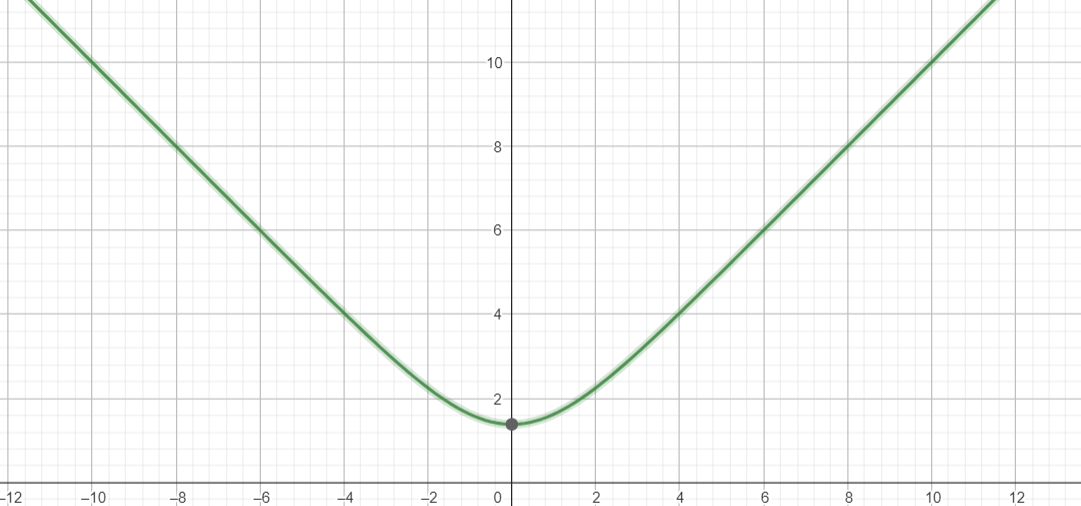

In [9]:
#@title Base64 Image, execute too show
base64_data = "iVBORw0KGgoAAAANSUhEUgAABDkAAAH6CAYAAAANypepAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7L13cB1Zdt9/kNPDew+RAQQJJhAEMwmAmSA5aWd2d2bzri1LLrtcsuXwh6q8JVvlrVLZKlkl6WdZtrcsb9CGoaTV7uyudnJiHOYwM8wEI0gQIDJeDkj8vXO6+wHgPJDvvdsEGo3vB3ULuN1Ao899N/W3zz0342EMmoTz58+Ty+Wimpoa/UhqDI8M093ee9Tn7SOHw0HBaJD+4fQv6Fb3LTmfk5VDDTWb6AvrPy/5zIxMKnOUUkVxheQNvF4vFRUVUXZ2tn4kNYLBIGVlZVF+fr5+JHWGh4flOlwe6XL48GFat24dud1u/UjqRCIRGhkZkfJIBzPsYFTLVNUOA9UytYodVqjjHo9H2nxzc7N+JHVU7WCsUMfNsKO1tVWuw/UzHezWVlXLVHU8slNbNaNu1NbW0r59+6ipqUk/kjp2aauqdpjRdzJ2aauqdqj2nQZ2aatm1HGMRxpm2YHxaAwzynS65/LM02qr/Cx8r7+NokNRehj7CkQC9NNj++iB9wGNPhyV39m1YiftXtFMeTl5NDg4SK58Fy2as1Cei1PFLuORGZ9H6qWXAtlZ2bSgpIqKcgslX5RXRF9v/CotrVgi+aGRITrbeo7eOv+2fPD8YfcF+qk30CvnAQAAAAAAAACAmYQhcESGIvKc6wv76NXjEwWO3XXNkljgYMqKSqncUZaWwAEm8tRLMCszi+a55pEjzyH54vxi+ubmb9DyOcskz0LHmTtnaf/l/ZLnD73X3wehAwAAAAAAAADAjGJoeCgucDBeXeDo8IwJHHvqdosXR162JnCUO8qpDAKHaUxJKbLQMb9knnhyMJpHx9eodm6t5FnoOH7zBB26ekjyhtDR4++RPAAAAAAAAAAAYGWGRoaprf9+XODwhDy07/jfUqe3a5wHx27auWJHXODgUA3lxRA4zGTKSjI7M5uqSqrIMU7o+GrDl+MeHdHhQTpy/Sh9eGXMo4OXrvT44dEBAAAAAAAAAMC68BKVNvbgGDYEDi+9KgJHZ1zgeLZ+L+2aIHCwB0cpBA6TmdLSzBaPjvlxjw5ewsIeHSvn10k+Ohyl4zeO04GrByWvCR191IOlKwAAAAAAAAAALIgIHANjHhx9wT5ZotLlG/PgYIFj2/JtEzw4sETl6TDlJWp4dIxfuvKlja/QsnEeHUevH6P3Ln0gea4U7ObTjaUrAAAAAAAAAAAsxPDoMHV4H8QFDo7B8XcnfyYCh7GR6fOrn5sgcFQ6K+HB8RSZllJljw4WOorztWCk7NHxtYav0OKKxZJnj46Tt05OEDoGggPU7YPQAQAAAAAAAABg+mGB435/e1zg8EcCtO/E31KXd0zgeGnti7R16ZYxgaO4gkqLSiBwPEWmrWRl6Yp7bOkK77ryrc3fpMXl2p7Tg8ODnxE6+oP91OnrkjwAAAAAAAAAADAdjIyOUHt/O4UHw7JNbCASoL89+XfU6emMCxyfW/MCNS5uoNzsXMmzB0cpPDieOtNaurzrStWEGB1F9LXGr9KCkgWSN4SO/S1jMTo8QQ91+bolDwAAAAAAAAAATCUscNwfaKeQLnAEB0P0s9M/F9HDiMHBAsfmJU1xgWMOCxzw4JgSpr2EtRgd86kwt1DyrkIXfWvzN2iee57kWeg4d/ccvXPxPalAxtIV3oYHAAAAAAAAAACYKsSDY6CDQoMheT7l77/8+Feys4ohcHxh3ec/I3CUQOCYMjIikYjmS5OAK1euUHFxMVVXV+tHUmdkZIRCoZBc53EMjQxRu6dD1jOxe09/cIB+fubn9IAj0saukZ+bT02LG+j5Vc/L73MFcRU4YxVmjuQfRzgcpszMTMrL09ZBpUOydjyOkydPUn19PTmdTv1I6kSjURodHaWCggL9SGqYYQejWqaqdhiolqlV7PD7/VRYWEhZWVn6kdQwo477fD5p81u2bNGPpI6qHYwV6rgZdrS1tcl1uH6mg93aqmqZqo5HdmqrZtSNNWvW0I9+9CNqaGjQj6SOXdqqqh1m9J0MxiMN1b7TwC5t1Yw6jvFIwyw7MB6NYUaZTvdcnknFDhE4Ys+sxhKVyGCEfn72F3Sz61bsyTr2CxkZ9OLq52nTok1jS1SKK8hd6H6iwIHxSMOMepURCAQmFTlaWlrI4XBQVVWVfiR1UrnJ8UIHwzE4fnHul/TA8yBWXzIoLyeP1levp8+NEzq4wnDFeRxWacRnz56lFStWKF3DKh38dFd+A9UytYodVhio+B64zas89JgxGbNCHTfDjvb2dor1r1I/08FubVW1TFXHIzu1VTPqxoYNG+j73/8+RI4YqnbwPaj2nQzGIw3VvtPALm3VjDqO8UjDLDswHo1hRplO91yeSdYO9tLgZ1Xx4Hj4UDbL4GfVu313aWh4SEIxPL/6edpQvY5yswyBozL2vOpKyoMD45GGGfUqI3YDk4ocFy5cEFWtpkYLBpoOw8PDFAwGyeVy6UcmhysLCx28vinu0RHqp1eP/i31BHpE6MjJyqGGmk30+XUvyd+IR0es4sxzzZV8Ivj/cweQn5+vH0mdVOyYjCNHjtDatWvJ7XbrR1InEonIB19UpMUxSRUz7GBUy1TVDgPVMrWKHV6vV66RnZ2tH0kNM+q4x+ORNr9r1y79SOqo2sFYoY6bYUdra6so6lw/08FubVW1TFXHIzu1VTPqBk8oX331VWpqatKPpI5d2qqqHWb0nYxd2qqqHap9p4Fd2qoZdRzjkYZZdmA8GsOMMp3uuTyTjB0Sg6OfY3BoS1T4WfXvT/6M7vS2ivjBn+nLG75Im2o2xj045rrmkLvALYJBMmA80jCjXmWycDBZYhIdf1pJFKOcPKouW0AFOQWSLysqo69u/ArNL5kv98MiyLm7H9NbF96Wv+FK5gv7tBgdsVt+9JpWSkyi40jpJ5SpuQnlaW5CeZqXUJbmJpSnuQnlaW5CeZqfUKbmJZSluWkmlCeLGPc97RQeDsdulig8FKa/O/kzau27G4/B8Xz9c7Rh0Xp5luW/mV8yT2JwsFjw6PWeZmISHZ9tyZKRT9i9Z0FpFRXk5MtNlhS66ZuN35AtZxkJRtr6Mf3mk9elYnHyhr3U5UEwUgAAAAAAAAAA6rAHR9vAfS0Gx8OH8p09OHiJCp9jXlr7Iq0ft0RlrnsuuQqSW6ICng6WLXl28+GtZEXoiH2VFLnpn2z55gSh49O7n9I/fvybuNDhCXupw/NAvDsAAAAAAAAAAIB0EIGjvy0ucISiIfq7k39Pd/vuxQWOF1Y/T42LG8YEDlmiAoFjurF06edk54jQkZ9tCB0lInRUl2rRjAdHhuhC20V6/ZM3JM9CBy9deeDplIoIAAAAAAAAAACkwpjAocWJFIHjFHtwjAkce1bups1Lx28TOyepXVTA08fynwALHfPc8yRGhyF0fHPzN+JCB8fo+PTeefrVuV9LhYsLHd5OOQ8AAAAAAAAAACQDB83UlqhEZIUACxz7Tvwd3RsncOyua6Ydy7dTXra2A0mFozzpXVTA02dGfAq5WTlUVTKfCnI1oYMr0D/d+k9oYdlCOc9CB3t0/OaT30h+vEcHAAAAAAAAAADwJDSBQ1+iEvsKRAL0tyf/Xrw6DIFj69IttLN2B+XnaLuPVBZXwIPDYsyYT4K3jl1QUkWFutDhzC+mf7rlW7S4YrGc14SOS+LRwbDQIcFIedcVAAAAAAAAAABgEoZHhnWBQ1uiwgIHL1FhDw5+tmS2LN1Mz9TvjQsc5Y4yKi0qhcBhMWbUp6EJHQuoMLdQ8sX5xfS1hq/Sos94dIztujIQ8lC3v0fOAwAAAAAAAAAA49EEjrElKrwqQDw4+triAseuFTvp2fpnZHUBw+JGmaOMMjMhcFiNGfeJZGdlU5VbW7rC8NKVb23+Ji2pWCJ5I0bH2xfelTxXSk/IQz0QOgAAAAAAAAAAjIMFjnZvB0V0gYNXA/ztib+j+/334wLHjtrttGvFrvgzKHtwVBSXU1ZmluSBtZiRspPsuuKuosI8zaPDWeCkrzV+hZboS1d4e9lzrefonQvvSUU1PDogdAAAAAAAAAAAYIZ0D47oUFSeG9mD4+9O/ow6PA/iAsfelbsl0GjBuCUq7MEBgcO6zFjfGkPoKMorkryrwEVfa/wqLatcKnkWOs7cOUMfXN4vea6k/cF+6vH3Sh4AAAAAAAAAwOyEVwBwQFFD4BAPjpN/Tx0DHRMEju3Lt8tOn0y5oxwCxwxgRi8g4qUr893zJggdX2n4clzoiA5H6dStU3Tk+keSHxk1hA54dAAAAAAAAADAbIQFDl6OMiZw+OhvjycWOIwgoxXFFVTmKIXAMQOY8VFSOBgpx+hw5Dsk/6jQERmK0Mk7p+jw9SOS561/IHQAAAAAAAAAwOzDEDgiusAxEBqg1z7+JT3wji1ReXbVs58RODjQKASOmUHWd77znT/iLXISpa6uLsrNzSWn05nwfDKJ9xqORqNynUTnk0nhcJiys7MpIyMj4XneUrYwp0CCxbAal5uVS4vLF1NvoC+WemWtVae3U5aw1JTViEcHR84dHh2Rv0t0zUeTGXbcu3ePKioqKC8vL+H5ZNLQ0JDcC5dHovNPSmbYwYmvIRUoKyvh+SclVTuMpFqmVrHjSXX8SUnVDk58D93d3VRdXZ3wfDJJ1Q5OVqjjZtjh8XjkPrh+Jjr/pGS3tqpapqrjkZ3aqhl147vf/S698sorNH/+/ITnk0l2aauqdvA9qPadnOzSVlXtUO07jWSXtmpGHcd4pCWz7MB4NJbMKNOpnsvz82Bb330KD4VpVPfy5xgcXd4uETwY3kFly5ImeabkvykvKqOSQjdlPqaszWirGI+0ZEa9yvD5fNqnmYDr169TcXExzZs3Tz+SOsPDwxSJRMjh0Dwt0iEQCFB+fr4U1OMQMcPXScFoUPK8t/EbF9+iG103JM/RcDfHKuyuZTslz0qcO1ZhKxzlkn8cZtjx8ccf0/Lly6VM04U/cG6QBQXaurBUMcMOhhsRb5fEHVI6qNphoFqmVrEj2To+Gap2MH6/n27cuEEbN27Uj6SOqh2MFeq4GXY8ePBAyrS2tlY/khp2a6uqZao6HtmprZpRNzZt2kT/7//9P2poaNCPpI5d2qqqHWb0nQzGIw3VvtPALm3VjDqO8UjDLDswHo1hRplO5Vw+vovKUEQehD1hD7328a9E4OCX3yxi7FmxmxprGigvW7sePyfy8+KTPDgwHo1hhbaaMTIyMqnIceHCBXK5XLRo0SL9SOrwTQaDQblOuni9XioqKkqq0gyPDtMDTyf5I37J+2Lff37qF3Snr1UqLlfYzUs307P1e8UDhD/A0sISqnRWyu9Phhl2fPTRR7RmzRpyu936kdThD5zVLS6PdDDDDoavweoeN+Z0ULXDQLVMrWJHKnU8Eap2MPym5+LFi7RzpyYCpoOqHYwV6rgZdty9e1eus3btWv1IatitraqWqep4ZKe2akbdqKuro5/+9KfU1NSkH0kdu7RVVTvM6DsZu7RVVTtU+04Du7RVM+o4xiMNs+zAeDSGGWU6VXN5fkZsH2in0GBYBA5+Rtx34m+pM/bcyEtU+NiLaz9HjYvHBA5+PuTnRH5efBJmtFWMRxpm1KvYZ5YpH1yixO42nBKds2rKzc6lqpL55Cx0St5d6KIvrX+Zasq0joiDkZ6+fZr2Xz0o5xlP2Es9gd4J13kaiUl0HCn9hDI1N6E8zUszsf+0ckJ5mpvQ1s1NKE/zEtq6+Qllam5CeZqbpqL/fBj7euDtpEjsOZA/u0A0QD879Q8Tlqjsqd0tHv/s+c9/M889l8qLy0S0ePR6Vk5MouOzLklJ2AzZdcU1tutKcX4xfXXjl2lhWbXk2UWJd115/9IHkmf1jgPOdPq6JA8AAAAAAAAAYGbDm05oHhwh8dYIRkP0D6d/IceMIKPPr36eNi3aSHk5mgfHHGcllbAHR4YtH5VnBbb95Fjo4F1XivIKJe8scNLXG75GVSVVkheh4/ZpevvCO6Lg8bohT9BDXb5uOQ8AAAAAAAAAYGbCAkeH5wEFdYEjPBimn53+GbX1t8UFjpfWvkhN45aoxAWOTAgcMxlbf3qaR8d8cTtiShwl9I3Gr9Fc11zJs9Bx9s45eu/i+5IXj44gPDoAAAAAAAAAYKaieXB0yNIUFjh4F86fnf4Hutt7T84xHIOjYfGmuMAx1zmHSoogcNgB23+COdk5snSF9zjOiH2VOcroW5u/QXNilZiRGB13zohHB4scnNijg9dtAQAAAAAAAACYObCIcX+gnYKDQU3gGGKB4+d0p6dVznFcji+u//zEIKPFFeQu4m1iIXDYgVnxKeZk5dA8Q+iIVepyRzl9a/M3aZ5b2/opOhSls63n6K3zb8eFDm/IC48OAAAAAAAAAJghaB4cYzE42IODY3Dc7rkt51jE+MK6l2jDog1jS1SKK8lV4ILAYSNmzSeZp++6YggdFcXl9K2mb0wQOj65+8kEocPw6DCi7gIAAAAAAAAAsB5jHhxjAsffn/4HutV9S/PgiH29uPbFuMDBeQ5jAA8O+zGrPk2uzAtKquJCR1lx2UShY3hQhI7XP3ljokeHFx4dAAAAAAAAAGBFDIHD8OAIRUMicNzpuSPnmBfWPE+basY8OOa65pC7EB4cdmTWfaK52bljQkfsi4WObzZ9gxaULpDzLHScb7tAb3zy5iNCBzw6AAAAAAAAAMBKiMDRf3+iwHHqZxMEjudWPTshBgd7cLggcNiWWfmpGkJHQa4mdJQXl9HXG79K1aXVcn5weJA+bTtPb3z6puRF6Aj7qMvXJQ0HAAAAAAAAAMD0MjIyQu2eDgoNhuMCBwcZvds3tovK3pV7aMvSzfKSm+FdVODBYW9m7SerCR0LZHtZY9eVrzd9lRaOFzrunadfn/u1NBAWOvyRgHh0AAAAAAAAAACYPljg6PB2UJgFjthXIPasxh4crb3aLioMCxzblm+NCxzYRWV2MKs/Xd51pco9Py50lBaV0jc3f4NqymvkPAsdF+5f+oxHB2J0AAAAAAAAAMD0MDwyTG0DvERFEzj4ZfTPTk304Ni2bKukgpwCyfPGEyVFJRA4ZgGz/hNmj47xQoe70E1fb/zaBKGDY3T84ye/kTwLHZ6QB0IHAAAAAAAAAEwxhsBheHD4I376h1M/p3v9EwWO3XW75RmPYYGDX2hnZWZJHtgbyFgxjBgdRXmFkuc1Wl9t+DItHid0XLx/id6+/K6IHIbQ0eXrlvMAAAAAAAAAAJ4uLHDwLiq8PawhcPz87GsTBI4dtdtF4DCe7cocpRA4ZhkQOXR46co81zwq1BsDuzJ9rfGrtLRyieRZ6LjUfoneufCu5A2hoxtCBwAAAAAAAAA8VYZGWeAY8+Dwhr302se/EtEjLnAs307NK3ZNEDjKHeUQOGYZGaFQaNLtQq5evUrFxcW0YIG2vWo6DA8PUzgcluuki9/vp4KCAsrOztaPpAb//8zMTMrL07YMehyDI4P0wNNJ4aGw5AeCA/TG+TfpVs9tidhbmFdAGxdtpOdWPksZGRmypouVwXJHmfz+4zh9+jTV1dWR0+nUj6RONBql0dFRKY90MOPzYFIp00So2mGgWqZWsWMq6/hk+Hw+unbtGjU1NelHUkfVDsYKddwMO+7fvy/XWblypX4kNezWVlXLVHU8slNbNaNurFu3jn74wx9SQ0ODfiR17NJWVe0wo+9k7NJWVe1Q7TsN7NJWzajjGI80zLID49EYZpRpsnN59uDgXVSMZzQWOH758a+prb9NypOfy3Yu305blmyhorwi+Z3SwhLZXOJJAgfGo4nYoa0+1pODKwsnFVT/3sCs6zyJ3KxcqiqZH28c7NHx8oaXaUnFYslHhgfp3N1PaP+1g5Jnj46B0AD1Bfsl/ySmyo7JmO7//zSwi012qRuwQ4P/XuUa012OTwPV8rBKmUz3fdilbphlBz4P85lOm/h/o25MRPU6qmU63eVoFmZ+HlYpk+m+DzPL9HEMjQxRu7cj9hwWkbwv4qNfnPuleHDwwzSzq3YnbV+2Pf4MV1ZUSmXFTxY4mKmy42kz3f/fLMywIyNWMSb15Lhw4YKoajU1WmyKdGAlJhgMksvl0o+kjtfrpaKiorSVMf7/WVlZlJ+vbR2UDNyYOjwPKBgNSr4/0E+/OvuP1NrfKnnehmjrsq30zMo9kucGxGphhbNC8ok4cuQIrV27ltxut34kdSKRiGyXxOWRDmZ8Hkw6ZToeVTsMVMvUKnZMRx1/FI/HI21+165d+pHUUbWDsUIdN8OO1tZWUdS5fqaD3dqqapmqjkd2aqtm1I0VK1bQq6++qvS2xy5tVdUOM/pOxi5tVdUO1b7TwC5t1Yw6jvFIwyw7MB6NYUaZPmkuPzQ8JEFGI0OawMFe9j8/8wtqH+jQYiWOjlJz7U7aVbcrHmSUl6fwMpVkl6hgPJqIHdpqJislkyUm0fHZkGTXlZL5VJxfLHnedeXza16kFXNrpVy4oZ28dZIOtxyR8+LREfZQb7BvwnXGJybRcaT0E8rU3ITyNDehPM1LKEtzE8rT3ITyNDehPM1PKFPzEsrS3PS48hwaHaJ2T7vERuQ8x0McL3Awu5bvoK1Lt0pcRf6dyuIKKi8uo+ys7AnXmi2JSXR8tiUEHn0MEozUPZcceQ7JO/Od9PLGl6l27nLJc9CbYzeO0f6rByX4DQe8YY+Pbn+PnAcAAAAAAAAAkBqyRKW/gyJDUXnO4mesn536hwkCx96Ve2jzks1j28Q6yqk0BQ8OYF8gcjyBR4UOd4GLvrTxFaqbVyf50GCYTtw8QQeuaDE6WOhgNyoIHQAAAAAAAACQGsOjw9TO28QOadvEisBx+ucSSsAQOJ6tf4a2LdtKBTm6wFFcAYEDxIHIkQQsdMx1zYkLHa4CF31h/edpSYW2vSx7dJy4dZI+uPShNERD6OiB0AEAAAAAAAAASWEIHOFBTeAwlqg8GCdwPLfqWdqydMyDg2NwlBaVQOAAcSByJAkLHXOclVScrwkdJYVu+mrDlycIHadun6L9Vw5IXpausEeHD0IHAAAAAAAAADwOfn7i5SjsKc8Chy/so5+fnhiD47nVz9LmcQIHL1Hh5zIIHGA8EDlSIDszm+a65sa3JuJgpF9p+DItKl8o+bAEIz1FH1zeL3nx6AgNUJevW/IAAAAAAAAAACbCu6S0e1jgCNHDhw8pEA3Qz0+/Rm3998dicNTvpc1LmqggR9v1g19A8/MYBA7wKBA5UoQ9Oua758WFDlYOv7Lxy7Fj8yVveHS8d+k9USBZ6GA3q24IHQAAAAAAAAAwAUPgCEaDInAEoyH6h1O/oHv99+ICxzP1e2nb0i3xGByVzgoIHGBSIHKkgRGMlLcqYsocZfT1xq+KlwfDQsfp22fpvUvvS8PUPDo85Il65DwAAACgQmYmhm8AAAAzH35WeuDrFM8NFjj4OYpjcNztuyvPUMzuumbaygKHvkSFPThKChGDA0wOZklpkpuVS/Nd86Sx8V68HNH3641fo3nueXKeowGfEaHjA8lzIw0OhSQYKXt4AAAAAOnAAkdBgTbRAwAAAGYq7MHRF+mn4KDmwREZjNBrZ39Fd3ruxAUO3kFl+/JtcYGDN4OABwd4EhA5FMjNzpVlKvk5+SJ0sKrIQsdct+bRwULH2Ttn6e3z74hKyckT9lKXF0tXAAAAJMcHH3xAP/nJT/QcyXiTnZ1Nly5dopdffjmeOA8AAADMBFjEaPe0U3Q4Ghc4fn72NbrZfTMucDQubhAvjsJczXseMThAskDkUCQvO5eqSljoyJOJZ2VxBX2j8WtUpcfoYKHj3N2P6Z0L70pehI6Qhzq9nfDoAAAA8FhY4PjjP/5j6ukZ26mLx5q2tjb6kz/5E/qd3/kd+rM/+zP5znk+DgAAAFgZETgG2inAMThiX7xE5RdnX6NbXbdoeGRYfmf9wnX0bP0zEgcxI/bFYQFY4MjMwOMreDKoJSaQl51H80Xo0Dw6Kosr6WuNX6UFJVVynoWOj+9+Qmc7z0leEzrg0QEAACAx0WiU/r//7/+j733ve1RcXKwfHePdd9+lZcuW0UsvvUR1dXXynfN8HAAAALAqmgdHBwX1XVSiI1F6/cKbdJMFjlFN4Ni4aAO9sOYFcuQ7JD/HxR4cLnhwgKSByGES+dn54r1RkKsJHRyj46uNX6GqcULHzYFb9N7VD2T92XiPDgAAAGA8LS0t1NHRQX/0R39EjY2N+lENFkBu3bol4kZhoebCy993794tx/k8AAAAYDXiAkd8F5UgHb1/jFr7WuMCx4ZF6+m51c+RM18T+MWDowAeHCA1Mtrb2yddM3H//n0JblZWVqYfSR1+oOcJl0qQtHA4THl5eWlHkx8cHBThIScnRz+SOsnawevKuvzd8fVl/cF+eufaexI1eCh2H4X5hbRuwTras6xZfp8brLPASeVFZeKK9SSGhobkurm5ufqR1DDj82BUy1TVDoMbN25QVVVVfKKfKlaxwwp1PBQKUaw/oOXLl+tHUkfVDsYKddwMO/r6+uQ6CxYs0I+kht3aqmqZqo5HM6WtFhUVSeLf83g8NHfuXPof/+N/yLn/+B//o9jg9Xrp3/27f0e/93u/R9u3b5e6kpWVRadPn6a/+qu/ou9+97vkcDjk7/k6iWBB5H/+z/9J69ev14+kjl3aqqodZvSdjF3aqqodqn2nwXTbwWA8msh013Gz7Jgt41EypFKmLHB0BboppHtw8Pd3Y89I1x/coMysTMqI2bF6Tj1tX7JNno343soKS8mV73qsjXZqqxiPNMz4PDIuXrw4qcjh8/kkuFm6D5AMGzg8PKxU8big+D64sNOB/z//LU8C0yUVOwaHB6k31EeR4YjkB8IeOnj7oAgd3IDzs/Noefky2rFwu9wXCx2OPAeVFZQ+0caRkRG5Fy6PdDDj82BUy1TVDgMeuJ1OZ9r2WMUOK9Rxvgdu8yqipqodjBXquBl28EDD98H1Mx3s1lZVy1R1PJopbZUnRyxylJeXi638u3/xF38h5wyRg8WL3/3d36Vvf/vb4uXB98QTCRY5/vzP/1yWuPA12BMkEAjI3z7KV77yFfqv//W/0urVq/UjqWOXtqpqB9+Dat/J2KWtqtqh2ncaTLcdjFXqOMYjDbPsmC3jUTIkW6YscHQHe+TZiP8mPBSmA3cOUru3g4aGhzSBo7KeNlVtpKLcIvmbkoIScuU7n+jBMZV2PA4z2irGIw0zPo+MWMc3qchx7do1WQvMb8rThY3kzjXRmuJk8fv90pGkW9CsrPHEkdW1dEnVjqHRYeoY6JBGzAF1PGEP/fDDvyHfiF/uhbegXTWvnj6//iXKztQahCvPGd+ZZTJY1WJ1K11ly4zPg1EtU1U7DHhSzy7b6Q7cVrHDCnWcO0Vu801NTfqR1FG1g7FCHTfDDlbS+TpcP9PBbm1VtUxVx6OZ1Fb5PE8MjP8xXuRgBgYG4iIHt1eeDPAYMl7kcLvd8iaGbU7EunXr6Ic//CE1NDToR1LHLm1V1Q4z+k4G45GGat9pMN12MBiPJjLdddwsO2bTePQkkilT7ZmoPfZMpL389Uf8sk3sfc99ET8ikQjtqN1Oe1ftocIcTTiqKC6nksKSpJao2KmtYjzSMOPzyIhNjiYVOc6fP08ul4tqamr0I6nDKkwwGJTrpAu75vJbqXTVIP7/XOHy8/P1I6mTjh3R4UHq8HRIxGAWOo6cPEJXgtekUTMcsHTNgjX0xQ2fF6GDGzJHDebgOpMtXeGOgD94Lo90MOPzYFTLVNUOg8OHD8tknSf06WAVO6xQx/ntMLf55mZtKVU6qNrBWKGOm2FHa2urXIfrZzrYra2qlqnqeDST2+qjIgdf4z/9p/9Ezz33nGwda8Aix6uvvkp/+qd/+kQ7a2trad++fUoTIbu0VVU7zOg7Gbu0VVU7VPtOg+m2g8F4NJHpruNm2TGbx6NHeVKZssDBu6jIs1DskdMX8dMvTv+C7vbdE4GDWVhQTa9sfpnmlmkvelngKC0qTTrI6FTYkQxmtFWMRxpmfB7pLxoCT0S2l3XPF7crFi2Kc4vppdWfo5qyRXKe43ZcvH+R3vz0LVG7JBhp2EPdvrGtAgEAAIDx8JuR+fPny4PLeD7++GM5rvp2EAAAAFBlaGRogsDhDfs+I3BsW7aV1pSvji9RKXOUpSRwADAZEDmeMrnZuTTPPZcKczX3q9LCUvpyw5do0Tih40LbRXrrwjsicrDYwbuuQOgAAACQCHYhff755+nAgQN0+fJlOcbfeftYPs7nAQAAgOlC8+DQvdnZgyPso58/InDsWrGDmut2yQ6VTFlRKZU5IHAAc8BMaArQhI55lJelrWsqd5TT1xq+QksqFkuehY5P7n1C7136QPLc+AdCA9Tr75U8AAAAMB4OGPrP//k/p9///d+nL3/5y/Kd8yqBRAEAAABVxIOjf5wHR8hL/3D6F3RvgsCxk3Ys3yEbLzC8i0pZcZks3wfADCByTBG8dKU0v2TMo8NRSl/a+MqYR8dQlM7eOStCB3cI3An0BfupN9An5wEAAMxOfvu3f1uSAY8RHAyMvTb+8i//kv74j/9YvnNeJfAaAAAAoMLgyCDdN5ao8MYLIQ/9/PRrdK//nnisM7vrdtOO5dupKE9bouLMLaaSohIIHMBUIHJMIdx45zrnxIUOXnf21YYvU1WJFp05MhShM3fO0IGrhyQvQkegDx4dAAAwi5kzZ44kA17WyDuncECvVatWxVO6Ab4AAAAAVVjg4CUqkcGICBzslc5LVETgiI1bTPOKXRKHwxA4yovLJWYhlqgAs4HIMcXkZOXQfPe8MfcsRxl9ZdOXaZ5rnuRZ+Tx56yQdbjki+bhHB4QOAAAAMdiTg7dnAwAAAKzAowJHf+zZhT042vrvj/PgaKbty7dRUZ72src89gzEcTiS2SYWgFRBrZoGjGCkhtAxx1kpHh0VxRWSDw2G6NiN47T/ygHpKAyhowdCBwAAgBjGWzEAAABgOtF2UZkocPzizC/p/jiB45n6vbRtGQscYx4c/KIXHhzgaQGRY5pgjw4WOrixZ2Rk0FzXXPpa41fjQkcwGqSTt07RoauHJc9CB3caPQEIHQAAAAAAAIDpZXh0mDq9XRM9OM68NkHg2LtyD21ZujnuwVEZe9ZhDw4IHOBpApFjGtGEjnnkyHeI0MHLWL7e8FXZfYVhj44TN09M8OjgAD7w6AAAAAAAAABMFyxwtHs6KDykBRnlGBy/OPOa7KxiCBzPrXqOti7dEo9HyAIHBxmFwAGeNhA5pplcFjpcc6k4v1jWpM0vmU9fb/waVTor5XxwMCQeHR9c/nBM6Ah7qNvXI+cBAAAAAAAAYKrg5xFeomLsosLbxL4mS1Q0gYNf3rLAsXlJIxUaHhxOCBxg6oDIYQHYo2Oua47E6OBOoYqFjoavxoUO9ug4ffuMLnRoHQurpd2+bjkPAAAAAAAAAE8bjgnFHhz8fMKBsP3RAP3i7Gt0r69tLAbHyr0icBTkFkien2lKCiFwgKkDIodF0ISOsRgdvIzlaw1jMTpYKT1z+wwduHZAOhRN6PBQtx8eHQAAAAAAAICnCwscHZ4OiR3IzyP8/fXzb9DdvntxgWNP3W7avLRpTODgJSqFbggcYErJ+s53vvNHXEkTpa6uLsrNzSWn05nwfDJpZGRE9vPn6yQ6n0yKRCKUnZ0tD/+Jzj8p8f/nv83MzEx4Pplkhh337t2jysrKSa+RGbvH/Ox8Cg+GaGhkWAL0VJcukO2XApGARC9m7w1WTpfOWSp/w4F+hmPHuSN59HqJkhl2cFIt0+HhYeko+XNNdD7Z9KQyfVKyih1WqON8D93d3VRdXZ3wfDJJ1Q5OqmVqhT6Hk8fjkW0+KyoqEp5/UrJbW1UtU9XxyE5t1Yy68d3vfpdeeeUVmj9/fsLzySS7tFVVO/geVPtOTnZpq6p2qPadRrJLWzWjjmM80pJZdszW8Wg49mxy39NO/nBABI1gJEivnf0l3eltjQscO2t30LZlWyUGB/8Nxxl0F7hkSf6j1zPSdM/lOWE8mpjs0FYzfD4fr4BIyI0bN8jhcNC8efP0I6nDN8kFXlSkbRmUDsFgkPLz8ykrKz0FkP8/f0hcUOlihh0ff/wx1dbWSpk+juhwlDp9XRQZisiH1OnrpDcuvEWd3k7J5+fkU+PiBtq7Yo/8PiujzgInVcQ6kozY1+Mwww5GtUy54nLl589VhWTLdDKsYocV6nggEKDr16/Txo0b9SOpo2oHo1qmVuhzmAcPHkiZLl++XD+SGnZrq6plqjoe2amtmlE3Nm3aRN/73vfke7rYpa2q2mFG38nYpa2q2qHadxrYpa2aUccxHmmYZcdsHI9GHo7K84jhwcHPKG9ceJNudN2kwZEheVG7Zclm2r503DaxjjJy8xKVjMcvHJjuuTyD8WgidmirGcPDw5OKHBcvXiSXy0ULFy7Uj6QOKzmhUEjUznTx+XxUWFgoalA6cKXjCqfSmZhhx9GjR2nNmjVSpk8iOhSlDu+DeEAf9uD41cf/KBGLGQ7is756Hb249nMibLDQ4S500xw9jsdkmGEHo1qmXHG5AqsONKmUaSKsYocV6rjX65U2v2PHDv1I6qjawaiWqRX6HIbfTHCZcv1MB7u1VdUyVR2P7NRWzagbK1eupJ/85CfU1NSkH0kdu7RVVTvM6DsZjEcaqn2ngV3aqhl1HOORhll2zLbxiJfId3geiMDBHhv8bMLPJLe6b4rnOT/Mblm2WbaKLcrVbGKBoyyWklmiMt1zeQbj0UTs0FYzHrIcNwnnz5+XCldTU6MfSR2+SS6odCsuwx8YF9J0D1Sqdhw+fJjWrVtHbrdbP/J4WCXlTmW8R8drZ35FHQMdoq4ZHh2fW/OC/D53JBy1mNe+TYYZdjDTXfkNUi3TR7GKHVao4+zOym2+ublZP5I6qnYwZnSMqnXcDDtaW1vlOlw/08FubVW1TFXHIzu1VTPqBr8127dv37SLHFZoq6p2mNF3MnZpq6p2qPadBnZpq2bUcYxHGmbZMZvGI0PgCEQD8iwSGgzRL8/+im5235LlK3xszfzV9PmNL5EzX3sgLXOUisCRnZncfU33XJ7BeDQRO7RVBB61MCxizHfPp4LcfFkXNdc5l7668ctyjGHx4+ydc/T2+XckL8FIgwMIRgoAAAAAAABIG36u4G1iDYGDPTl+efbXcYGD2bBwPTXX7kpb4ADgaQGRw+Lk5+TRfNd8KsgpEKGDA/i8vPYLtKCkSs6Hh8J07u7H9Oanb4m7mCF09Pp75TwAAAAAAAAAJMvw6LAIHMHBsV1UXhMPjptxgWPdwrX0TP3euMDBy+YhcACrAJFjBpDHQod7nggdTIWzgr7W+FVaVKatBWSPjk/ufUrvXHxX8ix09AX7IXQAAAAAAAAAkoYFjo6BB3GBI6ALHLfGeXA0Lm6k51c9T64CbTkBf68oLofAASwDRI4ZwpjQkS+BRiuKK+iVja/EPTpY6Pj47if0m0/eEJGDU3+wn/oCfXIeAAAAAAAAACbjUQ8Of8QvMThY4OBnC2br0i20d+VuchdqAgdvEVvprKCcrBzJA2AFIHLMIFjomOca8+jgDuXLm75MC8d5dJxvO09vnn9bOqJh9ugI9MvyFQAAAAAAAABIhCFwcHDRyQSOLUs3U3PdLnIWTFyiAoEDWA2IHDOM3OxcmuuaQwW5BeLRMcdVSV/Z9GVaXK5FeOatZ1noeOv829JZceoJ9MKjAwAAAAAAAPAZhh4ROHxhnwgct3vuxAWObcu20u66ZirOL5Z8aVEJVTiwRAVYE4gcM5C8bF66Mp8Kcwv1pSvl9MrGlycIHZ+yR8enukfHyLB4dHACAAAAAAAAAGZoZIg6WOCIGgKHn3557tcTBI4dy7fTrhU7xwkcpbIZQnYWBA5gTSByzFDysnMlRkdRbqHkOUbHyxu/OEHouNB2gd6+8I7susIeHezNAaEDAAAAAAAAwM8HDzydmsAR+2KB47Uzv6Q7EwSObbSzdkdc4OBtYst5FxUIHMDCQOSYwfDSlXnueeLRwVQWV9KXNr5CSyqXSD46HKVP752n9y59IHnuyCQYaSwBAAAAAAAAZicsYnR6O7Ugo7EvT8gjAkdrX2tc4Ni5fDvtrN1JjnyH5Dn+hmwTC4EDWByIHDMcFjrEoyOvSPLlxeX08vovTAhGeu7uOXr30vs0+lDz6BgIDSBGBwAAAAAAALMQETh8LHBoS1RY4Pjl2V9PEDh4ecqO2h2PCByliMEBZgQQOWyAeHS45saFDl668pVNX6KFZdWSDw+G6eyds3Tw2mHJc+fFy1Z6IXQAAAAAAAAwa+Bl7LxEJRDVtonVBI5f0d2+u3GBo3nFLtq+fBsEDjBjgchhEwyhw1i6IjE61r8sW84yLHScunWKjlw/KnlZuhLol51XAAAAAAAAAPaGBY4ObwcFogEROAaCAyJwtD4icGxbvpUceZrAwTuoQOAAMw2IHDbCiNHB28syvNXslzd9iSqdlZIPRoN04uYJOnrzqKy9M4QOeHQAAAAAAABgX8SDw9tJgUhAlrCzB8evP/mNCBx8jtlTt3uCwMEBRkshcIAZCEQOm8G7rrD3RkFOAWVkZEi8jq9u+rJs88Swcnu69SwdunpYhA5WbVno6Pb3yHkAAAAAAACAfTAEDn/ET6MPH0psvn/89HVqG7gfFzieqX+Gti7bMsGDgwWOrMwsyQMwk8gIh8MP9Z8/w9WrV8nhcFB1tRbbIR2Gh4cpFAqR0+nUj6SOz+ejwsJCys5OT0Xk/5+ZmUn5+fn6kdQxw45Tp07RypUrla4RiUSkM+LymAx2P+MtZB/4OiXwKOfbBtro9fNvUo+vR/LOAic1LG6g3bW75G+4AystLJHApcmgWqbJ2JEMqmVqFTusUMf5HrjNb968WT+SOqp2MKplaoU+h2lra6NAICD1Mx3MsIOxSx1XHY/s1FbNqBtr166lH/7wh9TY2KgfSR27tFVVO/geVPtOxi5tVdUO1b7TwC5t1Yw6jvFIwyw7Ztp4xC80O31dcQ8Ob9ireXD03o09E4zKZ9Icex5orGmkojztnvjlaEmh+4m7qJhRptM9l2cwHk3EDm01kx94J0sMewMkOpdsMkh0LtlkkOhcMskg0blkk0Gic8kmg0Tnkk0Gic4ZicnLyaO5zjmyhIU/w+qSavry+lckVgcTGAzS6Ttn6FDLIclzBzgQ8lCPXxNBnpQMEp1LJhkkOpdKMkh0LplkkOhcMskg0blUkkGic8kkg0Tnkk0Gic4lmwwSnUs2GSQ6l0wySHQu2WSQ6FyyidudyjUMEp1LJRkkOpdMMkh0LpVkkOhcMolRGY8MEp1LJRkkOpdMMkh0LtlkkOhcsskg0blkk0Gic8kkg0Tnkk0Gic4lmwwSnUsmGSQ6l0oySHQumWSQ6FwqySDRuWSSQaJzySTVvtNIBonOJZMMEp1LNhkkOpdsMkh0LtmE8UhLBonOpZKYmTIeicDhHRM4fBEf/eMnr9O9/rbY+VHKzMikZ1bupabFnxU4+AVoomuOTwaJziWbDBKdSyYZJDqXbDJIdC7ZZJDoXLLJING5ZJJBonOpJINE55JJBonOJZMMEp1LNmWMjIyMXekRLl68KArKokWL9COpYwVlzCoK30cffSRvz1wul34kdVJVxsJDYXow0EnRkah0bm19bbJFVH+oX85zoNKmJY30bP0zks/KyCJ3rGOrdGpiyGRMt8JnoFqmVrHDCnXc6/XShQsXaOfOnfqR1LGCim0VNf7u3btynTVr1uhHUsMMOxi71HHV8chObdWMulFXV0evvvoqPDliqNphRt/J2KWtqtqh2nca2KWtmlHHMR5pmGXHTBmPeN7f4XkQDzLqDXnpl+d+Ta29rXKO72Hvyr20bfmWcRsXsMBRkvQSFTPKdLrn8gzGo4nYoa3G7j9TjEiUGFYqE51LJaleY7r/3kiq15mO8uRtZatK51N+br50WAtKFtAX1rxEc11z5X5CgyE6c+csHbh6QK4b6/LIG/FSX7Av4fWMNNV2TJYYletYxQ7Va5h1D0yic8kmM+6D03SXh53K0y7XYFSvYQU7zLgHTlYoT07TXR5WKE/+WybRuVSSGbZY4Rpm/L0VytOMsuRkhfswo0zNuo9Ex1NJVihPxgr38bhrPIx9dfo6KTgYlPtloYNjcPA2sSxwMDuX76DGmk3yrMDX4o0KeKvYnOychNecLKnawqhcw4yy5KR6HSvcB/8tk+hcKskMW6a9PKUkgK3h3VY4AGl+Tr5UmPmu+bLryhzXHDnPu66cun2a3r/0gXR8Eow0OEDdPgQjBQAAAAAAYKbA83hjFxX24OB5/q/O/Zpud9+WcwxvE9tU0zjOg6OCSouS9+AAwOpA5Jgl8G4rLHRwrA4WOqrc8+krm74kW84ywajm0bH/ygHJazE6BqjL1y1qMAAAAAAAAMC68Py9w9Ohx+B4SKHBsAQZvTVO4Ni2bKsk9uBgeIkKBA5gNyByzCLYk2Oeay7lZRtCR5V4dBhCBy9dOX37DL178b24Rwfvoc07sgAAAAAAAACsCc/bH3g5BkdQ5vFhFjjO/ZpudN6ICxxblm6hnbU7yZGvbRNbWlRKJRA4gA2ByDHLYI8O3nUlvnTFPe8zQsfZ1nPa0pVRTejgXVewdAUAAAAAAADrYQgc/keWqFzvukHDI8PyO5tqNlLzip3kLCiWPAsc7MGRnZl+oEwArApEjlkICxzxGB2xLxE6Nn6JFpRWyXlWfkXouPyB5DWhY0C2lwUAAAAAAABYg+HRYdlFZbzA8etz/zhB4NiwcL3spOIs0HarKIPAAWwORI5ZSiKh45UNr1BVyUSh492L708IRtrr75XzAAAAAAAAgOmDBY4Hns74NrGGwHGj6+YED45nVj1D7kJti1ZensK7qEDgAHYGIscsZoLQkZFB89xz6UsbX35E6DhLH17ZP0Ho6Av0yXkAAAAAAADA1POowMHBRuMCR+wcs3lJE+1duYdKCt2SZ6GjnAWOLAgcwN5A5JjlPOrRwbE5vrrpy7SofJGcZ6HjzO2zdOjaEclzp9kX6KeB4IDkAQAAAAAAAFMHz8c7vV3iucEChz/ilxgc4wWOpsWN1Fy3i9y6wMEeHLxVbE5WjuQBsDMQOYAudMynwtwCETrmuObQy+u/SAtLq+U8ByM9eeskHbp2WLaTFaEjCKEDAAAAAACAqWRoZEhicPD8nOflhgfHze5bcYGDt4jdvbKZXAVjS1TYgwMCB5gtQOQAQn5OHs11z6WC3ALJz3XNoS9tfCXu0cFK8YmbJ+n4jROSN4SO/lgCAAAAAAAAPF2GYvNvXqIiHhyxL1/YJx4cLHDwsnJmq2wTuyMucPAuKhA4wGwDIgeIk5+tLV0pyiuSPHt0vLLhZVpcsVjyvObv6PWjdOLWScmz0NEb6JM4HQAAAAAAAICnA3twPBh4EF+i4ov46Ncfax4c4wWOXbJNrLaLCu+gAoEDzEYgcoAJ5GXniRdHXOhwVtIX13+eanSPDl/ET0daPqJTd05LniM39wZ6xasDAAAAAAAAYC4icIzz4PCGvPTmxbfpTm9rXODYUbsjgcBRjiCjYFaSEY1GH+o/f4bLly+T0+mk6motNkM6jIyMUDAYlOuki8/no6KiIsrKytKPpEYoFJK/zcvL04+kjhl2nDhxgurr68nl0tzH0iH2ecm9FBYW6kdSI1k7osNReuDtlMCjTLevm966+I50powjt4i2L9tG25dvkzwrxNyZsktcMqjaYaBapqp1wyw7rFDHvV4vXblyhbZu3aofSR1VO5ipquOPwww72tra5DqrVq3Sj6SGGXYwdqnjquORndqqGXVj9erV9KMf/YgaGxv1I6ljl7aqaocZfSeD8UhDte80sEtbNaOOYzzSMMuOqR6PWMTgGBzBQc2Dwxv20m8+eYNudd8SwYMyMmjrks20Y/l2Ks4vlr/h+TjPyx/nwWGVOj7dc3nGDDvMaKsYjzTM+DwyYheYVOS4du0aORwOWrBggX4kdYaHhykcDlNxsdbo0sHv91NBQQFlZ6enRPL/z8zMVKr8Zthx5swZWrFihdIHxpVmdHRUyiMdUrEjOhSlLn+3BDZiWOhg1bitv41GY52sM9aRblu6hbYu1RpSdmYWlRSWUpnjyUKHqh0GqmWqWjfMssMKdZw755aWFqWHHlU7mKms45Nhhh3379+nQCBAdXV1+pHUMMMOxi51XHU8slNbNaNurF+/nn7wgx9QQ0ODfiR17NJWVe0wo+9k7NJWVe1Q7TsN7NJWzajjGI80zLJjKscjFjj4peP4GBy/Of8Gtfa2ijc1l+f2ZdupqaZhnAdHKZUWljzRg8MqdXy65/IMxqOJqJapFdpqRuwik4ocFy9elAq3aJG2VCEd+CZZDVJ5sOcPjJWgdCsN/3/+oPLz8/UjqWOGHUePHqU1a9YoeXJEIhGpNOkqY6naMTg8SJ3cuXIE54cPRfT4zcev092+e5QRO88d6pYlTbSrbpfszJKVmUVlsc61zFGmXWASVO0wUC1T1bphlh1WqOOs/nKb37Fjh34kdVTtYKa6jifCDDvu3r0r1+H6mQ5m2MHYpY6rjkd2aqtm1I2VK1fST3/6U6WJkF3aqqodZvSdjF3aqqodqn2ngV3aqhl1HOORhll2TNV4NPpwVDw4ePcUFjj8se+/PPcrutNzR8QPvsbuumbatnwrOfIc8jf8opFFjuzMJ9cXq9Tx6Z7LMxiPJqJaplZoqxmxB9dJRY7z589LhaupqdGPpA7fJLubqDzY8wfG7j/pVhr+/+xyo1r5Ve04fPgwrVu3jtxubb/qdOBKwy48XB7pkI4dsnTF0xnfqupBrMN97fSv6IGvkzIzMsiR76BtS7fSrrqdInSwcmxEcp4MVTsMVMtUtW6YZYcV6rjH45E239zcrB9JHVU7mOmo449ihh2tra1yHa6f6WCGHYxd6rjqeGSntmpG3aitraV9+/ZRU1OTfiR17NJWVe0wo+9k7NJWVe1Q7TsN7NJWzajjGI80zLJjKsYjFjh4vs3CBv8cjIZkF5UbXTfiMTg212ym5tjc21Wk2cPzbhE4kozBYZU6Pt1zeQbj0URUy9QKbRWBR8ET4WCk81xzqTC3UESMea559NKaF2mus1LOs8J8/NYJOnLtIxFB2H2Ot5bt9ffJeQAAAAAAAMCTYVGDvagNgSM0GKZ//Pg3dLPrZlzg2FO3m5pqGuVFI1NenJrAAYDdgcgBkiIvR9t1JT8nnzIyMmi+ax59cd0XqLJ4otBx6NrhCUJHj79XzgMAAAAAAAAmR/Pg6CRf2C8/R4Yi9JtPXqfrXddpeHRYfocFji3LtpBD3wkxVQ8OAGYDEDlA0rDAwV4c7NnBQkeVu4pe2fjyBKHj5M1TdPjaEclzZzwQHIDQAQAAAAAAwGMwBA5/RBM4eLn4m5++RS0PWuTlIbNn5R7asmzzZwWOJGJwADCbgMgBUqIgN5/muceEjoVl1fSljS9TeXG5nA9EA3Ti5kk6eO2QBCqF0AEAAAAAAMDkfEbgGIrS65+8SZc7rtDQyJDMuZ+t30tblrLAoQcZLSqjkqIn76ICwGwEIgdIGRY6eOkKCx2ZGZlUXVZNX974JZrjnCPnWehgjw4WOhgIHQAAAAAAAHyWkYcjnxU4Pn2TrnRckV0Omb0r91DTkqa4B0dFcTmVFLrhwQHAJEDkACnDwUd56QqLGobQYXh0zHXNld9hoePUrdN04OpByRtCR7e/R2J2AAAAAAAAMJsRgWOAd1EZ78HxxgSBo7mumTYvaaKivCKZg1cUV4gHR1ZmlpwHAHwWiBwgLbiTZY+O+frSFfHoKK2mVzZ8kSqNXVdE6DhFH1z6AEtXAAAAAAAA0DE8OHi+zAJHeDAsQUZ5iUpc4Fixi7Yt3SICB8MeHKW8RAUeHAA8FogcIG00oaMgLnTwekEWOr608RXZcpYJRIN0+s5Z2n/1gOR56ytN6IBHBwAAAAAAmH3wfJg9ODho/+jDhxQaDInAcaXjqsTgYLYt20pbY8nYJlaWqMCDA4CkgMgBlDGEjvwcPRgpe3SMW7rCHffp22fog8sfilLNHbsn7KWeQK94eAAAAAAAADAb4Hlwp6/rEQ+ON+jag5a4wMHixs7aHVSsCxy8iwoEDgCSByIHMAUWOnh7WY7VwULHgpIFInTMd8+X80H26Lh9ht6/9EFc6PCGWOjokfMAAAAAAADYGV663ekzlqg8pFBU8+DgbWINgYMDjLLA4SxwSr7MUUqlsYQlKgAkD0QOYBqa0DE3LnRUlyygL296hRaULpDz7NFxrvUcfXDpQ8lrS1c8snQFAAAAAAAAu8IChxaDIyiezCJwfDrRg2PDovUSh8OlCxylRaWyVSwEDgBSAyIHMBVj6UpBToEIHezJ8fL6L8Q9OkKDYTrLQseVsaUr/RyjI4BgpAAAAAAAwH5oAscD8eBggYM9nP/xEQ+OxsUNtHflXnIXuiRfUlgiXhzZWRA4AEgViBzAdNiTY557rggeDAscvOvKBI+Oe5/QwZbD0tGLR0dggHoDfXIeAAAAAAAAOzA8MtGDg7+/efFtaumcKHDsrmuWnVMYd6GbyovLKCcrR/IAgNSAyAGeCix0zHXOEaGDPTqqSqroSxtepkXli+Q8B1n6RBc6GFa4+4P91B/olzwAAAAAAAAzGfHg8I55cPgjAXrz/Jt0q/uWiB9M05JGEThY2GBKYt95JxUIHACkT0YgEJh0e4uWlhYqLi6m+fO1pQbpMDIyQuFwmBwOLTpwOsTukQoKCigrK72Iwvz/MzMzKS8vTz+SOmbYcfbsWVqxYoWUabpEo1EaHR2V8kgHM+xgki3TyFCEunzdFB4KS55d9d69/B7d62+TfHF+MW1duoW2Ltkiee7Qyxxl5C7QXPWehGqZqtYN1c/DwAp13O/3S5tvaGjQj6SOqh2MFeq4GXZ0dHRImXL9TIepbquTYZU6rjoe2amtmlE3NmzYQN///veV2rtd2qqqHWb0nYxd2qqqHap9p4Fd2qoZdRzjkYZZdiQ7HrHAwXNgQ+BgD463L71D1zuvixczvwRsWLSJti3dFl+iwkJHWVFpUgKHXer4dM/lGYxHE1EtUyu01YxIJDKpyHHlyhVyOp20YIG2zCAdhoeH5SZVHuz5A+NCys5Ob02aGZXfDDtOnjxJ9fX1UqbpolppzLCDSaVMo8NR6vR2idDBnXy3v5ve+PQtutt3Vzp4Fjq2L9sm+4EzHFyJO3jeKutJqJapat0wa1JphTru8/mkzW/ZoglO6aBqB2OFOm6GHffv35cy5fqZDtPRVhNhlTquOh7Zqa2aUTfWrFlDf/M3f0ONjY36kdSxS1tVtcOMvpOxS1tVtUO17zSwS1s1o45jPNIwy45kxiP20uj0dlJwMEQPY1++iE/mvrd6btHQsLZEZcvSzbRj+XZy6S/2UhE4GLvU8emeyzMYjyaiWqZWaKsZsRuYVOS4cOGCVLiamhr9SOrwTQaDQXK5knsznwiv10tFRUVpVxr+/6yq5efn60dSxww7jhw5QmvXriW3W3NHS4dIJCLqFpdHOphhB5NqmUaGWOjolHgcTFvffXr7wjvUNqB5dDjznbRrxU7p8Bnx6Ih19Lxl1uNQLVPVuqH6eRhYoY57PB5p87t27dKPpI6qHYwV6rgZdrS2tspgw/UzHaarrT6KVeq46nhkp7ZqRt3gt2avvvoqNTU16UdSxy5tVdUOM/pOxi5tVdUO1b7TwC5t1Yw6jvFIwyw7njQescDR4XlAwUEtBoc37KXXP32TbnbdFA8O3jq2cdEm2rtqT1zgkF1UYnPeVJao2KWOT/dcnsF4NBHVMrVCW83kN+mTJSbRcaT00mwuz4JcLRhpUX6R5Dlex+dWPU+LKxZLubDC/dGNo3T81kk5LzE6Qv00EPJMuM6jiUl0HCm9hPI0N6E8zUsoS3MTytPchPI0N6E8zU8oU/PS48qSRQx5qTekvdTj+e1vPn49LnAwW5dspu2yRMUtf8Mv9DjIaG527meuNxsSk+g4UnoJ5aklBB4FU4YWjHQuFeYWSn6Ocw59Yd1LtLRyqeS9IS8dvX6UTt46KfmhkWHqC/Rh1xUAAAAAAGBptCCjnRTQPTgGQgP0m4/foFs9t+MCBy/N3rZ0KzkLtKUZInA4sIsKAGYDkQNMKfk5eTTXxUKHtkaLf35p7edocbnu0RH20ZGWo/TR9aOyhpG31uJdVyB0AAAAAAAAK8ICB8efM4KM8nz29U/epJvdYx4cO2t30I5YGi9wlBVB4ADgaQCRA0w5LHSwF0dRnrZOS4SOdS/SwrKFkue1i8dvHKej14+J0MFrG1no6MP2sgAAAAAAwEJoS1S6yB/x67uoBOg3n7wh28SOFzi2LdtGLkPgKCrRBY704zcAACYHIgeYFvKy86iyuCK+dIXjdXxx/RdoQUmV5H2xgYKFDk4MCx19QSxdAQAAAAAA1mD04ehnBI7XP3mDbnTdeETg4CUq2k4RLHCUFnKQUQgcADwtIHKAaYOFjrmuOSJ0ZMS+5rvn0SsbXhbBg2Gh4+iN47J0hRnz6IDQAQAAAAAApo9HBY7wYJje/PRtaum8Hhc4eOfAbcu3xZeolDnKRODIhsABwFMFIgeYViQYqWsOFegxOuaXzKeX139RlrMwvKbx2I3jdLjliAwgmkcHYnQAAAAAAIDpgQWOLm+XzFP558hQhN44/yZde3BN5qq8u0Pzil2aB0e+5sHBAkdZEQQOAKYCiBxg2tF2XZkj35nq0mp6ecMXqMJZIXlWyE/cPElHHvHo6PH3Sh4AAGYbubm5+k8AAACmktGHD6k30EteXeCIDkXprfNv05X2qxIwn2EPjq3LtlCxLnDwDioQOACYOiByAEvAnhwcgJSXsLD6vahskXh0TBQ6TtDBq4fiHh0DwQHyDfrkPAAAzBYyMzMpLy9PzwEAAJgqRh6OUH+4T7aJjQscF96mS+2XReDgOeyelbtp69KJAkcpBA4AphSIHMAy8Layc90sdOTKIFFTrgkdlc5KOc9Cx8lbp2TpCsPbdfEgwwFJAQBgtsAiR1dXF/3BH/wB/at/9a8kHT2qeboBAAB4OrDAwTE4grrAER6K0Jvn36aL9y/R4PCg/M6eut20ZelmCBwATDMQOYClYKFjnnueCB2ZGZmfETo4ajULHYeuHZY8DzgDIQ/1+Htku1kAALA7gUCAvvvd71JlZSX99m//Nj377LP0gx/8gK5fv67/BgAAADMRgcPTSf6wX5arRIaj9Oanb9Gl9jGBg2NwbF7SRI48hwTUryiugMABwDQBkQNYCh4UeLcVzaMjLy50vLLhizTHpQUjlaUrt07S/isHZOkKR7DuDw5Qrx8eHQAA+3P37l1qaWmhV155hZqbm+nll1+mNWvW0Ouvv06Dg9pkGwAAgDnwPNPYRYU9OFjUOHjzEF1uvyw/89y1ua5ZYnA48h3yN+XF7MFRAoEDgGkCIgewJCx08Fay+TnjYnSMEzoCkQCdun2aLvRcjAsdHKOj29cjeQAAsCvBYFC+l5WVyffCwkJatGgRPXjwgEZGtG0LAQAAqKMJHGMeHKHBEB29d5xu9t6KBxndUbt9QgyOiuJyKikqoazMLMkDAKaejNu3b0/6RMhrfvPz88nlculHUmd0dFTeLPF10iUSiUgkeV6HnA78//lvs7PTV1PNsOPevXviXqxyjeHhYbmXdCPrm2EHo1qmydjBYkV4KEy9oT5Ryjl/r7+NjrYepZ6gtrNKduxr08KNtLVmi+R5QHEVuKikwC3K+pOYCjuSwQp1nO+hu7ubFi5cqB9JHVU7GCvUcTPs8Hq9cp05czRhLlVmUltNBtUyVR2P7NBW3W63pPb2dvr93/99+rf/9t/Snj17ZPnKH/7hH9LatWvpX/yLf0HhcJj6+vrE3sl44YUX6M/+7M9o3bp1+pHUsUtbVbWD70G172Ts0lZV7VDtOw2m2w7GKnUc45FGqnawwNEX6qdA1FiiEqFjd4/TpfuXZfkK27K6chU1LWokZ4FTXsq58l3kjqXHeXDYpa0yZtQN1ecjq9hhRlvFeKRhxueRcePGjUlFjt7eXrk5p9OpH0kdvsmhoSGlSPDRaJRycnLSrjT8/7njUa38qnbwxLS8vFzpGlxp+GGfyyMdzLCDUS3TZO3gOBscuZqFDt6DnOkKdtPBG4eoO9hDI7HrFOUV0Zq5q2jzos2yvIWFDme+k8oKS+X3H8dU2fEkrFDH+R64zVdVVelHUkfVDsYKddwMO3w+n3TQ3ObTYaa11SehWqaq49FMb6v8N6WlpSJysC0nTpyg1157TSY0fE0WLXjpyrx580T04PLi35uMl156if70T/9UhJF0sUtbVbWD70G172Ts0lZV7VDtOw2m2w4G49FEpruOp2IHCxy9wb54kFEWOA7ePEytA60yL2U7NixYTxurNpAjV1uiUlLoJle+m7Kf4MFhl7bKmFE3VJ+PrGKHGW0V45GGGZ9HRigUmlTkuHbtGjkcDlqwYIF+JHXYSH6rVFysuXClg9/vp4KCgrQLOmYjZWVlKRWUGXacPn2a6urqlEQjrrzsjszuyelghh2MapmmYgc3Eg7wxO6ChtDR6e+iN8+/Rbce3JIHHxY61levp+dXPSvnWehwxwYbdhl8nEfHVNrxOKxQx3kSxG2+qalJP5I6qnYwVqjjZthx//59edjkNp8OM7GtPg7VMlUdj+zQVnmywP+XA4x+73vfEy+OoqIieXi5cOGCCCC/8zu/I9fnyQH3nZPBHhw//OEPqaGhQT+SOnZpq6p2mNF3MhiPNFT7ToPptoPBeDSR6a7jydoxPDJMnb5OCkZDInAEokHZJvZmz00aHh2hwdh9rJ63ir6w6fNUnKddq8xRqgUZzXzy52SXtsqYUTdUn4/s1FYxHmmY8XlkxCZBk86Czp8/L67BNTU1+pHU4Zvk9cMqS17YzY4nculWGv7//EGpuLyYYcfhw4dlYskT0XTht3Zcabg80sEMOxjVMk3HjvBgWAad8KAmdNwfaKef7v8p+Ub9ci8cx6NpSSM9pwsdPNCUxgYd3r5rMqbDjkRYoY57PB5p8/w2OF1U7WCsUMfNsKO1tVWuk+5ygJncVhOhWqaq45Fd2ioLGv/rf/0vecPye7/3ezKBYLt4fPnRj34k3hnJvMGpra2lffv2KU2E7NJWVe0wo+9k7NJWVe1Q7TsNptsOBuPRRKa7jidjx/DosBaDIxIQoZi/80u1aw+uifjBLHIspB3Ld1D9kpWSLylyx+aa5ZSTldxba7u0VcaMuqH6fGQVO8xoqxiPNMz4PNL3pwFgiinILaC5rrmx71qDW1BSRQ1zG2iea57kORjUmTtnaP/VgzIw8UDVH+ynvgB2XQEA2AOeNHCAUQ40arwh4YkI5/mtB08sAAAApA6LGA+eIHDwy7SN8zdI3A3GXehKSeAAAEwNEDnAjKIgRxM68nWho7ywjD636gVaWLZQ8uxaeOrWKTrUcljyPCj1idDRL3kAAJjJ8PK8nTt30ltvvSViB8PeHZznwG0ctwMAAEBq8IsxFjh49z5N4PDT65+8MUHgaKjZRLtW7CRnnrasAgIHANYFIgeYcRhCB3t2MPNd8+jz616khaXVkg9Gg3Ty1ik60nJU8+gQoaNPvDoAAGAmw14bu3fvlvTtb3+b/vW//teyywqvBf73//7fK8V8AgCA2Yh4cHg6KRAd8+B4/ZM3qaWzZYIHR3NdM5UUlkjele8UgSM3W22HFADA0wEiB5iRFOpCR26WNrhUlVTRS+teompd6GAl/sTNE3QslniHFhE6Av00EBqQ8wAAMFPhdcuvvPIK/ct/+S/pm9/8Jv3Tf/pP6Vvf+hbV19eLCAIAACA5hkaGNA8OXeDwhX30xqdv0vXO67LDCrNl6WbaVbuTSos0gYODjXJwewgcAFgXiBxgxlKQk08leW75zjuoLCitos+ve4lqyhfJeV/ER8duHBOvDoYHsl5/Hw0EIXQAAGYuPBHnYFx79+6Np6VLl+pnAQAAJAPPCznI6HiBg5eotDxokeUrDAscO2t3UIkucPB3jseRk4klKgBYGYgcYEbDnhyVxZWys4ohdLy07sUxoSM2YB29foxO3DolHh0idAR46QqEDgDAzIT3j+ft3QAAAKTHmMARFIHDG/KKwHG968ZnBA722mBY4OAd+5LZJhYAML1A5AAznvycfJrrmhMXOqrcE4UOT8hDR68fpeM3tKUrPLDxjisckBQAAGYaPCHn7dUAAACkDi9hnkzgMJaobFu2LaHAgSCjAMwMIHIAW8BCxxwWOvK0LRU1oeMlWlKxWPIsdBy7cZxO3jopeRY6+hGjAwAAAABg1sAixniBg+eHr3/6Bt3ovjkmcCzfRjtqt8UFjrKiUggcAMwwIHIA28CxOeY651BRXpHkq9zz6cU1n6NFZZpHhzfslaUrx28cj3t08LIVLF0BAAAAALA3LGJ0+3vIH99FxU9vnn+bbnSNCRw7anfQjuXbyFXgkjwLHKWOUggcAMwwIHIAWyEeHU4tRgczv2S+bC+7oGSB5D0hLx29cVyWrjCa0NEvy1cAAAAAAID9GHk4Ql2+7niQUd6F741P35qwi8r25dtp+7KtYwKHowwCBwAzFIgcwHaMj9HB8PayX1j/eZrvni959ujgpSucGA4wxfE5OCApAAAAAACwD6MPR6nL2y2eG/xzMBoUDw7eRSXuwcECx/Jt5CxwSp4FDvbigMABwMwEIgewJUaMjoLcAslXly6gz699kSqdlZKPCx03j2lB/EaGJUYHPDoAAAAAAOyBIXDwbnv8c2QoQm+df4euPrgqL7kyMjKoecUuEThcjwgc2VnYRQWAmQpEDmBbOEbHHOccETyYReWL6AvrPk+VzgrJs9Bx6s4ZOq4HIx3v0cExOwAAAAAAwMyERY1Ob5fM9wyB44Or++lKxxV5ucVwDI6ty7bEPTg4wCgEDgBmPlnf+c53/ojfZCdKXV1dlJeXR06nM+H5ZNLIyAgNDg5Sbm5uwvPJpEgkQtnZ2aK2Jjr/pMT/n/82MzMz4flkkhl23Lt3jyorK5WuwdsGjo6OSnkkOv+kZIYdnFTLVNUOIz2pTLMzsyg3K4fCQ2EZ0Filr3CU0/2BdnFXjA4PUq+/Jzb4jVB1SbXcU2QwIt9ZJEl0zfHJLDusUMf5Hrq7u6m6ujrh+WSSqh2crFDHzbDD6/XKdSoqKhKef1KyW1tVLVPV8chObdWMuvHd736XXnnlFZo/f37C88kku7RVVTv4HlT7Tk52aauqdqj2nUayS1s1o47PxvGIX1yJwBHyypIUFjjeufAuXWq/TEOjQ5SZkUnNtbto85ImKs4vlr8pLSqhksISysrI+sz1xieMR2PJjLqh+nxkFTvMaKsYj7RkxueR4ff7J31lff36dSouLqZ58+bpR1KHbzIcDpPD4dCPpE4gEKCCggLKysrSj6QGf+D8IXFBpYsZdpw7d45qa2ulTNOFP3CuNPn5mndCqphhB6Napqp2GCRbpqHBMHX5u2hwOPZ/H47SnZ5Wev/qBxKEKiN23llQTA01DbR96TYZ+LIzs2MDnTs24JVqF5gEs+ywQh2P9QXS5jdt2qQfSR1VOxgr1HEz7Hjw4IGUKdfPdLBbW1UtU9XxyE5t1Yy6sXHjRvre975HDQ0N+pHUsUtbVbXDjL6TsUtbVbVDte80sEtbNaOOz7bxiOd53X6OwRGIe3B8eO0AXbp/SX5mL43tS7dSY00jOfI1m3i+x/M+nv89CYxHY5hRN1Sfj+zUVjEeaZjxeWTEbmJSkePy5cuiUrIalC58k6FQSOnBnj+wwsLCtCsN/3/+W1Zd08UMO44fP06rV6+WMk2XaDQq98LlkQ5m2MGolqmqHQaplKkIHb7O2AAXFYXv7sA9ev3cG9Qd6KHMjAxy5BXJgLd7ZTNlxL5E6ChyU7mjXL/CZzHLDivUcZ/PR5cuXaJt27bpR1JH1Q7GCnXcDDva2tqkTFetWqUfSQ27tVXVMlUdj+zUVs2oG1wvf/zjH1NjY6N+JHXs0lZV7TCj72Ts0lZV7VDtOw3s0lbNqOOzaTziB6vO2FxvvMDx1oW36eqDaxSNzf94NfKeVXtoc2y+VxSb9/Hbal6iIh4cmcmVMcajMcyoG6rPR1axA+PRGKp2mPF5ZMQe9iYVOc6fP08ul4tqamr0I6nD7irBYFCuky7sZldUVCQuL+nA/58/KBXF1Aw7Dh8+TOvWrSO3260fSR1W1viD5/JIBzPsYFTLVNUOg1TLNDQYEvdFHvS46l9rb6H3Lr9HPYFeOc+K/pYlm6m5bpfm0ZHFHh0lVFGcWOgwyw4r1HGPxyNtvrm5WT+SOqp2MFao42bY0draKtfh+pkOdmurqmWqOh7Zqa2aUTf4rdm+ffuoqalJP5I6dmmrqnaY0Xcydmmrqnao9p0GdmmrZtTx2TIe8bKUrtgcz6fvosJzPl6icvH+JRoaGZLfaVrURHtX75YlKgzP73iel0oMDoxHY5hRN1Sfj6xihxltFeORhhmfBwKPglkFbys7V4KR5ol6v6h0Ib245kWa55or53nf9JO3T9HBqwdlgOQ4HgPBAerx94goAgAAAAAArAULHPwSa7zA8fb5dyYIHFuXbqGmmgYRONhjNx2BAwAwM4DIAWYdhXksdMyVXVdY6KgpW0Rf3PBFqnLPl/MsdJy6fYYOXj0seQ5e1c9CRwBCBwAAAACAlTAEDv94gcMIMqoLHFuWbqZty7bGPTjKHKVUUgSBAwC7ApEDzEpE6HDNoTzDo6NsIb207sW40ME7r5y+fZo+vLKfRh6OyADqCXqoN9ALoQMAAAAAwAIMi8DBMTg0gYPnb+zBcal9zIOjcXED7azdQa4CzfW91FEqgUaTCTIKAJiZQOQAs5bxS1eYRWWL6AvrP08LSqskH4gG6PTtM3TgyiEROXggHRCho0/OAwAAAACA6YGXFLPAYSxRCUSD9Nb5tzUPjmFN4Ni4aAPtWrGL3IVavAf+XsYCBzw4ALA1EDnArKYgp4AqnZXxpSsLyxbSF9aNCR38RuDMnTO0/+pBXejQYnSIRweH6AYAAAAAAFOK5sGhLVFhD1t+McUCx+WOK3EPDhY4dtc1U2lRieQ5/kZpYSnlZOVIHgBgXyBygFlPYQ4vXZkrggdTXVpNL619kRaULpA8Cx1n75ylg9cOa8FI9Rgd/cF+OQ8AAAAAAKYGw4PDHzUEjiC9+enbdKXjipxjGmo2icBR5iiTvHhwOFjggAcHALMBiBwAxCjMLaA5rsq40MEeHZ9f95J8Z4wYHUdaPpI8D6L9AQgdAAAAAABThSZwjHlw8Pc3z79FVzuuxgWOTTUbqblu1wSBozz2Mzw4AJg9QOQAQEdidLjmiNDBW4stLK2mF9d8boJHx8lbp0To4IGV3SH7QwM0EEsAAAAAAODpwSJGl7877sHhC/tkiYoIHKOawNG0pJGaV/ASlVLJGwJHbnau5AEAswOIHACMo0A8OubId6a6bAG9tPZzsvsKw28Mjt86QcdunpABVjw6gix0eOQ8AAAAAAAwF36xxAIHx94QD46wXxc4rsU9OFjg2FW7U5alMBA4AJi9QOQA4BF46QrvusJCh3h0lC2kF9e+SIvLa+Q8D6zHbxynU7dPS54H3r5An4gdAAAAAADAPHie1enrigsc3rCX3rzwNl19cG2cB0eTCBwlRpDR2HcIHADMXiByAJAAFjhY6OAlLCx0VJcuoM+t/RwtqVgs53mA/ej6UTrbelbyg8ODInTwzisAAAAAAECduMARGSdwnH+brnVck13vmM0icOyYIHBwPA4IHADMXiByADAJsnTFWUlFeYWSX1BSRS+seT7u0eEJeejozeN0pvWsbCfLA3EvPDoAAAAAAJQZ4hgc3vECh4/eu/w+tTxoiXtwbFm6mXY+InCIBweCjAIwq4HIAcBjYKGj0llJhXGhYwF9bs0LcY8OjsXBMTpO3ToleWPpSh92XQEAAAAASAv20ujydZFfX6LCnrLvXnqXbnTfjHtwbF26ZYLAUaoLHNhFBQCQEQwGH+o/f4Zr165RcXExVVVV6UdSZ2RkhMLhMDkcDv1I6gQCASooKKCsrCz9SGrw/8/MzKS8vDz9SOqYYceZM2eorq5OyjRdotEojY6OSnmkgxl2MKplqmqHgWqZJmtHeChMPf5eCg2GJH+//z69d+UDautvkzwPsDzYNtU0Sp4HWI7sXVLolvyTsEId9/v90uYbGzUb0kHVDsYKddwMO9rb26VMuX6mg93aqmqZqo5HVrHDjLZqRt1Yv349/eAHP6CGhgb9SOrYpa2q2mFG38nYpa2q2qHadxrYpa2aUcdn2njEIkZ3oEd2TzGWqPCciz04+Bxfo7GmgbYu2SLBRRmeb/G863ECh1l2YDwaw4wynaq5/OPAeDQR1TK1wvwgdv+ZYkSilJGRISnRuVSS6jXMuAeucImOp5JU74NRvYYV7DCSyr2YYQenqSrTorwimuueS8UFxZJfWL5Qdl1hzw6Gl64cv3mcTt85I+dHHo6QJ+yJJe+E60yWrFDH+R6YROeSTVawg5PqfZhhB1/DCvfByQpt1YyyULmGVezgZIU6zqhewy5tVdUOvgcm0blUk8q92KWO8/834x6sUDc4qd6HWWVhhfvg9KQy5TevvcFeCTLK/5MFjncuvUfXO6+P8+DYKh4cpY5S+Zuy4jKqcFZQXk7eZ673aLJCedqlrRpJ9T4Y1WvYpa2q2sH3wCQ6l2pSuRdLfB6jo6OTenJcuHCBnE4n1dRoMQjSYXh4mILBILlcLv1I6ni9XioqKqLs7Gz9SGrw/+fCzs/P14+kjhl2HDlyhNauXUtud3Jv9xMRiURE3eLySAcz7GBUy1TVDgPVMk3VjvBQRNaHhnSPjttdt+mtC+9Ql79L8q4CF21fvp22LdsieX6jYKwPfRxWqOMej0fa/K5du/QjqaNqB2OFOm6GHa2treTz+aR+poPd2qpqmaqOR1axw4y2akbdWLFiBb366qvU1NSkH0kdu7RVVTvM6DsZu7RVVTtU+04Du7RVM+r4TBmPWMTojM2xeLv+0Yejsvz3nYuawMH50YcPaXNNI+2ub5b5FsMBRnmZSjJLVMyyA+PRGGaU6VTP5ROB8WgiqmVqhflBJqskkyUm0XGk9BLK0/w01WUq28u65kiMDs5Xl1bTc/XP0pzYMYbfOBy7eYyO3TgmeQ6MNRAaoP5YevRaVkxMouNI6SWUp3kJZWluQnmam1Ce5iaUp/nJ6mU6GvvqCfRo28TGvnje9PaFd+l61w0ROPh3ti3dGl+iwnl+gWRsEzv+Wk87Wb0sZ1pCeZqbUJ5aQuBRAFLE2F62IEdbZ7aolJeuvEgVxRWS94ZY6DhBR28ck7WkwyPD1B/ol51XeOAGAAAAAAAavMS329cdmz/5RNDo9ffSW+ffphsscIyOyAPLrhU7JfaZs8ApW/uLB4ejlLKz0n9rDgCwLxA5AEgD2XXFVSnrP3nwXVqxhF5a96LsxMJwsKzjN0/QkesfidDBu670B/upL9APoQMAAAAAIIYIHN4xgYN3UXn7wjt0o3PMg2NX7Q5N4MgvlnyZo5TKnhBkFAAwu4HIAUCaFOUWUmVxJeVla0LHssqlnxE6Ttw8GRc6xKNDFzoAAAAAAGYzsouKr4e8sfkSCxqekFfinN3ouhkXOHav2EVbl22l4nxt5w2Ov8G7qMCDAwDwOCByAKCAJnToEb0zMmlZxVJZujLHpQkdHDzLEDoYQ+hgV0wWPgAAAAAAZhsscHTJEhVvXOBgD44WPcgos6t2J21ZukUEDhY8tK35SyBwAACeCEQOABSR7WWdc+JLV8SjY82LNNc1V87HhY6WI5LXhI4BiRoOoQMAAAAAswlD4GCPVxY0+Pu7F9+law+uSQwOZsfy7bR12RZy5Dskz8tT2IsjOxMCBwDgyUDkAMAEDKEj34jRwULH2s/JMYaFjuM3T9Kha4dl/SnvusJCBwcjBQAAAACYDTwqcAQiAXrn4rt0teOanOOgotuWb6PtsWQsUeEdVGSJCgQOAECSQOQAwCRY6JgzzqNjScUS+sL6z9N89zw5Lx4dt07S4WsfyUAu28uK0IGlKwAAAACwNzz36faPCRzBaFCWqFxpvypzIqZpSSPtWL5NdlFhOMgodlEBAKQKRA4ATETz6JhL+Tn5InQsrlhML679HM3ThQ5+Y3Hq9ik61HJkzKMj0E/9oX4IHQAAAACwJXGBI+IXgSMUDdE7F9+jy+1X4gJH4+JG2lm7g1wFLsmz9wY8OAAA6QCRAwCTKcorpLkuXrqSL3kWOnjpygSh49YpOnTtiO7RMUIDIY8sXYHQAQAAAAA7wbHIOr1dInDwPCcQDcoSlUv3L8UFjk01G2nXip1UUlQieY6/wV4c2CYWAJAOEDkAeAoU5hbSHF3o4PWlLHR8fu1LVF26QM6ziyYLHQevHpLBn8WOgRCWrgAAAADAPvAcR2JwRHxjAseFd+ni/Us0NDIkv7N+4TpqXrFLhA1GEzjKIHAAANIGIgcATwneXpaFjoLcAl3oqKEX1rxAVSVVcp6FjtN3ztDBa4fkTYYIHYjRAQAAAAAb8KjAERwM0vuX36fL7ZfjAsfGRRtod12ziBqMu9ANgQMAoAxEDgCeIiJ0yK4r2tKVmvJF9OIjQseZO2fpyI2jMhmQpSvBAerxQ+gAAAAAwMxEEzh4iYomcHDw9fevfEiXO67GBY6Gmk3UXLeLKoorJM8CB++kAoEDAKBKRiQSmfRJ6sqVK1RcXEzV1dX6kdQZHh6mUChETqcWJTkdfD4fFRYWUnZ2eoGH+P9nZWVRXl6efiR1zLDj5MmTVF9fr3SNaDRKIyMjUh7pYIYdjGqZqtphoFqmU2VHaDBE3b4eCg+F6WHs627vPTpw7QDd62+T87lZubR5SZO4a3KArazMLBnsKxzlEsD0SZhRx7mdcZvfsmWLfiR1VNsqY4U6boYdbW1t5Pf7pX6mg93aqmqZqo5HVrHDjLZqRt1Ys2YN/c3f/A01NjbqR1LHLm1V1Q6+B9W+k7FLW1W1Q7XvNLBLWzWjjk/1eMQChxFk1BA4Pry6X5ao8MuczNi8Zn31OtpVu1MCizLiwRH7OTc7V/KJsEKfw2A8GsOMMp3uuTyD8WgiqmVqhbaaOTo6SpMlhjunROeSTfz3030N1f/PyQw7mETHU02qZWFWeSQ6nkoy4xqqZTpVduRn51O5o1y+00OiRWUL6dn6Z2lBSRVnKTwYprOt52TpyuDwoEwQ2KOj29ctnUSia45PZtjByYzynKoynSyZcQ9mXUOlPM24B05WuobKdRjV+7CCHVa4B05mlCcn1bJQvQczrsFJ9RpMouOpJCvYwUm1TFXvgf/erPKcTjs4qd4DJ7OuoVKmqdxDdCgqQUa9vE1sLO8L++ndS+/TJd5FJTa34dc2DYs20c7lO6iksESu68x3ys/8kufR6z2aVMoiFTselxjV65hxH6r2WOEeODGJjiebrGKHGdfgpHoN1fLkNN12mFGWGcPDw1rPl4CLFy+Sy+WihQsX6kdShx/QgsGgsjJWVFQkilI6mKHwmWHH0aNH5e0Zl2m6qCpjZtjBTLfCZ6BaplNtB4sZXf5u+c7c679H7136kO5036bMzEwJWLpx0UZ6pn6PuGvGPTqKyyWux2SYUce9Xq+0+R07duhHUke1rTJWqONm2HHv3j0pU66f6WC3tqpapqrjkVXssMp4tHLlSvrpT386rZ4cZthhhT7HjL6TsUtbVbVDte80sEtbNaOOT9V4xPHFurxd5I8G5AHFE/LE5jgf0NUHV8WD42HswYOXqOxe2SyiBsPfSx0l4tH6JKzQ5zAYj8Ywo0yney7PmGEHxqMxrNBWM2Kd0KQix/nz56XC1dTU6EdSh91N+CbTrbgMf2BcadJ1/+H/zx9Ufr4WFyEdzLDj8OHDtG7dOnK73fqR1IlEIvLBc3mkgxl2MKplqmqHgWqZTocdxtIV/s7c67tHb336DrUNtMnSFA5U2ljTQM/U76XsLG3pCkcaZ0+QyZaumFHHPR6PtPnm5mb9SOqotlXGCnXcDDtaW1vlOlw/08FubVW1TFXHI6vYYUZbNaNu1NbW0r59+6ipqUk/kjp2aauqdpjRdzJ2aauqdqj2nQZ2aatm1PGpGI84zgYHGeWlKZrA4aV3L75LVzuuifjBrF+wnnbV7qA5JXMkXyIxOMopJzu5GBxW6HMYjEdjmFGm0z2XZzAeTUS1TK3QVhF4FIApRraXdVbKd2Zh2ULau2IPLSpbJHn28jjTelaWrvCOK9quKx7qC/TJeQAAAAAAq/BZgcMj28Re6WAPDk3g2LJ0M21ftpVK9G1i2YNDdlFJUuAAAIBUgMgBwDTA3hrjhY4q93x6fvVztKRiseRZ6Dh9+wwdajksIgdPEvpDAyJ0PJQoHgAAAAAA0wsLHByDwxA4BmJzlbcvvCNLVHj+wjQtaaIdtVoMDoa9U1ngeFyQUQAAUAEiBwDTBAsdlc5K2WaWWVhaTc+vfp4W60IHL2c5des0Hbl+lEYfjkrArr5gP/UHBuQ8AAAAAMB0MTgyKAJHIDIWg4M9OHiJCgscvMR22/KtskSFl6ZwbDH+rgkc8OAAADw9IHIAMI0U6kKH4dFRXbqAXlj9PC2rXCr5YDRIp26doqPXj8kEgoWOfhY6ghA6AAAAADA98E5wXd5uTeCIffG85O0L79K1jhZ5MSMCx7IttGP59vgSFQ6kzlvGcmB1AAB4mkDkAGCaYY+OCkc5FeVqwXlY6Hhu9bNxoYNdQE/cOknHb54QoYNdQ3nZCosdWLoCAAAAgKlEBA7fRIHjnYsscFyjkYeaB8fWZVto+/Lt5CrQAgeyuMHLVCBwAACmAogcAFiA/Jx8qnBWkCNfEzoWlEwUOnxhHx27cfwRoQMeHQAAAACYOh4VOPily6MCx47l28SDY7zAUeaABwcAYOqAyAGARSjIyafK4koqypsodNTOrZW8N+wVoePoDW3pCgsd/YF+idMBjw4AAAAAPE2MXVTGCxwcZJQFDmOJCgsc25ZtE4GDY3CUQeAAAEwDEDkAsBDs0VFZzB4dDsmz0PFs/TNUO2e55FnoYG+OY7HEGEtXeItZCB0AAAAAeBpwTLAunx5kNPbVyx4cF96lls7rInAw7L3BAoezwCmCh+bBUQaBAwAw5UDkAMBiyK4rxRVUrAsdVSXz6dlVz9LScUtXjt84TsduHIvvutIfwtIVAAAAAJgPzzN6Aj3k1wUO3kXl3YvvicDBnqUsaOys3UHblm0VgYMxlqhkZ2VLHgAAphKIHABYEInRMc6jg4WO51c9SzXlNZJnj46jutDB8ASE96bnNys84QAAAAAAUEU8OPzd5I8GZH5hbBPb8kDbRYXZsXwHbV8+5sFR7iiTZSoQOAAA0wVEDgAsiiF0xGN0yPayz9HCsoWSF4+Omyfp6PWjkhePjiDH6IDQAQAAAAA1RkZHqNvXLbu88bzCG5t3vHvxfbqqx+BgDA+O4vxiEThY3GAvDggcAIDpBCIHABZGC0Y6JnSwwMFCBwsejOy6cvM4HY2lEWPpSnBAgpECAAAAAKSDJnD0kDfiE4EjOBik9y69T1c6rsguKpkZmdS8YpfuwVEsfwOBAwBgFSByAGBxjBgd/J3hJSufW/MCzXfPl7wv7KfTd06L2MGTEsOjozfQC48OAAAAAKQEzyV4FxVeGisCRzRIB64dosvtl+VcVmYW7Vyxc6IHh6MMAgcAwDJkfec73/kj7sASpa6uLsrLyyOn05nwfDJpZGSEBgcHKTc3N+H5ZFIkEqHs7GzpRBOdf1Li/89/m5mZmfB8MskMO+7du0eVlZVK1xgeHqbR0VEpj0Tnn5TMsIOTapmq2mEk1TK1ih1PquM8ocjJyqXoUFR2VHEXuKikqIS6vJ0SCCw6PEg9/h5xH11QUiV/E4n9Lt8be4M8er1Eie+hu7ubqqurE55PJqm2VU5WqONm2OH1euU6FRUVCc8/KdmtraqWqep4ZBU7VD8PTmbUje9+97v0yiuv0Pz58xOeTybZpa2q2sH3oNp3crJLW1W1Q7XvNJJd2qoZdTyVMh0eHY7NLbrJG/KKoMECx3uXPqCL7RfjAseuFbto8+ImcuhepqWFJVQSS1kZjy+r6a7jZo2rGI/GkhllOt1zeU4YjyYm1TK1QlvNCAQCk77qbWlpoeLiYpkEpQvfZDgcJodDC6CYDrF7pIKCAsrKytKPpAb/f/5bLqh0McOOs2fP0ooVK6RM04U/cL4XLo90MMMORrVMVe0wUC1Tq9iRbB0PDYao299DkaGI5G9136IDLQep3fOAMmJ5fqPSsLiBdizZJh0Tv1EpKSih0qIS6aweh9/vlzbf0NCgH0kd1bbKWKGOm2FHR0eHlCnXz3SwW1tVLVPV8cgqdqh+HowZdWPDhg30/e9/X6m926WtqtphRt/J2KWtqtqh2nca2KWtmlHHky1TFjF6Ar2yFJZfmoRic46DLYfowv2L8pIlJzuHti/ZSo1LGqkot0iWrPALl5JCN2VnPtmDY7rruBmfB4PxaAwzynS65/KMVdoqxiMNMz6PjGg0OqnIcfnyZVEpWQ1KF77JUCik9GDPH1hhYWHalYb/P/8tq67pYoYdJ06coFWrVkmZpkvs85J74fJIBzPsYFTLVNUOA9UytYodqdRxnnTwOtnwUFjyrX2t9Pb5d+mBrzM24cigwtxCaqpppF11OykrI0smHjwBKSsuowyRQhLj8/mkzW/dulU/kjqqbZWxQh03w462tjYpU66f6WC3tqpapqrjkVXsUP08GDPqxurVq+lHP/oRNTY26kdSxy5tVdUOM/pOxi5tVdUO1b7TwC5t1Yw6nkyZssDBQUZ9Eb8IHMHYXOO9i+/TlQdXaHB4UOYPe+v3UGNNg8wzWODgJSo8v2DvjmSY7jpuxufBYDwaw4wyne65PGOVtorxSMOMzyPjIftzTML58+fJ5XJRTY22bWU6sLtKMBiU66QLu9kVFRWJy0s68P/nDyo/P18/kjpm2HH48GFat24dud1u/UjqsBsSf/BcHulghh2Mapmq2mGgWqZWsSPVOs7uo+zRER4My571V9uu0v6Wg9Tp7ZTzHKi0aUkj7V7RLN4c2bEJCL9tKXeU02QeHR6PR9p8c3OzfiR1VNsqY4U6boYdra2tch2un+lgt7aqWqaq45FV7FD9PBgz6kZtbS3t27ePmpqa9COpY5e2qmqHGX0nY5e2qmqHat9pYJe2akYdf1KZyjaxInBoQUZ5N5UPLn1I5+9fkHMscGyuaaI9q3bL1vY8j+D5BM8reH6RLNNdx80aVzEejWFGmU73XJ7BeDQR1TK1QltF4FEAZiAsYlQ6KyUYKU8+FpcvpmdXPkvV+q4rLIKcunWaDl07LOtrh0dHZNcVBCMFAAAAgIHE4PCPCRyBSEA8OHiJCgsc7LHBAUbZg2O8wMHLYFMROAAAYCqByAHADKUotzAudDBLKhbTC2uel21mGV7Wcur2aTp89YhMVNgVlYUOXm8LoQMAAACY3bDAIUtUwprAwd95m9iL9y9JkHNmy7IttHXpFnLkGQIH76JSkvQSFQAAmA4gcgAwgxkvdPAiFPboeGH1c58ROg5cPRQXOgYgdAAAAACzGhYxtG1ixwscH2geHKPDImhsXbaVti/fRs4CLVYCbxHLS1QgcAAArA5EDgBmOCx0VDjK4x4dNeU1InQsKl8k+eBgkM7cOUMHrx2SSc14oYODiwEAAABg9sBzgfEeHCx0sAfHpfuX5IUI01CziXYs3y5b1jO8RSyLHMnsogIAANMNRA4AbABHOq9wVEwUOlY9F/uuCR3s0XH69hk6ePWwREmPCx1+CB0AAADAbMHw4OBdVFjg8IS89N7F92SJCntwMA2LN9GuFTvJXThO4IilnCwIHACAmQFEDgBsQmFuAc1xVorgwbAnx3MidGjRv1noYI+OA1cPxoUOT8gDoQMAAACYBRgeHP6wJnB4Q1569+J7dKn9sswJeIlK0+JG2rVil3htMCxwlDlKZac2AACYKUDkAMBGsMBR6ayICx3syfH86mdpScUSybPQcfbOOTp49RBFh6PjhI4eCB0AzCBUtqgDAMw+ZBcVw4Mj9sXenO9eep+udFyRuQDDO6jsXLGTysYLHMVllJOVI3kAAJgpQOQAwGY8KnQsKmOPjjGhIzwUpjN3ztL+K2MeHQMhD/UF+xCMFIAZQGZmZtp71wMAZh8scAyEB+IeHAOhAYnBcXmcB8eWpZtF4OCdUxj+Xl5cRrkQOAAAMxCIHADYEEPoKMorkvzCsurPCB3nWs/R/isHROgYHR0lT9hL3kEfPDoAsDgsckSjUfq///f/0h/+4R9Keu+99/SzAAAwBo/xvcE+Cg6GNA+O0AC9e5E9OK7GBY7NS5poZ+2OuMChLVGBBwcAYOYCkQMAmyJCRzELHZpHhyZ0PEPL5yyTfGQoQmdbz9GBqwcoOhQVoSM4FKReP7aXBcDK9PT00F/+5V+S3++nDRs2UG1tLf3mN7+hc+fO6b8BAAAscHAMjh4KRoMicPQH+uk9ETjGlqhsWbJZBA53oZsyYl/iwQGBAwAww4HIAYCN4d1WKosryRH36FhIz9RPFDrO3DlH+6/qHh0PR2XpCgcjhdABgDU5fPgwXb9+nb70pS/R17/+dfon/+SfUE1NDX344Yc0NDSk/xYAYDbDY3qXr4v8egwOX9RH7156jy53XJGXGuzBsXXZFtpRu10EDqakyK15cGRD4AAAzGwgcgBgc1joqHBWkCPPIfnq0gWfETrYo+Ojm8dk3a4Wo2OAegOI0QGA1WAR4/z587R582ZaskRbfpaXlydix+7du+XBBQAwu2GBQ3ZRMYKMxsb0U22n6WrHtTGBY+mWuAcHw7upYIkKAMAuQOQAYBZQkFNAFcXlcY8OQ+hYMW+F5Hm5yqf3P6VLvZdlizkROoID1AehAwBLEQ6H6f79+7R06VL69a9/Tf/lv/wXSTdu3BDhA7uuADC7iYoHBwscAcnzEtSjd45Rq+duPObW1mVbxYPDVeASwUMTOEohcAAAbENGS0vLpE8wfX19lJubS8XFxfqR1GHFeHh4WK6TLoODgzJx42Br6cD/nzvxrKws/UjqmGHHgwcPqKysTOkaIyMj8tCZ7kTWDDsY1TJVtcNAtUytYsdU1fHwYJgGwh6KjEQk3z7QTufuf0x3ffc0O2JfW5dvobWVaygrI4uyM7OppMBNxXnJ9QGqdjBWqONm2MHxEvg6XD/TwW5tVbVMVcejmdZWH8XhcFBFRQUFAgH63d/9XVq4cKF4brDoEQqF6MyZM/TKK6/Q888/L/fY3d0txyfjC1/4Av33//7fac2aNfqR1LFLW1W1g++B6+e8efP0I+lhl7aqaodq32kw3XYwU13Hh0aHyRMb4/1Rv+R5icrp9jMSZJTvha9TV7qCGhc1iMDBOHIdMs4/TuCwy3hklh2zfTwajxllOt1zeWaq2+pkYDzSMOPzyLh58+akIgcHN2M3WKfTqR9JHTaQ3WtVK01OTo4UdjqYUfnNsIPfvvEklcs0XVQrjRl2MNNd+Q1Uy9QqdkxlHR8aHRKhg91YGU/UQ6funqarndfEHt6RZe3cNbR5cZMudGSRM88p0dafhKodjBXquBl2+Hw+2QGD62c62K2tqpap6ng0E9vqeIqKiqi8vFweAFnkaG5upt/5nd+R8uB69uqrr9JHH31Ef/EXf0Fut1smOcFgUP/rz/Liiy/Sn/3Zn02ryGGVtqpqB5c/188FCxboR9JjNo5HiVDtOw2m2w5mKuv44Ii2iwovQeUlKn3Bfjpy6wi1+e5L3eCgoluXbo2N76upILtA/oaDjPL4zmP94zDDDma667hZdsz28Wg8ZpTpdM/lGTPswHg0hhXaakasMCYVOS5fviwNuLq6Wj+SOlxI/DZJRSjhAa+wsDDtguL/z6pafn6+fiR1zLDjxIkTVF9fTy6Xpp6nQyQSEXWLyyMdzLCDUS1TVTsMVMvUKnZMdR3nSRAvRfHpQgcHJ/vg0od04d5FKigoEKFjy+LNtH35NsrK1Dw6eDLELq2P67xV7WCsUMfNsKOtrU2us2rVKv1IatitraqWqep4NFPbqgH/DU82PB6PiBzf/va3qampST+rlc8f/MEf0F/91V/JUhauP2zvZKxevZp+9KMfUWNjo34kdezSVlXt8Hq9dOXKFdq6dat+JD3s0lZV7VDtOw2m2w5mquo4Lznt9ndTIKoJmxyP44Mr++lG9w15WBgZHqFVFfX0habPU3G+5n0gS1RiKTvryeVjl/HILDtm+3g0HjPKdLrn8gzGo4molqkV2mpGrPObVOTg4GZc4Thqe7rwTfLbJJUHe/7A+C1WupWG/z9PDlUrv6odHBF/3bp18pYtXbjSsDrG5ZEOZtjBqJapqh0GqmVqFTumo46z0MFrdQ2h42b7LXrr3FvUPdQjeWe+U5au7Fi+nTIzMmUixBOixwkdqnYwVqjjZtjR2toq1+H6mQ52a6uqZao6Hs3ktjoefkvzne98h/bu3Uuf+9zn9KNEFy5coP/23/4b/e///b9p7ty5+tHJ4W1n9+3bN0EoSRW7tFVVO1h44vrJ3jUq2KWtqtqh2ncaTLcdzFTUcRY4uljg0GNwsMDx7qX36UbnDYnBwQ8qaypW03L3ctqwer2M36kIHIxdxiOz7MB4NIYZZTrdc3kG49FEVMvUCm01/UVDAIAZTX5OPpUXl5OzQFNJ5zgrZSK0ZsFqyfsiPjp+4wQdvX5UApEOjwyL+2tfEMFIAZgu2J33hRdeoIMHD4pLKsNvO15//XVavHgxlZQ8eVkZAMAexD04dIGDvTLfvfgeXX9wXQQO9sTcuXwHbViwnopyC9MSOAAAYCYCkQOAWQwLHbzriiF0uPPctLtuN62q0tyEOW7H8Zsn6KNxQkd/YABCBwDTCC8x4bde/+f//B/x6vijP/ojcZP9Z//sn6W9phkAMLMQgWPcLioscLx38X1q6bwuMTl4mSlvEbtt2VYqyi0SgaOsqAwCBwBgVgCRA4BZTl52nggdxjrdua45tGflbqrTt5flCdSJWyfpoxvHaHh0WBKEDgCmD16jyrujNDQ0SNyCjRs30m/91m/R2rVr9d8AANgZXm4q28RGJwoc1ztvSF4EjhU7aevSLeTId4jA4cpzUamjBAIHAGBWAJEDACBCB7/hKczRAgTNc82lvfV7afmcZZJnV9gTN3npykShozcAoQOAqYaDefGWsl/84hfpW9/6liTV+AUAgJmBIXAEdIGjw9OhLVHpvCEeHLJEpXY7bV26OS5wlBTwLirFIn4AAMBsACIHAEDIy84lZ66T3IVakJ8q93x6pv4ZWlq5RPIidLBHxzihYyA4IFvWQegAYOpgkYODegEAZhcscPASlaC+i0r7QAe9d0nz4BhborKTtizbIrukscBR7igjV75TxA8AAJgtQOQAAMTJiU2QynhCVKAJHdWlC+jZ+mdoUfkiybPQcfLmSfqo5ajE5xChg5euwKMDgCmF948HAMwexjw4DIGjnd6//AHd7LoleRY4mnmJyrIt5MjTPDhY4CgpKoHAAQCYdUDkAABMgJeulBeXkVsXOhaWLaTnVj1L1aXafvDsIsseHUdaPooLHf3BfixdAQAAAJ4ChsBheHDcH2in9y6xwHFT8jlZObRrxU7awjE4xnlw8E4qWKICAJiNQOQAAHwGTegoj3t0LC6voedWs9CxQPI80Tp56xQdbjmiCx0jInRw4m3rAAAAAKCOtkSlZ9wSlXZ6/9IHdKtb8+BggWN3XTNtWbqZCvMKKTMjMy5wwIMDADBbgcgBAEhIbnauCB1GjI6lFUvo+VXP0aIybelKcFATOg5dO0xDw0OyxexA2CNLVyB0AAAAAGqEB8PUE+iV8ZZp62+bKHBks8CxizYvaZIYHCxw8JJTCBwAgNkORA4AwKRwMNJyx5hHx5LKJbJ0pUaP0REaDNHJ26foUMuRMaEj5KFeP4QOAAAAIF1Y4Oj298g4y9ztu0fvX/qQbuoCB7+I2L2CBY7NVJBboHlwFLPAgRgcAAAAkQMA8Fg0j44ychY4Jb+4okaEDsOjgydip0ToOEyDw4O60DEAoQMAAABIA0PgMJaosMDxweUP6XbPbcnzuLynbvdnBI6SQggcAADAQOQAADwRjtFR4Sin4vxiydeU19Czq56RoKSMJnScpqO3jj8idPRC6AAAAACSRGJw+MeCjLYN3Kf9V/bTnZ47kufxePeKZmpa0jhO4CiHwAEAAOOAyAEASIq8nDyqiE2kHPkOyS+pWCweHezZwbDQ8fG9j+nw9SNxoaMfQgcAAACQFFqQURY4tCUq9/ra6ND1w3Snt1XyLHDsWbmHNi9tovyc/LjAUQqBAwAAJpAxODg46Z6Ply9fJqfTSdXV2taR6TAyMkLBYFCuky4+n4+KioooKyu9DjwUCsnf5uXl6UdSxww7jh8/TqtWrSKXS4tvkA7RaFTupbCwUD+SGmbYwaiWqaodBqplahU7rFDHvV6vtPlt27bpRxLDk7Aef098r/67fXdp/9UD1Np7V8qiKL+ImpY00c7lOySmB0+8SgrdEgyNJ2RPwgp1XPXzYNra2uQ6XD/TwQw7GLvUcdXxyE5t1Yy6wfXyxz/+MTU2NupHUscubVXVjmT7zieB8UhDte80mGltNToclSUqgUhA8h2eDnr/yod048ENyszMFK+NXbU7qXFxg4gdfKy8qIxKikqeOLZiPNIwyw6MR2OYUabTPZdnzLBD9fNgMB5pmPF5ZMQuMKnIce3aNSouLqaqqir9SOrwTXJB8XXSxe/3SyGlW2nC4bAMBqqVX9WOM2fOUF1dndI1uNKMjo5SQUGBfiQ1zLCDUS1TVTsMVMvUKnZYoY7zPXCbT+ahJzwUpt5A34T1wkdufCR79vP+/DwZa6hpoJ3LtsvaYRY63AUuKnOUxyZjGfI3k2GFOq76eTDt7e1yHa6f6WC3tqpapqrjkZ3aqhl1Y/369fSDH/yAGhoa9COpY5e2qmoH30OyfefjwHikodp3Gsyktjo4MigvD/y6wPHA20n7r+6nWz23tc9UFzg2LdooAgePqWVFpeQudCf18gDjkYZZdmA8GsOMMp3uuTyD8WgidmirT/Tk4IsvXKitu0+H4eFhuUlVZYwrTXZ2tn4kNfj/c4VTqfxm2MFK5erVq5WuwZWGP3guj3Qwww5GtUxV7TBQLVOr2GGFOs73cOnSpaTV3/BQhHrHeXTc97TT+xc/oDu9d0ToYFdanpA1r9glP2fFJmLuohLZv/9xkzIr1HHVz4O5d++eDDbpvjmzW1tVLVPV8chObdWMumEFTw6rtFVVO1LtOyfDLm1V1Q7VvtNgprTVoZEh6vJ1x8bSAD18+JA6vZ303qX3ReBgcjJzaO/KPdSweFNc4JDt3QtcSQkcDMYjDbPswHg0hhllOt1zeQbj0URUy9QKbTUj1qFOKnKcP39eXIdqarQ19+nAN8nuJipLNNj1ht1/0q00/P/5g8rPz9ePpI4Zdhw+fJjWrVtHbrdbP5I6kUhEKg2XRzqYYQejWqaqdhiolqlV7LBCHfd4PNLmm5ub9SNPhuNw8B7+hntty/3rdOLOCbrRfVPyInTUbJQJmggd7NFR6JYgpqwQJ8IKdVz182BaW1vlOlw/08FubVW1TFXHIzu1VTPqRm1tLe3bt4+ampr0I6ljl7aqakc6fWci7NJWVe1Q7TsNZkJbFQ8OXw95wz7Jc8DRdy+8Ry2d1yXP4+a2xVtp6/ItVJhfKONmRXGFLAFNVuBgMB5pmGUHxqMxzCjT6Z7LMxiPJqJaplZoq8n3kAAA8AjsQjs+GGmVe74ERaubt0LyHL/j7J1zdPDaIfH84GCknpBH3HLZjQ0AAACYjXCA7m5fD/nCfslzkO73Lr5P1ztvSL4wt1BeEGyoXi+Bv/klQToCBwAAzEbQSwIAlCjIYaGjgop1oWNBSZVMzOrnr5Q8B1M7c+csHbx6SDw/tO1lNaGDfwYAAABmEyJwxMZAX9hHD2NffYE+ev/yh3TtQYvk+QWCsUTFiGulbRMLgQMAAJIBPSUAQJmCnHwROhx5ukdHSZV4dMSFjqEonb1zlvZfPShCB28pC6EDAADAbIMFDo7BwQIHw+Pg+5c+pCsdVyTPHhzP1O+VpZ7xGBwOCBwAAJAK6C0BAKbAa4c52rszX4uEPN89Txc66iXPHh3nWs+J0BHShQ5PyCtvsyB0AAAAsDuaB0c3+SPaEhUWO969+L4IHBwiTxM49tCmmjEPjrKiMnIXJh9kFAAAAEQOAICJsNDBb5yKJwgdu2n1Ai2iO0/wWOg4IEJHSIQOb8grwUshdAAAALAr7NGoeXBoAkd37OcPZInKNRkLDQ+OjTUbKTcrR4/BUU6uFHZRAQAAoIFeEwBgKhwgjSdmzgJt2ycROup209rqNZI3hI79Vw7EhQ5PEEtXAAAA2BMWONhr0fDgYIHj/csf0LWOa5IvyiuKL1HJzdI8OHgJKO9GlpmRIb8DAAAgeSByAABMx/DoMISOua65tLtuN61ZsFrymtDxsQgdwWgwvnSlxw+PDgAAAPZBW6IyJnB0ejvpvUvv07UOLcgoB+02BI4c3YOjUgQOeHAAAEC6oPcEADwV8h/x6JjjrJzg0TE0MiRCx4eX948TOjyydGUYQgcAAIAZTmQoKmPaeIHjg9iYZ+yiwks7n1m5lzYu2iACR3Zmti5wIMgoAACogB4UAPDU4MjwFQ5tTTEzxzVHPDrWVq+VPAsdH9/7RDw6eBIoMTrCXuoVoWNYfgcAAACYafASFV6GGYgGJN/heUDvX/qAWh60SF48OFbuoQ3jBA5jiUoGlqgAAIASEDkAAE8VI0aHa4JHRzOt04WO4ZFh+vjuJxKMlAOycYR5Fjp4cgihAwAAwEwjPBShLn/3mMAx0EEfXP6AWjqviwcHx+Dg3cdY4MjOypakCRwuCBwAAGACEDkAAE8d3gqvXI8Sz1Q6K2l3XTOtr14nefbo+OTup+LRwZNCFjq0GB09cg4AAACYCUSGItTj66FARBM4On28ROVDut55Q/IFuQUicPASFRY3ciBwAACA6UDkAABMCbx0pbxY2++fEaFjZTOtXzgmdHx671M6cO2QLF0ZEzp6IXQAAACwPCxwdLPAoXtwtHs66GDLYbrepQkcHJSbBX4jyGi2sYtKAQQOAAAwk8zR0VGaLPFDBqdE55BST0yi40jpJ5Spuelpl2dOZg6VFpZScV6x5MuKymhX7U5aX72eMmJfInS0nadD1w+LwDEyMiLby3Z5u2V986PXs3JC/2luQnmam552W59tCeVpXpqpbZ0DaHd6u8gX9km+vb+dPryyn2713BJ72KOxecUu2rRoI2VnZFFmbMwrLSolR57jqds7U8vUqgnlaW5C/2luQnlqKSMYDD6U0kjAtWvXqLi4mKqqqvQjqTM8PEzhcFiuky5+v58KCgooOztbP5Ia/P8zMzMpLy9PP5I6Zthx5swZWrFiBTmdWmyCdIhGtQc9Lo90MMMORrVMVe0wUC1Tq9hhhTru8/mopaWFGhsb9SOpk6wd0eFB6g/0kTfik3xv7OfjN4/Rp20XJPgob6G3fuF62l27S6LPswDCu7SUO8rk7dfjsEKfw7S3t8t16urq9COpYbe2qlqmquORndqqGXVj/fr19P3vf1+pvVthPDKjraraYUbfydilraraodp3GkylHRyDgwNms9DBdHgf0OHrR+h653X5TDg21Y5l22nzkibxauQxrqyoNKldVMyo4xiPNMyyA+PRGGaU6XTP5RmMRxNRLVMrtNWMSCQyqchx5coVqXALFizQj6QOv4kNhULKlaawsJCysrL0I6lhRuU3w46TJ09SfX39tIocZtjBTHflN1AtU6vYYYU6zh0jt/ktW7boR1InFTvYa6Mv2CceG8xAaIA+uv4RnWn9mOjhQxEz1ixYTXvr9pCL1yrHvljwqHCWi0fIZFihz2Hu378vZcr1Mx3s1lZVy1R1PLJTWzWjbqxZs4Z+9KMfUUNDg34kdawwHpnRVlXtMKPvZDAeaaj2nQZTZYcsUfH3UGgwJPl7/W108OpBut17R972Z8fGq90rd1FTTaMsV8nKyNKXbrplXHsSZtRxjEcaZtmB8WgMM8p0uufyDMajidihrWbEOuBJRY7z58+Ty+Wimpoa/UjqsBITDAblOuni9XqpqKgobWWM/z9XuPz8fP1I6phhx+HDh2ndunXkdrv1I6kTiUTkg+fySAcz7GBUy1TVDgPVMrWKHVao4x6PR9p8c3OzfiR1UrVjcHhQ3n4ZQkdfoI8OXDlIn9z7VNYn89su3oXlmfpntKBssS9XoVPWME/m0WGFPodpbW2V63D9TAe7tVXVMlUdj+zUVs2oG7W1tbRv3z5qamrSj6SOFcYjM9qqqh1m9J2MXdqqqh2qfafBVNgRGgxTr2wTq3lw3Otr05aodN+SfG5WLm2uaaLm+l0ScJS9NjgId2lRyRM9OAzMqOMYjzTMsgPj0RhmlOl0z+UZjEcTUS1TK7RVBB4FAEwbsuuKo5xK9DdaZY4y2rl8B21cuEFEjpHRETrfdoH2xyaNLIQ8jH15Qz6JXI9gpAAAAKYLFjh4B7C4wNE/UeDgZSkcc6ph0aYxgSM2xvF4l6zAAQAAID3QywIAphVD6DBcdzkQ2/al26ihZpOcHy90DAQHNKEj7JPJ5SCEDgAAAFOMIXAYMTju9t6lDy+P8+CIjWu7VuykpiXaEhXDg6OkqEQ8FAEAADxdIHIAAKadnOwcecPFQgfD340J4niPjg8ufzgmdOgeHYMjg/I3AAAAwNOGY298RuAY58HBokbzimbasnTzmMDBHhwQOAAAYMqAyAEAsARxoaPALcIGe3TwdnuNi7XAiCx0XLx/SSaT/YF+ETp4qz4ROoYhdAAAAHi6POrBcaenVcak2z13JM9LVJpX7KQtS5viAgfvoiICB5aoAADAlIEeFwBgGVjoKHOUkrvAJUKH5tGxi5oWa1th8fayF9ouyqSSg5QaS1c4sj2EDgAAAE+LYNTw4NB2UWFhY/+VA3GBIz83n5rrmqlpiSZwsNeG4aEIDw4AAJhaIHIAACwF75rCXhwcnI3h7811u2hzbOLIb8VY6GCPjg8uax4dDHt0dMOjAwAAwFOAPTfGe3AYAsedXk3g4MCie1bsps26B4cmcGgxOBBkFAAAph70vAAAy8FCB++0whNEw6ODhQ6O0cGTRxY6LrVfovcvfyATT8YXgUcHAAAAc9EEjl6JxcHc6r4tAkdrb6vkC3MLafcK9uBopPzsvHEChxsCBwAATBPofQEAloSFDm17WU3ocBW4aGctr3XeTJmZmfTw4UMtRsfl/dQbm4Ay4tEBoQMAAIAJPCpw3Oy6Sfuvjgkc7MGxW5aoNMqOKhA4AADAGqAHBgBYlpys7NiEsYxKdaHDXeiinct30FZd6GAut1+ZIHT4I37qDfRSdDgqeQAAACBVAtFgbCzpiwsc1x5co/1XD8puKowsUanbLcGxDYGjQraJhcABAADTDXphAIClyc7K1pau6EJHcUEx7VyueXTwpJKDj15qvyzby3b5uuVv/NGAvH2D0AEAACBV/JGABLcOD4Ul39J5nQ5cPUT3+u5JvjjfIQIHB8UeL3Dw0koIHAAAMP2gJwYAWB5D6DA8OjShYwdtXbZ1gtCx/8r+sRgd+vayEDoAAAAki3gD+nvjAseVjit04OpBah9ol7yzwEl7V+6hxsWNsiNYdmY2lUPgAAAAS4HeGAAwI+ClKyJ06MFIeaK5Y/n2uNDBXGm/KgHhxoKR+iF0AAAASAoWx8cLHLxEhT047vfflzwHw35m5V7aWLORclng4CWVvEQFAgcAAFgK9MgAgBlD3KOjqFTz6Mh3iNCxbZxHx5WOq3To+mHq9HbK37DQwdvLQugAAACQCB47vGEv9QRY4IjIsWudLbGx5Ag98DyQfIWzgp6t30sbFq0X7w0Oji0xOCBwAACA5UCvDACYUfDkssxRmlDo4HM8WW3puk4fXtlPXb4u+Rt2P2ahI6JPXgEAAAADb8irxXEaisrOXefbLtCRGx/RA10sn+uaS8/WP0Nrq9eKoM5xOIwYHDwOAQAAsBYZ0Wj0of7zZ7h8+TI5nU6qrq7Wj6TO8PAwhUIhuU66+Hw+KiwspOzsbP1IavD/z8rKory8PP1I6phhx4kTJ2jVqlVK14h9XjQyMiLlkQ5m2MGolqmqHQaqZWoVO6xQx/keuM1v3bpVP5I6qnYwyZbp8Ogw9Qf6aSDkodGHo7LV39Ebx+jUndM0ODQo5VE/fyU11zbHJqhz5G+K84vFtTg/+/HlZIYdbW1tch2un+lgt7aqWqaq45Gd2qoZdWP16tX0ox/9iBobG/UjqaNaplaYHzCqdvA9qPadjF3aqqodqn2nQTJ2sKDBHhx9wf741uMscHx04yh1ebtis+QMqiqZHxtHdlHdvBWUEfvKi40f7FHoLCiW/OOwSh3HeKRhlh0Yj8Ywo0yney7PYDyaiGqZWqGtZv3hH/7hH3Ennyj19vZSTk4OFRcXJzyfTGIDh4aG5DqJzieTuKC4oFktT3T+SYn/P8NbTiY6n0wyw4729nYqKyuj3NzchOeTSXwPo6OjUh6Jzj8pmWEHJ9UyVbXDSKplahU7rFDHI5GItPn58+cnPJ9MUrWDU7JlypNLfpvGP4cHw7KUZa5zDj0cfUgd3g5i9ZbfzHlCXiorKiVHnkPe0g0Nx+p/ZjZlZUx+fTPs8Hq9NDg4KPUz0fknJbu1VdUyVR2PrGKH6ufByYy68dd//df08ssv07x58xKeTyaplqkV5gecVO0wo+/kpFo3VO0w0nTXcdW+00hPsoPLqj/YT73+PhE4hkeG6eO7n4gHB28dG/slmu+eT8/U7aHaOct5TQvlZuXq40mR5BNdd3yySh3HeKQls+zAeDSWzCjT6Z7Lc8J4NDGplqmqHWZ8HhmxC0zqyXHp0iVRUBYuXKgfSR2+yWAwqKyMFRUVSUGlgxkKnxl2HDt2TN6euVwu/UjqcAPie0lXGTPDDma6FT4D1TK1ih1WqOM8CeI2v337dv1I6qjawaRapiOjIzJR7Q8OiEeHP+ynj1qO0tl752hodFh+p7ZyGT1Tv1cmrAwLHuxqnJ+TL/lHMcOOe/fuyXW4fqaD3dqqapmqjkd2aqtm1I36+nr6yU9+Mq2eHGbYMR19zqOY0XcyGI80VPtOg8fZEZsC00BszGAPDhY32DPw9O0zdOLWSfKEvfI7c4or6Zm6vbSyqk7yBbkFVO4o1wSOJLFKHcd4pGGWHRiPxjCjTKd7Ls+YYYcZbRXjkYYZn0fGQ5Y6JuH8+fNS4WpqavQjqcPuJnyTKg/2/IFxpUnX/Yf/P39Q+fmJH2iSwQw7Dh8+TOvWrSO3260fSR1W6PiD5/JIBzPsYFTLVNUOA9UytYodVqjjHo9H2nxzc7N+JHVU7WDSKVMWOniyystX2FOjz9tH5zsu0LGbx2loRFOjV8ytFaGjqqRK8ix0VDorEgodZtjR2toq1+H6mQ52a6uqZao6HtmprZpRN2pra2nfvn3U1NSkH0kd1TK1wvyAUbXDjL6TsUtbVbVDte80mMwOnvayMN4XGy9Y3OAx4uStU3TsxnGJ38RUl1bTtiVbZYkKv10uyCmgCicLHA45nyxWqeMYjzTMsgPj0RhmlOl0z+UZjEcTUS1TK7RVBB4FAMx4OBAcuxCXOkolyn1hbiFtr91GO5dvlwj4TEunFoy0Y6BD8oFoQIKRGlsFAgAAsDfs7feowMHixtHrx+ICx4LSBbKLyvLKZZLn8SQdgQMAAMD0AZEDAGAL4kJHLBlCx7bl22TnFY7dwVzvvEEfXjlA9/vvS56Fjh5fL4UGIXQAAICd0QSOgQkCx/EbJ8Tjj8cCZlHZIvH4WzZHEzjEg6MYAgcAAMw0IHIAAGwDCx2lRSWSWOjgNdTblm+lnbU74kJHS2eLCB33+tokL0KHv0d2ZwEAAGA/ROAIaEsaWeDgQKPHbxwXgSMUDcnvGAKHBBmNwQJHuaOMilKIwQEAAMAaQOQAANgKFjpKCktkiz+OCs0eHVuXbqGdtTvjQseNrhu0/8p+au29K3kWOHgnFuNtHgAAAHtgCBwSZJQ9OIaHZLtxFjgMcXthWbUIHEsrl0iexw0OMgqBAwAAZiYQOQAAtoO9ONibg9/CsdAhHh3LNKEjL0eLFH2z+xbtv3KAbnTekHxoMCQeHb6wti4bAADAzIYFDl6ewgIHB6g2BI7jN09QUPfgqCmvoWfqn5kgcFQUV1BRntrOFwAAAKYPiBwAAFuiLV0pjQsdvIsKCx27aneK6MHc7rlNB64epKsdV2VLwfBghHoCPeSL+CUPAABgZmLE4OBAoyxw8BKVozc1D46wHoepppyXqOyhZZVLJQ+BAwAA7AFEDgCAbdE8OjShg0UPFjq2LN1CzXXN5NDdkO/1t4nQcbHtkmwtGB2KUl+wj7whH4QOAACYgbDAMRDyTBA4Prp+VHZSMQSOpZVLZYnKkgrNg4OXpkDgAAAAewCRAwBgaz4rdOTR5iVNtLtuNznznfI7HZ4HdPDaIfr03nnJ84S4L8BCh1eEDwAAADMDbYlKHw2EBkTgYOHaWKJiCBzL5yynZ1buiQscvHsK76ICgQMAAOwBRA4AgO1hoaOEY3TEJrHZWdmUm5VDjYsbaM/K3eQqcMnvdPu66dC1Q3Su9ZwIG4Mjg9TLQkfYK+cBAABYGyMGBwcaNQQO9uBggSMyFJHfqZ27nPbW76FF5YskbwgcvFQFAACAPYDIAQCYFYhHRyEHIy2nnKwcETs21WyUyW6po1R+h0WNg1cP0/n752WyzB4dvf4+8oQgdAAAgJUZHdUFDl6iEuu/WdRgD44Tt07GPThE4Fi5lxaWVkveEDiMOE0AAADsAUQOAMCsISMjg0oK3TKpZaGDl69sXLSBnqt/huY458jvsIvz0ZvH6dzdTyQvHh3+XvKEPFi6AgAAFkQTOPriMTjCQxE6cfsknbx9Ku7BsWJurQgc1aULJF+cXwyBAwAAbApEDgDArIKFDnehmyqLKygvO1c8PNZWrxWPjkpnhfyOJ+yhj1o+orOt5zSPjpFB6mGhA0tXAADAUrCowcGijW1iWdSQ/vvuubjAUTdvBe1duWeCwMHLFyFwAACAPckYGhqa9NXkpUuXyOl00sKFC/UjqTM8PEyhUEiuky4+n48KCwspOztbP5Ia/P9lC8n8fP1I6phhx7Fjx2j16tXkcmkxANIhEonIGwsuj3Qwww5GtUxV7TBQLVOr2GGFOu71eqXNb9++XT+SOqp2MFNZx31hnyxRiQ5HxUvjcscVOnTtMHUMdEh5chwP3nKWvT3Y64O9P3i5i7vwyfXt3r17Uh5cP9PBbm1VtW6ojkd2aqtm1I36+nr6yU9+Qo2NjfqR1JnKtjoZVuhzzOg7Gbu0VVU7Uuk7WdRg7w3eKpYF6fBQWHZQYQ+OUES7DxY49tTtpqqSKvkbXqIiAkfO4+/PKm3VjDqO8UjDLDswHo1hRplO91yewXg0EdUytUJbzQgGg5OKHNeuXaPi4mKqqtIGhnQYGRmRm+TrpIvf75dCysrK0o+kRjgclg8qLy9PP5I6Zthx5swZqqurU7pGNBqVSlNQkN7bBzPsYFTLVNUOA9UytYodVqjjfA/c5lUeelTtYKa6jgeiARE6jDd+1zpb6MPL+6k32CteHxyYdMfy7bRx4Qbx+tCEjrJ4wNLJaG9vl/Lg+pkOdmurqnVDdTyyU1s1o26sX7+efvCDH1BDQ4N+JHWmuq0mwgp9Dt+Dat/JYDzSSLbvlCCjwX4aGCdwcPyN03fOiHDNZVE3dwXtrmumea558jfswVEW67/zs598b1Zpq2bUcYxHGmbZgfFoDDPKdLrn8gzGo4nYoa1mDA4OTipyXL58WS4OTw5z7Dh+/DitWrUKnhwxzFKxVcvUKnZYoY6z+sttftu2bfqR1LGCip1OHfdHAtQT6JFI/Mwntz+lY63HZccVxlngpB3LtsuOLOzRwUFLy4vKZNkLCyGJ4DdnPNhw/UwHu7VV1bqhOh7Zqa2aUTe4Xv74xz+GJ0cMVTvM6DsZu7RVVTuS6TtliUqAt4n1iMARGgzTkZYjskSFA0YzyyqW0d6Vu2nB+CUqjnLZRjwZrNJWzajjGI80zLID49EYZpTpdM/lGYxHE1EtUyu01YyHj4mkd/78ealwNTU1+pHU4ZsMBoNKD/b8gRUVFaVdafj/s6qmWvlV7Th8+DCtW7eO3G63fiR1uNKwusXlkQ5m2MGolqmqHQaqZWoVO6xQxz0ej7T55uZm/UjqqNrBTFcdZ6Gj298tQkcgEKBWz1061HKYHngeyHkWOnjpStOSxvjSlTJHKZUUliQUOlpbW6U8uH6mg93aqmrdUB2P7NRWzagbtbW1tG/fPmpqatKPpM50tdXxWKHPMaPvZOzSVlXteFLfOTwyLDE4BoKGwBGiI9eP0qmbpyR+ElM/v542L2qixXNq5F6c+U4qLy6j/CcsURmPVdqqGXUc45GGWXZgPBrDjDKd7rk8g/FoIqplaoW2isCjAAAQozjfIcFIjUnwynl19Ez9Xprn1tycOX7H4etH6NTt0/IWcWhkSN4kYtcVAACYGrjf7Qn0xmNwBCIBOtzyEZ26NSZwrK5aJR4cc/Uds1jg4F1UUhE4AAAAzGwgcgAAgI6xpeAEoWPlnvh6bn/YT0d4Qn37tLxNHIql3tiE23CZBgAA8HTgZSi9/j7yBDVh2Rv2iredCBz6EpU1C1bTHu6zdXHa6NPzklyiAgAAwB5A5AAAgHFIYLqiMbfmlfNXikeHEZnfH9GEDg5uFxc6/GNvFgEAAJgLBxJlQVk852JfvKPKwauH6Mzts+LdwaxesFq2iZ3r0jw4IHAAAMDsBSIHAAA8giOvSCbHBblaVOiV83npyp7PCB28TSFPsIdHh2XpCkf656UsAAAAzIHjJPX4WeDwisDR4++hA1cP0bnWj6Xv5ZhI66rXisBR6ayUv+EYShwcOi+JXVQAAADYD4gcAACQAEeeY4LQsWLuCtr7iNDxUctHdPzmCXnLyOJGf6Bf3jBC6AAAAHUiInD0SEwk5oG3kw5cOUif3vtUPOc4+v/GRRtF4JijCxyuAi0GR252ruQBAADMPiByAADAJGhCR0Vc6KjThY5FZdq2cYFokD66fpSO3jhO4cGwvq1hv3h1QOgAAID00Tw4esgX8Uu+w9NBB64coIv3L0lMDt7lqnFxI+2pa6by4nLx6HAXuqTPhgcHAADMbiByAADAYzCWrhTmant9a0LHXlpasUTyLG4cv3Gcjlz/iILRoLxd5PgcA2EPDUPoAACAlOGdUljgYI85hrfy3n/lIF3puCpLVngL7y1LN9PuFbuopEjbxttd6BaBAx4cAAAAIHIAAMATMJauFOZpQseyyqUidKyYt0LykaEInbh5kg5dO0y+sF+EDm/EK4kDkwJgNvxQB4Ad4eV/LBIbHhztA+0icFx7cE3yLGJsW7aVdq3YKbE3MjMyqaSwhMod5SJ+AAAAABA5AAAgCYrEo6NCBA+mpnyRrAOvn18veQ5Aeur2GdnS0MsB8h4+JH/ULzsCGNH/ATCLrKws/Seiy5cv07vvvktDQ6hnYGbDgnF/aIBCQyHJ3++/T/uvHqSrD65KnpehbF26hXbUbpe+mGNysCdHeXEZ5WRly+8AAAAAEDkAACBJinILxaODtyZkFpRUSYwOjuzPb9ZHRofp7J2zdPDaIRE42K2atzzs9fdB6ACmwXUtJ0d7Y93f308/+clP6IMPPqDhYXgNgZkLL/3jJSrBwaDk2wc6aP/VA9TyoEXyvBXs9uXbaGftDlk+yDE5yopKqdxRRtmZEDgAAACMAZEDAABSgIOQstDBbtIZsa95rrni0bFh4Xpxm+aAo7y14al7pzWh4yGEDmAuhsjBnhvvvfce3bp1Sz8DwMwkGA0RbxPrjwQk3xXoFoHjeucNyefn5NP2ZdtE5OA+2BA4yhxl8jMAAAAwHogcAACQIjzhNoQOhiP771m5mzYu2iBCB8fkuNx5hT558CkNBAfGPDoCEDqAOuyiz0LH8ePHqaWlhRobG/UzAMw8AtGAeHDwd+a+t53OdZyLe3CIwLFcEzj4Z0PgKHWUSn8LAAAAPEpGOBx+qP/8Ga5evUrFxcW0YMEC/UjqsPts7H/IddLF7/dTQUEBZWen544YCoVk/XJeXvpbiplhx6lTp2jlypXkdGoPRukQjUZpZGSECgu1AIipYoYdjGqZqtphoFqmVrHDCnXc5/NJm9+8ebN+JHVU7WCsUMeTtSM6PCjbxfoivrjHxqGWI3Sx/SJFBqNEsd516/LNtHP5DnIVuOTBlHcAKI1N0HOfECDPbm1VtW6ojkd2aKssbvD/5e/t7e3053/+5/Tyyy/LkpUTJ07QH//xH8t12cOD6+PjWLt2Lf3N3/wNNTQ06EdSZya11cehaocZfSczG8cjFja4Dw0NhiV/u/c2vX/hQ7rbf4/ycnNF1NiyeDNtXbaV8rJzReDg/rO0sETaweOYzrZqYJU6fv/+fbkOz5fSwS7jkVl2YDwaw4wyne65PIPxaCJ2aKsZsYKYdCY0MDAgLrEOhxZoLx14osU3aqwfTgeesHGF4QeEdOD/z3/LH1a6mGFHV1cXlZSUUG5s4E4XrjB8L+k2IDPsYFTLVNUOA9UytYodVqjjg4OD0ubnzJmjH0kdVTsYK9TxVOzg3VMGwgOyjpw9NrxhL526d4au916nkYejEgxvbdUaWj9vHTlyHHJNjunhznM9dh253dqqat1QHY9melvl/1lRUSEDPk8e/vqv/1qu82/+zb+hN998My5y8LHOzk6KRCL6XyaGxZE/+ZM/odWrV+tHUmemtdXJULXDjL6TsUtbTdaO0HCYPGGPBBtl7vvb6UzbWWrrb2N9mIpyCqm+ciU1VG+SHVXYa8OZ5yR3gTv2cxJ98zS11fFYpY4HAgG5Ds+X0sEMO5jpruNm2THbx6PxmFGm0z2XZ8yww4y2ivFIw4zPI+POnTuTihxc6VjBcbvd+pHUGR0dlQ9dRV3jCR0b+STVfjL4//MHpdKZmGHH3bt3pdLl5+frR1KHP3D+4NP90M2wg1EtU1U7DFTL1Cp2WKGO80MRt/lFixbpR1JH1Q7GCnU8VTtGHo7IdrEe3lUl9hUcCtLRm8fo0oPLlJmVKbE7lrgX09YlW2SHFqYwu0DeSPJuAYmwW1tVrRuq49FMb6v8+6WlpfKW6MCBA/TGG2/Qt7/9baqqqqLXXnstLnLwffX19clE53E8//zz9Bd/8Rfi0ZEuM7GtJkLVDjP6TsYubTUZO7xhH3kiHhoe1e75Uvtl+rj9E+qP9MvkOD87n5rrdlFd+QrKycyJe3AU5zqkP02G6Wqr47FKHfd4PHKddB987DIemWXHbB+PxmNGmU73XJ7BeDQR1TK1QlvNiN3ApCLH+fPnyeVyUU1NjX4kddjIYDAo10kXr9dLRUVFaRc0/39WolTFBVU7Dh8+TOvWrVMSjbjy8gSAyyMdzLCDUS1TVTsMVMvUKnZYoY7zJIjbfHNzs34kdVTtYKxQx9Oxg2NtcMwNT9AjQkfLnRY6euMY3Q3ek2CkPDFfs2C1TNznuubK37BHB8f2YJfsR7FbW1WtG6rjkV3aKrtv/uf//J9lErNt2zY5duXKFWpra6MvfelL9JWvfEXEkCdRW1tL+/bto6amJv1I6szUtvooqnaY0Xcydmmrj7ODp5wsBvMSlcGRQYlfdL7tAh1p+Yi6fd3yO7kZebS6YiW9vO1lysnKoWwWOBxlVFpUklIMjuluq4xV6nhra6tch+dL6WCX8cgsOzAejWFGmU73XJ7BeDQR1TK1QltNX2oCAAAQhyfjvJWhu8gtgkZxXjFtmL+eGhc3yLIUFj4u3L9I+68cpA7PA/kbf8QvAfd460QAkoXFDUPgAGCmwILGQGiAegO9cYHj47uf0MGrB+MCR0lRCW1e2Ej1FfWawJGVLYGdUxU4AAAAzG4wYgAAgEkYQkeJLnQ4ch3UvKKZNi9tknPMlY4rdCA2qed15wxvmdgTm/QHokHJA/A4eLnKN77xDfoP/+E/xNMzzzxDK1asoN/6rd9KyosDgKmGPTgGgmM7TBkCx6Frh6kv0C+/I7tU1e2m1fNWyfIU7jMrHOVUwkFGIXAAAABIAYwaAABgIprQUU6ufKesZ3QWFFPzil20ddmWePyNqx1XxaPjVvdtyQdY6Bi3hSIAj4MfGNkNFICZAAsa/cF+WaIyPDIs+U90gYO32GbmuubQMyv30IZF60XQEIGjuFx2o+J+FAAAAEgFiBwAAGAy7GLNbx95JwCesBflFdHO2h20o3Z7PP7Gja4bdODqAWrpvB7LPZQlKz3+XlnCAsDj4IBcvN7VoL6+XgKJqqwDBuBpwPGI+gP94sHBQUZZ4Djbeo4OjhM45jgrae/KPbS2eq30l7xVbEm+O77tNgAAAJAqEDkAAOApwO7W7M1R6iiVnwtzC2n78m20o3YHFeVp+4a39t6lA1cO0OX2q5I3hA5f2Cd5ABLBnhwclMuARY4XXnhBOVI/AGbCAgcvRekL9svPLHCca/34EQ+OubSnfg/VV9VLnkXg0sJSKsotgsABAAAgbSByAADAUyIrI4vKikqpTBc6eLnK9mVbaVftTnIWOOV37g+0S4yOi20XJR8ZiojQ4Q17JQ8AADMN9tpg7w1epsICBycWOA5eO0TekNa3zXfPEw+O1VWrJIYRCxy8RIUFDgAAAEAFiBwAAPAUYXGjtKhUApLyLiu52bm0ZekW2l3XTO5CbWusTm8n7b96kD6996m87YwOR6lXFzp4VxYAAJgpcGBRjr/B3hrcn7Hgcfr26UcEjvm0Z+UeWlVVLwJHQU6BCBy8rTYAAACgCkQOAAB4yvA6c94asby4TALqccyOhppN8haTdxRgOPDo/isH5G0nv/Uc5AeFYL/sSMDLEwAAwOrw1rB9wT7yhL0icAwOD9KpW6foUMuRuMCxoKSK9tbvoZXz6yRfkAuBAwAAgLlA5AAAgClAhI7CEtl5hYUO9vDYJELHbprjnCO/0x8ckLedZ+6clbehnHoDvXKcHxgAAMCqsAeattTOJ8JsZChKJ26dpMMtR2QHKWZhWbWIuyvn1WkeHLrA4ch3yHkAAADADCByAADAFMGB9HiJiiF0MOuq18mkf557ruT5bScH5jt1+7S8BeUtF9n1m9e2Q+gAAFgRFjRE4Ij1XyxwhIfCdOzGcfro+lEKRkPyO0sqFsf6ur20Yt4KyRcaAkceBA4AAADmApEDAACmEEPo4Mm9IXSsWlAvk//q0gWS521k+eHgdOsZCUTKa9pll4JAnyxlAQAAq6AFS+6J7woViAbp2M0TdOzGMdkxiqmds5z21u+l5XOWSZ53mKooroDAAQAA4KkAkQMAAKYYFjpcBZrQkZuVK27b9fNXikdHdWm1/E5oMEQn7pyko7EHhWDsoYHFDY7RwUIHix4AADDdcD/FAgcLswwLHcdvHaeTt0/J8hVmZaxve6Z+Ly0ur5E8CxsscBTlYRcVAAAATweIHAAAMA1oHh1uTejIzpVjtXNrJSCfIXREh6Jxl+9ANECjo6MSn6PX30dDIxA6AADTB4uvvETFr8fb4CDJHH/jbOs5iSfE4u2aBatF4Fige6lxcFHu8wpzCyUPAAAAPA0gcgAAwDTi0peu5GXnSV5z695Di8oWSp7jcnDwviMtH8mWshyXYyA0IAFJ+UECAACmGg4kygIHCx0Mb3l98OpBOn3njHiacaDldQvXisAxz6XFG3IWOKWv42CjAAAAwNMkY3BwcNK9CS9fvkzFxcW0cKE22U6H4eFhCoVC5HQ69SOp4/P5qLCwkLKzs/UjqcH/PzMzk/Lz8/UjqWOGHcePH6dVq1aRy+XSj6ROJBKRt7lcHulghh2Mapmq2mGgWqZWscMKddzr9Uqb37Ztm34kdVTtYKxQx82w4969e+T3+6V+JgPvSMBLUQwX75YH1+nwtSN033tf8rwbS8PiTbR96TbxAOG3pCyQlBWVxj1BEmGXOq46HtmprZpRx7le/vjHP6bGxkb9SOrYpa2q2mFG38nMhLb6MPbFAgf3VeGhiBzr9vfQ0RtH6dN75yUvHhxVa2jPymYqc5RJnj04eAttQ8x9HKn2nZNhl7ZqRh1XLVO7zB3NsgPj0RhmlOl0z+UZjEcTUS1TK7TVjGAwOKnIce3aNWnEVVVV+pHUGRkZkZvk66QLd8xcSFlZWfqR1AiHw/JB5eU9eXCdDDPsOHPmDNXV1SldIxqNSqUpKEjvTYgZdjCqZapqh4FqmVrFDivUcb4HbvMqDz2qdjBWqONm2NHe3i7X4fqZLLwkpTf28MCB/NiOW1236NS9M3S757acz8zMovUL1tK2ZdtE3OAlL87YwwM/SHBsj0TYpY6rjkd2aqtm1PH169fTD37wA2poaNCPpI5d2qqqHXwPqn0nMxPaqi/ik9hAvJSOeeB9QMduHqcrD67KriocTHnN/NW0belWKisui8cf4v7KCLT8JNLpOxNhl7ZqRh1XLVMz7GCmu46bZQfGozHMKNPpnsszGI8mYoe2mjE0NDSpyHHp0iVRUODJYY4dx44do9WrV8OTI4ZZKrZqmVrFDivUcVZ/uc1v375dP5I6VlCxraLG85szvg7Xz1TwRwPUH+gjfzggg0xftJ8OtRymm1035Ty7gfM6953Ld9Ac1xw5Zggd+Tmf/fztUsdVxyM7tVUz6nh9fT395Cc/gSdHDFU7zOg7GSu3VRYwvBGv7PLES+iYe3336Mj1o9TS2SL53Ow8alrcQJuqN8rSFJ4cuwvcsb4peYGDSbfvfBS7tFUz6rhqmdpl7miWHRiPxjCjTKd7Ls9gPJqIaplaoa1mxAauSUWO8+fPS4X7/9s7D+C4ruvuHxC9d7ABJNhAFJJgASFWgU2UZElWbCue5Esdx6n2jOOUiTPpzud44jhOMiljR1Ik2Uy+2EriuMhqLGLvFCsAdhIkQaIRfdGJb/9n3wMBCiCxex+5jw//n3QHfHd3375z9tx37z3v3HPz8wMZsUMBF9nZ2Wk0sccPlpiYGLLR4PvhVTM1flM5du7cKaWlpZKWlmbVBA+MBt4t6CMUnJADmOrUVA4bU526RQ432HhLS4u2+YqKCqsmeEzlAG6wcSfkuHLlip4H9hksWOde11onjS1NkpSUJFf9kwksXbEnEwj/LsktkYr5a2Va2jSts8PB46NHes29YuOm/ZGX2qoTNl5QUCBbtmyR8vJyqyZ4vNJWTeVw4t4J3NpWsUSlxQcHR6P09gfyAF2ovyh7zu2R85bzFQ7WJ2aXy5qC1RIxECHRUdEyOT1HMhMzJSoyuN/G5N45HK+0VSds3FSnXhk7OiUH+6O7OKHTcI/lAfujkZjq1A1tlYlHCSHEZWBrxeykbEmytlhEElIk8MM2swCTjtPXT8v2qh36NBVgC0ck//P1+PSYEEJMwXOwls4WvbfYDo7zdedlW+X2IQcHdkrBEron56/VfyPaLD0hTbKSsoJ2cBBCCCFOQCcHIYS4EOxAgElCSnxgPeL09GmyqXijLlXBOndQVVutjg48VQXYyhFJADusHQ8IISRUsJMTtqxuGLaTE+45cHDYztWkuCRZW7BaIzgQzYEEyRmJGVrwb0IIISQc0MlBCCEuBTsRZCdn6y4qADk44OhYPGOxPi0FeJq63T/pOHvrnB77en3S0N6gDg9CCAkF28GBrar7B/o1ouP0jdPq4Lh2O7DjExKKPlmwVqM4YqNiNGoDy1MyEtPp4CCEEBJW6OQghBAXo46OpKyhbWOzkrNkY9EGWZa/dCiZH3J2bKvcJlU3q/W4q7dLHR1tXe16TAgh42VgcEB3UME2sQN3BtThceLaSXVwYDcVAEcGlqesmPOEOjdwL8pKypSMpPQhBywhhBASLtgTEUKIy4mJipHsZMvREREh6YlpsqF4vU4w7B1VbjTX6iTkzI0z+tQV29DC0dHa1aY5PAgh5EH03xmQ5s5mud1xWx0cWKZy5PJRvbfUtzXoexBdtq6wQpbPKtOIDdyf4OBIT6CDgxBCiDtgb0QIIY8BeFIKR4c9kUiJS5GKwidl1dyVkhSbpO+52XJTtlZu06euePra09+j4eatvlZ1fBBCyFj0DfRr9Eazr0XvH4gIO3DxoOb9ud15W98zJXWKrC9aJ0tnLlUHx4hIMytXECGEEBJu6OQghJDHBISFY5vYdKx5j5ik28WuLVgja+ev0fXxAE9bt1dtlw+vHh96EtuoE5dmnbgQQsi99Op9olGdGbhPIHnx3gv75IPqnbpzE5iROUMdHKV5i9ShgSgyOF6RM4gODkIIIW6CTg5CCHmMiJoUZa19D+xegFDxlXNWaFQHwshBU8dt2Va1XcPMkTSw/06/NLQ3aj3+TQghNhrx5b8/tPhaNOKrtatV9pzb4y97ddkbKJhSIBuL18uC6SV6jN2f4OBIiU/RY0IIIcRN0MlBCCGPGXBuZCZl6k4GcHrgGOvj8ZR1evp0fQ+WqOyo3iHHao5Jb3+vRnUgFB3F3g6SEDKxCSQpvuvgwBbUuy/slQOXDg7dJ+DY2FS8QebmzNXjhNgEdXAkxwW2tyaEEELcBp0chBDyGIK8HNjJIDMpQ/N14Bhh5BuK1snMrJn6Hmwju/v8Hjl85bA+kUUYOraFhKMDjg9CyMQFS1Lg4GjratPjW6118kHVB3L8WmCpW+SkKFk8o1Q2lWwccp4i/w8ixuw8QIQQQogboZODEEIeU9TRkZihy1ewbAUUTi2UjUXrZXb2bD3u7PWpo2Pfhf3i6/Hp01okFsT6e4SpE0ImHsizgd2XOno69PhG8w3ZUbVDkxYD3E+Wz1omT5VsGloGh8iN7JQsSYxJ0GNCCCHErdDJQQghjzGBLWXT1dERGx2rdXNy5sjG4g26jh509fXI7nN7ZO/5fTq5gaOjxdeqT3HtNfeEEO+D7aQRuYFlKViqAq40XtUdVE7fOKPHSChaPmu5bChar7umADg4cpKzNdkxIYQQ4nYi+vr6xtxX8PTp05KSkiIzZsywaoJnYGBAOjs79Tyh0tbWJomJiRIZGWnVBIfP59PPxsYGJgCh4IQce/fulQULFkhqamAXhFDo6enRa0lICO1JihNyAFOdmsphY6pTt8jhBhtvbW3VNr969WqrJnhM5QBusHEn5KipqdHzwD5DIRQ52rrb5XbHbenqC0xe8HR265ltcr7hojpDoidF6eRl5dwVQ7uxpPgnL8jvgYnNaLjFxk37Iy+1VSdsvLi4WN544w1Zvny5VRM8XmmrpnI4ce8ED7s/0qSi3a2agNhernax4ZJGel2sv6THCTHxUjp1kVQUPSmJcYl634CDIyspS2KtaLEHYSqH6b3Txitt1QkbD0d/NBoP28YfhFNysD+6ixM6DfdYHjghhxNtdaL0Rw/Cid8jwi/EmE6O6upqSUpKktzcXKsmePr7+6Wrq0uSk0NPUNXe3i7x8fESFRVl1QQHvn/SpElGxu+EHIcOHZLCwkKjHwxGc+fOHdVHKDghBzDVqakcNqY6dYscbrBx3JzR5svLy62a4DGVA7jBxp2Q4/r169LR0aH2GQqhyoF19tguttP/F9Q0XJN9l/dJdd05PcYSlyV5pfLE7HLJSc7RusTYRMlMzPBPcD7aGbnFxk37Iy+1VSdsvLS0VF599VUpKyuzaoLHK23VVA4n7p3A1DbuJwdybGDXlKbO2/pvcL7+guw6t1uuNV/X4yT/faA8f7ksmrJQkhOTVacpcSl6b7CXw40HUzlM7502Xmmrj3N/dC8P08bHg1NysD+6ixM6DfdYHrA/GompTt3QViP8FzGmk+PMmTNqcHl5eVZN8OAi4Q0ymdjjB4MnKFSjccLD54Qc+/fvl5KSEqNzwGhMPGNOyAFMdWoqh42pTt0ihxtsHNeANr9y5UqrJnhM5QBusHEn5Lh27ZqeB/YZCiZyYAkKnta2dbdJd3e3tHS1yIErB+XUjdO6pSwomVYsK+eslLyMwCANOyZkJWaqw2M4brFx0/7IS23VCRvHU7PXXnstrJEcbmmrpnLgGkzvncDUNsaSA9tGN3e2qPMTDg4kIK6srZI9F/bKzZab+p7U+BRZOXelLJ9ZJj3dPZLoP0dmcqbm/MEOTsFgKofpvdPGK23VCRsPZ380nIdl4+PFKTnYH93FCZ2GeywP2B+NxFSnbmirEYOIXxyDEydOaOhQfn6+VRM8uEiEm5gs0UDoDcJ/QjUafD9+qLi40cOxx4MTcuzcuVOfnqWlBda4hgImLDAa6CMUnJADmOrUVA4bU526RQ432HhLS4u2+YqKCqsmeEzlAG6wcSfkuHLlip4H9hkKpnIgqWhje5PUNdepN75roEvzchy78uFQwtGCKfNkzbzVmsMDYL19ln9iM3xrSLfYuGl/5KW26oSNFxQUyJYtW4ye9nilrZrK4cS9E5jaxmhyYBvY25231ckB5wYcHidrTsmuc7s0Jw9ATp/Vc1dJ+ezluh11t69bpmVOlezUbD0OFlM5TO+dNl5pq07YeLj7I5uHYePB4JQc7I/u4oROwz2WB+yPRmKqUze0VSYeJYQQDxIbFSs5KdmSFp+qS1SQg2ND4XpZMWfFULTGuVvnZWvldqmqrdJj5PKob2uQ1q42TVBICHl86envlcb2Rt02Gg4OHB+5fNTf5rcNOTgmp+TIuvkVunwNDg1sRw2nR0ZSRkgODkIIIcQN0MlBCCEeBRMWJAxMT0jTCQuWpFQUrpU181YNJR6taaqR9/2TnuM1JzSUHVEe9W310mI9+SWEPH5gyRocHNguGgG7vl6fHLh4QHdRQW4OkJeRJ+uL1knZrGWBtdfRsZKd7L9fxKepY5QQQgh5XGEvRgghHgbODeyekpmUIVGRURrhsWreKqkofFK3nQV1rXXy/pmtcvTqMent79MQdzzpbe5slgE6Ogh5rIBDA+3XdmZgy9g95/fKzupdQwmJsUQNW8QuzF2ox1iqlp2UpVvGYkcVQggh5HGGTg5CCPE4eCqbmZipTg3skoBEgghPX1e4TqamTtH3tPhaZHvlDjl46aA+Bcba/caOJl3Pj38TQtwPdleqb2+Q9u52PW7yt+FdZ3fLnnN7NUoLDoziaUWyqXiD5uQBWL6GCI6UeLNkjIQQQohboJODEEImAJjcYKcETGbiogOJpJbMXCzri9bLrKxA8jRMjD6o3in7Luz3/7tDl6/AyYGJUm9/r76HEOI+kEMH7bexo1F8PT6tu9V6S9vzwUuHtC1HToqS0rxF8lTJJpmROUPfgyTDOcnZkhSXpMeEEEKIF6CTgxBCJhDIxZGVnCXxMYG9y0umF8uG4g0yf8p8PUYUhz75Pb9XHRxYz491/Qh/7+rt0vcQQtwD2mirr1XbKNovuNp0VXZU7ZBjVz/U3DrIz7Msf4lsKtkoOSk5EuH/D5EbSE5s3wsIIYQQr0AnByGETDBS4pI1oiMhJrB/+ezsWfKUf/KzYHqJLm1BTo79F/brGn57Fwas78e/O3o69JgQEn7gwAg4IRukdyAQbXX21jnZVrlDTt+o1GM4MbA8bWPRBklPSNc2jtwbcHYgRw8hhBDiNejkIISQCUhSbFIgTN3aTnZq2lR5asFTuoQFCUoR3n70yjHZdX633Gi+oe+BgwOTKSQyxNNjQkj4sJeToU32DfSrw6PqZrVsPbNNLtZf1PckxyfLqrkrdRcVLElBIuKMxHTJTsmWmMhofQ8hhBDiNejkIISQCQq2lM0eth4fiUk3FW+U8lnLNW8H1vmfvH5Kdp7fJefrLuh7unq7pb6tQROVcotZQsJD/0C/NHXelsb2JnV29PX3yfFrJ2TH2Q+ktqVW35OemCZrC9bIkwVrtT3DeYm8PFiuFjUpUt9DCCGEeBE6OQghZAKDUHZEdGAJi71OH1tLrpjzhO66AC7UX5Stlduk+ma1HiMsHjs43MYWs/4JFiHk0YEkwEgwioTAcDR29vg0uej26h1aD6akTpaK+RWycs4KdW5gVyU4MVGwXIUQQgjxMuzpCCFkgoOnvAhfT01I1QkQHB8V85+U1fNWS1p8qr7n+u3r8v6ZbXLq2il9igznhk60sMWs/5gQ8vBBYtHG9kZ1MGpSYP/fvef3yfaqHbojEpiZOUPWF66T5bPKtD2jfSN6A1Ec2GWJEEII8Tp0chBCCNEEhIjoSE9I03X7ePK7Zt4qWTtvjWT6J0cAW1K+e+Z9OXzliE627ty5o0+TG7nFLCEPnc6eTk3+29LVqse1LTdl59mdsuf8Hunp79G6uTlzdbekBbkL9BjJhZFk2HZWEkIIIRMBOjkIIYQoCGvHE184NbDlJJwdy2YulTXz1sj09On6Hjw53la5XfZfODiUgBTJD+HosCdahBDnQG6c9u52TTCKv+BSwyXdIvbI5WNDS8aKphTK+vkVMjdnjh4nxSWqgyM5LlmPCSGEkIkCnRyEEEKGgGMj01q7jzB3hLeX5i7SPB3zJs/TvB1dvV36BHnXuT0aOg+QiBT/9vX69JgQYg5ybrT6WqW+rd7ftrr0uLK2UrZWbvf/rVIHCJyTpXmLZKO/jU5NnRrIrROXLDnJOUN5dQghhJCJRER3d/eY+wBWVlZKSkqK5ObmWjXBMzAwID6fT5KTQ3+S0N7eLgkJCRIZGVo28K6uLpk0aZLExoa+H7wTchw4cECKi4tVp6HS09OjIeLx8fFWTXA4IQcw1ampHDamOnWLHG6w8ba2Nm3zK1assGqCx1QO4AYbd0KO69evq05hn6HghraKNf51LXXS4f8bFxcn12/fkL0X9srZunP69BiTqdIZpbI8v0xyrUgPhMdji0pMrvC6jalOTfsjL7VVJ2xj4cKF8tprr0lZWZlVEzxeaaumcjhx7wT32sbA4IBGSzV13Jb+O/26JKzyZqXsPr93yLmIZWYLpy/QHVTio+Jl8M6g5KRnS2Zipi45C4Vw27jpvdPGK23VCRv3Qn8E3HDPAeyP7uKETsM9lgfsj0bihbYa+Yd/+Id/jnDj0UpjY6PExMRIUlLSqK+Pp/T3+zvm3l6Jjo4e9fXxlO7ubjUYPFEc7fUHFXw/wI812uvjKU7IUVtbKxkZGarT0V4fT+nr61OjgT5Ge/1BxQk5UEx1aiqHXUx16hY53GDjuIampiaZOnXqqK+Pp5jKgeIGG3dCDnQ0uMlnZmaO+vqDihvaKpasRAxGaGLR/sF+SY5LkqlpU3XCheUpqEeeDkRxxETGSHpCuk7Eunq69PNRk6L0u/FvU52a9kdeaqtO2MY3v/lNef75543au1faqqkcuAbTeyfKcNtAO4JzA1vEop11dHfK4ctHZNe53dreAByJcDCumbta/w0HR0pssuSk5mjbG+07xlPCbeOm9067eKWtOmHjXuiPUNxwz0Fhf3S3OKHTcI/lUdgfjSymOnVDW40YGBgYM5Lj5MmTkpqaKjNnzrRqggcX2dnZqecJldbWVklMTJSoqMCAOVjw/VAynkSGihNy7N69W5+epaWlWTXBA+OFdwv6CAUn5ACmOjWVw8ZUp26Rww023tLSIqdOnZK1a9daNcFjKgdwg407IcfVq1f1PIsWLbJqgsNNbRVOC9+dLs0HoFtW9vpk/4X9cuzqh/qkGUxJnSJrC9ZIyfRinWBFTYqU9MR0SY1P1SfKpjo17Y+81FadsI3CwkL59re/LeXl5VZN8HilrZrK4cS9E9i2If7/mztbpKWrRQdqyINz5MpROXDx4FDeGywpK8svkxVzytUZiTaXEBUvKXEpkpIUerQoCLeNm947bbzSVp2wcS/1R+G+5wD2R3dxQqfhHssD9kcjMdWpG9rqJHhoxirwRKGM9hpL8MVSOIuDhTp1tlCfzhUv3T/jYuJkctpkSU9K1/X/iOhYX7ROt5nF1rOQs66tTrZWblPHByZid2RQbvuapdlfcDzaeYMp7I+cLWzrzhan9Nnd362JfFu7W9Xeb/nb1a7ze2TvhX3SO9CrdXkZebKusELWFqyW2OhYLWiHSBoMh8do532cCtu684U6dbZQn84Wp+6fLIFCfVpFNUEIIYTchxj/5Ak7NaQnBraYxWRq5dwVsm5+hUxJnazvQRg9HB37Lx6Q9q72wFNofx22vcT2l4SQ0RnEDio9HboMrK3b33b8/12st3dQOTKUA6dg8jzZULxeluUv1UFcTFSsOjeQB2dSBId0hBBCCGCPSAghZFwgJD47Ods/oQpsMQuWzFws6wvXycysGXoc2Hllt+YOwJaXoMM/eWvobPRP3gJbzhJC7hLYQaVN2wt2J4JDo/JGlbxfuVV3UAFoewtyS+SpBU/J/CkFWhcfEy/ZSZmSnpCmT5UJIYQQEoBODkIIIeMGT4uxvSxyAuApMliQu0A2Fm3QyReeNvcP9Mm+C/vlg6qdUtNUo+/p6euRhrZGafG16qSOECKaxBf5N+DgQLJRLO36sOZDef/M+3Kt6Zq+B1s5L8tfJpsXPCXT0qZqHRKNIrIqNcEstwAhhBDiRejkIIQQEhR4aozw+OzkTEmICWwPNidnjjxVskkTj2I5Czh+7YRsq9wu526d12PkFKhvr5fbnc06uSNkIhPYQaVJGjoapG+gTzp7OzXB6NYz23SJF0iJT5GVc1bIppINGkEFJyJy4uQkZ0tSbJK+hxBCCCEjoZODEEJISGDnFCxfSfJPugC2l8XT5tK8RbqjCrhQf1GfSlfeqtKtMBGK3+ifwGFyh0keIRMRLEuBIwPbxGKbPTj+Dl46JDvP7pL27g59D9rWkwVrpaLwSUmISdAoKkRu5CTn6FIVQgghhIwOnRyEEEJCBmHzk/2TLky+MAnDMhZEdDwxu1xS4pP1PbUtN2Vb9XY5cvWodPV16XIVTO4aOhr9k70ufQ8hEwHkpMFWzPVtDdLa1ap1tS21suvsLtl/6YD0DAQcfzMzZ2iuGyT3Rf4blED0VLbupkIIIYSQsaGTgxBCiBGYdOHpclpCYOcVhNhjB4i1BWs1ugO0+lple9UOOXDx4NDkDnXIRYAn19hNghAvgygm7EBU11avkRzgUsMlf7v4QI5cPqqvw1GI3DYbijdI6YxF+p746Dh1Hga2iI3SOkIIIYSMDZ0chBBCjMHkC3kCMpMydLvZmMgYWTV3pWwoWifzJs/TPB7YeeWD6l2y6+weje4A2Fq23j/pg8MDkzxCvAhybtzuvC31VoJR3UGltlLeP7NNqmqr1MmHJV6Lchfqkq+5OXP0c1gKxi1iCSGEkOBgj0kIIcQRJk2aJJmJmZKZnKk7QoDiacX+SdsmKZ5arI4P7Lxy8NJB2VG1Qy7UXdT3YEcJPN1u7mzWySAhXgJLtBrbm6Sxo0mdG9192EHluLx76r2h3Yew3Gv5zDLZVLxRpqROGZF/IzkusOyLEEIIIeODTg5CCCGOgYiN9ATkDsjSfB1gWto02TB/vZTNWqZPppGXoLK2St4/s1VOXjuljg1M/pCjAxNBTAoJ8QIdPZ2aaLfZ16x2D0fegYsHZKvf9mHrANvCYmkXkowmxybpkq+0xDSNjIpj/g1CCCEkaOjkIIQQ4jh4+oxJGv7C8ZEanyIbizbI2nlrJCclR99zvfm6vH3qHTl06XAgL4c1CcSuE0jOiGNCHkeQXBe5Z7AUy94t5WpTjew8t1tz09h1BVPmyfqi9bJidvmIBKNoO/g3IYQQQoKHTg5CCCEPBWxzOTk1R7eaxdNp5BxYU7Ba1hVWyKzsfInw/9fW1SZbK7fJnnN75VbrLf1ch38CqMtXfC267SwhjxOITIKzDjuodPd16/Hp62dk25ltcvjSYY1a0vwbeQtlc8lTUjytSB2BWOKVmZghWUlZzL9BCCGEGBDR29s75qOyM2fOSHJyssyYMcOqCZ7+/n7x+XySkpJi1QRPW1ubJCQkSFRUaFnF8f2RkZESGxt62KcTcuzbt08WLFhgdI6enh4ZGBhQfYSCE3IAU52aymFjqlO3yOEGG8c1nD59WlatWmXVBI+pHMANNu6EHDU1NdLe3i4lJSVWTXB4qa1iUne1rkb6/P/d8f8HrjZdlf0XD8r5uvM6CcQkr2RasSyduVRmZ8/SSR4cI+kJaZISnyoXzp436o+81FadsA3Y5euvvy7Lly+3aoLHK23VVI7h9044NeC4g4MO0RyISDpTWyn7LuzXnVUAopsWTC+R1fNWSUpcitp+QkyCxEXEah6Oid4fmd47bbzSVp2wcfZHAZySw3R+xP5oJOEeywMv9kcmmOrUDW01orOzc0wnR3V1tTbi6dOnWzXBAwFxkThPqODGDCVB2aHQ1dWlCfFMjN8JOQ4fPiyFhYVG54DR3LlzR+Lj462a4HBCDmCqU1M5bEx16hY53GDjuAa0eZNJj6kcwA027oQcN27c0PPAPkPBa221rb1NnRwdvZ1DOTcwETx4+aCcvnFGd1kBk1OmyBOzlkvhlPkaCYIJYHJsstRdr5PstCzJzc3V9wWLl9qqE7axePFieeWVV6SsrMyqCR6vtFVTOXANVdVVUryoWFp8rWrL2C3lVtstOX7thCYZxY4qAElFS3NLZenMxZqIF868pLhEyUjIkMH+QfZHfkzvnTZeaatO2Dj7owBOyWE6P2J/NJJwj+WBl/oj07E88EJbfWAkBzwoeXl5Vk3wuMFo3GL8TkVyuOEGH27jtzHVqVvkcIONO+H9dcMN3i0d1bVr11SnoT4581pbtXXa3d+tzo2OnkBOAjz5PnT5sBy7+qE0WYkYkbB0eX6ZlOYt0u0zQc3lGpmeNV2K5haGFMrvpbbqhG3ALt944w06OfyYytHc0iyHjx+WOSVzNSoJERwX6y/JkctHpPJmlb4nwm+zc3Jmq11jeQpApBIiOZCDA/k32B8FML132nilrTph4+yPAjglh+n8iP3RSMI9lgde6Y+ciuTwQluNGLxPZrcTJ05Iamqq5OfnWzXBg3CTzs5OPU+otLa2SmJiYsjhP/h+GFxcXGBLw1BwQo6dO3dKaWmppKWlWTXB093drT889BEKTsgBTHVqKoeNqU7dIocbbLylpUXbfEVFhVUTPKZyADfYuBNyXLlyRc8D+wwFr7XV4Trt6e9VhwZC+bGUBZPCD68el6NXj8nVxqv6fnSui/NKZcnMJbp85dy5c5KakioL5/kHQvEpmtMgGLzUVp2wjYKCAtmyZYuUl5dbNcHjlbZqIgecdNfrrsuhE4dl8ZLF6uSoqq2W3ef2SG1Lrb4HDoyiaYWypmCNTE+bpnWxfvtNTUiTjIR0tXXgxrYaCqZymN47bbzSVp2wcfZHAZySw3R+xP5oJOEeywMv9EfAibE8MNWpG9oqM1sRQgh5pGCCl5OSPfQEG5EZy/KXyqbijfqUG0+48QQA0R1D28zeGbnNrK/XZ52NkEcPng8hQS52AmrqvK2OOixTOXz5iLx7+r0hB4dGJc0qk6cXbB5ycCD/BiKUspIyhxwchBBCCHEO9q6EEEIeOVGTonQXCUz04qMD4YyI2Hhm4TOydOYS/0QwUFfTVCM/Ofm2VNZXSVt3m04ukcCxoa1RjzG5JORRgmgN2GBdW51GI4HmnhbZc36fOuXsBKPYKnn1vFXyVMkmSUtI0/wyiELKTsnWHYcIIYQQ8nCgk4MQQkhYwKQvPTFdspOzJCk2SbeUzUzKkM0LNsvKuSv89dn6Pkwkj9w4KkeuHZWapmua1LGzt1O3mW3pbJH+O9xmljwaunq7pKnjttoell1hi+MLDRflVMMp2XV2lyYYhR3PysrXrZIr5j+pS6sQnQRHR05yjiTGmO2oQAghhJD7QycHIYSQsJIUl6RPvbF9JsL3EcWxrnCdThJnZ8/W5SxwZJy8eUq2VW6XytoqfZre198n9e0Nmt8DuREIeVggYqi1q00a/PZ221qegq1ij1w5KtvP7pCrrTX6Piy/Kp5eLJtKNmriXAAnR2ZihkxOzvH/O1rrCCGEEPLwoJODEEJI2ImLjrXydGTopBCOjcUzSmXzgk2yKG+hbreJLNkX6i/Iu6felSOXj2pOBEw28WQdk08c3yeXNiEhgYiN253NUt9WLx3W9rA1t69pclHk34DtATjrluUvk2cWbpb8rEBCQs2/kZQlmcy/QQghhDwy2OMSQghxBcjTkW1NCDE5BHkZefLswmekJKdY0uICeQzg1HjvzPuy5/xeqW25qXXt3R26hKDV18rlK8QRdFlUT6c0tjeqIwPRQ3B4nL5+Rrad2S77LuzX5SkgIy5D1sxbrfk34KgL5N9I1vwbaQmpekwIIYSQRwOdHIQQQlyD5ulISNN8HJgkIqJDn5BPWyplecskP3OmvgeTSzxJ31G1Q87eOqc7r/T090hde73c7rituRMICRU4ylp8rQHHWVerRgjBgXbo0mF559S7GlEE4JiblzNXFmUvkLUFazQiCXXMv0EIIYSEDzo5CCGEuI7E2ASZnDJZE5MizwESNy6cukBzHSyYXqJLWgDyc2D5yoc1x/WpO5wd2GIWW3siZwKOvQj2rycPB+R3wfIU7J5i53q5fvu67Dq3W7ZWbhvaPQXbwy7JXywbCjdIXkqe1sVFx2ny3MkpyL8RsFFCCCGEPFro5CCEEOJK4NzISc7WbWbjomK1bpa1zWz57OWaqBTgaTtyI2D5wI3mG7rMoKMnsHwFSSK9lpQUuR3i4uKsI+IUyO+CvC5YnoJooDt37ugSFTjStlZulwMXD0q//xhMTZsqq+aulKcXbJasxEzBYhREHGGnIM2/EcHhFSGEEBIu2AsTQghxLfY2s+nx6ZIYk6iTR+Q42FS8UZcH5GXk6vt8PT7ZeXaXbKvaIWeuV6pjAxNURHSgIMoDk1gvAJ3U1NTIf/7nfw6VS5cuWa+SUMBWsIjQgGOsrbtdbaW2pVaOXjkmb598R87Xndf3wfFWOLVQNhSt0+1h46PjdXlKYnSiRm8kxyXr+wghhBASPujkIIQQ4nriouJ0lwrkOsBEE2XlnBWysXijFE0rktjoWM2bcPbmWXn71Duy/8J+uTmUlLRdt5pt6WodShT5OHP58mV588035cMPP5TKykr9i2M6OoIHzgzkb2nqvC31bQ2a1wU2UnWzWrZX7pD3Tr+v0UAAtleWv0yeXfi0FE8rVmcTlqekJ6RLamyqxFrRRoQQQggJL3RyEEIIeSyInhSl28xiOUB8TLzWzZs8Vz626FlZMfsJzeEB8EQeywu2V30g1TfP6qQVk1fskNHY0Ti09ezjSH9/v7z99tvS3Nwsf/ZnfyZf/vKX9S+OUY/XyfiAXcBWGvw20exrVpto7myWQ5cPa/QGHB2wGzAzc6Y8OX9tYHlKcpZGFCVby1MyEtO5PIUQQghxEeyVCSGEPDZgMolJJXJ1YGmAfYzlK+uL1knR1MKhJ+qVtZUa1XHw0iGpb6vXSA97xwxMbrEd6OMGZJg8ebJ8+tOfloSEwM4d+FtWVqaRHH19gZwRZGzgzEDOFiSoRfSGr9endZcbrsius7vl/dNbpcn/GkCejUV5i+Spko3yxOxyiY4KRBEhqgNONS5PIYQQQtxHRE9Pz6D1749w5swZSUlJkby8QNbwUMBTJZ/Pp+cJlba2Nh3ERUVFWTXBge83TdTmhBz79++X4uJiSU0NJMsLhe7ubk2GZg9ug8UJOYCpTk3lsDHVqVvkcIONt7a2auj7ypUrrZrgMZUDuMHGnZDj2rVrep6SkhKrJji81lZNdTpaf4Qn8Xjy3u6fsCL/BsDk9PDlo3Kh4YJGbgA4QoqmFErJtBKZN2Wu7noReBKf7J/EJkpCtP+6Isd3XeFsq1gegV1V8HkAhwfqYCvf+ta35NatW/Knf/qnem2ow+tjsWDBAnnttddk+fLlVk3wPI5tFTbT2dspzXBy9QWiNJo7WuRq01U5eu2Y1DTVaB2YnjZNCv12syx/me72E+H/D8tTUuJTJC0+deh3cOLeCbzSVk3lML132oRbDsD+aCThtnGn5DCdH3mlrQIndBrusTxwS1s1tQ2v9EdO/B4RFy5cGHMU1NDQILGxsUZfAAFxoTExoW+l1tvbqwYDZYcCnmzhsyZb7jkhx/Xr1yU7O1t1GioDAwN6LdHR0VZNcDghBzDVqakcNqY6dYscbrDxnp4ebfO5uYFEjqFgKgdwg407IQc6O+gU9hkKXmurpjodqz/CTirYKhaOjt6BXj3G9VbXn5XqW9Vyq7NO+u4EHCAZCRmyZMZiyUvJ1RwKAFvTpsalSEJMgsRExuhE9n6Es63iM4mJiRIfH6+6wDHOdeTIEXn55Zfl+eeflxdeeEEHBo2NjfpdY/Hss8/K1772NVm4cKFVEzyPU1uFXcA+YCfI0YLIDZTGria51HRJquvOSmtXq74X+V+mJE6WRdMWyaysfK2LjIjU+tT4FE02Ohwn7p2A/VEA03unTbjlAI/Sxu8H+6MATslhOj/ySlsFTug03GN54IQcTrRVU9vwSn/kxO8Rcfbs2TGdHE1NTXry5OTQwzHxJAmKMjUaKAlPrEIBSrKfgIWKE3LcvHlTMjMzjc4Bo8G1oBGFghNyAFOdmsphY6pTt8jhBhvHNaDNT5061aoJHlM5gBts3Ak52tvb9Tywz1DwWls11emD+qMe/wS2o7dDd1HpvxPIS9He2y7nbp+Xiw2X5FZbHZSqTo2ZKTOkKKdQ8jLyNKoDxEyK0d1bEuHssOpGw1QO098DT0XsggHhqVOn5JVXXtEnip/73OfUAdLR0SH19fX6240FHCJf/epXjZ0cj0NbRV4NX2+X+Pp8fjsJRG8gmeilhstysfmS1Pnq1TZwjtyMXJmXNVfmpM+R+Ki4QPRGTJwkwTaiA7v73AuuwfTeCdgfBTC9d9qEWw7wqGz8QbA/CuCUHKbzI6+0VeCETsM9lgdOyOFEWzW1DVyDF/ojJ36PCP9JxnRynDhxQkOH8vMDTzJCAUrq7Ow0WqKB0Bs8vQpVUfh+/EimYUymcuzcuVNKS0slLS3NqgkehP/AcKCPUHBCDmCqU1M5bEx16hY53GDjLS0t2uYrKiqsmuAxlQO4wcadkOPKlSt6HthnKHitrZrqdDz90cCdAWnubJH2nnbdMcOuQ26Oo5ePyeXGK0MOkOnp02Vh7kKZN3mOTEmdonWYwKbEJ0tqfKomNh1tQuuGtopuG4OPkydPqoMjPT1dPv/5zwf1lLagoEC2bNki5eXlVk3wuL2tYltYODfau9v8JZBsFk+HLjZclDM3quTktZPqALnj1yecW3P9trA0f6kUTJ6nn9etYeMSJS0+TZerjIUT907glbZqKofpvdPGDW2V/dFIwm3jTslhOj/ySlsFTug03GN54Ja2amobXumPnPg9Qo+nIYQQQlwEojSykjMlOzlb8yZgkoo6ODOeLtksS2cs1dfAjeYb8t7p92RH1Qf+CW+ldPYEkk/aiUlvdzZLV1+3LnNwG7aDA06KKVOmBO3g8Dr4zRDR09TZJLdab0lrV5v+tkg+e+TKUU1Ge/jy4aGdU+DwWjGrXJ5f/NyQgwNOrsykDE0uej8HByGEEELcB50chBBCPEVSbKJMSZ2sk1R7q1lsO7uhcJ2sK6yQwqnzdQcWTHxP3zgjb534iey7sF+u3b6u7+3u69YJMRKXtvpaNVmlm7h8+bI6OLDm9rd/+7fp4BhGd1/PkKOqqeO2Ru4gqqeytkodWvit61rr9b3Iw7Igt0Q2zF8nq+eu9ttNkkbv4C+cYbCZqEmhhz8TQgghJDzQyUEIIcRzIIoDk1Q7qgMRHahbPKNUnl30rCyfXTYU1YGEkx9UfyDbKrfJiWsnNV8D6Oju0Fwe2GoUW47CKRJukFTszTfflKNHj2rSu7feekuPUbZt26avT0SwNKWtq93/WzVKXWudOqrwe12/fUP2XTigzo2T10+p0wOODERvrJq7Up4vfU7m5szRc8RGx0paYppMTs1RRxkhhBBCHk/o5CCEEOJZ7KiO9IR03RUDSz2ykjLlqZJNUlH4pBRMKRhKNHq+7oL88MMfyc6zu6X65lnx9fo0h0OLr0Wf/mO72q6+rrA6O7DGFc6NFStWyPnz5+X48eNDBcd4fSKBnCvDl6Zgpx38PsjNgmVIWyu3yfaq7fobAji+4OjaVLxB1het022E4QDT6I2kLJmcnKNRPoQQQgh5fKGTgxBCiKdBBAccG9nJWZKWkCoxUdFah+1kP7boGSnLL5OclEBUByIAjlw+Ij85+bbsv3BArjZe1af/yN+AJRCN7Y06YQ5Xvg7sqvIbv/Eb8pWvfOUjBfWh7kn/uAHnBqJrmn3NUtd+d2kKtoetqq2S3ed2y9sn35Hzdef1/Vi2VDS1UJ6cv1aeK/2YOrfg8ILjKz0hTXNvIOIHdYQQQgh5vKGTgxBCyIQAORgwmcXTfDv/ApasPL3gKc3VUTK9WJ/sg6aOJtletUPeP7NVTtac0hwdwNfXJfXtDXfzdQw8+nwdiC7BNnETEURpIEkslhQhuqbJ/7enr0fzbiASZ+/5ffLWibfl4KVDugwJv3F+1kxZOWeFfKz0WSnLXyZx0XESExkjaQlpkp2SLVlJWRIdGXo2fEIIIYS4Czo5CCGETBgw6cXSFeRdSE9M9094YyXKP8EtzSuVF0qfl9XzVsnsnNn+SW+0vh/bzr5z+l3ZUf2BnLx2SifX2MJV83W01klTe5MukXiUyUnh5OjqCmyRO5HAdrDY9aa+HUlhGzW6Brk4rjffkP0XD+iuKbvP7dHoDoDIjOLpxbK55CnZWLxBMhIzhhKLZiZnyuQU5t4ghBBCvAidHIQQQiYcyLuQk5wt2UnZkpqQqk6N5PhkWVuwRp5Z8LQsn7VcpqVNk0mTJmnOBzg4fnj8R7L34n7dqQNRApr7wdciN1tvaXJSODt6XLYTy+MOdIw8KIiagXMDETWI2sByFWwD/OG147KtcrsWJBwFCbEJuhxlzbzVuhxpZtZMrUcER0ai5eBKSFOHByGEEEK8B3t4QgghExLkX4BjY0rKZMlKzpSkuCRNQjk9fZo8u/Bp2VC8XvN24Ik/wOT6xPUT8tbJn8iec3vlQv1Fae1q0wk38nQEnB2NmhcCUQbhyNnhFQIJRX2a7LWhrUFqW2+Kz38MEEHz4dUPZWvldnm/eqv/d7ig9XBczc6eJavmrJSPLXpWo3JS4wMOrJS4ZF2WkuP/LZlYlBBCCPE2dHIQQgiZ0MCxgSUscHbgb0JMvERGRmqiSmwxuq5onSzIXaDLHQAiNvZd2K+JLfee3ytnb54dcnYg4uBmyy1pbG9SxweWWKCejI++gb6hnBuI3ECy146eTtUhkr4iimZH9Q556+Tbcu7WOV26AycGojXK55TLMwuf1l1TkGQWUThYmgIH1pS0KZISH8i3QgghhBBvQycHIYQQ4gdbyWKXlZzkHEmNT9HJM+oW5S6UF5e8IBXz18r8yQUaHQCwZakmuvRPuOHs0G1n/RN07PKB5SyIOMDyCkQjtHd3+Cfw/fo5MhIsSenu61Hnke3cQM4NRM7A6VHbUivHa07IB2d3yY+O/1hOXz+jOVDgnJqWOlWTiSLvxjMLNsv09OmBXVNi4iVDc68EHFfYTYcQQgghEwM6OQghhJBhIKcDljVkJGVoJAAm09iZpWxWmTxdvFmXQSDKA7tzAOzEEtjV4yeaALPqZrUmyESCUl+vT3djqWur0wl8W3e7TugxsZ/oIDoD+TYQ8YJlPljug61g4dxAQtGrTVfl8OUjsq1yhzo3sEQFjhCAXXKwlKii4EnNoYIdVEBsdKykxadqvpXA0pQYrSeEEELIxIFODkIIIeQe8OQ/MzFDIwHwNzE2UZc/YMcObEf6/OLnZE3BaimaVjTk7IATA9vO/vj4W7Lr3G45df20LrfAZB6RB3CGIPoDE/qWzhZNaDrRlrJgeUl3X7c6e+AIavDrAhEvcF5AF9i15lL9JXVuvHf6fXUcVd+sVv0hUSjyoyzKW6hLUp4r/ZjMyZ6jvwsibpBANjspS38z/F6EEEIImZhE9PT0jJkZ7cyZM5KSkiJ5eXlWTfAMDAyIz+eT5OTQ18K2t7dLQkKCrpEOBXw/PhsbG3qyMSfk2L9/v5SUlKhOQ8X/e+m1QB+h4IQcwFSnpnLYmOrULXK4wcbb2tq0za9cudKqCR5TOYAbbNwJOa5du6Y6hX2GgtfaqqlOTfsjUznsiXljc6NEREX4e89APSbnVTer5GL9ZWlob5DbvtuBF/zER8fL3MlzZU7ObJmeNk2SYpMlcnCSTsqjo6P19eS4JJ2gY2kMCqJGHoQTtrFgwQJ57bXXZPny5VZN8ASjUyzh6enr0YSsvr4ujdbo7euV7u5u/XxLV6vq79rtGjlfd0FqW25anxR1bmQlZ8mU5Mm6awqKHaHR290raclpkpaY6tdlckg7ppjahhP3TuCVtmoqh+m908YN/aoTbZX90V1MbdwpOcLdH9l4xcbDPZYHTsjhRFtlfxTAid8joqOjY0wnx9mzZ/Xk06ZNs2qCBxeJ/fyTkpKsmuDxX6PExwcSwYUCvh+fjYkJPWzVCTmOHDki8+fPN/rBent79Vqgj1BwQg5gqlNTOWxMdeoWOdxg47g5o82XlZVZNcFjKgdwg407IUdtba3qFPYZCl5rq6Y6Ne2PnJKjsaVJ7kwakJ4B/wS9r3soEqOjp0MuNlySS/7S0NGgOSXs1+C4mJc9VyfqmfGZkpmUITmpOercsF/HMou4qDjd+SMGDo+ogMMjwvamDMMJ21iyZIm8/PLLRu39fjrFUh3k00DpRenvlc7eTv1rA/3Vt9SLr98nFxouyqXGy7p0xQbRNEgaOjV1qsybPE9mZ83y6yagM/yFzqRvULLTsiUmOvR7n6ltOHHvBF5pq6ZymN47bdzQrzrRVtkf3cXUxp2Swy39kVdsPNxjeeCEHE60VfZHAZz4PSL6+/vHdHKcOnVKUlNTZcaMGVZN8PjPr54Yk+gFeKXgCYqKCi1xmBMePifk2LNnjyxcuFB1GiqmnjEn5ACmOnXKi22qU7fI4QYbb21t1Ta/Zs0aqyZ4TOUAbrBxJ+SoqalRncI+Q8FrbdVUp6b9kdNy9A8OSEdPu+6eMtzZgWiFi/4JO7aXxS4rSDyK6AWbhOgEycvIk1nZM2Va+jRJiU+V9MQ0iYwIDIo0aWZ0nMTHJAQSn/pLVGSUTvjtKA8nbKOoqEjeeOMNKS8vt2qCZ7hOkWMEeTQQsRH4O+DXS0A3PcMcG9ATlvU0d7ZIXestudpYIzfbb+muNDaIbslKzpYpqZNlVla+zM2ZO+QQwt+4qFhdjoLS1dllZFfA1DacuHcCr7RVUzlM75024ZYDsD8aSbht3Ck53NYfPe42Hu6xPHBLW2V/FMCJ3yNiEI9bxuDEiRNqcPn5+VZN8OAiOzs7QzZcgB8sMTExZKPB9+OHiouLs2qCxwk5du7cKaWlpZKWFli/HQoI7YXRQB+h4IQcwFSnpnLYmOrULXK4wcZbWlq0zVdUVFg1wWMqB3CDjTshx5UrV/Q8sM9Q8FpbNdWpaX/0sOTAJL69u123OcXyi4HBgLMDk/krjVflXN15ncxjS9lmX7PmpJCICJnkL9PSpulEPi8jV7L9k3okOrV3brHBsgxELMRGxkpcTLw6QQbvDEp3V7dkpKWPa3nLvSB0/aWXXpIvfelLOhDKzs62Xhk/kK+ru0u6e7slJjZGegd6h5aj9Pb3jUisausIf7EM5VpTjVy7fV2jXaAP2CfkQO4TODdyM6bL7OzZqhcbODcQ5QIHCJLBwvED3HDPceLeCdgfBTC9d9qEWw7A/mgk4bZxp+Rwa38ULG6x8XCP5YFb2ir7owBO/B5MPEoIIYSESFx0nDoosJtHemK6TsAxIcekHbk4nl34tHxs0cdk7fw1sjB3oS69sKMSsDXqsasfyg8+/JG8fepd2X1ur5y4dlJuttzUbWfhSEAURFtXu5Wg85bUtdYFcn903tbEncgJgmSdSGKKPBdwNCCSYjQqKytl79698sMf/lBmz56t66DffvttOXDggD7pHQ6cFPh+jcrwFyw78fX6dCvcFl+rfjeuEY6K2tabUt/WIK3+a7F3joFTo6bpmpy+cUYOXTokO6t3yvtntsoP/bJ+WHNCGjua9HuQtBV6Wpa/TNYVrZOPL3leKuY/qQ4OOHTiomMlJT5ZspKwbGWKvt92cBBCCCGEjAadHIQQQoghWDqRkxJYYoEJeWp8ijpAkFMD9U/MLpefWvairCuokOUzl2lC0kz/++xlKjeab8j+C/vl+0f/V3do2XN+rxy5fFSqb55VZwiiIOBoQKQEHBqtVqJObLt6q61Od3HBVrVwhjR13lZHhF3gCDl46KB873vfk1dffVWOHj2q62QbGxvlgw8+kNdff10dH6fPnNbcInCqYPcXODJwLi0dt/U74GjB9eC7UQ/HB6IxEMmC187dOq9bve47v1/eO/O+OjXePf2+OjYu1l9SWZEgdGbmDFmUt0hWzl4hzy58Rl5c8oKU+o/xWmTEJImPiVeHBhxIcAzRuUEIIYSQ8UInByGEEOIQiNLAhBxLUbKTs3Rb04SYBJ2gI5fEvMlzZXPJU/Lcoo9pxMKy/KUyK3uWOkUAHBmVtVVy4OJB+eHxH8mPjv9YtlZul4OXDqnzAJERSHAKx4Yd7YFknnCCwPkBhwa2qoUjwi6HTxxRR8a90Ro2SBB27Ngx+X//+f/kcu0Vudl6U8+vjgz/uVAQOYJIEVwfvgsJQuv877nhP//xmhOy/8IB2Va5Q3584i35ryP/o1voXm64rNcE7IgXJBBdNW+lPL1gs3xiyYuybMZSmZo2Vd8DHcFZhIiYnJQcjdxQp0cIS3IIIYQQMnGhk4MQQghxGCy1wAQdE/XJ/gk7ojZS4lN021hsc4roDjg4Xlz6cXlm4dOypmC1LMpbqIk28V57SQucCWdvnpX3Tr+vzoP/PfYDeefUu7Lr/C7ZfW6POj5QTl0/rVEUyAMCpwSWsNjLWHa8u0N6uu8mPx2LmzduyqnjJ9WRge9tbA8skUECVRQkU8V3weGy59xe+eDsTtlxdof8z9HvywfVH0hlbaV+N4DDIj0hXSM2FuYukCfmlMu6wgp5vvQ5ebJgrczMmqnvgQMjISZenTyQG7qCgyMxxiwhHyGEEEImLnRyEEIIIQ8J3S3FP4lHUs1paVN1G1lEeiBiAY4MvJ6bPl1WzV0ln1j6U+rwQIRH2awyKZpaqK8hGant9EA0hS4LqTuvzgY4PtT5cfQHGkXx7un3ZNfZ3bLvwn4tB6sOSe3VG/rZ8XBk31E5euWY7D2/V3ae3aVLZ7ZXbdfyk5Nv63fB4bL/4gGpvFktlxouazQJHDdw4kz3Xy+uuyy/TNYUrJHNCzbLTy19UaNXFs8o1S1h4dhAZAecQHCEwKmByBfoCPWEEEIIISbQyUEIIYQ8AuAIQIQCkpRORu6O5Cyd5CNZKXYOgTMkNyNXIzyeW/SsfHzJC7KpZJOsnrdKls8q05wVWO4BR0JGYsaQ4wN093drFEVNU40cuXJUHRQoew/ssd4xPlqamuUHR34o+y4c0KSoZ25U6vIZFCQ9BSpHbKJkJWXptRT4r2npzCV6nU+VbNTrfmHxc7JiTrnkZ81Ux0V0ZJRGbMARgmvHUh5EucCxgeU8cPYQQgghhDgBnRyEEELIIwb5OdLiUzVRqSYrhcMjMT2wpCUmXpdy4N/I4QHnwccWPSufXPYJeb70Y7KpeKOsnrNKoz2KpxXJ3Jw5uhsJIiKQA2R4lMik3hC6+TsBRwauA+fD0hqcf47/e0qmF6tDY+WclfJkwRrZMH+9PL/4efnEsp+SNfNWqxMG142EqnDcJMQmDC1FCURsTFUHB3NtEEIIIeRhQScHIYQQEkbgkIAjABEeU9Om6F9EOKAO0Q9wFsDpER0Vrc4QODVKcxdptMeLSz6uDpCnSp6S9YUV6mhYMWeFRn4snbFECguLrG8ZH9HR0VI6u1SWzFwiT8x+Qlb7z7eucJ3//Jv83/OMvLj0RXVorC+q0GsI5BDJUIcK5AhEayRLemKa7jIzOWWyLkVB9AYiNuA8IYQQQgh5mHC0QQghhLgEREAgEgORD3AOIPoBjg04CdIT0jRKAq8jEgSREIiIwNKXOTmzdUvWVXNXyoaidYHIj7JPyAsbnpe4+PHnuZg6Y6r89PJPySeX/ZQuPVntPx+WySCKY0rqFF1ug++FQwPLUHAtcMYgz4gdrYHdUuyoknj/e7gUhRBCCCGPEjo5CCGEEBcC5wCiH+BEQFQEnAxY7oEdSJAPA8tb0hJS1fGBvB54LxwPiPyIjozW6A/s5lJcWmyd8f5ERUdJ+apydWLgs7YjA+fF+fE9cGbA4QKHRrb/GiYnB5KGIr8GnDB4Lxw1hBBCCCHhgk4OQggh5DEByz3gxEAERWB5y1R1fCCvB6InkO8CO5jAKaLRH4lpsvmZzTJ79uz7RlTExcXJihUrpGxZmf9z6XcdGf7zwamC8+N77JwacGgMz/1BCCGEEOIW6OQghBBCHmPg+LDzYWD5CracRZQHHB1wfBTMKJBPfvKTsmrVKpk2bZrExsbq5+CcSExMlLlz58q6devk//zs/7EcJdn6WTgycD4kIMX5mU+DEEIIIY8DHLEQQgghHqe4uFh+5Vd+RZ5//nl58sknpb6+XgoKCmT9+vXy0ksvyac//WmN5iCEEEIIedyJ/JM/+ZM/HxwclNFKXV2dPvFJSUkZ9fXxlDt37khvb6/ExMSM+vp4Snd3t2Z8B6O9/qCC78cTq0mTJo36+niKE3LU1NRITk6O0Tn6+/v1WqKiokZ9/UHFCTlQTHVqKoddTHXqFjncYOO4Bkx88vLyRn19PMVUDhQ32LgTcrS2tup5srOzR339QWVgYMCxtgoiIyNHff1Bpa+vzzEbxzlgp6O9/qBi2h+5RQ7T3wPFxDamT58uJSUl8uUvf1m++MUvyoYNGyQjI2PU9z6omOrUCRs3/T1QTOXANZjeO1G80lZN5TC9d9rlcW+rdnHCxtkfBYpTcrA/uluc0KkTY3k3yOFEW2V/FChO/B4RPp9vUKUYherqaklKSpLc3FyrJnhwkf7vkOTkZKsmeNrb2yUhIUEVHQpdXV06+bNDdEPBCTkOHTokhYWFelMMlZ6eHjWa+Ph4qyY4nJADmOrUVA4bU526RQ432HhbW5u2+fLycqsmeEzlAG6wcSfkuH79unR0dKh9hoLX2qqpTk37Iy+1VSdso7S0VF599VUpKyuzaoLHK23VVA4n7p2A/VEA03unjVfaqhM2zv4ogFNysD+6ixM6DfdYHrA/GokX2qr/+iepEKMVAG/UaK+Nt+Dz4T6H6fejOCEHGK0+2GKqC6f0MVp9MMWJc5jq1E26MDmPE9eA4oQ+ndLHaPXjKU5cg1PnMNGnE9eA4qZzmJwHmF6HG+RwwzWgOKFPFFNdmF6DE+dAMT0HGK0+mOIGOVBMdWp6Dfi8U/oMpxwopteA4tQ5THTqxDWghPscTskBTM/jlC5MzuOGa0ABo9WPt7hFDifOgWJ6DlN9ooRbDid0GTGIeI4xOHHihKSmpkp+fr5VEzwIPe/s7NTzhArC7JAcDSEvoYDvh1fNZL2xE3Ls3LlTn56lpaVZNcGDMCR4t6CPUHBCDmCqU1M5bEx16hY53GDjLS0t2uYrKiqsmuAxlQO4wcadkOPKlSt6HthnKHitrZrq1LQ/8lJbdcI2kI9jy5YtRk97vNJWTeVw4t4JvNJWTeUwvXfaeKWtOmHj7I8COCUH+6O7OKHTcI/lAfujkZjq1A1tNeDuIYQQQgghhBBCCHnMoZODEEIIIYQQQgghnoBODkIIIYQQQgghhHgCOjkIIYQQQgghhBDiCejkIIQQQgghhBBCiCegk4MQQgghhBBCCCGegE4OQgghhBBCCCGEeAI6OQghhBBCCCGEEOIJ6OQghBBCCCGEEEKIJ6CTgxBCCCGEEEIIIZ6ATg5CCCGEEEIIIYR4Ajo5CCGEEEIIIYQQ4gkmDQ4OylgFjFbPElqhPp0v1Kmzhfp0tlCfzhXq0tlCfTpbqE9nC/XpfKFOnSvUpbOF+nS2UJ+BEtHV1RXQxihUVVVJcnKy5ObmWjXBMzAwID6fT88TKu3t7ZKQkCCRkZFWTXD4ZdTPxsTEWDXB44QcBw8elKKiIklJSbFqgqe3t1evJT4+3qoJDifkAKY6NZXDxlSnbpHDDTbe1tambf6JJ56waoLHVA7gBht3Qo7r16/reWCfoeC1tmqqU9P+yEtt1QnbWLRokbz66quyfPlyqyZ4vNJWTeVw4t4J2B8FML132nilrTph4+yPAjglB/ujuzih03CP5YETcjjRVtkfBXDi95h0584dGavYnpDRXgummJ7DiWuAskarD6aYXgcwPYcb5LCLybU4IQdKuHXqlBxusHFcAxjttfEWN8iBYnodTsiBc7jhOlC8YOOm+vRSW0UxvQ5geg6vtFVTOXANYLTXgi0m1+IVG8f3O3ENbrANFNPrcEoXbrgOlHDbuBv06ZW2ahfT6wCm5/BKWzWVA9cARnst2GJyLW74PSL8JxgzkuPEiROSmpoq+fn5Vk3w9Pf3S2dnp54nVFpbWyUxMVGioqKsmuDA98MbFRcXZ9UEjxNy7Ny5U0pLSyUtLc2qCZ7u7m41HOgjFJyQA5jq1FQOG1OdukUON9h4S0uLtvmKigqrJnhM5QBusHEn5Lhy5YqeB/YZCl5rq6Y6Ne2PvNRWnbCNgoIC2bJli5SXl1s1weOVtmoqhxP3TuCVtmoqh+m908YrbdUJG2d/FMApOdgf3cUJnYZ7LA/YH43EVKduaKtMPEoIIYQQQgghhBBPQCcHIYQQQgghhBBCPAGdHIQQQgghhBBCCPEEdHIQQgghhBBCCCHEE9DJQQghhBBCCCGEEE9AJwchhBBCCCGEEEI8AZ0chBBCCCGEEEII8QR0chBCCCGEEEIIIcQT0MlBCCGEEEIIIYQQT0AnByGEEEIIIYQQQjwBnRyEEEIIIYQQQgjxBHRyEEIIIYQQQgghxBPQyUEIIYQQQgghhBBPENHb2zto/fsjnDlzRlJSUiQvL8+qCZ6BgQHx+XySnJxs1QRPe3u7JCQkSGRkpFUTHPh+fDY2NtaqCR4n5Ni3b58sWLBAdRoqPT09ei3QRyg4IQcw1ampHDamOnWLHG6w8ba2Njl9+rSsWrXKqgkeUzmAG2zcCTmuXbumOi0pKbFqgsNrbdVUp6b9kZfaqhO2Abt8/fXXZfny5VZN8HilrZrK4cS9E3ilrZrKYXrvtPFKW3XCxtkfBXBKDvZHd3FCp+EeywMn5GB/dBc3tNUI/w8yppPj3LlzevKpU6daNcGDi+zu7pbExESrJng6OzslLi4uZKPB90+aNEliYmKsmuBxQo6jR4/K/PnzJSkpyaoJnt7eXrlz547qIxSckAOY6tRUDhtTnbpFDjfYeEdHh5w9e1aWLVtm1QSPqRzADTbuhBw3b97UDq+goMCqCQ6vtVVTnZr2R15qq07YxtKlS+Xll182au9eaaumcjhx7wReaaumcpjeO2280ladsHH2RwGckoP90V2c0Gm4x/KA/dFITHXqhrYa0d/fP6aT49SpU5KamiozZsywaoLHf371xJhEL8ArBU9QVFSUVRMcTnj4nJBjz549snDhQtVpqJh6xpyQA5jq1CkvtqlO3SKHG2y8tbVV2/yaNWusmuAxlQO4wcadkKOmpkZ1CvsMBa+1VVOdmvZHXmqrTthGUVGRvPHGG1JeXm7VBI9X2qqpHE7cO4FX2qqpHKb3ThuvtFUnbJz9UQCn5GB/dBcndBrusTxgfzQSU526oa1GDPqx/v0RTpw4oQaXn59v1QQPLhKerVANF+AHgycnVKPB9+OHMvGYOiHHzp07pbS0VNLS0qya4IFXC0YTqmfLCTmAqU5N5bAx1alb5HCDjbe0tGibr6iosGqCx1QO4AYbd0KOK1eu6Hlgn6HgtbZqqlPT/shLbdUJ28AT3S1bthg5ObzSVk3lcOLeCbzSVk3lML132nilrTph4+yPAjglB/ujuzih03CP5QH7o5GY6tQNbZWJRwkhhBBCCCGEEOIJ6OQghBBCCCGEEEKIJ6CTgxBCCCGEEEIIIZ6ATg5CCCGEEEIIIYR4Ajo5CCGEEEIIIYQQ4gno5CCEEEIIIYQQQognoJODEEIIIYQQQgghnoBODkIIIYQQQgghhHgCOjkIIYQQQgghhBDiCejkIIQQQgghhBBCiCegk4MQQgghhBBCCCGegE4OQgghhBBCCCGEeAI6OQghhBBCCCGEEOIJIi5fvjxo/fsjVFdXS1JSkuTm5lo1wdPf3y9dXV2SnJxs1QRPe3u7xMfHS1RUlFUTHD6fTyIjIyU2NtaqCR4n5Dh06JAUFhZKSkqKVRM8PT09MjAwIAkJCVZNcDghBzDVqakcNqY6dYscbrDxtrY2bfPl5eVWTfCYygHcYONOyHH9+nXp6OhQ+wwFr7VVU52a9kdeaqtO2MbmzZvl61//uixatMiqCR6vtFVTOZy4dwL2RwFM7502XmmrTtg4+6MATsnB/uguTug03GN5wP5oJF5oqxFf/vKXx3RyNDY2qnAmX3Dnzh290JiYGKsmeHp7e9VgJk0KLfAE3x8REaE/Vqg4IUdtba1kZmYaNUIYzODgYMgNyAk5gKlOTeWwMdWpW+Rwg43jhtTU1CTTpk2zaoLHVA7gBht3Qg50dtBpVlaWVRMcXmurpjo17Y+81FadsI3vfOc76uiYPHmyVRM8XmmrpnI4ce8EXmmrpnKY3jttvNJWnbBx9kcBnJKD/dFdnNBpuMfygP3RSEx16oa2GvH1r399TCdHXV2dxMXFSWpqqlUTPLjIvr4+o4k9frDo6OiQjQZGh8+a3EyckKOmpkZycnJUp6GCHxzXEuqP7oQcwFSnpnLYmOrULXK4wca7u7ulvr5eZsyYYdUEj6kcwA027oQcra2tqtNQJ5Fea6umOjXtj7zUVp2wjW9961vywgsvGA2EvNJWTeVw4t4J2B8FML132nilrTph4+yPAjglB/ujuzih03CP5YETcrA/uosb2mrEINwsY3DixAltwPn5+VZN8EDIzs5OI0cJbs6JiYkhKxrfD0+UqXPBVI6dO/pyToIAABN6SURBVHdKaWmppKWlWTXBA+OFdwz6CAUn5ACmOjWVw8ZUp26Rww023tLSom2+oqLCqgkeUzmAG2zcCTmuXLmi54F9hoLX2qqpTk37Iy+1VSdso6CgQLZs2WIU0uqVtmoqhxP3TuCVtmoqh+m908YrbdUJG2d/FMApOdgf3cUJnYZ7LA/YH43EVKduaKuhu5oIIYQQQgghhBBCXASdHIQQQgghhBBCCPEEdHIQQgghhBBCCCHEE9DJQQghhBBCCCGEEE/wQCcHto8hzkF9EkIIMcUkeztxFiRnS0lJsY6IE9C+nQU7PiQkJFhHxJT4+HjjHVrIXUwSdZKRoD/i/TPAfbVgmqmWjATb6KCjIc5CxxEhEwO29QDQAwfY7gETnvnz51tHxBSMPU13vyAjycjIkLy8POuImJKbmytZWVnWETElMzOT/btDoD+i0z3AfZ0cUFJ6erruU3v69Gnx+XzWKwFQ/+GHH8quXbu04N+oI6MzZcoUdRpBj9DnvbrCVjvV1dVD+sS/UUfuDwZENpcvX6Y9GnBvJ0N9Phxu3brF9h0Cw53Ew20TBVu3TRTwlAbbqx06dGhIftgUCQ/Xrl2TI0eOTEhbfBgg4mDy5MlDY0zq0xzo0L5f4O+943kyftBv19TUyP79+1Wf7MtDB/04+i44jfAg2IZjz+CBjjC37O3tHeHQRFsfPlaYSPYa+ed+rH9/BDwpwmDq4MGD8nd/93eyfPly9QYDKBP12GcfnTv25IVyscfx1KlThyaed+7c0feaRIT09PSo8YcafoPvx2dNwqGckAN7BcP43n//ffm3f/s32bBhg3rcbM6fPy8vv/yy3jiPHz8uVVVVMmvWrBHeYgxsBwcHR9wMgsEJOYCpTk3lsLlx44Y2ZlwHbpT/+q//Kh988IGcOnVKDh8+rK9hsDSW7bhFDjfYOPa0bm5u1s4GN8Bz587J9773Pdm+fbucPHlyXPo0lQO4wcadkAN7leM8cG4OBx3Oa6+9pnaKfczHiu7yWls11WlDQ4Pk5ORov4QB0H/8x38M2SbumdBXfn7+mPryUluFLDt27FA7wr0O8t++fVuKi4vHbS//+I//KJ/85Cdl+vTpVk3weKWtmsgRii2OhVfaqqkc+CzaeWVlpfzBH/yBLFq0KCQ7dUNbdYONw0Z/8IMfyI9//GO9X2DsnpycrDY6/CHR/fBKf+SEHOMZqz8Ir7RVEKpOYZd///d/rw/X0MZhi7iWcIzlgRvaKgjFNnDdw+fqGHfiGjDexJzzzTfflGPHjulc/eLFi6pL2Ov9rtNUp25oq/f9FfBjQTn/8A//oAPM4dTX12s9BkmvvvqqFvwbdXiNfBQMQtHJoPF2dnZatQFgiN/5zndkxowZ8q1vfUsL/o06etzHBo4jNEBMyqFbTCz/+Z//We1x06ZNOgloamqy3k0eBJyUADr727/9W0lKSlJbhD4xIYdzrr29Xd9Dggd2io5o27ZtVg0ZL+joUNDpwQ7Rcdq2+Y1vfEN+9KMfyYEDB6x3e5urV6/qxPozn/nMkPwYvOzcuZNPFB8htMWHAxwcbW1t8t3vfldqa2utWhIKGD9+85vf1MgDe2z0y7/8y2q3HKsHD9o8Hu5iEsmxemhAh3AOwS737NmjdXB0oOC1//qv/9L5J8fy4wNRWvfO1e2o7LNnz2pb/8IXvqC6RCkqKlLdT4Sx/JhODgyUMGCCcgoKCj6yvqejo0MWL16sHiMbHAM8XScjQcP93//9X/n+978v5eXlVu1d0AEhhOgTn/iEDphQPvWpT+lgFq+R0cFTcDRmRMjAm46JOCbm4Omnn9ZO/MqVK3pMHgye7gDYInQHG7S9sOhopk2bJl1dXXpMgufChQvaGS1cuNCqIePFbusY/MDZ8fGPf3zINhE9iPsqnvpMBPAEEU+2Vq5cqceQ/+d+7ufUeYaILPJooC0+HNDHvPPOO6pf6JOEDsaPmFD+4i/+4tDYCON2jNcxjifBAZ1hfISxpj1Wf/7557Xu5s2b1rvI/cC85p/+6Z90nonoQxv074gmxtzzZ3/2Z4fsFfrFvQA6JiMZa65uOznwQB36mzNnjh6DVatW6fh+IjiNxnRyIMwEIUNf+cpX9GnRvSDJ1h/90R8NGSGAFxOTTSbX/ChooBh84inPs88+a9XeBQaHpSvDk20hEQ/Cs+ltHxvb1hBShSgE2CwcSsBuwMwoPj4QKmjrCp1QSUmJhovB044CO0ToMAed4wO2OXw5GrzteAIEB0dZWZlVS8YL2jjsEX0O+p7hiR7R5qHf4fr2KtABJi4I37cn1gCDGOjg3ihB8vAYbot2BM1EssWHAewb68d3794tv/RLv8QEeoag38Y4Enq0+3I8EPriF7/IZLkhgH4d43SMNWGrwB6/Mxn0+IAz6JlnnpG//Mu/VNsEmJSjIOIdSxww/7HBfbawsFDHpWQkY83Vbdtcs2aN/Oqv/uqIsQKi5MBEmKuP6eRAY4VixnsThIMDa4Qx0bx3DToJNFKEC401QbQ7ouGGaEMnx9hkZ2frjRH2um7dOg3N2rp1q3bkWM+HCSXWnZIHg07adlrW1dVpm8ZgEx5iFKzhx1IL24lE7g+SNtvryKGzd999Vx2dL7zwgtaR4BhrtwV05siFgIitBQsWWLXeBQ5zDASxpvZe8JSRy8kePRiUww4nmi0+DK5fv67LfX76p3/aKF8MCYDxI8ZIiOaw+3I8Rcc4icsrggdjJEzQsRwNcx6MNffu3Str167V8Sh5MNDVSy+9ZB2NBBNw2KsdVTwcjEvJSDD3+bVf+7WPzNXRJ40GHPCIkkMOGTvHppe5b06OsSYzUN5wBeJGiRvmD3/4Q/nsZz+rE3n7PV4uwWI6ORztGrxeHgQmkrghYnAJJxHChJFgBx05wt5Wr149Yo36aN8xUcqDQG6T4Z5dDNYxkbIHRhs3btQ1f7Y3fbTvmEjlQSAqBjljAJxv7733nt4fbUfSvYz2HROpPAg4Oe59UoZ2j4TXsM8VK1ZoAaOd3wslGEb7/PAynvewPLjYIBJuItmik8UGY0mMI7EUy9bfvYz2eZaPluEg0SAc7HZfbufyQR4fm9HOwXK32GAcP2/ePHXA/fu//7vqEw+IlixZMjTWHO3zLCOLKaOdcyKX0bi3Hg4O5DuBY84ei957Hq+ViN27d39EO9hdAU+/cVPEoPLSpUsapv7Xf/3XGhKLhoyJpZ25FQ4OhGF/+tOfVu8cTowQGgxA8RfrK0fzyo0XPJnCTSTUDK/4flzrvQPkYLhXDjvjLOqRAfx+T88QTYABOnSFiQ+ejv/N3/yNJiDFJB0gaebbb78tX/va14YmRvi+P/7jP5b169frmiroHaHI0GuoobBO/B7AVKd4GvkgOaBfDByhN+h4rLXmWBON6KGvfvWrGpqFtXwAE8vf/M3fVNtFfg7bHmGfNo9CjvHwsG0c7RXnxnvgDUd28LHA0wgMNPGZ3/u937NqAzfIz3/+8/Liiy9qO4c9Qp/DMZUDmOrUCRt/kBzQo50JHE9t8fRxLJDHBEmzcE776QVCsREy/Ou//us6OMJ34boht83j1FbHw/10iutDPWQe7/0U13TmzBlNoIUs4b//+7+v907UwzaHt3PwuLTVsbBtDoPsv/iLv9DkYb/wC78Q6Mj9bRUTGfQX6KeRCA+6tAfdowE9YoA+PK9WsDwObXU8hCKHfU/FX/wGwdjiWDwObXU8BCOH3fahR0QboL+2H5YhMgm7LyCqA072mTNnBqXTcLXV4YTLxvHAAteOSQ1y+Pzf//t/dawEPcNOcA/Bk1z08dAprvN+OnVCDhBuGw9FDrut47pxn8WmlLBR5OUAyImApejQKXKdjDY2upfHsa2ORbA6RT+G68Vn0Gcht5Q9NsJ2sX/1V3+lSUftpSzg61//usr5uc99blR7DYccoxGO/gjfBZ3CNu25Ou6VsFvoBH9tB8f//M//yJe+9CWNpsF3wFbxdzRMdRqOtnov2Dvqz2FUwws6ZySDwWAKysMTcTgynnrqKZ2U46IhOL4c9VAcdlaxjRSv47NQHgrydOA8qA+lQFH4Ae1zB1vw/QA/9Givj6fcKwfOhWuCDr797W/r9nH36tEuuOlh4IPPYzkKErPu27dPw9btTgfOC4QQQcdwhNh1ePqLZRiYxOMaoAv8xXffe43jKU78HiimOoXxPkgO2BgKcmu88sorqrPR9AsnHGwW3kmsM7UbFHSOTMMI10SiHZzT/l77Ox6FHOMpD9vGga1P6AyT7nv1aBfIA7tE2CCcRjaoxx7bmFwhwRHOi3Y+/HtM5UAx1Sk+a2rjD5IDnSvOD33jHvi9731vVF2ioM2j48O6SbsODg6sS0X9smXL1KMOuVHs73BCDpTHwcZxbXhtvPdTDM4xqXz99deHBup2hAxscrge7fIo5BhPCfX3sG0OkxckYIOzEu0T50FBng7oBA5xDErutad7C3YFwHvRt4z2+niKqU4fRVsdTwlFDtxLcd34XYK1xbHK49BWx1OCkQPY91I43zFQR4JmtHU4PRA5iH4ca/SRJwr6tuUc7XzDS7ja6vASLhvH+2Gj165d0wc+GzZsGIrURL29jSyiX/H+B+nUCTlQwm3jocgBbH2ib8KcCA5m224R8QpbtedO+MyD2v3j2FbHKsHqFN+Fa4YOoE9EbtkJSHHPxNJeOD4whrfbO+ZCaP8Ye+L7bP3Z5wyHHKOVcPRHsEuUe+fqAPW2g+MnP/mJ9k9wcAB8x71j+OHFVKemNu7E7wEDGpPbt28P+t806O9wBj/1qU/pXxv/Fw++/fbbg/6GPuif+Fi1H8WvwMGWlhbrKDTweZwnVDo6Ogb9g2frKDSckAP6BP7OZfCll14aOga1tbWDn/nMZwZ37Ngx6P9hteDfqMNrNpAD8oSKE3IAU52aymEDPQH/IHPw53/+5wdPnTqlxwByfuELXxh85ZVXrJqP4hY53GDjaOvD9fk7v/M7g/4Bph4D6BZ2O1zH92IqBzDVqRM27oQc0CV0Ohpvvvmm6tfn81k1H8VrbdVUp7ZtAv+gXfX3L//yL4Pd3d1W7f3xUlvdtm3b4G/91m8Ntc/Ozs7Bb3zjG4Nf+9rXxq2PefPmaV9kglfaqokcodjiWJjahpdsHGCMhD4nVDt1gxzhtnGMHzEOGt5v477x2c9+dvCdd96xah6ME3KAcNu4qRzD7712/x6KPr3UVkPVKcY/uHdiPGTrsr29ffDzn//84He/+12dZwLYLsb3GJeOhRfaqk2otjF8rm6PlzA22LJly+AnP/nJwerqaq0bL6Y6NbVxJ36PkHJyADw1QhghvG/wFCHxjl2YHGZ0/EZn/eujIDRz8+bNmnALoW8o+DfquJvF2CABn9+OdRkVojV+8IMfDNkhlgDhafnwaAQyNvCYQp8A+pw7d65ud2rr09/paHtnItfx4b+5qwedOIO/w9S2jr9YZoGnu8i4fuTIkSEbPXfuXMB773Hw9BVLdv77v/9b5cYTGjz5xlamJuG6JDhoiw8HjJXQ1ok5GD8iNxkihW3bxH0DEYZYskaCA/deRBhgfI7oYugT/0YUB/VpBu6XiIJD6gNEbiDKA/rF2POJJ54YsQ0quT+IvgDIu4OlP88995w0NjYO3QNQJsL4NPLPsbhsDBCujoaL8BsssYCR2WtjEJ6JkEIsJTh27NiIgvXAWA8E0FFh8oTw91DB9+OGDGdKKMBZg88i5CVU0PhwHhM5YFBowFiGAmNDxzN8NxUkM0Jo4VtvvaWGWVpaKj/zMz8z4roR/gOdDv9cMDghBzDVqakcNkj0hnV7GNgvWrRIB5bIJwE7hL6xRhJZhMfCLXK4wcYxKUebRkItnAf6hB5tfaJj/93f/d2hUOzRMJUDuMHGnZADDjYslRptFwzcN3GdyMcx1m/mtbZqqlM44NAf2R01cvTgPmn3Oyi4VtjtaLJ6qa3i+7FsDANB6AJh/lgjvnTpUusdDwa7JWGZqckOFl5pq6HKAedGKLY4Fl5pq6ZyYBkfQpwhy+XLl3VJH/qfYHFDW3WDjSPMH2N4TBZt28TafeSLGi9e6Y9M5cD3Io8RdlbZtm2b6hPnwlbSw7c9fRBeaasgVJ3ic5jzYIyOXJDQB64F80fI9f3vf1/1i7aP/HpYyj8W4ZRjOKa/BwjVNtAP2XN1jJVwDdgFCMtYEJhg9012sVMpjIWpTsPdVkGE/wLGdJdjwogBEJQVKhASk/qxtv8bD5is4hpCVTS+Hx2miaKckAMTcjztMWmEMGI85Qj1N3FCDmCqU1M5bBDxYuc0CAW3yOEGG29padGBup1MKxRM5QBusHEn5EBCUpwHzspQ8FpbNdUp1urjqeT9Bjr3w0tt1e627ac1oYC1zUgYjieToeKVtuqUbZjilbZqKgcG6sitZbrFoRvaqltsHPcMk/uFV/ojp+Qw1aeX+iMndIoHP2jzofbvbpHDDf0RbBOODdP7p6lO3dBW7+tqQigmojmIM6ARw8tHnAUNgRDibbj85y72Ew7iDtAHYVBJnAG2jSgZ4hzYpQ4RMsQZoEvMkYgzIKIDUf/EHOgREXDkAU4OwEm5s3BgSgghocH+KACe1HCA7R7ggDt58qR1RJwATwGJc8BphJ3oiDNgEsn8g87BBxjOgbEB+iQi8v8BFLqJOaTXWxUAAAAOZVhJZk1NACoAAAAIAAAAAAAAANJTkwAAAABJRU5ErkJggg=="

display.Image(b64decode(base64_data))

nota anche che non è sempre così "precisa", ma dipende molto anche dai valori della sommatoria di X e Y.

Ad esempio, con altri valori a caso, l'intersezione di b = 0 verrebbe così. 


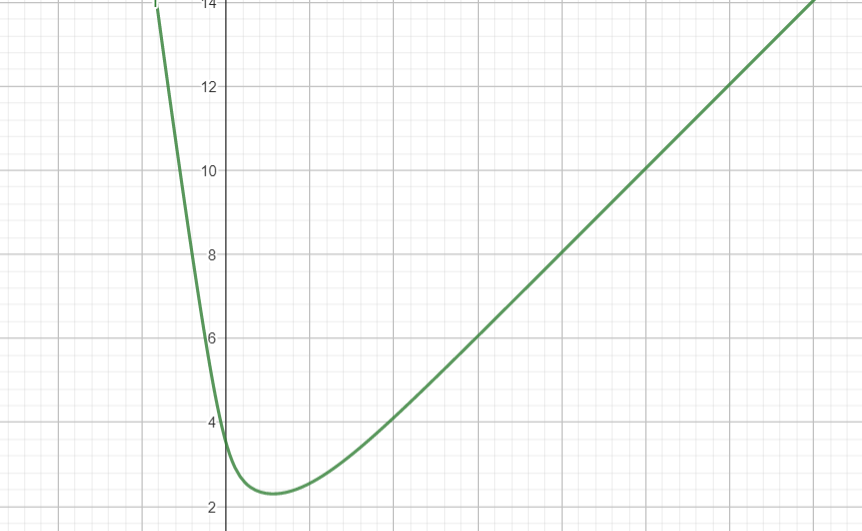

In [11]:
#@title Base64 Image, execute too show
base64_data = "iVBORw0KGgoAAAANSUhEUgAAA14AAAITCAYAAAAXac30AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAKZhSURBVHhe7d0HfFzFuTf+ZyVZvbnIRcWSe5ewLQkXwARCS+gBQiAGTAwYg9/cm5ty87/hTfK+Nz03yU3yJjekNzqYXkIo7t1GbrhbxV0u6r389xnN0a7slbxzZqQ9e/b3zWfC7BxvmTkzZ/TsOTvH0+lFvWhra6P6+npKS0uTJeqqq6spKSmJYmJiZIkafv/o6GiKj4+XJeqqqqqopKSEFixYIEvU6daDNTU1UXt7u3gdO0zsD6bbpqWlpaI9CgoKZMnFPbX+GfrBmz+iX9/3SyocU0idbR0UFxcnt9qjW49g98e5c+fo3//93+lf//VfRf4nP/kJPfnkkzR48GCxnYeQx+Ohn/70p2If5ebm0oYNG+g///M/KSEhQfybvixcuJCKi4tp2bJlskSdW8aqiXqsWLFC9M309HRZos4tY1W3HiaOnSzU9bBgPvJxQh83UQ8785E/t4xVi26bct/ktsjLy5Mlatw0VjEf+YTymNPQ3EDfeeP7dOD4AapvqKeUlBS6bOJ8WnLlwxQdFS3/VfBCPVaj5H8BBk7vsb4j8QHzl7/8JU2aNEkM1vNx0LV582Zav349LVq0iKKiMKwAAAAAdHDQ9d03fkCHKw9Tp/d/TCfocgLPypUr+/wr2Po23y7d55vAn4GTzh/ETqgHC6f25DNa48aNo6FDh/Y845U3mw5XlNKpIyflv3QurkNOTg5lZGSIb3o2btxIP/rRj8QZr9TUVNEG/E3Qo48+Ks5YzZ07l1588UVat26dOOPF3zQdOHCA6urq5Cte6Ic//CFNnjyZbr75Zllij27fcELfYrqfo6OjQzzfCePECe2pg+vAyS1fJjhhn5hoUyfUg+l+DhP1cFN7mqBbFxw/e0J7dgnF/mhub6bn97xEx+qOifdn04ZOpRvGXRe2QRfznD17ttfAi0+l8Sk1u6fTGJ/S49N5gc4UBIPfnw+osbGxskQd/9F76NAhys/PlyXqdOvBWlpaxCC0e3rTxP5gum164sQJamhooLFjx8qSwPg9EhMTadCgQRcEXifPnqTkQcnyX9qjW49g9wfvc75kkOvhH3hZlxryJYatra305S9/WXyeF154oTvw4uc1NzdTY2Nj94HjfEuXLqWZM2fSQw89JEvUuWWsmqjH9u3bRd9MTrbfv9wyVnXrYeLYyUJdDwvmIx8n9HET9Qh2PuqNW8aqRbdNuW/yvD1y5EhZosZNYxXzkc9AH3MaWhrpZ+//N5WdLZclRDOzLqE56cV0ScElssSeUI9Vj/fJvQZe/G09H9D4m327ampqxCC2e10ovz/vaJ3fA/EZCb5u+YorrpAl6nTrwfgPcB4A/Dp2mNgfTLdNy8rKRJte7A8H/29Hzg+89p84QFOzpsit9ujWI9j94V+P8wMv/r3GI488Qjt27OjuG/yaPChHjx5Nv/71r7v/IOgt8LrvvvvEb7wef/xxWaLOLWPVRD1WrlwprqnXuZ7dLWNVtx4mjp0s1PWwYD7ycUIfN1GPYOej3rhlrFp025QDBT528m+V7XDTWMV85DOQx5xGb9DFlxceOnWox+WFn73kTtq1Y1fYz0dR/EdlX4kFKg82mXg+C7Qt2GQJtC3YpPt8TpZA24JNus/nZAm0LZhkCbTNP11MoOeoJEugbcEkS6Bt/qkvfDD961//Slu3bhVBGadvfOMbdN1119Fzzz1HY8aMkf+y9/exBNqmknRfw8TzWaBtKkn3NSyBtgWbLIG2BZt0n8/JEmhbMMkSaFswyRJom0qyBNoWTLIE2qaSdF/DEmhbsMkSaFuwSff5nCyBtgWbQv18TpZA24JNus/nZAm0LZhkCbRNJem+hiXQtmCSJdA2laT7GpZA21SS7mtYAm0LNlkCbQs2hfr5nCyBtllJBF1veoOuyp5B1yNXPkQxUV1BX6DnqSRLoG3BJEugbcEkd1y4D2HnbP05mQtvPIj4dDWfcrYSX5LI36ZwOW8HAAAAgN6JhTQ46OIzXfIKofODLjdA4AUD4q7iO2nDE2tozrhL6Xj1cdp7fK/cEv74tDNfWggAAAAAajjo+t6bP+wZdE3wBl0L3BV0MQReMCBioqIpflA8VZytoGc3PE/vffy+3BJeCgsL6W9/+1uPe3LwDzX9A6/bbruNvve97wV1Dy8AAACASGUFXQdPHewZdPGZrmh3BV0MgRcMqCde+hZ9VF5C7R3tdLrutCwNH7wSDv8gs69LCK3LDAEAAAAgsEgLuhgCLxhQg6IHUUdn19mhytrwC7wAAAAAQE+goGv+hHn0sIuDLobACwbU6KGjZY4Dr0qZAwAAAIBI0FvQ9ciVD9MgFwddDIEXDKiMlGEyhzNeAAAAAJEkkoMuhsALBlRGSobMEZWdLpM5AAAAAHCzhpbIDroYAi8YULlDfXfDr2+ulzkAAAAAcCsOun72z/8OEHQ9FDFBF0PgBQMqOT5J5oj2uOheXgAAAABwIb688Cf/+BkdPH04QNA1SDyOFAi8YECNHuJbXMNa3RAAAAAA3IeDru+/9SM6UBnoTFdkBV0MgRcMqKT4RJnrgrNeAAAAAO7T2Nwogq6DJxF0WTz19fVdLRFAW1sbNTQ0UGpqqixRV1NTQ4mJiRQTY+/6TX5/viEt37TWLv4Me/fupaKiIlmiTrcerLm5mdrb28Xr2GFifzDdNj1y5AjV1dXR5MmTZYma/3zje7TvxD7xGZZd9RjNGj1TblGjWw/d/WHR7RuLFy+mwsJCWrJkiSxR55axaqIemzZtokmTJmm9hlvGqm49TBw7WajrYXFCHzfRprr1YE7o4ybqoTsfuWWsWnTbdM+ePZScnEzZ2dmyRI2bxirmIx87+6P7N12Vh8UVTh0dHVSUW0gPL1hMsTGx8l8Fjz+DG+ajKC/+v4CJPxinQNuCTbqvofv+VpKVtZ1MtAUn3bYI9WewksfjCVgeTEqJTxbPZ0eqjgb8N8Ekp7SF7n7httBpT066n4GT7mvovj8nE/VggcpVk25bmGqPQOUqyQnt6aS20HkdE5+Bk26b6tbDSrptofsZTNVD5/hp6jM46TV0Xkd3LuLkhHo44TNw0h3rVtJtC916qL5GU1sT/ey9n3uDrkPdPyuZM+ZSemDufRQfGx/wOcEkFqhcJem2BSed1/B0Wuf+AuAoub6+ntLS0mSJuurqakpKSrL9rQW/P1cwPj5elqirqqqikpISWrBggSxRp1sP1tTUJKJkfh07TOwPptumpaWloj0KCgpkiZpn1j9LL215WXyGBZOuoCWfeFhuUaNbD939YdHtGwsXLqTi4mJatmyZLFHnlrFqoh4rVqwQfTM9PV2WqHPLWNWth4ljJwt1PSyYj3yc0MdN1EN3PnLLWLXotin3TW6LvLw8WaLGTWMV85GPyv6wftPFlxdaQde8CfPo/ks/T9GeaNv1cMt81BU+AgygJL+VDSvrcBNlAAAAgHDHv+n6wVs/7hF0id902by80I0QeMGA81/Z8HQtAi8AAACAcGYtpHHg5IEeQZfd33S5FQIvGHAZyRkyR1RZWylzAAAAABBuRND1ds+ga96EuQi6AkDgBQMuI2WYzJFYXrTiTIV8BAAAAADhojvoOtEz6HpkwUMIugJA4AUDjldNykrPlI+I6prrZQ4AAAAAwgGCLnUIvCAkEuN8C2zsOYGbKAMAAACEC7GQxts/viDoehhBV58QeEFIZKdnyRxRXWOtzAEAAACAk1lB1/4T+y8IuuIQdPUJgReERJLfGa+ys/iNFwAAAIDTIejSg8ALQmJCxniZI6rHb7wAAAAAHC1g0DW+a/VCBF3BQeAFIZHsdxPl8jPlMgcAAAAATtPY0kvQdSUHXXHiMVwcAi8Iiez0bJkjMYBP1+FGygAAAABOw0HXj9/5CYIuAxB4QUhEeaIoITZBPuIbKSPwAgAAAHASvrzwFx/+ivb73xwZQZdtCLwgZEYPHS1zROWncbkhAAAAgFNw0PXDt/+LDlYeDPCbLgRddiDwgpAZnpIhc7iJMgAAAIBTWEHXvhP7Lgy6BiHossvT2traKfMXaGtro4aGBkpNTZUl6mpqaigxMZFiYmJkiRp+/+joaIqLs7+Tq6uraefOnTR//nxZok63Hqy5uZna29vF69hhYn8w3TYtLy8X7TF9+nRZosaqx7v7/knLt70iyorGFNIXP7lM5IOlWw/d/WHR7RsPPPAAFRUV0WOPPSZL1LllrJqox5o1a0TfTEtLkyXq3DJWdeth4tjJQl0PC+YjHyf0cRP1MDUfhftYtei2KfdNbovRo31XpKhw01iN5PmosbWR/uudn3qDrq7fdPH7615eqFsPt8xHHm9Feg28+IWbmpooKcm3Ap2q+vp6io+PF5W0g98/KiqKYmPtL1NZV1dH+/fvp5kzZ8oSdbr1YC0tLdTR0SFexw4T+4Pptunx48dFm06YMEGWqLHq8fHpPfQ/K58UZZNGTqKvXPMlkQ+Wbj1094dFt2888sgjNHv2bHr44YdliTq3jFUT9di2bZvom8nJybJEnVvGqm49TBw7WajrYcF85OOEPm6iHqbmo3AfqxbdNuW+ycfOUaNGyRI1bhqrkTof8UIa/JuuA5UHxPuyS7IKaNG8+ynJb0VqVbr1cMt85PE+uc8zXtz5dSJ1jlB5Z9v91oLfnweeziCuqqqi7du30xVXXCFL1OnWg/HO5gFgdxCb2B9Mt01LS0vFt1H5+fmyRI1VjyP1R+k7r31PlEV7oumvD/9J5IOlWw/d/WHR7Rv33XefOOO1bJnaGT9/bhmrJuqxcuVK0TfT09NliTq3jFXdepg4drJQ18OC+cjHCX3cRD1MzUfhPlYtum3KfZPPjOTl5ckSNW4aq5E4H4nLC9/5rx6rF84dP4c+e8ldNCRtcEiPOW6Zj6I8Hg9FQmKBypHsJRPtmTc0V7wOa+9sp6bWpoD/zu2JBSpHspfQnmYT2tN8QpuaTWhPcwltaTaFU3vy32A/+kfPJeM56OLfdMUPigv4nIFOLFB5OCUsrgEhkxTX89uCMtxIGQAAAGBA8eWFP3r7Jz0W0vAFXfbPGsKFEHhByHDkP3HkRPmIqB4rGwIAAAAMGCvo2ntib/dvuhB09R8EXhBSKfG+H5zijBcAAADAwEDQNfAQeEFI5QzJkTmiytpKmQMAAACA/tLj8kK/oOshBF39CoEXhNTwVN9NlCtrT8scAAAAAPQH/6CrvaNdlFlBVwKCrn6FwAtCKiPFF3iVn8WlhgAAAAD9BUFXaCHwgpDKSBkmc0R1TXUyBwAAAAAmcdD143d+emHQdcUXEHQNEAReEFL+Z7w6Ozu9B4P98hEAAAAAmGAFXXuP770w6IpNEI+h/yHwgpCK8kRR9uAs+YioraNN5gAAAABAV2Mrgi6nQOAFIZccnyJzhDNeAAAAAIZw0PX/PvyfHkHXnHEIukIFgReE3KRRvpso1zbVyBwAAAAA2MWXF/70H/9NByoP9Ai6Hl6AoCtUEHhByMVExcgcr2x4ROYAAAAAwI7u33T5LaSBoCv0EHhByE0cOUHmiCprcBNlAAAAALsCLaSBoMsZPNXV1Z0yf4H29nZqamqipKQkWaKuvr6e4uPjKTo6Wpao4fePioqi2NhYWaKurq6O9u/fTzNnzpQl6nTrwVpaWsTdwfl17DCxP5hum544cYJqa2tpwgRfwKTi/HqUnyun//P6d0SeF9t48vO/FvmL0a2H7v6w6PaNRx55hAoLC+mhhx6SJercMlZN1GPbtm2ibyYnJ8sSdW4Zq7r1MHHsZKGuhwXzkY8T+riJepiej+xySx/nvpmSkkIjR46UJWrcNFbDdT7i33T9asVvaN/JrjNdvGL0JVkFtPjyB20HXU445rhlPvJ4X6DXwKutrY0aGhooNTVVlqirqamhxMREionxXU6mgt+fd3RcXJwsUecNLmnXrl00b948WaJOtx6sublZDGR+HTtM7A+m26YVFRWiPaZNmyZL1JxfDz4wPPCHL4g8+95nvtNjpcPe6NZDd39YdPvGokWLqKioiJYuXSpL1LllrJqox9q1a0XfTEtLkyXq3DJWdeth4tjJQl0PC+YjHyf0cRP1MD0f2eWWPs59k9siJydHlqhx01gNx/mIgy7+TRcvVNbe2XWmqyivkO6eeRcNHzpcPLbDCccct8xHHm8k3GfgxVGuTofhhuJvC+zuLH5/biC7kSWrqqqikpISWrBggSxRp1sPxlE27yy7356Y2B9Mt01LS0tFexQUFMgSNYHq8djf/hedrTsr8v/75m/QlMzJIt8X3Xro7g+Lbt9YuHAhFRcX07Jly2SJOreMVRP1WLFiheib6enpskSdW8aqbj1MHDtZqOthwXzk44Q+bqIe/TEf2eGWPs59k9siLy9Plqhx01gNt/mosbmRfvyP8y8vvJQWzb+fOls7Qz5WdfuGW+Yj/MYLHMH/RsoVZytkDgAAAAD6wr/p+q93f3ZB0PXQgi9QYqze2UcwC4EXOELuEN9lDbXNdTIHAAAAAL0RQdc/fkZ7ju1B0BUGEHiBI/jfRJmXPgUAAACA3iHoCj8IvMARRvuf8WqqlTkAAAAAOB8HXT8JEHQtvgJBl5Mh8AJHSI73LbVacQa/8QIAAAAIxAq6Pg4QdCXFIehyMgRe4AiTRk6Uua7l5c/UnZGPAAAAAIAh6ApvCLzAEWKiYyhhkO/GfpW1p2UOAAAAALqCrv/uEXRdKoKuBxF0hQkEXuAYOUN9v/OqrK2UOQAAAIDI5gu6Pu4RdD0kgi69+6bBwEHgBY4xPNV3Ly+c8QIAAADwBl2tCLrcAoEXOIb/TZTLz5TLHAAAAEBk4qDrVx/+z3lBVzGCrjCFwAscIyNlmMzhJsoAAAAQ2fjywl++/yvac2LveUEXL6SBoCscIfACx/A/47UPN1EGAACACMVB10/58sLj/gtpIOgKdwi8wDFGDxktc0Rt7W3ioAMAAAAQSayga/cFlxci6Ap3nvr6+k6Zv0Bbm/eP38ZGSklJkSXqamtrKSEhgWJiYmSJGn7/qKgoiouLkyXq+DPs2bOHioqKZIk63Xqw5uZm6ujoEK9jh4n9wXTb9OjRo6I9Jk+eLEvU9FaPzs5OevDPD8lHRP/xqa/T+OHj5KML6dZDd39YdPvG4sWLRd985JFHZIk6t4xVE/XYtGmT6Js6r+GWsapbDxPHThbqelic0MdNtKluPZgT+riJevTXfKTKLX2c+ya3RVZWlixR46axGqr5iH/T9Wv+TdfxvdTW0Sbac1bOTPrCFQ9Sso2gyyljVbdv8Gdww3zkfe8o8QECpejo6IDlqsnU69hNHo/HqqxWCnU9Qv3+VuL25BRoWzCpt3pw+Ti/QKu+uT7gv3Ni0tk3Jvqnqb4R6j5m4v2ZTv80kULdjqaSqWOnk1Ko942pNnXDWOWk+zrcnjrj3S1j1T/p1Em3PU0mN/RxptKezW3NYiGN3cf3iKCLFebOpoWX3kupCSkBn3OxZKodQ70/uB1ZoG3hlDzeqK3PM1719fWUlpYmS9RVV1dTUlKS7SiZ3593dnx8vCxRV1VVRdu3b6crrrhClqjTrQdramqi9vZ28Tp2mNgfTLdNy8rKRHvk5+fLEjV91ePHb/+EtpZtE/m7iu6kW2fdLPKB6NZDd39YdPvGfffdR8XFxfT444/LEnVuGasm6rFy5UrRN9PT02WJOreMVd16mDh2slDXw4L5yMcJfdxEPfpzPlLhlj7OfZPbIjc3V5aocdNYHej5SFxe+O7Pe65eOLaYPn/pPRQfHW+7TZ0yVjEfdYmyvt1we2KBypHUkyXQNt3kfxPlU3WnAv4btyVLoG1I6gltaTahPc0ntKm5ZAm0DUk9WQJtQ1JPwbZlU2sT/fc/f0F7jvktpOENuhaLywuTAz4nEhMLVB5OCYtrgKOMSBkuc7iJMgAAALgbn+n62bs/p91HP+6+vLA76IpPFo/BPRB4gaP4LylfcaZC5gAAAADcBUFX5EHgBY4yzP8myk21MgcAAADgHl1B1y96BF3F3qBLrF6IoMu1EHiBo2T4BV68vPz+kwfkIwAAAIDw5wu6dvcIuvhMVwqCLldD4AWOEh0VTVmDM+Ujotb2VpkDAAAACG8IuiIbAi9wnJT4VJkjnPECAAAAV+Cgi1cv7Bl0FXmDrkUIuiIEAi9wnIkjJ8gcUU1jtcwBAAAAhCcr6Np15Pygi890pYjH4H4IvMBx0vzOeFWcPSpzzmXdjRwAAADgfAi6wIK/FsFxsodkyxzfy6tS5pwrMTERgRcAAABcoFHcHPmXtOu8ywt59UIEXZEHfy2C4wxP9d3Ly2mBV3l5OX3961+n6mrfJZDR0dH01ltv0VVXXdWd+DEAAABErpb2Fvrt6t95g65d1NbeM+hKRdAVkRB4geP430S5vaOdjp5zxuWGHHT927/9Gx06dIg6OjpkKYkg69lnn6Vf/OIX9Je//EX8lx8j+AIAAIhMfHnhqwfeoD0n9iLogm4IvMBxeEn5wUmD5SOiGgfcSJmDqM9//vPiskL/oKupqYlWr15NV155JU2ZMoWys7PFf/kxl/N2AAAAiBwcdP38n7+k8prynpcXXr4IQVeEQ+AFjuR/1mv/if0yFxp8WSEHXt/73vdo4cKFsrRLXFwcfelLX6I777yz+3de/N/k5GQRdPFNoAEAACAyWEHXzqO7qL2zXZR1B10JvsXDIDJ5vH9U9vqXYXt7u/jjMSkpSZaoq6+vp/j4ePE7GDv4/fkP2djYWFmirq6ujvbv308zZ86UJep068FaWlrE2RJ+HTtM7A+m26bHjx8X7TF+/HhZoiaYevxtw1P04b4VIn9z/o10c8FNIu9Ptx4X2x8xMTEisPJ4PHTmzBlKT0+nbdu20Y9+9CN68sknKS0tTQRWVp/g1+LPw5/r//7f/0upqan01a9+VfwbLmtr6/rW63xLliyhWbNm0cMPPyxL1LllrJqoB++jCRMmiODXLreMVd16mDh2slDXw4L5yMcJfdxEPQZiPgqGW/r4gQMHRFuMGjVKlqhx01i10zd4IQ3+TdfHx/dQa3srNTQ0iKDrwcsesB10uWWs6tbDLfORZ+3atX1+Jc9/NPIfnnaZeD7TfY3W1latAahbD2aqLqH+HDyI+TU4MLHrYvVYWb6aVlesEfnxQ8bRXVPuEHl/uvW42PO5nAOvzMxMGjZsmDjgbNy4sTvw4kF36tQp0a84yOLLEPk5vO2DDz6gH/zgB5STk0Nnz56lw4cPiz4YyPe//32aPHky3XrrrbLEnou16cWYeD7TeQ2m+zn4oDho0KCQ10W3Hkz3c5h4vu6xk4W6HhZ+HZ3XMPE5TLSpbj2YqbqE8vlsIOajYOi2p+7zLbp14S8I+fl2/8B2Sj1C8TlaOlrotf1v0MFzh7p/0zUhfTxdP+5ardULTdTFRHuaaEtm93X4+W6YjzzeaLzrFQLgAxpH6ykp9jtMbW2t+IPU7iBubGwUkSn/AWwXf4aPP/6YiouLZYk63Xqw5uZmESUnJCTIEjUm9gfTbdOjR4+K9uBgwY5g6rHz2C768Ts/Efncobn07Zv/t8j7061HMPuDBxZP6LzfOe8fePEZMJ6k+DX4D33+LL/73e9o+fLl9M1vfpMKCwtFGdeXDxbWYD3f4sWLxb/lM192uWWsmqgH7yP+nZ3Oa7hlrOrWw8Sxk4W6HhYn9HETbapbD+aEPm6iHgMxHwXDLX18z549oi2ysrJkiRo3jVWVvtHU0kQ/f+//0d5Te8WiYIzPdE2NmUyz82dr9S+3jFXdevBncMN85PH+Mdhr4MV/VPLpRb6kyi7+fQyf3rT7bRS/P+9ou6f0WFVVFZWUlNCCBQtkiTrdejA+vckDwO7pXhP7g+m2aWlpqWiPgoICWaImmHocriyl/+/Fb4h8THQM/fWhP4m8P9162Nkf/oHX4MG+BUCYFXQ98cQTNHv2bBGMBYN/N8YHkmXLlskSdW4ZqybqsWLFCtE3OTC2yy1jVbceJo6dLNT1sGA+8nFCHzdRj4GYj4Lhlj7OfZPbIi8vT5aocdNYDbZviN90eYOunUd29ly98PJFtG3jNlfMR0445rhlPsLiGuBIOX43UeYD2dn6s/KRM3HQxX/w//jHP1YKugAAACA89RV0YSENCASBFzgSn+VKGOQ7jVtZe1rmnOftt98WQdc3vvENmjRpEoIuAAAAl+Og6xfnBV1FYwvpQQRd0AcEXuBY2X5nvcrPlMucs/Dpd75Z8kcffUSPPvooXXfddXTNNdeIxJcO8nYAAABwDyvo2nFe0PWFyx+kNARd0AcEXuBYw1N99/KqdcBNlFl+fj794he/6L5Wmn+syvf3ev311+mPf/yjuOTQSv/xH/+h9WNWAAAAcBYEXaADgRc4lv9NlPedPCBzocU/xhw5cqRYEYfxf/lxbm7uBcn/3wEAAEB46wq6ftUz6BrDQdciBF0QFPxVCI41eshomSNqaWuROefhJU55hRsAAABwJ1/QtaNn0HUFB116q2JC5EDgBY6VmuC7TO/gqYMy5zx8P4c+7soAAAAAYQxBF5iCwAsca8KI8TLXdcaLD3wAAAAAA4X/9vilN+jqsXqhN+ji1QsRdIEqBF7gWLExsT2WlD9y7qjMAQAAAPSvxtauoIt/09Xa3irKrKArPRFBF6hD4AWOljUkS+aITtaclDkAAACA/sNB1+9W/xFBFxiFwAscbUTqcJlz9k2UAQAAwB2aWpro1x/8D+0+sfu8oOsBBF2gBYEXOJr/kvIVZypkDgAAAMA8Drp+8T5fXrjrvN90cdCVLh4D2IXACxxt9JAcmSOqcchNlAEAAMB9uoOuih0BznQh6AJ9npqaml7XweZ7EzU1NVFSUpIsUVdfXy9uOhsdHS1L1PD7801oY2NjZYm6uro62rdvH82aNUuWqNOtB2tpaRFLj/Pr2GFifzDdNj1+/Lho0wkTJsgSNSr1+PjEHvrxP34i8nExcfSre34h8ky3Hrr7w6LbNx555BGaPXs2Pfzww7JEnVvGqol6bN26lSZOnEjJycmyRJ1bxqpuPUwcO1mo62HBfOTjhD5uoh4DOR/1xS19fP/+/eLYOWrUKFmiJpzHalNrE/1uzR9o59FdIuji28TMyJxOi+bbv7zQLfORE445bpmPPM3Nzb0GXm1tbdTY2EgpKb77Kanim8smJCRQTEyMLFHD788NFBcXJ0vUeYNL2rVrF82dO1eWqNOtB/O2tdhZ/Dp2mNgfTLdNKyoqRHtMnTpVlqhRqUdNUw09/vcvykdET973a4of1NXZdeuhuz8sun3jwQcfpMLCQlq6dKksUeeWsWqiHuvWraNp06ZRamqqLFHnlrGqWw8Tx04W6npYMB/5OKGPm6jHQM5HfXFLH9+9e7doi5wc39UmKsJ1rHLQ9asP/kcEXW0dXZcXzhx9Cd15yR2UneFb5EuVW+YjJxxz3DIfebxP7jPwamho0Oow3FCJiYm2dxa/P0fYOhNddXU1lZSU0BVXXCFL1OnWg/HO4m8e+HXsMLE/mG6blpWViTbNz8+XJWpU6sHfON375H3yEdG3b/1m9/29dOuhuz8sun3jvvvuo+LiYnr88cdliTq3jFUT9Vi5ciUVFBRQWpr9H0C7Zazq1sPEsZOFuh4WzEc+TujjJuoxkPNRX9zSx7dv3y6Onbm5ubJETTiOVb688Jcf/LrH5YWFY2bT/XMX0qDOQZiPvJxwzHHLfBTl8Xior8QClQebTDyfBdoWbLIE2hZs0n0+J0ugbcEm3edzsgTaFkyyBNoWbAr2+fytxLjh48S/Z6dqT3Vvs/j/e5VkCbRNJem+hiXQNpWk+xomns8CbVNJuq9hCbQt2GQJtC3YpPt8TpZA24JJlkDbgkmWQNtUkiXQtmCSJdA2laT7GpZA24JNlkDbgk26z+dkCbQt2BTq53OyBNoWbNJ9PidLoG3BJEugbSpJ9zUsgbYFkyyBtqkk3dewBNrmn5pbm+n/BQi6viCWjO/6TVeg5wWbLIG2BZssgbYFm0L9fE6WQNuCSZZA21SSJdC2YJIl0LZgEhbXAMdLS/B9S4Ml5QEAAECXONP1/q9p+3lBV9d9urCQBvQPBF7geNlDsmWOA69KmQMAAABQ5wu6tl8QdA1G0AX9CIEXOB5uogwAAAAmIOiCUELgBY7X4ybKZ3ETZQAAAFDHQRf/puuCoOuyBxB0wYBA4AWO538T5dpG3EQZAAAA1FhBV0l5gKArabB4DNDfEHiB46Uk+O490dHZQQdPHZKPAAAAAPqGoAucAoEXOF6UJ4rGDh8rHxFVN1TLHAAAAEDvuoKu/+kZdOXNpkUIuiAEEHhBWIiL8d3oruLcEZkDAAAACMwXdJX0DLouf4CGIOiCEEDgBWFhnN8Zr1M1p2QOAAAA4EJNrQi6wHkQeEFYSE9IkzncywsAAAB6x0HXb1f9rkfQNVsEXfcj6IKQQuAFYcH/JsrlWFIeAAAAAuDLC3+3+g9UUrGjR9D1oAi6hojHAKGCwAvCwnC/myhjSXkAAAA4Hwddv/rgf2jH0Z0IusCREHhBWMhIGSZzckn5SiwpDwAAAF1E0PXhb+ijCv/LC2ch6AJH8TQ1NXXK/AXa29upoaGBUlJ891FSVVtbS4mJiRQdHS1L1DQ2NlJUVBTFxflWtVNVU1NDu3fvpjlz5sgSdbr1YM3NzdTR0UEJCQmyRI2J/cF02/TIkSOiTadOnSpL1Nitx9de+Dodrz4h8l+65l9oUsZErXro7g+Lbt948MEHqaioiB599FFZos4tY9VEPdavXy/6ZmpqqixR55axqlsPE8dOFup6WDAf+Tihj5uoR6jmo/O5pY9z3+RjZ3a27/J+FaGqR9dvun5PJRXbqaWthTo7O+mS7AL5my57QRfmIx8nHHPcMh9Ff/3rX/8Wd9BAqa2tjVpaWmjQoEEBtweTvIGd2FEejyfg9oslfn/GjRRoezCJP8OZM2do1KhRAbcHk3Trwam1tVXsLH6dQNsvlkzsD066bVpdXS1eY+jQoQG3XyzZrceGwxvpbP1Z8dmzB2dR7uBckbdbD939YSXdvvHqq6+Kvjl79uyA24NJbhmrJupx7NgxGjJkCMXGxgbcHkxyy1jVrYeJYyenUNfDSk7o4ybaVLcenJzQx03UI1Tz0fnJLX389OnToi34j/RA2y+WQlGPhpaG7qDLOtM1I3MGfa7wszQsZVjA5wSTMB/5khOOOfwZ3DAfebyRcK9nvHhn1dfXU1qab0U5VXxQTEpKopiYGFmiht+fKxcfHy9L1PFn2L59O11++eWyRJ1uPRh3Gv7mgV/HDhP7g+m2aVlZmWiP/Px8WaLGbj2eWv8MvbH9TZH/1Izr6db8W7Tqobs/LLp947777qPi4mJ6/PHHZYk6t4xVE/VYtWqV6Js6r+GWsapbDxPHThbqelic0MdNtKluPZgT+riJeoRqPjqfW/o4901ui9zcri82VQ10Pfjywl9/+JseQdesvFn02Zl3eoOuoZiPvJwyVnXrwZ/BDfORN+CLElGfmxNH6LKySAYStyenQNv6Mw1OShf7kR2tOhbw34RjClV7ujUxtKeZxO3IAm1DspfQpmYTjp9mUzi1J19S+JuVv6XtR/xXL5xFD152Pw1NHhLwOQOdGPqnmcTtyAJtC6skagEQBrIGZ8kc30QZ9/ICAACIRNaZro/KS0QAxjjoWiSCrqHiMYATIfCCsDEizbekPG6iDAAAEHkQdEE4Q+AFYSMjJUPmiNo62uiEXOEQAAAA3K8r6HoSQReELQReEDZiomJoVPpI+Yiopgk3UgYAAIgEvqDrIwRdELYQeEFYSU3wrcpzCDdRBgAAcD0EXeAWCLwgrIwfPk7miKobq2UOAAAA3IiDrv85L+jiJeMfQNAFYQiBF4SVwYm+JeWPVR2TOQAAAHAbK+jadl7QxWe6hiHogjCEwAvCiv+S8pV1p2UOAAAA3KSpFUEXuA8CLwgraQmpMkd0uu6MzAEAAIBbcND125W/Oy/omukNuu5D0AVhDYEXhBX/M15YUh4AAMBd+PLCP637qzfo8i0Z3xV08ZmuYeIxQLhC4AVhJTYmltKTfL/zqmmqkTkAAAAIZ+I3XSt+SzuO7kDQBa6EwAvCTkay70bKBysPyxwAAACEKw66fuMNuraVbaOWdhl05c6kB+Yj6AL3iH7iiSe+1dnZSYFSe3s7tbS0UGxsbMDtwaSmpiaKiYkhj8cTcPvFEr8/PzcqKirg9mASf4ZTp05RTk5OwO3BJN16cGpra6OOjg7xOoG2XyyZ2B+cdNu0qqqKmpubKSMjI+D2iyXdehw8dZAOewMuzmcPzqT8nPwL/k0wSXd/WEm3byxfvpwyMzOpqKgo4PZgklvGqol6lJeX0/Dhw7Vewy1jVbceJo6dnEJdDys5oY+baFPdenByQh83UY9Qz0dWcksfP3nypGiL1NTUgNsvluzWo7GlkZ788Le0lYOuthbxGjO9Qdf987t+0xXoOX0lE2MV85EvOeGYY+LYySnUY9VTU1PTKYOwC/DO4oomJSXJEnX19fUUHx9P0dHRskQNvz83DncYu+rq6mjfvn00a9YsWaJOtx6MdzbvLH4dO0zsD6bbpsePHxdtOmHCBFmiRrceyz96hV7f/oZoyxmZ0+hL1/6r3KJGd39YdPvGI488QrNnz6aHH35Ylqhzy1g1UY+tW7fSxIkTKTk5WZaoc8tY1a2HiWMnC3U9LJiPfJzQx03UI9TzkcUtfXz//v3i2Dlq1ChZosZOPXghjT+v/yt9VOH7TdfUEVPo83PupRFpw8VjVSbGKuYjHyccc9wyH3m8kVuvgRdHdQ0NDeKbD7u8gR0lJiaKyNAOfn9uILsVZNXV1bRjxw667LLLZIk63Xow3tm8s/h17DCxP5hum/I3ONymM2bMkCVqdOvBqxz9+O2fiLYclTaSfvK5H8stanT3h0W3b9x///1UXFxMjz32mCxR55axaqIeq1evFn0zLS1Nlqhzy1jVrYeJYycLdT0smI98nNDHTdQj1PORxS19nPsmHztHjx4tS9So1kNcXrjyd+fdHHkm3T7jNsrJyMZ85OWWsapbD7fMR1EcvfaV+MMFKg82hfr5nPg1WKBtwSYTn4OTU9ojUHmwiU/Rcgq0Ldik8xmGJg/p/gyn688E/DfBJre0JyfdzxHq51tJ93WYic/ihPYI9Wvwc1mgbSrJDW3BydRn0G1TE5+DU6jbw0Q9TBw/TXwOt7zGQLZna3sr/W71H6mkokTk+X1ny/t0ZaQMC/icYJOJtuSk+zrMCfs11M+3ks7r8HNZoG0qyURdtOohagEQRnosKd/eRserjstHAAAA4HRdC2n8jraWbfWd6eKFNC67zxt0+RbQAnAbBF4QdsSS8om+JeWrG7GkPAAAQDhA0AWRDIEXhCX/gzOvcggAAADOxkHXkyt7Bl28eiGCLogUCLwgLOUMyZY5osbWJpkDAAAAJ7KCri2lPYOuRQi6IIIg8IKwlJboWyGI7+kFAAAAzoSgC6ALAi8IS+OGj5M5onMNVTIHAAAAThI46LoElxdCRELgBWFpiN/iGkfPHZU5AAAAcIreg677aTiCLohACLwgLPkvKc8H83MN5+QjAAAACDUEXQAXQuAFYYmXlE9L8P3Oq7L2tMwBAABAKHHQ9duVv6etpdt6Bl3z70PQBRENgReErWFJQ2WO6MiZIzIHAAAAodLU2hV08Zmu5rZmUdYddKUOF48BIhUCLwhb2X6XG1Y1VsscAAAAhAIHXX9e9xcEXQC9QOAFYSs1IVXmiA5WHpI5AAAAGGh8eeGf1v6ZtlWU9Ai67kfQBdANgReErTHDxsgc0bl6LK4BAAAQCuI3Xat+T1vLev6mi4OuEQi6ALoh8IKwle63pPyxc8dkDgAAAAaKFXRtOcyXFyLoAuiLp6GhoVPmL9DW1kaNjY2UkpIiS9TV1tZSQkICxcTEyBI1/P5RUVEUFxcnS9TxZ/j444+puLhYlqjTrQdrbm6mjo4O8Tp2mNgfTLdNjxw5QnV1dTR58mRZosZUPapqq+l/Pfcvoi7sv+/+KaX5XX54Mbr7w6LbNxYvXkyFhYW0ZMkSWaLOLWPVRD02btxIU6ZM0XoNt4xV3XqYOHayUNfD4oQ+bqJNdevBnNDHTdTDKfORW/r4nj17KDk5mbKzs2VJ3/iSwj+v+yttKfMGXa1ddZieOU076HLCWMV85OOEYw5/BjfMR32e8fJ4PDKnx9TrhFqo6+GUdtT9HKbqERcTS+l+S8qfrquUuYHnlr7hlnqEmlvq4UboY2aYen/d1wn1851ooNqEg64/rfkzbSndIoIulp81gz5X+FkjZ7pCvW/c0jdM1cMt7RFqnvb29j7PeDU0NFBqavBnEc5XU1NDiYmJtqNkfn+OTOPj42WJuurqatq+fTtdfvnlskSdbj1YU1OTiJL5dewwsT+YbpuWlZWJ9pgxY4YsUWOyHt99+/t0+HSpePyFyxfRVVM+IfLB0N0fFt2+cf/991NRURE9/vjjskSdW8aqiXqsWrWK8vPzKS3NF5SrcstY1a2HiWMnC3U9LJiPfJzQx03Uw0nzkRv6+I4dO0Rb5ObmypLAePXC3638gzjTZf2m65LRBXS3N+gamjgk5PUwMVYxH/k44ZjjlvnI+95R4gP0ljjCDVQebAr18zlZUXqgbcEmE5+Dk1PaI1B5sMkp7cmvkT3YdzlETVNtwH/XV3JCezInfI5QP99KaE9fCvVr8HNZoG0qyQ1twcnUZ9BtUxOfg1Oo28NN7emW12AXe42W9hb6w+o/9VhIg4OuBy7rurzQCfUw8Rk4DUR7BpNC3R5OaE9+Lgu0TSWZqIvWa4haAISpNL9LDbGkPAAAQP+xznRtPryle8l4X9A1QjwGgN4h8IKwNnZYnsxhSXkAAID+gqALQB8CLwhrg5MGyxyWlAcAAOgPCLoAzEDgBWFtVNoometaYamqoUo+AgAAAF0cdP1+5R9pM69e6Bd0dS0Zj6ALQAUCLwhrcTFxlJbo+51XZe1pmQMAAAAdVtC1qXRz95LxVtA1Mg1BF4AqBF4Q9jJSMmSOqOJshcwBAACAXQi6AMxD4AVhb/QQ35Ly1Q3VMjdwrGVFAQAA3EAEXasCBV0LEXQBaMBfixD2Qr2kPN+ED4EXAAC4Af+OSwRdhwMFXSPFYwCwB38tQtgbO3yczBGd7ecl5Y8ePUo/+MEPqLa2VpYQDRo0SJQvW7aM7r77bpE++OADuRUAACA88M2RX9i+HEEXQD9B4AVhb4j/kvJV/bekPAdX3/72t+mjjz6itrY2WUpUV1dHP/vZz2jixIn0la98he655x767W9/Sx9//LH8FwAAAM7Glxe+vvcN2nl8Z3fQVeANuu5D0AVgDAIvCHtZ6ZkyR2Ky6I8l5T/88EN6/PHHqaGhoUfQxTZs2ECNjY10++230+zZs+naa6+luXPn0ssvv0zNzV2TFwAAgFNx0PWHVX+ijyv3iLNejIMuPtM1CkEXgDEIvCDsxQ3q3yXl+bLCN998kxYtWkR33XWXLPXhM1uZmZk0alTXPcX4N18LFiygsrIyampqEmUAAABOZAVdGw9v8gZdraIMQRdA//AcP368U+Yv0N7eTi0tLZSQkCBL1PGZgNjYWIqOjpYlaviMAS9cwL+jsYvPUlRUVNCkSZNkiTrderDW1lbq6OiguLg4WaLGxP5gum16+vRp0R45OTmyRE1/1OPH7/2ESs+WifJ7iu6meXlzRb4vF9sfvL9TUlLEqoWHDx8W9d2+fTv96Ec/oieffJLS09NFPb71rW/RtGnT6POf/7yoG3+mQ4cO0X/8x3+I34Px8/hyRO6HgXzxi1+kSy65RAR2drllrJqox969e0WbJyYmyhJ1bhmruvUwcexkoa6HBfORjxP6uIl6OHE+siNUfZwX0nixZDltrdgmAjBui0kZE+me4rtpVHrXl4kq3DRWMR/5OOGY45b5yLNz585eAy9+Yd5hOh2XPyDvKK6kHXxZF//hq7uzq6uradiwYbJEnW49GLdlZ2cnxcTEyBI1JvYH021T7vzcHmlpvrNMKvqjHst3vUJbjm0V5VePu4o+MXaByPflYvuD9zUPrKFDh4oAjB9v3LixR+DFZ7S+8Y1viEsL77jjDnFw43px4PW1r31NBF55eXlUWVlJZ86cka/c0xNPPEHTp0+nz372s7JEnVvGqol68B9i3Dd1XuNifeNinDJWdeth4tjJQl0PixP6uIk21a0Hc0IfN1EPJ85HdoSijze3N9Pre96kXSd3d19emJs8mq6bcC2NHmY/kHXLWMV85OOEYw5/BjfMR566uro+z3jxQY3/6LSLL9PiSN9uBTnK5h2t8+0Jfwb+1qGwsFCWqNOtB+MomweA3W8dTOwPptumx44dE+1h91uH/qjHS9tepte3vyHK87Pz6V+uXibyfQlmf/Dg5IMVDzDO+wdegwcPFp/BP/Di1+PPdPDgwe7Aa+zYseKAwSmQhx56SPTNRx55RJaoc8tYNVGPzZs3i76p8xpuGau69TBx7GShrofFCX3cRJvq1oM5oY+bqIcT5yM7BrqPN7U00R/W/Jm2Hy3xu7wwn4qHFFFuxmhx+bwdbhqrmI98nHDM4c/ghvnI443aeg28OCqsr6+3/U0S4+g0KSnJdmTI7887mn83Y1dVVRWVlJSI393YpVsPxmdHeADw69hhYn8w3TYtLS0V7VFQUCBL1PRHPTaXbqH/evunonxMxhj67mf+r8j3xc7+OD/w4sH3/e9/n1JTU8XiGxYOvP7zP/+TfvjDH1JGRoYsDWzhwoVUXFwslqO3yy1j1UQ9VqxYIfomn5G0yy1jVbceJo6dLNT1sGA+8nFCHzdRDyfOR3YMZB/nSwr/uPrPtPHQJpFnHHTdP28hnSo7JdqCr9Sww01jFfORjxOOOW6Zj+yfMwRwkCFJQ2SO6HjVcZnrf/ytyejRo8VS8/wtiGX//v3iIMffEAEAADhBX0GXnd90AYAaBF7gCpl+EwZPJv2xpHxv5s+fL37wuWbNGvGYg7C//vWvdM0112hfbgEAAGACgi6A0EPgBa4QPyi+X5eU7wuvWPTAAw/Q73//e7r33nvFJYOXXnopXXHFFeKMGAAAQCgh6AJwBvxVCK6RkeL7LdWRs0dkzqwpU6bQt7/97R4/UuVrhfms11e/+lWxNPy///u/0+c+9zntH2sDAADoChh05eTTfQi6AAYcAi9wjZzB2TJH/XapIQdTU6dO7fEDU15Cnn+kyT+g5UUyOF1sQQ0AAID+1mvQNX9hj0v0AWBgIPAC10j3u9TwYOVhmet/1tKiAAAAToGgC8B5EHiBa4zJGCtzRGfrz8pc/+M7MvRxVwYAAIAB1RV0/aVH0JUvgq7PI+gCCCEEXuAaQ5MGy9zALikPAADgFL6ga2OPoOt+EXTZuzEyAJiBwAtcI3Owb0LhyWYgl5QHAAAINZ77/rL2rwi6ABwKgRe4RiiXlAcAAAil5tZmenrzc7Tx8OYeQdd98xB0ATgFAi9wlYFYUh4AAMBJOOj645o/05ayLRcEXVl+V4MAQGgh8AJXyRmcJXNEVY3VMgcAAOBOVtC14eBGam5rFmUIugCcKfqJJ574lrUq2/mpvb1d3KMoNjY24PZgUlNTk7jnkcfjCbj9Yonfn58bFRUVcHswiT/DqVOnKCcnJ+D2YJJuPTi1tbWJZcf5dQJtv1gysT846bZpdXW1aA++V1Wg7RdL/VmPg6cO0p7je0XnThgUT5eOLe7xHP+kuz+spNs3li9fTllZWVRYWBhwezDJLWPVRD3Ky8tp+PDhWq/hlrGqWw8Tx05Ooa6HlZzQx020qW49ODmhj5uoh5PnI5Vkd3/w2a0/r/4LrfcGXZzn18jPmUEL594jVi8M9Jy+0smTJykuLo5SU1MDbr9YctNYxXzkS0445vBncMN85Kmtre11HWzeWY2NjZScnCxL1NXV1VFCQgJFR0fLEjX8/vxc7jB2eetI+/bto9mzZ8sSdbr1YLyzuU35dewwsT+YbpseO3ZMtMfEiRNliZr+rMfW8m30/z78tcjnDc2lJz79HyIfiO7+sOj2jYcfflj0zUceeUSWqHPLWDVRjy1btoi+yTe7tsstY1W3HiaOnSzU9bBgPvJxQh83UQ8nz0cq7OwPDrSe2fwcbTq8iZrkma4JwybQvZfeTTlDc8RjVdw3uS0yM+2dKXPTWDXRN9wyHznhmOOW+cjT2traa+DFUV1DQ4P45sOumpoaSkxMFJGhHfz+3ED8DYxd/I3Yzp07af78+bJEnW49GN9ol3cWv44dJvYH021T/gaH22P69OmyRE1/1uNw5WF64uVviTwvtvG7B34j8oHo7g+Lbt944IEHqKioiB577DFZos4tY9VEPdasWSP6Zlqab6EVVW4Zq7r1MHHsZKGuhwXzkY8T+riJejh5PlKhuj/48sI/rfkLbSr1X0hjBt064xYaO2KM7TblvsltMXr0aFmixk1jFfORjxOOOW6ZjzydfN6rF7yz6uvrtToMN1RSUpLtncXvzw0UHx8vS9RVVVVRSUkJLViwQJao060H49OkvLP4dewwsT+YbpuWlpaK9igoKJAlavqzHjwBLfr9YvmI6Gef+y8akTZCPupJd39YdPvGwoULqbi4mJYtWyZL1LllrJqox4oVK0TfTE9PlyXq3DJWdeth4tjJQl0PC+YjHyf0cRP1cPJ8pEJlf1hB1/qDG3oEXfybruSoZK025b7JbZGXlydL1LhprGI+8nHCMcct8xEW1wBXOX9JeSywAQAAbtFX0JXlt7gUADgTAi9wHf8l5Q9VHpY5AACA8IWgCyD8IfAC18n2m4DO1p2ROQAAgPDUFXT99YKgayGCLoCwgsALXCc90Xct9dGq4zIHAAAQfnxB1/oLgi7/LxoBwPkQeIHrjM0YI3NEJ6tPyhwAAEB4QdAF4C4IvMB1Mv3u1H+69rTMAQAAhA8EXQDug8ALXCcjeZjMEbW0t+CsFwAAhBUOuv68tmfQNSPbG3TNvRdBF0AYQ+AFrhMbE0sjUofLR1hSHgAAwocVdK070DPoum+eN+gaki0eA0B4QuAFrpTmt8AGlpQHAIBwgKALwN0QeIEr+S+wgSXlAQDA6ZrbOOj623lB13RaiKALwDUQeIErDU0aInNEx7CkPAAAOBgHXU9vfNYbdK07L+j6POUg6AJwDQRe4Er+KxueqMHiGgAA4Ex8eeFTG56mjaWbEHQBuBwCL3Al/8U1sKQ8AAA4EQddf1n7N9pwaOMFlxci6AJwHwRe4EoZKRkyR9TS1kKnak7JRwAAAKFnBV3rDq6nxguCrhzxGADcxdPY2Ngp8xdoa2ujhoYGSk1NlSXqampqKDExkWJiYmSJGn7/6OhoiouLkyXq+DN8/PHHdOmll8oSdbr1YM3NzdTe3i5exw4T+4PptumRI0eotraWpkyZIkvUDFQ9vvL816iyruts13986t9pwogJIm/R3R8W3b7xhS98gQoLC+nRRx+VJercMlZN1GPDhg2ib+q8hlvGqm49TBw7WajrYXFCHzfRprr1YE7o4ybqES7z0fn4N13P8G+6Dm0QZ7o6Ojpo8ohJ2kGXbpty30xJSaHsbHtn29w0VjEf+TjhmMOfwQ3zUVRnZyf1liyBtgWbLIG2BZN0nuufdF/HEmibStJ5DUugbSop1K9hCbRNJV3sNdIS07rzh0+X9thmpYu9RjDJEmhbMMkSaFuwyRJoW7DJEmhbMEnnuVayBNoWbNJ9vpV0XscSaJtKcsJr6D6fk5NegwXaFkzSea5/0n0dS6BtKknnNSyBtgWbLIG2qSSd17AE2qaSVF6DAy3+TddaPtPV0ijKpoycQnfOvoOyB2df8O9VkiXQtmCSznOtZOo1WKBtwSSd51rJEmhbsEn3+VbSeR1LoG3BJkugbSpJ9zV0n88p1K/h8UZtvhY9D0fJ9fX1lJaWJkvUVVdXU1JSku0omd+fI9P4+HhZoq6qqop27NhBl19+uSxRp1sP1tTUJKJkfh07TOwPptumZWVloj3y8/NliZqBqgffC+WdHf8Q+aunXkVfuHyRyFt094dFt2/cd999VFxcTI8//rgsUeeWsWqiHqtWraIZM2ZQerrvXm6q3DJWdeth4tjJQl0PC+YjHyf0cRP1CJf5yCIuL1z3N1p/cIMIuhhfXniXN+gamTIy5H18+/btoi1yc3NliRo3jVXMRz5OOOa4ZT6K8uL/c32SlUUykDwej0iBtjkpZSQP6/6sZ+rPBvw3Tkjh0p7hkjDWzSa0p/mENjWXwun42dreSn/b8HT3Qhr8ufNzZtDC+bx6YU7A5wx0wnxkNmGsm02uaE9RCwAXGpU+SuaIjpw9InMAAAADi890/XXd38V9uqwzXdOzp9Pn595Lo7GQBkDEQOAFrjUybYTMEVU1VMkcAADAwLGCrrXnBV0LOegaiqALIJIg8ALX8l9Svr2jncrPVMhHAAAA/Q9BFwD4Q+AFrhUbE9tjWd4zdWdkDgAAoH91BV1PnRd0TfMGXfcg6AKIUAi8wNWGJQ+VOaJjVcdlDgAAoP/4gq615wVdfKZrtHgMAJEHgRe4mv8CGydqTsgcAABA/0DQBQC9QeAFrua/wEZl7WmZAwAAMA9BFwD0BYEXuJr/AhtHzmFJeQAA6B/Nbc30t/UXBl1iyXgEXQDghcALXC1ncLbMEVXVV4lvIwEAAEzioOuZjc/Rmv0XBl25CLoAQELgBa6WnpQuc11Lyh+rxgIbAABgDn+h99zm52ndofUIugCgTwi8wNWio6J7LCl/ohoLbAAAgBkcdP1t/dO0/tBGX9CVxUHXPQi6AOACCLzA9fyXlMcCGwAAYIIVdK3Zv4YaW/2CrnkcdOWKxwAA/jzNzc2dMn+B9vZ2amhooJSUFFmirra2lhITEyk6OlqWqGlsbKSoqCiKi4uTJepqampo165dNHfuXFmiTrcezNvW1NHRQQkJCbJEjYn9wXTbtKKiQrTH1KlTZYmaga7H3zc8Te/s/IfIz58wjx654iGR190fFt2+8eCDD1JhYSEtXbpUlqhzy1g1UY9169bRtGnTKDU1VZaoc8tY1a2HiWMnC3U9LJiPfJzQx03UI1TzEf+m69lNz9EaeXNkbsspIyd7gy57lxc6pY/v3r1btEVOjr0bPLtprGI+8nHCMcct85Gnvr6+18Crra1NfEDdncUfLiYmRpaoMTF4+DPs2bOHioqKZIk63Xow3Z1lYn8w3TY9evSoaI/JkyfLEjUDXY81B9bS71b/QeSnjppCX7nu30Te5ASh0zcWL14sAq8lS5bIEnVuGasm6rFp0ybRN3Vewy1jVbceJo6dLNT1sDihj5toU916MCf0cRP1CMV8xEHXc5tf6PGbrgkZE+iuWZ+h8aPGi8eqnNLHuW9yW2RlZckSNW4aq5iPfJxwzOHP4Ib5yOPdIX0GXt7AjNLS0mSJuurqakpKSrK9s/j9OcKOj4+XJer4M+zYsYMuu+wyWaJOtx6sqalJfPPAr2OHif3BdNu0rKxMfPMwY8YMWaJmoOux48hO+v6bPxT55Lhk+s39vxJ53f1h0e0b999/vziQPP7447JEnVvGqol6rF69WvRNnddwy1jVrYeJYycLdT0sTujjJtpUtx7MCX3cRD0Gej7iywv/vv5pWnuw60wX44U0bi+4VVxeGO59nPsmn53JzbV3qaSbxirmIx8nHHP4M7hhPoriN3d74siWBdqGpJ64PT0eT8BtTkzjRowTn5dTfUs9tXW0Bfx3oUr8ubhNA21DUk8M7Wkm4dhpPqFNzaaBnI947nhm03PiTFdTa5N43+nZ0+XqhbkBnxNuCfOR2cTQnmaSW46dWFwDXC8lPpniYnynlI9jSXkAAFBgnelazQtpyDNd07KmitUL84ZhIQ0ACA4CL4gIo9JHyRwHXlhSHgAAgtN70HUvgi4AUILACyLCyLQRMocl5QEAIDgIugDAJAReEBEyUjJkjujgqUMyBwAAEBgHXU9teIbW7F+LywsBwAgEXhARsgf7lsY9XYczXgAA0Dsr6Fq9bw01tDSIMl/QlSceAwCoQuAFEWFU2kiZIzpRhd94AQBAYAi6AKC/IPCCiJA1xHfGiyfSmsYa+QgAAKBLb0HXvQi6AMAABF4QERJjEyk1IVU+4gU2KmUOAACg76BrDIIuADAAgRdEjGEpw2SO6MjZozIHAACRDkEXAAwEBF4QMXIGZ8sc0QncywsAALya2xB0AcDAQOAFEWNw0mCZI6o4d0TmAAAgUnHQ9dK2l3sEXVM56JrzOQRdAGAcAi+IGP73XTlRfVLmAAAgEvHlhc9ufI7WHVrfI+j6PAddGWPEYwAAkxB4QcTISPb9xut0Le7lBQAQqTjoenrDs7R6/xpqbO26OTKCLgDobwi8IGKMTPfdy4svL8GNlAEAIo8IujY+S6v2raaGFivomtJ1eSGCLgDoR576+vpOmb9AW1sbNTU1UXJysixRV1dXR/Hx8RQTEyNL1DQ2NlJUVBTFxcXJEnW1tbW0Z88eKioqkiXqdOvBmpubqaOjgxISEmSJGhP7g+m26dGjR0WbTp48WZaoCWU9vvLC17wB15mu/Ce/RGOGjrG9Pyy6fWPx4sVUWFhIS5YskSXq3DJWTdRj06ZNom+mpKTIEnVuGau69TBx7GShrocF85GPE/q4iXqozkfdv+na3/Wbrs7OTho3bJwIusZqBF1u6ePcN/nYmZXlu/elCjeNVcxHPk445rhlPvK+d5T4AIFSdHQ0eTyegNuCTfx8fp1A24JNus/nzyArazs5oR4m9oeVdD4LfwadzxHKegxJGiL6AjtSdTTgv1FNun1Dtz05mWhT3XpwMvF83XowE+0ZqDzYZKIeVtL5LLr14DqwQNtUUyjrYSUn9HETbeqEevDzdfu4iXrwawT7Odo62uiFLS92B11sSuZkunPWZ2j8iHEBn6OSdOqi2w5W0m1TlfYMlJxSD04mnq/TFpyY7ms4oR5O2B/8GVigbapJ57No18MbtfV5xqu+vp7S0tJkibrq6mpKSkqyHSXz+3MlOdK2q6qqirZv305XXHGFLFGnWw/G3zi0t7eL17HDxP5gum1aWlpKNTU1lJ+fL0vUhLIef1z9Z3p31z9F/rqp19Ids263vT8sun3jvvvuE9/gLFu2TJaoc8tYNVGPlStXir6Znp4uS9S5Zazq1sPEsZOFuh4WzEc+TujjJuoR7HzElxc+s/E5WrVvle/ywswp9Nmiu2h4QkbYj1WLbpty30xNTaW8PHsrOrpprGI+8nHCMcct81EUR5CRkFigciR7KVzbMyMlQ3x2drL2ZMB/M9CJBSpHspfQnmYT2tN8QpuaTRdrz5a2Fnp20/M9f9PlDbr4Pl18eWGg50RqYoHKkewltKfZ5Ib2xOIaEFFG+S2wUX62XOYAAMCNrDNdK/fymS65ZLxf0AUAMJAQeEFEyR3qu5fXufoqmQMAALfpDrrE5YX+QZfeQhoAAHYh8IKIMiRpsMwRtXe009GqY/IRAAC4RY+gq/n8oGuseAwAMNAQeEFEiY6KpuzB2fIR4V5eAAAug6ALAJwKgRdEnGEpw2SO6FTNKZkDAIBwx0EXL6ThH3RN8QZd94j7dCHoAoDQQuAFEWdUmv8CGxUyBwAA4cwKulbsXdkj6OKbI48bjqALAEIPgRdEnJHpI2SO6FzDOZmzj+9rwTfFAwCA0EDQBQDhAH8tQsTxv5dXxbkjMmcf34QPgRcAQGi0trci6AKAsIC/FiHijPO7zr+2qVZ8U6qD72D+l7/8hb74xS+KxPmWlha5FQAA+ktLewu9d+j9AEHX3Qi6AMBxEHhBxElNSKW4mDj5iOhE9QmZs+fNN9+kkpISuuqqq0TiPJcBAED/4S/N3vr4Hdp2vCRA0DVOPAYAcBIEXhCRRvotsHFcI/Cqr6+nt956i+bNm0c33nijSNdee60oO3nypPxXAABgkvWbrk0Vm6mprUmUIegCAKdD4AURyX+Bjcpa+/fy4ksKz549Szk5ORQdHS3S+PHj6cyZM1RXVyf/FQAAmMJB13ObXqCVe1dRY2ujKJuSOZnuQdAFAA7nKS0t7ZT5C3R0dIg/LHnxALuampooNjbW9uID/P78XF45zi7+DCdOnKC8vDxZok63HqytrU20Kb+OHSb2B9Nt06qqKtEeI0f6zhqpcEI9Xtn5Gn14YIXIz8qZSQtn3yvywUpKSqL09HRRl29+85uiLR599FGxb5955hn68MMP6bvf/a74dxyY8WftzZe//GUqKCighQsXyhJ1bhmrJurhPaaJ/aHzGm4Zq7r1MHHsZKGuh8UJfdxEm+rWgzmhj9upBy+k8c+D79PaQ+uovrle/MY2OzmLbrvkVhpvI+hyy1i16PYN7pvcFjy/2eGmsWqib7hlPnLCMYc/gxvmI8++ffv6DLz4Dey+OOMKcuXs7ix+f4/HI84k2NXc3CzOQGRmZsoSdbr1YDxBdHZ22t7ZJvYH023T2tpa0R5Dhw6VJWqcUI8dx3fQX7c+JfI56Tm0bP5SkQ9WamqqqD/vy71799Lzzz8vLi3kz5KdnU2f/OQnacaMGeIznjp1ShwwevP1r39d/Nt77rlHlqhzy1g1UY9jx46JfRMX5/sdnyq3jFXdepg4drJQ18OC+cjHCX1ctR68kAb/pmvrsW3dlxdmp2TTlTlX0Iy86eKxKreMVYtu3+C+yW2RkpIiS9S4aaxiPvJxwjHHLfORp66urtfAi1+8sbGRkpOTZYk6vtwqISHBdgX5/XlH63RaDhT4j+PCwkJZok63How7DQ8Afh07TOwPptumR48eFe0xadIkWaLGCfUoPV1K33rt/4p8UlwS/b97fi7yweIBxwexhoYG+u1vf0uDBw+mYcOGiW2nT5+m8vJyevjhhykjI0McsLjOvXnooYdo9uzZtGTJElmizi1j1UQ9Nm/eLPqm3T8cmFvGqm49TBw7WajrYcF85OOEPq5SD7688PnNL9K6w+t7XF64IPtySotKC+v5iDmlj3Pf5LbIysqSJWrcNFYxH/k44ZjjlvnI443aeg28OCrkxQPS0tJkibrq6mpxuZXdyJDfn3e0zilSvjSOV5pbsGCBLFGnWw/GZz14APDr2GFifzDdNuVT59wefHmcHU6oB1+i8uDvHxJ5HoC/uf9XYrVDVatWraKnnnpKXC44blzXZS4HDx6k73znO3TvvffS1VdfLcr6wpcYFhcX07Jly2SJOreMVRP1WLFiheibdi+VYW4Zq7r1MHHsZKGuhwXzkY8T+niw9bB+08VLxvOxm3X9putzFNMQHfbzEXNKH+e+yW1h93IuN41VzEc+TjjmuGU+sn/OECCM8VmulHjfN1B2F9jgywsTExN7nPrmPJ8BO3funCwBAAA7+gq67PymCwAglBB4QcQaluz7jdqhykMyp2b69Oni0sJt27bJEhL5w4cPa/8AFAAgklmXF/oHXZNHTabPXXo3gi4ACEsIvCBijckYI3NEp2oqZU7N2LFjxaIYL774In3pS18SifOLFi2iyZMny38FAAAqrKDrwz0regRdvGT8hBHjxWMAgHCDwAsiVkZyhswRnaixdxNlXmDjE5/4BN1+++101VVXicT56667TvvH2gAAkQhBFwC4FQIviFgjUofLnDfwqj4pc+r4x6bz58+nG2+8USTO6yzbCgAQqVpaWxB0AYBrIfCCiDUybYTM8eIa9i41ZLw0Ka9wAwAA9nHQ9dzmFxB0AYBrIfCCiDUsueu+W4wvbTl67qh8pIaXau3jrgwAAHARCLoAIBIg8IKIFRcTR6PSRspHRJU19paUBwAA+wJfXjjJG3R9FkEXALgKAi+IaP5nvY7bXGADAADsaWnrCro+2PPheUEXn+maIB4DALgFAi+IaCNSfb/zKjtdJnMAANDfOOh6cctLCLoAIGIg8IKI5h94na0/J3MAANCf+PLCV7a/Rh/2uDkygi4AcDcEXhDRhiUPlTmi8jPlMgcAAP1FXF645UVafWBNj6Drcwi6AMDlEHhBRBszNE/miKobq8UfBAAA0D+6f9P18YfU0NIgyqygayKCLgBwuegnnnjiW7wUdqDE9yZqaWkRN4MNtD2Y1NTUJG4w6/F4Am6/WOL35+dGRUUF3B5M4s9w6tQpysnJCbg9mKRbD0687HhHR4d4nUDbL5ZM7A9Oum1aXV0t2iMjIyPg9oslp9SD98egqEH0zu53qa2jTQyIS8cWU0p8SsB/31vS7RvLly+nrKwsKiwsDLg9mOSWsWqiHuXl5TR8+HCt13DLWNWth4ljJ6dQ18NKTujjJtpUtx6cQtHHm9ua6cVNL9H7/Juupnrx/iLouvSzNH74+IDPuVhy03zkhD5+8uRJiouLo9TU1IDbL5bcNFYxH/mSE445/BncMB956urqer0BEe8svjlscnKyLFHnfX1KSEig6OhoWaKG35+fyx3GrtraWtq7d6/4w9Yu3Xow3tncpvw6dpjYH0y3TY8dOybadNKkSbJEjVPqYe2P7737Qzpy7ogoW3zZgzRv3FyRD5Zu33jooYdE33zkkUdkiTq3jFUT9di8ebPomykpKbJEnVvGqm49TBw7WajrYcF85DPQfZzPdL26/XVasc/3m668wbl0V+GdNDnT3lzC3DYfhbqPc9/kY2dmZqYsUeOmsWqib7hlPnLCMcct85HH+wK9Bl4c1TU0NIhvPuyqqamhxMREERnawe/PUWl8fLwsUcffiO3atYvmzZsnS9Tp1oNxtM5RMr+OHSb2B9NtU/4GhwfAtGnTZIkap9TD2h9/3fR3Wr1/jSi7o/AzdMslN4l8sHT7xqJFi8SB5LHHHpMl6twyVk3UY+3ataJvpqWlyRJ1bhmruvUwcexkoa6HBfORz0D2cb5B/QtbXqKV+1Z1X144adQkumnqp2hazjSterhtPgp1H+e+yUHC6NGjZYkaN41VzEc+TjjmuGU+8nTyea9e8M6qr6/X6jDcUElJSbZ3Fr8/R6Y6g6eqqopKSkpowYIFskSdbj0Y7yyOkvl17DCxP5hum5aWlor2KCgokCVqnFIPa3+8tvMNemXbq6Jszrg59MVrHhf5YOn2jYULF1JxcTEtW7ZMlqhzy1g1UY8VK1aIvpmeni5L1LllrOrWw8Sxk4W6HhbMRz4D1cf5TNcLm1+i9z/+oPtMFwdd91x6N41IGK5dD7fNR6Hu49w3uS3y8ny/f1bhprGK+cjHCccct8xHWFwDIl7uUN83e9YlhwAAoKe3oIt/0zVxJBbSAIDIg8ALIt7w1AyZIzpde1rmAADArr6CrkkjJ4rHAACRBoEXRLyRaSNljqiptQnBFwCABgRdAACBIfCCiJcUl0RD/W6kfLb+nMwBAIAKDrpe3LJc3KfLF3RNRNAFAOCFwAvAa0jSEJkjKj9bLnMAABAsK+h6f/cHVNdcJ8q6gq67EXQBAHgh8ALwGu23wEbFWSywAQCgAkEXAMDFIfAC8MoZkiVzRJW1lTIHAAAXEzDo8gZbuLwQAKAnBF4AXhkpvpUNj547JnMAANCXXoOuORx0TRKPAQCgCwIvAK/swb4zXmfrz4o/JgAAoHcIugAA1CDwAvDixTViY2JFvq29jU5UnxR5AAC4EAddr+14A0EXAIACBF4AXjHRMTQidYR8RHS8+rjMAQCAPw66Xt72Cq3av7pH0HW3+E0Xgi4AgN4g8AKQRqX7bqRciZsoAwBcgIOul7a83HVz5BZ5ny4ZdE0ehaALAKAvCLwAJP8FNg5VHpY5AABgVtD13sfvU511c2QEXQAAQfM0NDR0yvwF2traqLGxkVJSUmSJutraWkpISKCYmBhZoobfPyoqiuLi4mSJupqaGtqzZw8VFxfLEnW69WDNzc3U0dEhXscOE/uD6bbp0aNHRXtMnjxZlqhxSj3O3x/rD22g/1nxpMiPzRhL//vG/xD5i9HtG4sXL6bCwkJasmSJLFHnlrFqoh4bN24UfTM1NVWWqHPLWNWth4ljJwt1PSyYj3xU25SDrtd3vEnv7/mA6prqqLOzk/KG5Iol4yePsjcXmKiHW+cju3TblPsmt0VWlm/BKRVuGquYj3xCccw5n1vmoyiPx0ORkFigciT1ZAm0LZyT/2+8TtacDPhv+iNZAm1DUk9oS7MJ7Wk+hVubtra30isfvdp1pssbdLEJIybQ7ZfcSlMypwR8zkAlS6BtSOrJEmgbknpCW5pNrmjP9vb2Ps94NTQ0aEXqHKEmJibajpL5/aOjo7W+taiurqbt27fT5ZdfLkvU6daDcZTsbW/xOnaY2B9Mt03LyspEe8yYMUOWqHFKPc7fH/XN9fTwnx8Vefbze35KQ5OHyke90+0b999/PxUVFdHjjz8uS9S5ZayaqMeqVasoPz+f0tLSZIk6t4xV3XqYOHayUNfDgvnIJ9g25TNdy7e+IoIuPkayiSMn0J2z76DslKyQHnOYW+cju3TbdMeOHaItcnNzZYkaN41VzEc+A3nM6Y1b5qMoPt3WV+LoLFB5sMnE8028hqys7aT7GTiZqkugcpWk+zn4uW5oz/Ofn5KQ4g20hoi6sXMNVT3+fW9Jty5M9zU46b6Giec7oR4m2tNEXUy1hc7rmHg+C7RNJYW6HlbSfQ0Tn4Ofr9umptriYq/T1tFGr3z0mri80Aq6rpy8oPs3XSbaIlC5SuLXYIG2BZtMfQ6d19F9vpV0X4O5oR5O+Ry67cnJRF1C/XxOuvXg57JA21SSic+h83wsrgHgZ0iS7wxX+dkKmQMAiCzWma5/7n6v+/JCDrpumXkTTbH5my4AgEiHwAvAz+ihOTJHVIHACwAiUF9B18g03203AABADQIvAD85Q7JlDvfyAoDIEyjoWjD5CroZQRcAgDYEXgB+/O/ldfTcUZkDAHC/3oKuW2beTKMQdAEAaEPgBeAna7Dv3iVn68+KP0QAANwOQRcAQP9D4AXgZ2jSEIqNiRX5tvY2Oll9UuQBANyKg66Xt77aM+iahKALAMA0BF4AfmKiY3rcSPlY9XGZAwBwHyvoenf3P3sGXbMQdAEAmIbAC+A8o9J9f2xggQ0AcCsEXQAAAwuBF8B5/BfYOFx5WOYAANyDg643drx5XtB1uVgyHkEXAED/QOAFcJ4xGWNkju/ldUTmAADcgYOu17e/QR/sXXFe0HUzjUofJR4DAIB5CLwAzjMydbjM8aWGlTIHABD+xOWF216l9/Z8QHXNCLoAAAYSAi+A8/gvrtHU2kRn6s7IRwAA4csKut7ddf7lhQi6AAAGgqepqalT5i/Q1tZGjY2NlJKSIkvU1dbWUkJCAsXExMgSNfz+UVFRFBcXJ0vU1dTU0O7du2nOnDmyRJ1uPVhzczN1dHSI17HDxP5gum1aUVEh2mPq1KmyRI1T6tHX/viXZ/6NzjWcE/mvXf8Vmpo5ReQD0e0bDz74IBUVFdGjjz4qS9S5ZayaqMf69etF30xNTZUl6twyVnXrYeLYyUJdD0skz0ct7S305o636F25ZDy355wxl9LthbfSqDT1oMsJxxwWCfORCt025b7JbZGTkyNL1LhprGI+8jExVjEfdYniJ0dCYoHKkdRTZ2dXrB5om1vSyNQRop6c+Hdegf6NqcT4fQJtQ1JPLFA5kr2E9jSfBrpNm1qa6NVtr9E/dv6TahtrxfFm3tg5dMO062hEyoiAzwmXFAnz0UAmhvnIXGKBypHsJTe0p8cbCfd5xquhoUErUucINTEx0XaUzO/PkWl8fLwsUVddXU07duygyy67TJao060Ha2pqEo3Or2OHif3BdNu0rKxMtMeMGTNkiRqn1KOv/fHntX/1/pHyrshfM+2T9MD8+0Q+EN2+cf/994szXo8//rgsUeeWsWqiHqtXrxZ9My0tTZaoc8tY1a2HiWMnC3U9LJE4H1mXF77/8ftUKy8vvGLS5XT9lGspIzkjpH1cd3+wSJiPVOi2KfdNbovc3FxZosZNYxXzkY+JsYr5qEtUdHQ09ZX4wwUqDzaF+vmc+DVYoG3BJhOfg5NT2iNQebCJn+/xeAJuCzY5oR6cenuNzMGZoo6cztafDfhvrKT7Ofg9nNAeoX6+lXRfh7mhPTmF+jX4uSzQNpXkhrbgZOoz6LZpsJ+jsbWRXt/+Jn2w50Oqa64Xx5oFk6+gW2fdIo5xoW4PU+3p9vlIJem+hon5yAn1MPEZOOm+DnNDezihPfm5LNA2lWSiLlr1ELUAgB4yUobJHNHh06UyBwAQHs7WnaWnNjwjFtKobaoVZXymixfSyMRCGgAAIYHACyCAscN89/I6V3+uewUwAACn46DrmY3P0ap9qxF0AQA4CAIvgAAGJw2m2JhY+Qj38wKA8MBB17ObnqN1B9dTW3ubKLt84mUIugAAHACBF0AvhvvdSPnouWMyBwDgTFbQtfZAz6BL/KYLQRcAQMgh8ALoRd5Q36pOx6uOyxwAgPMg6AIAcD4EXgC9GJU+UuaIjlQdlTkAAGfpCrqeDxB04fJCAAAnQeAF0IuswVkyR1R2plzmAACcwxd0rQsQdGWKxwAA4AwIvAB6Mcrvm+IzdWdkDgDAGRB0AQCEFwReAL3wv5cX/1FzovqEfAQAEFpn68/RcxcEXfMRdAEAOBgCL4BeJAxKoJFpvt95lZ+pkDkAgNA513COnt/8Iq25IOjihTQQdAEAOBUCL4A+5AzNkTncywsAQo8vL3y55FVadxBBFwBAuEHgBdAH/8sND58ulTkAgIHHQRdfXrixdBOCLgCAMITAC6APY4aNkTlcaggAodMVdL3Q4/LCy7xB1y0IugAAwkZUR0cHRUJigcqR1FNnZ6dIgba5LQ1PyeiuL19qGOjf6KZIas+BSBjrZhPa03xSbdPTtafFma41+9dSa1urOF7MGzeXbi64iUaljgz4nEhJOH6aTWhPs0l1rCP1ndzQnp76+vpOUZMA2traqLGxkVJSUmSJutraWkpISKCYmBhZoobfPyoqiuLi4mSJupqaGtq7dy8VFRXJEnW69WDNzc2i0fl17DCxP5humx49elS0x+TJk2WJGqfUI5j9UdtUS//rmX+Vj4h+ctePaHDiYPmoi27fWLx4MRUWFtKSJUtkiTq3jFUT9di0aRNNmjSJUlNTZYk6t4xV3XqYOHayUNfDEo7zES+k8fJHr9Jav990zcqaKVYv9P8Nqion9HET82okzUfB0G3TPXv2iLbIyvLdx1KFm8Yq5iMfE2NVtx5umY883hfoM/BqaGjQ6jDcUImJibZ3Fr8/N1B8fLwsUVddXU27d++muXPnyhJ1uvVgTU1NYmfx69hhYn8w3TatqKgQ7TFt2jRZosYp9Qh2f/zLM18SSzezr13/FZqWNVXkLbp9Y9GiReJAsnTpUlmizi1j1UQ91q1bR1OnTqW0tDRZos4tY1W3HiaOnSzU9bCE23zElxc+v+VF2nBoI7V1dAVd8yfMo6vGXUljRowJ+/nIxLwaafPRxei26a5du0Rb5OTYC+rdNFYxH/mYGKu69XDLfOTp5HPKveCdVV9fr9VhuKGSkpJs7yx+/+joaK3BU1VVRSUlJbRgwQJZok63Hox3Vnt7u3gdO0zsD6bbpqWlpaI9CgoKZIkap9Qj2P3xn69+l3Yd2y3yiy67n66dfo3IW3T7xsKFC6m4uJiWLVsmS9S5ZayaqMeKFStE30xPT5cl6twyVnXrYeLYyUJdD0s4zUdn671B16YXaPX+tb7fdE3oWkgjOSpJqx7MCX3cxLwaafPRxei2KfdNbou8vDxZosZNYxXzkY+JsapbD7fMR1hcA+Aisgb7LrkoPVMmcwAA/aOvoCtrMBbSAAAIVwi8AC4id1iuzBEdrzohcwAA5nUFXS/2CLr48kL+TReCLgCA8IbAC+AihiUPlTmio1VHZQ4AwCxf0LWmR9B1mzjTZW+xAwAAcA4EXgAXkT3E9wdPbWMt1TXXyUcAAGYg6AIAcD8EXgAXMSRpCCXF+X5EWVl7WuYAAPRx0PUCgi4AANdD4AUQhIyUDJkjOlxZKnMAAHqsoGsVgi4AANdD4AUQhDEZvqV1y8+Wy1wXXpaU7wkBAKACQRcAQGTBX4sAQRg9xHczyfMvNeS7nyPwAgAV5+rP0QubX+oRdM2bMFcuGY+gCwDAjfDXIkAQ/C81LD3vUsNBgwbRBx98QN/5zndE+tOf/iTujA4AEEhdSx09v/lFWrVvdY+g67ZZt1I2gi4AANdC4AUQBP9LDfnyIGtlw9bWVnrllVdE4DVixAjKzs6mnTt30muvvSa2AQD4q2qoojVH13UHXbHRsQi6AAAiBAIvgCD0trJhRUUFPfXUU3TJJZfQAw88QPfffz9dc8019M4779CZM2fEvwEAYHx54as7XqfdZz7uDro+VXADgi4AgAiBwAsgSP6XGx47d0z8d//+/RQbG0tXXHEFxcTEiLI5c+bQ7bffTgkJCeIxAEDXb7pepPWHN1Bbhy/oumHGdQi6AAAiBAIvgCBlDc6UOW/gVdUVeJWVldH48ePFf7/73e+KtHz5crrqqqsoLS1N/BsAiGxW0LVSXl4YExXTHXSlJqTKfwUAAG7nOXDgQKfMX6Cjo0P8ToVXbbOrublZLD5gd9U3fn+Px9N9NsEO/gyVlZXi9zd26daDtbW1UWdnp3gdO0zsD6bbpjU1NaI9MjJ8Z4BUOKUeqvvjH3vepXcPvCfek3+T8W83/Cv9+Mc/pnXr1tHnPvc5qq2tFf9u165dNHHiRFq4cKE4G3b27FnRZr352te+Rvn5+XTvvffKEnVuGasm6nHkyBHRN3Vewy1jVbceJo6dLNT1sISij9e11tHK0lW06kDX6oVRnii6ZGgBfdobeNkNutwyH5moR6TOR73RbVMe79wWqan2+mY4j9XzYT7yccIxhz+DG+aj6Mcff/xb/AKBEu8sTtzQgbYHk9rb20UFWaDtF0v8/oxfI9D2YBI3UmNjIyUnJwfcHkzSrQcnrgv/125dTOwPTrptyp2f24MvpQu0/WLJKfXg5/N/g31+Q1sjbT++Q7ynt4RuyL+e1q5dS1VVVXTXXXfR1VdfTTNnzhTt8vTTT4szYVlZWdTU1CT6X6DX5PTee+/R8OHDafr06QG3B5NMtKkTxqqJenAAzPuA768WaHswiT8D/1enb+nWgxO/hk6b6tbDxLGTU6jrYaWB7uPnGqrote1v0KaKLdTe0U6DogbRgvFX0LT0qTRy6MiAzwkmuWU+MlGPSJ2Peku6bcrjnY+d/KVhoO0XS06ph+7+4MSvwQnzkTOOOW6ZjzzePwp7PeNlVTIlJUWWqLM6nd3Ikpfl5g6rE6nzN2K7d+8Wv72xS7cezJogEhMTZYkaE/uD6bYpLyjB7TF16lRZosYp9VDdHydrTtJXX/i6yA+KGUS/X/Qk/fxnPxePv/zlL4v/Mm6bf/u3f6Nrr72W7rjjDvEeXOfePPjgg1RYWEhLly6VJercMlZN1GP9+vWib9r9xpa5Zazq1sPEsZOFuh6WgezjB08dpA/2rKB1h9aL33QNih5En5pxPc3JuZTKD5ZjPvIyUY9InY96o9umPN65LXJyfPeuVBGOY7U3mI98nHDMcct85PFGX30GXvX19Vq/VamurqakpCTbO4vfnxsoPj5elqjjMxIlJSW0YMECWaJOtx6Mz3zwzuLXscPE/mC6bVpaWirao6CgQJaocUo9VPcHXyb0hT88TC3tLeLxj+76AW38cAN99NFH9MQTT3SfduYD1Be/+EVx6SCfBbsYviSxuLiYli1bJkvUuWWsmqjHihUrRN9MT0+XJercMlZ162Hi2MlCXQ/LQPXxg6cO0XObnqfdx/xWL8y/Xpwl72juwHwkmahHpM5HvdFtU+6b3BZ5eb5bqKgIt7HaF8xHPk445rhlPrJ/sSZAhImJjqGMVN/vCMrOlFFRUZEYxDt2dF2CyNasWSOCrzFjxsgSAIgUBysP0fObXqDtFTu6gy4OuDhhIQ0AgMiGwAtAQd7QXJnrWtlw1KhRdMMNN4gbKH//+98X6c0336Q777yTMjN9qyACgPuJoGvjC1RSsV08toIuPtuFoAsAABB4ASjITB8lc0RHvYEXn3a/8sorxW+0eIEMTnwD5ZtvvlnrEgcACC8IugAA4GIQeAEoyPS7l1fZmXLxX17Zhq855kUyON10000IugAiyKHzgi5eSOOG/OsQdAEAQA8IvAAU5Ppdanim9gy1trWKFW6s5UkBILJw0PXceUEXB1yfyrd/ny4AAHAnBF4ACoalDBV/WLHW9lY6WXtK3IwPgRdA5EHQBQAAKhB4ASjgP6yGpw6Xj4jKTpfJHABEEnF54aYXe15eOANBFwAA9A6BF4Ci3KGjZY7oeNVxmQOASGEFXR+Vl4jHVtD16QIEXQAA0DsEXgCKzl/ZEAAix+HTpQi6AADAFgReAIqyBmfJHFHpGVxqCBApeLwv3/ryeUHXdQi6AAAgKAi8ABRdsLJhe6t8BABudajyMC3f9gqVHPH/TRcHXZ9C0AUAAEFB4AWg6PyVDSvrTos8ALgTB13Pb3qBdhzdIR4j6AIAADsQeAEo4j+6/Fc2rDhXIXMA4DZW0OV/eeH1CLoAAMAGT2tra6fMX6CtrY0aGhooNdX+5FJTU0OJiYkUExMjS9Tw+0dFRVF8fLwsUVddXU07d+6k+fPnyxJ1uvVgTU1N4n5P/Dp2mNgfTLdNy8vLRXtMnz5dlqhxSj109scv3/81rT+4XuRvmHodffbSu2z3jQceeICKiorosccekyXq3DJWTdRjzZo1om+mpaXJEnVuGau69TBx7GShrodFtY+Xni6lF7a81B10pcSl0IIJl9MNBddTWqK9/oX5yMdEPTAf9aTbptw3uS1Gj/at3qvCKfXQ3R8M85GPE445bpmPPPX19b0GXu3t7eIDpqSkyBJ1tbW14sNFR0fLEjWNjY2igeLi4mSJOv4Me/bsEX/c2qVbD9bc3Cx2VkJCgixRY2J/MN02PXr0qGiPyZMnyxI1TqmHzv545aPX6OWPXhH5gsx8Wnb1Y7b7xuLFi6mwsJCWLFkiS9S5ZayaqMemTZtE39R5DbeMVd16mDh2slDXw6LSx3khjZf9ftOVnpBG1025luaOnUNpyfb/iDLRprpjlTmhj5uoB+ajnnTblPsmt0VWlm8RKRVOqQfmIx+njFXdevBncMN85GlpaYmIM167du2iefPmyRJ1Toj2nfLNHH/DyANg2rRpskSNG75h3HBoI/3y/V+J/LDEofSju35gu28sWrRIHEiWLl0qS9S5ZayaqMfatWtF38QZLzPfMOoeO1mo62EJto/z5YUvbn6JtsvfdA1OTKfbZt1Cs7NmU+ygWK0+jvnIx0Q9MB/1pNum3Df5D3Sc8cJ85M8Jxxy3zEeeTi+ZvwDvrPr6eq0Oww2VlJRke2fx+3OErTN4qqqqqKSkhBYsWCBL1OnWg/HO4m8e+HXsMLE/mG6blpaWivYoKCiQJWqcUg+d/cE3Tv7SM18R+Sjv/3636DeUEGfv24+FCxdScXExLVu2TJaoc8tYNVGPFStWiL6Znp4uS9S5Zazq1sPEsZOFuh6WYPr4hoMbacXelbSt/CPxON0bdN0+61a6csoCamlq0e7jmI98TNQD81FPum3KfZPbIi8vT5aocUo9dPcHw3zk44RjjlvmIyyuAWDDsJRhlBTXNejEyoa1lSIPAOGLg66XtiwPGHRZK5kCAADYhcALwAb+I4yDL8v+kwdkDgDCkRV0lZ/tWqUUQRcAAJiGwAvAprxhvksxys+WyxwAhBv+zeb5QRf/pgtBFwAAmITAC8Cm3KG+Hx9X1uImygDhSARdmy8Muj4x5UoEXQAAYBQCLwCbMvwuNSw7gzNeAOEGQRcAAAwkBF4ANuUNy5U5ojN1Z6i+uV4+AgCn23hoE7205WUEXQAAMGAQeAHYNCx5GCXG+e7jgMsNAcIDB10v8m+65JlqBF0AADAQEHgBaMhIyZA5otLTZTIHAE616fBmBF0AABASCLwANPhfbnjgFJaUB3CyreXbaPnWl3sEXbfOuhlBFwAADAgEXgAaJgwfL3NEx6qOyxwAOA1fXvjajtd7/KaLg66rpnwCQRcAAAwIBF4AGjLTR8kcB17HZA4AnMT6TdeRc0fFY74H311FdyDoAgCAAYXAC0BDZnqmzBFVN1RTVUOVfAQAodba1kof7lnRdXNkeXlh7rBcuqPodlxeCAAAAy6qo6ODIiGxQOVI6qmzs1OkQNsiLaXEp1BqfGp3mxyuPBzw3/WV0J5mE8a62RSu7dnc2kz/2Pkuvbj5JbHwDY+xnMHZdNslt9DMnEsCPmegUri2qRMTjp9mE9rTbMJYN5vc0J6e+vr6TlGTANrb26mxsZGSk5Nlibq6ujpKSEig6OhoWaKG35+fGxsbK0vU1dbW0p49e6ioqEiWqNOtB2tpaRFtyq9jh4n9wXTb9OjRo6JNJ0+eLEvUOKUeuvvD8v03f0h7Tu4lj8dDnyu+m66d+km5JTiLFy+mwsJCWrJkiSxR55axaqIemzZtEn0zJSVFlqhzy1jVrYeJYycb6Hq0trfSh/tW0Bvb36TqxhpRNnpwDl07+RqaM/7SkPZxzEc+JuqB+agn3TblvsnHzqysLFmixin1MDFWTfQNt8xHTjjmhOt8dD5PU1NTr4FXW1ub+IA6HYYbij9cTEyMLFHT0NAgGiguLk6WqKupqaHdu3fTnDlzZIk63Xqw5uZmsbMSE333flJhYn8w3TY9cuSIaNOpU6fKEjVOqYfu/rD8YeWf6MP9K4gDr3nj5tEjCxbLLcF58MEHxYHk0UcflSXq3DJWTdRj/fr1om+mpqbKEnVuGau69TBx7GQDWQ++vPAfu/9Jb+98h2qauoKu3KG5dPusW2lc+ljMR5IT+riJemA+6km3Tblv8rEzOztblqhxSj0wH/k4Zazq1iMc56NAPJ18TrkXvLPq6+spLS1Nlqirrq6mpKQk2zuL358bKD4+Xpaoq6qqopKSElqwYIEsUadbD+YNcsXO4texw8T+YLptWlpaKtqjoKBAlqhxSj1094flrW1v05/X/1UEXvwH3vfv/I7cEpyFCxdScXExLVu2TJaoc8tYNVGPFStWiL6Znp4uS9S5Zazq1sPEsZMNVD046HrXG3S9+tHr4jeXjG/5cEfhZ2h23izMR36c0MdN1APzUU+6bcp9k9siLy9PlqhxSj1MjFXMRz5OOOaE23zUGyyuAaApZ3COzBFV1laKP/4AYGBdLOgCAAAINQReAJqGJQ3tXh2toaVBBF8AMHAQdAEAQDhA4AWgKSE2gTJShslHRKVnymQOAPpbV9D1Xo+gi5eM/0zh7Qi6AADAURB4ARiQO3S0zBGVnUbgBTAQfEHXaz2Crju8QVdh3mzxGAAAwCkQeAEYMNov8DpadVzmAKC/1DfXXxB0XZJTgKALAAAcC4EXgAGZ6ZkyR1SGSw0B+lVVQxW94g24/IOuwjGz6TOFtyHoAgAAx0LgBWCA/6WGp2tPiz8MAcA8HluvbnuN3t7+To+gi890jR8xXjwGAABwIgReAAYMSx5G6Ym+e2QcO4fLDQFMs4Kuf+5+n1rbu27bYAVdfA89AAAAJ0PgBWDIqLRRMucNvKqOyRwAmFDdWH1h0JU3mz4zG0EXAACEBwReAIZkDvb9zmv/qQMyBwC6OOh6c8fbFwZdhbeL+3UBAACEAwReAIZM8Pt9SdnpcpkDAB18eeHr29+kD/etQNAFAABhDYEXgCH+lzudrjvd/UciANjDi2fwjZE/2Pshgi4AAAh7CLwADMlIGUaDogeJPN9jqLL2tMgDgLpjVcfFkvH/3P2euFFyTFQMzR03B0EXAACELQReAIYkxSXRMG/wZdl/Er/zArCD74X34uaXuoMu/kLjykkLxOqFCLoAACBceVpaWjpl/gJtbW3U0NBAqampskRdTU0NJSYmUkxMjCxRw+8fFRVF8fHxskRddXU17dq1i+bNmydL1OnWgzU1NVFHR4d4HTtM7A+m26bl5eVUW1tL06ZNkyVqnFIP3f1h8e8bv/nwt7T6wBpRft30a+nzc+4R+b4sWrSIioqKaOnSpbJEnVvGqol6rF27VvTNtDTf8v6q3DJWdeth4tjJVOpRfraCXt72Cm06vFk85jNdl42bTzdMu54yh/lWDrUD85GPE/q4iXpgPupJt025b6akpNDo0b57U6pwSj1MjFXMRz5OOOaEYj4KRLcenvr6+l4Dr/b2dvEBeRDaxQdE/nDR0dGyRE1jY6NooLi4OFmijj/Dnj17xB+3dunWgzU3N4udlZCQIEvUmNgfTLdNjx49Ktpj8uTJskSNU+qhuz8s/n3j3d3/pKc2PiPKZ2RNpy9d8y8i35fFixdTYWEhLVmyRJaoc8tYNVGPTZs2ib6p8xpuGau69TBx7GTB1qOCg66PXqWt5dvEY+tM1zWTrqbk2GSjY9UOE33cRJvq1oM5oY+bqAfmo55025T7JrdFVlaWLFHjlHpgPvJxylgNt/moN7r18LS2tkbEGa+dO3fS/PnzZYk6J0T7Tvlmjr9h5PaYPn26LFHj5m8Yt1fsoB++/WNRzjdU/uW9Pxf5vjzwwAPiQPLYY4/JEnVuGasm6rFmzRrRN3HGy8w3jLrHThZMPfjywpe2vExbyraKxxx0XT3lKrrpkk9TnCfO+Fi1w0Qfx3zkY6IemI960m1T7pvcFjjjhfnInxOOOQM5H/VFtx6eTi+ZvwDvrPr6eq0Oww2VlJRke2fx+3OErTN4qqqqqKSkhBYsWCBL1OnWg/HO4m8e+HXsMLE/mG6blpaWivYoKCiQJWqcUg/d/WHx7xu89PWjf3lcbiH6+b0/E4tu9GXhwoVUXFxMy5YtkyXq3DJWTdRjxYoVom+mp6fLEnVuGau69TBx7GQXq0fXb7qWd19eaAVdt8y6idIT0/tlrNphoo9jPvIxUQ/MRz3ptin3TW6LvLw8WaLGTWMV85GPE445AzUfXYxuPbC4BoBB/Eei/wIb/AclAPTuwKmDAYKuT3QHXQAAAG6BwAvAsAnDfTdSPnbumMwBwPm2lG7tEXSlJaTRTQWf9gZdNyPoAgAA10HgBWBYZrpv5bVSnPECCIiDrhc2v0QflX8kHnPQdfMlN9Kts25B0AUAAK6EwAvAsMzBmTJHdODkQZkDAMvWsm0i6Co9XSoeizNdl3yarpn2SRoU03UTcgAAALdB4AVg2PgRvksNK2srqbqhWj4CAA66nt/04gVB17XTrkHQBQAArobAC8Cw4SkZ4o9JCy43BOiCoAsAACIZAi+AfpA7zHcPlLLTCLwgsrW2t9Lag+vohR5BV6pYSANBFwAARAoEXgD9IHdorszxkvLlMgcQeTjoWrl/Fb209WU6LIOu0UNz6LbZt9K10xF0AQBA5EDgBdAP8ob5Aq/9pw7IHEBk4aDr/Y8/pDe2vyl+78g46Lp99m103fRrEXQBAEBEQeAF0A/G+93Lq7IGC2xA5OGg6wNv0PXy1leoqrGr/1tB16Vji8VjAACASILAC6AfDE/lBTZS5SO+3BC/84LIYQVdyznoaqgSZTlDshF0AQBAREPgBdBPcv0uNyzFAhsQIfjs7hslb/YIurIHZ9Mtl9yMoAsAACKap7W1tVPmL9De3k719fWUmur75l5VTU0NJSUlUXR0tCxR09DQIJ4bFxcnS9RVV1fTzp07af78+bJEnW49WHNzs2jTxMREWaLGxP5gum1aXl4u2mP69OmyRI1T6qG7Pyy99Y2nNz4r/gBlc8fPocc+8ajIn++BBx6goqIieuyxx2SJOreMVRP1WLNmjeibaWm+Jf1VuWWs6tZD9dhZ01RDb+54m97Z+Q9qbWsVZZfkFFBxbpEIupw6VoOF+cjHRB83UQ/MRz3ptin3TW6L0aN9K/OqcNNYNdE33DIfOeGYY+LYyUI9Vj3eD9Br4NXW1kaNjY2UkpIiS9TV1tZSQkICxcTEyBI1/P5RUVFag4c7zJ49e6i42P63rbr1YLyzOjo6xOvYYWJ/MN02PXLkCNXV1dHkyZNliRqn1EN3f1h66xvrDm2g36x4UuQzUjLoR3d8X+TPt3jxYiosLKQlS5bIEnVuGasm6rFx40bRN3UmGbeMVd16qBw7qxtr6J1d79C7H7/XHXTlZ+fT7TNvoRFJIxw9VoNloo9jPvIxUQ/MRz3ptin3zeTkZMrOzpYlatw0VjEf+TjhmGPi2MlCPVY93hfoM/DiyFA3Suao0O7OMvGtBX+GXbt20dy5c2WJOt16MN5ZOlGyif3BdNu0oqJCtMe0adNkiRqn1EN3f1h66xuVdafp3579inxE9Mt7/ptS/X73ZVm0aJE447V06VJZos4tY9VEPdatWyf6ps5ruGWs6tYj2GNnjTfoen37m/Tex++L33exmbmXeIOu2yh36OiQ18PihD4ebJv2RbcezAl93EQ9MB/1pNum3De5LXJycmSJGjeNVcxHPk445vBn0D12slCPVU+nl8xfgHcWn57UOUXKpwb59KTdncXvzw0UHx8vS9RVVVVRSUkJLViwQJao060Ha2pqEjuLX8cOE/uD6bZpaWmpaI+CggJZosYp9dDdH5a++saSPy8VZwLY1z/9VcrPyRd5fwsXLhTf4CxbtkyWqHPLWDVRjxUrVoi+mZ6eLkvUuWWs6tYjmGNn+dkKWr1vNb3td3nhzNGX0J1Fn6ExGWPE41DXw4L5yMcJfdxEPTAf9aTbptw3uS3y8vJkiRo3jVXMRz5OOOaYOHayUI9VLK4B0I/GDx8nc3w/r4MyB+AOHHS9tGV5d9A1KHoQzZ8wr0fQBQAAAF0QeAH0owkjJsicN/A6iRspg3tYQdeGgxu7g64rJy+gu4ruQNAFAAAQAAIvgH7kv6Q87uUFbuEfdDEr6Lp91q00PHW4KAMAAICeEHgB9CNeWMBSVV9Fp+vOyEcA4Wnn0V20fMvLPYOuSVfQbbNuofQk+79jAAAAcDsEXgD9aHDSYBqaPFQ+IjqAyw0hjH1UXkIvbH6J1h/cIB7zKp2fnHY13Tb7VtHXAQAAoHcIvAD62dTMKTJHVHoalxtCeOKg6/lNL9De43vFYw66bsz/FH1m9m0IugAAAIKAwAugn00YMV7miA5gZUMIM+2d7d1B16HKw6KMg65P599A18+4jpLi9JaNBgAAiBQIvAAM8Hg8Mneh3KG+BTZKT5d232AWwOla29toR+WuHkEXXzrLQdcNM66nQTGDRBkAAABcHAIvAE1RUVHdgRff4O+VV14R/7VkDc4UCxCw+uZ6OlF1QuQBnIy/IFh7aC2tO7q+O+jKGZJNt866BUEXAACADQi8ADQNGjRIBF58d/j33nuPnnzySTpzxrd6IV+KNTJtpHxEtA8LbIDDNbQ00Iq9q+iNHW9SXWudKMv2Bl28iMYnp16FoAsAAMAGBF4AmqzAa+/evfT2229TZ2en3OLjv8DGgVMIvMC5ahpr6K0db4v7dFU1VosyDrpu9wZdc8fNEY8BAABAHQIvAE18qeHx48dp+fLlNGHCBEpMTJRbfPwX2Nh97GOZA3AWDrre2P4WvbLtNTpXf06UjUnPQ9AFAABggKepqenCr+clvnSqsbGRUlJSZIm62tpaSkhIoJiYGFmipqGhgaKjoykuLk6WqKupqaHdu3fTnDn2/3DQrQdrbm6m9vb2gH+YB8PE/mC6bVpRUSHaY+rUqbJEjVPqobM/+AwX9wUOurxjiH7/+99TfX093XDDDfTtb3+bfvCDH9DYsWNFXTs6OuhkzUn66gtfl88m+uU9/00p8V31f/DBB6mwsJCWLl0qHtvhlrFqoh7r168XfTM1NVWWqHPLWFWpx1lvoPXB3g/orR3vdC8AM3HYBJqWNIVuvfpW8diuUI5Vf5iPfJzQx03UA/NRT7ptyn2T2yInJ0eWqHHTWMV85OOEY46JYycL9Vj17Nu3r9fAi/9g5B0WGxsrS9S1tLSIHcV/oNrR2tra/UeuXdxI/JubzMxMWaJOtx6M25IvQ+NL0+wwsT+YbpvyAOT2GDrUd2NgFU6ph939we+Znp5OgwcPFoN35cqV9MILL9CXv/xl8Zm+9rWvicArNzeXKisrqa6u6zcy//nP71JNc63If+HSRTRp2ESR//rXv04zZsyge+65Rzy2wy1j1UQ9jh07Jvqm7oTrhrEabD1ON56mDUc20dpD66i1rSvoGps+hj457ipK7EjUOnayUI3V82E+8nFCHzdRj0ifj86n26bcN7kt7P6R7qaxivnIxwnHHBPHThbqseo5ePBgn4EXf0CdDsMNxR8ulIOHz0jwH8B2v8FhuvVgJgaP7v5gum1aXV0t2mP48OGyRI1T6mF3f/B7DhkyRHyDdfLkSfrRj35E1157LV133XXkHU/dgVdeXp44SFiB19+3PUXbjpSI/GW58+jW/FtE/qtf/Srl5+fT5z//efHYDreMVRP14G/AMzIyKD4+Xpaoc8tYDaYeFWcr6J2P36U9Z7tujBwTHUNFeYU0L3cuDY5O1z52soGoRzAwH/k4oY+bqEekz0fn023TU6dOibZIS0uTJWrcNFYxH/k44Zhj4tjJQj1WPd4n93mpIV8+ZXcAMj4oJiUl2a4gvz+fVdDptLy0d0lJCS1YsECWqNOtB+NOw6cn+XXsMLE/mG6blpaWivYoKCiQJWqcUg/d/cFeeukl+vnPf0533nmnOA3Pgdbrr79ON954I91yyy00cWLXWS32Rsmb9Ld1T4n8xBET6du3/W+RX7hwIRUXF9OyZcvEYzvcMlZN1GPFihWib/JZSbvcMlYvVo/9J/eLSwvXHVgvHnPQtWDi5XTTzBtpROoII8dO1t/1CBbmIx8n9HET9cB81JNum3Lf5LbgLw7tcNNYxXzk44RjjlvmI/uhKwCIM1/XX3+9uNyFvynkwIsPcvxfHpz+/Fc2PFZ1jBpbGuUjgIFXUrGdXtj8UnfQlRCbIIKuzxTeLoIuAAAAMAuBF4CGK6+8kv793/+9Oz300EM0atQo8V++fNBf1uAs8cctq2uuo7Iz5SIPMNA46Hp+4wu0vWKHeJyakEI3zLhOBF2DkwaLMgAAADALgReAJj7lHIzYmFgaPdR3bTJf5gUwkNra22jV/jX0/KYX6GDlIVGWGs9B1/V0y8ybEXQBAAD0IwReAJr4kkL+8Srj67hvuummXq/n7nkj5YMyB9D/OOhauW8VPb3+GTp4qivo4ksKb8i/nj6Vf4P4YgAAAAD6DwIvAE38my5rjRpeNvb+++/vdWlj/8Br/8kD4o9hgP7GN0Z+7+MPxG+6rBsjZw/Ooltn3YygCwAAYIAg8AIwoI/FQXvIG5bX/Tsv/gP4eNUJkQfoL7VNtfTWjrfphU0vdgddY7z98LbZt9KVkxcg6AIAABggCLwABlByXDKNHuL7ndfu47tlDsC8UzWn6N2P36M3t78tFnRh+TkzRNA1b/xc8RgAAAAGBgIvgAHmf7nh7mMfyxyAWUfOHaXXSt6gf+x6l1raWkQZB113Fd1BRWMKxWMAAAAYOAi8AAbY+b/z6vQEd5kiQLC4Xy3f8jKt3L+KWtpbxI2RL5swXwRd44aPk/8KAAAABhICL4ABlpfR83derTGtIg9gwvYjO+jFzS/R2gPrxOOYqBi6fMJldM+cuxF0AQAAhBACL4ABxr/zyvH7nVdjbKPMAdjHK2RuLdtGz218QdwgmaXEp3iDrsvpzqLP4B5dAAAAIYbACyAE/C83bIhrkjkAe8SNkfetpmc2PkcH5f3h+MbI1079JN0+8xYEXQAAAA6AwAsgBPwDr6ZBzdTh/R+AHbWNtfTBng/FPboqzlSIsqzBmXT9jOtESopLEmUAAAAQWgi8AEJgjN/vvNqi26imvVbkAVRw0PXWznfE5YVn68+KMg66bpt1K3264FMUG417dAEAADiFp6Wlpdcl1dra2qihoYFSU1NlibqamhpKTEykmJgYWaKG3z86Opri4uJkiTr+DDt37qR58+bJEnW69WDNzc3U3t4uXscOE/uD6bZpeXk51dbW0rRp02SJGqfUQ3d/WOz2jf/z2ndo/8n9VFpaSrOHzqSf/etP5RZ1bhmrJuqxdu1amj59utZrhMNYPVZ9nNYf3EBvbH+ze7n4aZlTxUIa8yd0Het062Hi2Ml0+0aox6rFRB830aa69WBO6OMm6oH5qCfdNt21axelpKTQ6NGjZYkaN41VzEc+Tjjm8Gdww3zkqa+v7zXw4hfmD8iD0C4+IPKH40ra0djYSFFRUVqDhz/Dnj17qKioSJao060H453V0dFBCQldZzpUmdgfTLdNjx49Ktpj8uTJskSNU+qhuz8sdvvGqyWv0/JtL1NZWRllp2TTX770R7lFnVvGqol6bNq0SfRNnddw+lgtP1tBb+18WyymYS0XP2nEJLp91q00dtgY+a/062Hi2MnCfaxaTPRxE22qWw/mhD5uoh6Yj3rSbVPum9wWWVlZskSNm8Yq5iMfJxxz+DO4YT7q84yXE3aWicFjIkp2QqdzygRRUVEh2tTuN4yY6LqUni6lJ17+ljjjlZKUQs/+61NiFTo73DJWTdTD1DeMTh2rO4/uovc+fp82l24Rj3m5eL5H1ycmX0ljM3xBF9Oth6lvGMN9rFpM9HHMRz4m6oH5qCfdNuUzXnzszMnxrbyrwk1jFfORjxOOOW6ZjzydXjJ/AT49WV9fT2lpabJEXXV1NSUlJdk+Pcnvzzs6Pj5elqirqqqikpISWrBggSxRp1sP1tTUJAYAv44dJvYH021TDhS4PQoKCmSJGqfUQ3d/WOz2Db487F+f/jJt2blFPP97n/8OFY+1902OW8aqiXqsWLFC9M309HRZos6JY9VaLv61j16nA3LlQg7UZ+fNEsvFD0kaIsr86dbDxLGT6faNUI9Vi4k+jvnIx0Q9MB/1pNum3De5LfLy8mSJGjeNVcxHPk445rhlPsLiGgAhEhsTS/k5M+Qj6j6DAXA+DrpW719LT294tkfQdf30a3sNugAAAMBZEHgBhNAlOfkyR7Tr6G7xBzaAv9qmWnp393v0/KYX6ET1CVGWOTiTbiz4FN14yacRdAEAAIQJBF4AITRh5ASK6uwahrwceMXZIyIPwHjlwnc/fo+e2fBs93LxuUNH022zbqGbZ94kzpoCAABAeEDgBRBCfLYirtX3x/NHFSUyB5Gu7Ey5WCr+rR1vdy8XPz1rGt0++1axmAYAAACEFwReACGW2OxbGWd7xXaZg0jGKxe+tOVlWndovQi6eLn4ojGF9NniO6l4bLH8VwAAABBOEHgBhFhSk+8mfIcqD9OpmlPyEUQa/o3fuoPr6dmNz9PGQxtFWUp8Ms0fP4/umXM3jR8xXpQBAABA+EHgBRBisW2xlBTVFXzx2Y3Nh7G6YSTiRTRW7F1Jf1v3FB04eUCUJccl0yenXE13Fd1BI9NGijIAAAAITwi8AELM0+mhkbG+P6o3lSHwijSnairpnZ3v0jMbn6OzdV2LaGSmj6Lrpl1Dn8q/gYYkY+VCAACAcIfAC8ABRg3yBV6HTh2is/Xn5CNwO15E49Vtr4kbI9c11YmySSMn0q2zbqFPz/gUxUZj5UIAAAA3QOAF4ACDo9NpeEqGyPPlhlhkw/3491y7ju6i5Vtepvc+fr97EY3CMbPFpYWXT7xM/ksAAABwAwReAA4Q7YkWf3BbNpfickM3a2xtpLUH1olFNDb4LaIxb9xcumfO52hq1lRRBgAAAO6BwAvAIQrzCmWOaO+JfWKxBXCfc/Xn6J+73qNnNz1P++UiGoOTBtO1064Ry8WPwiIaAAAArhT9xBNPfKuzs5MCpfb2dmppaaHY2NiA24NJTU1NFBMTQx6PJ+D2iyV+f/FBo6MDbg8m8Wc4deoU5eTkBNweTNKtB6fW1lbq6OgQrxNo+8WSif3BSbdNq6qqqLm5mTIyMgJuv1hySj1094eVdPvG8uXLKTMzk66+4mpac2At1Tc3iMvOsgdnUc7g7IDPOT+5ZayaqEd5eTkNHz5c6zX6a6yWnymnf+z6J71e8mb377lyhuSIlQuvn34tJcUl9fj3oe7jJo6dnEJdDys5oY+baFPdenBywnxkoh6Yj3om3TY9efKkaIvU1NSA2y+W3DRW3T4fqSQnHHP4M7hhPvI0NDR0ik8QQFtbGzU2NlJKSoosUVdbW0sJCQniA9rB7x8VFUVxcXGyRF1NTQ3t2bOHiovt33hUtx6MJwfeWfw6dpjYH0y3TY8cOUJ1dXU0efJkWaLGKfXQ3R8W3b6xePFiKiwspCVLltBTG56hf+x+V5RPGjmJvn7DV0X+YtwyVk3UY+PGjaJv8h8Odpkeq/x7rv2VB+iDPR/QxsObRVlMVAyNHz6erpp8JRWPKRJl5wt1Hzdx7GShrocF85GPE+YjE/XAfNSTbpty30xOTqbs7GxZosZNY9Wt85EdTjjmuGU+8nhfoM/AyxuYaXUYbqjExETbO4vfnxsoPj5elqirrq6m3bt309y5c2WJOt16MI7WeWfx69hhYn8w3Tblb3B4EE6bNk2WqHFKPXT3h0W3byxatIiKiopo6dKltOf4Xvrh2z+mto42sZrd/7n1m5SZnin/Ze/cMlZN1GPdunU0depUSktLkyXqTI7VxpZG2lS62Rt0fUgHKw+J7fGD4qkor5A+4Q26xg8fJ8oCCXUfN3HsZKGuhwXzkY8T5iMT9cB81JNum+7atUv8gT569GhZosZNY9WN85FdTjjmuGU+8nTyea9e8M6qr6/X6jDcUElJSbZ3Fr8/nw7UGTx8KUJJSQktWLBAlqjTrQfjncWnfPl17DCxP5hum5aWlor2KCgokCVqnFIP3f1h0e0bCxcuFN/gLFu2TFxi+L9f/jaVnS4T2z4z+za6o+gzIt8Xt4xVE/VYsWKF6Jvp6emyRJ2psdriaaH1hzfQ2zv+0X1/Ll5EY8GkBXTDjOsuen+uUPdxE8dOFup6WDAf+ThhPjJRD8xHPem2KfdNbou8vDxZosZNY9Vt81Gox6puPdwyH2FxDQAHiY2JpbnjLpWPulY35BXwIPyUnSmjVz96nV7Y9FJ30DV6SA7dkH893ekNpnFTZAAAgMiCwAvAYYrHFotL0RjfXPdw5WGRh/DAv+fafmQHvbr9dfrn7ve67s8VFUNTM6fQbbNvpdtm3SoCbAAAAIgsCLwAHIaXE584coJ8RLRq3xqZA6fjWwCs2reant34HG0/ukOU8aWFc8fPobsvvYvm+J3NBAAAgMiCwAvAga6YdIXMEW0p3UqVtZXyEThVxdkKemv72/T0hmfFmUqWkZJB10z9pLg/14QRvmAaAAAAIg8CLwAHys+eLv5oZ3wWZTXOejmWuLSwYge9tOUVWr71le4bX4/LGEs3XfJpumXWzTQ0eagoAwAAgMiFwAvAgVLiU+iyifPlI6JV+9dQU2uTfAROwTdB5ksLn9rwNK0/uF6U8e/z+L5ctxTcTNdM+yR+zwUAAAACAi8Ah7p8wnxKjk8W+eNVx6mkYrvIgzPwoidvbn+r69LC075LC6+eehXdO/cemjLS3g1dAQAAwJ0QeAE41Kj0UXRJju/eNG+UvCUua4PQ4n2wtWwbvbj5pR6XFvJvuPjSwruK7qChSVgqHgAAAHpC4AXgYNdM/2T30vL7T+6ng6cOijyERmXtafpgzwr627qnaIs3+GLWpYUccOHSQgAAAOgNAi8AB5s4YgJN8Ftanm/Ii996DTw+y8WB72ve9v/bur+LSz9ZRsowunrKJ+i++Z+n6dnTRBkAAABAIAi8ABzuuunXdJ/14kvcOMHA4QU0Vu9fS89tepHe3fXP7hsiT8mcTDcW3Eh3Fd+JVQsBAADgohB4ATjc7NxZNCNnunzUddbrXEOVfAT96XBlKb214x16av3TtPPITlGWHJcsboR8d/FddO10XFoIAAAAwUHgBRAGbsz/FKUnpot82ekyWrl3lchD/6hrrqMt5VvFAhovbVnevYDGmIw8uiH/Orr70rto4siJogwAAAAgGAi8AMIA/5E/b/xc+YjEJW/Hq0/IR2BS6elSenf3P+npjc/SlrKtoowv9SwaU0ifmX073T77NlxaCAAAAMo8zc3NnTJ/gfb2dmpoaKCUlBRZoq62tpYSExMpOjpalqjh9+fnxsXFyRJ1NTU1tGvXLpo71/eHqyrdejBvW4s25dexw8T+YLptWlFRIdp02jR7iwk4pR66+8Oi2zcWLVpERUVFtHTpUlkSGC/o8F//+Bmdqj0lHov7RV36OfF7I7eMVRP1WLduneibqampsiQ49c31tO/Uflq5bxVtOrRZlEVFRVFmWiZNy5xCn8q/IeiAyy193MSxk4W6HhbMRz5OmI9M1APzUU+6bcp9k4+dOTk5skSNm8aqib5hdz7y55axqlsPt8xHnrq6uj4Dr8bGRkpO7rqJqx3e16eEhATbO6upqUn88RMba/93FNxh9u7dS4WFhbJEnW49WEtLC3V0dFB8fNdCCapM7A+m26bHjh0TbTpp0iRZosYp9dDdHxbdvvHQQw+JvvnII4/Ikt69t+cDenbTc9TW0Uax0bH0pWv+Rax86JaxaqIemzdvFn1TZZIpPVNG28q20eqDa+lcwznq7OwU7TstayrNHTeHCrLzxeNguaWPmzh2MreMVRN9HPORj4l6YD7qSbdNuW/ysTMzM1OWqHHTWA3VfHQ+t4xV3Xq4ZT7yeHdIr4FXW1sb1dfXU1pamixRV11dTUlJSRQTEyNL1PD7847WGcRVVVW0Y8cOuvzyy2WJOt16MN7ZPAD4dewwsT+YbpuWlZWJ9sjPz5clapxSD939YdHtG/fddx8VFxfT448/Lkt6x781+sk7P6O9J/aJx7NzZ9LSqx+lQZ5B2m3qhLFqom+sWrWKZsyYQenpXb+J68u5+irac3wPrT24jraUdl1WyDLTM2nKyMl0Q8H13vwoWRo8t/RxE8dOFup6WDAf+ThhPjJRD8xHPem26fbt20Vb5ObmyhI1bhqrAz0f9cYtY1W3Hm6Zj7xBX5SI/NyeZGWRDCSPxyNSoG1I6kmlPdMS08QlbwmxCeI5W8s/oo2HNwX8t5GaghnrHZ0dtPv4bnpn1zv057V/FUv0c3tyu870BrM3F9xId8y6nbKHZAV8fiSlYNoTSS2hTc0lleMn0sUT2tNswlg3m1zRnqIWABA2ZuZeQjNHXyIfEb24eTntPbFXPoKLOXLuKK3Yu5L+vu5peu2jN7pXLMwenEWfmHwlLZx3L80ZeymWiQcAAACjEHgBhBkOCG6eeRONTBshHp+pO0PPbnyhe9ENCKyqoYo2l26h5Vtepr+s/RuVni4T5bxMf2HebLpt9q1imXg7lxYCAAAAXAwCL4AwlDcsVwRfyXFd1xjvO7mP3tr5jgguoKem1ibaeXQXvbn9bfrT6r/Q2gPrqKWtRawGOX74OLoh/3p64LL7xHL9OMsFAAAA/QWBF0CY4svieEl5vscUW31wDf1j1z9FoAFEbe1t4qwW3/Ps7+ueotc+el2cHWR8tvCKSZfTXcV30s2X3Ij7cgEAAEC/Q+AFEMb4Zr5zxl0qzt6wN0repHUHN4igI1K1d7ZTxbkj4n5cL25+iZ5a/0yPywoLRheIs4X3z19IM7Kni3IAAACA/obACyCM8aVxdxTeTlMyJ4vHfAkdBxu80mEkBl8nq0/SnjN76bUdr9Of1/xV/KaL8VnBSaMmicsK75v3eXG2EJcVAgAAwEBC4AUQ5vgyuVtn3kKj0roWheDL6fgsTyQFXxxwbTi0kV7Z9hp9UL6CPqoo6f4dV+6wXLpy8gL63KV3icsKsXgGAAAAhAICLwAXmDRyIn16xqdohN9Kh1bwVddUJ8rchoNKXhreCrh+v/KP9MGeD6mxrZGio6JFwHXFxMvFGcHPXfpZbxtNks8EAAAAGHgIvABc4tK8Irr5kpsuCL7e//gDOi0XlXADDrjKTpfRqn2r6eWtr3QHXNb9uNLj0qkot5A+M/t2uv+yhWKpeFxWCAAAAKGGwAvARa6acqUIvnKH5orHHHy9uGU5vfHRm7T3xL6wvvSwqqFa1IGDrBc2v0R/WvMXWrN/bXfAxQHnpWOL6dLMYrpr9h1UNAYBFwAAADgHAi8Al+Hg6zOFt9O0rKniN078W6e3d75DT69/VpwlOnruqPyXzseBovX7rbd2vC3q8IdVfxKLZnT/hssbZHLAxQHnF65YRPkZ0yk5Llm+AgAAAIAzIPACcCE+23PvnHtozvhLu2+yvPfEXnGWaPnWV2jjoU3iDJJT8Zk6Prv14Z4V9OpHr4vLCV/d9pqoA4sbFOcNuEbT5RPne4PM20TAxQFnSnyK2A4AAADgNJ7W1tZOmb9AW1sbNTQ0UGpqqixRV1NTQ4mJiRQT03WfIVX8/lFRURQf33WTWDuqq6tp586dNH/+fFmiTrcerKmpiTo6OsTr2GFifzDdNi0vLxftMX26vXsgOaUeuvvDots3HnjgASoqKqLHHntMlqjrrU35Mry3tr9DO47upIqzFdTW0XWpIQcoV035hFiGfnhKBg1JGkINdQ0hHatn68/SqZpKOnbmGB2vP06HK0tpz/GuQMuSlpDq/bzDaezwsTR55CQqyMm/4HLCNWvWiL6ZlpYmS9S5Zazq1sPEsZO5Zazq1oNhPvIxUQ/MRz3ptin3TW6L0aNHyxI1bhqrJvqGW+YjJxxz3DIfeerr6/sMvBobGyklxf63yLW1tZSQkGB7Z/H7cwPFxcXJEnX8Gfbs2SP+uLVLtx6sublZ7Cx+HTtM7A+m26ZHjx4V7TF5cte9o1Q5pR66+8Oi2zcWL15MhYWFtGTJElmi7mJtuuvYLtp4eDMdqDxIx6qOyVISS9BPGDGexmWMpdQY72SbkUNDkofIrWpU90d9cz2d8QZbNY3VVOVN5WfLRbB1+HSpuAmyhS8nHJ46XCwDnzc0jyYMn0ATvZ+5N5s2bRJ9U6d/uWWs6tbDxLGTuWWs6taDmWhT3XowJ/RxE/XAfNSTbpty3+S2yMrKkiVq3DRWTfQNt8xHTjjm8Gdww3zkaWlp6TXwam9vJ29gph0lJyUlUXR0tCxRw5EpP1dn8HCUvGvXLpo3b54sUadbD8Y7i9vUbpRsYn8w3Tblbxh5AEybNk2WqHFKPXT3h0W3byxatEgEXjpnvIJpU/5N1OayrbTh0AY6eOoQVXuDHQufNcpKzaQpmVMod9hoSk9Mo7SEdHGZYpo3H4y+9gcHWXXe1NTaRNUN1d58HZ2qOUWlZ8roePVxbzB4XPy7zs5OcUCLHRQr7k82zJtGeQOuiSMm0oysaUFdSrh27VrRN3W+YXTLWNWth4ljJ3PLWNWtB8N85GOiHpiPetJtU+6b/Ae63TNebhqrJvqGW+YjJxxz3DIfebx/6PR5xot3lk6H4YbinWU3Sub35wbSOV1cVVVFJSUltGDBAlmiTrcejE9P8s7i17HDxP5gum1aWloq2qOgoECWqHFKPXT3h0W3byxcuJCKi4tp2bJlskSdSpuerj1Nqw+spf0n9ouFNs7UnRWXIHJbiG+BBsVR1uBMykzPogxv4JPpzacldL1u/KB4b+o6WFllrKmtmc7VnKNo+S1SU2uzCLL4dTno4vfkJe350sdj545RZd1pEQj64zNbg5MGU1pcKuUNz6MxGd40bIz4r4oVK1aIvpmeni5L1LllrOrWw8Sxk7llrOrWg2E+8jFRD8xHPem2KfdNbou8PLXjrsVNY9VE33DLfOSEY45b5iMsrgEQYYalDKNbZ95Miy67n26eeRNdOXkBTRw5gYZ4gx7GARFf8rdm/xp6edur9Kv3/4f+suavIj294RmxlDunt3e805144YtXPnqVlnv/PW/jf8f//o+r/yye/9ymF8T9xDYd3kxHq451B118Nm300NE0K3em+Bw3FXya7px9h1ws4xPKQRcAAACAUyHwAohQHIBxcMNBzucuvZuumfJJmjPuUpqaOUUEQ/5ntDhY4sSLXXDwxImDMitxULW1fBttKdsitvG/43/PZ7osSXFJNCJ1uHjtGdkz6PKJl9H106+jOwpvF0Egf45PTL6ScofYu8QFAAAAwMkQeAEATR41iT45+Wp6+IrF9Pm594pg6PoZ14ngaGbuJSJQ4oCJEwdPHJSdn1LjU73/TaWs9Ezx78ZmjBHPs4Ksa6Z9km6aeaN47fvnL6SlVy2hW2fdTEVjCkUQCAAAAOBmCLwAoBsvssGX93EwxEERB0cPXvaACJQ4YOLEwRMHZeenT065SgRXt866Rfy7zxbfKZ5nBVn8+Grvv+HX5t+QAQAAAEQSBF4A0Cc+G8WBEgdMnDh44qDs/HRj/qfppvwb6bKJ88W/y8/JF89DkAUAAACAwAsAAAAAAKDfIfACAAAAAADoZwi8ADTx/SA8Ho98BAAAAABwIQReAJr4hsF842EAAAAAgN7gr0UATc3NzfTee+/Ra6+9JtLWrVvFXc0BAAAAACwIvAA01NXV0auvvkpvvvkmffjhhyK99NJLtGnTJgRfAAAAANANgReAhj179tCLL75IS5Ysof/6r/8Safr06fSnP/2Jqqur5b8CAAAAgEiHwAtAQ0dHB91+++2Ul5cnS4iKioro9OnTdO7cOVkCAAAAAJHO09zc3CnzF+BLpRoaGiglJUWWqKutraXExESx8psd/P78XF7AwK6amhratWsXzZ07V5ao060H498CcZvy69hhYn8w3TatqKgQ7TF16lRZosYp9dDZH7yKIb+3tahGZ2dn98qGmzdvpu9///v005/+lHJycsR7cOrNgw8+SIWFhbR06VJZos5EmzphrJqox7p162jatGmUmpoqS9S5Zazq1sPEsZOFuh4WzEc+TujjJuqB+agn3TbdvXu3aAueu+xw01g10TfcMh854ZjjlvnIc/jw4V4DL/42v6WlheLj42WJuqamJoqNjbW96hu/Pz83JiZGlqjjz3Dy5EnKzc2VJep068Ha2tpEm/Lr2GFifzDdNq2qqhIdb8SIEbJEjVPqobM/OMhKSEigpKQkGjRokPgMXHb27Fn62c9+JvJf+9rXxDY+89XY2CifeaGvfOUrlJ+fTwsXLpQl6twyVk3Uo6ysTPRNnddwy1jVrYeJYycLdT0smI98nNDHTdQD81FPum3KfZP/IE1PT5clatw0Vk30DbfMR0445vBncMN85Nm9e3evgRd/i89vwH882tXa2ioqZ50NUMXvz8/VibK5kfngPHz4cFmiTrcejCNkblO7O9vE/mC6bVpfXy/aw+6B2Sn10N0fPOj4Wyz+1oMTB11/+9vfaPXq1eKM17hx40TAdeLECXHA6M03vvEN8buwu+++W5aoc8tYNVGPU6dOib5p96DI3DJWdeth4tjJQl0PC+YjHyf0cRP1wHzUk26bct/ktuAvFe1w01g10TfcMh854ZjjlvnI431yr4EXfzg+qKWlpckSdbzAAA9gux+Q358bRydS5x1VUlJCCxYskCXqdOvB+I9v3mF2D2gm9gfTbdPS0lLRHgUFBbJEjVPqobs//J05c6Y76Pryl79Ml156qdxycXymq7i4mJYtWyZL1LllrJqox4oVK0TftPuHGHPLWNWth4ljJwt1PSyYj3yc0MdN1APzUU+6bcp9k9vC/3fLKtw0VjEf+TjhmOOW+cj+OUMAEDjo+vvf/05btmxRDroAAAAAIDIg8ALQwPfx4vt28YIa3/zmNxF0AQAAAEBACLwANPBZrt///vdiVUK+p9cbb7zRnfhMGAAAAAAAQ+AFoIGXN50zZw4dOnSI3n333R4J9/ECAAAAAAsCLwANN910k1g+PlAaP368/FcAAAAAEOkQeAFo4mVW+1gcFAAAAAAAgReALr4LOi8tCgAAAADQGwReAAAAAAAA/QyBFwAAAAAAQD9D4AUAAAAAANDPEHgBAAAAAAD0MwReAAAAAAAA/QyBFwAAAAAAQD/ztLS09HoDora2NrFUdmpqqixRV1NTQ4mJiRQTEyNL1PD7R0dHU1xcnCxRV11dTbt27aJ58+bJEnW69WDNzc1i2XF+HTtM7A+m26YVFRWiPaZNmyZL1DilHrr7w6LbNxYtWkRFRUW0dOlSWaLOLWPVRD3Wrl0r+mZaWposUeeWsapbDxPHThbqelgwH/k4oY+bqAfmo55025T7JrdFTk6OLFHjprGK+cjHCccct8xHnrq6uj4Dr6amJkpOTpYl6ryvT/Hx8bZ3VmNjI0VFRWkNntraWtq7dy8VFhbKEnW69WC8szo6OighIUGWqDGxP5humx47dky06aRJk2SJGqfUQ3d/WHT7xkMPPST65iOPPCJL1LllrJqox+bNm0XfTElJkSXq3DJWdeth4tjJ3DJWTfRxzEc+JuqB+agn3TblvsnHzszMTFmixk1jFfORjxOOOW6ZjzzeHRIRZ7x27NhBl112mSxR54Ro38T+YLptWl5eLtp0xowZskSNU+qhuz8sun3j/vvvp+LiYnrsscdkiTq3jFUT9Vi9erXomzjjpV8PE8dOFup6WDAf+Tihj5uoB+ajnnTblPsmHztHjx4tS9S4aaxiPvJxwjHHLfORp9NL5i/AO6u+vl6rw3BDJSUl2d5Z/P7cQBxp21VVVUUlJSW0YMECWaJOtx6Mv3HgncWvY4eJ/cF027S0tFS0R0FBgSxR45R66O4Pi27fWLhwoQi8li1bJkvUuWWsmqjHihUrRN9MT0+XJercMlZ162Hi2MlCXQ8L5iMfJ/RxE/XAfNSTbpty3+S2yMvLkyVq3DRWMR/5OOGY45b5CItrAAAAAAAA9DMEXgAAAAAAAP0MgRcAAAAAAEA/Q+AFAAAAAADQzxB4AQAAAAAA9Cui/x/10cmbQTr7rQAAAA5lWElmTU0AKgAAAAgAAAAAAAAA0lOTAAAAAElFTkSuQmCC"

display.Image(b64decode(base64_data))